In [1]:
import tensorflow as tf
import os, shutil


C:\Users\Michael Guerrero\PycharmProjects\DogsVsCats2\venv\lib\site-packages\PIL\Image.py
C:\Users\Michael Guerrero\PycharmProjects\DogsVsCats2\venv\lib\site-packages\PIL\Image.py


In [2]:
import sys
from PIL import Image
sys.modules['Image'] = Image


C:\Users\Michael Guerrero\PycharmProjects\DogsVsCats2\venv\lib\site-packages\PIL\Image.py
C:\Users\Michael Guerrero\PycharmProjects\DogsVsCats2\venv\lib\site-packages\PIL\Image.py


In [3]:

from PIL import Image
print(Image.__file__)

import Image
print(Image.__file__)

C:\Users\Michael Guerrero\PycharmProjects\DogsVsCats2\venv\lib\site-packages\PIL\Image.py
C:\Users\Michael Guerrero\PycharmProjects\DogsVsCats2\venv\lib\site-packages\PIL\Image.py


In [4]:

original_dataset_dir = 'kaggle_original_data/train'

base_dir = 'cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [6]:
import tensorflow as tf
layers = tf.keras.layers
models = tf.keras.models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [9]:
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 5 classes.
Found 1000 images belonging to 2 classes.


In [10]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30


  1/100 [..............................] - ETA: 3:20 - loss: 0.6993 - acc: 0.5000

  2/100 [..............................] - ETA: 2:31 - loss: 0.6950 - acc: 0.5250

  3/100 [..............................] - ETA: 2:14 - loss: 0.6912 - acc: 0.5500

  4/100 [>.............................] - ETA: 2:05 - loss: 0.7172 - acc: 0.5000

  5/100 [>.............................] - ETA: 1:59 - loss: 0.7132 - acc: 0.4900

  6/100 [>.............................] - ETA: 1:55 - loss: 0.7093 - acc: 0.5167

  7/100 [=>............................] - ETA: 1:51 - loss: 0.7141 - acc: 0.5000

  8/100 [=>............................] - ETA: 1:49 - loss: 0.7117 - acc: 0.5000

  9/100 [=>............................] - ETA: 1:46 - loss: 0.7095 - acc: 0.4944

 10/100 [==>...........................] - ETA: 1:44 - loss: 0.7073 - acc: 0.4950

 11/100 [==>...........................] - ETA: 1:42 - loss: 0.7052 - acc: 0.5045

 12/100 [==>...........................] - ETA: 1:40 - loss: 0.7032 - acc: 0.5083

 13/100 [==>...........................] - ETA: 1:39 - loss: 0.7034 - acc: 0.5038

 14/100 [===>..........................] - ETA: 1:37 - loss: 0.7025 - acc: 0.5036

 15/100 [===>..........................] - ETA: 1:35 - loss: 0.7022 - acc: 0.4967

 16/100 [===>..........................] - ETA: 1:34 - loss: 0.7023 - acc: 0.4938

 17/100 [====>.........................] - ETA: 1:32 - loss: 0.7016 - acc: 0.4941

 18/100 [====>.........................] - ETA: 1:31 - loss: 0.7010 - acc: 0.4944

 19/100 [====>.........................] - ETA: 1:30 - loss: 0.7004 - acc: 0.4974

 20/100 [=====>........................] - ETA: 1:28 - loss: 0.7000 - acc: 0.5025

 21/100 [=====>........................] - ETA: 1:27 - loss: 0.7009 - acc: 0.4929

 22/100 [=====>........................] - ETA: 1:26 - loss: 0.6999 - acc: 0.4955

 23/100 [=====>........................] - ETA: 1:25 - loss: 0.6992 - acc: 0.4957

 24/100 [======>.......................] - ETA: 1:23 - loss: 0.6991 - acc: 0.4938

 25/100 [======>.......................] - ETA: 1:23 - loss: 0.6985 - acc: 0.4960

 26/100 [======>.......................] - ETA: 1:22 - loss: 0.6987 - acc: 0.4942

 27/100 [=======>......................] - ETA: 1:21 - loss: 0.6984 - acc: 0.4926

 28/100 [=======>......................] - ETA: 1:20 - loss: 0.6982 - acc: 0.4929

 29/100 [=======>......................] - ETA: 1:19 - loss: 0.6978 - acc: 0.4966

 30/100 [========>.....................] - ETA: 1:18 - loss: 0.6976 - acc: 0.4950

 31/100 [========>.....................] - ETA: 1:17 - loss: 0.6974 - acc: 0.4984

 32/100 [========>.....................] - ETA: 1:16 - loss: 0.6966 - acc: 0.5016

 33/100 [========>.....................] - ETA: 1:15 - loss: 0.6966 - acc: 0.5000

 34/100 [=========>....................] - ETA: 1:14 - loss: 0.6962 - acc: 0.5015

 35/100 [=========>....................] - ETA: 1:13 - loss: 0.6965 - acc: 0.4957

 36/100 [=========>....................] - ETA: 1:11 - loss: 0.6959 - acc: 0.4986

 37/100 [==========>...................] - ETA: 1:10 - loss: 0.6956 - acc: 0.5000

 38/100 [==========>...................] - ETA: 1:09 - loss: 0.6946 - acc: 0.5053

 39/100 [==========>...................] - ETA: 1:08 - loss: 0.6932 - acc: 0.5090

 40/100 [===========>..................] - ETA: 1:07 - loss: 0.6928 - acc: 0.5113

 41/100 [===========>..................] - ETA: 1:05 - loss: 0.6933 - acc: 0.5098

 42/100 [===========>..................] - ETA: 1:04 - loss: 0.6930 - acc: 0.5131

 43/100 [===========>..................] - ETA: 1:03 - loss: 0.6918 - acc: 0.5174

 44/100 [============>.................] - ETA: 1:02 - loss: 0.6933 - acc: 0.5159

 45/100 [============>.................] - ETA: 1:01 - loss: 0.6932 - acc: 0.5156

 46/100 [============>.................] - ETA: 1:00 - loss: 0.6929 - acc: 0.5152

 47/100 [=============>................] - ETA: 59s - loss: 0.6933 - acc: 0.5128 

 48/100 [=============>................] - ETA: 58s - loss: 0.6930 - acc: 0.5156

 49/100 [=============>................] - ETA: 56s - loss: 0.6929 - acc: 0.5153

 50/100 [==============>...............] - ETA: 55s - loss: 0.6925 - acc: 0.5190

 51/100 [==============>...............] - ETA: 54s - loss: 0.6920 - acc: 0.5206

 52/100 [==============>...............] - ETA: 53s - loss: 0.6923 - acc: 0.5202

 53/100 [==============>...............] - ETA: 52s - loss: 0.6919 - acc: 0.5208

 54/100 [===============>..............] - ETA: 51s - loss: 0.6917 - acc: 0.5213

 55/100 [===============>..............] - ETA: 50s - loss: 0.6911 - acc: 0.5218

 56/100 [===============>..............] - ETA: 48s - loss: 0.6901 - acc: 0.5241

 57/100 [================>.............] - ETA: 47s - loss: 0.6927 - acc: 0.5193

 58/100 [================>.............] - ETA: 46s - loss: 0.6925 - acc: 0.5198

 59/100 [================>.............] - ETA: 45s - loss: 0.6925 - acc: 0.5178

 60/100 [=================>............] - ETA: 44s - loss: 0.6921 - acc: 0.5208

 61/100 [=================>............] - ETA: 43s - loss: 0.6924 - acc: 0.5197

 62/100 [=================>............] - ETA: 42s - loss: 0.6924 - acc: 0.5210

 63/100 [=================>............] - ETA: 40s - loss: 0.6921 - acc: 0.5238

 64/100 [==================>...........] - ETA: 39s - loss: 0.6918 - acc: 0.5250

 65/100 [==================>...........] - ETA: 38s - loss: 0.6914 - acc: 0.5262

 66/100 [==================>...........] - ETA: 37s - loss: 0.6911 - acc: 0.5280

 67/100 [===================>..........] - ETA: 36s - loss: 0.6907 - acc: 0.5276

 68/100 [===================>..........] - ETA: 35s - loss: 0.6902 - acc: 0.5301

 69/100 [===================>..........] - ETA: 34s - loss: 0.6899 - acc: 0.5304

 70/100 [====================>.........] - ETA: 33s - loss: 0.6898 - acc: 0.5293

 71/100 [====================>.........] - ETA: 31s - loss: 0.6898 - acc: 0.5296

 72/100 [====================>.........] - ETA: 30s - loss: 0.6897 - acc: 0.5306

 73/100 [====================>.........] - ETA: 29s - loss: 0.6892 - acc: 0.5336

 74/100 [=====================>........] - ETA: 28s - loss: 0.6891 - acc: 0.5345

 75/100 [=====================>........] - ETA: 27s - loss: 0.6891 - acc: 0.5347

 76/100 [=====================>........] - ETA: 26s - loss: 0.6888 - acc: 0.5362

 77/100 [======================>.......] - ETA: 25s - loss: 0.6883 - acc: 0.5377

 78/100 [======================>.......] - ETA: 24s - loss: 0.6893 - acc: 0.5359

 79/100 [======================>.......] - ETA: 23s - loss: 0.6891 - acc: 0.5367

 80/100 [=======================>......] - ETA: 21s - loss: 0.6887 - acc: 0.5381

 81/100 [=======================>......] - ETA: 20s - loss: 0.6884 - acc: 0.5395

 82/100 [=======================>......] - ETA: 19s - loss: 0.6890 - acc: 0.5384

 83/100 [=======================>......] - ETA: 18s - loss: 0.6883 - acc: 0.5416

 84/100 [========================>.....] - ETA: 17s - loss: 0.6884 - acc: 0.5405

 85/100 [========================>.....] - ETA: 16s - loss: 0.6900 - acc: 0.5382

 86/100 [========================>.....] - ETA: 15s - loss: 0.6900 - acc: 0.5372

 87/100 [=========================>....] - ETA: 14s - loss: 0.6897 - acc: 0.5374

 88/100 [=========================>....] - ETA: 13s - loss: 0.6892 - acc: 0.5386

 89/100 [=========================>....] - ETA: 12s - loss: 0.6889 - acc: 0.5404

 90/100 [==========================>...] - ETA: 10s - loss: 0.6889 - acc: 0.5406

 91/100 [==========================>...] - ETA: 9s - loss: 0.6890 - acc: 0.5401 

 92/100 [==========================>...] - ETA: 8s - loss: 0.6889 - acc: 0.5402

 93/100 [==========================>...] - ETA: 7s - loss: 0.6886 - acc: 0.5403

 94/100 [===========================>..] - ETA: 6s - loss: 0.6884 - acc: 0.5415

 95/100 [===========================>..] - ETA: 5s - loss: 0.6890 - acc: 0.5400

 96/100 [===========================>..] - ETA: 4s - loss: 0.6889 - acc: 0.5417

 97/100 [============================>.] - ETA: 3s - loss: 0.6883 - acc: 0.5433

 98/100 [============================>.] - ETA: 2s - loss: 0.6884 - acc: 0.5429

 99/100 [============================>.] - ETA: 1s - loss: 0.6882 - acc: 0.5439

100/100 [==============================] - 127s 1s/step - loss: 0.6878 - acc: 0.5450 - val_loss: 0.6820 - val_acc: 0.5400


Epoch 2/30


  1/100 [..............................] - ETA: 1:49 - loss: 0.6183 - acc: 0.7000

  2/100 [..............................] - ETA: 1:45 - loss: 0.6448 - acc: 0.6250

  3/100 [..............................] - ETA: 1:44 - loss: 0.6604 - acc: 0.5667

  4/100 [>.............................] - ETA: 1:42 - loss: 0.6526 - acc: 0.6125

  5/100 [>.............................] - ETA: 1:41 - loss: 0.6589 - acc: 0.5900

  6/100 [>.............................] - ETA: 1:40 - loss: 0.6568 - acc: 0.6000

  7/100 [=>............................] - ETA: 1:39 - loss: 0.6619 - acc: 0.5929

  8/100 [=>............................] - ETA: 1:38 - loss: 0.6592 - acc: 0.6062

  9/100 [=>............................] - ETA: 1:37 - loss: 0.6843 - acc: 0.5611

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.6811 - acc: 0.5650

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.6832 - acc: 0.5636

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.6816 - acc: 0.5708

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.6824 - acc: 0.5692

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.6839 - acc: 0.5607

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.6820 - acc: 0.5700

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.6812 - acc: 0.5719

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.6791 - acc: 0.5765

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.6818 - acc: 0.5667

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.6811 - acc: 0.5684

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.6798 - acc: 0.5700

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.6805 - acc: 0.5667

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.6797 - acc: 0.5705

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.6778 - acc: 0.5696

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.6763 - acc: 0.5771

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.6758 - acc: 0.5800

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.6748 - acc: 0.5788

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.6774 - acc: 0.5741

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.6790 - acc: 0.5714

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.6777 - acc: 0.5776

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.6768 - acc: 0.5800

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.6777 - acc: 0.5742

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.6770 - acc: 0.5766

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.6758 - acc: 0.5803

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.6749 - acc: 0.5809

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.6753 - acc: 0.5814

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.6748 - acc: 0.5847

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.6739 - acc: 0.5824

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.6726 - acc: 0.5842

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.6725 - acc: 0.5872

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.6718 - acc: 0.5862

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.6706 - acc: 0.5890

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.6691 - acc: 0.5940

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.6711 - acc: 0.5907

 44/100 [============>.................] - ETA: 1:00 - loss: 0.6696 - acc: 0.5920

 45/100 [============>.................] - ETA: 59s - loss: 0.6706 - acc: 0.5878 

 46/100 [============>.................] - ETA: 58s - loss: 0.6697 - acc: 0.5902

 47/100 [=============>................] - ETA: 57s - loss: 0.6698 - acc: 0.5904

 48/100 [=============>................] - ETA: 56s - loss: 0.6691 - acc: 0.5917

 49/100 [=============>................] - ETA: 55s - loss: 0.6679 - acc: 0.5949

 50/100 [==============>...............] - ETA: 54s - loss: 0.6711 - acc: 0.5910

 51/100 [==============>...............] - ETA: 53s - loss: 0.6706 - acc: 0.5902

 52/100 [==============>...............] - ETA: 52s - loss: 0.6708 - acc: 0.5885

 53/100 [==============>...............] - ETA: 50s - loss: 0.6707 - acc: 0.5877

 54/100 [===============>..............] - ETA: 49s - loss: 0.6718 - acc: 0.5833

 55/100 [===============>..............] - ETA: 48s - loss: 0.6707 - acc: 0.5855

 56/100 [===============>..............] - ETA: 47s - loss: 0.6716 - acc: 0.5848

 57/100 [================>.............] - ETA: 46s - loss: 0.6718 - acc: 0.5868

 58/100 [================>.............] - ETA: 45s - loss: 0.6716 - acc: 0.5879

 59/100 [================>.............] - ETA: 44s - loss: 0.6718 - acc: 0.5873

 60/100 [=================>............] - ETA: 43s - loss: 0.6712 - acc: 0.5892

 61/100 [=================>............] - ETA: 42s - loss: 0.6703 - acc: 0.5902

 62/100 [=================>............] - ETA: 41s - loss: 0.6704 - acc: 0.5887

 63/100 [=================>............] - ETA: 40s - loss: 0.6706 - acc: 0.5881

 64/100 [==================>...........] - ETA: 39s - loss: 0.6699 - acc: 0.5883

 65/100 [==================>...........] - ETA: 37s - loss: 0.6695 - acc: 0.5885

 66/100 [==================>...........] - ETA: 36s - loss: 0.6706 - acc: 0.5856

 67/100 [===================>..........] - ETA: 35s - loss: 0.6704 - acc: 0.5858

 68/100 [===================>..........] - ETA: 34s - loss: 0.6711 - acc: 0.5838

 69/100 [===================>..........] - ETA: 33s - loss: 0.6708 - acc: 0.5841

 70/100 [====================>.........] - ETA: 32s - loss: 0.6708 - acc: 0.5843

 71/100 [====================>.........] - ETA: 31s - loss: 0.6703 - acc: 0.5838

 72/100 [====================>.........] - ETA: 30s - loss: 0.6697 - acc: 0.5847

 73/100 [====================>.........] - ETA: 29s - loss: 0.6693 - acc: 0.5856

 74/100 [=====================>........] - ETA: 28s - loss: 0.6678 - acc: 0.5878

 75/100 [=====================>........] - ETA: 27s - loss: 0.6694 - acc: 0.5853

 76/100 [=====================>........] - ETA: 26s - loss: 0.6695 - acc: 0.5855

 77/100 [======================>.......] - ETA: 24s - loss: 0.6686 - acc: 0.5870

 78/100 [======================>.......] - ETA: 23s - loss: 0.6676 - acc: 0.5878

 79/100 [======================>.......] - ETA: 22s - loss: 0.6681 - acc: 0.5861

 80/100 [=======================>......] - ETA: 21s - loss: 0.6670 - acc: 0.5887

 81/100 [=======================>......] - ETA: 20s - loss: 0.6670 - acc: 0.5889

 82/100 [=======================>......] - ETA: 19s - loss: 0.6685 - acc: 0.5866

 83/100 [=======================>......] - ETA: 18s - loss: 0.6687 - acc: 0.5861

 84/100 [========================>.....] - ETA: 17s - loss: 0.6675 - acc: 0.5875

 85/100 [========================>.....] - ETA: 16s - loss: 0.6677 - acc: 0.5876

 86/100 [========================>.....] - ETA: 15s - loss: 0.6666 - acc: 0.5901

 87/100 [=========================>....] - ETA: 14s - loss: 0.6664 - acc: 0.5908

 88/100 [=========================>....] - ETA: 13s - loss: 0.6667 - acc: 0.5892

 89/100 [=========================>....] - ETA: 11s - loss: 0.6664 - acc: 0.5899

 90/100 [==========================>...] - ETA: 10s - loss: 0.6661 - acc: 0.5911

 91/100 [==========================>...] - ETA: 9s - loss: 0.6657 - acc: 0.5907 

 92/100 [==========================>...] - ETA: 8s - loss: 0.6655 - acc: 0.5918

 93/100 [==========================>...] - ETA: 7s - loss: 0.6648 - acc: 0.5925

 94/100 [===========================>..] - ETA: 6s - loss: 0.6647 - acc: 0.5926

 95/100 [===========================>..] - ETA: 5s - loss: 0.6645 - acc: 0.5921

 96/100 [===========================>..] - ETA: 4s - loss: 0.6651 - acc: 0.5906

 97/100 [============================>.] - ETA: 3s - loss: 0.6644 - acc: 0.5928

 98/100 [============================>.] - ETA: 2s - loss: 0.6635 - acc: 0.5944

 99/100 [============================>.] - ETA: 1s - loss: 0.6625 - acc: 0.5960

100/100 [==============================] - 127s 1s/step - loss: 0.6615 - acc: 0.5970 - val_loss: 0.6369 - val_acc: 0.6340


Epoch 3/30


  1/100 [..............................] - ETA: 1:48 - loss: 0.6300 - acc: 0.6500

  2/100 [..............................] - ETA: 1:47 - loss: 0.6279 - acc: 0.6500

  3/100 [..............................] - ETA: 1:46 - loss: 0.6417 - acc: 0.6500

  4/100 [>.............................] - ETA: 1:45 - loss: 0.6752 - acc: 0.6250

  5/100 [>.............................] - ETA: 1:44 - loss: 0.6645 - acc: 0.6300

  6/100 [>.............................] - ETA: 1:43 - loss: 0.6645 - acc: 0.5917

  7/100 [=>............................] - ETA: 1:41 - loss: 0.6525 - acc: 0.6143

  8/100 [=>............................] - ETA: 1:41 - loss: 0.6459 - acc: 0.6312

  9/100 [=>............................] - ETA: 1:39 - loss: 0.6386 - acc: 0.6278

 10/100 [==>...........................] - ETA: 1:38 - loss: 0.6329 - acc: 0.6250

 11/100 [==>...........................] - ETA: 1:37 - loss: 0.6354 - acc: 0.6273

 12/100 [==>...........................] - ETA: 1:36 - loss: 0.6430 - acc: 0.6167

 13/100 [==>...........................] - ETA: 1:35 - loss: 0.6475 - acc: 0.6154

 14/100 [===>..........................] - ETA: 1:34 - loss: 0.6440 - acc: 0.6250

 15/100 [===>..........................] - ETA: 1:32 - loss: 0.6416 - acc: 0.6367

 16/100 [===>..........................] - ETA: 1:31 - loss: 0.6382 - acc: 0.6469

 17/100 [====>.........................] - ETA: 1:30 - loss: 0.6330 - acc: 0.6529

 18/100 [====>.........................] - ETA: 1:29 - loss: 0.6387 - acc: 0.6444

 19/100 [====>.........................] - ETA: 1:28 - loss: 0.6404 - acc: 0.6342

 20/100 [=====>........................] - ETA: 1:27 - loss: 0.6410 - acc: 0.6275

 21/100 [=====>........................] - ETA: 1:26 - loss: 0.6379 - acc: 0.6333

 22/100 [=====>........................] - ETA: 1:25 - loss: 0.6335 - acc: 0.6455

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.6388 - acc: 0.6413

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.6429 - acc: 0.6375

 25/100 [======>.......................] - ETA: 1:21 - loss: 0.6421 - acc: 0.6360

 26/100 [======>.......................] - ETA: 1:20 - loss: 0.6380 - acc: 0.6462

 27/100 [=======>......................] - ETA: 1:19 - loss: 0.6380 - acc: 0.6463

 28/100 [=======>......................] - ETA: 1:18 - loss: 0.6406 - acc: 0.6429

 29/100 [=======>......................] - ETA: 1:17 - loss: 0.6401 - acc: 0.6414

 30/100 [========>.....................] - ETA: 1:16 - loss: 0.6359 - acc: 0.6500

 31/100 [========>.....................] - ETA: 1:15 - loss: 0.6356 - acc: 0.6500

 32/100 [========>.....................] - ETA: 1:14 - loss: 0.6358 - acc: 0.6484

 33/100 [========>.....................] - ETA: 1:13 - loss: 0.6344 - acc: 0.6530

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.6344 - acc: 0.6529

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.6347 - acc: 0.6514

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.6338 - acc: 0.6542

 37/100 [==========>...................] - ETA: 1:08 - loss: 0.6339 - acc: 0.6568

 38/100 [==========>...................] - ETA: 1:07 - loss: 0.6348 - acc: 0.6539

 39/100 [==========>...................] - ETA: 1:06 - loss: 0.6327 - acc: 0.6551

 40/100 [===========>..................] - ETA: 1:05 - loss: 0.6331 - acc: 0.6538

 41/100 [===========>..................] - ETA: 1:04 - loss: 0.6345 - acc: 0.6512

 42/100 [===========>..................] - ETA: 1:03 - loss: 0.6338 - acc: 0.6524

 43/100 [===========>..................] - ETA: 1:02 - loss: 0.6364 - acc: 0.6465

 44/100 [============>.................] - ETA: 1:01 - loss: 0.6355 - acc: 0.6477

 45/100 [============>.................] - ETA: 59s - loss: 0.6365 - acc: 0.6456 

 46/100 [============>.................] - ETA: 58s - loss: 0.6347 - acc: 0.6489

 47/100 [=============>................] - ETA: 57s - loss: 0.6334 - acc: 0.6521

 48/100 [=============>................] - ETA: 56s - loss: 0.6340 - acc: 0.6500

 49/100 [=============>................] - ETA: 55s - loss: 0.6342 - acc: 0.6500

 50/100 [==============>...............] - ETA: 54s - loss: 0.6353 - acc: 0.6510

 51/100 [==============>...............] - ETA: 53s - loss: 0.6353 - acc: 0.6520

 52/100 [==============>...............] - ETA: 52s - loss: 0.6355 - acc: 0.6490

 53/100 [==============>...............] - ETA: 51s - loss: 0.6361 - acc: 0.6481

 54/100 [===============>..............] - ETA: 50s - loss: 0.6346 - acc: 0.6500

 55/100 [===============>..............] - ETA: 49s - loss: 0.6340 - acc: 0.6491

 56/100 [===============>..............] - ETA: 47s - loss: 0.6353 - acc: 0.6473

 57/100 [================>.............] - ETA: 46s - loss: 0.6336 - acc: 0.6474

 58/100 [================>.............] - ETA: 45s - loss: 0.6334 - acc: 0.6483

 59/100 [================>.............] - ETA: 44s - loss: 0.6313 - acc: 0.6500

 60/100 [=================>............] - ETA: 43s - loss: 0.6309 - acc: 0.6508

 61/100 [=================>............] - ETA: 42s - loss: 0.6313 - acc: 0.6516

 62/100 [=================>............] - ETA: 41s - loss: 0.6325 - acc: 0.6516

 63/100 [=================>............] - ETA: 40s - loss: 0.6307 - acc: 0.6532

 64/100 [==================>...........] - ETA: 39s - loss: 0.6295 - acc: 0.6547

 65/100 [==================>...........] - ETA: 38s - loss: 0.6296 - acc: 0.6531

 66/100 [==================>...........] - ETA: 37s - loss: 0.6302 - acc: 0.6515

 67/100 [===================>..........] - ETA: 35s - loss: 0.6286 - acc: 0.6537

 68/100 [===================>..........] - ETA: 34s - loss: 0.6277 - acc: 0.6551

 69/100 [===================>..........] - ETA: 33s - loss: 0.6270 - acc: 0.6565

 70/100 [====================>.........] - ETA: 32s - loss: 0.6278 - acc: 0.6550

 71/100 [====================>.........] - ETA: 31s - loss: 0.6277 - acc: 0.6542

 72/100 [====================>.........] - ETA: 30s - loss: 0.6281 - acc: 0.6542

 73/100 [====================>.........] - ETA: 29s - loss: 0.6258 - acc: 0.6568

 74/100 [=====================>........] - ETA: 28s - loss: 0.6255 - acc: 0.6561

 75/100 [=====================>........] - ETA: 27s - loss: 0.6241 - acc: 0.6573

 76/100 [=====================>........] - ETA: 26s - loss: 0.6232 - acc: 0.6605

 77/100 [======================>.......] - ETA: 25s - loss: 0.6218 - acc: 0.6610

 78/100 [======================>.......] - ETA: 23s - loss: 0.6213 - acc: 0.6628

 79/100 [======================>.......] - ETA: 22s - loss: 0.6204 - acc: 0.6633

 80/100 [=======================>......] - ETA: 21s - loss: 0.6199 - acc: 0.6638

 81/100 [=======================>......] - ETA: 20s - loss: 0.6189 - acc: 0.6648

 82/100 [=======================>......] - ETA: 19s - loss: 0.6180 - acc: 0.6652

 83/100 [=======================>......] - ETA: 18s - loss: 0.6225 - acc: 0.6614

 84/100 [========================>.....] - ETA: 17s - loss: 0.6224 - acc: 0.6619

 85/100 [========================>.....] - ETA: 16s - loss: 0.6220 - acc: 0.6624

 86/100 [========================>.....] - ETA: 15s - loss: 0.6216 - acc: 0.6628

 87/100 [=========================>....] - ETA: 14s - loss: 0.6231 - acc: 0.6592

 88/100 [=========================>....] - ETA: 13s - loss: 0.6224 - acc: 0.6608

 89/100 [=========================>....] - ETA: 11s - loss: 0.6216 - acc: 0.6612

 90/100 [==========================>...] - ETA: 10s - loss: 0.6210 - acc: 0.6622

 91/100 [==========================>...] - ETA: 9s - loss: 0.6203 - acc: 0.6626 

 92/100 [==========================>...] - ETA: 8s - loss: 0.6210 - acc: 0.6609

 93/100 [==========================>...] - ETA: 7s - loss: 0.6204 - acc: 0.6608

 94/100 [===========================>..] - ETA: 6s - loss: 0.6191 - acc: 0.6628

 95/100 [===========================>..] - ETA: 5s - loss: 0.6196 - acc: 0.6626

 96/100 [===========================>..] - ETA: 4s - loss: 0.6197 - acc: 0.6615

 97/100 [============================>.] - ETA: 3s - loss: 0.6201 - acc: 0.6608

 98/100 [============================>.] - ETA: 2s - loss: 0.6198 - acc: 0.6602

 99/100 [============================>.] - ETA: 1s - loss: 0.6186 - acc: 0.6626

100/100 [==============================] - 127s 1s/step - loss: 0.6182 - acc: 0.6640 - val_loss: 0.6627 - val_acc: 0.6050


Epoch 4/30


  1/100 [..............................] - ETA: 1:49 - loss: 0.5317 - acc: 0.7500

  2/100 [..............................] - ETA: 1:47 - loss: 0.5825 - acc: 0.6750

  3/100 [..............................] - ETA: 1:45 - loss: 0.5871 - acc: 0.6833

  4/100 [>.............................] - ETA: 1:44 - loss: 0.5647 - acc: 0.7125

  5/100 [>.............................] - ETA: 1:44 - loss: 0.5921 - acc: 0.6700

  6/100 [>.............................] - ETA: 1:43 - loss: 0.5957 - acc: 0.6750

  7/100 [=>............................] - ETA: 1:42 - loss: 0.5861 - acc: 0.6786

  8/100 [=>............................] - ETA: 1:41 - loss: 0.5812 - acc: 0.6750

  9/100 [=>............................] - ETA: 1:40 - loss: 0.5819 - acc: 0.6778

 10/100 [==>...........................] - ETA: 1:39 - loss: 0.5860 - acc: 0.6600

 11/100 [==>...........................] - ETA: 1:37 - loss: 0.5829 - acc: 0.6636

 12/100 [==>...........................] - ETA: 1:36 - loss: 0.5813 - acc: 0.6625

 13/100 [==>...........................] - ETA: 1:35 - loss: 0.5836 - acc: 0.6692

 14/100 [===>..........................] - ETA: 1:34 - loss: 0.5856 - acc: 0.6786

 15/100 [===>..........................] - ETA: 1:33 - loss: 0.5836 - acc: 0.6833

 16/100 [===>..........................] - ETA: 1:32 - loss: 0.5809 - acc: 0.6844

 17/100 [====>.........................] - ETA: 1:31 - loss: 0.5750 - acc: 0.6882

 18/100 [====>.........................] - ETA: 1:29 - loss: 0.5756 - acc: 0.6806

 19/100 [====>.........................] - ETA: 1:28 - loss: 0.5712 - acc: 0.6868

 20/100 [=====>........................] - ETA: 1:27 - loss: 0.5710 - acc: 0.6900

 21/100 [=====>........................] - ETA: 1:26 - loss: 0.5692 - acc: 0.6857

 22/100 [=====>........................] - ETA: 1:25 - loss: 0.5719 - acc: 0.6841

 23/100 [=====>........................] - ETA: 1:24 - loss: 0.5719 - acc: 0.6826

 24/100 [======>.......................] - ETA: 1:23 - loss: 0.5735 - acc: 0.6812

 25/100 [======>.......................] - ETA: 1:21 - loss: 0.5797 - acc: 0.6720

 26/100 [======>.......................] - ETA: 1:20 - loss: 0.5803 - acc: 0.6750

 27/100 [=======>......................] - ETA: 1:19 - loss: 0.5793 - acc: 0.6759

 28/100 [=======>......................] - ETA: 1:18 - loss: 0.5812 - acc: 0.6696

 29/100 [=======>......................] - ETA: 1:17 - loss: 0.5876 - acc: 0.6603

 30/100 [========>.....................] - ETA: 1:16 - loss: 0.5864 - acc: 0.6633

 31/100 [========>.....................] - ETA: 1:15 - loss: 0.5884 - acc: 0.6613

 32/100 [========>.....................] - ETA: 1:14 - loss: 0.5866 - acc: 0.6625

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.5911 - acc: 0.6576

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.5875 - acc: 0.6647

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.5835 - acc: 0.6714

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.5813 - acc: 0.6722

 37/100 [==========>...................] - ETA: 1:08 - loss: 0.5816 - acc: 0.6743

 38/100 [==========>...................] - ETA: 1:07 - loss: 0.5847 - acc: 0.6737

 39/100 [==========>...................] - ETA: 1:06 - loss: 0.5849 - acc: 0.6705

 40/100 [===========>..................] - ETA: 1:05 - loss: 0.5830 - acc: 0.6737

 41/100 [===========>..................] - ETA: 1:04 - loss: 0.5826 - acc: 0.6744

 42/100 [===========>..................] - ETA: 1:03 - loss: 0.5789 - acc: 0.6810

 43/100 [===========>..................] - ETA: 1:02 - loss: 0.5802 - acc: 0.6791

 44/100 [============>.................] - ETA: 1:01 - loss: 0.5799 - acc: 0.6795

 45/100 [============>.................] - ETA: 59s - loss: 0.5788 - acc: 0.6822 

 46/100 [============>.................] - ETA: 58s - loss: 0.5820 - acc: 0.6815

 47/100 [=============>................] - ETA: 57s - loss: 0.5822 - acc: 0.6830

 48/100 [=============>................] - ETA: 56s - loss: 0.5819 - acc: 0.6844

 49/100 [=============>................] - ETA: 55s - loss: 0.5812 - acc: 0.6878

 50/100 [==============>...............] - ETA: 54s - loss: 0.5807 - acc: 0.6910

 51/100 [==============>...............] - ETA: 53s - loss: 0.5825 - acc: 0.6892

 52/100 [==============>...............] - ETA: 52s - loss: 0.5803 - acc: 0.6913

 53/100 [==============>...............] - ETA: 51s - loss: 0.5785 - acc: 0.6915

 54/100 [===============>..............] - ETA: 50s - loss: 0.5763 - acc: 0.6944

 55/100 [===============>..............] - ETA: 49s - loss: 0.5729 - acc: 0.6982

 56/100 [===============>..............] - ETA: 47s - loss: 0.5758 - acc: 0.6955

 57/100 [================>.............] - ETA: 46s - loss: 0.5757 - acc: 0.6939

 58/100 [================>.............] - ETA: 45s - loss: 0.5747 - acc: 0.6940

 59/100 [================>.............] - ETA: 44s - loss: 0.5735 - acc: 0.6966

 60/100 [=================>............] - ETA: 43s - loss: 0.5750 - acc: 0.6958

 61/100 [=================>............] - ETA: 42s - loss: 0.5724 - acc: 0.6984

 62/100 [=================>............] - ETA: 41s - loss: 0.5695 - acc: 0.7024

 63/100 [=================>............] - ETA: 40s - loss: 0.5714 - acc: 0.7000

 64/100 [==================>...........] - ETA: 39s - loss: 0.5728 - acc: 0.6977

 65/100 [==================>...........] - ETA: 38s - loss: 0.5735 - acc: 0.6954

 66/100 [==================>...........] - ETA: 37s - loss: 0.5726 - acc: 0.6962

 67/100 [===================>..........] - ETA: 35s - loss: 0.5713 - acc: 0.6978

 68/100 [===================>..........] - ETA: 34s - loss: 0.5702 - acc: 0.6985

 69/100 [===================>..........] - ETA: 33s - loss: 0.5723 - acc: 0.6971

 70/100 [====================>.........] - ETA: 32s - loss: 0.5707 - acc: 0.6979

 71/100 [====================>.........] - ETA: 31s - loss: 0.5684 - acc: 0.7014

 72/100 [====================>.........] - ETA: 30s - loss: 0.5718 - acc: 0.6993

 73/100 [====================>.........] - ETA: 29s - loss: 0.5703 - acc: 0.7021

 74/100 [=====================>........] - ETA: 28s - loss: 0.5702 - acc: 0.7020

 75/100 [=====================>........] - ETA: 27s - loss: 0.5711 - acc: 0.7020

 76/100 [=====================>........] - ETA: 26s - loss: 0.5714 - acc: 0.7020

 77/100 [======================>.......] - ETA: 25s - loss: 0.5721 - acc: 0.7019

 78/100 [======================>.......] - ETA: 23s - loss: 0.5707 - acc: 0.7032

 79/100 [======================>.......] - ETA: 22s - loss: 0.5707 - acc: 0.7025

 80/100 [=======================>......] - ETA: 21s - loss: 0.5696 - acc: 0.7037

 81/100 [=======================>......] - ETA: 20s - loss: 0.5698 - acc: 0.7025

 82/100 [=======================>......] - ETA: 19s - loss: 0.5693 - acc: 0.7018

 83/100 [=======================>......] - ETA: 18s - loss: 0.5699 - acc: 0.7000

 84/100 [========================>.....] - ETA: 17s - loss: 0.5707 - acc: 0.6994

 85/100 [========================>.....] - ETA: 16s - loss: 0.5710 - acc: 0.7000

 86/100 [========================>.....] - ETA: 15s - loss: 0.5704 - acc: 0.7000

 87/100 [=========================>....] - ETA: 14s - loss: 0.5721 - acc: 0.6994

 88/100 [=========================>....] - ETA: 13s - loss: 0.5720 - acc: 0.6989

 89/100 [=========================>....] - ETA: 11s - loss: 0.5731 - acc: 0.6978

 90/100 [==========================>...] - ETA: 10s - loss: 0.5736 - acc: 0.6967

 91/100 [==========================>...] - ETA: 9s - loss: 0.5736 - acc: 0.6967 

 92/100 [==========================>...] - ETA: 8s - loss: 0.5749 - acc: 0.6962

 93/100 [==========================>...] - ETA: 7s - loss: 0.5727 - acc: 0.6989

 94/100 [===========================>..] - ETA: 6s - loss: 0.5727 - acc: 0.6979

 95/100 [===========================>..] - ETA: 5s - loss: 0.5728 - acc: 0.6984

 96/100 [===========================>..] - ETA: 4s - loss: 0.5723 - acc: 0.6990

 97/100 [============================>.] - ETA: 3s - loss: 0.5714 - acc: 0.7000

 98/100 [============================>.] - ETA: 2s - loss: 0.5719 - acc: 0.6985

 99/100 [============================>.] - ETA: 1s - loss: 0.5710 - acc: 0.6985

100/100 [==============================] - 127s 1s/step - loss: 0.5749 - acc: 0.6970 - val_loss: 0.6097 - val_acc: 0.6540


Epoch 5/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.4418 - acc: 0.8500

  2/100 [..............................] - ETA: 1:45 - loss: 0.4886 - acc: 0.8500

  3/100 [..............................] - ETA: 1:43 - loss: 0.5199 - acc: 0.7833

  4/100 [>.............................] - ETA: 1:43 - loss: 0.5056 - acc: 0.8000

  5/100 [>.............................] - ETA: 1:41 - loss: 0.5402 - acc: 0.7800

  6/100 [>.............................] - ETA: 1:40 - loss: 0.5700 - acc: 0.7417

  7/100 [=>............................] - ETA: 1:39 - loss: 0.5679 - acc: 0.7214

  8/100 [=>............................] - ETA: 1:38 - loss: 0.5434 - acc: 0.7375

  9/100 [=>............................] - ETA: 1:37 - loss: 0.5360 - acc: 0.7500

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.5312 - acc: 0.7500

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.5212 - acc: 0.7545

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.5320 - acc: 0.7500

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.5547 - acc: 0.7192

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.5472 - acc: 0.7321

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.5504 - acc: 0.7300

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.5544 - acc: 0.7250

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.5538 - acc: 0.7265

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.5554 - acc: 0.7250

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.5542 - acc: 0.7237

 20/100 [=====>........................] - ETA: 1:27 - loss: 0.5512 - acc: 0.7300

 21/100 [=====>........................] - ETA: 1:26 - loss: 0.5530 - acc: 0.7238

 22/100 [=====>........................] - ETA: 1:25 - loss: 0.5575 - acc: 0.7205

 23/100 [=====>........................] - ETA: 1:25 - loss: 0.5544 - acc: 0.7196

 24/100 [======>.......................] - ETA: 1:24 - loss: 0.5583 - acc: 0.7104

 25/100 [======>.......................] - ETA: 1:23 - loss: 0.5536 - acc: 0.7180

 26/100 [======>.......................] - ETA: 1:23 - loss: 0.5548 - acc: 0.7154

 27/100 [=======>......................] - ETA: 1:22 - loss: 0.5574 - acc: 0.7093

 28/100 [=======>......................] - ETA: 1:21 - loss: 0.5603 - acc: 0.7071

 29/100 [=======>......................] - ETA: 1:20 - loss: 0.5543 - acc: 0.7121

 30/100 [========>.....................] - ETA: 1:19 - loss: 0.5547 - acc: 0.7117

 31/100 [========>.....................] - ETA: 1:18 - loss: 0.5514 - acc: 0.7129

 32/100 [========>.....................] - ETA: 1:17 - loss: 0.5510 - acc: 0.7141

 33/100 [========>.....................] - ETA: 1:16 - loss: 0.5488 - acc: 0.7182

 34/100 [=========>....................] - ETA: 1:14 - loss: 0.5457 - acc: 0.7206

 35/100 [=========>....................] - ETA: 1:13 - loss: 0.5443 - acc: 0.7214

 36/100 [=========>....................] - ETA: 1:12 - loss: 0.5458 - acc: 0.7167

 37/100 [==========>...................] - ETA: 1:11 - loss: 0.5447 - acc: 0.7149

 38/100 [==========>...................] - ETA: 1:09 - loss: 0.5465 - acc: 0.7171

 39/100 [==========>...................] - ETA: 1:08 - loss: 0.5480 - acc: 0.7167

 40/100 [===========>..................] - ETA: 1:07 - loss: 0.5483 - acc: 0.7163

 41/100 [===========>..................] - ETA: 1:06 - loss: 0.5488 - acc: 0.7146

 42/100 [===========>..................] - ETA: 1:05 - loss: 0.5509 - acc: 0.7107

 43/100 [===========>..................] - ETA: 1:03 - loss: 0.5524 - acc: 0.7128

 44/100 [============>.................] - ETA: 1:02 - loss: 0.5513 - acc: 0.7148

 45/100 [============>.................] - ETA: 1:01 - loss: 0.5491 - acc: 0.7178

 46/100 [============>.................] - ETA: 1:00 - loss: 0.5453 - acc: 0.7228

 47/100 [=============>................] - ETA: 59s - loss: 0.5463 - acc: 0.7223 

 48/100 [=============>................] - ETA: 58s - loss: 0.5466 - acc: 0.7229

 49/100 [=============>................] - ETA: 57s - loss: 0.5481 - acc: 0.7214

 50/100 [==============>...............] - ETA: 55s - loss: 0.5522 - acc: 0.7170

 51/100 [==============>...............] - ETA: 54s - loss: 0.5490 - acc: 0.7186

 52/100 [==============>...............] - ETA: 53s - loss: 0.5466 - acc: 0.7212

 53/100 [==============>...............] - ETA: 52s - loss: 0.5443 - acc: 0.7236

 54/100 [===============>..............] - ETA: 51s - loss: 0.5439 - acc: 0.7222

 55/100 [===============>..............] - ETA: 50s - loss: 0.5439 - acc: 0.7227

 56/100 [===============>..............] - ETA: 48s - loss: 0.5443 - acc: 0.7214

 57/100 [================>.............] - ETA: 47s - loss: 0.5429 - acc: 0.7211

 58/100 [================>.............] - ETA: 46s - loss: 0.5415 - acc: 0.7207

 59/100 [================>.............] - ETA: 45s - loss: 0.5394 - acc: 0.7220

 60/100 [=================>............] - ETA: 44s - loss: 0.5394 - acc: 0.7233

 61/100 [=================>............] - ETA: 43s - loss: 0.5400 - acc: 0.7230

 62/100 [=================>............] - ETA: 42s - loss: 0.5402 - acc: 0.7226

 63/100 [=================>............] - ETA: 40s - loss: 0.5380 - acc: 0.7254

 64/100 [==================>...........] - ETA: 39s - loss: 0.5383 - acc: 0.7250

 65/100 [==================>...........] - ETA: 38s - loss: 0.5407 - acc: 0.7238

 66/100 [==================>...........] - ETA: 37s - loss: 0.5439 - acc: 0.7220

 67/100 [===================>..........] - ETA: 36s - loss: 0.5424 - acc: 0.7231

 68/100 [===================>..........] - ETA: 35s - loss: 0.5455 - acc: 0.7199

 69/100 [===================>..........] - ETA: 34s - loss: 0.5441 - acc: 0.7210

 70/100 [====================>.........] - ETA: 33s - loss: 0.5440 - acc: 0.7207

 71/100 [====================>.........] - ETA: 31s - loss: 0.5415 - acc: 0.7225

 72/100 [====================>.........] - ETA: 30s - loss: 0.5428 - acc: 0.7215

 73/100 [====================>.........] - ETA: 29s - loss: 0.5405 - acc: 0.7233

 74/100 [=====================>........] - ETA: 28s - loss: 0.5412 - acc: 0.7230

 75/100 [=====================>........] - ETA: 27s - loss: 0.5406 - acc: 0.7220

 76/100 [=====================>........] - ETA: 26s - loss: 0.5404 - acc: 0.7211

 77/100 [======================>.......] - ETA: 25s - loss: 0.5405 - acc: 0.7201

 78/100 [======================>.......] - ETA: 24s - loss: 0.5415 - acc: 0.7199

 79/100 [======================>.......] - ETA: 23s - loss: 0.5419 - acc: 0.7215

 80/100 [=======================>......] - ETA: 21s - loss: 0.5442 - acc: 0.7187

 81/100 [=======================>......] - ETA: 20s - loss: 0.5445 - acc: 0.7198

 82/100 [=======================>......] - ETA: 19s - loss: 0.5452 - acc: 0.7201

 83/100 [=======================>......] - ETA: 18s - loss: 0.5465 - acc: 0.7181

 84/100 [========================>.....] - ETA: 17s - loss: 0.5468 - acc: 0.7179

 85/100 [========================>.....] - ETA: 16s - loss: 0.5455 - acc: 0.7182

 86/100 [========================>.....] - ETA: 15s - loss: 0.5438 - acc: 0.7203

 87/100 [=========================>....] - ETA: 14s - loss: 0.5437 - acc: 0.7207

 88/100 [=========================>....] - ETA: 13s - loss: 0.5420 - acc: 0.7222

 89/100 [=========================>....] - ETA: 12s - loss: 0.5426 - acc: 0.7213

 90/100 [==========================>...] - ETA: 10s - loss: 0.5422 - acc: 0.7228

 91/100 [==========================>...] - ETA: 9s - loss: 0.5412 - acc: 0.7242 

 92/100 [==========================>...] - ETA: 8s - loss: 0.5406 - acc: 0.7250

 93/100 [==========================>...] - ETA: 7s - loss: 0.5401 - acc: 0.7253

 94/100 [===========================>..] - ETA: 6s - loss: 0.5388 - acc: 0.7271

 95/100 [===========================>..] - ETA: 5s - loss: 0.5401 - acc: 0.7263

 96/100 [===========================>..] - ETA: 4s - loss: 0.5409 - acc: 0.7255

 97/100 [============================>.] - ETA: 3s - loss: 0.5396 - acc: 0.7268

 98/100 [============================>.] - ETA: 2s - loss: 0.5403 - acc: 0.7270

 99/100 [============================>.] - ETA: 1s - loss: 0.5398 - acc: 0.7273

100/100 [==============================] - 127s 1s/step - loss: 0.5401 - acc: 0.7260 - val_loss: 0.6615 - val_acc: 0.6330


Epoch 6/30


  1/100 [..............................] - ETA: 1:52 - loss: 0.5900 - acc: 0.7000

  2/100 [..............................] - ETA: 1:55 - loss: 0.5556 - acc: 0.7000

  3/100 [..............................] - ETA: 1:57 - loss: 0.5343 - acc: 0.7000

  4/100 [>.............................] - ETA: 1:55 - loss: 0.5061 - acc: 0.7375

  5/100 [>.............................] - ETA: 1:52 - loss: 0.4932 - acc: 0.7500

  6/100 [>.............................] - ETA: 1:49 - loss: 0.4872 - acc: 0.7417

  7/100 [=>............................] - ETA: 1:47 - loss: 0.5169 - acc: 0.7071

  8/100 [=>............................] - ETA: 1:47 - loss: 0.5115 - acc: 0.7125

  9/100 [=>............................] - ETA: 1:46 - loss: 0.5116 - acc: 0.7278

 10/100 [==>...........................] - ETA: 1:45 - loss: 0.5180 - acc: 0.7200

 11/100 [==>...........................] - ETA: 1:44 - loss: 0.5144 - acc: 0.7273

 12/100 [==>...........................] - ETA: 1:42 - loss: 0.5145 - acc: 0.7333

 13/100 [==>...........................] - ETA: 1:40 - loss: 0.5100 - acc: 0.7385

 14/100 [===>..........................] - ETA: 1:39 - loss: 0.5009 - acc: 0.7500

 15/100 [===>..........................] - ETA: 1:37 - loss: 0.5068 - acc: 0.7433

 16/100 [===>..........................] - ETA: 1:36 - loss: 0.5010 - acc: 0.7437

 17/100 [====>.........................] - ETA: 1:34 - loss: 0.4947 - acc: 0.7529

 18/100 [====>.........................] - ETA: 1:33 - loss: 0.4920 - acc: 0.7611

 19/100 [====>.........................] - ETA: 1:32 - loss: 0.4885 - acc: 0.7632

 20/100 [=====>........................] - ETA: 1:30 - loss: 0.4925 - acc: 0.7575

 21/100 [=====>........................] - ETA: 1:29 - loss: 0.4980 - acc: 0.7548

 22/100 [=====>........................] - ETA: 1:28 - loss: 0.4964 - acc: 0.7568

 23/100 [=====>........................] - ETA: 1:26 - loss: 0.4929 - acc: 0.7609

 24/100 [======>.......................] - ETA: 1:25 - loss: 0.4958 - acc: 0.7583

 25/100 [======>.......................] - ETA: 1:24 - loss: 0.4939 - acc: 0.7600

 26/100 [======>.......................] - ETA: 1:22 - loss: 0.4999 - acc: 0.7538

 27/100 [=======>......................] - ETA: 1:21 - loss: 0.4949 - acc: 0.7574

 28/100 [=======>......................] - ETA: 1:20 - loss: 0.4902 - acc: 0.7643

 29/100 [=======>......................] - ETA: 1:19 - loss: 0.4993 - acc: 0.7552

 30/100 [========>.....................] - ETA: 1:18 - loss: 0.5108 - acc: 0.7433

 31/100 [========>.....................] - ETA: 1:16 - loss: 0.5113 - acc: 0.7419

 32/100 [========>.....................] - ETA: 1:15 - loss: 0.5104 - acc: 0.7437

 33/100 [========>.....................] - ETA: 1:14 - loss: 0.5109 - acc: 0.7409

 34/100 [=========>....................] - ETA: 1:13 - loss: 0.5075 - acc: 0.7426

 35/100 [=========>....................] - ETA: 1:12 - loss: 0.5029 - acc: 0.7457

 36/100 [=========>....................] - ETA: 1:10 - loss: 0.5044 - acc: 0.7458

 37/100 [==========>...................] - ETA: 1:09 - loss: 0.5056 - acc: 0.7473

 38/100 [==========>...................] - ETA: 1:08 - loss: 0.5048 - acc: 0.7461

 39/100 [==========>...................] - ETA: 1:07 - loss: 0.5063 - acc: 0.7449

 40/100 [===========>..................] - ETA: 1:06 - loss: 0.5080 - acc: 0.7425

 41/100 [===========>..................] - ETA: 1:05 - loss: 0.5090 - acc: 0.7427

 42/100 [===========>..................] - ETA: 1:03 - loss: 0.5079 - acc: 0.7417

 43/100 [===========>..................] - ETA: 1:02 - loss: 0.5082 - acc: 0.7407

 44/100 [============>.................] - ETA: 1:01 - loss: 0.5056 - acc: 0.7420

 45/100 [============>.................] - ETA: 1:00 - loss: 0.5083 - acc: 0.7389

 46/100 [============>.................] - ETA: 59s - loss: 0.5081 - acc: 0.7391 

 47/100 [=============>................] - ETA: 58s - loss: 0.5075 - acc: 0.7415

 48/100 [=============>................] - ETA: 57s - loss: 0.5069 - acc: 0.7427

 49/100 [=============>................] - ETA: 56s - loss: 0.5039 - acc: 0.7449

 50/100 [==============>...............] - ETA: 54s - loss: 0.5085 - acc: 0.7430

 51/100 [==============>...............] - ETA: 53s - loss: 0.5112 - acc: 0.7412

 52/100 [==============>...............] - ETA: 52s - loss: 0.5122 - acc: 0.7394

 53/100 [==============>...............] - ETA: 51s - loss: 0.5134 - acc: 0.7377

 54/100 [===============>..............] - ETA: 50s - loss: 0.5130 - acc: 0.7380

 55/100 [===============>..............] - ETA: 49s - loss: 0.5107 - acc: 0.7400

 56/100 [===============>..............] - ETA: 48s - loss: 0.5062 - acc: 0.7446

 57/100 [================>.............] - ETA: 47s - loss: 0.5051 - acc: 0.7465

 58/100 [================>.............] - ETA: 46s - loss: 0.5071 - acc: 0.7431

 59/100 [================>.............] - ETA: 44s - loss: 0.5067 - acc: 0.7449

 60/100 [=================>............] - ETA: 43s - loss: 0.5057 - acc: 0.7467

 61/100 [=================>............] - ETA: 42s - loss: 0.5068 - acc: 0.7451

 62/100 [=================>............] - ETA: 41s - loss: 0.5077 - acc: 0.7419

 63/100 [=================>............] - ETA: 40s - loss: 0.5116 - acc: 0.7389

 64/100 [==================>...........] - ETA: 39s - loss: 0.5096 - acc: 0.7414

 65/100 [==================>...........] - ETA: 38s - loss: 0.5088 - acc: 0.7431

 66/100 [==================>...........] - ETA: 37s - loss: 0.5080 - acc: 0.7432

 67/100 [===================>..........] - ETA: 36s - loss: 0.5077 - acc: 0.7440

 68/100 [===================>..........] - ETA: 34s - loss: 0.5077 - acc: 0.7441

 69/100 [===================>..........] - ETA: 33s - loss: 0.5093 - acc: 0.7406

 70/100 [====================>.........] - ETA: 32s - loss: 0.5158 - acc: 0.7379

 71/100 [====================>.........] - ETA: 31s - loss: 0.5150 - acc: 0.7387

 72/100 [====================>.........] - ETA: 30s - loss: 0.5145 - acc: 0.7389

 73/100 [====================>.........] - ETA: 29s - loss: 0.5159 - acc: 0.7390

 74/100 [=====================>........] - ETA: 28s - loss: 0.5149 - acc: 0.7392

 75/100 [=====================>........] - ETA: 27s - loss: 0.5140 - acc: 0.7420

 76/100 [=====================>........] - ETA: 26s - loss: 0.5120 - acc: 0.7428

 77/100 [======================>.......] - ETA: 25s - loss: 0.5112 - acc: 0.7429

 78/100 [======================>.......] - ETA: 23s - loss: 0.5123 - acc: 0.7417

 79/100 [======================>.......] - ETA: 22s - loss: 0.5119 - acc: 0.7418

 80/100 [=======================>......] - ETA: 21s - loss: 0.5118 - acc: 0.7413

 81/100 [=======================>......] - ETA: 20s - loss: 0.5127 - acc: 0.7420

 82/100 [=======================>......] - ETA: 19s - loss: 0.5122 - acc: 0.7415

 83/100 [=======================>......] - ETA: 18s - loss: 0.5133 - acc: 0.7410

 84/100 [========================>.....] - ETA: 17s - loss: 0.5135 - acc: 0.7411

 85/100 [========================>.....] - ETA: 16s - loss: 0.5126 - acc: 0.7418

 86/100 [========================>.....] - ETA: 15s - loss: 0.5120 - acc: 0.7419

 87/100 [=========================>....] - ETA: 14s - loss: 0.5117 - acc: 0.7420

 88/100 [=========================>....] - ETA: 13s - loss: 0.5098 - acc: 0.7438

 89/100 [=========================>....] - ETA: 11s - loss: 0.5086 - acc: 0.7455

 90/100 [==========================>...] - ETA: 10s - loss: 0.5115 - acc: 0.7428

 91/100 [==========================>...] - ETA: 9s - loss: 0.5125 - acc: 0.7418 

 92/100 [==========================>...] - ETA: 8s - loss: 0.5107 - acc: 0.7435

 93/100 [==========================>...] - ETA: 7s - loss: 0.5118 - acc: 0.7441

 94/100 [===========================>..] - ETA: 6s - loss: 0.5100 - acc: 0.7452

 95/100 [===========================>..] - ETA: 5s - loss: 0.5104 - acc: 0.7442

 96/100 [===========================>..] - ETA: 4s - loss: 0.5099 - acc: 0.7453

 97/100 [============================>.] - ETA: 3s - loss: 0.5096 - acc: 0.7459

 98/100 [============================>.] - ETA: 2s - loss: 0.5102 - acc: 0.7444

 99/100 [============================>.] - ETA: 1s - loss: 0.5110 - acc: 0.7434

100/100 [==============================] - 126s 1s/step - loss: 0.5118 - acc: 0.7430 - val_loss: 0.5811 - val_acc: 0.7010


Epoch 7/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.4311 - acc: 0.8000

  2/100 [..............................] - ETA: 1:44 - loss: 0.5345 - acc: 0.7250

  3/100 [..............................] - ETA: 1:44 - loss: 0.5218 - acc: 0.7333

  4/100 [>.............................] - ETA: 1:43 - loss: 0.5090 - acc: 0.7500

  5/100 [>.............................] - ETA: 1:42 - loss: 0.4807 - acc: 0.7800

  6/100 [>.............................] - ETA: 1:41 - loss: 0.4723 - acc: 0.7750

  7/100 [=>............................] - ETA: 1:40 - loss: 0.4475 - acc: 0.8000

  8/100 [=>............................] - ETA: 1:39 - loss: 0.4475 - acc: 0.8000

  9/100 [=>............................] - ETA: 1:38 - loss: 0.4404 - acc: 0.8056

 10/100 [==>...........................] - ETA: 1:37 - loss: 0.4411 - acc: 0.8000

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.4635 - acc: 0.7864

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.4940 - acc: 0.7708

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.4985 - acc: 0.7769

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.5014 - acc: 0.7714

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.5037 - acc: 0.7667

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.5068 - acc: 0.7656

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.4981 - acc: 0.7735

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.4958 - acc: 0.7722

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.4931 - acc: 0.7789

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.4857 - acc: 0.7850

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.4920 - acc: 0.7810

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.4951 - acc: 0.7795

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.4898 - acc: 0.7826

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.4915 - acc: 0.7812

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.4993 - acc: 0.7700

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.5036 - acc: 0.7615

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.5066 - acc: 0.7593

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.5089 - acc: 0.7589

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.5042 - acc: 0.7621

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.5066 - acc: 0.7600

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.5107 - acc: 0.7565

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.5058 - acc: 0.7594

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.5006 - acc: 0.7621

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.5001 - acc: 0.7618

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.5011 - acc: 0.7614

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.5009 - acc: 0.7625

 37/100 [==========>...................] - ETA: 1:08 - loss: 0.4995 - acc: 0.7622

 38/100 [==========>...................] - ETA: 1:07 - loss: 0.4991 - acc: 0.7632

 39/100 [==========>...................] - ETA: 1:06 - loss: 0.4993 - acc: 0.7603

 40/100 [===========>..................] - ETA: 1:05 - loss: 0.4971 - acc: 0.7612

 41/100 [===========>..................] - ETA: 1:04 - loss: 0.4964 - acc: 0.7622

 42/100 [===========>..................] - ETA: 1:03 - loss: 0.4936 - acc: 0.7643

 43/100 [===========>..................] - ETA: 1:02 - loss: 0.4926 - acc: 0.7651

 44/100 [============>.................] - ETA: 1:01 - loss: 0.4917 - acc: 0.7648

 45/100 [============>.................] - ETA: 59s - loss: 0.4922 - acc: 0.7633 

 46/100 [============>.................] - ETA: 58s - loss: 0.4905 - acc: 0.7652

 47/100 [=============>................] - ETA: 57s - loss: 0.4873 - acc: 0.7681

 48/100 [=============>................] - ETA: 56s - loss: 0.4851 - acc: 0.7719

 49/100 [=============>................] - ETA: 55s - loss: 0.4834 - acc: 0.7735

 50/100 [==============>...............] - ETA: 54s - loss: 0.4795 - acc: 0.7760

 51/100 [==============>...............] - ETA: 53s - loss: 0.4813 - acc: 0.7745

 52/100 [==============>...............] - ETA: 52s - loss: 0.4832 - acc: 0.7731

 53/100 [==============>...............] - ETA: 51s - loss: 0.4838 - acc: 0.7717

 54/100 [===============>..............] - ETA: 49s - loss: 0.4815 - acc: 0.7731

 55/100 [===============>..............] - ETA: 48s - loss: 0.4806 - acc: 0.7736

 56/100 [===============>..............] - ETA: 47s - loss: 0.4796 - acc: 0.7750

 57/100 [================>.............] - ETA: 46s - loss: 0.4804 - acc: 0.7728

 58/100 [================>.............] - ETA: 45s - loss: 0.4827 - acc: 0.7707

 59/100 [================>.............] - ETA: 44s - loss: 0.4861 - acc: 0.7678

 60/100 [=================>............] - ETA: 43s - loss: 0.4832 - acc: 0.7708

 61/100 [=================>............] - ETA: 42s - loss: 0.4817 - acc: 0.7730

 62/100 [=================>............] - ETA: 41s - loss: 0.4814 - acc: 0.7710

 63/100 [=================>............] - ETA: 40s - loss: 0.4819 - acc: 0.7698

 64/100 [==================>...........] - ETA: 39s - loss: 0.4824 - acc: 0.7687

 65/100 [==================>...........] - ETA: 37s - loss: 0.4805 - acc: 0.7708

 66/100 [==================>...........] - ETA: 36s - loss: 0.4804 - acc: 0.7689

 67/100 [===================>..........] - ETA: 35s - loss: 0.4826 - acc: 0.7657

 68/100 [===================>..........] - ETA: 34s - loss: 0.4836 - acc: 0.7640

 69/100 [===================>..........] - ETA: 33s - loss: 0.4841 - acc: 0.7645

 70/100 [====================>.........] - ETA: 32s - loss: 0.4840 - acc: 0.7643

 71/100 [====================>.........] - ETA: 31s - loss: 0.4846 - acc: 0.7648

 72/100 [====================>.........] - ETA: 30s - loss: 0.4850 - acc: 0.7653

 73/100 [====================>.........] - ETA: 29s - loss: 0.4868 - acc: 0.7644

 74/100 [=====================>........] - ETA: 28s - loss: 0.4873 - acc: 0.7635

 75/100 [=====================>........] - ETA: 27s - loss: 0.4868 - acc: 0.7640

 76/100 [=====================>........] - ETA: 25s - loss: 0.4872 - acc: 0.7645

 77/100 [======================>.......] - ETA: 24s - loss: 0.4895 - acc: 0.7623

 78/100 [======================>.......] - ETA: 23s - loss: 0.4889 - acc: 0.7628

 79/100 [======================>.......] - ETA: 22s - loss: 0.4909 - acc: 0.7601

 80/100 [=======================>......] - ETA: 21s - loss: 0.4903 - acc: 0.7600

 81/100 [=======================>......] - ETA: 20s - loss: 0.4908 - acc: 0.7593

 82/100 [=======================>......] - ETA: 19s - loss: 0.4893 - acc: 0.7616

 83/100 [=======================>......] - ETA: 18s - loss: 0.4892 - acc: 0.7620

 84/100 [========================>.....] - ETA: 17s - loss: 0.4880 - acc: 0.7631

 85/100 [========================>.....] - ETA: 16s - loss: 0.4896 - acc: 0.7624

 86/100 [========================>.....] - ETA: 15s - loss: 0.4897 - acc: 0.7628

 87/100 [=========================>....] - ETA: 14s - loss: 0.4886 - acc: 0.7638

 88/100 [=========================>....] - ETA: 12s - loss: 0.4889 - acc: 0.7625

 89/100 [=========================>....] - ETA: 11s - loss: 0.4884 - acc: 0.7629

 90/100 [==========================>...] - ETA: 10s - loss: 0.4870 - acc: 0.7644

 91/100 [==========================>...] - ETA: 9s - loss: 0.4863 - acc: 0.7654 

 92/100 [==========================>...] - ETA: 8s - loss: 0.4870 - acc: 0.7647

 93/100 [==========================>...] - ETA: 7s - loss: 0.4874 - acc: 0.7645

 94/100 [===========================>..] - ETA: 6s - loss: 0.4890 - acc: 0.7644

 95/100 [===========================>..] - ETA: 5s - loss: 0.4886 - acc: 0.7647

 96/100 [===========================>..] - ETA: 4s - loss: 0.4893 - acc: 0.7635

 97/100 [============================>.] - ETA: 3s - loss: 0.4887 - acc: 0.7639

 98/100 [============================>.] - ETA: 2s - loss: 0.4868 - acc: 0.7663

 99/100 [============================>.] - ETA: 1s - loss: 0.4865 - acc: 0.7662

100/100 [==============================] - 126s 1s/step - loss: 0.4866 - acc: 0.7660 - val_loss: 0.5752 - val_acc: 0.6960


Epoch 8/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.4194 - acc: 0.8000

  2/100 [..............................] - ETA: 1:44 - loss: 0.5510 - acc: 0.7000

  3/100 [..............................] - ETA: 1:43 - loss: 0.5226 - acc: 0.7167

  4/100 [>.............................] - ETA: 1:42 - loss: 0.5258 - acc: 0.7000

  5/100 [>.............................] - ETA: 1:41 - loss: 0.5134 - acc: 0.7400

  6/100 [>.............................] - ETA: 1:41 - loss: 0.5350 - acc: 0.7000

  7/100 [=>............................] - ETA: 1:40 - loss: 0.5397 - acc: 0.6857

  8/100 [=>............................] - ETA: 1:39 - loss: 0.5125 - acc: 0.7188

  9/100 [=>............................] - ETA: 1:37 - loss: 0.5001 - acc: 0.7222

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.4909 - acc: 0.7250

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.4897 - acc: 0.7318

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.4857 - acc: 0.7417

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.4780 - acc: 0.7538

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.4785 - acc: 0.7607

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.4748 - acc: 0.7600

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.4673 - acc: 0.7719

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.4714 - acc: 0.7706

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.4657 - acc: 0.7694

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.4663 - acc: 0.7605

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.4636 - acc: 0.7600

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.4663 - acc: 0.7548

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.4631 - acc: 0.7591

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.4636 - acc: 0.7587

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.4607 - acc: 0.7625

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.4609 - acc: 0.7640

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.4641 - acc: 0.7615

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.4647 - acc: 0.7611

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.4678 - acc: 0.7571

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.4677 - acc: 0.7552

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.4651 - acc: 0.7567

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.4679 - acc: 0.7597

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.4704 - acc: 0.7563

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.4715 - acc: 0.7561

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.4694 - acc: 0.7574

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.4666 - acc: 0.7600

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.4706 - acc: 0.7569

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.4734 - acc: 0.7527

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.4719 - acc: 0.7539

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.4733 - acc: 0.7538

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.4707 - acc: 0.7575

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.4703 - acc: 0.7573

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.4727 - acc: 0.7536

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.4778 - acc: 0.7535

 44/100 [============>.................] - ETA: 59s - loss: 0.4758 - acc: 0.7557 

 45/100 [============>.................] - ETA: 58s - loss: 0.4735 - acc: 0.7578

 46/100 [============>.................] - ETA: 57s - loss: 0.4730 - acc: 0.7587

 47/100 [=============>................] - ETA: 56s - loss: 0.4739 - acc: 0.7606

 48/100 [=============>................] - ETA: 55s - loss: 0.4740 - acc: 0.7604

 49/100 [=============>................] - ETA: 54s - loss: 0.4720 - acc: 0.7633

 50/100 [==============>...............] - ETA: 53s - loss: 0.4745 - acc: 0.7650

 51/100 [==============>...............] - ETA: 52s - loss: 0.4726 - acc: 0.7667

 52/100 [==============>...............] - ETA: 51s - loss: 0.4685 - acc: 0.7702

 53/100 [==============>...............] - ETA: 50s - loss: 0.4660 - acc: 0.7717

 54/100 [===============>..............] - ETA: 49s - loss: 0.4642 - acc: 0.7731

 55/100 [===============>..............] - ETA: 48s - loss: 0.4645 - acc: 0.7727

 56/100 [===============>..............] - ETA: 47s - loss: 0.4658 - acc: 0.7723

 57/100 [================>.............] - ETA: 46s - loss: 0.4642 - acc: 0.7737

 58/100 [================>.............] - ETA: 44s - loss: 0.4685 - acc: 0.7733

 59/100 [================>.............] - ETA: 43s - loss: 0.4705 - acc: 0.7729

 60/100 [=================>............] - ETA: 42s - loss: 0.4710 - acc: 0.7725

 61/100 [=================>............] - ETA: 41s - loss: 0.4716 - acc: 0.7730

 62/100 [=================>............] - ETA: 40s - loss: 0.4709 - acc: 0.7734

 63/100 [=================>............] - ETA: 39s - loss: 0.4717 - acc: 0.7730

 64/100 [==================>...........] - ETA: 38s - loss: 0.4717 - acc: 0.7719

 65/100 [==================>...........] - ETA: 37s - loss: 0.4713 - acc: 0.7731

 66/100 [==================>...........] - ETA: 36s - loss: 0.4696 - acc: 0.7750

 67/100 [===================>..........] - ETA: 35s - loss: 0.4664 - acc: 0.7769

 68/100 [===================>..........] - ETA: 34s - loss: 0.4660 - acc: 0.7765

 69/100 [===================>..........] - ETA: 33s - loss: 0.4654 - acc: 0.7761

 70/100 [====================>.........] - ETA: 32s - loss: 0.4648 - acc: 0.7757

 71/100 [====================>.........] - ETA: 31s - loss: 0.4645 - acc: 0.7768

 72/100 [====================>.........] - ETA: 30s - loss: 0.4624 - acc: 0.7785

 73/100 [====================>.........] - ETA: 28s - loss: 0.4620 - acc: 0.7795

 74/100 [=====================>........] - ETA: 27s - loss: 0.4632 - acc: 0.7784

 75/100 [=====================>........] - ETA: 26s - loss: 0.4624 - acc: 0.7793

 76/100 [=====================>........] - ETA: 25s - loss: 0.4636 - acc: 0.7789

 77/100 [======================>.......] - ETA: 24s - loss: 0.4617 - acc: 0.7799

 78/100 [======================>.......] - ETA: 23s - loss: 0.4619 - acc: 0.7795

 79/100 [======================>.......] - ETA: 22s - loss: 0.4599 - acc: 0.7810

 80/100 [=======================>......] - ETA: 21s - loss: 0.4608 - acc: 0.7813

 81/100 [=======================>......] - ETA: 20s - loss: 0.4592 - acc: 0.7827

 82/100 [=======================>......] - ETA: 19s - loss: 0.4584 - acc: 0.7835

 83/100 [=======================>......] - ETA: 18s - loss: 0.4577 - acc: 0.7843

 84/100 [========================>.....] - ETA: 17s - loss: 0.4572 - acc: 0.7845

 85/100 [========================>.....] - ETA: 16s - loss: 0.4559 - acc: 0.7865

 86/100 [========================>.....] - ETA: 15s - loss: 0.4568 - acc: 0.7849

 87/100 [=========================>....] - ETA: 13s - loss: 0.4545 - acc: 0.7868

 88/100 [=========================>....] - ETA: 12s - loss: 0.4552 - acc: 0.7869

 89/100 [=========================>....] - ETA: 11s - loss: 0.4546 - acc: 0.7865

 90/100 [==========================>...] - ETA: 10s - loss: 0.4549 - acc: 0.7861

 91/100 [==========================>...] - ETA: 9s - loss: 0.4544 - acc: 0.7857 

 92/100 [==========================>...] - ETA: 8s - loss: 0.4554 - acc: 0.7842

 93/100 [==========================>...] - ETA: 7s - loss: 0.4552 - acc: 0.7833

 94/100 [===========================>..] - ETA: 6s - loss: 0.4557 - acc: 0.7824

 95/100 [===========================>..] - ETA: 5s - loss: 0.4569 - acc: 0.7811

 96/100 [===========================>..] - ETA: 4s - loss: 0.4570 - acc: 0.7807

 97/100 [============================>.] - ETA: 3s - loss: 0.4570 - acc: 0.7804

 98/100 [============================>.] - ETA: 2s - loss: 0.4570 - acc: 0.7806

 99/100 [============================>.] - ETA: 1s - loss: 0.4565 - acc: 0.7808

100/100 [==============================] - 125s 1s/step - loss: 0.4556 - acc: 0.7820 - val_loss: 0.5822 - val_acc: 0.7050


Epoch 9/30


  1/100 [..............................] - ETA: 1:49 - loss: 0.3687 - acc: 0.9000

  2/100 [..............................] - ETA: 1:45 - loss: 0.3400 - acc: 0.8750

  3/100 [..............................] - ETA: 1:45 - loss: 0.3795 - acc: 0.8333

  4/100 [>.............................] - ETA: 1:43 - loss: 0.3703 - acc: 0.8500

  5/100 [>.............................] - ETA: 1:42 - loss: 0.3693 - acc: 0.8400

  6/100 [>.............................] - ETA: 1:40 - loss: 0.3682 - acc: 0.8500

  7/100 [=>............................] - ETA: 1:40 - loss: 0.3629 - acc: 0.8429

  8/100 [=>............................] - ETA: 1:38 - loss: 0.3747 - acc: 0.8250

  9/100 [=>............................] - ETA: 1:37 - loss: 0.3913 - acc: 0.8222

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.3823 - acc: 0.8350

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.3864 - acc: 0.8318

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.4015 - acc: 0.8208

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.4053 - acc: 0.8154

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.4026 - acc: 0.8143

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.4201 - acc: 0.8067

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.4169 - acc: 0.8062

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.4182 - acc: 0.8059

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.4179 - acc: 0.8056

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.4177 - acc: 0.8026

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.4232 - acc: 0.8025

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.4255 - acc: 0.8024

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.4315 - acc: 0.7977

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.4265 - acc: 0.8000

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.4251 - acc: 0.8000

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.4253 - acc: 0.8040

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.4261 - acc: 0.8038

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.4281 - acc: 0.8056

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.4308 - acc: 0.8036

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.4315 - acc: 0.8052

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.4372 - acc: 0.7967

 31/100 [========>.....................] - ETA: 1:16 - loss: 0.4317 - acc: 0.8016

 32/100 [========>.....................] - ETA: 1:15 - loss: 0.4340 - acc: 0.7984

 33/100 [========>.....................] - ETA: 1:14 - loss: 0.4330 - acc: 0.7985

 34/100 [=========>....................] - ETA: 1:12 - loss: 0.4305 - acc: 0.8000

 35/100 [=========>....................] - ETA: 1:11 - loss: 0.4323 - acc: 0.7986

 36/100 [=========>....................] - ETA: 1:10 - loss: 0.4341 - acc: 0.7972

 37/100 [==========>...................] - ETA: 1:09 - loss: 0.4324 - acc: 0.7986

 38/100 [==========>...................] - ETA: 1:08 - loss: 0.4309 - acc: 0.8013

 39/100 [==========>...................] - ETA: 1:07 - loss: 0.4352 - acc: 0.7974

 40/100 [===========>..................] - ETA: 1:05 - loss: 0.4369 - acc: 0.7950

 41/100 [===========>..................] - ETA: 1:04 - loss: 0.4347 - acc: 0.7976

 42/100 [===========>..................] - ETA: 1:03 - loss: 0.4333 - acc: 0.8012

 43/100 [===========>..................] - ETA: 1:02 - loss: 0.4287 - acc: 0.8035

 44/100 [============>.................] - ETA: 1:01 - loss: 0.4273 - acc: 0.8034

 45/100 [============>.................] - ETA: 1:00 - loss: 0.4264 - acc: 0.8044

 46/100 [============>.................] - ETA: 59s - loss: 0.4267 - acc: 0.8043 

 47/100 [=============>................] - ETA: 58s - loss: 0.4287 - acc: 0.8032

 48/100 [=============>................] - ETA: 56s - loss: 0.4263 - acc: 0.8052

 49/100 [=============>................] - ETA: 55s - loss: 0.4244 - acc: 0.8071

 50/100 [==============>...............] - ETA: 54s - loss: 0.4243 - acc: 0.8070

 51/100 [==============>...............] - ETA: 54s - loss: 0.4231 - acc: 0.8069

 52/100 [==============>...............] - ETA: 53s - loss: 0.4291 - acc: 0.8038

 53/100 [==============>...............] - ETA: 53s - loss: 0.4305 - acc: 0.8057

 54/100 [===============>..............] - ETA: 52s - loss: 0.4314 - acc: 0.8046

 55/100 [===============>..............] - ETA: 51s - loss: 0.4292 - acc: 0.8064

 56/100 [===============>..............] - ETA: 50s - loss: 0.4309 - acc: 0.8045

 57/100 [================>.............] - ETA: 49s - loss: 0.4319 - acc: 0.8018

 58/100 [================>.............] - ETA: 48s - loss: 0.4340 - acc: 0.7991

 59/100 [================>.............] - ETA: 47s - loss: 0.4345 - acc: 0.7983

 60/100 [=================>............] - ETA: 46s - loss: 0.4352 - acc: 0.7983

 61/100 [=================>............] - ETA: 44s - loss: 0.4347 - acc: 0.8000

 62/100 [=================>............] - ETA: 43s - loss: 0.4340 - acc: 0.8000

 63/100 [=================>............] - ETA: 42s - loss: 0.4353 - acc: 0.7992

 64/100 [==================>...........] - ETA: 41s - loss: 0.4351 - acc: 0.7992

 65/100 [==================>...........] - ETA: 40s - loss: 0.4341 - acc: 0.8000

 66/100 [==================>...........] - ETA: 39s - loss: 0.4335 - acc: 0.8008

 67/100 [===================>..........] - ETA: 38s - loss: 0.4379 - acc: 0.7985

 68/100 [===================>..........] - ETA: 37s - loss: 0.4362 - acc: 0.8000

 69/100 [===================>..........] - ETA: 36s - loss: 0.4346 - acc: 0.8014

 70/100 [====================>.........] - ETA: 35s - loss: 0.4336 - acc: 0.8021

 71/100 [====================>.........] - ETA: 33s - loss: 0.4342 - acc: 0.8014

 72/100 [====================>.........] - ETA: 32s - loss: 0.4335 - acc: 0.8021

 73/100 [====================>.........] - ETA: 31s - loss: 0.4330 - acc: 0.8021

 74/100 [=====================>........] - ETA: 30s - loss: 0.4344 - acc: 0.8007

 75/100 [=====================>........] - ETA: 29s - loss: 0.4369 - acc: 0.8000

 76/100 [=====================>........] - ETA: 27s - loss: 0.4374 - acc: 0.7987

 77/100 [======================>.......] - ETA: 26s - loss: 0.4378 - acc: 0.7987

 78/100 [======================>.......] - ETA: 25s - loss: 0.4385 - acc: 0.7987

 79/100 [======================>.......] - ETA: 24s - loss: 0.4380 - acc: 0.7981

 80/100 [=======================>......] - ETA: 23s - loss: 0.4363 - acc: 0.7994

 81/100 [=======================>......] - ETA: 22s - loss: 0.4350 - acc: 0.8012

 82/100 [=======================>......] - ETA: 20s - loss: 0.4346 - acc: 0.8012

 83/100 [=======================>......] - ETA: 19s - loss: 0.4334 - acc: 0.8024

 84/100 [========================>.....] - ETA: 18s - loss: 0.4332 - acc: 0.8024

 85/100 [========================>.....] - ETA: 17s - loss: 0.4334 - acc: 0.8024

 86/100 [========================>.....] - ETA: 16s - loss: 0.4322 - acc: 0.8023

 87/100 [=========================>....] - ETA: 15s - loss: 0.4307 - acc: 0.8040

 88/100 [=========================>....] - ETA: 13s - loss: 0.4297 - acc: 0.8051

 89/100 [=========================>....] - ETA: 12s - loss: 0.4290 - acc: 0.8056

 90/100 [==========================>...] - ETA: 11s - loss: 0.4318 - acc: 0.8044

 91/100 [==========================>...] - ETA: 10s - loss: 0.4297 - acc: 0.8060

 92/100 [==========================>...] - ETA: 9s - loss: 0.4305 - acc: 0.8054 

 93/100 [==========================>...] - ETA: 8s - loss: 0.4282 - acc: 0.8075

 94/100 [===========================>..] - ETA: 6s - loss: 0.4283 - acc: 0.8074

 95/100 [===========================>..] - ETA: 5s - loss: 0.4279 - acc: 0.8074

 96/100 [===========================>..] - ETA: 4s - loss: 0.4281 - acc: 0.8068

 97/100 [============================>.] - ETA: 3s - loss: 0.4286 - acc: 0.8067

 98/100 [============================>.] - ETA: 2s - loss: 0.4290 - acc: 0.8066

 99/100 [============================>.] - ETA: 1s - loss: 0.4289 - acc: 0.8066

100/100 [==============================] - 133s 1s/step - loss: 0.4297 - acc: 0.8060 - val_loss: 0.6468 - val_acc: 0.6830


Epoch 10/30


  1/100 [..............................] - ETA: 1:51 - loss: 0.4771 - acc: 0.6500

  2/100 [..............................] - ETA: 1:47 - loss: 0.4171 - acc: 0.7500

  3/100 [..............................] - ETA: 1:45 - loss: 0.3730 - acc: 0.8000

  4/100 [>.............................] - ETA: 1:43 - loss: 0.3529 - acc: 0.8125

  5/100 [>.............................] - ETA: 1:42 - loss: 0.3408 - acc: 0.8300

  6/100 [>.............................] - ETA: 1:41 - loss: 0.3739 - acc: 0.8167

  7/100 [=>............................] - ETA: 1:40 - loss: 0.3868 - acc: 0.8143

  8/100 [=>............................] - ETA: 1:38 - loss: 0.3825 - acc: 0.8250

  9/100 [=>............................] - ETA: 1:37 - loss: 0.4151 - acc: 0.8111

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.4021 - acc: 0.8200

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.4004 - acc: 0.8227

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.4054 - acc: 0.8167

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.3999 - acc: 0.8231

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.3933 - acc: 0.8250

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.3894 - acc: 0.8333

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.3863 - acc: 0.8375

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.3881 - acc: 0.8353

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.3799 - acc: 0.8417

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.3742 - acc: 0.8474

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.3694 - acc: 0.8475

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.3751 - acc: 0.8452

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.3766 - acc: 0.8409

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.3968 - acc: 0.8283

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.3931 - acc: 0.8312

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.3957 - acc: 0.8280

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.3915 - acc: 0.8308

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.3955 - acc: 0.8296

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.3886 - acc: 0.8339

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.3934 - acc: 0.8293

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.3945 - acc: 0.8283

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.3925 - acc: 0.8306

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.3951 - acc: 0.8281

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.3939 - acc: 0.8288

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.3918 - acc: 0.8294

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.3920 - acc: 0.8286

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.3939 - acc: 0.8264

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.3970 - acc: 0.8216

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.4000 - acc: 0.8171

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.4002 - acc: 0.8141

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.3971 - acc: 0.8162

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.4027 - acc: 0.8134

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.4000 - acc: 0.8167

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.4006 - acc: 0.8186

 44/100 [============>.................] - ETA: 1:00 - loss: 0.4033 - acc: 0.8170

 45/100 [============>.................] - ETA: 58s - loss: 0.4071 - acc: 0.8156 

 46/100 [============>.................] - ETA: 57s - loss: 0.4051 - acc: 0.8185

 47/100 [=============>................] - ETA: 56s - loss: 0.4033 - acc: 0.8191

 48/100 [=============>................] - ETA: 55s - loss: 0.4025 - acc: 0.8198

 49/100 [=============>................] - ETA: 54s - loss: 0.4051 - acc: 0.8173

 50/100 [==============>...............] - ETA: 53s - loss: 0.4050 - acc: 0.8170

 51/100 [==============>...............] - ETA: 52s - loss: 0.4061 - acc: 0.8167

 52/100 [==============>...............] - ETA: 51s - loss: 0.4040 - acc: 0.8173

 53/100 [==============>...............] - ETA: 50s - loss: 0.4047 - acc: 0.8160

 54/100 [===============>..............] - ETA: 49s - loss: 0.4052 - acc: 0.8157

 55/100 [===============>..............] - ETA: 48s - loss: 0.4061 - acc: 0.8145

 56/100 [===============>..............] - ETA: 47s - loss: 0.4115 - acc: 0.8107

 57/100 [================>.............] - ETA: 46s - loss: 0.4119 - acc: 0.8096

 58/100 [================>.............] - ETA: 45s - loss: 0.4103 - acc: 0.8121

 59/100 [================>.............] - ETA: 43s - loss: 0.4079 - acc: 0.8127

 60/100 [=================>............] - ETA: 42s - loss: 0.4057 - acc: 0.8142

 61/100 [=================>............] - ETA: 41s - loss: 0.4054 - acc: 0.8148

 62/100 [=================>............] - ETA: 40s - loss: 0.4041 - acc: 0.8161

 63/100 [=================>............] - ETA: 39s - loss: 0.4071 - acc: 0.8135

 64/100 [==================>...........] - ETA: 38s - loss: 0.4053 - acc: 0.8148

 65/100 [==================>...........] - ETA: 37s - loss: 0.4036 - acc: 0.8162

 66/100 [==================>...........] - ETA: 36s - loss: 0.4040 - acc: 0.8167

 67/100 [===================>..........] - ETA: 35s - loss: 0.4041 - acc: 0.8164

 68/100 [===================>..........] - ETA: 34s - loss: 0.4032 - acc: 0.8169

 69/100 [===================>..........] - ETA: 33s - loss: 0.4053 - acc: 0.8159

 70/100 [====================>.........] - ETA: 32s - loss: 0.4057 - acc: 0.8157

 71/100 [====================>.........] - ETA: 31s - loss: 0.4044 - acc: 0.8155

 72/100 [====================>.........] - ETA: 29s - loss: 0.4066 - acc: 0.8146

 73/100 [====================>.........] - ETA: 28s - loss: 0.4083 - acc: 0.8144

 74/100 [=====================>........] - ETA: 27s - loss: 0.4078 - acc: 0.8142

 75/100 [=====================>........] - ETA: 26s - loss: 0.4065 - acc: 0.8147

 76/100 [=====================>........] - ETA: 25s - loss: 0.4063 - acc: 0.8151

 77/100 [======================>.......] - ETA: 24s - loss: 0.4066 - acc: 0.8149

 78/100 [======================>.......] - ETA: 23s - loss: 0.4065 - acc: 0.8141

 79/100 [======================>.......] - ETA: 22s - loss: 0.4072 - acc: 0.8146

 80/100 [=======================>......] - ETA: 21s - loss: 0.4054 - acc: 0.8163

 81/100 [=======================>......] - ETA: 20s - loss: 0.4042 - acc: 0.8173

 82/100 [=======================>......] - ETA: 19s - loss: 0.4019 - acc: 0.8189

 83/100 [=======================>......] - ETA: 18s - loss: 0.4059 - acc: 0.8175

 84/100 [========================>.....] - ETA: 17s - loss: 0.4047 - acc: 0.8179

 85/100 [========================>.....] - ETA: 16s - loss: 0.4040 - acc: 0.8188

 86/100 [========================>.....] - ETA: 14s - loss: 0.4055 - acc: 0.8186

 87/100 [=========================>....] - ETA: 13s - loss: 0.4057 - acc: 0.8184

 88/100 [=========================>....] - ETA: 12s - loss: 0.4058 - acc: 0.8176

 89/100 [=========================>....] - ETA: 11s - loss: 0.4062 - acc: 0.8157

 90/100 [==========================>...] - ETA: 10s - loss: 0.4083 - acc: 0.8139

 91/100 [==========================>...] - ETA: 9s - loss: 0.4079 - acc: 0.8137 

 92/100 [==========================>...] - ETA: 8s - loss: 0.4075 - acc: 0.8141

 93/100 [==========================>...] - ETA: 7s - loss: 0.4057 - acc: 0.8156

 94/100 [===========================>..] - ETA: 6s - loss: 0.4048 - acc: 0.8160

 95/100 [===========================>..] - ETA: 5s - loss: 0.4052 - acc: 0.8147

 96/100 [===========================>..] - ETA: 4s - loss: 0.4051 - acc: 0.8141

 97/100 [============================>.] - ETA: 3s - loss: 0.4044 - acc: 0.8149

 98/100 [============================>.] - ETA: 2s - loss: 0.4044 - acc: 0.8153

 99/100 [============================>.] - ETA: 1s - loss: 0.4040 - acc: 0.8167

100/100 [==============================] - 125s 1s/step - loss: 0.4057 - acc: 0.8165 - val_loss: 0.5667 - val_acc: 0.7100


Epoch 11/30


  1/100 [..............................] - ETA: 1:46 - loss: 0.5570 - acc: 0.7000

  2/100 [..............................] - ETA: 1:44 - loss: 0.5003 - acc: 0.7000

  3/100 [..............................] - ETA: 1:44 - loss: 0.4767 - acc: 0.7333

  4/100 [>.............................] - ETA: 1:43 - loss: 0.4437 - acc: 0.7750

  5/100 [>.............................] - ETA: 1:42 - loss: 0.4046 - acc: 0.8200

  6/100 [>.............................] - ETA: 1:40 - loss: 0.4117 - acc: 0.8250

  7/100 [=>............................] - ETA: 1:39 - loss: 0.4297 - acc: 0.8071

  8/100 [=>............................] - ETA: 1:38 - loss: 0.4180 - acc: 0.8125

  9/100 [=>............................] - ETA: 1:37 - loss: 0.4092 - acc: 0.8167

 10/100 [==>...........................] - ETA: 1:35 - loss: 0.4078 - acc: 0.8150

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.3993 - acc: 0.8227

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.4043 - acc: 0.8292

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.3938 - acc: 0.8385

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.3953 - acc: 0.8357

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.3893 - acc: 0.8367

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.3889 - acc: 0.8375

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.3969 - acc: 0.8353

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.3959 - acc: 0.8333

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.3928 - acc: 0.8342

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.4022 - acc: 0.8250

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.3942 - acc: 0.8310

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.3911 - acc: 0.8364

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.3901 - acc: 0.8348

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.3811 - acc: 0.8417

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.3792 - acc: 0.8440

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.3811 - acc: 0.8423

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.3835 - acc: 0.8407

 28/100 [=======>......................] - ETA: 1:16 - loss: 0.3872 - acc: 0.8375

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.3947 - acc: 0.8328

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.3962 - acc: 0.8283

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.3974 - acc: 0.8274

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.3954 - acc: 0.8297

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.3931 - acc: 0.8303

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.3945 - acc: 0.8294

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.3923 - acc: 0.8286

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.3928 - acc: 0.8292

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.3926 - acc: 0.8284

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.3881 - acc: 0.8289

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.3833 - acc: 0.8321

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.3859 - acc: 0.8313

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.3816 - acc: 0.8341

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.3811 - acc: 0.8345

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.3857 - acc: 0.8337

 44/100 [============>.................] - ETA: 59s - loss: 0.3854 - acc: 0.8341 

 45/100 [============>.................] - ETA: 58s - loss: 0.3844 - acc: 0.8344

 46/100 [============>.................] - ETA: 57s - loss: 0.3870 - acc: 0.8337

 47/100 [=============>................] - ETA: 56s - loss: 0.3870 - acc: 0.8351

 48/100 [=============>................] - ETA: 55s - loss: 0.3907 - acc: 0.8302

 49/100 [=============>................] - ETA: 54s - loss: 0.3880 - acc: 0.8327

 50/100 [==============>...............] - ETA: 53s - loss: 0.3871 - acc: 0.8330

 51/100 [==============>...............] - ETA: 52s - loss: 0.3852 - acc: 0.8333

 52/100 [==============>...............] - ETA: 51s - loss: 0.3892 - acc: 0.8298

 53/100 [==============>...............] - ETA: 50s - loss: 0.3939 - acc: 0.8264

 54/100 [===============>..............] - ETA: 49s - loss: 0.3960 - acc: 0.8259

 55/100 [===============>..............] - ETA: 48s - loss: 0.3954 - acc: 0.8273

 56/100 [===============>..............] - ETA: 47s - loss: 0.3950 - acc: 0.8277

 57/100 [================>.............] - ETA: 46s - loss: 0.3939 - acc: 0.8281

 58/100 [================>.............] - ETA: 44s - loss: 0.3919 - acc: 0.8293

 59/100 [================>.............] - ETA: 43s - loss: 0.3879 - acc: 0.8322

 60/100 [=================>............] - ETA: 42s - loss: 0.3879 - acc: 0.8317

 61/100 [=================>............] - ETA: 41s - loss: 0.3849 - acc: 0.8336

 62/100 [=================>............] - ETA: 40s - loss: 0.3840 - acc: 0.8339

 63/100 [=================>............] - ETA: 39s - loss: 0.3844 - acc: 0.8333

 64/100 [==================>...........] - ETA: 38s - loss: 0.3854 - acc: 0.8320

 65/100 [==================>...........] - ETA: 37s - loss: 0.3861 - acc: 0.8323

 66/100 [==================>...........] - ETA: 36s - loss: 0.3848 - acc: 0.8333

 67/100 [===================>..........] - ETA: 35s - loss: 0.3846 - acc: 0.8336

 68/100 [===================>..........] - ETA: 34s - loss: 0.3856 - acc: 0.8346

 69/100 [===================>..........] - ETA: 33s - loss: 0.3858 - acc: 0.8341

 70/100 [====================>.........] - ETA: 32s - loss: 0.3868 - acc: 0.8336

 71/100 [====================>.........] - ETA: 31s - loss: 0.3852 - acc: 0.8345

 72/100 [====================>.........] - ETA: 30s - loss: 0.3888 - acc: 0.8313

 73/100 [====================>.........] - ETA: 29s - loss: 0.3895 - acc: 0.8308

 74/100 [=====================>........] - ETA: 28s - loss: 0.3898 - acc: 0.8318

 75/100 [=====================>........] - ETA: 27s - loss: 0.3907 - acc: 0.8313

 76/100 [=====================>........] - ETA: 26s - loss: 0.3912 - acc: 0.8309

 77/100 [======================>.......] - ETA: 25s - loss: 0.3891 - acc: 0.8325

 78/100 [======================>.......] - ETA: 23s - loss: 0.3911 - acc: 0.8308

 79/100 [======================>.......] - ETA: 22s - loss: 0.3889 - acc: 0.8323

 80/100 [=======================>......] - ETA: 21s - loss: 0.3874 - acc: 0.8338

 81/100 [=======================>......] - ETA: 20s - loss: 0.3857 - acc: 0.8346

 82/100 [=======================>......] - ETA: 19s - loss: 0.3870 - acc: 0.8329

 83/100 [=======================>......] - ETA: 18s - loss: 0.3865 - acc: 0.8337

 84/100 [========================>.....] - ETA: 17s - loss: 0.3875 - acc: 0.8333

 85/100 [========================>.....] - ETA: 16s - loss: 0.3881 - acc: 0.8329

 86/100 [========================>.....] - ETA: 15s - loss: 0.3895 - acc: 0.8326

 87/100 [=========================>....] - ETA: 14s - loss: 0.3893 - acc: 0.8322

 88/100 [=========================>....] - ETA: 13s - loss: 0.3888 - acc: 0.8330

 89/100 [=========================>....] - ETA: 11s - loss: 0.3896 - acc: 0.8320

 90/100 [==========================>...] - ETA: 10s - loss: 0.3899 - acc: 0.8311

 91/100 [==========================>...] - ETA: 9s - loss: 0.3902 - acc: 0.8319 

 92/100 [==========================>...] - ETA: 8s - loss: 0.3902 - acc: 0.8315

 93/100 [==========================>...] - ETA: 7s - loss: 0.3891 - acc: 0.8323

 94/100 [===========================>..] - ETA: 6s - loss: 0.3876 - acc: 0.8324

 95/100 [===========================>..] - ETA: 5s - loss: 0.3876 - acc: 0.8326

 96/100 [===========================>..] - ETA: 4s - loss: 0.3896 - acc: 0.8313

 97/100 [============================>.] - ETA: 3s - loss: 0.3884 - acc: 0.8320

 98/100 [============================>.] - ETA: 2s - loss: 0.3875 - acc: 0.8327

 99/100 [============================>.] - ETA: 1s - loss: 0.3869 - acc: 0.8328

100/100 [==============================] - 127s 1s/step - loss: 0.3871 - acc: 0.8325 - val_loss: 0.5901 - val_acc: 0.7160


Epoch 12/30


  1/100 [..............................] - ETA: 1:46 - loss: 0.3868 - acc: 0.8500

  2/100 [..............................] - ETA: 1:46 - loss: 0.3912 - acc: 0.8250

  3/100 [..............................] - ETA: 1:45 - loss: 0.3806 - acc: 0.8000

  4/100 [>.............................] - ETA: 1:44 - loss: 0.3802 - acc: 0.7875

  5/100 [>.............................] - ETA: 1:42 - loss: 0.3755 - acc: 0.8100

  6/100 [>.............................] - ETA: 1:41 - loss: 0.3782 - acc: 0.8083

  7/100 [=>............................] - ETA: 1:40 - loss: 0.3738 - acc: 0.8286

  8/100 [=>............................] - ETA: 1:38 - loss: 0.3776 - acc: 0.8188

  9/100 [=>............................] - ETA: 1:37 - loss: 0.3813 - acc: 0.8278

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.3899 - acc: 0.8300

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.3999 - acc: 0.8182

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.3934 - acc: 0.8208

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.3940 - acc: 0.8154

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.4045 - acc: 0.8143

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.4028 - acc: 0.8167

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.3939 - acc: 0.8281

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.3874 - acc: 0.8294

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.3887 - acc: 0.8333

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.3807 - acc: 0.8368

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.3810 - acc: 0.8375

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.3712 - acc: 0.8452

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.3725 - acc: 0.8409

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.3666 - acc: 0.8457

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.3666 - acc: 0.8458

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.3754 - acc: 0.8380

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.3746 - acc: 0.8404

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.3736 - acc: 0.8407

 28/100 [=======>......................] - ETA: 1:16 - loss: 0.3712 - acc: 0.8429

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.3668 - acc: 0.8466

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.3661 - acc: 0.8467

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.3641 - acc: 0.8484

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.3637 - acc: 0.8484

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.3606 - acc: 0.8500

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.3586 - acc: 0.8500

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.3550 - acc: 0.8514

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.3559 - acc: 0.8514

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.3535 - acc: 0.8541

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.3550 - acc: 0.8539

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.3583 - acc: 0.8500

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.3579 - acc: 0.8488

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.3533 - acc: 0.8524

 42/100 [===========>..................] - ETA: 1:01 - loss: 0.3525 - acc: 0.8524

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.3520 - acc: 0.8512

 44/100 [============>.................] - ETA: 59s - loss: 0.3498 - acc: 0.8523 

 45/100 [============>.................] - ETA: 58s - loss: 0.3474 - acc: 0.8533

 46/100 [============>.................] - ETA: 57s - loss: 0.3527 - acc: 0.8489

 47/100 [=============>................] - ETA: 56s - loss: 0.3513 - acc: 0.8479

 48/100 [=============>................] - ETA: 55s - loss: 0.3505 - acc: 0.8479

 49/100 [=============>................] - ETA: 54s - loss: 0.3500 - acc: 0.8490

 50/100 [==============>...............] - ETA: 53s - loss: 0.3523 - acc: 0.8470

 51/100 [==============>...............] - ETA: 52s - loss: 0.3532 - acc: 0.8461

 52/100 [==============>...............] - ETA: 51s - loss: 0.3552 - acc: 0.8442

 53/100 [==============>...............] - ETA: 50s - loss: 0.3526 - acc: 0.8453

 54/100 [===============>..............] - ETA: 49s - loss: 0.3528 - acc: 0.8463

 55/100 [===============>..............] - ETA: 48s - loss: 0.3522 - acc: 0.8445

 56/100 [===============>..............] - ETA: 47s - loss: 0.3536 - acc: 0.8438

 57/100 [================>.............] - ETA: 45s - loss: 0.3528 - acc: 0.8447

 58/100 [================>.............] - ETA: 44s - loss: 0.3525 - acc: 0.8440

 59/100 [================>.............] - ETA: 43s - loss: 0.3535 - acc: 0.8441

 60/100 [=================>............] - ETA: 42s - loss: 0.3515 - acc: 0.8467

 61/100 [=================>............] - ETA: 41s - loss: 0.3537 - acc: 0.8451

 62/100 [=================>............] - ETA: 40s - loss: 0.3514 - acc: 0.8468

 63/100 [=================>............] - ETA: 39s - loss: 0.3520 - acc: 0.8468

 64/100 [==================>...........] - ETA: 38s - loss: 0.3510 - acc: 0.8484

 65/100 [==================>...........] - ETA: 37s - loss: 0.3529 - acc: 0.8477

 66/100 [==================>...........] - ETA: 36s - loss: 0.3538 - acc: 0.8470

 67/100 [===================>..........] - ETA: 35s - loss: 0.3554 - acc: 0.8463

 68/100 [===================>..........] - ETA: 34s - loss: 0.3530 - acc: 0.8485

 69/100 [===================>..........] - ETA: 33s - loss: 0.3524 - acc: 0.8493

 70/100 [====================>.........] - ETA: 32s - loss: 0.3511 - acc: 0.8500

 71/100 [====================>.........] - ETA: 31s - loss: 0.3491 - acc: 0.8514

 72/100 [====================>.........] - ETA: 29s - loss: 0.3491 - acc: 0.8521

 73/100 [====================>.........] - ETA: 28s - loss: 0.3488 - acc: 0.8514

 74/100 [=====================>........] - ETA: 27s - loss: 0.3475 - acc: 0.8527

 75/100 [=====================>........] - ETA: 26s - loss: 0.3488 - acc: 0.8513

 76/100 [=====================>........] - ETA: 25s - loss: 0.3523 - acc: 0.8487

 77/100 [======================>.......] - ETA: 24s - loss: 0.3563 - acc: 0.8455

 78/100 [======================>.......] - ETA: 23s - loss: 0.3571 - acc: 0.8455

 79/100 [======================>.......] - ETA: 22s - loss: 0.3596 - acc: 0.8449

 80/100 [=======================>......] - ETA: 21s - loss: 0.3573 - acc: 0.8462

 81/100 [=======================>......] - ETA: 20s - loss: 0.3545 - acc: 0.8481

 82/100 [=======================>......] - ETA: 19s - loss: 0.3532 - acc: 0.8488

 83/100 [=======================>......] - ETA: 18s - loss: 0.3539 - acc: 0.8476

 84/100 [========================>.....] - ETA: 17s - loss: 0.3520 - acc: 0.8488

 85/100 [========================>.....] - ETA: 16s - loss: 0.3514 - acc: 0.8500

 86/100 [========================>.....] - ETA: 14s - loss: 0.3519 - acc: 0.8488

 87/100 [=========================>....] - ETA: 13s - loss: 0.3530 - acc: 0.8471

 88/100 [=========================>....] - ETA: 12s - loss: 0.3524 - acc: 0.8483

 89/100 [=========================>....] - ETA: 11s - loss: 0.3507 - acc: 0.8500

 90/100 [==========================>...] - ETA: 10s - loss: 0.3503 - acc: 0.8506

 91/100 [==========================>...] - ETA: 9s - loss: 0.3505 - acc: 0.8500 

 92/100 [==========================>...] - ETA: 8s - loss: 0.3521 - acc: 0.8489

 93/100 [==========================>...] - ETA: 7s - loss: 0.3522 - acc: 0.8484

 94/100 [===========================>..] - ETA: 6s - loss: 0.3531 - acc: 0.8473

 95/100 [===========================>..] - ETA: 5s - loss: 0.3542 - acc: 0.8468

 96/100 [===========================>..] - ETA: 4s - loss: 0.3538 - acc: 0.8474

 97/100 [============================>.] - ETA: 3s - loss: 0.3570 - acc: 0.8454

 98/100 [============================>.] - ETA: 2s - loss: 0.3561 - acc: 0.8459

 99/100 [============================>.] - ETA: 1s - loss: 0.3571 - acc: 0.8449

100/100 [==============================] - 125s 1s/step - loss: 0.3565 - acc: 0.8455 - val_loss: 0.5450 - val_acc: 0.7370


Epoch 13/30


  1/100 [..............................] - ETA: 1:45 - loss: 0.3900 - acc: 0.8000

  2/100 [..............................] - ETA: 1:44 - loss: 0.4361 - acc: 0.7750

  3/100 [..............................] - ETA: 1:43 - loss: 0.4227 - acc: 0.8000

  4/100 [>.............................] - ETA: 1:43 - loss: 0.3942 - acc: 0.8250

  5/100 [>.............................] - ETA: 1:42 - loss: 0.3738 - acc: 0.8500

  6/100 [>.............................] - ETA: 1:41 - loss: 0.3625 - acc: 0.8583

  7/100 [=>............................] - ETA: 1:39 - loss: 0.3783 - acc: 0.8500

  8/100 [=>............................] - ETA: 1:38 - loss: 0.3728 - acc: 0.8438

  9/100 [=>............................] - ETA: 1:37 - loss: 0.3678 - acc: 0.8500

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.3631 - acc: 0.8500

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.3667 - acc: 0.8455

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.3686 - acc: 0.8417

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.3604 - acc: 0.8538

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.3478 - acc: 0.8607

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.3446 - acc: 0.8633

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.3508 - acc: 0.8562

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.3447 - acc: 0.8588

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.3481 - acc: 0.8583

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.3473 - acc: 0.8605

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.3371 - acc: 0.8675

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.3372 - acc: 0.8690

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.3377 - acc: 0.8682

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.3367 - acc: 0.8696

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.3385 - acc: 0.8667

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.3360 - acc: 0.8680

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.3408 - acc: 0.8654

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.3480 - acc: 0.8593

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.3510 - acc: 0.8571

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.3501 - acc: 0.8586

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.3491 - acc: 0.8567

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.3543 - acc: 0.8516

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.3519 - acc: 0.8531

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.3534 - acc: 0.8515

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.3505 - acc: 0.8529

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.3491 - acc: 0.8543

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.3494 - acc: 0.8542

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.3499 - acc: 0.8527

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.3493 - acc: 0.8526

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.3500 - acc: 0.8526

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.3472 - acc: 0.8562

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.3482 - acc: 0.8537

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.3474 - acc: 0.8548

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.3457 - acc: 0.8558

 44/100 [============>.................] - ETA: 1:00 - loss: 0.3456 - acc: 0.8568

 45/100 [============>.................] - ETA: 59s - loss: 0.3437 - acc: 0.8589 

 46/100 [============>.................] - ETA: 58s - loss: 0.3459 - acc: 0.8587

 47/100 [=============>................] - ETA: 56s - loss: 0.3447 - acc: 0.8574

 48/100 [=============>................] - ETA: 55s - loss: 0.3429 - acc: 0.8594

 49/100 [=============>................] - ETA: 54s - loss: 0.3425 - acc: 0.8592

 50/100 [==============>...............] - ETA: 53s - loss: 0.3462 - acc: 0.8550

 51/100 [==============>...............] - ETA: 52s - loss: 0.3457 - acc: 0.8539

 52/100 [==============>...............] - ETA: 51s - loss: 0.3445 - acc: 0.8548

 53/100 [==============>...............] - ETA: 50s - loss: 0.3449 - acc: 0.8538

 54/100 [===============>..............] - ETA: 49s - loss: 0.3446 - acc: 0.8537

 55/100 [===============>..............] - ETA: 48s - loss: 0.3436 - acc: 0.8536

 56/100 [===============>..............] - ETA: 47s - loss: 0.3423 - acc: 0.8554

 57/100 [================>.............] - ETA: 46s - loss: 0.3408 - acc: 0.8553

 58/100 [================>.............] - ETA: 45s - loss: 0.3433 - acc: 0.8543

 59/100 [================>.............] - ETA: 43s - loss: 0.3429 - acc: 0.8551

 60/100 [=================>............] - ETA: 42s - loss: 0.3413 - acc: 0.8558

 61/100 [=================>............] - ETA: 41s - loss: 0.3409 - acc: 0.8557

 62/100 [=================>............] - ETA: 40s - loss: 0.3429 - acc: 0.8540

 63/100 [=================>............] - ETA: 39s - loss: 0.3395 - acc: 0.8556

 64/100 [==================>...........] - ETA: 38s - loss: 0.3400 - acc: 0.8547

 65/100 [==================>...........] - ETA: 37s - loss: 0.3387 - acc: 0.8554

 66/100 [==================>...........] - ETA: 36s - loss: 0.3364 - acc: 0.8568

 67/100 [===================>..........] - ETA: 35s - loss: 0.3362 - acc: 0.8582

 68/100 [===================>..........] - ETA: 34s - loss: 0.3375 - acc: 0.8574

 69/100 [===================>..........] - ETA: 33s - loss: 0.3387 - acc: 0.8580

 70/100 [====================>.........] - ETA: 32s - loss: 0.3414 - acc: 0.8564

 71/100 [====================>.........] - ETA: 31s - loss: 0.3444 - acc: 0.8542

 72/100 [====================>.........] - ETA: 30s - loss: 0.3444 - acc: 0.8542

 73/100 [====================>.........] - ETA: 29s - loss: 0.3440 - acc: 0.8541

 74/100 [=====================>........] - ETA: 27s - loss: 0.3433 - acc: 0.8541

 75/100 [=====================>........] - ETA: 26s - loss: 0.3432 - acc: 0.8540

 76/100 [=====================>........] - ETA: 25s - loss: 0.3432 - acc: 0.8533

 77/100 [======================>.......] - ETA: 24s - loss: 0.3414 - acc: 0.8552

 78/100 [======================>.......] - ETA: 23s - loss: 0.3426 - acc: 0.8551

 79/100 [======================>.......] - ETA: 22s - loss: 0.3430 - acc: 0.8544

 80/100 [=======================>......] - ETA: 21s - loss: 0.3431 - acc: 0.8544

 81/100 [=======================>......] - ETA: 20s - loss: 0.3403 - acc: 0.8562

 82/100 [=======================>......] - ETA: 19s - loss: 0.3395 - acc: 0.8573

 83/100 [=======================>......] - ETA: 18s - loss: 0.3399 - acc: 0.8578

 84/100 [========================>.....] - ETA: 17s - loss: 0.3424 - acc: 0.8577

 85/100 [========================>.....] - ETA: 16s - loss: 0.3405 - acc: 0.8588

 86/100 [========================>.....] - ETA: 15s - loss: 0.3404 - acc: 0.8587

 87/100 [=========================>....] - ETA: 13s - loss: 0.3388 - acc: 0.8586

 88/100 [=========================>....] - ETA: 12s - loss: 0.3410 - acc: 0.8574

 89/100 [=========================>....] - ETA: 11s - loss: 0.3439 - acc: 0.8562

 90/100 [==========================>...] - ETA: 10s - loss: 0.3439 - acc: 0.8556

 91/100 [==========================>...] - ETA: 9s - loss: 0.3431 - acc: 0.8549 

 92/100 [==========================>...] - ETA: 8s - loss: 0.3431 - acc: 0.8554

 93/100 [==========================>...] - ETA: 7s - loss: 0.3457 - acc: 0.8548

 94/100 [===========================>..] - ETA: 6s - loss: 0.3439 - acc: 0.8559

 95/100 [===========================>..] - ETA: 5s - loss: 0.3431 - acc: 0.8568

 96/100 [===========================>..] - ETA: 4s - loss: 0.3425 - acc: 0.8573

 97/100 [============================>.] - ETA: 3s - loss: 0.3434 - acc: 0.8562

 98/100 [============================>.] - ETA: 2s - loss: 0.3434 - acc: 0.8556

 99/100 [============================>.] - ETA: 1s - loss: 0.3435 - acc: 0.8556

100/100 [==============================] - 125s 1s/step - loss: 0.3422 - acc: 0.8560 - val_loss: 0.5424 - val_acc: 0.7500


Epoch 14/30


  1/100 [..............................] - ETA: 1:46 - loss: 0.3862 - acc: 0.9000

  2/100 [..............................] - ETA: 1:44 - loss: 0.4705 - acc: 0.8250

  3/100 [..............................] - ETA: 1:42 - loss: 0.4138 - acc: 0.8667

  4/100 [>.............................] - ETA: 1:42 - loss: 0.3917 - acc: 0.8750

  5/100 [>.............................] - ETA: 1:41 - loss: 0.3614 - acc: 0.8900

  6/100 [>.............................] - ETA: 1:40 - loss: 0.3487 - acc: 0.8917

  7/100 [=>............................] - ETA: 1:39 - loss: 0.3473 - acc: 0.8857

  8/100 [=>............................] - ETA: 1:38 - loss: 0.3637 - acc: 0.8812

  9/100 [=>............................] - ETA: 1:37 - loss: 0.3786 - acc: 0.8778

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.3608 - acc: 0.8850

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.3492 - acc: 0.8864

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.3343 - acc: 0.8958

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.3258 - acc: 0.8962

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.3165 - acc: 0.9000

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.3104 - acc: 0.9033

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.3043 - acc: 0.9062

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.2979 - acc: 0.9088

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.2972 - acc: 0.9083

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.2981 - acc: 0.9026

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.2986 - acc: 0.9025

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.3020 - acc: 0.9000

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.3042 - acc: 0.8977

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.3180 - acc: 0.8891

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.3273 - acc: 0.8833

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.3286 - acc: 0.8820

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.3264 - acc: 0.8827

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.3302 - acc: 0.8796

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.3332 - acc: 0.8768

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.3318 - acc: 0.8759

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.3319 - acc: 0.8733

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.3293 - acc: 0.8726

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.3310 - acc: 0.8703

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.3278 - acc: 0.8712

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.3251 - acc: 0.8750

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.3308 - acc: 0.8686

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.3280 - acc: 0.8681

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.3269 - acc: 0.8689

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.3245 - acc: 0.8697

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.3201 - acc: 0.8731

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.3185 - acc: 0.8737

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.3223 - acc: 0.8695

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.3197 - acc: 0.8714

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.3246 - acc: 0.8686

 44/100 [============>.................] - ETA: 1:00 - loss: 0.3225 - acc: 0.8716

 45/100 [============>.................] - ETA: 59s - loss: 0.3211 - acc: 0.8722 

 46/100 [============>.................] - ETA: 58s - loss: 0.3222 - acc: 0.8717

 47/100 [=============>................] - ETA: 57s - loss: 0.3222 - acc: 0.8702

 48/100 [=============>................] - ETA: 56s - loss: 0.3221 - acc: 0.8719

 49/100 [=============>................] - ETA: 54s - loss: 0.3218 - acc: 0.8724

 50/100 [==============>...............] - ETA: 53s - loss: 0.3191 - acc: 0.8730

 51/100 [==============>...............] - ETA: 52s - loss: 0.3161 - acc: 0.8755

 52/100 [==============>...............] - ETA: 51s - loss: 0.3199 - acc: 0.8721

 53/100 [==============>...............] - ETA: 50s - loss: 0.3213 - acc: 0.8708

 54/100 [===============>..............] - ETA: 49s - loss: 0.3199 - acc: 0.8731

 55/100 [===============>..............] - ETA: 48s - loss: 0.3193 - acc: 0.8727

 56/100 [===============>..............] - ETA: 47s - loss: 0.3180 - acc: 0.8732

 57/100 [================>.............] - ETA: 46s - loss: 0.3190 - acc: 0.8737

 58/100 [================>.............] - ETA: 45s - loss: 0.3201 - acc: 0.8733

 59/100 [================>.............] - ETA: 44s - loss: 0.3212 - acc: 0.8729

 60/100 [=================>............] - ETA: 43s - loss: 0.3255 - acc: 0.8708

 61/100 [=================>............] - ETA: 42s - loss: 0.3266 - acc: 0.8705

 62/100 [=================>............] - ETA: 40s - loss: 0.3282 - acc: 0.8694

 63/100 [=================>............] - ETA: 39s - loss: 0.3290 - acc: 0.8698

 64/100 [==================>...........] - ETA: 38s - loss: 0.3268 - acc: 0.8711

 65/100 [==================>...........] - ETA: 37s - loss: 0.3268 - acc: 0.8708

 66/100 [==================>...........] - ETA: 36s - loss: 0.3242 - acc: 0.8727

 67/100 [===================>..........] - ETA: 35s - loss: 0.3241 - acc: 0.8709

 68/100 [===================>..........] - ETA: 34s - loss: 0.3253 - acc: 0.8691

 69/100 [===================>..........] - ETA: 33s - loss: 0.3238 - acc: 0.8703

 70/100 [====================>.........] - ETA: 32s - loss: 0.3226 - acc: 0.8721

 71/100 [====================>.........] - ETA: 31s - loss: 0.3218 - acc: 0.8732

 72/100 [====================>.........] - ETA: 30s - loss: 0.3212 - acc: 0.8736

 73/100 [====================>.........] - ETA: 29s - loss: 0.3211 - acc: 0.8733

 74/100 [=====================>........] - ETA: 27s - loss: 0.3223 - acc: 0.8716

 75/100 [=====================>........] - ETA: 26s - loss: 0.3212 - acc: 0.8720

 76/100 [=====================>........] - ETA: 25s - loss: 0.3220 - acc: 0.8724

 77/100 [======================>.......] - ETA: 24s - loss: 0.3225 - acc: 0.8727

 78/100 [======================>.......] - ETA: 23s - loss: 0.3229 - acc: 0.8724

 79/100 [======================>.......] - ETA: 22s - loss: 0.3240 - acc: 0.8715

 80/100 [=======================>......] - ETA: 21s - loss: 0.3253 - acc: 0.8706

 81/100 [=======================>......] - ETA: 20s - loss: 0.3248 - acc: 0.8704

 82/100 [=======================>......] - ETA: 19s - loss: 0.3257 - acc: 0.8689

 83/100 [=======================>......] - ETA: 18s - loss: 0.3248 - acc: 0.8687

 84/100 [========================>.....] - ETA: 17s - loss: 0.3251 - acc: 0.8679

 85/100 [========================>.....] - ETA: 16s - loss: 0.3238 - acc: 0.8694

 86/100 [========================>.....] - ETA: 15s - loss: 0.3246 - acc: 0.8680

 87/100 [=========================>....] - ETA: 13s - loss: 0.3233 - acc: 0.8684

 88/100 [=========================>....] - ETA: 12s - loss: 0.3227 - acc: 0.8687

 89/100 [=========================>....] - ETA: 11s - loss: 0.3219 - acc: 0.8685

 90/100 [==========================>...] - ETA: 10s - loss: 0.3212 - acc: 0.8694

 91/100 [==========================>...] - ETA: 9s - loss: 0.3215 - acc: 0.8692 

 92/100 [==========================>...] - ETA: 8s - loss: 0.3201 - acc: 0.8696

 93/100 [==========================>...] - ETA: 7s - loss: 0.3190 - acc: 0.8699

 94/100 [===========================>..] - ETA: 6s - loss: 0.3175 - acc: 0.8707

 95/100 [===========================>..] - ETA: 5s - loss: 0.3191 - acc: 0.8705

 96/100 [===========================>..] - ETA: 4s - loss: 0.3214 - acc: 0.8687

 97/100 [============================>.] - ETA: 3s - loss: 0.3222 - acc: 0.8680

 98/100 [============================>.] - ETA: 2s - loss: 0.3233 - acc: 0.8679

 99/100 [============================>.] - ETA: 1s - loss: 0.3233 - acc: 0.8682

100/100 [==============================] - 125s 1s/step - loss: 0.3219 - acc: 0.8690 - val_loss: 0.6054 - val_acc: 0.7260


Epoch 15/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.3043 - acc: 0.8000

  2/100 [..............................] - ETA: 1:46 - loss: 0.3080 - acc: 0.8250

  3/100 [..............................] - ETA: 1:45 - loss: 0.2805 - acc: 0.8333

  4/100 [>.............................] - ETA: 1:44 - loss: 0.2756 - acc: 0.8500

  5/100 [>.............................] - ETA: 1:42 - loss: 0.3037 - acc: 0.8300

  6/100 [>.............................] - ETA: 1:42 - loss: 0.2795 - acc: 0.8500

  7/100 [=>............................] - ETA: 1:40 - loss: 0.2762 - acc: 0.8571

  8/100 [=>............................] - ETA: 1:39 - loss: 0.2615 - acc: 0.8687

  9/100 [=>............................] - ETA: 1:38 - loss: 0.2519 - acc: 0.8778

 10/100 [==>...........................] - ETA: 1:37 - loss: 0.2596 - acc: 0.8800

 11/100 [==>...........................] - ETA: 1:36 - loss: 0.2732 - acc: 0.8727

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.2649 - acc: 0.8833

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.2773 - acc: 0.8846

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.2834 - acc: 0.8750

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.2959 - acc: 0.8700

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.2956 - acc: 0.8656

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.2969 - acc: 0.8647

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.2954 - acc: 0.8667

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.2897 - acc: 0.8737

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.2840 - acc: 0.8800

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.2797 - acc: 0.8833

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.2784 - acc: 0.8818

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.2871 - acc: 0.8783

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.2829 - acc: 0.8812

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.2834 - acc: 0.8800

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.2806 - acc: 0.8827

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.2783 - acc: 0.8815

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.2781 - acc: 0.8821

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.2783 - acc: 0.8828

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.2783 - acc: 0.8833

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.2787 - acc: 0.8823

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.2804 - acc: 0.8812

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.2796 - acc: 0.8818

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.2816 - acc: 0.8824

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.2781 - acc: 0.8843

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.2766 - acc: 0.8861

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.2744 - acc: 0.8878

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.2759 - acc: 0.8868

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.2744 - acc: 0.8885

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.2780 - acc: 0.8850

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.2794 - acc: 0.8817

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.2841 - acc: 0.8798

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.2843 - acc: 0.8791

 44/100 [============>.................] - ETA: 1:00 - loss: 0.2846 - acc: 0.8784

 45/100 [============>.................] - ETA: 59s - loss: 0.2820 - acc: 0.8811 

 46/100 [============>.................] - ETA: 57s - loss: 0.2865 - acc: 0.8783

 47/100 [=============>................] - ETA: 56s - loss: 0.2870 - acc: 0.8798

 48/100 [=============>................] - ETA: 55s - loss: 0.2858 - acc: 0.8802

 49/100 [=============>................] - ETA: 54s - loss: 0.2866 - acc: 0.8776

 50/100 [==============>...............] - ETA: 53s - loss: 0.2898 - acc: 0.8740

 51/100 [==============>...............] - ETA: 52s - loss: 0.2953 - acc: 0.8706

 52/100 [==============>...............] - ETA: 51s - loss: 0.2973 - acc: 0.8673

 53/100 [==============>...............] - ETA: 50s - loss: 0.2956 - acc: 0.8679

 54/100 [===============>..............] - ETA: 49s - loss: 0.2973 - acc: 0.8676

 55/100 [===============>..............] - ETA: 48s - loss: 0.2961 - acc: 0.8682

 56/100 [===============>..............] - ETA: 47s - loss: 0.2934 - acc: 0.8705

 57/100 [================>.............] - ETA: 46s - loss: 0.2924 - acc: 0.8719

 58/100 [================>.............] - ETA: 45s - loss: 0.2929 - acc: 0.8716

 59/100 [================>.............] - ETA: 43s - loss: 0.2930 - acc: 0.8712

 60/100 [=================>............] - ETA: 42s - loss: 0.2927 - acc: 0.8717

 61/100 [=================>............] - ETA: 41s - loss: 0.2903 - acc: 0.8738

 62/100 [=================>............] - ETA: 40s - loss: 0.2914 - acc: 0.8734

 63/100 [=================>............] - ETA: 39s - loss: 0.2926 - acc: 0.8722

 64/100 [==================>...........] - ETA: 38s - loss: 0.2929 - acc: 0.8719

 65/100 [==================>...........] - ETA: 37s - loss: 0.2936 - acc: 0.8708

 66/100 [==================>...........] - ETA: 36s - loss: 0.2955 - acc: 0.8689

 67/100 [===================>..........] - ETA: 35s - loss: 0.2985 - acc: 0.8672

 68/100 [===================>..........] - ETA: 34s - loss: 0.2977 - acc: 0.8676

 69/100 [===================>..........] - ETA: 33s - loss: 0.2980 - acc: 0.8681

 70/100 [====================>.........] - ETA: 32s - loss: 0.2965 - acc: 0.8693

 71/100 [====================>.........] - ETA: 31s - loss: 0.2955 - acc: 0.8697

 72/100 [====================>.........] - ETA: 30s - loss: 0.2980 - acc: 0.8681

 73/100 [====================>.........] - ETA: 28s - loss: 0.2995 - acc: 0.8678

 74/100 [=====================>........] - ETA: 27s - loss: 0.3026 - acc: 0.8655

 75/100 [=====================>........] - ETA: 26s - loss: 0.3036 - acc: 0.8647

 76/100 [=====================>........] - ETA: 25s - loss: 0.3017 - acc: 0.8658

 77/100 [======================>.......] - ETA: 24s - loss: 0.3006 - acc: 0.8669

 78/100 [======================>.......] - ETA: 23s - loss: 0.2995 - acc: 0.8679

 79/100 [======================>.......] - ETA: 22s - loss: 0.2982 - acc: 0.8696

 80/100 [=======================>......] - ETA: 21s - loss: 0.2978 - acc: 0.8694

 81/100 [=======================>......] - ETA: 20s - loss: 0.2967 - acc: 0.8704

 82/100 [=======================>......] - ETA: 19s - loss: 0.2970 - acc: 0.8695

 83/100 [=======================>......] - ETA: 18s - loss: 0.2976 - acc: 0.8693

 84/100 [========================>.....] - ETA: 17s - loss: 0.2990 - acc: 0.8696

 85/100 [========================>.....] - ETA: 16s - loss: 0.2994 - acc: 0.8700

 86/100 [========================>.....] - ETA: 14s - loss: 0.3022 - acc: 0.8674

 87/100 [=========================>....] - ETA: 13s - loss: 0.3035 - acc: 0.8672

 88/100 [=========================>....] - ETA: 12s - loss: 0.3023 - acc: 0.8682

 89/100 [=========================>....] - ETA: 11s - loss: 0.3015 - acc: 0.8685

 90/100 [==========================>...] - ETA: 10s - loss: 0.3010 - acc: 0.8689

 91/100 [==========================>...] - ETA: 9s - loss: 0.3028 - acc: 0.8676 

 92/100 [==========================>...] - ETA: 8s - loss: 0.3007 - acc: 0.8690

 93/100 [==========================>...] - ETA: 7s - loss: 0.2997 - acc: 0.8694

 94/100 [===========================>..] - ETA: 6s - loss: 0.2984 - acc: 0.8702

 95/100 [===========================>..] - ETA: 5s - loss: 0.2991 - acc: 0.8695

 96/100 [===========================>..] - ETA: 4s - loss: 0.2991 - acc: 0.8703

 97/100 [============================>.] - ETA: 3s - loss: 0.2982 - acc: 0.8706

 98/100 [============================>.] - ETA: 2s - loss: 0.2985 - acc: 0.8704

 99/100 [============================>.] - ETA: 1s - loss: 0.2976 - acc: 0.8707

100/100 [==============================] - 125s 1s/step - loss: 0.2973 - acc: 0.8710 - val_loss: 0.5854 - val_acc: 0.7320


Epoch 16/30


  1/100 [..............................] - ETA: 1:48 - loss: 0.4122 - acc: 0.8000

  2/100 [..............................] - ETA: 1:46 - loss: 0.3683 - acc: 0.8250

  3/100 [..............................] - ETA: 1:44 - loss: 0.3270 - acc: 0.8500

  4/100 [>.............................] - ETA: 1:43 - loss: 0.2737 - acc: 0.8875

  5/100 [>.............................] - ETA: 1:42 - loss: 0.2758 - acc: 0.8900

  6/100 [>.............................] - ETA: 1:41 - loss: 0.2570 - acc: 0.9083

  7/100 [=>............................] - ETA: 1:45 - loss: 0.2642 - acc: 0.8929

  8/100 [=>............................] - ETA: 1:46 - loss: 0.2680 - acc: 0.8937

  9/100 [=>............................] - ETA: 1:45 - loss: 0.2580 - acc: 0.9000

 10/100 [==>...........................] - ETA: 1:46 - loss: 0.2590 - acc: 0.9000

 11/100 [==>...........................] - ETA: 1:45 - loss: 0.2912 - acc: 0.8773

 12/100 [==>...........................] - ETA: 1:45 - loss: 0.2956 - acc: 0.8667

 13/100 [==>...........................] - ETA: 1:43 - loss: 0.3064 - acc: 0.8615

 14/100 [===>..........................] - ETA: 1:42 - loss: 0.2984 - acc: 0.8643

 15/100 [===>..........................] - ETA: 1:41 - loss: 0.2967 - acc: 0.8700

 16/100 [===>..........................] - ETA: 1:40 - loss: 0.3015 - acc: 0.8687

 17/100 [====>.........................] - ETA: 1:39 - loss: 0.3036 - acc: 0.8706

 18/100 [====>.........................] - ETA: 1:38 - loss: 0.3044 - acc: 0.8694

 19/100 [====>.........................] - ETA: 1:36 - loss: 0.3074 - acc: 0.8658

 20/100 [=====>........................] - ETA: 1:34 - loss: 0.3081 - acc: 0.8650

 21/100 [=====>........................] - ETA: 1:33 - loss: 0.3063 - acc: 0.8667

 22/100 [=====>........................] - ETA: 1:32 - loss: 0.3044 - acc: 0.8682

 23/100 [=====>........................] - ETA: 1:30 - loss: 0.3055 - acc: 0.8696

 24/100 [======>.......................] - ETA: 1:29 - loss: 0.3034 - acc: 0.8708

 25/100 [======>.......................] - ETA: 1:27 - loss: 0.2995 - acc: 0.8720

 26/100 [======>.......................] - ETA: 1:26 - loss: 0.2998 - acc: 0.8712

 27/100 [=======>......................] - ETA: 1:25 - loss: 0.2986 - acc: 0.8741

 28/100 [=======>......................] - ETA: 1:23 - loss: 0.2971 - acc: 0.8732

 29/100 [=======>......................] - ETA: 1:22 - loss: 0.2924 - acc: 0.8776

 30/100 [========>.....................] - ETA: 1:20 - loss: 0.2930 - acc: 0.8800

 31/100 [========>.....................] - ETA: 1:19 - loss: 0.2881 - acc: 0.8839

 32/100 [========>.....................] - ETA: 1:18 - loss: 0.2891 - acc: 0.8812

 33/100 [========>.....................] - ETA: 1:16 - loss: 0.2861 - acc: 0.8833

 34/100 [=========>....................] - ETA: 1:15 - loss: 0.2856 - acc: 0.8853

 35/100 [=========>....................] - ETA: 1:14 - loss: 0.2801 - acc: 0.8886

 36/100 [=========>....................] - ETA: 1:13 - loss: 0.2751 - acc: 0.8917

 37/100 [==========>...................] - ETA: 1:11 - loss: 0.2750 - acc: 0.8919

 38/100 [==========>...................] - ETA: 1:10 - loss: 0.2794 - acc: 0.8868

 39/100 [==========>...................] - ETA: 1:09 - loss: 0.2806 - acc: 0.8846

 40/100 [===========>..................] - ETA: 1:08 - loss: 0.2800 - acc: 0.8850

 41/100 [===========>..................] - ETA: 1:06 - loss: 0.2775 - acc: 0.8866

 42/100 [===========>..................] - ETA: 1:05 - loss: 0.2767 - acc: 0.8881

 43/100 [===========>..................] - ETA: 1:04 - loss: 0.2755 - acc: 0.8895

 44/100 [============>.................] - ETA: 1:03 - loss: 0.2746 - acc: 0.8898

 45/100 [============>.................] - ETA: 1:01 - loss: 0.2717 - acc: 0.8900

 46/100 [============>.................] - ETA: 1:00 - loss: 0.2687 - acc: 0.8924

 47/100 [=============>................] - ETA: 59s - loss: 0.2674 - acc: 0.8936 

 48/100 [=============>................] - ETA: 58s - loss: 0.2636 - acc: 0.8958

 49/100 [=============>................] - ETA: 57s - loss: 0.2645 - acc: 0.8949

 50/100 [==============>...............] - ETA: 56s - loss: 0.2684 - acc: 0.8920

 51/100 [==============>...............] - ETA: 54s - loss: 0.2755 - acc: 0.8882

 52/100 [==============>...............] - ETA: 53s - loss: 0.2735 - acc: 0.8904

 53/100 [==============>...............] - ETA: 52s - loss: 0.2726 - acc: 0.8906

 54/100 [===============>..............] - ETA: 51s - loss: 0.2728 - acc: 0.8907

 55/100 [===============>..............] - ETA: 50s - loss: 0.2740 - acc: 0.8900

 56/100 [===============>..............] - ETA: 49s - loss: 0.2745 - acc: 0.8893

 57/100 [================>.............] - ETA: 47s - loss: 0.2744 - acc: 0.8895

 58/100 [================>.............] - ETA: 46s - loss: 0.2728 - acc: 0.8905

 59/100 [================>.............] - ETA: 45s - loss: 0.2771 - acc: 0.8881

 60/100 [=================>............] - ETA: 44s - loss: 0.2796 - acc: 0.8867

 61/100 [=================>............] - ETA: 43s - loss: 0.2799 - acc: 0.8861

 62/100 [=================>............] - ETA: 42s - loss: 0.2799 - acc: 0.8855

 63/100 [=================>............] - ETA: 41s - loss: 0.2780 - acc: 0.8865

 64/100 [==================>...........] - ETA: 40s - loss: 0.2786 - acc: 0.8859

 65/100 [==================>...........] - ETA: 39s - loss: 0.2780 - acc: 0.8854

 66/100 [==================>...........] - ETA: 37s - loss: 0.2770 - acc: 0.8864

 67/100 [===================>..........] - ETA: 36s - loss: 0.2809 - acc: 0.8836

 68/100 [===================>..........] - ETA: 35s - loss: 0.2802 - acc: 0.8838

 69/100 [===================>..........] - ETA: 34s - loss: 0.2807 - acc: 0.8833

 70/100 [====================>.........] - ETA: 33s - loss: 0.2795 - acc: 0.8850

 71/100 [====================>.........] - ETA: 32s - loss: 0.2789 - acc: 0.8852

 72/100 [====================>.........] - ETA: 31s - loss: 0.2798 - acc: 0.8840

 73/100 [====================>.........] - ETA: 30s - loss: 0.2808 - acc: 0.8836

 74/100 [=====================>........] - ETA: 28s - loss: 0.2808 - acc: 0.8845

 75/100 [=====================>........] - ETA: 27s - loss: 0.2806 - acc: 0.8833

 76/100 [=====================>........] - ETA: 26s - loss: 0.2809 - acc: 0.8836

 77/100 [======================>.......] - ETA: 25s - loss: 0.2820 - acc: 0.8831

 78/100 [======================>.......] - ETA: 24s - loss: 0.2813 - acc: 0.8833

 79/100 [======================>.......] - ETA: 23s - loss: 0.2793 - acc: 0.8848

 80/100 [=======================>......] - ETA: 22s - loss: 0.2792 - acc: 0.8850

 81/100 [=======================>......] - ETA: 21s - loss: 0.2806 - acc: 0.8840

 82/100 [=======================>......] - ETA: 19s - loss: 0.2799 - acc: 0.8848

 83/100 [=======================>......] - ETA: 18s - loss: 0.2813 - acc: 0.8837

 84/100 [========================>.....] - ETA: 17s - loss: 0.2825 - acc: 0.8839

 85/100 [========================>.....] - ETA: 16s - loss: 0.2813 - acc: 0.8853

 86/100 [========================>.....] - ETA: 15s - loss: 0.2801 - acc: 0.8866

 87/100 [=========================>....] - ETA: 14s - loss: 0.2797 - acc: 0.8868

 88/100 [=========================>....] - ETA: 13s - loss: 0.2803 - acc: 0.8858

 89/100 [=========================>....] - ETA: 12s - loss: 0.2792 - acc: 0.8865

 90/100 [==========================>...] - ETA: 11s - loss: 0.2777 - acc: 0.8872

 91/100 [==========================>...] - ETA: 9s - loss: 0.2780 - acc: 0.8868 

 92/100 [==========================>...] - ETA: 8s - loss: 0.2778 - acc: 0.8870

 93/100 [==========================>...] - ETA: 7s - loss: 0.2780 - acc: 0.8871

 94/100 [===========================>..] - ETA: 6s - loss: 0.2781 - acc: 0.8872

 95/100 [===========================>..] - ETA: 5s - loss: 0.2799 - acc: 0.8863

 96/100 [===========================>..] - ETA: 4s - loss: 0.2798 - acc: 0.8854

 97/100 [============================>.] - ETA: 3s - loss: 0.2789 - acc: 0.8861

 98/100 [============================>.] - ETA: 2s - loss: 0.2789 - acc: 0.8862

 99/100 [============================>.] - ETA: 1s - loss: 0.2789 - acc: 0.8864

100/100 [==============================] - 128s 1s/step - loss: 0.2774 - acc: 0.8870 - val_loss: 0.6113 - val_acc: 0.7260


Epoch 17/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.2935 - acc: 0.9000

  2/100 [..............................] - ETA: 1:45 - loss: 0.2397 - acc: 0.9000

  3/100 [..............................] - ETA: 1:43 - loss: 0.2394 - acc: 0.8833

  4/100 [>.............................] - ETA: 1:42 - loss: 0.2310 - acc: 0.8875

  5/100 [>.............................] - ETA: 1:41 - loss: 0.2337 - acc: 0.8900

  6/100 [>.............................] - ETA: 1:41 - loss: 0.2599 - acc: 0.8833

  7/100 [=>............................] - ETA: 1:40 - loss: 0.2585 - acc: 0.8929

  8/100 [=>............................] - ETA: 1:39 - loss: 0.2469 - acc: 0.9000

  9/100 [=>............................] - ETA: 1:38 - loss: 0.2376 - acc: 0.9056

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.2243 - acc: 0.9150

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.2261 - acc: 0.9182

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.2308 - acc: 0.9208

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.2391 - acc: 0.9077

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.2385 - acc: 0.9143

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.2395 - acc: 0.9167

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.2368 - acc: 0.9187

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.2352 - acc: 0.9206

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.2273 - acc: 0.9250

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.2259 - acc: 0.9237

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.2217 - acc: 0.9275

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.2269 - acc: 0.9214

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.2261 - acc: 0.9205

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.2210 - acc: 0.9217

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.2284 - acc: 0.9187

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.2276 - acc: 0.9180

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.2286 - acc: 0.9173

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.2371 - acc: 0.9074

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.2430 - acc: 0.9036

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.2412 - acc: 0.9052

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.2443 - acc: 0.9033

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.2430 - acc: 0.9065

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.2440 - acc: 0.9047

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.2445 - acc: 0.9030

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.2415 - acc: 0.9059

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.2396 - acc: 0.9071

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.2391 - acc: 0.9083

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.2413 - acc: 0.9081

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.2449 - acc: 0.9079

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.2456 - acc: 0.9051

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.2457 - acc: 0.9062

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.2438 - acc: 0.9061

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.2444 - acc: 0.9060

 43/100 [===========>..................] - ETA: 1:00 - loss: 0.2457 - acc: 0.9070

 44/100 [============>.................] - ETA: 59s - loss: 0.2468 - acc: 0.9080 

 45/100 [============>.................] - ETA: 58s - loss: 0.2512 - acc: 0.9044

 46/100 [============>.................] - ETA: 57s - loss: 0.2492 - acc: 0.9054

 47/100 [=============>................] - ETA: 56s - loss: 0.2479 - acc: 0.9064

 48/100 [=============>................] - ETA: 55s - loss: 0.2472 - acc: 0.9062

 49/100 [=============>................] - ETA: 54s - loss: 0.2487 - acc: 0.9061

 50/100 [==============>...............] - ETA: 53s - loss: 0.2511 - acc: 0.9040

 51/100 [==============>...............] - ETA: 52s - loss: 0.2514 - acc: 0.9039

 52/100 [==============>...............] - ETA: 51s - loss: 0.2497 - acc: 0.9058

 53/100 [==============>...............] - ETA: 50s - loss: 0.2475 - acc: 0.9075

 54/100 [===============>..............] - ETA: 49s - loss: 0.2507 - acc: 0.9056

 55/100 [===============>..............] - ETA: 48s - loss: 0.2512 - acc: 0.9036

 56/100 [===============>..............] - ETA: 47s - loss: 0.2528 - acc: 0.9018

 57/100 [================>.............] - ETA: 46s - loss: 0.2532 - acc: 0.9009

 58/100 [================>.............] - ETA: 45s - loss: 0.2534 - acc: 0.9017

 59/100 [================>.............] - ETA: 43s - loss: 0.2511 - acc: 0.9034

 60/100 [=================>............] - ETA: 42s - loss: 0.2521 - acc: 0.9042

 61/100 [=================>............] - ETA: 41s - loss: 0.2516 - acc: 0.9033

 62/100 [=================>............] - ETA: 40s - loss: 0.2529 - acc: 0.9008

 63/100 [=================>............] - ETA: 39s - loss: 0.2519 - acc: 0.9016

 64/100 [==================>...........] - ETA: 38s - loss: 0.2523 - acc: 0.9016

 65/100 [==================>...........] - ETA: 37s - loss: 0.2512 - acc: 0.9023

 66/100 [==================>...........] - ETA: 36s - loss: 0.2510 - acc: 0.9023

 67/100 [===================>..........] - ETA: 35s - loss: 0.2525 - acc: 0.9022

 68/100 [===================>..........] - ETA: 34s - loss: 0.2510 - acc: 0.9029

 69/100 [===================>..........] - ETA: 33s - loss: 0.2498 - acc: 0.9036

 70/100 [====================>.........] - ETA: 32s - loss: 0.2492 - acc: 0.9043

 71/100 [====================>.........] - ETA: 31s - loss: 0.2487 - acc: 0.9042

 72/100 [====================>.........] - ETA: 29s - loss: 0.2480 - acc: 0.9049

 73/100 [====================>.........] - ETA: 28s - loss: 0.2490 - acc: 0.9055

 74/100 [=====================>........] - ETA: 27s - loss: 0.2495 - acc: 0.9054

 75/100 [=====================>........] - ETA: 26s - loss: 0.2501 - acc: 0.9047

 76/100 [=====================>........] - ETA: 25s - loss: 0.2483 - acc: 0.9053

 77/100 [======================>.......] - ETA: 24s - loss: 0.2493 - acc: 0.9039

 78/100 [======================>.......] - ETA: 23s - loss: 0.2483 - acc: 0.9045

 79/100 [======================>.......] - ETA: 22s - loss: 0.2487 - acc: 0.9051

 80/100 [=======================>......] - ETA: 21s - loss: 0.2493 - acc: 0.9044

 81/100 [=======================>......] - ETA: 20s - loss: 0.2488 - acc: 0.9049

 82/100 [=======================>......] - ETA: 19s - loss: 0.2491 - acc: 0.9061

 83/100 [=======================>......] - ETA: 18s - loss: 0.2489 - acc: 0.9060

 84/100 [========================>.....] - ETA: 17s - loss: 0.2486 - acc: 0.9060

 85/100 [========================>.....] - ETA: 16s - loss: 0.2473 - acc: 0.9065

 86/100 [========================>.....] - ETA: 15s - loss: 0.2473 - acc: 0.9070

 87/100 [=========================>....] - ETA: 13s - loss: 0.2481 - acc: 0.9057

 88/100 [=========================>....] - ETA: 12s - loss: 0.2473 - acc: 0.9068

 89/100 [=========================>....] - ETA: 11s - loss: 0.2472 - acc: 0.9067

 90/100 [==========================>...] - ETA: 10s - loss: 0.2482 - acc: 0.9056

 91/100 [==========================>...] - ETA: 9s - loss: 0.2472 - acc: 0.9066 

 92/100 [==========================>...] - ETA: 8s - loss: 0.2474 - acc: 0.9071

 93/100 [==========================>...] - ETA: 7s - loss: 0.2463 - acc: 0.9081

 94/100 [===========================>..] - ETA: 6s - loss: 0.2510 - acc: 0.9059

 95/100 [===========================>..] - ETA: 5s - loss: 0.2526 - acc: 0.9042

 96/100 [===========================>..] - ETA: 4s - loss: 0.2517 - acc: 0.9042

 97/100 [============================>.] - ETA: 3s - loss: 0.2529 - acc: 0.9036

 98/100 [============================>.] - ETA: 2s - loss: 0.2540 - acc: 0.9020

 99/100 [============================>.] - ETA: 1s - loss: 0.2530 - acc: 0.9030

100/100 [==============================] - 125s 1s/step - loss: 0.2533 - acc: 0.9030 - val_loss: 0.5920 - val_acc: 0.7440


Epoch 18/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.1397 - acc: 0.9500

  2/100 [..............................] - ETA: 1:43 - loss: 0.1591 - acc: 0.9500

  3/100 [..............................] - ETA: 1:43 - loss: 0.1607 - acc: 0.9500

  4/100 [>.............................] - ETA: 1:43 - loss: 0.1742 - acc: 0.9375

  5/100 [>.............................] - ETA: 1:41 - loss: 0.1918 - acc: 0.9400

  6/100 [>.............................] - ETA: 1:40 - loss: 0.2220 - acc: 0.9167

  7/100 [=>............................] - ETA: 1:39 - loss: 0.2119 - acc: 0.9286

  8/100 [=>............................] - ETA: 1:38 - loss: 0.2541 - acc: 0.8875

  9/100 [=>............................] - ETA: 1:37 - loss: 0.2628 - acc: 0.8778

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.2485 - acc: 0.8850

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.2470 - acc: 0.8909

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.2484 - acc: 0.8917

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.2439 - acc: 0.8962

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.2473 - acc: 0.8929

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.2546 - acc: 0.8833

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.2510 - acc: 0.8812

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.2490 - acc: 0.8853

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.2500 - acc: 0.8889

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.2431 - acc: 0.8947

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.2398 - acc: 0.8975

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.2336 - acc: 0.9024

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.2320 - acc: 0.9045

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.2380 - acc: 0.9022

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.2370 - acc: 0.9042

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.2349 - acc: 0.9060

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.2330 - acc: 0.9077

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.2332 - acc: 0.9093

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.2339 - acc: 0.9089

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.2323 - acc: 0.9086

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.2320 - acc: 0.9050

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.2338 - acc: 0.9048

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.2307 - acc: 0.9078

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.2308 - acc: 0.9076

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.2301 - acc: 0.9088

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.2275 - acc: 0.9100

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.2251 - acc: 0.9111

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.2232 - acc: 0.9122

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.2195 - acc: 0.9145

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.2192 - acc: 0.9141

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.2235 - acc: 0.9112

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.2226 - acc: 0.9122

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.2236 - acc: 0.9107

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.2312 - acc: 0.9058

 44/100 [============>.................] - ETA: 1:00 - loss: 0.2313 - acc: 0.9057

 45/100 [============>.................] - ETA: 59s - loss: 0.2312 - acc: 0.9056 

 46/100 [============>.................] - ETA: 57s - loss: 0.2301 - acc: 0.9054

 47/100 [=============>................] - ETA: 56s - loss: 0.2335 - acc: 0.9043

 48/100 [=============>................] - ETA: 55s - loss: 0.2356 - acc: 0.9031

 49/100 [=============>................] - ETA: 54s - loss: 0.2340 - acc: 0.9041

 50/100 [==============>...............] - ETA: 53s - loss: 0.2406 - acc: 0.9000

 51/100 [==============>...............] - ETA: 52s - loss: 0.2419 - acc: 0.8990

 52/100 [==============>...............] - ETA: 51s - loss: 0.2415 - acc: 0.8990

 53/100 [==============>...............] - ETA: 50s - loss: 0.2439 - acc: 0.8981

 54/100 [===============>..............] - ETA: 49s - loss: 0.2405 - acc: 0.9000

 55/100 [===============>..............] - ETA: 48s - loss: 0.2419 - acc: 0.8991

 56/100 [===============>..............] - ETA: 47s - loss: 0.2400 - acc: 0.9000

 57/100 [================>.............] - ETA: 46s - loss: 0.2394 - acc: 0.9000

 58/100 [================>.............] - ETA: 45s - loss: 0.2382 - acc: 0.9009

 59/100 [================>.............] - ETA: 43s - loss: 0.2370 - acc: 0.9017

 60/100 [=================>............] - ETA: 42s - loss: 0.2371 - acc: 0.9017

 61/100 [=================>............] - ETA: 41s - loss: 0.2359 - acc: 0.9025

 62/100 [=================>............] - ETA: 40s - loss: 0.2355 - acc: 0.9024

 63/100 [=================>............] - ETA: 39s - loss: 0.2346 - acc: 0.9032

 64/100 [==================>...........] - ETA: 38s - loss: 0.2375 - acc: 0.9023

 65/100 [==================>...........] - ETA: 37s - loss: 0.2375 - acc: 0.9023

 66/100 [==================>...........] - ETA: 36s - loss: 0.2366 - acc: 0.9023

 67/100 [===================>..........] - ETA: 35s - loss: 0.2360 - acc: 0.9022

 68/100 [===================>..........] - ETA: 34s - loss: 0.2340 - acc: 0.9037

 69/100 [===================>..........] - ETA: 33s - loss: 0.2319 - acc: 0.9051

 70/100 [====================>.........] - ETA: 32s - loss: 0.2305 - acc: 0.9064

 71/100 [====================>.........] - ETA: 31s - loss: 0.2299 - acc: 0.9070

 72/100 [====================>.........] - ETA: 30s - loss: 0.2291 - acc: 0.9076

 73/100 [====================>.........] - ETA: 28s - loss: 0.2279 - acc: 0.9082

 74/100 [=====================>........] - ETA: 27s - loss: 0.2286 - acc: 0.9088

 75/100 [=====================>........] - ETA: 26s - loss: 0.2299 - acc: 0.9087

 76/100 [=====================>........] - ETA: 25s - loss: 0.2311 - acc: 0.9086

 77/100 [======================>.......] - ETA: 24s - loss: 0.2322 - acc: 0.9071

 78/100 [======================>.......] - ETA: 23s - loss: 0.2313 - acc: 0.9077

 79/100 [======================>.......] - ETA: 22s - loss: 0.2320 - acc: 0.9076

 80/100 [=======================>......] - ETA: 21s - loss: 0.2338 - acc: 0.9050

 81/100 [=======================>......] - ETA: 20s - loss: 0.2381 - acc: 0.9019

 82/100 [=======================>......] - ETA: 19s - loss: 0.2396 - acc: 0.9018

 83/100 [=======================>......] - ETA: 18s - loss: 0.2394 - acc: 0.9018

 84/100 [========================>.....] - ETA: 17s - loss: 0.2394 - acc: 0.9024

 85/100 [========================>.....] - ETA: 16s - loss: 0.2400 - acc: 0.9018

 86/100 [========================>.....] - ETA: 15s - loss: 0.2405 - acc: 0.9017

 87/100 [=========================>....] - ETA: 13s - loss: 0.2412 - acc: 0.9011

 88/100 [=========================>....] - ETA: 12s - loss: 0.2415 - acc: 0.9011

 89/100 [=========================>....] - ETA: 11s - loss: 0.2418 - acc: 0.9011

 90/100 [==========================>...] - ETA: 10s - loss: 0.2424 - acc: 0.9011

 91/100 [==========================>...] - ETA: 9s - loss: 0.2411 - acc: 0.9016 

 92/100 [==========================>...] - ETA: 8s - loss: 0.2401 - acc: 0.9022

 93/100 [==========================>...] - ETA: 7s - loss: 0.2390 - acc: 0.9027

 94/100 [===========================>..] - ETA: 6s - loss: 0.2386 - acc: 0.9032

 95/100 [===========================>..] - ETA: 5s - loss: 0.2388 - acc: 0.9032

 96/100 [===========================>..] - ETA: 4s - loss: 0.2378 - acc: 0.9042

 97/100 [============================>.] - ETA: 3s - loss: 0.2389 - acc: 0.9041

 98/100 [============================>.] - ETA: 2s - loss: 0.2398 - acc: 0.9031

 99/100 [============================>.] - ETA: 1s - loss: 0.2390 - acc: 0.9030

100/100 [==============================] - 125s 1s/step - loss: 0.2393 - acc: 0.9030 - val_loss: 0.6292 - val_acc: 0.7260


Epoch 19/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.2561 - acc: 0.8500

  2/100 [..............................] - ETA: 1:46 - loss: 0.2136 - acc: 0.9000

  3/100 [..............................] - ETA: 1:44 - loss: 0.1889 - acc: 0.9167

  4/100 [>.............................] - ETA: 1:42 - loss: 0.1911 - acc: 0.9250

  5/100 [>.............................] - ETA: 1:41 - loss: 0.2251 - acc: 0.9200

  6/100 [>.............................] - ETA: 1:40 - loss: 0.2431 - acc: 0.9000

  7/100 [=>............................] - ETA: 1:39 - loss: 0.2300 - acc: 0.9071

  8/100 [=>............................] - ETA: 1:38 - loss: 0.2210 - acc: 0.9187

  9/100 [=>............................] - ETA: 1:37 - loss: 0.2413 - acc: 0.9167

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.2349 - acc: 0.9200

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.2298 - acc: 0.9273

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.2276 - acc: 0.9333

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.2311 - acc: 0.9269

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.2234 - acc: 0.9286

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.2149 - acc: 0.9333

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.2086 - acc: 0.9375

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.2059 - acc: 0.9382

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.2132 - acc: 0.9306

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.2272 - acc: 0.9211

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.2203 - acc: 0.9225

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.2170 - acc: 0.9238

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.2162 - acc: 0.9273

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.2176 - acc: 0.9239

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.2157 - acc: 0.9271

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.2159 - acc: 0.9260

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.2137 - acc: 0.9288

 27/100 [=======>......................] - ETA: 1:17 - loss: 0.2122 - acc: 0.9296

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.2099 - acc: 0.9304

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.2065 - acc: 0.9310

 30/100 [========>.....................] - ETA: 1:14 - loss: 0.2085 - acc: 0.9300

 31/100 [========>.....................] - ETA: 1:13 - loss: 0.2104 - acc: 0.9274

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.2074 - acc: 0.9297

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.2048 - acc: 0.9303

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.2042 - acc: 0.9309

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.2036 - acc: 0.9300

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.2033 - acc: 0.9306

 37/100 [==========>...................] - ETA: 1:08 - loss: 0.2028 - acc: 0.9297

 38/100 [==========>...................] - ETA: 1:07 - loss: 0.2017 - acc: 0.9303

 39/100 [==========>...................] - ETA: 1:06 - loss: 0.1990 - acc: 0.9308

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1998 - acc: 0.9300

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.2036 - acc: 0.9280

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.2047 - acc: 0.9274

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.2044 - acc: 0.9267

 44/100 [============>.................] - ETA: 1:00 - loss: 0.2064 - acc: 0.9250

 45/100 [============>.................] - ETA: 59s - loss: 0.2042 - acc: 0.9267 

 46/100 [============>.................] - ETA: 58s - loss: 0.2021 - acc: 0.9272

 47/100 [=============>................] - ETA: 57s - loss: 0.2013 - acc: 0.9277

 48/100 [=============>................] - ETA: 56s - loss: 0.1998 - acc: 0.9292

 49/100 [=============>................] - ETA: 55s - loss: 0.1987 - acc: 0.9296

 50/100 [==============>...............] - ETA: 53s - loss: 0.1985 - acc: 0.9300

 51/100 [==============>...............] - ETA: 52s - loss: 0.1974 - acc: 0.9314

 52/100 [==============>...............] - ETA: 51s - loss: 0.2012 - acc: 0.9298

 53/100 [==============>...............] - ETA: 50s - loss: 0.1995 - acc: 0.9302

 54/100 [===============>..............] - ETA: 49s - loss: 0.2000 - acc: 0.9296

 55/100 [===============>..............] - ETA: 48s - loss: 0.2001 - acc: 0.9282

 56/100 [===============>..............] - ETA: 47s - loss: 0.2027 - acc: 0.9268

 57/100 [================>.............] - ETA: 46s - loss: 0.2044 - acc: 0.9263

 58/100 [================>.............] - ETA: 45s - loss: 0.2042 - acc: 0.9267

 59/100 [================>.............] - ETA: 44s - loss: 0.2056 - acc: 0.9263

 60/100 [=================>............] - ETA: 43s - loss: 0.2079 - acc: 0.9242

 61/100 [=================>............] - ETA: 41s - loss: 0.2114 - acc: 0.9230

 62/100 [=================>............] - ETA: 40s - loss: 0.2110 - acc: 0.9226

 63/100 [=================>............] - ETA: 39s - loss: 0.2120 - acc: 0.9230

 64/100 [==================>...........] - ETA: 38s - loss: 0.2118 - acc: 0.9234

 65/100 [==================>...........] - ETA: 37s - loss: 0.2131 - acc: 0.9238

 66/100 [==================>...........] - ETA: 36s - loss: 0.2123 - acc: 0.9242

 67/100 [===================>..........] - ETA: 35s - loss: 0.2117 - acc: 0.9246

 68/100 [===================>..........] - ETA: 34s - loss: 0.2111 - acc: 0.9250

 69/100 [===================>..........] - ETA: 33s - loss: 0.2125 - acc: 0.9239

 70/100 [====================>.........] - ETA: 32s - loss: 0.2117 - acc: 0.9243

 71/100 [====================>.........] - ETA: 31s - loss: 0.2110 - acc: 0.9246

 72/100 [====================>.........] - ETA: 30s - loss: 0.2131 - acc: 0.9229

 73/100 [====================>.........] - ETA: 29s - loss: 0.2130 - acc: 0.9240

 74/100 [=====================>........] - ETA: 27s - loss: 0.2132 - acc: 0.9230

 75/100 [=====================>........] - ETA: 26s - loss: 0.2127 - acc: 0.9233

 76/100 [=====================>........] - ETA: 25s - loss: 0.2120 - acc: 0.9243

 77/100 [======================>.......] - ETA: 24s - loss: 0.2109 - acc: 0.9253

 78/100 [======================>.......] - ETA: 23s - loss: 0.2092 - acc: 0.9263

 79/100 [======================>.......] - ETA: 22s - loss: 0.2088 - acc: 0.9259

 80/100 [=======================>......] - ETA: 21s - loss: 0.2079 - acc: 0.9262

 81/100 [=======================>......] - ETA: 20s - loss: 0.2070 - acc: 0.9272

 82/100 [=======================>......] - ETA: 19s - loss: 0.2067 - acc: 0.9274

 83/100 [=======================>......] - ETA: 18s - loss: 0.2059 - acc: 0.9283

 84/100 [========================>.....] - ETA: 17s - loss: 0.2046 - acc: 0.9292

 85/100 [========================>.....] - ETA: 16s - loss: 0.2039 - acc: 0.9294

 86/100 [========================>.....] - ETA: 15s - loss: 0.2054 - acc: 0.9291

 87/100 [=========================>....] - ETA: 13s - loss: 0.2066 - acc: 0.9282

 88/100 [=========================>....] - ETA: 12s - loss: 0.2103 - acc: 0.9256

 89/100 [=========================>....] - ETA: 11s - loss: 0.2144 - acc: 0.9230

 90/100 [==========================>...] - ETA: 10s - loss: 0.2138 - acc: 0.9233

 91/100 [==========================>...] - ETA: 9s - loss: 0.2128 - acc: 0.9242 

 92/100 [==========================>...] - ETA: 8s - loss: 0.2122 - acc: 0.9250

 93/100 [==========================>...] - ETA: 7s - loss: 0.2121 - acc: 0.9247

 94/100 [===========================>..] - ETA: 6s - loss: 0.2125 - acc: 0.9245

 95/100 [===========================>..] - ETA: 5s - loss: 0.2115 - acc: 0.9253

 96/100 [===========================>..] - ETA: 4s - loss: 0.2139 - acc: 0.9234

 97/100 [============================>.] - ETA: 3s - loss: 0.2148 - acc: 0.9227

 98/100 [============================>.] - ETA: 2s - loss: 0.2149 - acc: 0.9224

 99/100 [============================>.] - ETA: 1s - loss: 0.2150 - acc: 0.9222

100/100 [==============================] - 125s 1s/step - loss: 0.2139 - acc: 0.9225 - val_loss: 0.6623 - val_acc: 0.7270


Epoch 20/30


  1/100 [..............................] - ETA: 1:46 - loss: 0.1445 - acc: 0.9000

  2/100 [..............................] - ETA: 1:46 - loss: 0.1272 - acc: 0.9250

  3/100 [..............................] - ETA: 1:44 - loss: 0.1435 - acc: 0.9500

  4/100 [>.............................] - ETA: 1:43 - loss: 0.1492 - acc: 0.9500

  5/100 [>.............................] - ETA: 1:42 - loss: 0.1379 - acc: 0.9600

  6/100 [>.............................] - ETA: 1:41 - loss: 0.1243 - acc: 0.9667

  7/100 [=>............................] - ETA: 1:39 - loss: 0.1292 - acc: 0.9643

  8/100 [=>............................] - ETA: 1:38 - loss: 0.1256 - acc: 0.9687

  9/100 [=>............................] - ETA: 1:38 - loss: 0.1273 - acc: 0.9667

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.1375 - acc: 0.9550

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.1384 - acc: 0.9591

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.1397 - acc: 0.9583

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.1511 - acc: 0.9500

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.1608 - acc: 0.9393

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.1607 - acc: 0.9400

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.1590 - acc: 0.9406

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.1613 - acc: 0.9412

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.1682 - acc: 0.9361

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.1683 - acc: 0.9342

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.1708 - acc: 0.9300

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.1705 - acc: 0.9310

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.1734 - acc: 0.9318

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.1765 - acc: 0.9283

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.1798 - acc: 0.9250

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.1788 - acc: 0.9260

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.1814 - acc: 0.9269

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.1933 - acc: 0.9259

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.1924 - acc: 0.9250

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.1892 - acc: 0.9259

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.1866 - acc: 0.9267

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.1842 - acc: 0.9290

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.1838 - acc: 0.9297

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.1900 - acc: 0.9273

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.1910 - acc: 0.9265

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.1886 - acc: 0.9271

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1912 - acc: 0.9250

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1941 - acc: 0.9243

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.1939 - acc: 0.9237

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.1922 - acc: 0.9244

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1904 - acc: 0.9262

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1903 - acc: 0.9268

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1908 - acc: 0.9274

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.1915 - acc: 0.9279

 44/100 [============>.................] - ETA: 1:00 - loss: 0.1933 - acc: 0.9250

 45/100 [============>.................] - ETA: 59s - loss: 0.1927 - acc: 0.9256 

 46/100 [============>.................] - ETA: 58s - loss: 0.1929 - acc: 0.9261

 47/100 [=============>................] - ETA: 57s - loss: 0.1925 - acc: 0.9255

 48/100 [=============>................] - ETA: 56s - loss: 0.1914 - acc: 0.9260

 49/100 [=============>................] - ETA: 55s - loss: 0.1917 - acc: 0.9245

 50/100 [==============>...............] - ETA: 54s - loss: 0.1914 - acc: 0.9240

 51/100 [==============>...............] - ETA: 52s - loss: 0.1956 - acc: 0.9225

 52/100 [==============>...............] - ETA: 51s - loss: 0.1946 - acc: 0.9231

 53/100 [==============>...............] - ETA: 50s - loss: 0.1950 - acc: 0.9226

 54/100 [===============>..............] - ETA: 49s - loss: 0.1950 - acc: 0.9231

 55/100 [===============>..............] - ETA: 48s - loss: 0.1940 - acc: 0.9245

 56/100 [===============>..............] - ETA: 47s - loss: 0.1936 - acc: 0.9250

 57/100 [================>.............] - ETA: 46s - loss: 0.1966 - acc: 0.9237

 58/100 [================>.............] - ETA: 45s - loss: 0.2001 - acc: 0.9233

 59/100 [================>.............] - ETA: 44s - loss: 0.1995 - acc: 0.9229

 60/100 [=================>............] - ETA: 43s - loss: 0.2009 - acc: 0.9208

 61/100 [=================>............] - ETA: 42s - loss: 0.1999 - acc: 0.9213

 62/100 [=================>............] - ETA: 41s - loss: 0.1989 - acc: 0.9226

 63/100 [=================>............] - ETA: 39s - loss: 0.1986 - acc: 0.9222

 64/100 [==================>...........] - ETA: 38s - loss: 0.1977 - acc: 0.9234

 65/100 [==================>...........] - ETA: 37s - loss: 0.1984 - acc: 0.9231

 66/100 [==================>...........] - ETA: 36s - loss: 0.1979 - acc: 0.9235

 67/100 [===================>..........] - ETA: 35s - loss: 0.1972 - acc: 0.9246

 68/100 [===================>..........] - ETA: 34s - loss: 0.1959 - acc: 0.9257

 69/100 [===================>..........] - ETA: 33s - loss: 0.1950 - acc: 0.9261

 70/100 [====================>.........] - ETA: 32s - loss: 0.1942 - acc: 0.9264

 71/100 [====================>.........] - ETA: 31s - loss: 0.1939 - acc: 0.9268

 72/100 [====================>.........] - ETA: 30s - loss: 0.1953 - acc: 0.9257

 73/100 [====================>.........] - ETA: 29s - loss: 0.1948 - acc: 0.9267

 74/100 [=====================>........] - ETA: 28s - loss: 0.1940 - acc: 0.9270

 75/100 [=====================>........] - ETA: 26s - loss: 0.1960 - acc: 0.9253

 76/100 [=====================>........] - ETA: 25s - loss: 0.1971 - acc: 0.9243

 77/100 [======================>.......] - ETA: 24s - loss: 0.1989 - acc: 0.9234

 78/100 [======================>.......] - ETA: 23s - loss: 0.1979 - acc: 0.9237

 79/100 [======================>.......] - ETA: 22s - loss: 0.1978 - acc: 0.9241

 80/100 [=======================>......] - ETA: 21s - loss: 0.1992 - acc: 0.9237

 81/100 [=======================>......] - ETA: 20s - loss: 0.1990 - acc: 0.9241

 82/100 [=======================>......] - ETA: 19s - loss: 0.1974 - acc: 0.9250

 83/100 [=======================>......] - ETA: 18s - loss: 0.1962 - acc: 0.9253

 84/100 [========================>.....] - ETA: 17s - loss: 0.1950 - acc: 0.9262

 85/100 [========================>.....] - ETA: 16s - loss: 0.1940 - acc: 0.9265

 86/100 [========================>.....] - ETA: 15s - loss: 0.1941 - acc: 0.9267

 87/100 [=========================>....] - ETA: 13s - loss: 0.1952 - acc: 0.9264

 88/100 [=========================>....] - ETA: 12s - loss: 0.1947 - acc: 0.9267

 89/100 [=========================>....] - ETA: 11s - loss: 0.1938 - acc: 0.9270

 90/100 [==========================>...] - ETA: 10s - loss: 0.1933 - acc: 0.9278

 91/100 [==========================>...] - ETA: 9s - loss: 0.1942 - acc: 0.9264 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1961 - acc: 0.9245

 93/100 [==========================>...] - ETA: 7s - loss: 0.1973 - acc: 0.9237

 94/100 [===========================>..] - ETA: 6s - loss: 0.1976 - acc: 0.9239

 95/100 [===========================>..] - ETA: 5s - loss: 0.1968 - acc: 0.9247

 96/100 [===========================>..] - ETA: 4s - loss: 0.1965 - acc: 0.9250

 97/100 [============================>.] - ETA: 3s - loss: 0.1961 - acc: 0.9253

 98/100 [============================>.] - ETA: 2s - loss: 0.1973 - acc: 0.9240

 99/100 [============================>.] - ETA: 1s - loss: 0.1961 - acc: 0.9247

100/100 [==============================] - 125s 1s/step - loss: 0.1960 - acc: 0.9245 - val_loss: 0.6607 - val_acc: 0.7310


Epoch 21/30


  1/100 [..............................] - ETA: 1:59 - loss: 0.2078 - acc: 0.9000

  2/100 [..............................] - ETA: 1:54 - loss: 0.2875 - acc: 0.9000

  3/100 [..............................] - ETA: 1:51 - loss: 0.2815 - acc: 0.8833

  4/100 [>.............................] - ETA: 1:48 - loss: 0.2432 - acc: 0.9125

  5/100 [>.............................] - ETA: 1:46 - loss: 0.2288 - acc: 0.9200

  6/100 [>.............................] - ETA: 1:44 - loss: 0.2092 - acc: 0.9333

  7/100 [=>............................] - ETA: 1:42 - loss: 0.2124 - acc: 0.9357

  8/100 [=>............................] - ETA: 1:41 - loss: 0.2079 - acc: 0.9375

  9/100 [=>............................] - ETA: 1:39 - loss: 0.1964 - acc: 0.9389

 10/100 [==>...........................] - ETA: 1:38 - loss: 0.1988 - acc: 0.9400

 11/100 [==>...........................] - ETA: 1:37 - loss: 0.2006 - acc: 0.9318

 12/100 [==>...........................] - ETA: 1:36 - loss: 0.1888 - acc: 0.9375

 13/100 [==>...........................] - ETA: 1:34 - loss: 0.1872 - acc: 0.9385

 14/100 [===>..........................] - ETA: 1:33 - loss: 0.1899 - acc: 0.9393

 15/100 [===>..........................] - ETA: 1:32 - loss: 0.1879 - acc: 0.9433

 16/100 [===>..........................] - ETA: 1:31 - loss: 0.1949 - acc: 0.9375

 17/100 [====>.........................] - ETA: 1:30 - loss: 0.1952 - acc: 0.9353

 18/100 [====>.........................] - ETA: 1:29 - loss: 0.1974 - acc: 0.9361

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.1925 - acc: 0.9395

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.1960 - acc: 0.9350

 21/100 [=====>........................] - ETA: 1:25 - loss: 0.2110 - acc: 0.9238

 22/100 [=====>........................] - ETA: 1:24 - loss: 0.2167 - acc: 0.9182

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.2122 - acc: 0.9196

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.2087 - acc: 0.9208

 25/100 [======>.......................] - ETA: 1:21 - loss: 0.2068 - acc: 0.9200

 26/100 [======>.......................] - ETA: 1:20 - loss: 0.2022 - acc: 0.9231

 27/100 [=======>......................] - ETA: 1:19 - loss: 0.1977 - acc: 0.9259

 28/100 [=======>......................] - ETA: 1:18 - loss: 0.1958 - acc: 0.9268

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.1927 - acc: 0.9293

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.1905 - acc: 0.9300

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.1884 - acc: 0.9323

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.1870 - acc: 0.9312

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.1843 - acc: 0.9333

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.1834 - acc: 0.9338

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.1822 - acc: 0.9357

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.1868 - acc: 0.9333

 37/100 [==========>...................] - ETA: 1:08 - loss: 0.1850 - acc: 0.9351

 38/100 [==========>...................] - ETA: 1:07 - loss: 0.1852 - acc: 0.9355

 39/100 [==========>...................] - ETA: 1:06 - loss: 0.1841 - acc: 0.9359

 40/100 [===========>..................] - ETA: 1:05 - loss: 0.1831 - acc: 0.9375

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1816 - acc: 0.9390

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1790 - acc: 0.9405

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.1780 - acc: 0.9395

 44/100 [============>.................] - ETA: 1:00 - loss: 0.1786 - acc: 0.9386

 45/100 [============>.................] - ETA: 59s - loss: 0.1842 - acc: 0.9344 

 46/100 [============>.................] - ETA: 58s - loss: 0.1896 - acc: 0.9304

 47/100 [=============>................] - ETA: 57s - loss: 0.1899 - acc: 0.9319

 48/100 [=============>................] - ETA: 56s - loss: 0.1908 - acc: 0.9312

 49/100 [=============>................] - ETA: 55s - loss: 0.1910 - acc: 0.9316

 50/100 [==============>...............] - ETA: 54s - loss: 0.1918 - acc: 0.9310

 51/100 [==============>...............] - ETA: 52s - loss: 0.1899 - acc: 0.9324

 52/100 [==============>...............] - ETA: 51s - loss: 0.1908 - acc: 0.9317

 53/100 [==============>...............] - ETA: 50s - loss: 0.1904 - acc: 0.9302

 54/100 [===============>..............] - ETA: 49s - loss: 0.1882 - acc: 0.9315

 55/100 [===============>..............] - ETA: 48s - loss: 0.1859 - acc: 0.9327

 56/100 [===============>..............] - ETA: 47s - loss: 0.1868 - acc: 0.9321

 57/100 [================>.............] - ETA: 46s - loss: 0.1852 - acc: 0.9333

 58/100 [================>.............] - ETA: 45s - loss: 0.1833 - acc: 0.9345

 59/100 [================>.............] - ETA: 44s - loss: 0.1823 - acc: 0.9347

 60/100 [=================>............] - ETA: 43s - loss: 0.1816 - acc: 0.9358

 61/100 [=================>............] - ETA: 42s - loss: 0.1808 - acc: 0.9369

 62/100 [=================>............] - ETA: 41s - loss: 0.1786 - acc: 0.9379

 63/100 [=================>............] - ETA: 39s - loss: 0.1792 - acc: 0.9373

 64/100 [==================>...........] - ETA: 38s - loss: 0.1782 - acc: 0.9383

 65/100 [==================>...........] - ETA: 37s - loss: 0.1799 - acc: 0.9377

 66/100 [==================>...........] - ETA: 36s - loss: 0.1786 - acc: 0.9386

 67/100 [===================>..........] - ETA: 35s - loss: 0.1776 - acc: 0.9388

 68/100 [===================>..........] - ETA: 34s - loss: 0.1772 - acc: 0.9382

 69/100 [===================>..........] - ETA: 33s - loss: 0.1758 - acc: 0.9384

 70/100 [====================>.........] - ETA: 32s - loss: 0.1754 - acc: 0.9386

 71/100 [====================>.........] - ETA: 31s - loss: 0.1754 - acc: 0.9387

 72/100 [====================>.........] - ETA: 30s - loss: 0.1763 - acc: 0.9382

 73/100 [====================>.........] - ETA: 29s - loss: 0.1752 - acc: 0.9390

 74/100 [=====================>........] - ETA: 28s - loss: 0.1760 - acc: 0.9378

 75/100 [=====================>........] - ETA: 27s - loss: 0.1765 - acc: 0.9373

 76/100 [=====================>........] - ETA: 26s - loss: 0.1756 - acc: 0.9382

 77/100 [======================>.......] - ETA: 25s - loss: 0.1749 - acc: 0.9383

 78/100 [======================>.......] - ETA: 24s - loss: 0.1761 - acc: 0.9378

 79/100 [======================>.......] - ETA: 22s - loss: 0.1767 - acc: 0.9373

 80/100 [=======================>......] - ETA: 21s - loss: 0.1760 - acc: 0.9381

 81/100 [=======================>......] - ETA: 20s - loss: 0.1758 - acc: 0.9377

 82/100 [=======================>......] - ETA: 19s - loss: 0.1751 - acc: 0.9384

 83/100 [=======================>......] - ETA: 18s - loss: 0.1755 - acc: 0.9386

 84/100 [========================>.....] - ETA: 17s - loss: 0.1760 - acc: 0.9381

 85/100 [========================>.....] - ETA: 16s - loss: 0.1766 - acc: 0.9371

 86/100 [========================>.....] - ETA: 15s - loss: 0.1758 - acc: 0.9378

 87/100 [=========================>....] - ETA: 14s - loss: 0.1766 - acc: 0.9368

 88/100 [=========================>....] - ETA: 13s - loss: 0.1773 - acc: 0.9369

 89/100 [=========================>....] - ETA: 11s - loss: 0.1778 - acc: 0.9360

 90/100 [==========================>...] - ETA: 10s - loss: 0.1777 - acc: 0.9361

 91/100 [==========================>...] - ETA: 9s - loss: 0.1779 - acc: 0.9363 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1781 - acc: 0.9359

 93/100 [==========================>...] - ETA: 7s - loss: 0.1774 - acc: 0.9360

 94/100 [===========================>..] - ETA: 6s - loss: 0.1777 - acc: 0.9356

 95/100 [===========================>..] - ETA: 5s - loss: 0.1770 - acc: 0.9358

 96/100 [===========================>..] - ETA: 4s - loss: 0.1764 - acc: 0.9359

 97/100 [============================>.] - ETA: 3s - loss: 0.1773 - acc: 0.9345

 98/100 [============================>.] - ETA: 2s - loss: 0.1765 - acc: 0.9352

 99/100 [============================>.] - ETA: 1s - loss: 0.1756 - acc: 0.9354

100/100 [==============================] - 127s 1s/step - loss: 0.1767 - acc: 0.9345 - val_loss: 0.7000 - val_acc: 0.7080


Epoch 22/30


  1/100 [..............................] - ETA: 2:00 - loss: 0.1149 - acc: 0.9500

  2/100 [..............................] - ETA: 1:52 - loss: 0.1716 - acc: 0.9000

  3/100 [..............................] - ETA: 1:49 - loss: 0.1601 - acc: 0.9167

  4/100 [>.............................] - ETA: 1:46 - loss: 0.1599 - acc: 0.9250

  5/100 [>.............................] - ETA: 1:44 - loss: 0.1456 - acc: 0.9400

  6/100 [>.............................] - ETA: 1:43 - loss: 0.1320 - acc: 0.9500

  7/100 [=>............................] - ETA: 1:41 - loss: 0.1374 - acc: 0.9429

  8/100 [=>............................] - ETA: 1:40 - loss: 0.1376 - acc: 0.9375

  9/100 [=>............................] - ETA: 1:39 - loss: 0.1413 - acc: 0.9389

 10/100 [==>...........................] - ETA: 1:38 - loss: 0.1463 - acc: 0.9350

 11/100 [==>...........................] - ETA: 1:37 - loss: 0.1563 - acc: 0.9273

 12/100 [==>...........................] - ETA: 1:35 - loss: 0.1582 - acc: 0.9333

 13/100 [==>...........................] - ETA: 1:34 - loss: 0.1582 - acc: 0.9346

 14/100 [===>..........................] - ETA: 1:33 - loss: 0.1776 - acc: 0.9250

 15/100 [===>..........................] - ETA: 1:32 - loss: 0.1842 - acc: 0.9233

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.1841 - acc: 0.9250

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.1823 - acc: 0.9294

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.1782 - acc: 0.9306

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.1732 - acc: 0.9342

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.1722 - acc: 0.9350

 21/100 [=====>........................] - ETA: 1:25 - loss: 0.1727 - acc: 0.9333

 22/100 [=====>........................] - ETA: 1:24 - loss: 0.1679 - acc: 0.9341

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.1710 - acc: 0.9304

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.1715 - acc: 0.9312

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.1739 - acc: 0.9300

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.1712 - acc: 0.9308

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.1719 - acc: 0.9296

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.1806 - acc: 0.9250

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.1781 - acc: 0.9276

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.1792 - acc: 0.9267

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.1763 - acc: 0.9274

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.1757 - acc: 0.9281

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.1726 - acc: 0.9303

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.1704 - acc: 0.9324

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.1677 - acc: 0.9343

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1677 - acc: 0.9333

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1681 - acc: 0.9324

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.1688 - acc: 0.9316

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.1733 - acc: 0.9282

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1740 - acc: 0.9287

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1723 - acc: 0.9293

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1727 - acc: 0.9286

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.1702 - acc: 0.9302

 44/100 [============>.................] - ETA: 1:00 - loss: 0.1702 - acc: 0.9307

 45/100 [============>.................] - ETA: 59s - loss: 0.1676 - acc: 0.9322 

 46/100 [============>.................] - ETA: 58s - loss: 0.1663 - acc: 0.9337

 47/100 [=============>................] - ETA: 56s - loss: 0.1680 - acc: 0.9340

 48/100 [=============>................] - ETA: 55s - loss: 0.1676 - acc: 0.9344

 49/100 [=============>................] - ETA: 54s - loss: 0.1663 - acc: 0.9357

 50/100 [==============>...............] - ETA: 53s - loss: 0.1649 - acc: 0.9370

 51/100 [==============>...............] - ETA: 52s - loss: 0.1630 - acc: 0.9382

 52/100 [==============>...............] - ETA: 51s - loss: 0.1618 - acc: 0.9385

 53/100 [==============>...............] - ETA: 50s - loss: 0.1617 - acc: 0.9387

 54/100 [===============>..............] - ETA: 49s - loss: 0.1626 - acc: 0.9389

 55/100 [===============>..............] - ETA: 48s - loss: 0.1608 - acc: 0.9400

 56/100 [===============>..............] - ETA: 47s - loss: 0.1607 - acc: 0.9402

 57/100 [================>.............] - ETA: 46s - loss: 0.1620 - acc: 0.9395

 58/100 [================>.............] - ETA: 45s - loss: 0.1630 - acc: 0.9388

 59/100 [================>.............] - ETA: 44s - loss: 0.1659 - acc: 0.9390

 60/100 [=================>............] - ETA: 42s - loss: 0.1657 - acc: 0.9383

 61/100 [=================>............] - ETA: 41s - loss: 0.1656 - acc: 0.9393

 62/100 [=================>............] - ETA: 40s - loss: 0.1669 - acc: 0.9395

 63/100 [=================>............] - ETA: 39s - loss: 0.1659 - acc: 0.9405

 64/100 [==================>...........] - ETA: 38s - loss: 0.1643 - acc: 0.9414

 65/100 [==================>...........] - ETA: 37s - loss: 0.1645 - acc: 0.9415

 66/100 [==================>...........] - ETA: 36s - loss: 0.1668 - acc: 0.9402

 67/100 [===================>..........] - ETA: 35s - loss: 0.1679 - acc: 0.9403

 68/100 [===================>..........] - ETA: 34s - loss: 0.1671 - acc: 0.9412

 69/100 [===================>..........] - ETA: 33s - loss: 0.1670 - acc: 0.9413

 70/100 [====================>.........] - ETA: 32s - loss: 0.1654 - acc: 0.9421

 71/100 [====================>.........] - ETA: 31s - loss: 0.1642 - acc: 0.9430

 72/100 [====================>.........] - ETA: 30s - loss: 0.1635 - acc: 0.9431

 73/100 [====================>.........] - ETA: 28s - loss: 0.1635 - acc: 0.9432

 74/100 [=====================>........] - ETA: 27s - loss: 0.1632 - acc: 0.9432

 75/100 [=====================>........] - ETA: 26s - loss: 0.1627 - acc: 0.9440

 76/100 [=====================>........] - ETA: 25s - loss: 0.1630 - acc: 0.9441

 77/100 [======================>.......] - ETA: 24s - loss: 0.1634 - acc: 0.9435

 78/100 [======================>.......] - ETA: 23s - loss: 0.1635 - acc: 0.9436

 79/100 [======================>.......] - ETA: 22s - loss: 0.1639 - acc: 0.9430

 80/100 [=======================>......] - ETA: 21s - loss: 0.1627 - acc: 0.9437

 81/100 [=======================>......] - ETA: 20s - loss: 0.1615 - acc: 0.9444

 82/100 [=======================>......] - ETA: 19s - loss: 0.1607 - acc: 0.9451

 83/100 [=======================>......] - ETA: 18s - loss: 0.1608 - acc: 0.9452

 84/100 [========================>.....] - ETA: 17s - loss: 0.1596 - acc: 0.9458

 85/100 [========================>.....] - ETA: 16s - loss: 0.1591 - acc: 0.9459

 86/100 [========================>.....] - ETA: 15s - loss: 0.1588 - acc: 0.9459

 87/100 [=========================>....] - ETA: 14s - loss: 0.1602 - acc: 0.9454

 88/100 [=========================>....] - ETA: 12s - loss: 0.1624 - acc: 0.9437

 89/100 [=========================>....] - ETA: 11s - loss: 0.1632 - acc: 0.9427

 90/100 [==========================>...] - ETA: 10s - loss: 0.1634 - acc: 0.9417

 91/100 [==========================>...] - ETA: 9s - loss: 0.1623 - acc: 0.9418 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1612 - acc: 0.9424

 93/100 [==========================>...] - ETA: 7s - loss: 0.1608 - acc: 0.9425

 94/100 [===========================>..] - ETA: 6s - loss: 0.1598 - acc: 0.9426

 95/100 [===========================>..] - ETA: 5s - loss: 0.1607 - acc: 0.9421

 96/100 [===========================>..] - ETA: 4s - loss: 0.1613 - acc: 0.9417

 97/100 [============================>.] - ETA: 3s - loss: 0.1614 - acc: 0.9418

 98/100 [============================>.] - ETA: 2s - loss: 0.1618 - acc: 0.9418

 99/100 [============================>.] - ETA: 1s - loss: 0.1621 - acc: 0.9419

100/100 [==============================] - 126s 1s/step - loss: 0.1610 - acc: 0.9425 - val_loss: 0.7084 - val_acc: 0.7410


Epoch 23/30


  1/100 [..............................] - ETA: 1:47 - loss: 0.0793 - acc: 1.0000

  2/100 [..............................] - ETA: 1:44 - loss: 0.0773 - acc: 1.0000

  3/100 [..............................] - ETA: 1:43 - loss: 0.0714 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:42 - loss: 0.0717 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:41 - loss: 0.0928 - acc: 0.9900

  6/100 [>.............................] - ETA: 1:40 - loss: 0.1177 - acc: 0.9583

  7/100 [=>............................] - ETA: 1:39 - loss: 0.1278 - acc: 0.9500

  8/100 [=>............................] - ETA: 1:37 - loss: 0.1322 - acc: 0.9437

  9/100 [=>............................] - ETA: 1:36 - loss: 0.1303 - acc: 0.9444

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.1332 - acc: 0.9400

 11/100 [==>...........................] - ETA: 1:34 - loss: 0.1351 - acc: 0.9455

 12/100 [==>...........................] - ETA: 1:33 - loss: 0.1290 - acc: 0.9500

 13/100 [==>...........................] - ETA: 1:32 - loss: 0.1240 - acc: 0.9538

 14/100 [===>..........................] - ETA: 1:31 - loss: 0.1260 - acc: 0.9536

 15/100 [===>..........................] - ETA: 1:30 - loss: 0.1262 - acc: 0.9567

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.1220 - acc: 0.9594

 17/100 [====>.........................] - ETA: 1:28 - loss: 0.1229 - acc: 0.9618

 18/100 [====>.........................] - ETA: 1:27 - loss: 0.1174 - acc: 0.9639

 19/100 [====>.........................] - ETA: 1:26 - loss: 0.1161 - acc: 0.9632

 20/100 [=====>........................] - ETA: 1:25 - loss: 0.1244 - acc: 0.9550

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.1259 - acc: 0.9524

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.1291 - acc: 0.9523

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.1331 - acc: 0.9500

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.1305 - acc: 0.9521

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.1305 - acc: 0.9520

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.1284 - acc: 0.9538

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.1306 - acc: 0.9537

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.1335 - acc: 0.9518

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.1303 - acc: 0.9534

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.1271 - acc: 0.9550

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.1254 - acc: 0.9565

 32/100 [========>.....................] - ETA: 1:12 - loss: 0.1249 - acc: 0.9578

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.1242 - acc: 0.9591

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.1294 - acc: 0.9574

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.1298 - acc: 0.9586

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1296 - acc: 0.9583

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1304 - acc: 0.9581

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.1301 - acc: 0.9579

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.1337 - acc: 0.9551

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1322 - acc: 0.9562

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1349 - acc: 0.9549

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1346 - acc: 0.9548

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.1336 - acc: 0.9558

 44/100 [============>.................] - ETA: 1:00 - loss: 0.1319 - acc: 0.9568

 45/100 [============>.................] - ETA: 58s - loss: 0.1312 - acc: 0.9578 

 46/100 [============>.................] - ETA: 57s - loss: 0.1296 - acc: 0.9587

 47/100 [=============>................] - ETA: 56s - loss: 0.1303 - acc: 0.9585

 48/100 [=============>................] - ETA: 55s - loss: 0.1312 - acc: 0.9573

 49/100 [=============>................] - ETA: 54s - loss: 0.1304 - acc: 0.9582

 50/100 [==============>...............] - ETA: 53s - loss: 0.1287 - acc: 0.9590

 51/100 [==============>...............] - ETA: 52s - loss: 0.1295 - acc: 0.9588

 52/100 [==============>...............] - ETA: 51s - loss: 0.1300 - acc: 0.9577

 53/100 [==============>...............] - ETA: 50s - loss: 0.1295 - acc: 0.9575

 54/100 [===============>..............] - ETA: 49s - loss: 0.1283 - acc: 0.9583

 55/100 [===============>..............] - ETA: 48s - loss: 0.1279 - acc: 0.9582

 56/100 [===============>..............] - ETA: 47s - loss: 0.1309 - acc: 0.9562

 57/100 [================>.............] - ETA: 46s - loss: 0.1316 - acc: 0.9553

 58/100 [================>.............] - ETA: 45s - loss: 0.1315 - acc: 0.9543

 59/100 [================>.............] - ETA: 43s - loss: 0.1321 - acc: 0.9542

 60/100 [=================>............] - ETA: 42s - loss: 0.1333 - acc: 0.9533

 61/100 [=================>............] - ETA: 41s - loss: 0.1371 - acc: 0.9508

 62/100 [=================>............] - ETA: 40s - loss: 0.1389 - acc: 0.9500

 63/100 [=================>............] - ETA: 39s - loss: 0.1412 - acc: 0.9476

 64/100 [==================>...........] - ETA: 38s - loss: 0.1438 - acc: 0.9469

 65/100 [==================>...........] - ETA: 37s - loss: 0.1422 - acc: 0.9477

 66/100 [==================>...........] - ETA: 36s - loss: 0.1409 - acc: 0.9485

 67/100 [===================>..........] - ETA: 35s - loss: 0.1405 - acc: 0.9493

 68/100 [===================>..........] - ETA: 34s - loss: 0.1397 - acc: 0.9493

 69/100 [===================>..........] - ETA: 33s - loss: 0.1388 - acc: 0.9500

 70/100 [====================>.........] - ETA: 32s - loss: 0.1389 - acc: 0.9500

 71/100 [====================>.........] - ETA: 31s - loss: 0.1380 - acc: 0.9507

 72/100 [====================>.........] - ETA: 30s - loss: 0.1373 - acc: 0.9514

 73/100 [====================>.........] - ETA: 29s - loss: 0.1368 - acc: 0.9514

 74/100 [=====================>........] - ETA: 28s - loss: 0.1361 - acc: 0.9520

 75/100 [=====================>........] - ETA: 27s - loss: 0.1353 - acc: 0.9527

 76/100 [=====================>........] - ETA: 26s - loss: 0.1352 - acc: 0.9526

 77/100 [======================>.......] - ETA: 25s - loss: 0.1351 - acc: 0.9526

 78/100 [======================>.......] - ETA: 24s - loss: 0.1368 - acc: 0.9519

 79/100 [======================>.......] - ETA: 23s - loss: 0.1364 - acc: 0.9519

 80/100 [=======================>......] - ETA: 22s - loss: 0.1379 - acc: 0.9512

 81/100 [=======================>......] - ETA: 20s - loss: 0.1367 - acc: 0.9519

 82/100 [=======================>......] - ETA: 19s - loss: 0.1384 - acc: 0.9512

 83/100 [=======================>......] - ETA: 18s - loss: 0.1386 - acc: 0.9512

 84/100 [========================>.....] - ETA: 17s - loss: 0.1392 - acc: 0.9506

 85/100 [========================>.....] - ETA: 16s - loss: 0.1410 - acc: 0.9494

 86/100 [========================>.....] - ETA: 15s - loss: 0.1400 - acc: 0.9500

 87/100 [=========================>....] - ETA: 14s - loss: 0.1401 - acc: 0.9500

 88/100 [=========================>....] - ETA: 13s - loss: 0.1395 - acc: 0.9500

 89/100 [=========================>....] - ETA: 12s - loss: 0.1408 - acc: 0.9494

 90/100 [==========================>...] - ETA: 11s - loss: 0.1404 - acc: 0.9500

 91/100 [==========================>...] - ETA: 9s - loss: 0.1403 - acc: 0.9500 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1394 - acc: 0.9505

 93/100 [==========================>...] - ETA: 7s - loss: 0.1393 - acc: 0.9511

 94/100 [===========================>..] - ETA: 6s - loss: 0.1419 - acc: 0.9505

 95/100 [===========================>..] - ETA: 5s - loss: 0.1464 - acc: 0.9484

 96/100 [===========================>..] - ETA: 4s - loss: 0.1469 - acc: 0.9479

 97/100 [============================>.] - ETA: 3s - loss: 0.1458 - acc: 0.9485

 98/100 [============================>.] - ETA: 2s - loss: 0.1461 - acc: 0.9490

 99/100 [============================>.] - ETA: 1s - loss: 0.1459 - acc: 0.9490

100/100 [==============================] - 128s 1s/step - loss: 0.1459 - acc: 0.9490 - val_loss: 0.6893 - val_acc: 0.7390


Epoch 24/30


  1/100 [..............................] - ETA: 1:51 - loss: 0.0856 - acc: 1.0000

  2/100 [..............................] - ETA: 1:47 - loss: 0.1360 - acc: 0.9500

  3/100 [..............................] - ETA: 1:45 - loss: 0.1854 - acc: 0.9333

  4/100 [>.............................] - ETA: 1:44 - loss: 0.1568 - acc: 0.9500

  5/100 [>.............................] - ETA: 1:43 - loss: 0.1343 - acc: 0.9600

  6/100 [>.............................] - ETA: 1:42 - loss: 0.1392 - acc: 0.9583

  7/100 [=>............................] - ETA: 1:40 - loss: 0.1321 - acc: 0.9643

  8/100 [=>............................] - ETA: 1:39 - loss: 0.1360 - acc: 0.9562

  9/100 [=>............................] - ETA: 1:38 - loss: 0.1315 - acc: 0.9611

 10/100 [==>...........................] - ETA: 1:37 - loss: 0.1294 - acc: 0.9600

 11/100 [==>...........................] - ETA: 1:36 - loss: 0.1272 - acc: 0.9636

 12/100 [==>...........................] - ETA: 1:35 - loss: 0.1205 - acc: 0.9667

 13/100 [==>...........................] - ETA: 1:34 - loss: 0.1169 - acc: 0.9692

 14/100 [===>..........................] - ETA: 1:33 - loss: 0.1124 - acc: 0.9714

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.1103 - acc: 0.9733

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.1123 - acc: 0.9719

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.1108 - acc: 0.9706

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.1074 - acc: 0.9722

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.1131 - acc: 0.9658

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.1124 - acc: 0.9650

 21/100 [=====>........................] - ETA: 1:25 - loss: 0.1116 - acc: 0.9667

 22/100 [=====>........................] - ETA: 1:24 - loss: 0.1121 - acc: 0.9659

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.1107 - acc: 0.9674

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.1123 - acc: 0.9687

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.1145 - acc: 0.9680

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.1167 - acc: 0.9654

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.1157 - acc: 0.9648

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.1133 - acc: 0.9661

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.1111 - acc: 0.9672

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.1125 - acc: 0.9667

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.1168 - acc: 0.9629

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.1234 - acc: 0.9609

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.1215 - acc: 0.9621

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.1246 - acc: 0.9603

 35/100 [=========>....................] - ETA: 1:09 - loss: 0.1235 - acc: 0.9614

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1215 - acc: 0.9625

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1197 - acc: 0.9635

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.1222 - acc: 0.9618

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.1198 - acc: 0.9628

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1189 - acc: 0.9637

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1223 - acc: 0.9634

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1232 - acc: 0.9631

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.1246 - acc: 0.9628

 44/100 [============>.................] - ETA: 1:00 - loss: 0.1227 - acc: 0.9636

 45/100 [============>.................] - ETA: 58s - loss: 0.1221 - acc: 0.9644 

 46/100 [============>.................] - ETA: 57s - loss: 0.1224 - acc: 0.9652

 47/100 [=============>................] - ETA: 56s - loss: 0.1234 - acc: 0.9638

 48/100 [=============>................] - ETA: 55s - loss: 0.1236 - acc: 0.9635

 49/100 [=============>................] - ETA: 54s - loss: 0.1233 - acc: 0.9633

 50/100 [==============>...............] - ETA: 53s - loss: 0.1223 - acc: 0.9640

 51/100 [==============>...............] - ETA: 52s - loss: 0.1230 - acc: 0.9637

 52/100 [==============>...............] - ETA: 51s - loss: 0.1236 - acc: 0.9644

 53/100 [==============>...............] - ETA: 50s - loss: 0.1235 - acc: 0.9642

 54/100 [===============>..............] - ETA: 49s - loss: 0.1223 - acc: 0.9648

 55/100 [===============>..............] - ETA: 48s - loss: 0.1221 - acc: 0.9645

 56/100 [===============>..............] - ETA: 47s - loss: 0.1222 - acc: 0.9652

 57/100 [================>.............] - ETA: 46s - loss: 0.1223 - acc: 0.9649

 58/100 [================>.............] - ETA: 45s - loss: 0.1216 - acc: 0.9655

 59/100 [================>.............] - ETA: 43s - loss: 0.1232 - acc: 0.9644

 60/100 [=================>............] - ETA: 42s - loss: 0.1222 - acc: 0.9650

 61/100 [=================>............] - ETA: 41s - loss: 0.1209 - acc: 0.9656

 62/100 [=================>............] - ETA: 40s - loss: 0.1204 - acc: 0.9661

 63/100 [=================>............] - ETA: 39s - loss: 0.1211 - acc: 0.9659

 64/100 [==================>...........] - ETA: 38s - loss: 0.1201 - acc: 0.9664

 65/100 [==================>...........] - ETA: 37s - loss: 0.1209 - acc: 0.9662

 66/100 [==================>...........] - ETA: 36s - loss: 0.1215 - acc: 0.9652

 67/100 [===================>..........] - ETA: 35s - loss: 0.1205 - acc: 0.9657

 68/100 [===================>..........] - ETA: 34s - loss: 0.1201 - acc: 0.9662

 69/100 [===================>..........] - ETA: 33s - loss: 0.1201 - acc: 0.9659

 70/100 [====================>.........] - ETA: 32s - loss: 0.1212 - acc: 0.9643

 71/100 [====================>.........] - ETA: 31s - loss: 0.1220 - acc: 0.9634

 72/100 [====================>.........] - ETA: 29s - loss: 0.1247 - acc: 0.9625

 73/100 [====================>.........] - ETA: 28s - loss: 0.1251 - acc: 0.9616

 74/100 [=====================>........] - ETA: 27s - loss: 0.1249 - acc: 0.9615

 75/100 [=====================>........] - ETA: 26s - loss: 0.1252 - acc: 0.9607

 76/100 [=====================>........] - ETA: 25s - loss: 0.1253 - acc: 0.9605

 77/100 [======================>.......] - ETA: 24s - loss: 0.1242 - acc: 0.9610

 78/100 [======================>.......] - ETA: 23s - loss: 0.1259 - acc: 0.9603

 79/100 [======================>.......] - ETA: 22s - loss: 0.1251 - acc: 0.9608

 80/100 [=======================>......] - ETA: 21s - loss: 0.1258 - acc: 0.9606

 81/100 [=======================>......] - ETA: 20s - loss: 0.1258 - acc: 0.9605

 82/100 [=======================>......] - ETA: 19s - loss: 0.1257 - acc: 0.9610

 83/100 [=======================>......] - ETA: 18s - loss: 0.1254 - acc: 0.9614

 84/100 [========================>.....] - ETA: 17s - loss: 0.1243 - acc: 0.9619

 85/100 [========================>.....] - ETA: 16s - loss: 0.1240 - acc: 0.9624

 86/100 [========================>.....] - ETA: 14s - loss: 0.1238 - acc: 0.9622

 87/100 [=========================>....] - ETA: 13s - loss: 0.1230 - acc: 0.9626

 88/100 [=========================>....] - ETA: 12s - loss: 0.1220 - acc: 0.9631

 89/100 [=========================>....] - ETA: 11s - loss: 0.1221 - acc: 0.9629

 90/100 [==========================>...] - ETA: 10s - loss: 0.1237 - acc: 0.9622

 91/100 [==========================>...] - ETA: 9s - loss: 0.1251 - acc: 0.9615 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1254 - acc: 0.9614

 93/100 [==========================>...] - ETA: 7s - loss: 0.1249 - acc: 0.9618

 94/100 [===========================>..] - ETA: 6s - loss: 0.1242 - acc: 0.9622

 95/100 [===========================>..] - ETA: 5s - loss: 0.1240 - acc: 0.9626

 96/100 [===========================>..] - ETA: 4s - loss: 0.1242 - acc: 0.9625

 97/100 [============================>.] - ETA: 3s - loss: 0.1241 - acc: 0.9624

 98/100 [============================>.] - ETA: 2s - loss: 0.1237 - acc: 0.9622

 99/100 [============================>.] - ETA: 1s - loss: 0.1239 - acc: 0.9626

100/100 [==============================] - 125s 1s/step - loss: 0.1231 - acc: 0.9630 - val_loss: 0.9128 - val_acc: 0.7090


Epoch 25/30


  1/100 [..............................] - ETA: 1:45 - loss: 0.1682 - acc: 0.9500

  2/100 [..............................] - ETA: 1:44 - loss: 0.1710 - acc: 0.9250

  3/100 [..............................] - ETA: 1:44 - loss: 0.1441 - acc: 0.9500

  4/100 [>.............................] - ETA: 1:43 - loss: 0.1198 - acc: 0.9625

  5/100 [>.............................] - ETA: 1:42 - loss: 0.1228 - acc: 0.9600

  6/100 [>.............................] - ETA: 1:41 - loss: 0.1169 - acc: 0.9667

  7/100 [=>............................] - ETA: 1:40 - loss: 0.1100 - acc: 0.9714

  8/100 [=>............................] - ETA: 1:39 - loss: 0.1036 - acc: 0.9750

  9/100 [=>............................] - ETA: 1:37 - loss: 0.1008 - acc: 0.9778

 10/100 [==>...........................] - ETA: 1:36 - loss: 0.0935 - acc: 0.9800

 11/100 [==>...........................] - ETA: 1:35 - loss: 0.0990 - acc: 0.9773

 12/100 [==>...........................] - ETA: 1:34 - loss: 0.0964 - acc: 0.9792

 13/100 [==>...........................] - ETA: 1:34 - loss: 0.0911 - acc: 0.9808

 14/100 [===>..........................] - ETA: 1:33 - loss: 0.0910 - acc: 0.9786

 15/100 [===>..........................] - ETA: 1:32 - loss: 0.0951 - acc: 0.9767

 16/100 [===>..........................] - ETA: 1:31 - loss: 0.1007 - acc: 0.9750

 17/100 [====>.........................] - ETA: 1:30 - loss: 0.1029 - acc: 0.9706

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.1106 - acc: 0.9667

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.1127 - acc: 0.9658

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.1202 - acc: 0.9625

 21/100 [=====>........................] - ETA: 1:25 - loss: 0.1188 - acc: 0.9643

 22/100 [=====>........................] - ETA: 1:24 - loss: 0.1183 - acc: 0.9636

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.1164 - acc: 0.9652

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.1141 - acc: 0.9667

 25/100 [======>.......................] - ETA: 1:21 - loss: 0.1147 - acc: 0.9680

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.1132 - acc: 0.9692

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.1110 - acc: 0.9704

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.1113 - acc: 0.9696

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.1108 - acc: 0.9707

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.1097 - acc: 0.9717

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.1088 - acc: 0.9726

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.1065 - acc: 0.9734

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.1038 - acc: 0.9742

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.1018 - acc: 0.9750

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.1016 - acc: 0.9757

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.1015 - acc: 0.9750

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.1002 - acc: 0.9757

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.1038 - acc: 0.9737

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.1060 - acc: 0.9718

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1115 - acc: 0.9675

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1197 - acc: 0.9646

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1189 - acc: 0.9643

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.1200 - acc: 0.9628

 44/100 [============>.................] - ETA: 1:00 - loss: 0.1197 - acc: 0.9625

 45/100 [============>.................] - ETA: 59s - loss: 0.1184 - acc: 0.9633 

 46/100 [============>.................] - ETA: 58s - loss: 0.1187 - acc: 0.9630

 47/100 [=============>................] - ETA: 57s - loss: 0.1178 - acc: 0.9638

 48/100 [=============>................] - ETA: 55s - loss: 0.1172 - acc: 0.9646

 49/100 [=============>................] - ETA: 54s - loss: 0.1153 - acc: 0.9653

 50/100 [==============>...............] - ETA: 53s - loss: 0.1156 - acc: 0.9650

 51/100 [==============>...............] - ETA: 52s - loss: 0.1147 - acc: 0.9657

 52/100 [==============>...............] - ETA: 51s - loss: 0.1147 - acc: 0.9654

 53/100 [==============>...............] - ETA: 50s - loss: 0.1135 - acc: 0.9660

 54/100 [===============>..............] - ETA: 49s - loss: 0.1124 - acc: 0.9667

 55/100 [===============>..............] - ETA: 48s - loss: 0.1114 - acc: 0.9673

 56/100 [===============>..............] - ETA: 47s - loss: 0.1101 - acc: 0.9679

 57/100 [================>.............] - ETA: 46s - loss: 0.1098 - acc: 0.9675

 58/100 [================>.............] - ETA: 45s - loss: 0.1104 - acc: 0.9672

 59/100 [================>.............] - ETA: 44s - loss: 0.1106 - acc: 0.9678

 60/100 [=================>............] - ETA: 43s - loss: 0.1113 - acc: 0.9667

 61/100 [=================>............] - ETA: 41s - loss: 0.1105 - acc: 0.9672

 62/100 [=================>............] - ETA: 40s - loss: 0.1095 - acc: 0.9677

 63/100 [=================>............] - ETA: 39s - loss: 0.1109 - acc: 0.9675

 64/100 [==================>...........] - ETA: 38s - loss: 0.1128 - acc: 0.9664

 65/100 [==================>...........] - ETA: 37s - loss: 0.1140 - acc: 0.9662

 66/100 [==================>...........] - ETA: 36s - loss: 0.1137 - acc: 0.9659

 67/100 [===================>..........] - ETA: 35s - loss: 0.1127 - acc: 0.9664

 68/100 [===================>..........] - ETA: 34s - loss: 0.1117 - acc: 0.9669

 69/100 [===================>..........] - ETA: 33s - loss: 0.1107 - acc: 0.9674

 70/100 [====================>.........] - ETA: 32s - loss: 0.1096 - acc: 0.9679

 71/100 [====================>.........] - ETA: 31s - loss: 0.1094 - acc: 0.9683

 72/100 [====================>.........] - ETA: 30s - loss: 0.1092 - acc: 0.9681

 73/100 [====================>.........] - ETA: 29s - loss: 0.1090 - acc: 0.9685

 74/100 [=====================>........] - ETA: 27s - loss: 0.1106 - acc: 0.9669

 75/100 [=====================>........] - ETA: 26s - loss: 0.1105 - acc: 0.9667

 76/100 [=====================>........] - ETA: 25s - loss: 0.1101 - acc: 0.9671

 77/100 [======================>.......] - ETA: 24s - loss: 0.1094 - acc: 0.9675

 78/100 [======================>.......] - ETA: 23s - loss: 0.1087 - acc: 0.9679

 79/100 [======================>.......] - ETA: 22s - loss: 0.1094 - acc: 0.9671

 80/100 [=======================>......] - ETA: 21s - loss: 0.1095 - acc: 0.9669

 81/100 [=======================>......] - ETA: 20s - loss: 0.1097 - acc: 0.9667

 82/100 [=======================>......] - ETA: 19s - loss: 0.1092 - acc: 0.9671

 83/100 [=======================>......] - ETA: 18s - loss: 0.1088 - acc: 0.9669

 84/100 [========================>.....] - ETA: 17s - loss: 0.1084 - acc: 0.9673

 85/100 [========================>.....] - ETA: 16s - loss: 0.1083 - acc: 0.9671

 86/100 [========================>.....] - ETA: 15s - loss: 0.1098 - acc: 0.9669

 87/100 [=========================>....] - ETA: 13s - loss: 0.1107 - acc: 0.9667

 88/100 [=========================>....] - ETA: 12s - loss: 0.1106 - acc: 0.9665

 89/100 [=========================>....] - ETA: 11s - loss: 0.1105 - acc: 0.9663

 90/100 [==========================>...] - ETA: 10s - loss: 0.1098 - acc: 0.9667

 91/100 [==========================>...] - ETA: 9s - loss: 0.1088 - acc: 0.9670 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1084 - acc: 0.9668

 93/100 [==========================>...] - ETA: 7s - loss: 0.1076 - acc: 0.9672

 94/100 [===========================>..] - ETA: 6s - loss: 0.1072 - acc: 0.9676

 95/100 [===========================>..] - ETA: 5s - loss: 0.1076 - acc: 0.9674

 96/100 [===========================>..] - ETA: 4s - loss: 0.1068 - acc: 0.9677

 97/100 [============================>.] - ETA: 3s - loss: 0.1072 - acc: 0.9675

 98/100 [============================>.] - ETA: 2s - loss: 0.1069 - acc: 0.9673

 99/100 [============================>.] - ETA: 1s - loss: 0.1068 - acc: 0.9672

100/100 [==============================] - 125s 1s/step - loss: 0.1095 - acc: 0.9665 - val_loss: 0.8209 - val_acc: 0.7310


Epoch 26/30


  1/100 [..............................] - ETA: 1:50 - loss: 0.0514 - acc: 1.0000

  2/100 [..............................] - ETA: 1:46 - loss: 0.0472 - acc: 1.0000

  3/100 [..............................] - ETA: 1:45 - loss: 0.0498 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:44 - loss: 0.0555 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:43 - loss: 0.0500 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:42 - loss: 0.0758 - acc: 0.9833

  7/100 [=>............................] - ETA: 1:41 - loss: 0.0907 - acc: 0.9714

  8/100 [=>............................] - ETA: 1:40 - loss: 0.0876 - acc: 0.9750

  9/100 [=>............................] - ETA: 1:38 - loss: 0.0896 - acc: 0.9722

 10/100 [==>...........................] - ETA: 1:37 - loss: 0.0824 - acc: 0.9750

 11/100 [==>...........................] - ETA: 1:36 - loss: 0.0806 - acc: 0.9727

 12/100 [==>...........................] - ETA: 1:35 - loss: 0.0768 - acc: 0.9750

 13/100 [==>...........................] - ETA: 1:34 - loss: 0.0775 - acc: 0.9731

 14/100 [===>..........................] - ETA: 1:33 - loss: 0.0793 - acc: 0.9714

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.0789 - acc: 0.9700

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.0787 - acc: 0.9719

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.0792 - acc: 0.9735

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.0806 - acc: 0.9722

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.0791 - acc: 0.9711

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.0794 - acc: 0.9725

 21/100 [=====>........................] - ETA: 1:24 - loss: 0.0788 - acc: 0.9738

 22/100 [=====>........................] - ETA: 1:23 - loss: 0.0781 - acc: 0.9750

 23/100 [=====>........................] - ETA: 1:22 - loss: 0.0770 - acc: 0.9761

 24/100 [======>.......................] - ETA: 1:21 - loss: 0.0752 - acc: 0.9771

 25/100 [======>.......................] - ETA: 1:20 - loss: 0.0752 - acc: 0.9780

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.0749 - acc: 0.9788

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.0772 - acc: 0.9778

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.0781 - acc: 0.9768

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.0766 - acc: 0.9776

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.0751 - acc: 0.9783

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.0734 - acc: 0.9790

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.0728 - acc: 0.9797

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.0750 - acc: 0.9788

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.0781 - acc: 0.9779

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.0810 - acc: 0.9771

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.0884 - acc: 0.9736

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.0935 - acc: 0.9703

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.0966 - acc: 0.9697

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.0972 - acc: 0.9705

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.1007 - acc: 0.9675

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.1032 - acc: 0.9659

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.1019 - acc: 0.9667

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.1006 - acc: 0.9674

 44/100 [============>.................] - ETA: 1:00 - loss: 0.1009 - acc: 0.9670

 45/100 [============>.................] - ETA: 59s - loss: 0.1020 - acc: 0.9667 

 46/100 [============>.................] - ETA: 58s - loss: 0.1025 - acc: 0.9663

 47/100 [=============>................] - ETA: 57s - loss: 0.1009 - acc: 0.9670

 48/100 [=============>................] - ETA: 56s - loss: 0.1007 - acc: 0.9677

 49/100 [=============>................] - ETA: 55s - loss: 0.0993 - acc: 0.9684

 50/100 [==============>...............] - ETA: 54s - loss: 0.0987 - acc: 0.9690

 51/100 [==============>...............] - ETA: 52s - loss: 0.0979 - acc: 0.9696

 52/100 [==============>...............] - ETA: 51s - loss: 0.0970 - acc: 0.9702

 53/100 [==============>...............] - ETA: 50s - loss: 0.0968 - acc: 0.9698

 54/100 [===============>..............] - ETA: 49s - loss: 0.0963 - acc: 0.9704

 55/100 [===============>..............] - ETA: 48s - loss: 0.0957 - acc: 0.9709

 56/100 [===============>..............] - ETA: 47s - loss: 0.0961 - acc: 0.9705

 57/100 [================>.............] - ETA: 46s - loss: 0.0955 - acc: 0.9711

 58/100 [================>.............] - ETA: 45s - loss: 0.0962 - acc: 0.9698

 59/100 [================>.............] - ETA: 44s - loss: 0.0967 - acc: 0.9695

 60/100 [=================>............] - ETA: 43s - loss: 0.0983 - acc: 0.9683

 61/100 [=================>............] - ETA: 42s - loss: 0.0981 - acc: 0.9689

 62/100 [=================>............] - ETA: 41s - loss: 0.0987 - acc: 0.9685

 63/100 [=================>............] - ETA: 39s - loss: 0.0988 - acc: 0.9683

 64/100 [==================>...........] - ETA: 38s - loss: 0.0987 - acc: 0.9687

 65/100 [==================>...........] - ETA: 37s - loss: 0.0986 - acc: 0.9692

 66/100 [==================>...........] - ETA: 36s - loss: 0.0982 - acc: 0.9697

 67/100 [===================>..........] - ETA: 35s - loss: 0.0985 - acc: 0.9694

 68/100 [===================>..........] - ETA: 34s - loss: 0.0983 - acc: 0.9699

 69/100 [===================>..........] - ETA: 33s - loss: 0.0979 - acc: 0.9703

 70/100 [====================>.........] - ETA: 32s - loss: 0.0970 - acc: 0.9707

 71/100 [====================>.........] - ETA: 31s - loss: 0.0964 - acc: 0.9711

 72/100 [====================>.........] - ETA: 30s - loss: 0.0967 - acc: 0.9715

 73/100 [====================>.........] - ETA: 29s - loss: 0.0996 - acc: 0.9699

 74/100 [=====================>........] - ETA: 28s - loss: 0.1018 - acc: 0.9682

 75/100 [=====================>........] - ETA: 26s - loss: 0.1014 - acc: 0.9687

 76/100 [=====================>........] - ETA: 25s - loss: 0.1012 - acc: 0.9691

 77/100 [======================>.......] - ETA: 24s - loss: 0.1018 - acc: 0.9682

 78/100 [======================>.......] - ETA: 23s - loss: 0.1009 - acc: 0.9686

 79/100 [======================>.......] - ETA: 22s - loss: 0.1003 - acc: 0.9690

 80/100 [=======================>......] - ETA: 21s - loss: 0.0997 - acc: 0.9694

 81/100 [=======================>......] - ETA: 20s - loss: 0.0991 - acc: 0.9698

 82/100 [=======================>......] - ETA: 19s - loss: 0.0982 - acc: 0.9701

 83/100 [=======================>......] - ETA: 18s - loss: 0.0981 - acc: 0.9705

 84/100 [========================>.....] - ETA: 17s - loss: 0.0983 - acc: 0.9702

 85/100 [========================>.....] - ETA: 16s - loss: 0.0986 - acc: 0.9706

 86/100 [========================>.....] - ETA: 15s - loss: 0.0992 - acc: 0.9703

 87/100 [=========================>....] - ETA: 14s - loss: 0.0997 - acc: 0.9695

 88/100 [=========================>....] - ETA: 12s - loss: 0.1009 - acc: 0.9693

 89/100 [=========================>....] - ETA: 11s - loss: 0.1005 - acc: 0.9697

 90/100 [==========================>...] - ETA: 10s - loss: 0.1009 - acc: 0.9689

 91/100 [==========================>...] - ETA: 9s - loss: 0.1031 - acc: 0.9681 

 92/100 [==========================>...] - ETA: 8s - loss: 0.1042 - acc: 0.9674

 93/100 [==========================>...] - ETA: 7s - loss: 0.1051 - acc: 0.9672

 94/100 [===========================>..] - ETA: 6s - loss: 0.1045 - acc: 0.9676

 95/100 [===========================>..] - ETA: 5s - loss: 0.1038 - acc: 0.9679

 96/100 [===========================>..] - ETA: 4s - loss: 0.1032 - acc: 0.9682

 97/100 [============================>.] - ETA: 3s - loss: 0.1030 - acc: 0.9680

 98/100 [============================>.] - ETA: 2s - loss: 0.1030 - acc: 0.9679

 99/100 [============================>.] - ETA: 1s - loss: 0.1022 - acc: 0.9682

100/100 [==============================] - 125s 1s/step - loss: 0.1018 - acc: 0.9685 - val_loss: 0.7982 - val_acc: 0.7490


Epoch 27/30


  1/100 [..............................] - ETA: 1:44 - loss: 0.0378 - acc: 1.0000

  2/100 [..............................] - ETA: 1:45 - loss: 0.0604 - acc: 0.9750

  3/100 [..............................] - ETA: 1:44 - loss: 0.0515 - acc: 0.9833

  4/100 [>.............................] - ETA: 1:43 - loss: 0.0584 - acc: 0.9750

  5/100 [>.............................] - ETA: 1:42 - loss: 0.0622 - acc: 0.9800

  6/100 [>.............................] - ETA: 1:42 - loss: 0.0780 - acc: 0.9667

  7/100 [=>............................] - ETA: 1:40 - loss: 0.0852 - acc: 0.9571

  8/100 [=>............................] - ETA: 1:39 - loss: 0.0871 - acc: 0.9562

  9/100 [=>............................] - ETA: 1:38 - loss: 0.0840 - acc: 0.9556

 10/100 [==>...........................] - ETA: 1:37 - loss: 0.0843 - acc: 0.9600

 11/100 [==>...........................] - ETA: 1:36 - loss: 0.0834 - acc: 0.9591

 12/100 [==>...........................] - ETA: 1:35 - loss: 0.0849 - acc: 0.9583

 13/100 [==>...........................] - ETA: 1:33 - loss: 0.0816 - acc: 0.9615

 14/100 [===>..........................] - ETA: 1:32 - loss: 0.0777 - acc: 0.9643

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.0776 - acc: 0.9667

 16/100 [===>..........................] - ETA: 1:30 - loss: 0.0800 - acc: 0.9656

 17/100 [====>.........................] - ETA: 1:29 - loss: 0.0780 - acc: 0.9676

 18/100 [====>.........................] - ETA: 1:28 - loss: 0.0767 - acc: 0.9694

 19/100 [====>.........................] - ETA: 1:27 - loss: 0.0743 - acc: 0.9711

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.0769 - acc: 0.9700

 21/100 [=====>........................] - ETA: 1:25 - loss: 0.0790 - acc: 0.9667

 22/100 [=====>........................] - ETA: 1:24 - loss: 0.0801 - acc: 0.9659

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.0790 - acc: 0.9674

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.0802 - acc: 0.9687

 25/100 [======>.......................] - ETA: 1:21 - loss: 0.0874 - acc: 0.9660

 26/100 [======>.......................] - ETA: 1:19 - loss: 0.0907 - acc: 0.9654

 27/100 [=======>......................] - ETA: 1:18 - loss: 0.0921 - acc: 0.9630

 28/100 [=======>......................] - ETA: 1:17 - loss: 0.0902 - acc: 0.9643

 29/100 [=======>......................] - ETA: 1:16 - loss: 0.0892 - acc: 0.9655

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.0870 - acc: 0.9667

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.0855 - acc: 0.9677

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.0855 - acc: 0.9687

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.0848 - acc: 0.9697

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.0840 - acc: 0.9706

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.0828 - acc: 0.9714

 36/100 [=========>....................] - ETA: 1:08 - loss: 0.0824 - acc: 0.9708

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.0825 - acc: 0.9716

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.0829 - acc: 0.9711

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.0825 - acc: 0.9718

 40/100 [===========>..................] - ETA: 1:04 - loss: 0.0841 - acc: 0.9712

 41/100 [===========>..................] - ETA: 1:03 - loss: 0.0849 - acc: 0.9707

 42/100 [===========>..................] - ETA: 1:02 - loss: 0.0845 - acc: 0.9714

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.0834 - acc: 0.9721

 44/100 [============>.................] - ETA: 1:00 - loss: 0.0831 - acc: 0.9727

 45/100 [============>.................] - ETA: 59s - loss: 0.0816 - acc: 0.9733 

 46/100 [============>.................] - ETA: 58s - loss: 0.0814 - acc: 0.9739

 47/100 [=============>................] - ETA: 56s - loss: 0.0828 - acc: 0.9734

 48/100 [=============>................] - ETA: 55s - loss: 0.0832 - acc: 0.9729

 49/100 [=============>................] - ETA: 54s - loss: 0.0827 - acc: 0.9735

 50/100 [==============>...............] - ETA: 53s - loss: 0.0816 - acc: 0.9740

 51/100 [==============>...............] - ETA: 52s - loss: 0.0803 - acc: 0.9745

 52/100 [==============>...............] - ETA: 51s - loss: 0.0808 - acc: 0.9740

 53/100 [==============>...............] - ETA: 50s - loss: 0.0803 - acc: 0.9736

 54/100 [===============>..............] - ETA: 49s - loss: 0.0795 - acc: 0.9741

 55/100 [===============>..............] - ETA: 48s - loss: 0.0791 - acc: 0.9745

 56/100 [===============>..............] - ETA: 47s - loss: 0.0798 - acc: 0.9741

 57/100 [================>.............] - ETA: 46s - loss: 0.0788 - acc: 0.9746

 58/100 [================>.............] - ETA: 45s - loss: 0.0804 - acc: 0.9741

 59/100 [================>.............] - ETA: 44s - loss: 0.0809 - acc: 0.9737

 60/100 [=================>............] - ETA: 43s - loss: 0.0803 - acc: 0.9742

 61/100 [=================>............] - ETA: 41s - loss: 0.0806 - acc: 0.9738

 62/100 [=================>............] - ETA: 40s - loss: 0.0828 - acc: 0.9726

 63/100 [=================>............] - ETA: 39s - loss: 0.0838 - acc: 0.9722

 64/100 [==================>...........] - ETA: 38s - loss: 0.0844 - acc: 0.9719

 65/100 [==================>...........] - ETA: 37s - loss: 0.0860 - acc: 0.9708

 66/100 [==================>...........] - ETA: 36s - loss: 0.0856 - acc: 0.9712

 67/100 [===================>..........] - ETA: 35s - loss: 0.0847 - acc: 0.9716

 68/100 [===================>..........] - ETA: 34s - loss: 0.0838 - acc: 0.9721

 69/100 [===================>..........] - ETA: 33s - loss: 0.0830 - acc: 0.9725

 70/100 [====================>.........] - ETA: 32s - loss: 0.0844 - acc: 0.9714

 71/100 [====================>.........] - ETA: 31s - loss: 0.0841 - acc: 0.9718

 72/100 [====================>.........] - ETA: 30s - loss: 0.0838 - acc: 0.9722

 73/100 [====================>.........] - ETA: 29s - loss: 0.0835 - acc: 0.9726

 74/100 [=====================>........] - ETA: 28s - loss: 0.0829 - acc: 0.9730

 75/100 [=====================>........] - ETA: 26s - loss: 0.0833 - acc: 0.9733

 76/100 [=====================>........] - ETA: 25s - loss: 0.0826 - acc: 0.9737

 77/100 [======================>.......] - ETA: 24s - loss: 0.0827 - acc: 0.9734

 78/100 [======================>.......] - ETA: 23s - loss: 0.0820 - acc: 0.9737

 79/100 [======================>.......] - ETA: 22s - loss: 0.0815 - acc: 0.9741

 80/100 [=======================>......] - ETA: 21s - loss: 0.0810 - acc: 0.9744

 81/100 [=======================>......] - ETA: 20s - loss: 0.0815 - acc: 0.9741

 82/100 [=======================>......] - ETA: 19s - loss: 0.0842 - acc: 0.9726

 83/100 [=======================>......] - ETA: 18s - loss: 0.0875 - acc: 0.9711

 84/100 [========================>.....] - ETA: 17s - loss: 0.0873 - acc: 0.9708

 85/100 [========================>.....] - ETA: 16s - loss: 0.0868 - acc: 0.9712

 86/100 [========================>.....] - ETA: 15s - loss: 0.0869 - acc: 0.9703

 87/100 [=========================>....] - ETA: 14s - loss: 0.0863 - acc: 0.9707

 88/100 [=========================>....] - ETA: 12s - loss: 0.0864 - acc: 0.9710

 89/100 [=========================>....] - ETA: 11s - loss: 0.0863 - acc: 0.9713

 90/100 [==========================>...] - ETA: 10s - loss: 0.0864 - acc: 0.9711

 91/100 [==========================>...] - ETA: 9s - loss: 0.0868 - acc: 0.9709 

 92/100 [==========================>...] - ETA: 8s - loss: 0.0877 - acc: 0.9707

 93/100 [==========================>...] - ETA: 7s - loss: 0.0869 - acc: 0.9710

 94/100 [===========================>..] - ETA: 6s - loss: 0.0866 - acc: 0.9713

 95/100 [===========================>..] - ETA: 5s - loss: 0.0863 - acc: 0.9716

 96/100 [===========================>..] - ETA: 4s - loss: 0.0863 - acc: 0.9714

 97/100 [============================>.] - ETA: 3s - loss: 0.0863 - acc: 0.9711

 98/100 [============================>.] - ETA: 2s - loss: 0.0863 - acc: 0.9709

 99/100 [============================>.] - ETA: 1s - loss: 0.0856 - acc: 0.9712

100/100 [==============================] - 126s 1s/step - loss: 0.0848 - acc: 0.9715 - val_loss: 0.7917 - val_acc: 0.7490


Epoch 28/30


  1/100 [..............................] - ETA: 1:51 - loss: 0.0360 - acc: 1.0000

  2/100 [..............................] - ETA: 1:48 - loss: 0.0242 - acc: 1.0000

  3/100 [..............................] - ETA: 1:46 - loss: 0.0340 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:45 - loss: 0.0315 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:43 - loss: 0.0381 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:43 - loss: 0.0486 - acc: 0.9917

  7/100 [=>............................] - ETA: 1:42 - loss: 0.0460 - acc: 0.9929

  8/100 [=>............................] - ETA: 1:40 - loss: 0.0453 - acc: 0.9937

  9/100 [=>............................] - ETA: 1:39 - loss: 0.0444 - acc: 0.9944

 10/100 [==>...........................] - ETA: 1:38 - loss: 0.0443 - acc: 0.9950

 11/100 [==>...........................] - ETA: 1:37 - loss: 0.0426 - acc: 0.9955

 12/100 [==>...........................] - ETA: 1:35 - loss: 0.0434 - acc: 0.9958

 13/100 [==>...........................] - ETA: 1:34 - loss: 0.0471 - acc: 0.9923

 14/100 [===>..........................] - ETA: 1:33 - loss: 0.0467 - acc: 0.9929

 15/100 [===>..........................] - ETA: 1:32 - loss: 0.0455 - acc: 0.9933

 16/100 [===>..........................] - ETA: 1:31 - loss: 0.0507 - acc: 0.9906

 17/100 [====>.........................] - ETA: 1:30 - loss: 0.0552 - acc: 0.9853

 18/100 [====>.........................] - ETA: 1:29 - loss: 0.0540 - acc: 0.9861

 19/100 [====>.........................] - ETA: 1:28 - loss: 0.0531 - acc: 0.9868

 20/100 [=====>........................] - ETA: 1:26 - loss: 0.0519 - acc: 0.9875

 21/100 [=====>........................] - ETA: 1:25 - loss: 0.0563 - acc: 0.9857

 22/100 [=====>........................] - ETA: 1:24 - loss: 0.0635 - acc: 0.9818

 23/100 [=====>........................] - ETA: 1:23 - loss: 0.0626 - acc: 0.9826

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.0621 - acc: 0.9833

 25/100 [======>.......................] - ETA: 1:21 - loss: 0.0607 - acc: 0.9840

 26/100 [======>.......................] - ETA: 1:20 - loss: 0.0605 - acc: 0.9846

 27/100 [=======>......................] - ETA: 1:19 - loss: 0.0601 - acc: 0.9852

 28/100 [=======>......................] - ETA: 1:18 - loss: 0.0586 - acc: 0.9857

 29/100 [=======>......................] - ETA: 1:17 - loss: 0.0593 - acc: 0.9845

 30/100 [========>.....................] - ETA: 1:16 - loss: 0.0585 - acc: 0.9850

 31/100 [========>.....................] - ETA: 1:15 - loss: 0.0613 - acc: 0.9839

 32/100 [========>.....................] - ETA: 1:14 - loss: 0.0637 - acc: 0.9828

 33/100 [========>.....................] - ETA: 1:12 - loss: 0.0640 - acc: 0.9818

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.0627 - acc: 0.9824

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.0618 - acc: 0.9829

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.0617 - acc: 0.9833

 37/100 [==========>...................] - ETA: 1:08 - loss: 0.0620 - acc: 0.9824

 38/100 [==========>...................] - ETA: 1:07 - loss: 0.0604 - acc: 0.9829

 39/100 [==========>...................] - ETA: 1:06 - loss: 0.0604 - acc: 0.9821

 40/100 [===========>..................] - ETA: 1:05 - loss: 0.0612 - acc: 0.9812

 41/100 [===========>..................] - ETA: 1:04 - loss: 0.0603 - acc: 0.9817

 42/100 [===========>..................] - ETA: 1:03 - loss: 0.0599 - acc: 0.9821

 43/100 [===========>..................] - ETA: 1:01 - loss: 0.0593 - acc: 0.9826

 44/100 [============>.................] - ETA: 1:00 - loss: 0.0584 - acc: 0.9830

 45/100 [============>.................] - ETA: 59s - loss: 0.0584 - acc: 0.9833 

 46/100 [============>.................] - ETA: 58s - loss: 0.0581 - acc: 0.9837

 47/100 [=============>................] - ETA: 57s - loss: 0.0587 - acc: 0.9840

 48/100 [=============>................] - ETA: 56s - loss: 0.0602 - acc: 0.9823

 49/100 [=============>................] - ETA: 55s - loss: 0.0622 - acc: 0.9816

 50/100 [==============>...............] - ETA: 54s - loss: 0.0639 - acc: 0.9800

 51/100 [==============>...............] - ETA: 53s - loss: 0.0647 - acc: 0.9804

 52/100 [==============>...............] - ETA: 52s - loss: 0.0643 - acc: 0.9808

 53/100 [==============>...............] - ETA: 51s - loss: 0.0653 - acc: 0.9811

 54/100 [===============>..............] - ETA: 50s - loss: 0.0657 - acc: 0.9806

 55/100 [===============>..............] - ETA: 48s - loss: 0.0657 - acc: 0.9809

 56/100 [===============>..............] - ETA: 47s - loss: 0.0653 - acc: 0.9812

 57/100 [================>.............] - ETA: 46s - loss: 0.0649 - acc: 0.9816

 58/100 [================>.............] - ETA: 45s - loss: 0.0643 - acc: 0.9819

 59/100 [================>.............] - ETA: 44s - loss: 0.0642 - acc: 0.9822

 60/100 [=================>............] - ETA: 43s - loss: 0.0637 - acc: 0.9825

 61/100 [=================>............] - ETA: 42s - loss: 0.0649 - acc: 0.9820

 62/100 [=================>............] - ETA: 41s - loss: 0.0683 - acc: 0.9798

 63/100 [=================>............] - ETA: 40s - loss: 0.0677 - acc: 0.9802

 64/100 [==================>...........] - ETA: 39s - loss: 0.0678 - acc: 0.9805

 65/100 [==================>...........] - ETA: 38s - loss: 0.0671 - acc: 0.9808

 66/100 [==================>...........] - ETA: 37s - loss: 0.0684 - acc: 0.9803

 67/100 [===================>..........] - ETA: 36s - loss: 0.0681 - acc: 0.9806

 68/100 [===================>..........] - ETA: 35s - loss: 0.0676 - acc: 0.9809

 69/100 [===================>..........] - ETA: 34s - loss: 0.0677 - acc: 0.9812

 70/100 [====================>.........] - ETA: 33s - loss: 0.0682 - acc: 0.9807

 71/100 [====================>.........] - ETA: 32s - loss: 0.0679 - acc: 0.9810

 72/100 [====================>.........] - ETA: 30s - loss: 0.0679 - acc: 0.9806

 73/100 [====================>.........] - ETA: 29s - loss: 0.0680 - acc: 0.9808

 74/100 [=====================>........] - ETA: 28s - loss: 0.0678 - acc: 0.9811

 75/100 [=====================>........] - ETA: 27s - loss: 0.0676 - acc: 0.9813

 76/100 [=====================>........] - ETA: 26s - loss: 0.0677 - acc: 0.9809

 77/100 [======================>.......] - ETA: 25s - loss: 0.0676 - acc: 0.9812

 78/100 [======================>.......] - ETA: 24s - loss: 0.0671 - acc: 0.9814

 79/100 [======================>.......] - ETA: 23s - loss: 0.0681 - acc: 0.9810

 80/100 [=======================>......] - ETA: 22s - loss: 0.0690 - acc: 0.9806

 81/100 [=======================>......] - ETA: 20s - loss: 0.0694 - acc: 0.9802

 82/100 [=======================>......] - ETA: 19s - loss: 0.0691 - acc: 0.9805

 83/100 [=======================>......] - ETA: 18s - loss: 0.0685 - acc: 0.9807

 84/100 [========================>.....] - ETA: 17s - loss: 0.0681 - acc: 0.9810

 85/100 [========================>.....] - ETA: 16s - loss: 0.0681 - acc: 0.9806

 86/100 [========================>.....] - ETA: 15s - loss: 0.0683 - acc: 0.9802

 87/100 [=========================>....] - ETA: 14s - loss: 0.0685 - acc: 0.9805

 88/100 [=========================>....] - ETA: 13s - loss: 0.0680 - acc: 0.9807

 89/100 [=========================>....] - ETA: 12s - loss: 0.0678 - acc: 0.9809

 90/100 [==========================>...] - ETA: 11s - loss: 0.0676 - acc: 0.9811

 91/100 [==========================>...] - ETA: 9s - loss: 0.0672 - acc: 0.9813 

 92/100 [==========================>...] - ETA: 8s - loss: 0.0667 - acc: 0.9815

 93/100 [==========================>...] - ETA: 7s - loss: 0.0671 - acc: 0.9812

 94/100 [===========================>..] - ETA: 6s - loss: 0.0672 - acc: 0.9809

 95/100 [===========================>..] - ETA: 5s - loss: 0.0695 - acc: 0.9795

 96/100 [===========================>..] - ETA: 4s - loss: 0.0724 - acc: 0.9771

 97/100 [============================>.] - ETA: 3s - loss: 0.0736 - acc: 0.9763

 98/100 [============================>.] - ETA: 2s - loss: 0.0735 - acc: 0.9765

 99/100 [============================>.] - ETA: 1s - loss: 0.0737 - acc: 0.9763

100/100 [==============================] - 129s 1s/step - loss: 0.0740 - acc: 0.9760 - val_loss: 0.8198 - val_acc: 0.7430


Epoch 29/30


  1/100 [..............................] - ETA: 1:50 - loss: 0.0539 - acc: 1.0000

  2/100 [..............................] - ETA: 1:49 - loss: 0.0558 - acc: 1.0000

  3/100 [..............................] - ETA: 1:48 - loss: 0.0480 - acc: 1.0000

  4/100 [>.............................] - ETA: 1:47 - loss: 0.0464 - acc: 1.0000

  5/100 [>.............................] - ETA: 1:45 - loss: 0.0499 - acc: 1.0000

  6/100 [>.............................] - ETA: 1:44 - loss: 0.0545 - acc: 1.0000

  7/100 [=>............................] - ETA: 1:43 - loss: 0.0546 - acc: 1.0000

  8/100 [=>............................] - ETA: 1:42 - loss: 0.0579 - acc: 0.9937

  9/100 [=>............................] - ETA: 1:41 - loss: 0.0559 - acc: 0.9944

 10/100 [==>...........................] - ETA: 1:40 - loss: 0.0532 - acc: 0.9950

 11/100 [==>...........................] - ETA: 1:38 - loss: 0.0550 - acc: 0.9909

 12/100 [==>...........................] - ETA: 1:37 - loss: 0.0518 - acc: 0.9917

 13/100 [==>...........................] - ETA: 1:36 - loss: 0.0496 - acc: 0.9923

 14/100 [===>..........................] - ETA: 1:35 - loss: 0.0484 - acc: 0.9929

 15/100 [===>..........................] - ETA: 1:34 - loss: 0.0496 - acc: 0.9933

 16/100 [===>..........................] - ETA: 1:33 - loss: 0.0480 - acc: 0.9937

 17/100 [====>.........................] - ETA: 1:32 - loss: 0.0469 - acc: 0.9941

 18/100 [====>.........................] - ETA: 1:30 - loss: 0.0464 - acc: 0.9944

 19/100 [====>.........................] - ETA: 1:29 - loss: 0.0502 - acc: 0.9921

 20/100 [=====>........................] - ETA: 1:28 - loss: 0.0518 - acc: 0.9900

 21/100 [=====>........................] - ETA: 1:27 - loss: 0.0509 - acc: 0.9905

 22/100 [=====>........................] - ETA: 1:26 - loss: 0.0517 - acc: 0.9909

 23/100 [=====>........................] - ETA: 1:25 - loss: 0.0505 - acc: 0.9913

 24/100 [======>.......................] - ETA: 1:24 - loss: 0.0486 - acc: 0.9917

 25/100 [======>.......................] - ETA: 1:23 - loss: 0.0489 - acc: 0.9920

 26/100 [======>.......................] - ETA: 1:22 - loss: 0.0535 - acc: 0.9904

 27/100 [=======>......................] - ETA: 1:21 - loss: 0.0590 - acc: 0.9889

 28/100 [=======>......................] - ETA: 1:19 - loss: 0.0617 - acc: 0.9875

 29/100 [=======>......................] - ETA: 1:18 - loss: 0.0620 - acc: 0.9879

 30/100 [========>.....................] - ETA: 1:17 - loss: 0.0612 - acc: 0.9883

 31/100 [========>.....................] - ETA: 1:16 - loss: 0.0618 - acc: 0.9871

 32/100 [========>.....................] - ETA: 1:15 - loss: 0.0606 - acc: 0.9875

 33/100 [========>.....................] - ETA: 1:14 - loss: 0.0614 - acc: 0.9879

 34/100 [=========>....................] - ETA: 1:13 - loss: 0.0601 - acc: 0.9882

 35/100 [=========>....................] - ETA: 1:12 - loss: 0.0603 - acc: 0.9871

 36/100 [=========>....................] - ETA: 1:10 - loss: 0.0597 - acc: 0.9875

 37/100 [==========>...................] - ETA: 1:09 - loss: 0.0599 - acc: 0.9878

 38/100 [==========>...................] - ETA: 1:08 - loss: 0.0596 - acc: 0.9882

 39/100 [==========>...................] - ETA: 1:07 - loss: 0.0603 - acc: 0.9872

 40/100 [===========>..................] - ETA: 1:06 - loss: 0.0591 - acc: 0.9875

 41/100 [===========>..................] - ETA: 1:05 - loss: 0.0587 - acc: 0.9878

 42/100 [===========>..................] - ETA: 1:04 - loss: 0.0580 - acc: 0.9881

 43/100 [===========>..................] - ETA: 1:03 - loss: 0.0573 - acc: 0.9884

 44/100 [============>.................] - ETA: 1:02 - loss: 0.0569 - acc: 0.9886

 45/100 [============>.................] - ETA: 1:00 - loss: 0.0566 - acc: 0.9889

 46/100 [============>.................] - ETA: 59s - loss: 0.0561 - acc: 0.9891 

 47/100 [=============>................] - ETA: 58s - loss: 0.0550 - acc: 0.9894

 48/100 [=============>................] - ETA: 57s - loss: 0.0543 - acc: 0.9896

 49/100 [=============>................] - ETA: 56s - loss: 0.0536 - acc: 0.9898

 50/100 [==============>...............] - ETA: 55s - loss: 0.0532 - acc: 0.9900

 51/100 [==============>...............] - ETA: 54s - loss: 0.0528 - acc: 0.9902

 52/100 [==============>...............] - ETA: 53s - loss: 0.0538 - acc: 0.9894

 53/100 [==============>...............] - ETA: 52s - loss: 0.0556 - acc: 0.9887

 54/100 [===============>..............] - ETA: 50s - loss: 0.0562 - acc: 0.9880

 55/100 [===============>..............] - ETA: 49s - loss: 0.0587 - acc: 0.9864

 56/100 [===============>..............] - ETA: 48s - loss: 0.0592 - acc: 0.9857

 57/100 [================>.............] - ETA: 47s - loss: 0.0590 - acc: 0.9860

 58/100 [================>.............] - ETA: 46s - loss: 0.0589 - acc: 0.9862

 59/100 [================>.............] - ETA: 45s - loss: 0.0585 - acc: 0.9864

 60/100 [=================>............] - ETA: 44s - loss: 0.0579 - acc: 0.9867

 61/100 [=================>............] - ETA: 43s - loss: 0.0574 - acc: 0.9869

 62/100 [=================>............] - ETA: 42s - loss: 0.0576 - acc: 0.9871

 63/100 [=================>............] - ETA: 40s - loss: 0.0576 - acc: 0.9873

 64/100 [==================>...........] - ETA: 39s - loss: 0.0573 - acc: 0.9875

 65/100 [==================>...........] - ETA: 38s - loss: 0.0569 - acc: 0.9877

 66/100 [==================>...........] - ETA: 37s - loss: 0.0566 - acc: 0.9879

 67/100 [===================>..........] - ETA: 36s - loss: 0.0568 - acc: 0.9881

 68/100 [===================>..........] - ETA: 35s - loss: 0.0570 - acc: 0.9882

 69/100 [===================>..........] - ETA: 34s - loss: 0.0569 - acc: 0.9884

 70/100 [====================>.........] - ETA: 33s - loss: 0.0563 - acc: 0.9886

 71/100 [====================>.........] - ETA: 32s - loss: 0.0560 - acc: 0.9887

 72/100 [====================>.........] - ETA: 30s - loss: 0.0559 - acc: 0.9889

 73/100 [====================>.........] - ETA: 29s - loss: 0.0562 - acc: 0.9884

 74/100 [=====================>........] - ETA: 28s - loss: 0.0566 - acc: 0.9878

 75/100 [=====================>........] - ETA: 27s - loss: 0.0562 - acc: 0.9880

 76/100 [=====================>........] - ETA: 26s - loss: 0.0561 - acc: 0.9882

 77/100 [======================>.......] - ETA: 25s - loss: 0.0561 - acc: 0.9877

 78/100 [======================>.......] - ETA: 24s - loss: 0.0557 - acc: 0.9878

 79/100 [======================>.......] - ETA: 23s - loss: 0.0560 - acc: 0.9873

 80/100 [=======================>......] - ETA: 22s - loss: 0.0572 - acc: 0.9869

 81/100 [=======================>......] - ETA: 21s - loss: 0.0583 - acc: 0.9864

 82/100 [=======================>......] - ETA: 19s - loss: 0.0602 - acc: 0.9854

 83/100 [=======================>......] - ETA: 18s - loss: 0.0624 - acc: 0.9843

 84/100 [========================>.....] - ETA: 17s - loss: 0.0643 - acc: 0.9833

 85/100 [========================>.....] - ETA: 16s - loss: 0.0645 - acc: 0.9835

 86/100 [========================>.....] - ETA: 15s - loss: 0.0642 - acc: 0.9837

 87/100 [=========================>....] - ETA: 14s - loss: 0.0640 - acc: 0.9839

 88/100 [=========================>....] - ETA: 13s - loss: 0.0638 - acc: 0.9841

 89/100 [=========================>....] - ETA: 12s - loss: 0.0634 - acc: 0.9843

 90/100 [==========================>...] - ETA: 11s - loss: 0.0630 - acc: 0.9844

 91/100 [==========================>...] - ETA: 9s - loss: 0.0628 - acc: 0.9846 

 92/100 [==========================>...] - ETA: 8s - loss: 0.0632 - acc: 0.9848

 93/100 [==========================>...] - ETA: 7s - loss: 0.0634 - acc: 0.9849

 94/100 [===========================>..] - ETA: 6s - loss: 0.0632 - acc: 0.9846

 95/100 [===========================>..] - ETA: 5s - loss: 0.0630 - acc: 0.9847

 96/100 [===========================>..] - ETA: 4s - loss: 0.0629 - acc: 0.9849

 97/100 [============================>.] - ETA: 3s - loss: 0.0626 - acc: 0.9851

 98/100 [============================>.] - ETA: 2s - loss: 0.0623 - acc: 0.9852

 99/100 [============================>.] - ETA: 1s - loss: 0.0618 - acc: 0.9854

100/100 [==============================] - 130s 1s/step - loss: 0.0619 - acc: 0.9855 - val_loss: 0.9341 - val_acc: 0.7380


Epoch 30/30


  1/100 [..............................] - ETA: 1:52 - loss: 0.0264 - acc: 1.0000

  2/100 [..............................] - ETA: 1:51 - loss: 0.0763 - acc: 0.9500

  3/100 [..............................] - ETA: 1:49 - loss: 0.1206 - acc: 0.9333

  4/100 [>.............................] - ETA: 1:47 - loss: 0.0923 - acc: 0.9500

  5/100 [>.............................] - ETA: 1:45 - loss: 0.0788 - acc: 0.9600

  6/100 [>.............................] - ETA: 1:44 - loss: 0.0685 - acc: 0.9667

  7/100 [=>............................] - ETA: 1:43 - loss: 0.0619 - acc: 0.9714

  8/100 [=>............................] - ETA: 1:42 - loss: 0.0611 - acc: 0.9687

  9/100 [=>............................] - ETA: 1:40 - loss: 0.0601 - acc: 0.9722

 10/100 [==>...........................] - ETA: 1:39 - loss: 0.0597 - acc: 0.9750

 11/100 [==>...........................] - ETA: 1:38 - loss: 0.0564 - acc: 0.9773

 12/100 [==>...........................] - ETA: 1:37 - loss: 0.0544 - acc: 0.9792

 13/100 [==>...........................] - ETA: 1:36 - loss: 0.0524 - acc: 0.9808

 14/100 [===>..........................] - ETA: 1:35 - loss: 0.0534 - acc: 0.9786

 15/100 [===>..........................] - ETA: 1:34 - loss: 0.0528 - acc: 0.9800

 16/100 [===>..........................] - ETA: 1:33 - loss: 0.0525 - acc: 0.9781

 17/100 [====>.........................] - ETA: 1:32 - loss: 0.0512 - acc: 0.9794

 18/100 [====>.........................] - ETA: 1:30 - loss: 0.0525 - acc: 0.9806

 19/100 [====>.........................] - ETA: 1:29 - loss: 0.0523 - acc: 0.9816

 20/100 [=====>........................] - ETA: 1:28 - loss: 0.0521 - acc: 0.9825

 21/100 [=====>........................] - ETA: 1:27 - loss: 0.0509 - acc: 0.9833

 22/100 [=====>........................] - ETA: 1:26 - loss: 0.0517 - acc: 0.9841

 23/100 [=====>........................] - ETA: 1:25 - loss: 0.0513 - acc: 0.9848

 24/100 [======>.......................] - ETA: 1:24 - loss: 0.0529 - acc: 0.9833

 25/100 [======>.......................] - ETA: 1:23 - loss: 0.0522 - acc: 0.9840

 26/100 [======>.......................] - ETA: 1:21 - loss: 0.0546 - acc: 0.9827

 27/100 [=======>......................] - ETA: 1:20 - loss: 0.0568 - acc: 0.9815

 28/100 [=======>......................] - ETA: 1:19 - loss: 0.0583 - acc: 0.9804

 29/100 [=======>......................] - ETA: 1:18 - loss: 0.0605 - acc: 0.9793

 30/100 [========>.....................] - ETA: 1:17 - loss: 0.0642 - acc: 0.9783

 31/100 [========>.....................] - ETA: 1:16 - loss: 0.0639 - acc: 0.9790

 32/100 [========>.....................] - ETA: 1:15 - loss: 0.0626 - acc: 0.9797

 33/100 [========>.....................] - ETA: 1:14 - loss: 0.0612 - acc: 0.9803

 34/100 [=========>....................] - ETA: 1:12 - loss: 0.0612 - acc: 0.9809

 35/100 [=========>....................] - ETA: 1:11 - loss: 0.0626 - acc: 0.9800

 36/100 [=========>....................] - ETA: 1:10 - loss: 0.0624 - acc: 0.9806

 37/100 [==========>...................] - ETA: 1:09 - loss: 0.0612 - acc: 0.9811

 38/100 [==========>...................] - ETA: 1:08 - loss: 0.0607 - acc: 0.9816

 39/100 [==========>...................] - ETA: 1:07 - loss: 0.0604 - acc: 0.9821

 40/100 [===========>..................] - ETA: 1:06 - loss: 0.0595 - acc: 0.9825

 41/100 [===========>..................] - ETA: 1:05 - loss: 0.0585 - acc: 0.9829

 42/100 [===========>..................] - ETA: 1:04 - loss: 0.0575 - acc: 0.9833

 43/100 [===========>..................] - ETA: 1:03 - loss: 0.0576 - acc: 0.9837

 44/100 [============>.................] - ETA: 1:01 - loss: 0.0577 - acc: 0.9841

 45/100 [============>.................] - ETA: 1:00 - loss: 0.0593 - acc: 0.9822

 46/100 [============>.................] - ETA: 59s - loss: 0.0592 - acc: 0.9826 

 47/100 [=============>................] - ETA: 58s - loss: 0.0586 - acc: 0.9830

 48/100 [=============>................] - ETA: 57s - loss: 0.0580 - acc: 0.9833

 49/100 [=============>................] - ETA: 56s - loss: 0.0573 - acc: 0.9837

 50/100 [==============>...............] - ETA: 55s - loss: 0.0571 - acc: 0.9840

 51/100 [==============>...............] - ETA: 54s - loss: 0.0568 - acc: 0.9843

 52/100 [==============>...............] - ETA: 53s - loss: 0.0574 - acc: 0.9837

 53/100 [==============>...............] - ETA: 51s - loss: 0.0567 - acc: 0.9840

 54/100 [===============>..............] - ETA: 50s - loss: 0.0581 - acc: 0.9833

 55/100 [===============>..............] - ETA: 49s - loss: 0.0575 - acc: 0.9836

 56/100 [===============>..............] - ETA: 48s - loss: 0.0571 - acc: 0.9839

 57/100 [================>.............] - ETA: 47s - loss: 0.0565 - acc: 0.9842

 58/100 [================>.............] - ETA: 46s - loss: 0.0565 - acc: 0.9845

 59/100 [================>.............] - ETA: 45s - loss: 0.0570 - acc: 0.9839

 60/100 [=================>............] - ETA: 44s - loss: 0.0577 - acc: 0.9833

 61/100 [=================>............] - ETA: 43s - loss: 0.0586 - acc: 0.9828

 62/100 [=================>............] - ETA: 42s - loss: 0.0585 - acc: 0.9831

 63/100 [=================>............] - ETA: 40s - loss: 0.0581 - acc: 0.9833

 64/100 [==================>...........] - ETA: 39s - loss: 0.0576 - acc: 0.9836

 65/100 [==================>...........] - ETA: 38s - loss: 0.0574 - acc: 0.9838

 66/100 [==================>...........] - ETA: 37s - loss: 0.0567 - acc: 0.9841

 67/100 [===================>..........] - ETA: 36s - loss: 0.0562 - acc: 0.9843

 68/100 [===================>..........] - ETA: 35s - loss: 0.0558 - acc: 0.9846

 69/100 [===================>..........] - ETA: 34s - loss: 0.0554 - acc: 0.9848

 70/100 [====================>.........] - ETA: 33s - loss: 0.0566 - acc: 0.9836

 71/100 [====================>.........] - ETA: 32s - loss: 0.0561 - acc: 0.9838

 72/100 [====================>.........] - ETA: 30s - loss: 0.0556 - acc: 0.9840

 73/100 [====================>.........] - ETA: 29s - loss: 0.0551 - acc: 0.9842

 74/100 [=====================>........] - ETA: 28s - loss: 0.0552 - acc: 0.9845

 75/100 [=====================>........] - ETA: 27s - loss: 0.0550 - acc: 0.9847

 76/100 [=====================>........] - ETA: 26s - loss: 0.0546 - acc: 0.9849

 77/100 [======================>.......] - ETA: 25s - loss: 0.0542 - acc: 0.9851

 78/100 [======================>.......] - ETA: 24s - loss: 0.0544 - acc: 0.9853

 79/100 [======================>.......] - ETA: 23s - loss: 0.0546 - acc: 0.9854

 80/100 [=======================>......] - ETA: 22s - loss: 0.0543 - acc: 0.9856

 81/100 [=======================>......] - ETA: 21s - loss: 0.0539 - acc: 0.9858

 82/100 [=======================>......] - ETA: 19s - loss: 0.0535 - acc: 0.9860

 83/100 [=======================>......] - ETA: 18s - loss: 0.0532 - acc: 0.9861

 84/100 [========================>.....] - ETA: 17s - loss: 0.0528 - acc: 0.9863

 85/100 [========================>.....] - ETA: 16s - loss: 0.0528 - acc: 0.9865

 86/100 [========================>.....] - ETA: 15s - loss: 0.0541 - acc: 0.9855

 87/100 [=========================>....] - ETA: 14s - loss: 0.0558 - acc: 0.9845

 88/100 [=========================>....] - ETA: 13s - loss: 0.0558 - acc: 0.9847

 89/100 [=========================>....] - ETA: 12s - loss: 0.0561 - acc: 0.9843

 90/100 [==========================>...] - ETA: 11s - loss: 0.0565 - acc: 0.9839

 91/100 [==========================>...] - ETA: 9s - loss: 0.0560 - acc: 0.9841 

 92/100 [==========================>...] - ETA: 8s - loss: 0.0560 - acc: 0.9842

 93/100 [==========================>...] - ETA: 7s - loss: 0.0559 - acc: 0.9844

 94/100 [===========================>..] - ETA: 6s - loss: 0.0557 - acc: 0.9846

 95/100 [===========================>..] - ETA: 5s - loss: 0.0557 - acc: 0.9842

 96/100 [===========================>..] - ETA: 4s - loss: 0.0553 - acc: 0.9844

 97/100 [============================>.] - ETA: 3s - loss: 0.0550 - acc: 0.9845

 98/100 [============================>.] - ETA: 2s - loss: 0.0546 - acc: 0.9847

 99/100 [============================>.] - ETA: 1s - loss: 0.0545 - acc: 0.9848

100/100 [==============================] - 130s 1s/step - loss: 0.0543 - acc: 0.9850 - val_loss: 0.9142 - val_acc: 0.7460


In [11]:
model.save('cats_and_dogs_small_1.h5')

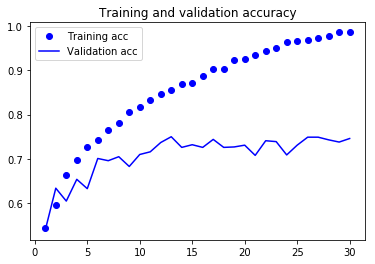

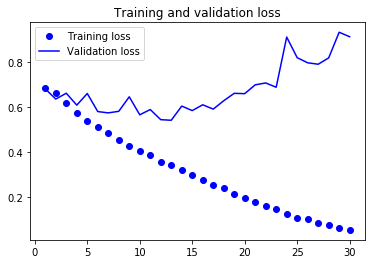

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

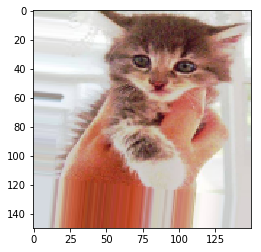

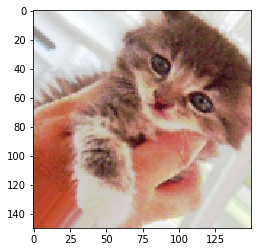

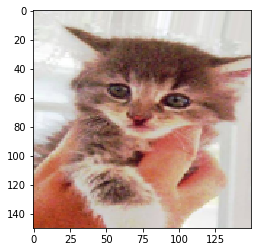

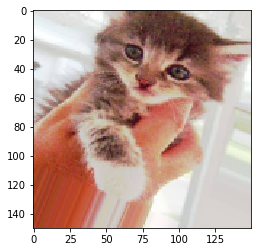

In [16]:
image = tf.keras.preprocessing.image 

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 5 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/100


  1/100 [..............................] - ETA: 6:50 - loss: 0.7009 - acc: 0.3438

  2/100 [..............................] - ETA: 5:12 - loss: 0.6851 - acc: 0.4844

  3/100 [..............................] - ETA: 4:32 - loss: 0.6877 - acc: 0.5208

  4/100 [>.............................] - ETA: 4:08 - loss: 0.6872 - acc: 0.5234

  5/100 [>.............................] - ETA: 3:53 - loss: 0.6886 - acc: 0.5250

  6/100 [>.............................] - ETA: 3:39 - loss: 0.6943 - acc: 0.5156

  7/100 [=>............................] - ETA: 3:28 - loss: 0.6941 - acc: 0.5134

  8/100 [=>............................] - ETA: 3:21 - loss: 0.6948 - acc: 0.5078

  9/100 [=>............................] - ETA: 3:14 - loss: 0.6967 - acc: 0.4792

 10/100 [==>...........................] - ETA: 3:08 - loss: 0.6950 - acc: 0.4906

 11/100 [==>...........................] - ETA: 3:03 - loss: 0.6970 - acc: 0.4830

 12/100 [==>...........................] - ETA: 2:59 - loss: 0.6965 - acc: 0.4844

 13/100 [==>...........................] - ETA: 2:55 - loss: 0.7001 - acc: 0.4712

 14/100 [===>..........................] - ETA: 2:51 - loss: 0.6995 - acc: 0.4732

 15/100 [===>..........................] - ETA: 2:48 - loss: 0.6987 - acc: 0.4771

 16/100 [===>..........................] - ETA: 2:44 - loss: 0.6980 - acc: 0.4844

 17/100 [====>.........................] - ETA: 2:41 - loss: 0.6979 - acc: 0.4816

 18/100 [====>.........................] - ETA: 2:38 - loss: 0.6978 - acc: 0.4705

 19/100 [====>.........................] - ETA: 2:36 - loss: 0.6970 - acc: 0.4770

 20/100 [=====>........................] - ETA: 2:33 - loss: 0.6963 - acc: 0.4875

 21/100 [=====>........................] - ETA: 2:30 - loss: 0.6981 - acc: 0.4836

 22/100 [=====>........................] - ETA: 2:32 - loss: 0.6975 - acc: 0.4915

 23/100 [=====>........................] - ETA: 2:29 - loss: 0.6959 - acc: 0.4986

 24/100 [======>.......................] - ETA: 2:27 - loss: 0.6978 - acc: 0.4948

 25/100 [======>.......................] - ETA: 2:24 - loss: 0.6976 - acc: 0.4975

 26/100 [======>.......................] - ETA: 2:21 - loss: 0.6975 - acc: 0.4976

 27/100 [=======>......................] - ETA: 2:20 - loss: 0.6979 - acc: 0.4965

 28/100 [=======>......................] - ETA: 2:18 - loss: 0.6977 - acc: 0.4978

 29/100 [=======>......................] - ETA: 2:16 - loss: 0.6975 - acc: 0.4957

 30/100 [========>.....................] - ETA: 2:15 - loss: 0.6974 - acc: 0.4990

 31/100 [========>.....................] - ETA: 2:13 - loss: 0.6977 - acc: 0.4940

 32/100 [========>.....................] - ETA: 2:11 - loss: 0.6975 - acc: 0.4971

 33/100 [========>.....................] - ETA: 2:10 - loss: 0.6975 - acc: 0.4962

 34/100 [=========>....................] - ETA: 2:08 - loss: 0.6972 - acc: 0.4972

 35/100 [=========>....................] - ETA: 2:07 - loss: 0.6971 - acc: 0.4982

 36/100 [=========>....................] - ETA: 2:04 - loss: 0.6967 - acc: 0.5069

 37/100 [==========>...................] - ETA: 2:03 - loss: 0.6967 - acc: 0.5076

 38/100 [==========>...................] - ETA: 2:01 - loss: 0.6965 - acc: 0.5082

 39/100 [==========>...................] - ETA: 1:59 - loss: 0.6968 - acc: 0.5056

 40/100 [===========>..................] - ETA: 1:58 - loss: 0.6964 - acc: 0.5094

 41/100 [===========>..................] - ETA: 1:56 - loss: 0.6962 - acc: 0.5099

 42/100 [===========>..................] - ETA: 1:55 - loss: 0.6957 - acc: 0.5126

 43/100 [===========>..................] - ETA: 1:53 - loss: 0.6955 - acc: 0.5124

 44/100 [============>.................] - ETA: 1:52 - loss: 0.6955 - acc: 0.5121

 45/100 [============>.................] - ETA: 1:50 - loss: 0.6950 - acc: 0.5146

 46/100 [============>.................] - ETA: 1:48 - loss: 0.6949 - acc: 0.5143

 47/100 [=============>................] - ETA: 1:46 - loss: 0.6951 - acc: 0.5126

 48/100 [=============>................] - ETA: 1:45 - loss: 0.6952 - acc: 0.5124

 49/100 [=============>................] - ETA: 1:43 - loss: 0.6954 - acc: 0.5102

 50/100 [==============>...............] - ETA: 1:41 - loss: 0.6953 - acc: 0.5125

 51/100 [==============>...............] - ETA: 1:39 - loss: 0.6955 - acc: 0.5104

 52/100 [==============>...............] - ETA: 1:37 - loss: 0.6954 - acc: 0.5090

 53/100 [==============>...............] - ETA: 1:35 - loss: 0.6955 - acc: 0.5059

 54/100 [===============>..............] - ETA: 1:33 - loss: 0.6954 - acc: 0.5087

 55/100 [===============>..............] - ETA: 1:31 - loss: 0.6954 - acc: 0.5080

 56/100 [===============>..............] - ETA: 1:28 - loss: 0.6953 - acc: 0.5078

 57/100 [================>.............] - ETA: 1:26 - loss: 0.6952 - acc: 0.5088

 58/100 [================>.............] - ETA: 1:24 - loss: 0.6953 - acc: 0.5086

 59/100 [================>.............] - ETA: 1:22 - loss: 0.6952 - acc: 0.5106

 60/100 [=================>............] - ETA: 1:20 - loss: 0.6951 - acc: 0.5115

 61/100 [=================>............] - ETA: 1:18 - loss: 0.6950 - acc: 0.5102

 62/100 [=================>............] - ETA: 1:16 - loss: 0.6949 - acc: 0.5116

 63/100 [=================>............] - ETA: 1:14 - loss: 0.6949 - acc: 0.5134

 64/100 [==================>...........] - ETA: 1:12 - loss: 0.6947 - acc: 0.5161

 65/100 [==================>...........] - ETA: 1:10 - loss: 0.6945 - acc: 0.5173

 66/100 [==================>...........] - ETA: 1:08 - loss: 0.6945 - acc: 0.5170

 67/100 [===================>..........] - ETA: 1:06 - loss: 0.6944 - acc: 0.5177

 68/100 [===================>..........] - ETA: 1:04 - loss: 0.6937 - acc: 0.5198

 69/100 [===================>..........] - ETA: 1:02 - loss: 0.6942 - acc: 0.5186

 70/100 [====================>.........] - ETA: 1:00 - loss: 0.6945 - acc: 0.5170

 71/100 [====================>.........] - ETA: 58s - loss: 0.6944 - acc: 0.5180 

 72/100 [====================>.........] - ETA: 56s - loss: 0.6943 - acc: 0.5187

 73/100 [====================>.........] - ETA: 54s - loss: 0.6940 - acc: 0.5205

 74/100 [=====================>........] - ETA: 52s - loss: 0.6938 - acc: 0.5215

 75/100 [=====================>........] - ETA: 50s - loss: 0.6940 - acc: 0.5200

 76/100 [=====================>........] - ETA: 48s - loss: 0.6939 - acc: 0.5201

 77/100 [======================>.......] - ETA: 46s - loss: 0.6936 - acc: 0.5211

 78/100 [======================>.......] - ETA: 44s - loss: 0.6937 - acc: 0.5204

 79/100 [======================>.......] - ETA: 41s - loss: 0.6936 - acc: 0.5206

 80/100 [=======================>......] - ETA: 39s - loss: 0.6935 - acc: 0.5223

 81/100 [=======================>......] - ETA: 37s - loss: 0.6935 - acc: 0.5228

 82/100 [=======================>......] - ETA: 35s - loss: 0.6933 - acc: 0.5232

 83/100 [=======================>......] - ETA: 33s - loss: 0.6932 - acc: 0.5233

 84/100 [========================>.....] - ETA: 31s - loss: 0.6931 - acc: 0.5234

 85/100 [========================>.....] - ETA: 29s - loss: 0.6932 - acc: 0.5232

 86/100 [========================>.....] - ETA: 27s - loss: 0.6931 - acc: 0.5229

 87/100 [=========================>....] - ETA: 25s - loss: 0.6930 - acc: 0.5226

 88/100 [=========================>....] - ETA: 23s - loss: 0.6929 - acc: 0.5234

 89/100 [=========================>....] - ETA: 21s - loss: 0.6928 - acc: 0.5225

 90/100 [==========================>...] - ETA: 19s - loss: 0.6925 - acc: 0.5250

 91/100 [==========================>...] - ETA: 17s - loss: 0.6928 - acc: 0.5244

 92/100 [==========================>...] - ETA: 15s - loss: 0.6928 - acc: 0.5251

 93/100 [==========================>...] - ETA: 13s - loss: 0.6929 - acc: 0.5245

 94/100 [===========================>..] - ETA: 11s - loss: 0.6928 - acc: 0.5246

 95/100 [===========================>..] - ETA: 9s - loss: 0.6926 - acc: 0.5253 

 96/100 [===========================>..] - ETA: 7s - loss: 0.6927 - acc: 0.5260

 97/100 [============================>.] - ETA: 5s - loss: 0.6929 - acc: 0.5248

 98/100 [============================>.] - ETA: 3s - loss: 0.6927 - acc: 0.5258

 99/100 [============================>.] - ETA: 1s - loss: 0.6926 - acc: 0.5268

100/100 [==============================] - 222s 2s/step - loss: 0.6923 - acc: 0.5281 - val_loss: 0.6799 - val_acc: 0.5793


Epoch 2/100


  1/100 [..............................] - ETA: 2:56 - loss: 0.6816 - acc: 0.5000

  2/100 [..............................] - ETA: 2:54 - loss: 0.6763 - acc: 0.5469

  3/100 [..............................] - ETA: 2:52 - loss: 0.6843 - acc: 0.5104

  4/100 [>.............................] - ETA: 2:48 - loss: 0.6828 - acc: 0.5234

  5/100 [>.............................] - ETA: 2:47 - loss: 0.6820 - acc: 0.5250

  6/100 [>.............................] - ETA: 2:46 - loss: 0.6770 - acc: 0.5312

  7/100 [=>............................] - ETA: 2:44 - loss: 0.6740 - acc: 0.5312

  8/100 [=>............................] - ETA: 2:42 - loss: 0.6800 - acc: 0.5273

  9/100 [=>............................] - ETA: 2:40 - loss: 0.6805 - acc: 0.5312

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.6813 - acc: 0.5344

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.6826 - acc: 0.5312

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.6814 - acc: 0.5286

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.6831 - acc: 0.5240

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.6787 - acc: 0.5402

 15/100 [===>..........................] - ETA: 2:29 - loss: 0.6872 - acc: 0.5354

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.6875 - acc: 0.5293

 17/100 [====>.........................] - ETA: 2:25 - loss: 0.6869 - acc: 0.5331

 18/100 [====>.........................] - ETA: 2:23 - loss: 0.6867 - acc: 0.5365

 19/100 [====>.........................] - ETA: 2:21 - loss: 0.6882 - acc: 0.5312

 20/100 [=====>........................] - ETA: 2:19 - loss: 0.6865 - acc: 0.5437

 21/100 [=====>........................] - ETA: 2:17 - loss: 0.6856 - acc: 0.5476

 22/100 [=====>........................] - ETA: 2:15 - loss: 0.6853 - acc: 0.5526

 23/100 [=====>........................] - ETA: 2:13 - loss: 0.6846 - acc: 0.5530

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.6828 - acc: 0.5612

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.6826 - acc: 0.5613

 26/100 [======>.......................] - ETA: 2:07 - loss: 0.6808 - acc: 0.5625

 27/100 [=======>......................] - ETA: 2:06 - loss: 0.6808 - acc: 0.5613

 28/100 [=======>......................] - ETA: 2:05 - loss: 0.6808 - acc: 0.5603

 29/100 [=======>......................] - ETA: 2:03 - loss: 0.6797 - acc: 0.5657

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.6804 - acc: 0.5635

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.6818 - acc: 0.5585

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.6813 - acc: 0.5615

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.6815 - acc: 0.5587

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.6819 - acc: 0.5579

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.6823 - acc: 0.5536

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.6818 - acc: 0.5564

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.6811 - acc: 0.5608

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.6820 - acc: 0.5584

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.6822 - acc: 0.5561

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.6815 - acc: 0.5555

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.6815 - acc: 0.5556

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.6813 - acc: 0.5580

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.6803 - acc: 0.5610

 44/100 [============>.................] - ETA: 1:37 - loss: 0.6824 - acc: 0.5582

 45/100 [============>.................] - ETA: 1:36 - loss: 0.6825 - acc: 0.5611

 46/100 [============>.................] - ETA: 1:34 - loss: 0.6820 - acc: 0.5632

 47/100 [=============>................] - ETA: 1:32 - loss: 0.6819 - acc: 0.5638

 48/100 [=============>................] - ETA: 1:30 - loss: 0.6808 - acc: 0.5658

 49/100 [=============>................] - ETA: 1:29 - loss: 0.6813 - acc: 0.5644

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.6808 - acc: 0.5644

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.6815 - acc: 0.5619

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.6820 - acc: 0.5607

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.6812 - acc: 0.5643

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.6798 - acc: 0.5648

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.6806 - acc: 0.5631

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.6808 - acc: 0.5619

 57/100 [================>.............] - ETA: 1:15 - loss: 0.6803 - acc: 0.5625

 58/100 [================>.............] - ETA: 1:13 - loss: 0.6797 - acc: 0.5630

 59/100 [================>.............] - ETA: 1:11 - loss: 0.6794 - acc: 0.5636

 60/100 [=================>............] - ETA: 1:10 - loss: 0.6802 - acc: 0.5604

 61/100 [=================>............] - ETA: 1:08 - loss: 0.6797 - acc: 0.5625

 62/100 [=================>............] - ETA: 1:06 - loss: 0.6795 - acc: 0.5630

 63/100 [=================>............] - ETA: 1:04 - loss: 0.6796 - acc: 0.5640

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.6795 - acc: 0.5645

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.6794 - acc: 0.5639

 66/100 [==================>...........] - ETA: 59s - loss: 0.6791 - acc: 0.5649 

 67/100 [===================>..........] - ETA: 57s - loss: 0.6791 - acc: 0.5639

 68/100 [===================>..........] - ETA: 55s - loss: 0.6798 - acc: 0.5620

 69/100 [===================>..........] - ETA: 54s - loss: 0.6798 - acc: 0.5634

 70/100 [====================>.........] - ETA: 52s - loss: 0.6795 - acc: 0.5652

 71/100 [====================>.........] - ETA: 50s - loss: 0.6788 - acc: 0.5682

 72/100 [====================>.........] - ETA: 48s - loss: 0.6783 - acc: 0.5699

 73/100 [====================>.........] - ETA: 47s - loss: 0.6780 - acc: 0.5702

 74/100 [=====================>........] - ETA: 45s - loss: 0.6787 - acc: 0.5693

 75/100 [=====================>........] - ETA: 43s - loss: 0.6786 - acc: 0.5700

 76/100 [=====================>........] - ETA: 41s - loss: 0.6791 - acc: 0.5691

 77/100 [======================>.......] - ETA: 39s - loss: 0.6793 - acc: 0.5694

 78/100 [======================>.......] - ETA: 38s - loss: 0.6791 - acc: 0.5693

 79/100 [======================>.......] - ETA: 36s - loss: 0.6781 - acc: 0.5704

 80/100 [=======================>......] - ETA: 34s - loss: 0.6780 - acc: 0.5687

 81/100 [=======================>......] - ETA: 32s - loss: 0.6778 - acc: 0.5687

 82/100 [=======================>......] - ETA: 31s - loss: 0.6778 - acc: 0.5697

 83/100 [=======================>......] - ETA: 29s - loss: 0.6779 - acc: 0.5700

 84/100 [========================>.....] - ETA: 27s - loss: 0.6778 - acc: 0.5696

 85/100 [========================>.....] - ETA: 25s - loss: 0.6776 - acc: 0.5702

 86/100 [========================>.....] - ETA: 24s - loss: 0.6772 - acc: 0.5716

 87/100 [=========================>....] - ETA: 22s - loss: 0.6771 - acc: 0.5715

 88/100 [=========================>....] - ETA: 20s - loss: 0.6772 - acc: 0.5703

 89/100 [=========================>....] - ETA: 19s - loss: 0.6773 - acc: 0.5695

 90/100 [==========================>...] - ETA: 17s - loss: 0.6769 - acc: 0.5691

 91/100 [==========================>...] - ETA: 15s - loss: 0.6768 - acc: 0.5680

 92/100 [==========================>...] - ETA: 13s - loss: 0.6762 - acc: 0.5683

 93/100 [==========================>...] - ETA: 12s - loss: 0.6763 - acc: 0.5672

 94/100 [===========================>..] - ETA: 10s - loss: 0.6758 - acc: 0.5682

 95/100 [===========================>..] - ETA: 8s - loss: 0.6763 - acc: 0.5674 

 96/100 [===========================>..] - ETA: 6s - loss: 0.6762 - acc: 0.5680

 97/100 [============================>.] - ETA: 5s - loss: 0.6760 - acc: 0.5686

 98/100 [============================>.] - ETA: 3s - loss: 0.6758 - acc: 0.5702

 99/100 [============================>.] - ETA: 1s - loss: 0.6760 - acc: 0.5698

100/100 [==============================] - 202s 2s/step - loss: 0.6761 - acc: 0.5700 - val_loss: 0.6738 - val_acc: 0.5622


Epoch 3/100


  1/100 [..............................] - ETA: 2:54 - loss: 0.6701 - acc: 0.6250

  2/100 [..............................] - ETA: 2:53 - loss: 0.6871 - acc: 0.5156

  3/100 [..............................] - ETA: 2:49 - loss: 0.6865 - acc: 0.5208

  4/100 [>.............................] - ETA: 2:47 - loss: 0.6805 - acc: 0.5469

  5/100 [>.............................] - ETA: 2:45 - loss: 0.6715 - acc: 0.5625

  6/100 [>.............................] - ETA: 2:43 - loss: 0.6778 - acc: 0.5417

  7/100 [=>............................] - ETA: 2:42 - loss: 0.6744 - acc: 0.5536

  8/100 [=>............................] - ETA: 2:40 - loss: 0.6706 - acc: 0.5742

  9/100 [=>............................] - ETA: 2:39 - loss: 0.6757 - acc: 0.5556

 10/100 [==>...........................] - ETA: 2:37 - loss: 0.6800 - acc: 0.5500

 11/100 [==>...........................] - ETA: 2:35 - loss: 0.6787 - acc: 0.5568

 12/100 [==>...........................] - ETA: 2:33 - loss: 0.6774 - acc: 0.5625

 13/100 [==>...........................] - ETA: 2:31 - loss: 0.6740 - acc: 0.5697

 14/100 [===>..........................] - ETA: 2:30 - loss: 0.6748 - acc: 0.5714

 15/100 [===>..........................] - ETA: 2:28 - loss: 0.6733 - acc: 0.5750

 16/100 [===>..........................] - ETA: 2:26 - loss: 0.6752 - acc: 0.5742

 17/100 [====>.........................] - ETA: 2:24 - loss: 0.6752 - acc: 0.5717

 18/100 [====>.........................] - ETA: 2:23 - loss: 0.6750 - acc: 0.5694

 19/100 [====>.........................] - ETA: 2:21 - loss: 0.6737 - acc: 0.5707

 20/100 [=====>........................] - ETA: 2:19 - loss: 0.6713 - acc: 0.5750

 21/100 [=====>........................] - ETA: 2:18 - loss: 0.6715 - acc: 0.5744

 22/100 [=====>........................] - ETA: 2:16 - loss: 0.6716 - acc: 0.5739

 23/100 [=====>........................] - ETA: 2:14 - loss: 0.6725 - acc: 0.5707

 24/100 [======>.......................] - ETA: 2:12 - loss: 0.6731 - acc: 0.5755

 25/100 [======>.......................] - ETA: 2:11 - loss: 0.6729 - acc: 0.5737

 26/100 [======>.......................] - ETA: 2:09 - loss: 0.6724 - acc: 0.5733

 27/100 [=======>......................] - ETA: 2:07 - loss: 0.6716 - acc: 0.5729

 28/100 [=======>......................] - ETA: 2:05 - loss: 0.6712 - acc: 0.5748

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.6678 - acc: 0.5776

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.6681 - acc: 0.5781

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.6680 - acc: 0.5776

 32/100 [========>.....................] - ETA: 1:58 - loss: 0.6683 - acc: 0.5742

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.6680 - acc: 0.5758

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.6679 - acc: 0.5772

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.6676 - acc: 0.5759

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.6687 - acc: 0.5747

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.6700 - acc: 0.5718

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.6708 - acc: 0.5691

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.6705 - acc: 0.5689

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.6695 - acc: 0.5711

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.6691 - acc: 0.5716

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.6688 - acc: 0.5744

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.6692 - acc: 0.5727

 44/100 [============>.................] - ETA: 1:36 - loss: 0.6683 - acc: 0.5746

 45/100 [============>.................] - ETA: 1:34 - loss: 0.6703 - acc: 0.5715

 46/100 [============>.................] - ETA: 1:32 - loss: 0.6700 - acc: 0.5713

 47/100 [=============>................] - ETA: 1:31 - loss: 0.6697 - acc: 0.5725

 48/100 [=============>................] - ETA: 1:29 - loss: 0.6689 - acc: 0.5742

 49/100 [=============>................] - ETA: 1:27 - loss: 0.6681 - acc: 0.5772

 50/100 [==============>...............] - ETA: 1:25 - loss: 0.6680 - acc: 0.5775

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.6673 - acc: 0.5772

 52/100 [==============>...............] - ETA: 1:22 - loss: 0.6666 - acc: 0.5769

 53/100 [==============>...............] - ETA: 1:20 - loss: 0.6652 - acc: 0.5784

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.6661 - acc: 0.5781

 55/100 [===============>..............] - ETA: 1:17 - loss: 0.6657 - acc: 0.5790

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.6644 - acc: 0.5809

 57/100 [================>.............] - ETA: 1:14 - loss: 0.6639 - acc: 0.5817

 58/100 [================>.............] - ETA: 1:12 - loss: 0.6636 - acc: 0.5835

 59/100 [================>.............] - ETA: 1:11 - loss: 0.6631 - acc: 0.5847

 60/100 [=================>............] - ETA: 1:09 - loss: 0.6628 - acc: 0.5849

 61/100 [=================>............] - ETA: 1:07 - loss: 0.6630 - acc: 0.5850

 62/100 [=================>............] - ETA: 1:06 - loss: 0.6626 - acc: 0.5862

 63/100 [=================>............] - ETA: 1:04 - loss: 0.6637 - acc: 0.5853

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.6644 - acc: 0.5840

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.6641 - acc: 0.5856

 66/100 [==================>...........] - ETA: 59s - loss: 0.6648 - acc: 0.5838 

 67/100 [===================>..........] - ETA: 57s - loss: 0.6642 - acc: 0.5844

 68/100 [===================>..........] - ETA: 55s - loss: 0.6638 - acc: 0.5846

 69/100 [===================>..........] - ETA: 53s - loss: 0.6638 - acc: 0.5833

 70/100 [====================>.........] - ETA: 52s - loss: 0.6636 - acc: 0.5848

 71/100 [====================>.........] - ETA: 50s - loss: 0.6629 - acc: 0.5854

 72/100 [====================>.........] - ETA: 48s - loss: 0.6637 - acc: 0.5842

 73/100 [====================>.........] - ETA: 46s - loss: 0.6630 - acc: 0.5856

 74/100 [=====================>........] - ETA: 45s - loss: 0.6625 - acc: 0.5874

 75/100 [=====================>........] - ETA: 43s - loss: 0.6630 - acc: 0.5867

 76/100 [=====================>........] - ETA: 41s - loss: 0.6631 - acc: 0.5855

 77/100 [======================>.......] - ETA: 40s - loss: 0.6632 - acc: 0.5856

 78/100 [======================>.......] - ETA: 38s - loss: 0.6629 - acc: 0.5865

 79/100 [======================>.......] - ETA: 36s - loss: 0.6626 - acc: 0.5866

 80/100 [=======================>......] - ETA: 34s - loss: 0.6630 - acc: 0.5852

 81/100 [=======================>......] - ETA: 33s - loss: 0.6637 - acc: 0.5845

 82/100 [=======================>......] - ETA: 31s - loss: 0.6639 - acc: 0.5850

 83/100 [=======================>......] - ETA: 29s - loss: 0.6635 - acc: 0.5858

 84/100 [========================>.....] - ETA: 27s - loss: 0.6646 - acc: 0.5844

 85/100 [========================>.....] - ETA: 26s - loss: 0.6636 - acc: 0.5860

 86/100 [========================>.....] - ETA: 24s - loss: 0.6631 - acc: 0.5872

 87/100 [=========================>....] - ETA: 22s - loss: 0.6634 - acc: 0.5866

 88/100 [=========================>....] - ETA: 20s - loss: 0.6631 - acc: 0.5870

 89/100 [=========================>....] - ETA: 19s - loss: 0.6637 - acc: 0.5864

 90/100 [==========================>...] - ETA: 17s - loss: 0.6635 - acc: 0.5868

 91/100 [==========================>...] - ETA: 15s - loss: 0.6630 - acc: 0.5883

 92/100 [==========================>...] - ETA: 13s - loss: 0.6638 - acc: 0.5873

 93/100 [==========================>...] - ETA: 12s - loss: 0.6629 - acc: 0.5890

 94/100 [===========================>..] - ETA: 10s - loss: 0.6624 - acc: 0.5898

 95/100 [===========================>..] - ETA: 8s - loss: 0.6619 - acc: 0.5908 

 96/100 [===========================>..] - ETA: 6s - loss: 0.6615 - acc: 0.5915

 97/100 [============================>.] - ETA: 5s - loss: 0.6604 - acc: 0.5928

 98/100 [============================>.] - ETA: 3s - loss: 0.6619 - acc: 0.5925

 99/100 [============================>.] - ETA: 1s - loss: 0.6614 - acc: 0.5941

100/100 [==============================] - 202s 2s/step - loss: 0.6608 - acc: 0.5944 - val_loss: 0.6792 - val_acc: 0.5558


Epoch 4/100


  1/100 [..............................] - ETA: 2:55 - loss: 0.6313 - acc: 0.7500

  2/100 [..............................] - ETA: 2:53 - loss: 0.6443 - acc: 0.6719

  3/100 [..............................] - ETA: 2:51 - loss: 0.6677 - acc: 0.5938

  4/100 [>.............................] - ETA: 2:49 - loss: 0.6549 - acc: 0.6094

  5/100 [>.............................] - ETA: 2:45 - loss: 0.6495 - acc: 0.6062

  6/100 [>.............................] - ETA: 2:42 - loss: 0.6578 - acc: 0.5833

  7/100 [=>............................] - ETA: 2:40 - loss: 0.6555 - acc: 0.5804

  8/100 [=>............................] - ETA: 2:38 - loss: 0.6538 - acc: 0.5898

  9/100 [=>............................] - ETA: 2:36 - loss: 0.6543 - acc: 0.5903

 10/100 [==>...........................] - ETA: 2:34 - loss: 0.6529 - acc: 0.5906

 11/100 [==>...........................] - ETA: 2:32 - loss: 0.6617 - acc: 0.5767

 12/100 [==>...........................] - ETA: 2:30 - loss: 0.6625 - acc: 0.5703

 13/100 [==>...........................] - ETA: 2:28 - loss: 0.6588 - acc: 0.5841

 14/100 [===>..........................] - ETA: 2:26 - loss: 0.6606 - acc: 0.5848

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.6607 - acc: 0.5917

 16/100 [===>..........................] - ETA: 2:25 - loss: 0.6574 - acc: 0.5918

 17/100 [====>.........................] - ETA: 2:19 - loss: 0.6590 - acc: 0.5901

 18/100 [====>.........................] - ETA: 2:19 - loss: 0.6547 - acc: 0.5885

 19/100 [====>.........................] - ETA: 2:18 - loss: 0.6593 - acc: 0.5822

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.6580 - acc: 0.5828

 21/100 [=====>........................] - ETA: 2:16 - loss: 0.6576 - acc: 0.5893

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.6553 - acc: 0.5952

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.6556 - acc: 0.5910

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.6537 - acc: 0.5951

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.6569 - acc: 0.5900

 26/100 [======>.......................] - ETA: 2:08 - loss: 0.6535 - acc: 0.5998

 27/100 [=======>......................] - ETA: 2:06 - loss: 0.6561 - acc: 0.5949

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.6541 - acc: 0.5971

 29/100 [=======>......................] - ETA: 2:03 - loss: 0.6542 - acc: 0.5959

 30/100 [========>.....................] - ETA: 2:01 - loss: 0.6547 - acc: 0.5969

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.6562 - acc: 0.5948

 32/100 [========>.....................] - ETA: 1:58 - loss: 0.6542 - acc: 0.5986

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.6519 - acc: 0.6004

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.6503 - acc: 0.6029

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.6499 - acc: 0.6027

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.6509 - acc: 0.6016

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.6500 - acc: 0.6047

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.6489 - acc: 0.6061

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.6492 - acc: 0.6058

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.6502 - acc: 0.6062

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.6502 - acc: 0.6090

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.6521 - acc: 0.6086

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.6525 - acc: 0.6076

 44/100 [============>.................] - ETA: 1:37 - loss: 0.6519 - acc: 0.6101

 45/100 [============>.................] - ETA: 1:36 - loss: 0.6526 - acc: 0.6111

 46/100 [============>.................] - ETA: 1:34 - loss: 0.6532 - acc: 0.6094

 47/100 [=============>................] - ETA: 1:32 - loss: 0.6531 - acc: 0.6090

 48/100 [=============>................] - ETA: 1:30 - loss: 0.6538 - acc: 0.6081

 49/100 [=============>................] - ETA: 1:29 - loss: 0.6538 - acc: 0.6084

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.6536 - acc: 0.6088

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.6531 - acc: 0.6091

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.6538 - acc: 0.6076

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.6527 - acc: 0.6085

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.6524 - acc: 0.6082

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.6511 - acc: 0.6102

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.6510 - acc: 0.6088

 57/100 [================>.............] - ETA: 1:15 - loss: 0.6523 - acc: 0.6075

 58/100 [================>.............] - ETA: 1:13 - loss: 0.6525 - acc: 0.6056

 59/100 [================>.............] - ETA: 1:11 - loss: 0.6524 - acc: 0.6065

 60/100 [=================>............] - ETA: 1:10 - loss: 0.6524 - acc: 0.6073

 61/100 [=================>............] - ETA: 1:08 - loss: 0.6515 - acc: 0.6091

 62/100 [=================>............] - ETA: 1:06 - loss: 0.6513 - acc: 0.6079

 63/100 [=================>............] - ETA: 1:04 - loss: 0.6509 - acc: 0.6081

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.6504 - acc: 0.6094

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.6514 - acc: 0.6087

 66/100 [==================>...........] - ETA: 59s - loss: 0.6517 - acc: 0.6089 

 67/100 [===================>..........] - ETA: 57s - loss: 0.6508 - acc: 0.6105

 68/100 [===================>..........] - ETA: 56s - loss: 0.6515 - acc: 0.6098

 69/100 [===================>..........] - ETA: 54s - loss: 0.6525 - acc: 0.6082

 70/100 [====================>.........] - ETA: 52s - loss: 0.6517 - acc: 0.6098

 71/100 [====================>.........] - ETA: 50s - loss: 0.6509 - acc: 0.6122

 72/100 [====================>.........] - ETA: 48s - loss: 0.6501 - acc: 0.6124

 73/100 [====================>.........] - ETA: 47s - loss: 0.6501 - acc: 0.6126

 74/100 [=====================>........] - ETA: 45s - loss: 0.6499 - acc: 0.6128

 75/100 [=====================>........] - ETA: 43s - loss: 0.6496 - acc: 0.6138

 76/100 [=====================>........] - ETA: 41s - loss: 0.6490 - acc: 0.6139

 77/100 [======================>.......] - ETA: 40s - loss: 0.6495 - acc: 0.6140

 78/100 [======================>.......] - ETA: 38s - loss: 0.6485 - acc: 0.6154

 79/100 [======================>.......] - ETA: 36s - loss: 0.6480 - acc: 0.6163

 80/100 [=======================>......] - ETA: 34s - loss: 0.6490 - acc: 0.6141

 81/100 [=======================>......] - ETA: 33s - loss: 0.6480 - acc: 0.6150

 82/100 [=======================>......] - ETA: 31s - loss: 0.6471 - acc: 0.6147

 83/100 [=======================>......] - ETA: 29s - loss: 0.6469 - acc: 0.6156

 84/100 [========================>.....] - ETA: 28s - loss: 0.6471 - acc: 0.6161

 85/100 [========================>.....] - ETA: 26s - loss: 0.6466 - acc: 0.6173

 86/100 [========================>.....] - ETA: 24s - loss: 0.6468 - acc: 0.6166

 87/100 [=========================>....] - ETA: 22s - loss: 0.6476 - acc: 0.6153

 88/100 [=========================>....] - ETA: 21s - loss: 0.6467 - acc: 0.6161

 89/100 [=========================>....] - ETA: 19s - loss: 0.6462 - acc: 0.6159

 90/100 [==========================>...] - ETA: 17s - loss: 0.6463 - acc: 0.6153

 91/100 [==========================>...] - ETA: 15s - loss: 0.6472 - acc: 0.6140

 92/100 [==========================>...] - ETA: 13s - loss: 0.6470 - acc: 0.6155

 93/100 [==========================>...] - ETA: 12s - loss: 0.6464 - acc: 0.6163

 94/100 [===========================>..] - ETA: 10s - loss: 0.6457 - acc: 0.6180

 95/100 [===========================>..] - ETA: 8s - loss: 0.6454 - acc: 0.6181 

 96/100 [===========================>..] - ETA: 6s - loss: 0.6459 - acc: 0.6172

 97/100 [============================>.] - ETA: 5s - loss: 0.6451 - acc: 0.6179

 98/100 [============================>.] - ETA: 3s - loss: 0.6444 - acc: 0.6196

 99/100 [============================>.] - ETA: 1s - loss: 0.6440 - acc: 0.6196

100/100 [==============================] - 203s 2s/step - loss: 0.6436 - acc: 0.6212 - val_loss: 0.6190 - val_acc: 0.6529


Epoch 5/100


  1/100 [..............................] - ETA: 3:01 - loss: 0.6715 - acc: 0.5625

  2/100 [..............................] - ETA: 2:55 - loss: 0.6633 - acc: 0.6094

  3/100 [..............................] - ETA: 2:54 - loss: 0.6551 - acc: 0.6250

  4/100 [>.............................] - ETA: 2:51 - loss: 0.6857 - acc: 0.5781

  5/100 [>.............................] - ETA: 2:48 - loss: 0.6801 - acc: 0.5750

  6/100 [>.............................] - ETA: 2:46 - loss: 0.6677 - acc: 0.5990

  7/100 [=>............................] - ETA: 2:44 - loss: 0.6647 - acc: 0.6027

  8/100 [=>............................] - ETA: 2:43 - loss: 0.6649 - acc: 0.5938

  9/100 [=>............................] - ETA: 2:40 - loss: 0.6672 - acc: 0.5833

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.6638 - acc: 0.5844

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.6576 - acc: 0.5909

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.6495 - acc: 0.6120

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.6487 - acc: 0.6130

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.6463 - acc: 0.6116

 15/100 [===>..........................] - ETA: 2:29 - loss: 0.6445 - acc: 0.6146

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.6424 - acc: 0.6250

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.6433 - acc: 0.6176

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.6428 - acc: 0.6128

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.6410 - acc: 0.6184

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.6387 - acc: 0.6219

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.6384 - acc: 0.6265

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.6372 - acc: 0.6293

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.6391 - acc: 0.6264

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.6363 - acc: 0.6302

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.6362 - acc: 0.6288

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.6334 - acc: 0.6334

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.6356 - acc: 0.6308

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.6349 - acc: 0.6295

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.6361 - acc: 0.6293

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.6368 - acc: 0.6271

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.6376 - acc: 0.6270

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.6362 - acc: 0.6289

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.6370 - acc: 0.6259

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.6348 - acc: 0.6305

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.6370 - acc: 0.6268

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.6383 - acc: 0.6259

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.6397 - acc: 0.6258

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.6399 - acc: 0.6250

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.6408 - acc: 0.6250

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.6405 - acc: 0.6273

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.6394 - acc: 0.6280

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.6405 - acc: 0.6257

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.6411 - acc: 0.6250

 44/100 [============>.................] - ETA: 1:38 - loss: 0.6401 - acc: 0.6264

 45/100 [============>.................] - ETA: 1:36 - loss: 0.6393 - acc: 0.6285

 46/100 [============>.................] - ETA: 1:34 - loss: 0.6392 - acc: 0.6291

 47/100 [=============>................] - ETA: 1:33 - loss: 0.6384 - acc: 0.6316

 48/100 [=============>................] - ETA: 1:31 - loss: 0.6375 - acc: 0.6335

 49/100 [=============>................] - ETA: 1:29 - loss: 0.6406 - acc: 0.6288

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.6413 - acc: 0.6262

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.6412 - acc: 0.6275

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.6401 - acc: 0.6286

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.6392 - acc: 0.6291

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.6374 - acc: 0.6331

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.6359 - acc: 0.6341

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.6351 - acc: 0.6350

 57/100 [================>.............] - ETA: 1:15 - loss: 0.6334 - acc: 0.6382

 58/100 [================>.............] - ETA: 1:13 - loss: 0.6327 - acc: 0.6401

 59/100 [================>.............] - ETA: 1:12 - loss: 0.6332 - acc: 0.6398

 60/100 [=================>............] - ETA: 1:10 - loss: 0.6342 - acc: 0.6370

 61/100 [=================>............] - ETA: 1:08 - loss: 0.6337 - acc: 0.6368

 62/100 [=================>............] - ETA: 1:06 - loss: 0.6331 - acc: 0.6366

 63/100 [=================>............] - ETA: 1:04 - loss: 0.6319 - acc: 0.6394

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.6313 - acc: 0.6401

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.6315 - acc: 0.6394

 66/100 [==================>...........] - ETA: 59s - loss: 0.6308 - acc: 0.6387 

 67/100 [===================>..........] - ETA: 57s - loss: 0.6305 - acc: 0.6390

 68/100 [===================>..........] - ETA: 56s - loss: 0.6291 - acc: 0.6402

 69/100 [===================>..........] - ETA: 54s - loss: 0.6275 - acc: 0.6413

 70/100 [====================>.........] - ETA: 52s - loss: 0.6266 - acc: 0.6411

 71/100 [====================>.........] - ETA: 50s - loss: 0.6261 - acc: 0.6422

 72/100 [====================>.........] - ETA: 49s - loss: 0.6265 - acc: 0.6415

 73/100 [====================>.........] - ETA: 47s - loss: 0.6266 - acc: 0.6426

 74/100 [=====================>........] - ETA: 45s - loss: 0.6261 - acc: 0.6440

 75/100 [=====================>........] - ETA: 43s - loss: 0.6261 - acc: 0.6442

 76/100 [=====================>........] - ETA: 42s - loss: 0.6282 - acc: 0.6423

 77/100 [======================>.......] - ETA: 40s - loss: 0.6281 - acc: 0.6420

 78/100 [======================>.......] - ETA: 38s - loss: 0.6277 - acc: 0.6426

 79/100 [======================>.......] - ETA: 36s - loss: 0.6270 - acc: 0.6440

 80/100 [=======================>......] - ETA: 35s - loss: 0.6263 - acc: 0.6453

 81/100 [=======================>......] - ETA: 33s - loss: 0.6254 - acc: 0.6470

 82/100 [=======================>......] - ETA: 31s - loss: 0.6260 - acc: 0.6460

 83/100 [=======================>......] - ETA: 29s - loss: 0.6251 - acc: 0.6472

 84/100 [========================>.....] - ETA: 28s - loss: 0.6249 - acc: 0.6477

 85/100 [========================>.....] - ETA: 26s - loss: 0.6259 - acc: 0.6467

 86/100 [========================>.....] - ETA: 24s - loss: 0.6253 - acc: 0.6472

 87/100 [=========================>....] - ETA: 22s - loss: 0.6245 - acc: 0.6483

 88/100 [=========================>....] - ETA: 20s - loss: 0.6242 - acc: 0.6484

 89/100 [=========================>....] - ETA: 19s - loss: 0.6237 - acc: 0.6489

 90/100 [==========================>...] - ETA: 17s - loss: 0.6240 - acc: 0.6486

 91/100 [==========================>...] - ETA: 15s - loss: 0.6245 - acc: 0.6484

 92/100 [==========================>...] - ETA: 13s - loss: 0.6249 - acc: 0.6484

 93/100 [==========================>...] - ETA: 12s - loss: 0.6240 - acc: 0.6499

 94/100 [===========================>..] - ETA: 10s - loss: 0.6245 - acc: 0.6483

 95/100 [===========================>..] - ETA: 8s - loss: 0.6249 - acc: 0.6484 

 96/100 [===========================>..] - ETA: 6s - loss: 0.6253 - acc: 0.6471

 97/100 [============================>.] - ETA: 5s - loss: 0.6258 - acc: 0.6466

 98/100 [============================>.] - ETA: 3s - loss: 0.6257 - acc: 0.6460

 99/100 [============================>.] - ETA: 1s - loss: 0.6255 - acc: 0.6458

100/100 [==============================] - 203s 2s/step - loss: 0.6255 - acc: 0.6463 - val_loss: 0.6200 - val_acc: 0.6294


Epoch 6/100


  1/100 [..............................] - ETA: 2:49 - loss: 0.6474 - acc: 0.6875

  2/100 [..............................] - ETA: 2:46 - loss: 0.5935 - acc: 0.7656

  3/100 [..............................] - ETA: 2:44 - loss: 0.6172 - acc: 0.6771

  4/100 [>.............................] - ETA: 2:46 - loss: 0.6303 - acc: 0.6562

  5/100 [>.............................] - ETA: 2:47 - loss: 0.6053 - acc: 0.6875

  6/100 [>.............................] - ETA: 2:48 - loss: 0.6093 - acc: 0.6823

  7/100 [=>............................] - ETA: 2:49 - loss: 0.6277 - acc: 0.6607

  8/100 [=>............................] - ETA: 2:48 - loss: 0.6346 - acc: 0.6484

  9/100 [=>............................] - ETA: 2:47 - loss: 0.6341 - acc: 0.6458

 10/100 [==>...........................] - ETA: 2:44 - loss: 0.6308 - acc: 0.6469

 11/100 [==>...........................] - ETA: 2:42 - loss: 0.6304 - acc: 0.6449

 12/100 [==>...........................] - ETA: 2:39 - loss: 0.6296 - acc: 0.6354

 13/100 [==>...........................] - ETA: 2:37 - loss: 0.6276 - acc: 0.6418

 14/100 [===>..........................] - ETA: 2:35 - loss: 0.6299 - acc: 0.6429

 15/100 [===>..........................] - ETA: 2:33 - loss: 0.6268 - acc: 0.6458

 16/100 [===>..........................] - ETA: 2:31 - loss: 0.6244 - acc: 0.6523

 17/100 [====>.........................] - ETA: 2:29 - loss: 0.6249 - acc: 0.6526

 18/100 [====>.........................] - ETA: 2:27 - loss: 0.6255 - acc: 0.6510

 19/100 [====>.........................] - ETA: 2:25 - loss: 0.6241 - acc: 0.6546

 20/100 [=====>........................] - ETA: 2:23 - loss: 0.6250 - acc: 0.6531

 21/100 [=====>........................] - ETA: 2:21 - loss: 0.6211 - acc: 0.6577

 22/100 [=====>........................] - ETA: 2:19 - loss: 0.6243 - acc: 0.6534

 23/100 [=====>........................] - ETA: 2:17 - loss: 0.6242 - acc: 0.6535

 24/100 [======>.......................] - ETA: 2:16 - loss: 0.6297 - acc: 0.6484

 25/100 [======>.......................] - ETA: 2:14 - loss: 0.6343 - acc: 0.6388

 26/100 [======>.......................] - ETA: 2:12 - loss: 0.6329 - acc: 0.6394

 27/100 [=======>......................] - ETA: 2:10 - loss: 0.6328 - acc: 0.6400

 28/100 [=======>......................] - ETA: 2:08 - loss: 0.6318 - acc: 0.6406

 29/100 [=======>......................] - ETA: 2:06 - loss: 0.6279 - acc: 0.6466

 30/100 [========>.....................] - ETA: 2:04 - loss: 0.6263 - acc: 0.6458

 31/100 [========>.....................] - ETA: 2:03 - loss: 0.6253 - acc: 0.6472

 32/100 [========>.....................] - ETA: 2:01 - loss: 0.6265 - acc: 0.6455

 33/100 [========>.....................] - ETA: 1:59 - loss: 0.6256 - acc: 0.6458

 34/100 [=========>....................] - ETA: 1:57 - loss: 0.6253 - acc: 0.6471

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.6271 - acc: 0.6455

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.6249 - acc: 0.6476

 37/100 [==========>...................] - ETA: 1:52 - loss: 0.6235 - acc: 0.6478

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.6221 - acc: 0.6488

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.6221 - acc: 0.6498

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.6198 - acc: 0.6523

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.6204 - acc: 0.6524

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.6230 - acc: 0.6473

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.6233 - acc: 0.6468

 44/100 [============>.................] - ETA: 1:39 - loss: 0.6233 - acc: 0.6435

 45/100 [============>.................] - ETA: 1:37 - loss: 0.6220 - acc: 0.6438

 46/100 [============>.................] - ETA: 1:35 - loss: 0.6211 - acc: 0.6440

 47/100 [=============>................] - ETA: 1:33 - loss: 0.6213 - acc: 0.6436

 48/100 [=============>................] - ETA: 1:32 - loss: 0.6198 - acc: 0.6478

 49/100 [=============>................] - ETA: 1:30 - loss: 0.6184 - acc: 0.6499

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.6209 - acc: 0.6488

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.6209 - acc: 0.6501

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.6213 - acc: 0.6490

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.6214 - acc: 0.6480

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.6215 - acc: 0.6481

 55/100 [===============>..............] - ETA: 1:20 - loss: 0.6219 - acc: 0.6477

 56/100 [===============>..............] - ETA: 1:18 - loss: 0.6205 - acc: 0.6484

 57/100 [================>.............] - ETA: 1:16 - loss: 0.6188 - acc: 0.6513

 58/100 [================>.............] - ETA: 1:14 - loss: 0.6201 - acc: 0.6503

 59/100 [================>.............] - ETA: 1:12 - loss: 0.6213 - acc: 0.6488

 60/100 [=================>............] - ETA: 1:10 - loss: 0.6211 - acc: 0.6500

 61/100 [=================>............] - ETA: 1:08 - loss: 0.6206 - acc: 0.6506

 62/100 [=================>............] - ETA: 1:07 - loss: 0.6230 - acc: 0.6472

 63/100 [=================>............] - ETA: 1:05 - loss: 0.6225 - acc: 0.6468

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.6222 - acc: 0.6475

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.6214 - acc: 0.6481

 66/100 [==================>...........] - ETA: 59s - loss: 0.6213 - acc: 0.6473 

 67/100 [===================>..........] - ETA: 57s - loss: 0.6207 - acc: 0.6483

 68/100 [===================>..........] - ETA: 56s - loss: 0.6202 - acc: 0.6480

 69/100 [===================>..........] - ETA: 54s - loss: 0.6185 - acc: 0.6495

 70/100 [====================>.........] - ETA: 52s - loss: 0.6203 - acc: 0.6473

 71/100 [====================>.........] - ETA: 50s - loss: 0.6238 - acc: 0.6444

 72/100 [====================>.........] - ETA: 49s - loss: 0.6240 - acc: 0.6441

 73/100 [====================>.........] - ETA: 47s - loss: 0.6236 - acc: 0.6455

 74/100 [=====================>........] - ETA: 45s - loss: 0.6228 - acc: 0.6470

 75/100 [=====================>........] - ETA: 43s - loss: 0.6228 - acc: 0.6475

 76/100 [=====================>........] - ETA: 42s - loss: 0.6226 - acc: 0.6472

 77/100 [======================>.......] - ETA: 40s - loss: 0.6216 - acc: 0.6477

 78/100 [======================>.......] - ETA: 38s - loss: 0.6212 - acc: 0.6474

 79/100 [======================>.......] - ETA: 36s - loss: 0.6202 - acc: 0.6483

 80/100 [=======================>......] - ETA: 34s - loss: 0.6201 - acc: 0.6477

 81/100 [=======================>......] - ETA: 33s - loss: 0.6199 - acc: 0.6474

 82/100 [=======================>......] - ETA: 31s - loss: 0.6198 - acc: 0.6475

 83/100 [=======================>......] - ETA: 29s - loss: 0.6199 - acc: 0.6468

 84/100 [========================>.....] - ETA: 27s - loss: 0.6204 - acc: 0.6451

 85/100 [========================>.....] - ETA: 26s - loss: 0.6212 - acc: 0.6449

 86/100 [========================>.....] - ETA: 24s - loss: 0.6212 - acc: 0.6446

 87/100 [=========================>....] - ETA: 22s - loss: 0.6193 - acc: 0.6473

 88/100 [=========================>....] - ETA: 20s - loss: 0.6187 - acc: 0.6481

 89/100 [=========================>....] - ETA: 19s - loss: 0.6184 - acc: 0.6492

 90/100 [==========================>...] - ETA: 17s - loss: 0.6188 - acc: 0.6490

 91/100 [==========================>...] - ETA: 15s - loss: 0.6187 - acc: 0.6494

 92/100 [==========================>...] - ETA: 13s - loss: 0.6179 - acc: 0.6498

 93/100 [==========================>...] - ETA: 12s - loss: 0.6185 - acc: 0.6485

 94/100 [===========================>..] - ETA: 10s - loss: 0.6185 - acc: 0.6479

 95/100 [===========================>..] - ETA: 8s - loss: 0.6173 - acc: 0.6490 

 96/100 [===========================>..] - ETA: 6s - loss: 0.6176 - acc: 0.6501

 97/100 [============================>.] - ETA: 5s - loss: 0.6177 - acc: 0.6495

 98/100 [============================>.] - ETA: 3s - loss: 0.6170 - acc: 0.6508

 99/100 [============================>.] - ETA: 1s - loss: 0.6170 - acc: 0.6496

100/100 [==============================] - 199s 2s/step - loss: 0.6165 - acc: 0.6500 - val_loss: 0.6009 - val_acc: 0.6796


Epoch 7/100


  1/100 [..............................] - ETA: 2:52 - loss: 0.6306 - acc: 0.6250

  2/100 [..............................] - ETA: 2:47 - loss: 0.6433 - acc: 0.6719

  3/100 [..............................] - ETA: 2:44 - loss: 0.6315 - acc: 0.6458

  4/100 [>.............................] - ETA: 2:41 - loss: 0.6176 - acc: 0.6406

  5/100 [>.............................] - ETA: 2:39 - loss: 0.6158 - acc: 0.6500

  6/100 [>.............................] - ETA: 2:37 - loss: 0.6188 - acc: 0.6562

  7/100 [=>............................] - ETA: 2:35 - loss: 0.6169 - acc: 0.6562

  8/100 [=>............................] - ETA: 2:34 - loss: 0.6091 - acc: 0.6680

  9/100 [=>............................] - ETA: 2:32 - loss: 0.6104 - acc: 0.6667

 10/100 [==>...........................] - ETA: 2:30 - loss: 0.6112 - acc: 0.6562

 11/100 [==>...........................] - ETA: 2:28 - loss: 0.6012 - acc: 0.6676

 12/100 [==>...........................] - ETA: 2:27 - loss: 0.5964 - acc: 0.6797

 13/100 [==>...........................] - ETA: 2:25 - loss: 0.5947 - acc: 0.6779

 14/100 [===>..........................] - ETA: 2:24 - loss: 0.6029 - acc: 0.6629

 15/100 [===>..........................] - ETA: 2:22 - loss: 0.6020 - acc: 0.6583

 16/100 [===>..........................] - ETA: 2:20 - loss: 0.6065 - acc: 0.6562

 17/100 [====>.........................] - ETA: 2:18 - loss: 0.6114 - acc: 0.6434

 18/100 [====>.........................] - ETA: 2:17 - loss: 0.6078 - acc: 0.6458

 19/100 [====>.........................] - ETA: 2:15 - loss: 0.6019 - acc: 0.6546

 20/100 [=====>........................] - ETA: 2:13 - loss: 0.6003 - acc: 0.6609

 21/100 [=====>........................] - ETA: 2:11 - loss: 0.5972 - acc: 0.6652

 22/100 [=====>........................] - ETA: 2:09 - loss: 0.6017 - acc: 0.6548

 23/100 [=====>........................] - ETA: 2:07 - loss: 0.6016 - acc: 0.6549

 24/100 [======>.......................] - ETA: 2:05 - loss: 0.6070 - acc: 0.6445

 25/100 [======>.......................] - ETA: 2:03 - loss: 0.6050 - acc: 0.6475

 26/100 [======>.......................] - ETA: 2:02 - loss: 0.6051 - acc: 0.6442

 27/100 [=======>......................] - ETA: 2:00 - loss: 0.6045 - acc: 0.6447

 28/100 [=======>......................] - ETA: 1:58 - loss: 0.6059 - acc: 0.6440

 29/100 [=======>......................] - ETA: 1:56 - loss: 0.6077 - acc: 0.6433

 30/100 [========>.....................] - ETA: 1:55 - loss: 0.6081 - acc: 0.6427

 31/100 [========>.....................] - ETA: 1:54 - loss: 0.6074 - acc: 0.6452

 32/100 [========>.....................] - ETA: 1:52 - loss: 0.6073 - acc: 0.6465

 33/100 [========>.....................] - ETA: 1:51 - loss: 0.6071 - acc: 0.6449

 34/100 [=========>....................] - ETA: 1:50 - loss: 0.6092 - acc: 0.6425

 35/100 [=========>....................] - ETA: 1:48 - loss: 0.6147 - acc: 0.6402

 36/100 [=========>....................] - ETA: 1:46 - loss: 0.6146 - acc: 0.6424

 37/100 [==========>...................] - ETA: 1:45 - loss: 0.6142 - acc: 0.6444

 38/100 [==========>...................] - ETA: 1:43 - loss: 0.6135 - acc: 0.6464

 39/100 [==========>...................] - ETA: 1:41 - loss: 0.6148 - acc: 0.6474

 40/100 [===========>..................] - ETA: 1:40 - loss: 0.6132 - acc: 0.6492

 41/100 [===========>..................] - ETA: 1:38 - loss: 0.6152 - acc: 0.6471

 42/100 [===========>..................] - ETA: 1:36 - loss: 0.6124 - acc: 0.6503

 43/100 [===========>..................] - ETA: 1:35 - loss: 0.6113 - acc: 0.6541

 44/100 [============>.................] - ETA: 1:33 - loss: 0.6099 - acc: 0.6562

 45/100 [============>.................] - ETA: 1:31 - loss: 0.6083 - acc: 0.6576

 46/100 [============>.................] - ETA: 1:30 - loss: 0.6066 - acc: 0.6590

 47/100 [=============>................] - ETA: 1:28 - loss: 0.6067 - acc: 0.6589

 48/100 [=============>................] - ETA: 1:26 - loss: 0.6073 - acc: 0.6589

 49/100 [=============>................] - ETA: 1:25 - loss: 0.6075 - acc: 0.6594

 50/100 [==============>...............] - ETA: 1:23 - loss: 0.6069 - acc: 0.6600

 51/100 [==============>...............] - ETA: 1:21 - loss: 0.6088 - acc: 0.6569

 52/100 [==============>...............] - ETA: 1:20 - loss: 0.6088 - acc: 0.6569

 53/100 [==============>...............] - ETA: 1:18 - loss: 0.6071 - acc: 0.6592

 54/100 [===============>..............] - ETA: 1:16 - loss: 0.6066 - acc: 0.6603

 55/100 [===============>..............] - ETA: 1:15 - loss: 0.6041 - acc: 0.6625

 56/100 [===============>..............] - ETA: 1:13 - loss: 0.6026 - acc: 0.6641

 57/100 [================>.............] - ETA: 1:11 - loss: 0.6019 - acc: 0.6645

 58/100 [================>.............] - ETA: 1:10 - loss: 0.6021 - acc: 0.6649

 59/100 [================>.............] - ETA: 1:08 - loss: 0.6016 - acc: 0.6658

 60/100 [=================>............] - ETA: 1:06 - loss: 0.6008 - acc: 0.6646

 61/100 [=================>............] - ETA: 1:05 - loss: 0.6009 - acc: 0.6639

 62/100 [=================>............] - ETA: 1:03 - loss: 0.6005 - acc: 0.6643

 63/100 [=================>............] - ETA: 1:01 - loss: 0.5986 - acc: 0.6667

 64/100 [==================>...........] - ETA: 1:00 - loss: 0.5972 - acc: 0.6680

 65/100 [==================>...........] - ETA: 58s - loss: 0.5966 - acc: 0.6687 

 66/100 [==================>...........] - ETA: 56s - loss: 0.5974 - acc: 0.6667

 67/100 [===================>..........] - ETA: 55s - loss: 0.5984 - acc: 0.6660

 68/100 [===================>..........] - ETA: 53s - loss: 0.5989 - acc: 0.6654

 69/100 [===================>..........] - ETA: 51s - loss: 0.5987 - acc: 0.6649

 70/100 [====================>.........] - ETA: 49s - loss: 0.5975 - acc: 0.6652

 71/100 [====================>.........] - ETA: 48s - loss: 0.6002 - acc: 0.6633

 72/100 [====================>.........] - ETA: 46s - loss: 0.6008 - acc: 0.6628

 73/100 [====================>.........] - ETA: 44s - loss: 0.6008 - acc: 0.6631

 74/100 [=====================>........] - ETA: 43s - loss: 0.6008 - acc: 0.6626

 75/100 [=====================>........] - ETA: 41s - loss: 0.6003 - acc: 0.6629

 76/100 [=====================>........] - ETA: 39s - loss: 0.6007 - acc: 0.6637

 77/100 [======================>.......] - ETA: 38s - loss: 0.6001 - acc: 0.6640

 78/100 [======================>.......] - ETA: 36s - loss: 0.6013 - acc: 0.6627

 79/100 [======================>.......] - ETA: 34s - loss: 0.6024 - acc: 0.6606

 80/100 [=======================>......] - ETA: 33s - loss: 0.6012 - acc: 0.6613

 81/100 [=======================>......] - ETA: 31s - loss: 0.6009 - acc: 0.6613

 82/100 [=======================>......] - ETA: 29s - loss: 0.6021 - acc: 0.6601

 83/100 [=======================>......] - ETA: 28s - loss: 0.6025 - acc: 0.6593

 84/100 [========================>.....] - ETA: 26s - loss: 0.6017 - acc: 0.6618

 85/100 [========================>.....] - ETA: 24s - loss: 0.6040 - acc: 0.6621

 86/100 [========================>.....] - ETA: 23s - loss: 0.6044 - acc: 0.6624

 87/100 [=========================>....] - ETA: 21s - loss: 0.6049 - acc: 0.6620

 88/100 [=========================>....] - ETA: 19s - loss: 0.6049 - acc: 0.6634

 89/100 [=========================>....] - ETA: 18s - loss: 0.6062 - acc: 0.6619

 90/100 [==========================>...] - ETA: 16s - loss: 0.6061 - acc: 0.6604

 91/100 [==========================>...] - ETA: 14s - loss: 0.6056 - acc: 0.6607

 92/100 [==========================>...] - ETA: 13s - loss: 0.6056 - acc: 0.6610

 93/100 [==========================>...] - ETA: 11s - loss: 0.6055 - acc: 0.6610

 94/100 [===========================>..] - ETA: 9s - loss: 0.6058 - acc: 0.6616 

 95/100 [===========================>..] - ETA: 8s - loss: 0.6058 - acc: 0.6622

 96/100 [===========================>..] - ETA: 6s - loss: 0.6057 - acc: 0.6628

 97/100 [============================>.] - ETA: 4s - loss: 0.6052 - acc: 0.6637

 98/100 [============================>.] - ETA: 3s - loss: 0.6048 - acc: 0.6636

 99/100 [============================>.] - ETA: 1s - loss: 0.6053 - acc: 0.6635

100/100 [==============================] - 193s 2s/step - loss: 0.6049 - acc: 0.6641 - val_loss: 0.5989 - val_acc: 0.6675


Epoch 8/100


  1/100 [..............................] - ETA: 2:50 - loss: 0.5779 - acc: 0.6562

  2/100 [..............................] - ETA: 2:45 - loss: 0.6132 - acc: 0.6250

  3/100 [..............................] - ETA: 2:43 - loss: 0.5964 - acc: 0.6458

  4/100 [>.............................] - ETA: 2:42 - loss: 0.5780 - acc: 0.6641

  5/100 [>.............................] - ETA: 2:40 - loss: 0.5790 - acc: 0.6750

  6/100 [>.............................] - ETA: 2:40 - loss: 0.5935 - acc: 0.6667

  7/100 [=>............................] - ETA: 2:38 - loss: 0.5928 - acc: 0.6830

  8/100 [=>............................] - ETA: 2:36 - loss: 0.5938 - acc: 0.6875

  9/100 [=>............................] - ETA: 2:34 - loss: 0.5978 - acc: 0.6771

 10/100 [==>...........................] - ETA: 2:32 - loss: 0.5946 - acc: 0.6844

 11/100 [==>...........................] - ETA: 2:30 - loss: 0.6140 - acc: 0.6619

 12/100 [==>...........................] - ETA: 2:28 - loss: 0.6091 - acc: 0.6693

 13/100 [==>...........................] - ETA: 2:27 - loss: 0.6103 - acc: 0.6683

 14/100 [===>..........................] - ETA: 2:25 - loss: 0.6052 - acc: 0.6763

 15/100 [===>..........................] - ETA: 2:23 - loss: 0.6080 - acc: 0.6771

 16/100 [===>..........................] - ETA: 2:21 - loss: 0.6059 - acc: 0.6816

 17/100 [====>.........................] - ETA: 2:19 - loss: 0.6042 - acc: 0.6857

 18/100 [====>.........................] - ETA: 2:18 - loss: 0.6074 - acc: 0.6875

 19/100 [====>.........................] - ETA: 2:16 - loss: 0.6036 - acc: 0.6924

 20/100 [=====>........................] - ETA: 2:14 - loss: 0.6004 - acc: 0.6969

 21/100 [=====>........................] - ETA: 2:12 - loss: 0.5975 - acc: 0.7009

 22/100 [=====>........................] - ETA: 2:08 - loss: 0.5908 - acc: 0.7060

 23/100 [=====>........................] - ETA: 2:07 - loss: 0.5899 - acc: 0.7038

 24/100 [======>.......................] - ETA: 2:05 - loss: 0.5923 - acc: 0.7018

 25/100 [======>.......................] - ETA: 2:03 - loss: 0.5859 - acc: 0.7087

 26/100 [======>.......................] - ETA: 2:02 - loss: 0.5920 - acc: 0.7031

 27/100 [=======>......................] - ETA: 2:00 - loss: 0.5946 - acc: 0.6968

 28/100 [=======>......................] - ETA: 1:59 - loss: 0.5947 - acc: 0.6987

 29/100 [=======>......................] - ETA: 1:57 - loss: 0.5943 - acc: 0.6983

 30/100 [========>.....................] - ETA: 1:55 - loss: 0.5923 - acc: 0.7000

 31/100 [========>.....................] - ETA: 1:54 - loss: 0.5927 - acc: 0.6986

 32/100 [========>.....................] - ETA: 1:52 - loss: 0.5904 - acc: 0.7021

 33/100 [========>.....................] - ETA: 1:51 - loss: 0.5914 - acc: 0.7017

 34/100 [=========>....................] - ETA: 1:49 - loss: 0.5923 - acc: 0.7022

 35/100 [=========>....................] - ETA: 1:47 - loss: 0.5923 - acc: 0.7000

 36/100 [=========>....................] - ETA: 1:46 - loss: 0.5932 - acc: 0.6988

 37/100 [==========>...................] - ETA: 1:44 - loss: 0.5924 - acc: 0.6985

 38/100 [==========>...................] - ETA: 1:42 - loss: 0.5927 - acc: 0.6998

 39/100 [==========>...................] - ETA: 1:41 - loss: 0.5912 - acc: 0.7019

 40/100 [===========>..................] - ETA: 1:39 - loss: 0.5911 - acc: 0.7016

 41/100 [===========>..................] - ETA: 1:37 - loss: 0.5920 - acc: 0.7005

 42/100 [===========>..................] - ETA: 1:36 - loss: 0.5903 - acc: 0.7039

 43/100 [===========>..................] - ETA: 1:34 - loss: 0.5880 - acc: 0.7071

 44/100 [============>.................] - ETA: 1:33 - loss: 0.5871 - acc: 0.7067

 45/100 [============>.................] - ETA: 1:31 - loss: 0.5871 - acc: 0.7056

 46/100 [============>.................] - ETA: 1:29 - loss: 0.5863 - acc: 0.7052

 47/100 [=============>................] - ETA: 1:27 - loss: 0.5863 - acc: 0.7055

 48/100 [=============>................] - ETA: 1:26 - loss: 0.5843 - acc: 0.7077

 49/100 [=============>................] - ETA: 1:24 - loss: 0.5830 - acc: 0.7073

 50/100 [==============>...............] - ETA: 1:23 - loss: 0.5833 - acc: 0.7063

 51/100 [==============>...............] - ETA: 1:21 - loss: 0.5828 - acc: 0.7059

 52/100 [==============>...............] - ETA: 1:20 - loss: 0.5826 - acc: 0.7049

 53/100 [==============>...............] - ETA: 1:18 - loss: 0.5839 - acc: 0.7040

 54/100 [===============>..............] - ETA: 1:17 - loss: 0.5844 - acc: 0.7031

 55/100 [===============>..............] - ETA: 1:15 - loss: 0.5834 - acc: 0.7040

 56/100 [===============>..............] - ETA: 1:14 - loss: 0.5841 - acc: 0.7031

 57/100 [================>.............] - ETA: 1:12 - loss: 0.5855 - acc: 0.7012

 58/100 [================>.............] - ETA: 1:11 - loss: 0.5846 - acc: 0.7015

 59/100 [================>.............] - ETA: 1:09 - loss: 0.5837 - acc: 0.7018

 60/100 [=================>............] - ETA: 1:07 - loss: 0.5829 - acc: 0.7036

 61/100 [=================>............] - ETA: 1:06 - loss: 0.5836 - acc: 0.7034

 62/100 [=================>............] - ETA: 1:04 - loss: 0.5835 - acc: 0.7026

 63/100 [=================>............] - ETA: 1:03 - loss: 0.5837 - acc: 0.7014

 64/100 [==================>...........] - ETA: 1:01 - loss: 0.5834 - acc: 0.7021

 65/100 [==================>...........] - ETA: 59s - loss: 0.5824 - acc: 0.7029 

 66/100 [==================>...........] - ETA: 57s - loss: 0.5818 - acc: 0.7031

 67/100 [===================>..........] - ETA: 56s - loss: 0.5823 - acc: 0.7024

 68/100 [===================>..........] - ETA: 54s - loss: 0.5851 - acc: 0.7004

 69/100 [===================>..........] - ETA: 52s - loss: 0.5866 - acc: 0.6988

 70/100 [====================>.........] - ETA: 51s - loss: 0.5868 - acc: 0.6987

 71/100 [====================>.........] - ETA: 49s - loss: 0.5865 - acc: 0.6989

 72/100 [====================>.........] - ETA: 47s - loss: 0.5875 - acc: 0.6962

 73/100 [====================>.........] - ETA: 46s - loss: 0.5878 - acc: 0.6961

 74/100 [=====================>........] - ETA: 44s - loss: 0.5874 - acc: 0.6968

 75/100 [=====================>........] - ETA: 42s - loss: 0.5873 - acc: 0.6975

 76/100 [=====================>........] - ETA: 41s - loss: 0.5873 - acc: 0.6961

 77/100 [======================>.......] - ETA: 39s - loss: 0.5878 - acc: 0.6964

 78/100 [======================>.......] - ETA: 37s - loss: 0.5883 - acc: 0.6959

 79/100 [======================>.......] - ETA: 35s - loss: 0.5886 - acc: 0.6950

 80/100 [=======================>......] - ETA: 34s - loss: 0.5883 - acc: 0.6953

 81/100 [=======================>......] - ETA: 32s - loss: 0.5882 - acc: 0.6956

 82/100 [=======================>......] - ETA: 30s - loss: 0.5909 - acc: 0.6928

 83/100 [=======================>......] - ETA: 29s - loss: 0.5936 - acc: 0.6898

 84/100 [========================>.....] - ETA: 27s - loss: 0.5926 - acc: 0.6897

 85/100 [========================>.....] - ETA: 25s - loss: 0.5921 - acc: 0.6908

 86/100 [========================>.....] - ETA: 23s - loss: 0.5919 - acc: 0.6911

 87/100 [=========================>....] - ETA: 22s - loss: 0.5912 - acc: 0.6922

 88/100 [=========================>....] - ETA: 20s - loss: 0.5909 - acc: 0.6925

 89/100 [=========================>....] - ETA: 18s - loss: 0.5906 - acc: 0.6935

 90/100 [==========================>...] - ETA: 17s - loss: 0.5897 - acc: 0.6944

 91/100 [==========================>...] - ETA: 15s - loss: 0.5901 - acc: 0.6933

 92/100 [==========================>...] - ETA: 13s - loss: 0.5900 - acc: 0.6933

 93/100 [==========================>...] - ETA: 12s - loss: 0.5894 - acc: 0.6932

 94/100 [===========================>..] - ETA: 10s - loss: 0.5909 - acc: 0.6908

 95/100 [===========================>..] - ETA: 8s - loss: 0.5903 - acc: 0.6911 

 96/100 [===========================>..] - ETA: 6s - loss: 0.5895 - acc: 0.6921

 97/100 [============================>.] - ETA: 5s - loss: 0.5898 - acc: 0.6910

 98/100 [============================>.] - ETA: 3s - loss: 0.5902 - acc: 0.6907

 99/100 [============================>.] - ETA: 1s - loss: 0.5886 - acc: 0.6926

100/100 [==============================] - 200s 2s/step - loss: 0.5885 - acc: 0.6922 - val_loss: 0.5926 - val_acc: 0.6846


Epoch 9/100


  1/100 [..............................] - ETA: 2:54 - loss: 0.5977 - acc: 0.6250

  2/100 [..............................] - ETA: 2:52 - loss: 0.5834 - acc: 0.6562

  3/100 [..............................] - ETA: 2:49 - loss: 0.5995 - acc: 0.6562

  4/100 [>.............................] - ETA: 2:47 - loss: 0.6147 - acc: 0.6562

  5/100 [>.............................] - ETA: 2:45 - loss: 0.6101 - acc: 0.6438

  6/100 [>.............................] - ETA: 2:43 - loss: 0.6159 - acc: 0.6406

  7/100 [=>............................] - ETA: 2:41 - loss: 0.6063 - acc: 0.6473

  8/100 [=>............................] - ETA: 2:39 - loss: 0.6035 - acc: 0.6484

  9/100 [=>............................] - ETA: 2:36 - loss: 0.6029 - acc: 0.6562

 10/100 [==>...........................] - ETA: 2:27 - loss: 0.5944 - acc: 0.6594

 11/100 [==>...........................] - ETA: 2:25 - loss: 0.5870 - acc: 0.6733

 12/100 [==>...........................] - ETA: 2:23 - loss: 0.6023 - acc: 0.6615

 13/100 [==>...........................] - ETA: 2:22 - loss: 0.5989 - acc: 0.6659

 14/100 [===>..........................] - ETA: 2:21 - loss: 0.5970 - acc: 0.6696

 15/100 [===>..........................] - ETA: 2:19 - loss: 0.5922 - acc: 0.6750

 16/100 [===>..........................] - ETA: 2:18 - loss: 0.5930 - acc: 0.6758

 17/100 [====>.........................] - ETA: 2:16 - loss: 0.5936 - acc: 0.6728

 18/100 [====>.........................] - ETA: 2:14 - loss: 0.5905 - acc: 0.6719

 19/100 [====>.........................] - ETA: 2:14 - loss: 0.5898 - acc: 0.6743

 20/100 [=====>........................] - ETA: 2:13 - loss: 0.5884 - acc: 0.6734

 21/100 [=====>........................] - ETA: 2:12 - loss: 0.5869 - acc: 0.6771

 22/100 [=====>........................] - ETA: 2:11 - loss: 0.5803 - acc: 0.6847

 23/100 [=====>........................] - ETA: 2:07 - loss: 0.5816 - acc: 0.6848

 24/100 [======>.......................] - ETA: 2:06 - loss: 0.6013 - acc: 0.6771

 25/100 [======>.......................] - ETA: 2:05 - loss: 0.6000 - acc: 0.6775

 26/100 [======>.......................] - ETA: 2:03 - loss: 0.6012 - acc: 0.6755

 27/100 [=======>......................] - ETA: 2:02 - loss: 0.6005 - acc: 0.6748

 28/100 [=======>......................] - ETA: 2:00 - loss: 0.6020 - acc: 0.6741

 29/100 [=======>......................] - ETA: 1:59 - loss: 0.5976 - acc: 0.6778

 30/100 [========>.....................] - ETA: 1:57 - loss: 0.5961 - acc: 0.6781

 31/100 [========>.....................] - ETA: 1:55 - loss: 0.5958 - acc: 0.6754

 32/100 [========>.....................] - ETA: 1:54 - loss: 0.5952 - acc: 0.6768

 33/100 [========>.....................] - ETA: 1:52 - loss: 0.5952 - acc: 0.6771

 34/100 [=========>....................] - ETA: 1:51 - loss: 0.5927 - acc: 0.6811

 35/100 [=========>....................] - ETA: 1:49 - loss: 0.5933 - acc: 0.6804

 36/100 [=========>....................] - ETA: 1:47 - loss: 0.5922 - acc: 0.6797

 37/100 [==========>...................] - ETA: 1:46 - loss: 0.5883 - acc: 0.6841

 38/100 [==========>...................] - ETA: 1:44 - loss: 0.5893 - acc: 0.6859

 39/100 [==========>...................] - ETA: 1:43 - loss: 0.5874 - acc: 0.6883

 40/100 [===========>..................] - ETA: 1:41 - loss: 0.5878 - acc: 0.6883

 41/100 [===========>..................] - ETA: 1:39 - loss: 0.5846 - acc: 0.6905

 42/100 [===========>..................] - ETA: 1:38 - loss: 0.5826 - acc: 0.6912

 43/100 [===========>..................] - ETA: 1:36 - loss: 0.5801 - acc: 0.6933

 44/100 [============>.................] - ETA: 1:34 - loss: 0.5830 - acc: 0.6911

 45/100 [============>.................] - ETA: 1:33 - loss: 0.5823 - acc: 0.6910

 46/100 [============>.................] - ETA: 1:31 - loss: 0.5831 - acc: 0.6902

 47/100 [=============>................] - ETA: 1:29 - loss: 0.5861 - acc: 0.6888

 48/100 [=============>................] - ETA: 1:28 - loss: 0.5890 - acc: 0.6875

 49/100 [=============>................] - ETA: 1:26 - loss: 0.5896 - acc: 0.6875

 50/100 [==============>...............] - ETA: 1:24 - loss: 0.5916 - acc: 0.6850

 51/100 [==============>...............] - ETA: 1:23 - loss: 0.5907 - acc: 0.6826

 52/100 [==============>...............] - ETA: 1:21 - loss: 0.5941 - acc: 0.6797

 53/100 [==============>...............] - ETA: 1:19 - loss: 0.5944 - acc: 0.6781

 54/100 [===============>..............] - ETA: 1:18 - loss: 0.5939 - acc: 0.6777

 55/100 [===============>..............] - ETA: 1:16 - loss: 0.5944 - acc: 0.6778

 56/100 [===============>..............] - ETA: 1:14 - loss: 0.5933 - acc: 0.6791

 57/100 [================>.............] - ETA: 1:13 - loss: 0.5924 - acc: 0.6793

 58/100 [================>.............] - ETA: 1:11 - loss: 0.5920 - acc: 0.6800

 59/100 [================>.............] - ETA: 1:09 - loss: 0.5940 - acc: 0.6785

 60/100 [=================>............] - ETA: 1:08 - loss: 0.5937 - acc: 0.6792

 61/100 [=================>............] - ETA: 1:06 - loss: 0.5945 - acc: 0.6788

 62/100 [=================>............] - ETA: 1:04 - loss: 0.5946 - acc: 0.6789

 63/100 [=================>............] - ETA: 1:03 - loss: 0.5964 - acc: 0.6776

 64/100 [==================>...........] - ETA: 1:01 - loss: 0.5975 - acc: 0.6758

 65/100 [==================>...........] - ETA: 59s - loss: 0.5965 - acc: 0.6755 

 66/100 [==================>...........] - ETA: 57s - loss: 0.5967 - acc: 0.6757

 67/100 [===================>..........] - ETA: 56s - loss: 0.5958 - acc: 0.6768

 68/100 [===================>..........] - ETA: 54s - loss: 0.5965 - acc: 0.6769

 69/100 [===================>..........] - ETA: 52s - loss: 0.5971 - acc: 0.6766

 70/100 [====================>.........] - ETA: 51s - loss: 0.5968 - acc: 0.6763

 71/100 [====================>.........] - ETA: 49s - loss: 0.5961 - acc: 0.6769

 72/100 [====================>.........] - ETA: 47s - loss: 0.5937 - acc: 0.6793

 73/100 [====================>.........] - ETA: 46s - loss: 0.5937 - acc: 0.6794

 74/100 [=====================>........] - ETA: 44s - loss: 0.5939 - acc: 0.6791

 75/100 [=====================>........] - ETA: 42s - loss: 0.5933 - acc: 0.6796

 76/100 [=====================>........] - ETA: 40s - loss: 0.5923 - acc: 0.6805

 77/100 [======================>.......] - ETA: 39s - loss: 0.5922 - acc: 0.6806

 78/100 [======================>.......] - ETA: 37s - loss: 0.5914 - acc: 0.6815

 79/100 [======================>.......] - ETA: 35s - loss: 0.5918 - acc: 0.6812

 80/100 [=======================>......] - ETA: 34s - loss: 0.5929 - acc: 0.6809

 81/100 [=======================>......] - ETA: 32s - loss: 0.5928 - acc: 0.6813

 82/100 [=======================>......] - ETA: 30s - loss: 0.5921 - acc: 0.6825

 83/100 [=======================>......] - ETA: 28s - loss: 0.5921 - acc: 0.6826

 84/100 [========================>.....] - ETA: 27s - loss: 0.5941 - acc: 0.6819

 85/100 [========================>.....] - ETA: 25s - loss: 0.5942 - acc: 0.6805

 86/100 [========================>.....] - ETA: 23s - loss: 0.5953 - acc: 0.6781

 87/100 [=========================>....] - ETA: 22s - loss: 0.5952 - acc: 0.6774

 88/100 [=========================>....] - ETA: 20s - loss: 0.5947 - acc: 0.6776

 89/100 [=========================>....] - ETA: 18s - loss: 0.5948 - acc: 0.6777

 90/100 [==========================>...] - ETA: 17s - loss: 0.5941 - acc: 0.6774

 91/100 [==========================>...] - ETA: 15s - loss: 0.5932 - acc: 0.6782

 92/100 [==========================>...] - ETA: 13s - loss: 0.5941 - acc: 0.6776

 93/100 [==========================>...] - ETA: 11s - loss: 0.5937 - acc: 0.6767

 94/100 [===========================>..] - ETA: 10s - loss: 0.5936 - acc: 0.6772

 95/100 [===========================>..] - ETA: 8s - loss: 0.5941 - acc: 0.6763 

 96/100 [===========================>..] - ETA: 6s - loss: 0.5944 - acc: 0.6751

 97/100 [============================>.] - ETA: 5s - loss: 0.5938 - acc: 0.6765

 98/100 [============================>.] - ETA: 3s - loss: 0.5932 - acc: 0.6770

 99/100 [============================>.] - ETA: 1s - loss: 0.5928 - acc: 0.6774

100/100 [==============================] - 199s 2s/step - loss: 0.5932 - acc: 0.6775 - val_loss: 0.5590 - val_acc: 0.7100


Epoch 10/100


  1/100 [..............................] - ETA: 2:55 - loss: 0.5182 - acc: 0.7188

  2/100 [..............................] - ETA: 2:51 - loss: 0.5427 - acc: 0.7031

  3/100 [..............................] - ETA: 2:48 - loss: 0.5357 - acc: 0.7188

  4/100 [>.............................] - ETA: 2:47 - loss: 0.5209 - acc: 0.7422

  5/100 [>.............................] - ETA: 2:44 - loss: 0.5299 - acc: 0.7250

  6/100 [>.............................] - ETA: 2:43 - loss: 0.5373 - acc: 0.7188

  7/100 [=>............................] - ETA: 2:40 - loss: 0.5693 - acc: 0.7098

  8/100 [=>............................] - ETA: 2:39 - loss: 0.5671 - acc: 0.7109

  9/100 [=>............................] - ETA: 2:37 - loss: 0.5547 - acc: 0.7118

 10/100 [==>...........................] - ETA: 2:36 - loss: 0.5410 - acc: 0.7250

 11/100 [==>...........................] - ETA: 2:34 - loss: 0.5409 - acc: 0.7216

 12/100 [==>...........................] - ETA: 2:32 - loss: 0.5492 - acc: 0.7109

 13/100 [==>...........................] - ETA: 2:30 - loss: 0.5623 - acc: 0.7019

 14/100 [===>..........................] - ETA: 2:34 - loss: 0.5733 - acc: 0.6920

 15/100 [===>..........................] - ETA: 2:34 - loss: 0.5703 - acc: 0.6917

 16/100 [===>..........................] - ETA: 2:33 - loss: 0.5760 - acc: 0.6875

 17/100 [====>.........................] - ETA: 2:31 - loss: 0.5758 - acc: 0.6838

 18/100 [====>.........................] - ETA: 2:30 - loss: 0.5894 - acc: 0.6719

 19/100 [====>.........................] - ETA: 2:28 - loss: 0.5935 - acc: 0.6645

 20/100 [=====>........................] - ETA: 2:27 - loss: 0.5919 - acc: 0.6672

 21/100 [=====>........................] - ETA: 2:24 - loss: 0.5855 - acc: 0.6726

 22/100 [=====>........................] - ETA: 2:22 - loss: 0.5841 - acc: 0.6705

 23/100 [=====>........................] - ETA: 2:20 - loss: 0.5911 - acc: 0.6671

 24/100 [======>.......................] - ETA: 2:18 - loss: 0.5884 - acc: 0.6693

 25/100 [======>.......................] - ETA: 2:13 - loss: 0.5962 - acc: 0.6725

 26/100 [======>.......................] - ETA: 2:11 - loss: 0.5980 - acc: 0.6671

 27/100 [=======>......................] - ETA: 2:10 - loss: 0.5992 - acc: 0.6655

 28/100 [=======>......................] - ETA: 2:08 - loss: 0.5996 - acc: 0.6652

 29/100 [=======>......................] - ETA: 2:06 - loss: 0.5973 - acc: 0.6670

 30/100 [========>.....................] - ETA: 2:04 - loss: 0.5952 - acc: 0.6687

 31/100 [========>.....................] - ETA: 2:02 - loss: 0.5950 - acc: 0.6694

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.5951 - acc: 0.6680

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.5947 - acc: 0.6676

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.5938 - acc: 0.6664

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.5917 - acc: 0.6679

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.5910 - acc: 0.6701

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.5917 - acc: 0.6723

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.5902 - acc: 0.6719

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.5870 - acc: 0.6771

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.5875 - acc: 0.6773

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.5856 - acc: 0.6806

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.5845 - acc: 0.6815

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.5847 - acc: 0.6795

 44/100 [============>.................] - ETA: 1:37 - loss: 0.5872 - acc: 0.6768

 45/100 [============>.................] - ETA: 1:36 - loss: 0.5874 - acc: 0.6757

 46/100 [============>.................] - ETA: 1:34 - loss: 0.5890 - acc: 0.6726

 47/100 [=============>................] - ETA: 1:32 - loss: 0.5903 - acc: 0.6722

 48/100 [=============>................] - ETA: 1:31 - loss: 0.5890 - acc: 0.6751

 49/100 [=============>................] - ETA: 1:29 - loss: 0.5870 - acc: 0.6779

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.5854 - acc: 0.6787

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.5856 - acc: 0.6795

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.5881 - acc: 0.6773

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.5874 - acc: 0.6775

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.5855 - acc: 0.6800

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.5849 - acc: 0.6801

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.5843 - acc: 0.6791

 57/100 [================>.............] - ETA: 1:15 - loss: 0.5828 - acc: 0.6804

 58/100 [================>.............] - ETA: 1:14 - loss: 0.5822 - acc: 0.6800

 59/100 [================>.............] - ETA: 1:12 - loss: 0.5816 - acc: 0.6790

 60/100 [=================>............] - ETA: 1:10 - loss: 0.5826 - acc: 0.6781

 61/100 [=================>............] - ETA: 1:08 - loss: 0.5813 - acc: 0.6798

 62/100 [=================>............] - ETA: 1:06 - loss: 0.5817 - acc: 0.6789

 63/100 [=================>............] - ETA: 1:05 - loss: 0.5830 - acc: 0.6766

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.5841 - acc: 0.6758

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.5851 - acc: 0.6755

 66/100 [==================>...........] - ETA: 59s - loss: 0.5842 - acc: 0.6766 

 67/100 [===================>..........] - ETA: 58s - loss: 0.5834 - acc: 0.6772

 68/100 [===================>..........] - ETA: 56s - loss: 0.5840 - acc: 0.6769

 69/100 [===================>..........] - ETA: 54s - loss: 0.5835 - acc: 0.6775

 70/100 [====================>.........] - ETA: 52s - loss: 0.5827 - acc: 0.6790

 71/100 [====================>.........] - ETA: 50s - loss: 0.5826 - acc: 0.6783

 72/100 [====================>.........] - ETA: 49s - loss: 0.5814 - acc: 0.6801

 73/100 [====================>.........] - ETA: 47s - loss: 0.5817 - acc: 0.6802

 74/100 [=====================>........] - ETA: 45s - loss: 0.5821 - acc: 0.6803

 75/100 [=====================>........] - ETA: 43s - loss: 0.5814 - acc: 0.6817

 76/100 [=====================>........] - ETA: 42s - loss: 0.5808 - acc: 0.6817

 77/100 [======================>.......] - ETA: 40s - loss: 0.5805 - acc: 0.6818

 78/100 [======================>.......] - ETA: 38s - loss: 0.5812 - acc: 0.6819

 79/100 [======================>.......] - ETA: 36s - loss: 0.5812 - acc: 0.6820

 80/100 [=======================>......] - ETA: 35s - loss: 0.5800 - acc: 0.6832

 81/100 [=======================>......] - ETA: 33s - loss: 0.5805 - acc: 0.6821

 82/100 [=======================>......] - ETA: 31s - loss: 0.5804 - acc: 0.6822

 83/100 [=======================>......] - ETA: 29s - loss: 0.5797 - acc: 0.6830

 84/100 [========================>.....] - ETA: 28s - loss: 0.5797 - acc: 0.6827

 85/100 [========================>.....] - ETA: 26s - loss: 0.5801 - acc: 0.6820

 86/100 [========================>.....] - ETA: 24s - loss: 0.5806 - acc: 0.6820

 87/100 [=========================>....] - ETA: 22s - loss: 0.5818 - acc: 0.6803

 88/100 [=========================>....] - ETA: 21s - loss: 0.5826 - acc: 0.6797

 89/100 [=========================>....] - ETA: 19s - loss: 0.5827 - acc: 0.6784

 90/100 [==========================>...] - ETA: 17s - loss: 0.5820 - acc: 0.6778

 91/100 [==========================>...] - ETA: 15s - loss: 0.5821 - acc: 0.6779

 92/100 [==========================>...] - ETA: 14s - loss: 0.5813 - acc: 0.6797

 93/100 [==========================>...] - ETA: 12s - loss: 0.5818 - acc: 0.6794

 94/100 [===========================>..] - ETA: 10s - loss: 0.5818 - acc: 0.6789

 95/100 [===========================>..] - ETA: 8s - loss: 0.5809 - acc: 0.6799 

 96/100 [===========================>..] - ETA: 6s - loss: 0.5815 - acc: 0.6803

 97/100 [============================>.] - ETA: 5s - loss: 0.5809 - acc: 0.6811

 98/100 [============================>.] - ETA: 3s - loss: 0.5829 - acc: 0.6798

 99/100 [============================>.] - ETA: 1s - loss: 0.5819 - acc: 0.6809

100/100 [==============================] - 202s 2s/step - loss: 0.5819 - acc: 0.6816 - val_loss: 0.5464 - val_acc: 0.7069


Epoch 11/100


  1/100 [..............................] - ETA: 2:53 - loss: 0.5294 - acc: 0.7188

  2/100 [..............................] - ETA: 2:47 - loss: 0.6069 - acc: 0.6250

  3/100 [..............................] - ETA: 2:44 - loss: 0.6573 - acc: 0.6146

  4/100 [>.............................] - ETA: 2:21 - loss: 0.6194 - acc: 0.6484

  5/100 [>.............................] - ETA: 2:25 - loss: 0.6132 - acc: 0.6438

  6/100 [>.............................] - ETA: 2:25 - loss: 0.5810 - acc: 0.6771

  7/100 [=>............................] - ETA: 2:25 - loss: 0.5742 - acc: 0.6875

  8/100 [=>............................] - ETA: 2:26 - loss: 0.5680 - acc: 0.6992

  9/100 [=>............................] - ETA: 2:28 - loss: 0.5759 - acc: 0.6944

 10/100 [==>...........................] - ETA: 2:28 - loss: 0.5742 - acc: 0.6969

 11/100 [==>...........................] - ETA: 2:28 - loss: 0.5830 - acc: 0.6903

 12/100 [==>...........................] - ETA: 2:28 - loss: 0.5881 - acc: 0.6901

 13/100 [==>...........................] - ETA: 2:27 - loss: 0.5825 - acc: 0.6971

 14/100 [===>..........................] - ETA: 2:26 - loss: 0.5899 - acc: 0.6920

 15/100 [===>..........................] - ETA: 2:24 - loss: 0.5881 - acc: 0.6958

 16/100 [===>..........................] - ETA: 2:23 - loss: 0.5844 - acc: 0.6973

 17/100 [====>.........................] - ETA: 2:21 - loss: 0.5838 - acc: 0.6967

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.5853 - acc: 0.6979

 19/100 [====>.........................] - ETA: 2:18 - loss: 0.5846 - acc: 0.6941

 20/100 [=====>........................] - ETA: 2:16 - loss: 0.5809 - acc: 0.6984

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.5778 - acc: 0.6979

 22/100 [=====>........................] - ETA: 2:13 - loss: 0.5789 - acc: 0.6989

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.5847 - acc: 0.6970

 24/100 [======>.......................] - ETA: 2:10 - loss: 0.5822 - acc: 0.6992

 25/100 [======>.......................] - ETA: 2:08 - loss: 0.5851 - acc: 0.6937

 26/100 [======>.......................] - ETA: 2:06 - loss: 0.5860 - acc: 0.6911

 27/100 [=======>......................] - ETA: 2:05 - loss: 0.5879 - acc: 0.6910

 28/100 [=======>......................] - ETA: 2:03 - loss: 0.5877 - acc: 0.6897

 29/100 [=======>......................] - ETA: 2:01 - loss: 0.5866 - acc: 0.6918

 30/100 [========>.....................] - ETA: 2:00 - loss: 0.5852 - acc: 0.6937

 31/100 [========>.....................] - ETA: 1:58 - loss: 0.5847 - acc: 0.6946

 32/100 [========>.....................] - ETA: 1:56 - loss: 0.5850 - acc: 0.6924

 33/100 [========>.....................] - ETA: 1:55 - loss: 0.5874 - acc: 0.6903

 34/100 [=========>....................] - ETA: 1:53 - loss: 0.5891 - acc: 0.6912

 35/100 [=========>....................] - ETA: 1:51 - loss: 0.5908 - acc: 0.6902

 36/100 [=========>....................] - ETA: 1:50 - loss: 0.5890 - acc: 0.6910

 37/100 [==========>...................] - ETA: 1:48 - loss: 0.5888 - acc: 0.6917

 38/100 [==========>...................] - ETA: 1:46 - loss: 0.5912 - acc: 0.6933

 39/100 [==========>...................] - ETA: 1:45 - loss: 0.5910 - acc: 0.6939

 40/100 [===========>..................] - ETA: 1:43 - loss: 0.5893 - acc: 0.6937

 41/100 [===========>..................] - ETA: 1:41 - loss: 0.5869 - acc: 0.6966

 42/100 [===========>..................] - ETA: 1:39 - loss: 0.5881 - acc: 0.6949

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.5875 - acc: 0.6962

 44/100 [============>.................] - ETA: 1:36 - loss: 0.5846 - acc: 0.6982

 45/100 [============>.................] - ETA: 1:34 - loss: 0.5832 - acc: 0.7007

 46/100 [============>.................] - ETA: 1:33 - loss: 0.5811 - acc: 0.7018

 47/100 [=============>................] - ETA: 1:31 - loss: 0.5791 - acc: 0.7035

 48/100 [=============>................] - ETA: 1:29 - loss: 0.5760 - acc: 0.7057

 49/100 [=============>................] - ETA: 1:28 - loss: 0.5766 - acc: 0.7047

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.5788 - acc: 0.7037

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.5751 - acc: 0.7077

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.5735 - acc: 0.7085

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.5732 - acc: 0.7093

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.5719 - acc: 0.7101

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.5698 - acc: 0.7131

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.5695 - acc: 0.7126

 57/100 [================>.............] - ETA: 1:14 - loss: 0.5693 - acc: 0.7116

 58/100 [================>.............] - ETA: 1:12 - loss: 0.5694 - acc: 0.7112

 59/100 [================>.............] - ETA: 1:11 - loss: 0.5705 - acc: 0.7103

 60/100 [=================>............] - ETA: 1:09 - loss: 0.5724 - acc: 0.7073

 61/100 [=================>............] - ETA: 1:07 - loss: 0.5718 - acc: 0.7075

 62/100 [=================>............] - ETA: 1:05 - loss: 0.5698 - acc: 0.7082

 63/100 [=================>............] - ETA: 1:04 - loss: 0.5677 - acc: 0.7098

 64/100 [==================>...........] - ETA: 1:01 - loss: 0.5702 - acc: 0.7075

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.5721 - acc: 0.7072

 66/100 [==================>...........] - ETA: 58s - loss: 0.5734 - acc: 0.7055 

 67/100 [===================>..........] - ETA: 56s - loss: 0.5732 - acc: 0.7066

 68/100 [===================>..........] - ETA: 54s - loss: 0.5743 - acc: 0.7059

 69/100 [===================>..........] - ETA: 53s - loss: 0.5760 - acc: 0.7034

 70/100 [====================>.........] - ETA: 51s - loss: 0.5753 - acc: 0.7049

 71/100 [====================>.........] - ETA: 49s - loss: 0.5755 - acc: 0.7060

 72/100 [====================>.........] - ETA: 48s - loss: 0.5743 - acc: 0.7066

 73/100 [====================>.........] - ETA: 46s - loss: 0.5759 - acc: 0.7055

 74/100 [=====================>........] - ETA: 44s - loss: 0.5760 - acc: 0.7057

 75/100 [=====================>........] - ETA: 43s - loss: 0.5745 - acc: 0.7071

 76/100 [=====================>........] - ETA: 41s - loss: 0.5738 - acc: 0.7081

 77/100 [======================>.......] - ETA: 39s - loss: 0.5721 - acc: 0.7090

 78/100 [======================>.......] - ETA: 37s - loss: 0.5708 - acc: 0.7095

 79/100 [======================>.......] - ETA: 36s - loss: 0.5698 - acc: 0.7093

 80/100 [=======================>......] - ETA: 34s - loss: 0.5698 - acc: 0.7090

 81/100 [=======================>......] - ETA: 32s - loss: 0.5695 - acc: 0.7095

 82/100 [=======================>......] - ETA: 31s - loss: 0.5682 - acc: 0.7104

 83/100 [=======================>......] - ETA: 29s - loss: 0.5678 - acc: 0.7093

 84/100 [========================>.....] - ETA: 27s - loss: 0.5678 - acc: 0.7091

 85/100 [========================>.....] - ETA: 25s - loss: 0.5678 - acc: 0.7081

 86/100 [========================>.....] - ETA: 24s - loss: 0.5701 - acc: 0.7071

 87/100 [=========================>....] - ETA: 22s - loss: 0.5694 - acc: 0.7083

 88/100 [=========================>....] - ETA: 20s - loss: 0.5703 - acc: 0.7070

 89/100 [=========================>....] - ETA: 18s - loss: 0.5718 - acc: 0.7054

 90/100 [==========================>...] - ETA: 17s - loss: 0.5712 - acc: 0.7063

 91/100 [==========================>...] - ETA: 15s - loss: 0.5710 - acc: 0.7064

 92/100 [==========================>...] - ETA: 13s - loss: 0.5713 - acc: 0.7058

 93/100 [==========================>...] - ETA: 12s - loss: 0.5712 - acc: 0.7056

 94/100 [===========================>..] - ETA: 10s - loss: 0.5707 - acc: 0.7064

 95/100 [===========================>..] - ETA: 8s - loss: 0.5713 - acc: 0.7053 

 96/100 [===========================>..] - ETA: 6s - loss: 0.5719 - acc: 0.7048

 97/100 [============================>.] - ETA: 5s - loss: 0.5714 - acc: 0.7055

 98/100 [============================>.] - ETA: 3s - loss: 0.5730 - acc: 0.7044

 99/100 [============================>.] - ETA: 1s - loss: 0.5731 - acc: 0.7045

100/100 [==============================] - 199s 2s/step - loss: 0.5728 - acc: 0.7041 - val_loss: 0.5802 - val_acc: 0.6834


Epoch 12/100


  1/100 [..............................] - ETA: 2:47 - loss: 0.6038 - acc: 0.6562

  2/100 [..............................] - ETA: 2:44 - loss: 0.5555 - acc: 0.6875

  3/100 [..............................] - ETA: 2:42 - loss: 0.5315 - acc: 0.6979

  4/100 [>.............................] - ETA: 2:41 - loss: 0.5470 - acc: 0.6953

  5/100 [>.............................] - ETA: 2:24 - loss: 0.5564 - acc: 0.6813

  6/100 [>.............................] - ETA: 2:25 - loss: 0.5461 - acc: 0.6927

  7/100 [=>............................] - ETA: 2:25 - loss: 0.5374 - acc: 0.7098

  8/100 [=>............................] - ETA: 2:25 - loss: 0.5462 - acc: 0.7031

  9/100 [=>............................] - ETA: 2:24 - loss: 0.5369 - acc: 0.7222

 10/100 [==>...........................] - ETA: 2:23 - loss: 0.5429 - acc: 0.7094

 11/100 [==>...........................] - ETA: 2:22 - loss: 0.5499 - acc: 0.7159

 12/100 [==>...........................] - ETA: 2:22 - loss: 0.5492 - acc: 0.7161

 13/100 [==>...........................] - ETA: 2:21 - loss: 0.5450 - acc: 0.7163

 14/100 [===>..........................] - ETA: 2:19 - loss: 0.5508 - acc: 0.7076

 15/100 [===>..........................] - ETA: 2:18 - loss: 0.5626 - acc: 0.6937

 16/100 [===>..........................] - ETA: 2:16 - loss: 0.5706 - acc: 0.6875

 17/100 [====>.........................] - ETA: 2:15 - loss: 0.5776 - acc: 0.6820

 18/100 [====>.........................] - ETA: 2:14 - loss: 0.5752 - acc: 0.6858

 19/100 [====>.........................] - ETA: 2:12 - loss: 0.5790 - acc: 0.6842

 20/100 [=====>........................] - ETA: 2:11 - loss: 0.5758 - acc: 0.6891

 21/100 [=====>........................] - ETA: 2:09 - loss: 0.5693 - acc: 0.6964

 22/100 [=====>........................] - ETA: 2:07 - loss: 0.5713 - acc: 0.6974

 23/100 [=====>........................] - ETA: 2:06 - loss: 0.5705 - acc: 0.6984

 24/100 [======>.......................] - ETA: 2:04 - loss: 0.5697 - acc: 0.6979

 25/100 [======>.......................] - ETA: 2:02 - loss: 0.5688 - acc: 0.7000

 26/100 [======>.......................] - ETA: 2:01 - loss: 0.5680 - acc: 0.7007

 27/100 [=======>......................] - ETA: 1:59 - loss: 0.5669 - acc: 0.7014

 28/100 [=======>......................] - ETA: 1:57 - loss: 0.5700 - acc: 0.6975

 29/100 [=======>......................] - ETA: 1:55 - loss: 0.5687 - acc: 0.6994

 30/100 [========>.....................] - ETA: 1:54 - loss: 0.5698 - acc: 0.7000

 31/100 [========>.....................] - ETA: 1:52 - loss: 0.5702 - acc: 0.6986

 32/100 [========>.....................] - ETA: 1:50 - loss: 0.5703 - acc: 0.7012

 33/100 [========>.....................] - ETA: 1:48 - loss: 0.5708 - acc: 0.6998

 34/100 [=========>....................] - ETA: 1:47 - loss: 0.5703 - acc: 0.6994

 35/100 [=========>....................] - ETA: 1:46 - loss: 0.5723 - acc: 0.6973

 36/100 [=========>....................] - ETA: 1:45 - loss: 0.5730 - acc: 0.6979

 37/100 [==========>...................] - ETA: 1:43 - loss: 0.5753 - acc: 0.6951

 38/100 [==========>...................] - ETA: 1:42 - loss: 0.5731 - acc: 0.6965

 39/100 [==========>...................] - ETA: 1:40 - loss: 0.5722 - acc: 0.6955

 40/100 [===========>..................] - ETA: 1:39 - loss: 0.5702 - acc: 0.6961

 41/100 [===========>..................] - ETA: 1:37 - loss: 0.5689 - acc: 0.6966

 42/100 [===========>..................] - ETA: 1:35 - loss: 0.5690 - acc: 0.6957

 43/100 [===========>..................] - ETA: 1:34 - loss: 0.5665 - acc: 0.6977

 44/100 [============>.................] - ETA: 1:32 - loss: 0.5651 - acc: 0.6989

 45/100 [============>.................] - ETA: 1:31 - loss: 0.5672 - acc: 0.6979

 46/100 [============>.................] - ETA: 1:29 - loss: 0.5671 - acc: 0.6997

 47/100 [=============>................] - ETA: 1:27 - loss: 0.5646 - acc: 0.7015

 48/100 [=============>................] - ETA: 1:26 - loss: 0.5636 - acc: 0.7018

 49/100 [=============>................] - ETA: 1:24 - loss: 0.5639 - acc: 0.7022

 50/100 [==============>...............] - ETA: 1:22 - loss: 0.5634 - acc: 0.7031

 51/100 [==============>...............] - ETA: 1:21 - loss: 0.5625 - acc: 0.7040

 52/100 [==============>...............] - ETA: 1:19 - loss: 0.5639 - acc: 0.7025

 53/100 [==============>...............] - ETA: 1:17 - loss: 0.5639 - acc: 0.7011

 54/100 [===============>..............] - ETA: 1:15 - loss: 0.5593 - acc: 0.7054

 55/100 [===============>..............] - ETA: 1:14 - loss: 0.5587 - acc: 0.7063

 56/100 [===============>..............] - ETA: 1:12 - loss: 0.5580 - acc: 0.7059

 57/100 [================>.............] - ETA: 1:10 - loss: 0.5571 - acc: 0.7067

 58/100 [================>.............] - ETA: 1:09 - loss: 0.5558 - acc: 0.7074

 59/100 [================>.............] - ETA: 1:07 - loss: 0.5616 - acc: 0.7023

 60/100 [=================>............] - ETA: 1:05 - loss: 0.5631 - acc: 0.7026

 61/100 [=================>............] - ETA: 1:04 - loss: 0.5614 - acc: 0.7029

 62/100 [=================>............] - ETA: 1:02 - loss: 0.5602 - acc: 0.7036

 63/100 [=================>............] - ETA: 1:01 - loss: 0.5613 - acc: 0.7029

 64/100 [==================>...........] - ETA: 59s - loss: 0.5605 - acc: 0.7031 

 65/100 [==================>...........] - ETA: 57s - loss: 0.5609 - acc: 0.7024

 66/100 [==================>...........] - ETA: 56s - loss: 0.5590 - acc: 0.7031

 67/100 [===================>..........] - ETA: 54s - loss: 0.5595 - acc: 0.7043

 68/100 [===================>..........] - ETA: 52s - loss: 0.5584 - acc: 0.7063

 69/100 [===================>..........] - ETA: 51s - loss: 0.5574 - acc: 0.7074

 70/100 [====================>.........] - ETA: 49s - loss: 0.5585 - acc: 0.7067

 71/100 [====================>.........] - ETA: 48s - loss: 0.5588 - acc: 0.7064

 72/100 [====================>.........] - ETA: 46s - loss: 0.5580 - acc: 0.7088

 73/100 [====================>.........] - ETA: 44s - loss: 0.5599 - acc: 0.7076

 74/100 [=====================>........] - ETA: 43s - loss: 0.5605 - acc: 0.7061

 75/100 [=====================>........] - ETA: 41s - loss: 0.5601 - acc: 0.7063

 76/100 [=====================>........] - ETA: 39s - loss: 0.5618 - acc: 0.7052

 77/100 [======================>.......] - ETA: 38s - loss: 0.5627 - acc: 0.7045

 78/100 [======================>.......] - ETA: 36s - loss: 0.5621 - acc: 0.7047

 79/100 [======================>.......] - ETA: 34s - loss: 0.5611 - acc: 0.7065

 80/100 [=======================>......] - ETA: 33s - loss: 0.5620 - acc: 0.7059

 81/100 [=======================>......] - ETA: 31s - loss: 0.5627 - acc: 0.7049

 82/100 [=======================>......] - ETA: 29s - loss: 0.5623 - acc: 0.7046

 83/100 [=======================>......] - ETA: 28s - loss: 0.5637 - acc: 0.7029

 84/100 [========================>.....] - ETA: 26s - loss: 0.5636 - acc: 0.7024

 85/100 [========================>.....] - ETA: 24s - loss: 0.5656 - acc: 0.7015

 86/100 [========================>.....] - ETA: 23s - loss: 0.5658 - acc: 0.7009

 87/100 [=========================>....] - ETA: 21s - loss: 0.5657 - acc: 0.7011

 88/100 [=========================>....] - ETA: 19s - loss: 0.5662 - acc: 0.6999

 89/100 [=========================>....] - ETA: 18s - loss: 0.5658 - acc: 0.7012

 90/100 [==========================>...] - ETA: 16s - loss: 0.5667 - acc: 0.6993

 91/100 [==========================>...] - ETA: 14s - loss: 0.5671 - acc: 0.6992

 92/100 [==========================>...] - ETA: 13s - loss: 0.5670 - acc: 0.6994

 93/100 [==========================>...] - ETA: 11s - loss: 0.5653 - acc: 0.7013

 94/100 [===========================>..] - ETA: 9s - loss: 0.5646 - acc: 0.7028 

 95/100 [===========================>..] - ETA: 8s - loss: 0.5638 - acc: 0.7033

 96/100 [===========================>..] - ETA: 6s - loss: 0.5627 - acc: 0.7051

 97/100 [============================>.] - ETA: 4s - loss: 0.5633 - acc: 0.7043

 98/100 [============================>.] - ETA: 3s - loss: 0.5640 - acc: 0.7038

 99/100 [============================>.] - ETA: 1s - loss: 0.5620 - acc: 0.7055

100/100 [==============================] - 193s 2s/step - loss: 0.5629 - acc: 0.7041 - val_loss: 0.6288 - val_acc: 0.6745


Epoch 13/100


  1/100 [..............................] - ETA: 2:47 - loss: 0.5947 - acc: 0.6875

  2/100 [..............................] - ETA: 2:45 - loss: 0.5781 - acc: 0.6875

  3/100 [..............................] - ETA: 2:42 - loss: 0.5295 - acc: 0.7292

  4/100 [>.............................] - ETA: 2:40 - loss: 0.5132 - acc: 0.7422

  5/100 [>.............................] - ETA: 2:38 - loss: 0.5044 - acc: 0.7375

  6/100 [>.............................] - ETA: 2:37 - loss: 0.5188 - acc: 0.7292

  7/100 [=>............................] - ETA: 2:36 - loss: 0.5162 - acc: 0.7277

  8/100 [=>............................] - ETA: 2:34 - loss: 0.5250 - acc: 0.7266

  9/100 [=>............................] - ETA: 2:32 - loss: 0.5463 - acc: 0.6979

 10/100 [==>...........................] - ETA: 2:31 - loss: 0.5891 - acc: 0.6781

 11/100 [==>...........................] - ETA: 2:29 - loss: 0.5809 - acc: 0.6790

 12/100 [==>...........................] - ETA: 2:27 - loss: 0.5782 - acc: 0.6823

 13/100 [==>...........................] - ETA: 2:25 - loss: 0.5780 - acc: 0.6827

 14/100 [===>..........................] - ETA: 2:19 - loss: 0.5824 - acc: 0.6696

 15/100 [===>..........................] - ETA: 2:18 - loss: 0.5796 - acc: 0.6771

 16/100 [===>..........................] - ETA: 2:16 - loss: 0.5815 - acc: 0.6758

 17/100 [====>.........................] - ETA: 2:15 - loss: 0.5736 - acc: 0.6820

 18/100 [====>.........................] - ETA: 2:13 - loss: 0.5677 - acc: 0.6875

 19/100 [====>.........................] - ETA: 2:12 - loss: 0.5694 - acc: 0.6826

 20/100 [=====>........................] - ETA: 2:10 - loss: 0.5753 - acc: 0.6734

 21/100 [=====>........................] - ETA: 2:09 - loss: 0.5737 - acc: 0.6726

 22/100 [=====>........................] - ETA: 2:07 - loss: 0.5720 - acc: 0.6776

 23/100 [=====>........................] - ETA: 2:06 - loss: 0.5692 - acc: 0.6821

 24/100 [======>.......................] - ETA: 2:04 - loss: 0.5717 - acc: 0.6823

 25/100 [======>.......................] - ETA: 2:03 - loss: 0.5704 - acc: 0.6850

 26/100 [======>.......................] - ETA: 2:01 - loss: 0.5685 - acc: 0.6911

 27/100 [=======>......................] - ETA: 2:00 - loss: 0.5672 - acc: 0.6956

 28/100 [=======>......................] - ETA: 1:58 - loss: 0.5716 - acc: 0.6931

 29/100 [=======>......................] - ETA: 1:57 - loss: 0.5775 - acc: 0.6907

 30/100 [========>.....................] - ETA: 1:55 - loss: 0.5773 - acc: 0.6917

 31/100 [========>.....................] - ETA: 1:54 - loss: 0.5769 - acc: 0.6925

 32/100 [========>.....................] - ETA: 1:52 - loss: 0.5757 - acc: 0.6953

 33/100 [========>.....................] - ETA: 1:50 - loss: 0.5768 - acc: 0.6941

 34/100 [=========>....................] - ETA: 1:49 - loss: 0.5774 - acc: 0.6939

 35/100 [=========>....................] - ETA: 1:47 - loss: 0.5790 - acc: 0.6937

 36/100 [=========>....................] - ETA: 1:46 - loss: 0.5806 - acc: 0.6936

 37/100 [==========>...................] - ETA: 1:44 - loss: 0.5806 - acc: 0.6917

 38/100 [==========>...................] - ETA: 1:42 - loss: 0.5819 - acc: 0.6908

 39/100 [==========>...................] - ETA: 1:41 - loss: 0.5801 - acc: 0.6899

 40/100 [===========>..................] - ETA: 1:39 - loss: 0.5791 - acc: 0.6906

 41/100 [===========>..................] - ETA: 1:37 - loss: 0.5791 - acc: 0.6936

 42/100 [===========>..................] - ETA: 1:36 - loss: 0.5760 - acc: 0.6987

 43/100 [===========>..................] - ETA: 1:34 - loss: 0.5733 - acc: 0.7013

 44/100 [============>.................] - ETA: 1:32 - loss: 0.5695 - acc: 0.7038

 45/100 [============>.................] - ETA: 1:31 - loss: 0.5711 - acc: 0.7021

 46/100 [============>.................] - ETA: 1:29 - loss: 0.5702 - acc: 0.7011

 47/100 [=============>................] - ETA: 1:28 - loss: 0.5671 - acc: 0.7041

 48/100 [=============>................] - ETA: 1:26 - loss: 0.5673 - acc: 0.7031

 49/100 [=============>................] - ETA: 1:24 - loss: 0.5668 - acc: 0.7022

 50/100 [==============>...............] - ETA: 1:23 - loss: 0.5660 - acc: 0.7031

 51/100 [==============>...............] - ETA: 1:21 - loss: 0.5675 - acc: 0.7040

 52/100 [==============>...............] - ETA: 1:19 - loss: 0.5666 - acc: 0.7037

 53/100 [==============>...............] - ETA: 1:17 - loss: 0.5664 - acc: 0.7034

 54/100 [===============>..............] - ETA: 1:16 - loss: 0.5657 - acc: 0.7043

 55/100 [===============>..............] - ETA: 1:14 - loss: 0.5683 - acc: 0.7040

 56/100 [===============>..............] - ETA: 1:12 - loss: 0.5683 - acc: 0.7026

 57/100 [================>.............] - ETA: 1:11 - loss: 0.5683 - acc: 0.7023

 58/100 [================>.............] - ETA: 1:09 - loss: 0.5691 - acc: 0.7026

 59/100 [================>.............] - ETA: 1:07 - loss: 0.5689 - acc: 0.7034

 60/100 [=================>............] - ETA: 1:06 - loss: 0.5675 - acc: 0.7047

 61/100 [=================>............] - ETA: 1:04 - loss: 0.5687 - acc: 0.7034

 62/100 [=================>............] - ETA: 1:03 - loss: 0.5680 - acc: 0.7026

 63/100 [=================>............] - ETA: 1:01 - loss: 0.5694 - acc: 0.7009

 64/100 [==================>...........] - ETA: 59s - loss: 0.5715 - acc: 0.6997 

 65/100 [==================>...........] - ETA: 58s - loss: 0.5713 - acc: 0.6995

 66/100 [==================>...........] - ETA: 56s - loss: 0.5709 - acc: 0.6993

 67/100 [===================>..........] - ETA: 54s - loss: 0.5718 - acc: 0.6992

 68/100 [===================>..........] - ETA: 53s - loss: 0.5701 - acc: 0.7004

 69/100 [===================>..........] - ETA: 51s - loss: 0.5716 - acc: 0.6988

 70/100 [====================>.........] - ETA: 49s - loss: 0.5732 - acc: 0.6964

 71/100 [====================>.........] - ETA: 48s - loss: 0.5723 - acc: 0.6981

 72/100 [====================>.........] - ETA: 46s - loss: 0.5711 - acc: 0.6984

 73/100 [====================>.........] - ETA: 44s - loss: 0.5690 - acc: 0.6999

 74/100 [=====================>........] - ETA: 43s - loss: 0.5681 - acc: 0.7010

 75/100 [=====================>........] - ETA: 41s - loss: 0.5678 - acc: 0.7017

 76/100 [=====================>........] - ETA: 39s - loss: 0.5676 - acc: 0.7015

 77/100 [======================>.......] - ETA: 38s - loss: 0.5666 - acc: 0.7029

 78/100 [======================>.......] - ETA: 36s - loss: 0.5662 - acc: 0.7027

 79/100 [======================>.......] - ETA: 34s - loss: 0.5671 - acc: 0.7029

 80/100 [=======================>......] - ETA: 33s - loss: 0.5655 - acc: 0.7047

 81/100 [=======================>......] - ETA: 31s - loss: 0.5640 - acc: 0.7052

 82/100 [=======================>......] - ETA: 29s - loss: 0.5640 - acc: 0.7050

 83/100 [=======================>......] - ETA: 28s - loss: 0.5638 - acc: 0.7041

 84/100 [========================>.....] - ETA: 26s - loss: 0.5621 - acc: 0.7054

 85/100 [========================>.....] - ETA: 24s - loss: 0.5619 - acc: 0.7048

 86/100 [========================>.....] - ETA: 23s - loss: 0.5608 - acc: 0.7049

 87/100 [=========================>....] - ETA: 21s - loss: 0.5617 - acc: 0.7037

 88/100 [=========================>....] - ETA: 19s - loss: 0.5618 - acc: 0.7035

 89/100 [=========================>....] - ETA: 18s - loss: 0.5620 - acc: 0.7047

 90/100 [==========================>...] - ETA: 16s - loss: 0.5616 - acc: 0.7052

 91/100 [==========================>...] - ETA: 14s - loss: 0.5611 - acc: 0.7057

 92/100 [==========================>...] - ETA: 13s - loss: 0.5614 - acc: 0.7058

 93/100 [==========================>...] - ETA: 11s - loss: 0.5620 - acc: 0.7067

 94/100 [===========================>..] - ETA: 9s - loss: 0.5617 - acc: 0.7068 

 95/100 [===========================>..] - ETA: 8s - loss: 0.5610 - acc: 0.7069

 96/100 [===========================>..] - ETA: 6s - loss: 0.5601 - acc: 0.7074

 97/100 [============================>.] - ETA: 4s - loss: 0.5597 - acc: 0.7072

 98/100 [============================>.] - ETA: 3s - loss: 0.5605 - acc: 0.7076

 99/100 [============================>.] - ETA: 1s - loss: 0.5605 - acc: 0.7077

100/100 [==============================] - 193s 2s/step - loss: 0.5601 - acc: 0.7078 - val_loss: 0.5908 - val_acc: 0.6821


Epoch 14/100


  1/100 [..............................] - ETA: 2:42 - loss: 0.7310 - acc: 0.6562

  2/100 [..............................] - ETA: 2:43 - loss: 0.6504 - acc: 0.6719

  3/100 [..............................] - ETA: 2:42 - loss: 0.6197 - acc: 0.6771

  4/100 [>.............................] - ETA: 2:41 - loss: 0.6496 - acc: 0.6328

  5/100 [>.............................] - ETA: 2:38 - loss: 0.6132 - acc: 0.6500

  6/100 [>.............................] - ETA: 2:37 - loss: 0.6106 - acc: 0.6562

  7/100 [=>............................] - ETA: 2:35 - loss: 0.5822 - acc: 0.6786

  8/100 [=>............................] - ETA: 2:34 - loss: 0.5823 - acc: 0.6836

  9/100 [=>............................] - ETA: 2:32 - loss: 0.5832 - acc: 0.6840

 10/100 [==>...........................] - ETA: 2:31 - loss: 0.5793 - acc: 0.6844

 11/100 [==>...........................] - ETA: 2:29 - loss: 0.5901 - acc: 0.6761

 12/100 [==>...........................] - ETA: 2:28 - loss: 0.5803 - acc: 0.6797

 13/100 [==>...........................] - ETA: 2:20 - loss: 0.5671 - acc: 0.6995

 14/100 [===>..........................] - ETA: 2:19 - loss: 0.5616 - acc: 0.7031

 15/100 [===>..........................] - ETA: 2:17 - loss: 0.5634 - acc: 0.6979

 16/100 [===>..........................] - ETA: 2:16 - loss: 0.5642 - acc: 0.6953

 17/100 [====>.........................] - ETA: 2:14 - loss: 0.5599 - acc: 0.7004

 18/100 [====>.........................] - ETA: 2:12 - loss: 0.5656 - acc: 0.6962

 19/100 [====>.........................] - ETA: 2:10 - loss: 0.5629 - acc: 0.6990

 20/100 [=====>........................] - ETA: 2:09 - loss: 0.5636 - acc: 0.6969

 21/100 [=====>........................] - ETA: 2:07 - loss: 0.5602 - acc: 0.6994

 22/100 [=====>........................] - ETA: 2:05 - loss: 0.5688 - acc: 0.6918

 23/100 [=====>........................] - ETA: 2:04 - loss: 0.5674 - acc: 0.6929

 24/100 [======>.......................] - ETA: 2:03 - loss: 0.5667 - acc: 0.6940

 25/100 [======>.......................] - ETA: 2:02 - loss: 0.5698 - acc: 0.6913

 26/100 [======>.......................] - ETA: 2:01 - loss: 0.5686 - acc: 0.6935

 27/100 [=======>......................] - ETA: 2:00 - loss: 0.5661 - acc: 0.6968

 28/100 [=======>......................] - ETA: 1:58 - loss: 0.5668 - acc: 0.6964

 29/100 [=======>......................] - ETA: 1:57 - loss: 0.5644 - acc: 0.7004

 30/100 [========>.....................] - ETA: 1:55 - loss: 0.5616 - acc: 0.7042

 31/100 [========>.....................] - ETA: 1:54 - loss: 0.5593 - acc: 0.7046

 32/100 [========>.....................] - ETA: 1:52 - loss: 0.5590 - acc: 0.7031

 33/100 [========>.....................] - ETA: 1:50 - loss: 0.5560 - acc: 0.7064

 34/100 [=========>....................] - ETA: 1:49 - loss: 0.5520 - acc: 0.7096

 35/100 [=========>....................] - ETA: 1:47 - loss: 0.5517 - acc: 0.7098

 36/100 [=========>....................] - ETA: 1:45 - loss: 0.5560 - acc: 0.7066

 37/100 [==========>...................] - ETA: 1:44 - loss: 0.5528 - acc: 0.7095

 38/100 [==========>...................] - ETA: 1:42 - loss: 0.5551 - acc: 0.7072

 39/100 [==========>...................] - ETA: 1:41 - loss: 0.5575 - acc: 0.7051

 40/100 [===========>..................] - ETA: 1:39 - loss: 0.5551 - acc: 0.7078

 41/100 [===========>..................] - ETA: 1:37 - loss: 0.5556 - acc: 0.7096

 42/100 [===========>..................] - ETA: 1:36 - loss: 0.5619 - acc: 0.7054

 43/100 [===========>..................] - ETA: 1:34 - loss: 0.5672 - acc: 0.7020

 44/100 [============>.................] - ETA: 1:32 - loss: 0.5648 - acc: 0.7060

 45/100 [============>.................] - ETA: 1:31 - loss: 0.5618 - acc: 0.7069

 46/100 [============>.................] - ETA: 1:29 - loss: 0.5597 - acc: 0.7086

 47/100 [=============>................] - ETA: 1:27 - loss: 0.5605 - acc: 0.7081

 48/100 [=============>................] - ETA: 1:26 - loss: 0.5567 - acc: 0.7116

 49/100 [=============>................] - ETA: 1:24 - loss: 0.5553 - acc: 0.7124

 50/100 [==============>...............] - ETA: 1:23 - loss: 0.5538 - acc: 0.7137

 51/100 [==============>...............] - ETA: 1:20 - loss: 0.5504 - acc: 0.7169

 52/100 [==============>...............] - ETA: 1:19 - loss: 0.5513 - acc: 0.7175

 53/100 [==============>...............] - ETA: 1:18 - loss: 0.5497 - acc: 0.7205

 54/100 [===============>..............] - ETA: 1:16 - loss: 0.5490 - acc: 0.7228

 55/100 [===============>..............] - ETA: 1:15 - loss: 0.5477 - acc: 0.7233

 56/100 [===============>..............] - ETA: 1:13 - loss: 0.5481 - acc: 0.7227

 57/100 [================>.............] - ETA: 1:11 - loss: 0.5490 - acc: 0.7220

 58/100 [================>.............] - ETA: 1:10 - loss: 0.5522 - acc: 0.7209

 59/100 [================>.............] - ETA: 1:08 - loss: 0.5509 - acc: 0.7214

 60/100 [=================>............] - ETA: 1:06 - loss: 0.5530 - acc: 0.7182

 61/100 [=================>............] - ETA: 1:05 - loss: 0.5539 - acc: 0.7172

 62/100 [=================>............] - ETA: 1:03 - loss: 0.5556 - acc: 0.7167

 63/100 [=================>............] - ETA: 1:01 - loss: 0.5561 - acc: 0.7153

 64/100 [==================>...........] - ETA: 1:00 - loss: 0.5555 - acc: 0.7158

 65/100 [==================>...........] - ETA: 58s - loss: 0.5572 - acc: 0.7154 

 66/100 [==================>...........] - ETA: 56s - loss: 0.5582 - acc: 0.7150

 67/100 [===================>..........] - ETA: 55s - loss: 0.5594 - acc: 0.7141

 68/100 [===================>..........] - ETA: 53s - loss: 0.5589 - acc: 0.7146

 69/100 [===================>..........] - ETA: 51s - loss: 0.5576 - acc: 0.7160

 70/100 [====================>.........] - ETA: 50s - loss: 0.5599 - acc: 0.7134

 71/100 [====================>.........] - ETA: 48s - loss: 0.5579 - acc: 0.7148

 72/100 [====================>.........] - ETA: 46s - loss: 0.5590 - acc: 0.7144

 73/100 [====================>.........] - ETA: 45s - loss: 0.5590 - acc: 0.7136

 74/100 [=====================>........] - ETA: 43s - loss: 0.5596 - acc: 0.7128

 75/100 [=====================>........] - ETA: 41s - loss: 0.5588 - acc: 0.7129

 76/100 [=====================>........] - ETA: 40s - loss: 0.5586 - acc: 0.7134

 77/100 [======================>.......] - ETA: 38s - loss: 0.5580 - acc: 0.7135

 78/100 [======================>.......] - ETA: 36s - loss: 0.5590 - acc: 0.7123

 79/100 [======================>.......] - ETA: 35s - loss: 0.5586 - acc: 0.7128

 80/100 [=======================>......] - ETA: 33s - loss: 0.5596 - acc: 0.7133

 81/100 [=======================>......] - ETA: 31s - loss: 0.5596 - acc: 0.7133

 82/100 [=======================>......] - ETA: 29s - loss: 0.5601 - acc: 0.7138

 83/100 [=======================>......] - ETA: 28s - loss: 0.5623 - acc: 0.7139

 84/100 [========================>.....] - ETA: 26s - loss: 0.5625 - acc: 0.7128

 85/100 [========================>.....] - ETA: 24s - loss: 0.5629 - acc: 0.7129

 86/100 [========================>.....] - ETA: 23s - loss: 0.5624 - acc: 0.7137

 87/100 [=========================>....] - ETA: 21s - loss: 0.5615 - acc: 0.7134

 88/100 [=========================>....] - ETA: 19s - loss: 0.5613 - acc: 0.7138

 89/100 [=========================>....] - ETA: 18s - loss: 0.5611 - acc: 0.7135

 90/100 [==========================>...] - ETA: 16s - loss: 0.5612 - acc: 0.7132

 91/100 [==========================>...] - ETA: 14s - loss: 0.5600 - acc: 0.7143

 92/100 [==========================>...] - ETA: 13s - loss: 0.5619 - acc: 0.7133

 93/100 [==========================>...] - ETA: 11s - loss: 0.5607 - acc: 0.7140

 94/100 [===========================>..] - ETA: 9s - loss: 0.5606 - acc: 0.7141 

 95/100 [===========================>..] - ETA: 8s - loss: 0.5598 - acc: 0.7151

 96/100 [===========================>..] - ETA: 6s - loss: 0.5599 - acc: 0.7145

 97/100 [============================>.] - ETA: 4s - loss: 0.5613 - acc: 0.7136

 98/100 [============================>.] - ETA: 3s - loss: 0.5618 - acc: 0.7136

 99/100 [============================>.] - ETA: 1s - loss: 0.5618 - acc: 0.7137

100/100 [==============================] - 195s 2s/step - loss: 0.5620 - acc: 0.7137 - val_loss: 0.5483 - val_acc: 0.7100


Epoch 15/100


  1/100 [..............................] - ETA: 2:49 - loss: 0.5251 - acc: 0.6250

  2/100 [..............................] - ETA: 2:48 - loss: 0.6170 - acc: 0.6094

  3/100 [..............................] - ETA: 2:45 - loss: 0.6183 - acc: 0.6354

  4/100 [>.............................] - ETA: 2:44 - loss: 0.6320 - acc: 0.6250

  5/100 [>.............................] - ETA: 2:41 - loss: 0.6306 - acc: 0.6438

  6/100 [>.............................] - ETA: 2:39 - loss: 0.6058 - acc: 0.6667

  7/100 [=>............................] - ETA: 2:37 - loss: 0.6216 - acc: 0.6429

  8/100 [=>............................] - ETA: 2:35 - loss: 0.6209 - acc: 0.6367

  9/100 [=>............................] - ETA: 10:56:54 - loss: 0.6090 - acc: 0.6528

 10/100 [==>...........................] - ETA: 9:45:16 - loss: 0.6029 - acc: 0.6594 

 11/100 [==>...........................] - ETA: 8:46:37 - loss: 0.6061 - acc: 0.6619

 12/100 [==>...........................] - ETA: 7:57:43 - loss: 0.5990 - acc: 0.6667

 13/100 [==>...........................] - ETA: 7:16:14 - loss: 0.5968 - acc: 0.6659

 14/100 [===>..........................] - ETA: 6:40:42 - loss: 0.5853 - acc: 0.6763

 15/100 [===>..........................] - ETA: 6:09:51 - loss: 0.5766 - acc: 0.6875

 16/100 [===>..........................] - ETA: 5:42:51 - loss: 0.5739 - acc: 0.6895

 17/100 [====>.........................] - ETA: 5:19:01 - loss: 0.5773 - acc: 0.6820

 18/100 [====>.........................] - ETA: 4:57:49 - loss: 0.5771 - acc: 0.6806

 19/100 [====>.........................] - ETA: 4:38:51 - loss: 0.5760 - acc: 0.6842

 20/100 [=====>........................] - ETA: 4:21:46 - loss: 0.5791 - acc: 0.6813

 21/100 [=====>........................] - ETA: 4:06:19 - loss: 0.5778 - acc: 0.6860

 22/100 [=====>........................] - ETA: 3:52:15 - loss: 0.5783 - acc: 0.6861

 23/100 [=====>........................] - ETA: 3:39:25 - loss: 0.5747 - acc: 0.6889

 24/100 [======>.......................] - ETA: 3:27:39 - loss: 0.5707 - acc: 0.6940

 25/100 [======>.......................] - ETA: 3:16:49 - loss: 0.5685 - acc: 0.6963

 26/100 [======>.......................] - ETA: 3:06:49 - loss: 0.5641 - acc: 0.6983

 27/100 [=======>......................] - ETA: 2:57:33 - loss: 0.5645 - acc: 0.6968

 28/100 [=======>......................] - ETA: 2:48:57 - loss: 0.5571 - acc: 0.7009

 29/100 [=======>......................] - ETA: 2:40:57 - loss: 0.5517 - acc: 0.7047

 30/100 [========>.....................] - ETA: 2:33:28 - loss: 0.5545 - acc: 0.7042

 31/100 [========>.....................] - ETA: 2:26:29 - loss: 0.5564 - acc: 0.7046

 32/100 [========>.....................] - ETA: 2:19:55 - loss: 0.5557 - acc: 0.7080

 33/100 [========>.....................] - ETA: 2:13:44 - loss: 0.5588 - acc: 0.7017

 34/100 [=========>....................] - ETA: 2:07:56 - loss: 0.5597 - acc: 0.7004

 35/100 [=========>....................] - ETA: 2:02:27 - loss: 0.5558 - acc: 0.7054

 36/100 [=========>....................] - ETA: 1:57:17 - loss: 0.5544 - acc: 0.7083

 37/100 [==========>...................] - ETA: 1:52:23 - loss: 0.5570 - acc: 0.7069

 38/100 [==========>...................] - ETA: 1:47:44 - loss: 0.5587 - acc: 0.7039

 39/100 [==========>...................] - ETA: 1:43:20 - loss: 0.5578 - acc: 0.7051

 40/100 [===========>..................] - ETA: 1:39:09 - loss: 0.5549 - acc: 0.7063

 41/100 [===========>..................] - ETA: 1:35:10 - loss: 0.5551 - acc: 0.7058

 42/100 [===========>..................] - ETA: 1:31:22 - loss: 0.5566 - acc: 0.7039

 43/100 [===========>..................] - ETA: 1:27:45 - loss: 0.5555 - acc: 0.7057

 44/100 [============>.................] - ETA: 1:24:17 - loss: 0.5554 - acc: 0.7031

 45/100 [============>.................] - ETA: 1:20:58 - loss: 0.5552 - acc: 0.7042

 46/100 [============>.................] - ETA: 1:17:48 - loss: 0.5541 - acc: 0.7052

 47/100 [=============>................] - ETA: 1:14:47 - loss: 0.5535 - acc: 0.7048

 48/100 [=============>................] - ETA: 1:11:52 - loss: 0.5526 - acc: 0.7057

 49/100 [=============>................] - ETA: 1:09:05 - loss: 0.5522 - acc: 0.7073

 50/100 [==============>...............] - ETA: 1:06:24 - loss: 0.5515 - acc: 0.7081

 51/100 [==============>...............] - ETA: 1:03:50 - loss: 0.5491 - acc: 0.7096

 52/100 [==============>...............] - ETA: 1:01:21 - loss: 0.5477 - acc: 0.7097

 53/100 [==============>...............] - ETA: 58:58 - loss: 0.5489 - acc: 0.7070  

 54/100 [===============>..............] - ETA: 56:41 - loss: 0.5497 - acc: 0.7066

 55/100 [===============>..............] - ETA: 54:28 - loss: 0.5482 - acc: 0.7074

 56/100 [===============>..............] - ETA: 52:20 - loss: 0.5467 - acc: 0.7087

 57/100 [================>.............] - ETA: 50:16 - loss: 0.5456 - acc: 0.7083

 58/100 [================>.............] - ETA: 48:17 - loss: 0.5514 - acc: 0.7053

 59/100 [================>.............] - ETA: 46:21 - loss: 0.5523 - acc: 0.7044

 60/100 [=================>............] - ETA: 44:29 - loss: 0.5535 - acc: 0.7031

 61/100 [=================>............] - ETA: 42:41 - loss: 0.5518 - acc: 0.7039

 62/100 [=================>............] - ETA: 40:57 - loss: 0.5517 - acc: 0.7036

 63/100 [=================>............] - ETA: 39:15 - loss: 0.5497 - acc: 0.7034

 64/100 [==================>...........] - ETA: 37:37 - loss: 0.5483 - acc: 0.7056

 65/100 [==================>...........] - ETA: 36:02 - loss: 0.5484 - acc: 0.7058

 66/100 [==================>...........] - ETA: 34:29 - loss: 0.5489 - acc: 0.7045

 67/100 [===================>..........] - ETA: 32:59 - loss: 0.5478 - acc: 0.7062

 68/100 [===================>..........] - ETA: 31:32 - loss: 0.5483 - acc: 0.7063

 69/100 [===================>..........] - ETA: 30:07 - loss: 0.5476 - acc: 0.7065

 70/100 [====================>.........] - ETA: 28:44 - loss: 0.5463 - acc: 0.7076

 71/100 [====================>.........] - ETA: 27:24 - loss: 0.5458 - acc: 0.7082

 72/100 [====================>.........] - ETA: 26:06 - loss: 0.5464 - acc: 0.7079

 73/100 [====================>.........] - ETA: 24:50 - loss: 0.5450 - acc: 0.7098

 74/100 [=====================>........] - ETA: 23:36 - loss: 0.5442 - acc: 0.7111

 75/100 [=====================>........] - ETA: 22:24 - loss: 0.5452 - acc: 0.7129

 76/100 [=====================>........] - ETA: 21:14 - loss: 0.5457 - acc: 0.7130

 77/100 [======================>.......] - ETA: 20:06 - loss: 0.5454 - acc: 0.7139

 78/100 [======================>.......] - ETA: 18:59 - loss: 0.5464 - acc: 0.7139

 79/100 [======================>.......] - ETA: 17:54 - loss: 0.5471 - acc: 0.7128

 80/100 [=======================>......] - ETA: 16:50 - loss: 0.5477 - acc: 0.7109

 81/100 [=======================>......] - ETA: 15:48 - loss: 0.5483 - acc: 0.7106

 82/100 [=======================>......] - ETA: 14:48 - loss: 0.5477 - acc: 0.7115

 83/100 [=======================>......] - ETA: 13:49 - loss: 0.5500 - acc: 0.7086

 84/100 [========================>.....] - ETA: 12:51 - loss: 0.5491 - acc: 0.7087

 85/100 [========================>.....] - ETA: 11:55 - loss: 0.5491 - acc: 0.7096

 86/100 [========================>.....] - ETA: 10:59 - loss: 0.5508 - acc: 0.7086

 87/100 [=========================>....] - ETA: 10:06 - loss: 0.5503 - acc: 0.7087

 88/100 [=========================>....] - ETA: 9:13 - loss: 0.5503 - acc: 0.7095 

 89/100 [=========================>....] - ETA: 8:21 - loss: 0.5498 - acc: 0.7089

 90/100 [==========================>...] - ETA: 7:31 - loss: 0.5500 - acc: 0.7094

 91/100 [==========================>...] - ETA: 6:41 - loss: 0.5495 - acc: 0.7102

 92/100 [==========================>...] - ETA: 5:53 - loss: 0.5483 - acc: 0.7109

 93/100 [==========================>...] - ETA: 5:06 - loss: 0.5482 - acc: 0.7110

 94/100 [===========================>..] - ETA: 4:19 - loss: 0.5493 - acc: 0.7101

 95/100 [===========================>..] - ETA: 3:34 - loss: 0.5506 - acc: 0.7095

 96/100 [===========================>..] - ETA: 2:49 - loss: 0.5507 - acc: 0.7096

 97/100 [============================>.] - ETA: 2:05 - loss: 0.5515 - acc: 0.7094

 98/100 [============================>.] - ETA: 1:23 - loss: 0.5515 - acc: 0.7095

 99/100 [============================>.] - ETA: 41s - loss: 0.5524 - acc: 0.7086 

100/100 [==============================] - 4108s 41s/step - loss: 0.5521 - acc: 0.7087 - val_loss: 0.5604 - val_acc: 0.7100


Epoch 16/100


  1/100 [..............................] - ETA: 3:05 - loss: 0.5159 - acc: 0.7188

  2/100 [..............................] - ETA: 2:54 - loss: 0.5388 - acc: 0.7344

  3/100 [..............................] - ETA: 2:51 - loss: 0.5870 - acc: 0.6458

  4/100 [>.............................] - ETA: 2:47 - loss: 0.5586 - acc: 0.6953

  5/100 [>.............................] - ETA: 2:45 - loss: 0.5446 - acc: 0.7000

  6/100 [>.............................] - ETA: 2:29 - loss: 0.5502 - acc: 0.7396

  7/100 [=>............................] - ETA: 2:29 - loss: 0.5595 - acc: 0.7321

  8/100 [=>............................] - ETA: 2:29 - loss: 0.5572 - acc: 0.7344

  9/100 [=>............................] - ETA: 2:28 - loss: 0.5559 - acc: 0.7326

 10/100 [==>...........................] - ETA: 2:27 - loss: 0.5594 - acc: 0.7250

 11/100 [==>...........................] - ETA: 2:26 - loss: 0.5586 - acc: 0.7273

 12/100 [==>...........................] - ETA: 2:26 - loss: 0.5642 - acc: 0.7188

 13/100 [==>...........................] - ETA: 2:27 - loss: 0.5738 - acc: 0.7067

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.5643 - acc: 0.7121

 15/100 [===>..........................] - ETA: 2:26 - loss: 0.5607 - acc: 0.7125

 16/100 [===>..........................] - ETA: 2:26 - loss: 0.5646 - acc: 0.7070

 17/100 [====>.........................] - ETA: 2:25 - loss: 0.5627 - acc: 0.7096

 18/100 [====>.........................] - ETA: 2:23 - loss: 0.5611 - acc: 0.7135

 19/100 [====>.........................] - ETA: 2:21 - loss: 0.5586 - acc: 0.7155

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.5524 - acc: 0.7156

 21/100 [=====>........................] - ETA: 2:18 - loss: 0.5527 - acc: 0.7143

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.5476 - acc: 0.7188

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.5528 - acc: 0.7133

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.5455 - acc: 0.7201

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.5441 - acc: 0.7200

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.5446 - acc: 0.7139

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.5507 - acc: 0.7106

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.5456 - acc: 0.7154

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.5492 - acc: 0.7134

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.5461 - acc: 0.7188

 31/100 [========>.....................] - ETA: 2:02 - loss: 0.5490 - acc: 0.7167

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.5545 - acc: 0.7158

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.5521 - acc: 0.7150

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.5495 - acc: 0.7188

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.5470 - acc: 0.7214

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.5511 - acc: 0.7188

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.5507 - acc: 0.7196

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.5486 - acc: 0.7220

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.5450 - acc: 0.7236

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.5461 - acc: 0.7234

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.5459 - acc: 0.7218

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.5459 - acc: 0.7217

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.5463 - acc: 0.7224

 44/100 [============>.................] - ETA: 1:39 - loss: 0.5489 - acc: 0.7209

 45/100 [============>.................] - ETA: 1:37 - loss: 0.5478 - acc: 0.7229

 46/100 [============>.................] - ETA: 1:36 - loss: 0.5452 - acc: 0.7242

 47/100 [=============>................] - ETA: 1:34 - loss: 0.5449 - acc: 0.7234

 48/100 [=============>................] - ETA: 1:32 - loss: 0.5456 - acc: 0.7220

 49/100 [=============>................] - ETA: 1:30 - loss: 0.5436 - acc: 0.7239

 50/100 [==============>...............] - ETA: 1:29 - loss: 0.5431 - acc: 0.7244

 51/100 [==============>...............] - ETA: 1:27 - loss: 0.5440 - acc: 0.7237

 52/100 [==============>...............] - ETA: 1:25 - loss: 0.5459 - acc: 0.7224

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.5466 - acc: 0.7217

 54/100 [===============>..............] - ETA: 1:22 - loss: 0.5471 - acc: 0.7228

 55/100 [===============>..............] - ETA: 1:20 - loss: 0.5512 - acc: 0.7193

 56/100 [===============>..............] - ETA: 1:18 - loss: 0.5522 - acc: 0.7176

 57/100 [================>.............] - ETA: 1:17 - loss: 0.5511 - acc: 0.7188

 58/100 [================>.............] - ETA: 1:15 - loss: 0.5505 - acc: 0.7193

 59/100 [================>.............] - ETA: 1:13 - loss: 0.5506 - acc: 0.7193

 60/100 [=================>............] - ETA: 1:11 - loss: 0.5513 - acc: 0.7167

 61/100 [=================>............] - ETA: 1:09 - loss: 0.5502 - acc: 0.7177

 62/100 [=================>............] - ETA: 1:08 - loss: 0.5504 - acc: 0.7177

 63/100 [=================>............] - ETA: 1:05 - loss: 0.5520 - acc: 0.7163

 64/100 [==================>...........] - ETA: 1:04 - loss: 0.5526 - acc: 0.7163

 65/100 [==================>...........] - ETA: 1:02 - loss: 0.5538 - acc: 0.7149

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.5526 - acc: 0.7154

 67/100 [===================>..........] - ETA: 58s - loss: 0.5535 - acc: 0.7150 

 68/100 [===================>..........] - ETA: 56s - loss: 0.5540 - acc: 0.7137

 69/100 [===================>..........] - ETA: 55s - loss: 0.5537 - acc: 0.7142

 70/100 [====================>.........] - ETA: 53s - loss: 0.5525 - acc: 0.7138

 71/100 [====================>.........] - ETA: 51s - loss: 0.5530 - acc: 0.7135

 72/100 [====================>.........] - ETA: 49s - loss: 0.5519 - acc: 0.7144

 73/100 [====================>.........] - ETA: 47s - loss: 0.5521 - acc: 0.7145

 74/100 [=====================>........] - ETA: 46s - loss: 0.5508 - acc: 0.7158

 75/100 [=====================>........] - ETA: 44s - loss: 0.5519 - acc: 0.7163

 76/100 [=====================>........] - ETA: 42s - loss: 0.5524 - acc: 0.7155

 77/100 [======================>.......] - ETA: 40s - loss: 0.5526 - acc: 0.7155

 78/100 [======================>.......] - ETA: 39s - loss: 0.5543 - acc: 0.7143

 79/100 [======================>.......] - ETA: 37s - loss: 0.5554 - acc: 0.7148

 80/100 [=======================>......] - ETA: 35s - loss: 0.5564 - acc: 0.7137

 81/100 [=======================>......] - ETA: 33s - loss: 0.5551 - acc: 0.7145

 82/100 [=======================>......] - ETA: 32s - loss: 0.5542 - acc: 0.7153

 83/100 [=======================>......] - ETA: 30s - loss: 0.5538 - acc: 0.7154

 84/100 [========================>.....] - ETA: 28s - loss: 0.5542 - acc: 0.7150

 85/100 [========================>.....] - ETA: 26s - loss: 0.5538 - acc: 0.7151

 86/100 [========================>.....] - ETA: 24s - loss: 0.5534 - acc: 0.7151

 87/100 [=========================>....] - ETA: 23s - loss: 0.5543 - acc: 0.7141

 88/100 [=========================>....] - ETA: 21s - loss: 0.5517 - acc: 0.7166

 89/100 [=========================>....] - ETA: 19s - loss: 0.5527 - acc: 0.7166

 90/100 [==========================>...] - ETA: 17s - loss: 0.5524 - acc: 0.7167

 91/100 [==========================>...] - ETA: 15s - loss: 0.5520 - acc: 0.7170

 92/100 [==========================>...] - ETA: 14s - loss: 0.5515 - acc: 0.7174

 93/100 [==========================>...] - ETA: 12s - loss: 0.5519 - acc: 0.7171

 94/100 [===========================>..] - ETA: 10s - loss: 0.5535 - acc: 0.7154

 95/100 [===========================>..] - ETA: 8s - loss: 0.5523 - acc: 0.7164 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5520 - acc: 0.7161

 97/100 [============================>.] - ETA: 5s - loss: 0.5520 - acc: 0.7159

 98/100 [============================>.] - ETA: 3s - loss: 0.5519 - acc: 0.7152

 99/100 [============================>.] - ETA: 1s - loss: 0.5512 - acc: 0.7153

100/100 [==============================] - 207s 2s/step - loss: 0.5531 - acc: 0.7128 - val_loss: 0.5377 - val_acc: 0.7253


Epoch 17/100


  1/100 [..............................] - ETA: 2:55 - loss: 0.6016 - acc: 0.5938

  2/100 [..............................] - ETA: 2:55 - loss: 0.5915 - acc: 0.6250

  3/100 [..............................] - ETA: 2:53 - loss: 0.5590 - acc: 0.6667

  4/100 [>.............................] - ETA: 2:52 - loss: 0.5563 - acc: 0.6875

  5/100 [>.............................] - ETA: 2:50 - loss: 0.5608 - acc: 0.6937

  6/100 [>.............................] - ETA: 2:49 - loss: 0.5513 - acc: 0.7031

  7/100 [=>............................] - ETA: 2:46 - loss: 0.5543 - acc: 0.6920

  8/100 [=>............................] - ETA: 2:45 - loss: 0.5516 - acc: 0.6953

  9/100 [=>............................] - ETA: 2:43 - loss: 0.5440 - acc: 0.7083

 10/100 [==>...........................] - ETA: 2:42 - loss: 0.5467 - acc: 0.7094

 11/100 [==>...........................] - ETA: 2:39 - loss: 0.5474 - acc: 0.7045

 12/100 [==>...........................] - ETA: 2:38 - loss: 0.5408 - acc: 0.7109

 13/100 [==>...........................] - ETA: 2:36 - loss: 0.5400 - acc: 0.7139

 14/100 [===>..........................] - ETA: 2:34 - loss: 0.5422 - acc: 0.7098

 15/100 [===>..........................] - ETA: 2:33 - loss: 0.5394 - acc: 0.7125

 16/100 [===>..........................] - ETA: 2:31 - loss: 0.5422 - acc: 0.7129

 17/100 [====>.........................] - ETA: 2:29 - loss: 0.5405 - acc: 0.7151

 18/100 [====>.........................] - ETA: 2:27 - loss: 0.5292 - acc: 0.7257

 19/100 [====>.........................] - ETA: 2:25 - loss: 0.5209 - acc: 0.7352

 20/100 [=====>........................] - ETA: 2:24 - loss: 0.5258 - acc: 0.7328

 21/100 [=====>........................] - ETA: 2:22 - loss: 0.5283 - acc: 0.7307

 22/100 [=====>........................] - ETA: 2:20 - loss: 0.5322 - acc: 0.7273

 23/100 [=====>........................] - ETA: 2:18 - loss: 0.5388 - acc: 0.7242

 24/100 [======>.......................] - ETA: 2:16 - loss: 0.5401 - acc: 0.7253

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.5407 - acc: 0.7225

 26/100 [======>.......................] - ETA: 2:13 - loss: 0.5459 - acc: 0.7200

 27/100 [=======>......................] - ETA: 2:11 - loss: 0.5451 - acc: 0.7199

 28/100 [=======>......................] - ETA: 2:09 - loss: 0.5451 - acc: 0.7199

 29/100 [=======>......................] - ETA: 2:07 - loss: 0.5417 - acc: 0.7274

 30/100 [========>.....................] - ETA: 2:05 - loss: 0.5429 - acc: 0.7260

 31/100 [========>.....................] - ETA: 2:03 - loss: 0.5408 - acc: 0.7278

 32/100 [========>.....................] - ETA: 2:01 - loss: 0.5426 - acc: 0.7227

 33/100 [========>.....................] - ETA: 1:59 - loss: 0.5421 - acc: 0.7235

 34/100 [=========>....................] - ETA: 1:57 - loss: 0.5429 - acc: 0.7261

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.5414 - acc: 0.7268

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.5407 - acc: 0.7274

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.5401 - acc: 0.7255

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.5408 - acc: 0.7245

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.5408 - acc: 0.7252

 40/100 [===========>..................] - ETA: 1:47 - loss: 0.5408 - acc: 0.7242

 41/100 [===========>..................] - ETA: 1:45 - loss: 0.5412 - acc: 0.7248

 42/100 [===========>..................] - ETA: 1:44 - loss: 0.5411 - acc: 0.7254

 43/100 [===========>..................] - ETA: 1:42 - loss: 0.5393 - acc: 0.7275

 44/100 [============>.................] - ETA: 1:40 - loss: 0.5439 - acc: 0.7287

 45/100 [============>.................] - ETA: 1:38 - loss: 0.5462 - acc: 0.7264

 46/100 [============>.................] - ETA: 1:37 - loss: 0.5496 - acc: 0.7235

 47/100 [=============>................] - ETA: 1:35 - loss: 0.5474 - acc: 0.7261

 48/100 [=============>................] - ETA: 1:33 - loss: 0.5459 - acc: 0.7266

 49/100 [=============>................] - ETA: 1:31 - loss: 0.5444 - acc: 0.7283

 50/100 [==============>...............] - ETA: 1:30 - loss: 0.5464 - acc: 0.7250

 51/100 [==============>...............] - ETA: 1:28 - loss: 0.5433 - acc: 0.7279

 52/100 [==============>...............] - ETA: 1:26 - loss: 0.5419 - acc: 0.7272

 53/100 [==============>...............] - ETA: 1:24 - loss: 0.5435 - acc: 0.7264

 54/100 [===============>..............] - ETA: 1:22 - loss: 0.5473 - acc: 0.7234

 55/100 [===============>..............] - ETA: 1:21 - loss: 0.5469 - acc: 0.7233

 56/100 [===============>..............] - ETA: 1:19 - loss: 0.5445 - acc: 0.7249

 57/100 [================>.............] - ETA: 1:17 - loss: 0.5428 - acc: 0.7253

 58/100 [================>.............] - ETA: 1:15 - loss: 0.5435 - acc: 0.7263

 59/100 [================>.............] - ETA: 1:13 - loss: 0.5451 - acc: 0.7267

 60/100 [=================>............] - ETA: 1:12 - loss: 0.5416 - acc: 0.7281

 61/100 [=================>............] - ETA: 1:10 - loss: 0.5417 - acc: 0.7285

 62/100 [=================>............] - ETA: 1:08 - loss: 0.5421 - acc: 0.7273

 63/100 [=================>............] - ETA: 1:06 - loss: 0.5417 - acc: 0.7267

 64/100 [==================>...........] - ETA: 1:04 - loss: 0.5413 - acc: 0.7271

 65/100 [==================>...........] - ETA: 1:03 - loss: 0.5439 - acc: 0.7245

 66/100 [==================>...........] - ETA: 1:01 - loss: 0.5436 - acc: 0.7240

 67/100 [===================>..........] - ETA: 59s - loss: 0.5457 - acc: 0.7225 

 68/100 [===================>..........] - ETA: 57s - loss: 0.5457 - acc: 0.7224

 69/100 [===================>..........] - ETA: 55s - loss: 0.5440 - acc: 0.7228

 70/100 [====================>.........] - ETA: 53s - loss: 0.5458 - acc: 0.7205

 71/100 [====================>.........] - ETA: 51s - loss: 0.5459 - acc: 0.7210

 72/100 [====================>.........] - ETA: 50s - loss: 0.5453 - acc: 0.7222

 73/100 [====================>.........] - ETA: 48s - loss: 0.5451 - acc: 0.7230

 74/100 [=====================>........] - ETA: 46s - loss: 0.5427 - acc: 0.7255

 75/100 [=====================>........] - ETA: 44s - loss: 0.5425 - acc: 0.7258

 76/100 [=====================>........] - ETA: 42s - loss: 0.5417 - acc: 0.7257

 77/100 [======================>.......] - ETA: 41s - loss: 0.5447 - acc: 0.7236

 78/100 [======================>.......] - ETA: 39s - loss: 0.5451 - acc: 0.7224

 79/100 [======================>.......] - ETA: 37s - loss: 0.5444 - acc: 0.7231

 80/100 [=======================>......] - ETA: 35s - loss: 0.5453 - acc: 0.7227

 81/100 [=======================>......] - ETA: 34s - loss: 0.5459 - acc: 0.7215

 82/100 [=======================>......] - ETA: 32s - loss: 0.5465 - acc: 0.7203

 83/100 [=======================>......] - ETA: 30s - loss: 0.5466 - acc: 0.7203

 84/100 [========================>.....] - ETA: 28s - loss: 0.5469 - acc: 0.7195

 85/100 [========================>.....] - ETA: 26s - loss: 0.5471 - acc: 0.7199

 86/100 [========================>.....] - ETA: 25s - loss: 0.5470 - acc: 0.7195

 87/100 [=========================>....] - ETA: 23s - loss: 0.5460 - acc: 0.7198

 88/100 [=========================>....] - ETA: 21s - loss: 0.5441 - acc: 0.7212

 89/100 [=========================>....] - ETA: 19s - loss: 0.5437 - acc: 0.7209

 90/100 [==========================>...] - ETA: 18s - loss: 0.5428 - acc: 0.7215

 91/100 [==========================>...] - ETA: 16s - loss: 0.5424 - acc: 0.7222

 92/100 [==========================>...] - ETA: 14s - loss: 0.5421 - acc: 0.7221

 93/100 [==========================>...] - ETA: 12s - loss: 0.5429 - acc: 0.7211

 94/100 [===========================>..] - ETA: 10s - loss: 0.5420 - acc: 0.7217

 95/100 [===========================>..] - ETA: 9s - loss: 0.5404 - acc: 0.7230 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5391 - acc: 0.7243

 97/100 [============================>.] - ETA: 5s - loss: 0.5385 - acc: 0.7245

 98/100 [============================>.] - ETA: 3s - loss: 0.5379 - acc: 0.7251

 99/100 [============================>.] - ETA: 1s - loss: 0.5377 - acc: 0.7244

100/100 [==============================] - 209s 2s/step - loss: 0.5391 - acc: 0.7241 - val_loss: 0.5821 - val_acc: 0.6904


Epoch 18/100


  1/100 [..............................] - ETA: 3:16 - loss: 0.5940 - acc: 0.6250

  2/100 [..............................] - ETA: 3:11 - loss: 0.5582 - acc: 0.6562

  3/100 [..............................] - ETA: 3:07 - loss: 0.5430 - acc: 0.6667

  4/100 [>.............................] - ETA: 3:05 - loss: 0.5451 - acc: 0.6797

  5/100 [>.............................] - ETA: 3:03 - loss: 0.5530 - acc: 0.6937

  6/100 [>.............................] - ETA: 3:01 - loss: 0.5349 - acc: 0.7083

  7/100 [=>............................] - ETA: 2:57 - loss: 0.5450 - acc: 0.7188

  8/100 [=>............................] - ETA: 2:54 - loss: 0.5654 - acc: 0.7148

  9/100 [=>............................] - ETA: 2:51 - loss: 0.5709 - acc: 0.7118

 10/100 [==>...........................] - ETA: 2:49 - loss: 0.5636 - acc: 0.7156

 11/100 [==>...........................] - ETA: 2:46 - loss: 0.5624 - acc: 0.7074

 12/100 [==>...........................] - ETA: 2:44 - loss: 0.5641 - acc: 0.6953

 13/100 [==>...........................] - ETA: 2:41 - loss: 0.5634 - acc: 0.6947

 14/100 [===>..........................] - ETA: 2:39 - loss: 0.5621 - acc: 0.6942

 15/100 [===>..........................] - ETA: 2:36 - loss: 0.5611 - acc: 0.6979

 16/100 [===>..........................] - ETA: 2:34 - loss: 0.5541 - acc: 0.7031

 17/100 [====>.........................] - ETA: 2:31 - loss: 0.5525 - acc: 0.7059

 18/100 [====>.........................] - ETA: 2:29 - loss: 0.5485 - acc: 0.7118

 19/100 [====>.........................] - ETA: 2:26 - loss: 0.5500 - acc: 0.7138

 20/100 [=====>........................] - ETA: 2:24 - loss: 0.5485 - acc: 0.7172

 21/100 [=====>........................] - ETA: 2:22 - loss: 0.5459 - acc: 0.7188

 22/100 [=====>........................] - ETA: 2:20 - loss: 0.5455 - acc: 0.7173

 23/100 [=====>........................] - ETA: 2:18 - loss: 0.5459 - acc: 0.7160

 24/100 [======>.......................] - ETA: 2:16 - loss: 0.5497 - acc: 0.7148

 25/100 [======>.......................] - ETA: 2:14 - loss: 0.5467 - acc: 0.7200

 26/100 [======>.......................] - ETA: 2:12 - loss: 0.5559 - acc: 0.7127

 27/100 [=======>......................] - ETA: 2:10 - loss: 0.5570 - acc: 0.7130

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.5596 - acc: 0.7121

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.5577 - acc: 0.7155

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.5606 - acc: 0.7146

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.5609 - acc: 0.7157

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.5590 - acc: 0.7139

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.5614 - acc: 0.7131

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.5563 - acc: 0.7188

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.5555 - acc: 0.7179

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.5535 - acc: 0.7214

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.5509 - acc: 0.7238

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.5486 - acc: 0.7253

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.5461 - acc: 0.7276

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.5473 - acc: 0.7266

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.5475 - acc: 0.7264

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.5445 - acc: 0.7284

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.5424 - acc: 0.7289

 44/100 [============>.................] - ETA: 1:37 - loss: 0.5401 - acc: 0.7301

 45/100 [============>.................] - ETA: 1:35 - loss: 0.5413 - acc: 0.7285

 46/100 [============>.................] - ETA: 1:34 - loss: 0.5432 - acc: 0.7283

 47/100 [=============>................] - ETA: 1:32 - loss: 0.5442 - acc: 0.7294

 48/100 [=============>................] - ETA: 1:30 - loss: 0.5468 - acc: 0.7266

 49/100 [=============>................] - ETA: 1:28 - loss: 0.5455 - acc: 0.7264

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.5460 - acc: 0.7244

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.5455 - acc: 0.7255

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.5457 - acc: 0.7248

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.5493 - acc: 0.7223

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.5474 - acc: 0.7245

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.5452 - acc: 0.7267

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.5477 - acc: 0.7249

 57/100 [================>.............] - ETA: 1:14 - loss: 0.5474 - acc: 0.7220

 58/100 [================>.............] - ETA: 1:12 - loss: 0.5497 - acc: 0.7177

 59/100 [================>.............] - ETA: 1:10 - loss: 0.5497 - acc: 0.7182

 60/100 [=================>............] - ETA: 1:09 - loss: 0.5500 - acc: 0.7172

 61/100 [=================>............] - ETA: 1:07 - loss: 0.5487 - acc: 0.7198

 62/100 [=================>............] - ETA: 1:05 - loss: 0.5494 - acc: 0.7188

 63/100 [=================>............] - ETA: 1:03 - loss: 0.5494 - acc: 0.7192

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.5510 - acc: 0.7173

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.5496 - acc: 0.7188

 66/100 [==================>...........] - ETA: 58s - loss: 0.5489 - acc: 0.7192 

 67/100 [===================>..........] - ETA: 57s - loss: 0.5475 - acc: 0.7201

 68/100 [===================>..........] - ETA: 55s - loss: 0.5479 - acc: 0.7192

 69/100 [===================>..........] - ETA: 53s - loss: 0.5478 - acc: 0.7174

 70/100 [====================>.........] - ETA: 51s - loss: 0.5489 - acc: 0.7161

 71/100 [====================>.........] - ETA: 50s - loss: 0.5501 - acc: 0.7152

 72/100 [====================>.........] - ETA: 48s - loss: 0.5516 - acc: 0.7135

 73/100 [====================>.........] - ETA: 46s - loss: 0.5514 - acc: 0.7145

 74/100 [=====================>........] - ETA: 45s - loss: 0.5514 - acc: 0.7137

 75/100 [=====================>........] - ETA: 43s - loss: 0.5500 - acc: 0.7150

 76/100 [=====================>........] - ETA: 41s - loss: 0.5480 - acc: 0.7171

 77/100 [======================>.......] - ETA: 39s - loss: 0.5471 - acc: 0.7188

 78/100 [======================>.......] - ETA: 38s - loss: 0.5461 - acc: 0.7196

 79/100 [======================>.......] - ETA: 36s - loss: 0.5442 - acc: 0.7199

 80/100 [=======================>......] - ETA: 34s - loss: 0.5441 - acc: 0.7203

 81/100 [=======================>......] - ETA: 32s - loss: 0.5445 - acc: 0.7195

 82/100 [=======================>......] - ETA: 31s - loss: 0.5452 - acc: 0.7195

 83/100 [=======================>......] - ETA: 29s - loss: 0.5455 - acc: 0.7195

 84/100 [========================>.....] - ETA: 27s - loss: 0.5446 - acc: 0.7202

 85/100 [========================>.....] - ETA: 25s - loss: 0.5444 - acc: 0.7210

 86/100 [========================>.....] - ETA: 24s - loss: 0.5446 - acc: 0.7202

 87/100 [=========================>....] - ETA: 22s - loss: 0.5430 - acc: 0.7220

 88/100 [=========================>....] - ETA: 20s - loss: 0.5436 - acc: 0.7209

 89/100 [=========================>....] - ETA: 19s - loss: 0.5443 - acc: 0.7212

 90/100 [==========================>...] - ETA: 17s - loss: 0.5436 - acc: 0.7212

 91/100 [==========================>...] - ETA: 15s - loss: 0.5446 - acc: 0.7201

 92/100 [==========================>...] - ETA: 13s - loss: 0.5460 - acc: 0.7181

 93/100 [==========================>...] - ETA: 12s - loss: 0.5478 - acc: 0.7181

 94/100 [===========================>..] - ETA: 10s - loss: 0.5460 - acc: 0.7201

 95/100 [===========================>..] - ETA: 8s - loss: 0.5477 - acc: 0.7188 

 96/100 [===========================>..] - ETA: 6s - loss: 0.5467 - acc: 0.7188

 97/100 [============================>.] - ETA: 5s - loss: 0.5462 - acc: 0.7191

 98/100 [============================>.] - ETA: 3s - loss: 0.5461 - acc: 0.7194

 99/100 [============================>.] - ETA: 1s - loss: 0.5449 - acc: 0.7216

100/100 [==============================] - 200s 2s/step - loss: 0.5456 - acc: 0.7206 - val_loss: 0.5207 - val_acc: 0.7360


Epoch 19/100


  1/100 [..............................] - ETA: 2:50 - loss: 0.3619 - acc: 0.8438

  2/100 [..............................] - ETA: 2:51 - loss: 0.4875 - acc: 0.7500

  3/100 [..............................] - ETA: 2:48 - loss: 0.5284 - acc: 0.7083

  4/100 [>.............................] - ETA: 2:46 - loss: 0.5135 - acc: 0.7109

  5/100 [>.............................] - ETA: 2:33 - loss: 0.5233 - acc: 0.7063

  6/100 [>.............................] - ETA: 5:04 - loss: 0.5128 - acc: 0.7135

  7/100 [=>............................] - ETA: 4:40 - loss: 0.5061 - acc: 0.7321

  8/100 [=>............................] - ETA: 4:22 - loss: 0.5131 - acc: 0.7266

  9/100 [=>............................] - ETA: 4:07 - loss: 0.4980 - acc: 0.7431

 10/100 [==>...........................] - ETA: 3:55 - loss: 0.5159 - acc: 0.7406

 11/100 [==>...........................] - ETA: 3:45 - loss: 0.5168 - acc: 0.7386

 12/100 [==>...........................] - ETA: 3:37 - loss: 0.5247 - acc: 0.7396

 13/100 [==>...........................] - ETA: 3:29 - loss: 0.5317 - acc: 0.7332

 14/100 [===>..........................] - ETA: 3:22 - loss: 0.5292 - acc: 0.7366

 15/100 [===>..........................] - ETA: 3:16 - loss: 0.5318 - acc: 0.7354

 16/100 [===>..........................] - ETA: 3:10 - loss: 0.5318 - acc: 0.7363

 17/100 [====>.........................] - ETA: 3:05 - loss: 0.5406 - acc: 0.7316

 18/100 [====>.........................] - ETA: 3:00 - loss: 0.5498 - acc: 0.7240

 19/100 [====>.........................] - ETA: 2:55 - loss: 0.5536 - acc: 0.7188

 20/100 [=====>........................] - ETA: 2:51 - loss: 0.5545 - acc: 0.7172

 21/100 [=====>........................] - ETA: 2:46 - loss: 0.5510 - acc: 0.7202

 22/100 [=====>........................] - ETA: 2:43 - loss: 0.5470 - acc: 0.7244

 23/100 [=====>........................] - ETA: 2:39 - loss: 0.5478 - acc: 0.7242

 24/100 [======>.......................] - ETA: 2:35 - loss: 0.5446 - acc: 0.7266

 25/100 [======>.......................] - ETA: 2:32 - loss: 0.5443 - acc: 0.7288

 26/100 [======>.......................] - ETA: 2:29 - loss: 0.5447 - acc: 0.7284

 27/100 [=======>......................] - ETA: 2:26 - loss: 0.5399 - acc: 0.7326

 28/100 [=======>......................] - ETA: 2:24 - loss: 0.5402 - acc: 0.7310

 29/100 [=======>......................] - ETA: 2:22 - loss: 0.5437 - acc: 0.7263

 30/100 [========>.....................] - ETA: 2:19 - loss: 0.5452 - acc: 0.7250

 31/100 [========>.....................] - ETA: 2:17 - loss: 0.5401 - acc: 0.7288

 32/100 [========>.....................] - ETA: 2:15 - loss: 0.5378 - acc: 0.7295

 33/100 [========>.....................] - ETA: 2:12 - loss: 0.5348 - acc: 0.7301

 34/100 [=========>....................] - ETA: 2:10 - loss: 0.5335 - acc: 0.7316

 35/100 [=========>....................] - ETA: 2:07 - loss: 0.5346 - acc: 0.7321

 36/100 [=========>....................] - ETA: 2:05 - loss: 0.5323 - acc: 0.7352

 37/100 [==========>...................] - ETA: 2:02 - loss: 0.5340 - acc: 0.7323

 38/100 [==========>...................] - ETA: 2:00 - loss: 0.5315 - acc: 0.7336

 39/100 [==========>...................] - ETA: 1:58 - loss: 0.5305 - acc: 0.7348

 40/100 [===========>..................] - ETA: 1:55 - loss: 0.5300 - acc: 0.7344

 41/100 [===========>..................] - ETA: 1:53 - loss: 0.5285 - acc: 0.7348

 42/100 [===========>..................] - ETA: 1:51 - loss: 0.5287 - acc: 0.7344

 43/100 [===========>..................] - ETA: 1:49 - loss: 0.5264 - acc: 0.7362

 44/100 [============>.................] - ETA: 1:47 - loss: 0.5281 - acc: 0.7351

 45/100 [============>.................] - ETA: 1:44 - loss: 0.5286 - acc: 0.7354

 46/100 [============>.................] - ETA: 1:42 - loss: 0.5282 - acc: 0.7337

 47/100 [=============>................] - ETA: 1:40 - loss: 0.5283 - acc: 0.7354

 48/100 [=============>................] - ETA: 1:38 - loss: 0.5275 - acc: 0.7357

 49/100 [=============>................] - ETA: 1:36 - loss: 0.5263 - acc: 0.7372

 50/100 [==============>...............] - ETA: 1:34 - loss: 0.5256 - acc: 0.7381

 51/100 [==============>...............] - ETA: 1:32 - loss: 0.5263 - acc: 0.7377

 52/100 [==============>...............] - ETA: 1:30 - loss: 0.5243 - acc: 0.7392

 53/100 [==============>...............] - ETA: 1:28 - loss: 0.5245 - acc: 0.7382

 54/100 [===============>..............] - ETA: 1:26 - loss: 0.5242 - acc: 0.7396

 55/100 [===============>..............] - ETA: 1:24 - loss: 0.5249 - acc: 0.7392

 56/100 [===============>..............] - ETA: 1:22 - loss: 0.5250 - acc: 0.7400

 57/100 [================>.............] - ETA: 1:20 - loss: 0.5257 - acc: 0.7385

 58/100 [================>.............] - ETA: 1:18 - loss: 0.5248 - acc: 0.7381

 59/100 [================>.............] - ETA: 1:16 - loss: 0.5257 - acc: 0.7373

 60/100 [=================>............] - ETA: 1:14 - loss: 0.5233 - acc: 0.7385

 61/100 [=================>............] - ETA: 1:12 - loss: 0.5231 - acc: 0.7392

 62/100 [=================>............] - ETA: 1:10 - loss: 0.5231 - acc: 0.7389

 63/100 [=================>............] - ETA: 1:08 - loss: 0.5230 - acc: 0.7381

 64/100 [==================>...........] - ETA: 1:06 - loss: 0.5231 - acc: 0.7383

 65/100 [==================>...........] - ETA: 1:04 - loss: 0.5282 - acc: 0.7351

 66/100 [==================>...........] - ETA: 1:02 - loss: 0.5289 - acc: 0.7344

 67/100 [===================>..........] - ETA: 1:00 - loss: 0.5281 - acc: 0.7346

 68/100 [===================>..........] - ETA: 58s - loss: 0.5288 - acc: 0.7339 

 69/100 [===================>..........] - ETA: 56s - loss: 0.5311 - acc: 0.7310

 70/100 [====================>.........] - ETA: 55s - loss: 0.5332 - acc: 0.7290

 71/100 [====================>.........] - ETA: 53s - loss: 0.5354 - acc: 0.7262

 72/100 [====================>.........] - ETA: 51s - loss: 0.5345 - acc: 0.7266

 73/100 [====================>.........] - ETA: 49s - loss: 0.5334 - acc: 0.7269

 74/100 [=====================>........] - ETA: 47s - loss: 0.5335 - acc: 0.7276

 75/100 [=====================>........] - ETA: 45s - loss: 0.5348 - acc: 0.7267

 76/100 [=====================>........] - ETA: 43s - loss: 0.5349 - acc: 0.7257

 77/100 [======================>.......] - ETA: 41s - loss: 0.5350 - acc: 0.7256

 78/100 [======================>.......] - ETA: 40s - loss: 0.5349 - acc: 0.7248

 79/100 [======================>.......] - ETA: 38s - loss: 0.5373 - acc: 0.7243

 80/100 [=======================>......] - ETA: 36s - loss: 0.5367 - acc: 0.7246

 81/100 [=======================>......] - ETA: 34s - loss: 0.5350 - acc: 0.7261

 82/100 [=======================>......] - ETA: 32s - loss: 0.5359 - acc: 0.7252

 83/100 [=======================>......] - ETA: 30s - loss: 0.5354 - acc: 0.7248

 84/100 [========================>.....] - ETA: 28s - loss: 0.5348 - acc: 0.7254

 85/100 [========================>.....] - ETA: 27s - loss: 0.5337 - acc: 0.7261

 86/100 [========================>.....] - ETA: 25s - loss: 0.5332 - acc: 0.7267

 87/100 [=========================>....] - ETA: 23s - loss: 0.5330 - acc: 0.7259

 88/100 [=========================>....] - ETA: 21s - loss: 0.5333 - acc: 0.7259

 89/100 [=========================>....] - ETA: 19s - loss: 0.5321 - acc: 0.7265

 90/100 [==========================>...] - ETA: 18s - loss: 0.5323 - acc: 0.7264

 91/100 [==========================>...] - ETA: 16s - loss: 0.5308 - acc: 0.7277

 92/100 [==========================>...] - ETA: 14s - loss: 0.5305 - acc: 0.7286

 93/100 [==========================>...] - ETA: 12s - loss: 0.5311 - acc: 0.7282

 94/100 [===========================>..] - ETA: 10s - loss: 0.5335 - acc: 0.7271

 95/100 [===========================>..] - ETA: 9s - loss: 0.5338 - acc: 0.7266 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5335 - acc: 0.7269

 97/100 [============================>.] - ETA: 5s - loss: 0.5347 - acc: 0.7268

 98/100 [============================>.] - ETA: 3s - loss: 0.5344 - acc: 0.7270

 99/100 [============================>.] - ETA: 1s - loss: 0.5340 - acc: 0.7276

100/100 [==============================] - 208s 2s/step - loss: 0.5333 - acc: 0.7278 - val_loss: 0.5365 - val_acc: 0.7253


Epoch 20/100


  1/100 [..............................] - ETA: 2:56 - loss: 0.5051 - acc: 0.7500

  2/100 [..............................] - ETA: 2:50 - loss: 0.5461 - acc: 0.7031

  3/100 [..............................] - ETA: 2:48 - loss: 0.5507 - acc: 0.7083

  4/100 [>.............................] - ETA: 2:45 - loss: 0.5317 - acc: 0.7188

  5/100 [>.............................] - ETA: 2:43 - loss: 0.5292 - acc: 0.7375

  6/100 [>.............................] - ETA: 2:41 - loss: 0.5380 - acc: 0.7240

  7/100 [=>............................] - ETA: 2:39 - loss: 0.5431 - acc: 0.7143

  8/100 [=>............................] - ETA: 2:37 - loss: 0.5345 - acc: 0.7227

  9/100 [=>............................] - ETA: 2:36 - loss: 0.5457 - acc: 0.7118

 10/100 [==>...........................] - ETA: 2:33 - loss: 0.5415 - acc: 0.7125

 11/100 [==>...........................] - ETA: 2:32 - loss: 0.5266 - acc: 0.7273

 12/100 [==>...........................] - ETA: 2:30 - loss: 0.5444 - acc: 0.7240

 13/100 [==>...........................] - ETA: 2:29 - loss: 0.5447 - acc: 0.7284

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.5432 - acc: 0.7344

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.5447 - acc: 0.7333

 16/100 [===>..........................] - ETA: 2:23 - loss: 0.5436 - acc: 0.7344

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.5408 - acc: 0.7371

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.5362 - acc: 0.7396

 19/100 [====>.........................] - ETA: 2:18 - loss: 0.5350 - acc: 0.7385

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.5372 - acc: 0.7422

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.5391 - acc: 0.7381

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.5435 - acc: 0.7344

 23/100 [=====>........................] - ETA: 2:13 - loss: 0.5412 - acc: 0.7351

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.5443 - acc: 0.7305

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.5417 - acc: 0.7325

 26/100 [======>.......................] - ETA: 2:08 - loss: 0.5459 - acc: 0.7296

 27/100 [=======>......................] - ETA: 2:06 - loss: 0.5403 - acc: 0.7338

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.5370 - acc: 0.7366

 29/100 [=======>......................] - ETA: 2:02 - loss: 0.5352 - acc: 0.7371

 30/100 [========>.....................] - ETA: 1:59 - loss: 0.5326 - acc: 0.7375

 31/100 [========>.....................] - ETA: 1:57 - loss: 0.5331 - acc: 0.7359

 32/100 [========>.....................] - ETA: 1:55 - loss: 0.5326 - acc: 0.7354

 33/100 [========>.....................] - ETA: 1:54 - loss: 0.5358 - acc: 0.7320

 34/100 [=========>....................] - ETA: 1:52 - loss: 0.5378 - acc: 0.7279

 35/100 [=========>....................] - ETA: 1:50 - loss: 0.5385 - acc: 0.7268

 36/100 [=========>....................] - ETA: 1:49 - loss: 0.5393 - acc: 0.7274

 37/100 [==========>...................] - ETA: 1:47 - loss: 0.5374 - acc: 0.7272

 38/100 [==========>...................] - ETA: 1:45 - loss: 0.5357 - acc: 0.7286

 39/100 [==========>...................] - ETA: 1:44 - loss: 0.5327 - acc: 0.7316

 40/100 [===========>..................] - ETA: 1:42 - loss: 0.5295 - acc: 0.7336

 41/100 [===========>..................] - ETA: 1:40 - loss: 0.5300 - acc: 0.7332

 42/100 [===========>..................] - ETA: 1:38 - loss: 0.5283 - acc: 0.7329

 43/100 [===========>..................] - ETA: 1:37 - loss: 0.5260 - acc: 0.7347

 44/100 [============>.................] - ETA: 1:35 - loss: 0.5234 - acc: 0.7365

 45/100 [============>.................] - ETA: 1:33 - loss: 0.5225 - acc: 0.7361

 46/100 [============>.................] - ETA: 1:31 - loss: 0.5237 - acc: 0.7371

 47/100 [=============>................] - ETA: 1:30 - loss: 0.5249 - acc: 0.7374

 48/100 [=============>................] - ETA: 1:28 - loss: 0.5254 - acc: 0.7363

 49/100 [=============>................] - ETA: 1:26 - loss: 0.5254 - acc: 0.7372

 50/100 [==============>...............] - ETA: 1:24 - loss: 0.5251 - acc: 0.7362

 51/100 [==============>...............] - ETA: 1:22 - loss: 0.5242 - acc: 0.7365

 52/100 [==============>...............] - ETA: 1:21 - loss: 0.5249 - acc: 0.7362

 53/100 [==============>...............] - ETA: 1:19 - loss: 0.5251 - acc: 0.7364

 54/100 [===============>..............] - ETA: 1:18 - loss: 0.5259 - acc: 0.7378

 55/100 [===============>..............] - ETA: 1:16 - loss: 0.5277 - acc: 0.7381

 56/100 [===============>..............] - ETA: 1:15 - loss: 0.5268 - acc: 0.7383

 57/100 [================>.............] - ETA: 1:13 - loss: 0.5288 - acc: 0.7374

 58/100 [================>.............] - ETA: 1:12 - loss: 0.5292 - acc: 0.7381

 59/100 [================>.............] - ETA: 1:10 - loss: 0.5280 - acc: 0.7394

 60/100 [=================>............] - ETA: 1:08 - loss: 0.5278 - acc: 0.7380

 61/100 [=================>............] - ETA: 1:07 - loss: 0.5251 - acc: 0.7403

 62/100 [=================>............] - ETA: 1:05 - loss: 0.5231 - acc: 0.7429

 63/100 [=================>............] - ETA: 1:03 - loss: 0.5236 - acc: 0.7416

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.5254 - acc: 0.7402

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.5272 - acc: 0.7385

 66/100 [==================>...........] - ETA: 58s - loss: 0.5256 - acc: 0.7401 

 67/100 [===================>..........] - ETA: 56s - loss: 0.5248 - acc: 0.7416

 68/100 [===================>..........] - ETA: 55s - loss: 0.5240 - acc: 0.7413

 69/100 [===================>..........] - ETA: 53s - loss: 0.5248 - acc: 0.7405

 70/100 [====================>.........] - ETA: 51s - loss: 0.5252 - acc: 0.7397

 71/100 [====================>.........] - ETA: 49s - loss: 0.5237 - acc: 0.7416

 72/100 [====================>.........] - ETA: 47s - loss: 0.5240 - acc: 0.7409

 73/100 [====================>.........] - ETA: 46s - loss: 0.5249 - acc: 0.7389

 74/100 [=====================>........] - ETA: 44s - loss: 0.5253 - acc: 0.7394

 75/100 [=====================>........] - ETA: 42s - loss: 0.5230 - acc: 0.7412

 76/100 [=====================>........] - ETA: 41s - loss: 0.5225 - acc: 0.7414

 77/100 [======================>.......] - ETA: 39s - loss: 0.5216 - acc: 0.7423

 78/100 [======================>.......] - ETA: 37s - loss: 0.5215 - acc: 0.7420

 79/100 [======================>.......] - ETA: 35s - loss: 0.5209 - acc: 0.7417

 80/100 [=======================>......] - ETA: 34s - loss: 0.5203 - acc: 0.7422

 81/100 [=======================>......] - ETA: 32s - loss: 0.5215 - acc: 0.7411

 82/100 [=======================>......] - ETA: 30s - loss: 0.5207 - acc: 0.7416

 83/100 [=======================>......] - ETA: 29s - loss: 0.5206 - acc: 0.7417

 84/100 [========================>.....] - ETA: 27s - loss: 0.5199 - acc: 0.7426

 85/100 [========================>.....] - ETA: 25s - loss: 0.5237 - acc: 0.7412

 86/100 [========================>.....] - ETA: 23s - loss: 0.5239 - acc: 0.7416

 87/100 [=========================>....] - ETA: 22s - loss: 0.5234 - acc: 0.7417

 88/100 [=========================>....] - ETA: 20s - loss: 0.5235 - acc: 0.7415

 89/100 [=========================>....] - ETA: 18s - loss: 0.5236 - acc: 0.7416

 90/100 [==========================>...] - ETA: 17s - loss: 0.5231 - acc: 0.7406

 91/100 [==========================>...] - ETA: 15s - loss: 0.5238 - acc: 0.7397

 92/100 [==========================>...] - ETA: 13s - loss: 0.5233 - acc: 0.7401

 93/100 [==========================>...] - ETA: 11s - loss: 0.5226 - acc: 0.7399

 94/100 [===========================>..] - ETA: 10s - loss: 0.5237 - acc: 0.7397

 95/100 [===========================>..] - ETA: 8s - loss: 0.5255 - acc: 0.7382 

 96/100 [===========================>..] - ETA: 6s - loss: 0.5244 - acc: 0.7389

 97/100 [============================>.] - ETA: 5s - loss: 0.5243 - acc: 0.7390

 98/100 [============================>.] - ETA: 3s - loss: 0.5239 - acc: 0.7392

 99/100 [============================>.] - ETA: 1s - loss: 0.5240 - acc: 0.7390

100/100 [==============================] - 198s 2s/step - loss: 0.5245 - acc: 0.7388 - val_loss: 0.5137 - val_acc: 0.7506


Epoch 21/100


  1/100 [..............................] - ETA: 2:50 - loss: 0.5184 - acc: 0.7812

  2/100 [..............................] - ETA: 2:47 - loss: 0.5130 - acc: 0.7812

  3/100 [..............................] - ETA: 2:51 - loss: 0.4623 - acc: 0.8333

  4/100 [>.............................] - ETA: 3:01 - loss: 0.5033 - acc: 0.7734

  5/100 [>.............................] - ETA: 3:04 - loss: 0.4969 - acc: 0.7875

  6/100 [>.............................] - ETA: 3:00 - loss: 0.5418 - acc: 0.7604

  7/100 [=>............................] - ETA: 2:32:13 - loss: 0.5624 - acc: 0.7455

  8/100 [=>............................] - ETA: 2:12:30 - loss: 0.5862 - acc: 0.7227

  9/100 [=>............................] - ETA: 1:57:05 - loss: 0.5705 - acc: 0.7361

 10/100 [==>...........................] - ETA: 1:44:42 - loss: 0.5770 - acc: 0.7312

 11/100 [==>...........................] - ETA: 1:34:27 - loss: 0.5742 - acc: 0.7273

 12/100 [==>...........................] - ETA: 1:25:53 - loss: 0.5836 - acc: 0.7292

 13/100 [==>...........................] - ETA: 1:18:37 - loss: 0.5831 - acc: 0.7260

 14/100 [===>..........................] - ETA: 1:12:25 - loss: 0.5772 - acc: 0.7254

 15/100 [===>..........................] - ETA: 1:07:03 - loss: 0.5760 - acc: 0.7292

 16/100 [===>..........................] - ETA: 1:02:19 - loss: 0.5772 - acc: 0.7188

 17/100 [====>.........................] - ETA: 58:10 - loss: 0.5652 - acc: 0.7243  

 18/100 [====>.........................] - ETA: 54:21 - loss: 0.5719 - acc: 0.7153

 19/100 [====>.........................] - ETA: 51:01 - loss: 0.5745 - acc: 0.7105

 20/100 [=====>........................] - ETA: 48:00 - loss: 0.5688 - acc: 0.7109

 21/100 [=====>........................] - ETA: 45:17 - loss: 0.5656 - acc: 0.7128

 22/100 [=====>........................] - ETA: 42:48 - loss: 0.5647 - acc: 0.7116

 23/100 [=====>........................] - ETA: 40:31 - loss: 0.5595 - acc: 0.7133

 24/100 [======>.......................] - ETA: 38:27 - loss: 0.5592 - acc: 0.7135

 25/100 [======>.......................] - ETA: 36:34 - loss: 0.5603 - acc: 0.7087

 26/100 [======>.......................] - ETA: 34:48 - loss: 0.5661 - acc: 0.7019

 27/100 [=======>......................] - ETA: 33:09 - loss: 0.5619 - acc: 0.7037

 28/100 [=======>......................] - ETA: 31:37 - loss: 0.5634 - acc: 0.7042

 29/100 [=======>......................] - ETA: 30:12 - loss: 0.5609 - acc: 0.7047

 30/100 [========>.....................] - ETA: 28:51 - loss: 0.5629 - acc: 0.7052

 31/100 [========>.....................] - ETA: 27:36 - loss: 0.5600 - acc: 0.7097

 32/100 [========>.....................] - ETA: 26:25 - loss: 0.5609 - acc: 0.7070

 33/100 [========>.....................] - ETA: 25:18 - loss: 0.5569 - acc: 0.7102

 34/100 [=========>....................] - ETA: 24:16 - loss: 0.5532 - acc: 0.7132

 35/100 [=========>....................] - ETA: 23:17 - loss: 0.5465 - acc: 0.7179

 36/100 [=========>....................] - ETA: 22:20 - loss: 0.5526 - acc: 0.7135

 37/100 [==========>...................] - ETA: 21:27 - loss: 0.5524 - acc: 0.7111

 38/100 [==========>...................] - ETA: 20:36 - loss: 0.5503 - acc: 0.7146

 39/100 [==========>...................] - ETA: 19:48 - loss: 0.5534 - acc: 0.7171

 40/100 [===========>..................] - ETA: 19:02 - loss: 0.5520 - acc: 0.7195

 41/100 [===========>..................] - ETA: 18:19 - loss: 0.5513 - acc: 0.7210

 42/100 [===========>..................] - ETA: 17:37 - loss: 0.5534 - acc: 0.7210

 43/100 [===========>..................] - ETA: 16:57 - loss: 0.5514 - acc: 0.7217

 44/100 [============>.................] - ETA: 16:19 - loss: 0.5506 - acc: 0.7209

 45/100 [============>.................] - ETA: 15:43 - loss: 0.5487 - acc: 0.7215

 46/100 [============>.................] - ETA: 15:07 - loss: 0.5461 - acc: 0.7235

 47/100 [=============>................] - ETA: 14:34 - loss: 0.5461 - acc: 0.7234

 48/100 [=============>................] - ETA: 14:02 - loss: 0.5438 - acc: 0.7259

 49/100 [=============>................] - ETA: 13:31 - loss: 0.5411 - acc: 0.7270

 50/100 [==============>...............] - ETA: 13:01 - loss: 0.5400 - acc: 0.7275

 51/100 [==============>...............] - ETA: 12:32 - loss: 0.5398 - acc: 0.7267

 52/100 [==============>...............] - ETA: 12:04 - loss: 0.5371 - acc: 0.7296

 53/100 [==============>...............] - ETA: 11:37 - loss: 0.5350 - acc: 0.7311

 54/100 [===============>..............] - ETA: 11:12 - loss: 0.5324 - acc: 0.7338

 55/100 [===============>..............] - ETA: 10:46 - loss: 0.5332 - acc: 0.7330

 56/100 [===============>..............] - ETA: 10:22 - loss: 0.5336 - acc: 0.7333

 57/100 [================>.............] - ETA: 9:59 - loss: 0.5359 - acc: 0.7325 

 58/100 [================>.............] - ETA: 9:36 - loss: 0.5380 - acc: 0.7311

 59/100 [================>.............] - ETA: 9:14 - loss: 0.5354 - acc: 0.7336

 60/100 [=================>............] - ETA: 8:53 - loss: 0.5352 - acc: 0.7328

 61/100 [=================>............] - ETA: 8:32 - loss: 0.5332 - acc: 0.7341

 62/100 [=================>............] - ETA: 8:12 - loss: 0.5354 - acc: 0.7308

 63/100 [=================>............] - ETA: 7:53 - loss: 0.5342 - acc: 0.7316

 64/100 [==================>...........] - ETA: 7:34 - loss: 0.5357 - acc: 0.7310

 65/100 [==================>...........] - ETA: 7:15 - loss: 0.5368 - acc: 0.7317

 66/100 [==================>...........] - ETA: 6:57 - loss: 0.5363 - acc: 0.7315

 67/100 [===================>..........] - ETA: 6:40 - loss: 0.5368 - acc: 0.7323

 68/100 [===================>..........] - ETA: 6:23 - loss: 0.5378 - acc: 0.7321

 69/100 [===================>..........] - ETA: 6:06 - loss: 0.5408 - acc: 0.7301

 70/100 [====================>.........] - ETA: 5:50 - loss: 0.5414 - acc: 0.7295

 71/100 [====================>.........] - ETA: 5:35 - loss: 0.5412 - acc: 0.7293

 72/100 [====================>.........] - ETA: 5:19 - loss: 0.5406 - acc: 0.7305

 73/100 [====================>.........] - ETA: 5:04 - loss: 0.5383 - acc: 0.7324

 74/100 [=====================>........] - ETA: 4:50 - loss: 0.5397 - acc: 0.7310

 75/100 [=====================>........] - ETA: 4:35 - loss: 0.5409 - acc: 0.7300

 76/100 [=====================>........] - ETA: 4:21 - loss: 0.5401 - acc: 0.7299

 77/100 [======================>.......] - ETA: 4:08 - loss: 0.5414 - acc: 0.7289

 78/100 [======================>.......] - ETA: 3:54 - loss: 0.5394 - acc: 0.7304

 79/100 [======================>.......] - ETA: 3:41 - loss: 0.5382 - acc: 0.7314

 80/100 [=======================>......] - ETA: 3:29 - loss: 0.5391 - acc: 0.7320

 81/100 [=======================>......] - ETA: 3:16 - loss: 0.5386 - acc: 0.7319

 82/100 [=======================>......] - ETA: 3:04 - loss: 0.5370 - acc: 0.7340

 83/100 [=======================>......] - ETA: 2:52 - loss: 0.5371 - acc: 0.7342

 84/100 [========================>.....] - ETA: 2:40 - loss: 0.5372 - acc: 0.7344

 85/100 [========================>.....] - ETA: 2:29 - loss: 0.5355 - acc: 0.7360

 86/100 [========================>.....] - ETA: 2:18 - loss: 0.5344 - acc: 0.7373

 87/100 [=========================>....] - ETA: 2:07 - loss: 0.5344 - acc: 0.7367

 88/100 [=========================>....] - ETA: 1:56 - loss: 0.5356 - acc: 0.7351

 89/100 [=========================>....] - ETA: 1:45 - loss: 0.5368 - acc: 0.7338

 90/100 [==========================>...] - ETA: 1:35 - loss: 0.5360 - acc: 0.7344

 91/100 [==========================>...] - ETA: 1:24 - loss: 0.5360 - acc: 0.7349

 92/100 [==========================>...] - ETA: 1:14 - loss: 0.5354 - acc: 0.7347

 93/100 [==========================>...] - ETA: 1:04 - loss: 0.5352 - acc: 0.7349

 94/100 [===========================>..] - ETA: 55s - loss: 0.5351 - acc: 0.7354 

 95/100 [===========================>..] - ETA: 45s - loss: 0.5355 - acc: 0.7352

 96/100 [===========================>..] - ETA: 36s - loss: 0.5363 - acc: 0.7334

 97/100 [============================>.] - ETA: 26s - loss: 0.5349 - acc: 0.7342

 98/100 [============================>.] - ETA: 17s - loss: 0.5335 - acc: 0.7353

 99/100 [============================>.] - ETA: 8s - loss: 0.5332 - acc: 0.7352 

100/100 [==============================] - 903s 9s/step - loss: 0.5347 - acc: 0.7338 - val_loss: 0.5345 - val_acc: 0.7234


Epoch 22/100


  1/100 [..............................] - ETA: 3:06 - loss: 0.7571 - acc: 0.5938

  2/100 [..............................] - ETA: 3:00 - loss: 0.6711 - acc: 0.6250

  3/100 [..............................] - ETA: 2:59 - loss: 0.6010 - acc: 0.6562

  4/100 [>.............................] - ETA: 2:58 - loss: 0.6030 - acc: 0.6797

  5/100 [>.............................] - ETA: 2:38 - loss: 0.5895 - acc: 0.6687

  6/100 [>.............................] - ETA: 2:40 - loss: 0.5742 - acc: 0.6875

  7/100 [=>............................] - ETA: 2:41 - loss: 0.5704 - acc: 0.6920

  8/100 [=>............................] - ETA: 2:40 - loss: 0.5507 - acc: 0.7031

  9/100 [=>............................] - ETA: 2:39 - loss: 0.5396 - acc: 0.7083

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.5228 - acc: 0.7188

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.5273 - acc: 0.7244

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.5315 - acc: 0.7188

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.5435 - acc: 0.7091

 14/100 [===>..........................] - ETA: 2:33 - loss: 0.5390 - acc: 0.7165

 15/100 [===>..........................] - ETA: 2:31 - loss: 0.5310 - acc: 0.7250

 16/100 [===>..........................] - ETA: 2:30 - loss: 0.5406 - acc: 0.7168

 17/100 [====>.........................] - ETA: 2:28 - loss: 0.5405 - acc: 0.7132

 18/100 [====>.........................] - ETA: 2:27 - loss: 0.5399 - acc: 0.7135

 19/100 [====>.........................] - ETA: 2:26 - loss: 0.5413 - acc: 0.7122

 20/100 [=====>........................] - ETA: 2:24 - loss: 0.5406 - acc: 0.7141

 21/100 [=====>........................] - ETA: 2:22 - loss: 0.5381 - acc: 0.7158

 22/100 [=====>........................] - ETA: 2:20 - loss: 0.5427 - acc: 0.7102

 23/100 [=====>........................] - ETA: 2:19 - loss: 0.5432 - acc: 0.7079

 24/100 [======>.......................] - ETA: 2:17 - loss: 0.5382 - acc: 0.7135

 25/100 [======>.......................] - ETA: 2:16 - loss: 0.5395 - acc: 0.7137

 26/100 [======>.......................] - ETA: 2:14 - loss: 0.5361 - acc: 0.7163

 27/100 [=======>......................] - ETA: 2:12 - loss: 0.5341 - acc: 0.7176

 28/100 [=======>......................] - ETA: 2:10 - loss: 0.5334 - acc: 0.7176

 29/100 [=======>......................] - ETA: 2:09 - loss: 0.5308 - acc: 0.7209

 30/100 [========>.....................] - ETA: 2:07 - loss: 0.5360 - acc: 0.7188

 31/100 [========>.....................] - ETA: 2:05 - loss: 0.5345 - acc: 0.7218

 32/100 [========>.....................] - ETA: 2:03 - loss: 0.5344 - acc: 0.7207

 33/100 [========>.....................] - ETA: 2:01 - loss: 0.5345 - acc: 0.7197

 34/100 [=========>....................] - ETA: 1:59 - loss: 0.5315 - acc: 0.7233

 35/100 [=========>....................] - ETA: 1:57 - loss: 0.5321 - acc: 0.7223

 36/100 [=========>....................] - ETA: 1:55 - loss: 0.5277 - acc: 0.7257

 37/100 [==========>...................] - ETA: 1:54 - loss: 0.5238 - acc: 0.7272

 38/100 [==========>...................] - ETA: 1:52 - loss: 0.5202 - acc: 0.7303

 39/100 [==========>...................] - ETA: 1:50 - loss: 0.5215 - acc: 0.7300

 40/100 [===========>..................] - ETA: 1:48 - loss: 0.5322 - acc: 0.7273

 41/100 [===========>..................] - ETA: 1:46 - loss: 0.5302 - acc: 0.7287

 42/100 [===========>..................] - ETA: 1:44 - loss: 0.5303 - acc: 0.7307

 43/100 [===========>..................] - ETA: 1:43 - loss: 0.5292 - acc: 0.7304

 44/100 [============>.................] - ETA: 1:41 - loss: 0.5281 - acc: 0.7315

 45/100 [============>.................] - ETA: 1:40 - loss: 0.5298 - acc: 0.7299

 46/100 [============>.................] - ETA: 1:38 - loss: 0.5307 - acc: 0.7289

 47/100 [=============>................] - ETA: 1:37 - loss: 0.5305 - acc: 0.7307

 48/100 [=============>................] - ETA: 1:35 - loss: 0.5297 - acc: 0.7305

 49/100 [=============>................] - ETA: 1:33 - loss: 0.5282 - acc: 0.7315

 50/100 [==============>...............] - ETA: 1:31 - loss: 0.5279 - acc: 0.7319

 51/100 [==============>...............] - ETA: 1:29 - loss: 0.5275 - acc: 0.7310

 52/100 [==============>...............] - ETA: 1:28 - loss: 0.5257 - acc: 0.7314

 53/100 [==============>...............] - ETA: 1:26 - loss: 0.5283 - acc: 0.7300

 54/100 [===============>..............] - ETA: 1:24 - loss: 0.5286 - acc: 0.7286

 55/100 [===============>..............] - ETA: 1:22 - loss: 0.5274 - acc: 0.7295

 56/100 [===============>..............] - ETA: 1:20 - loss: 0.5267 - acc: 0.7299

 57/100 [================>.............] - ETA: 1:18 - loss: 0.5283 - acc: 0.7286

 58/100 [================>.............] - ETA: 1:17 - loss: 0.5300 - acc: 0.7274

 59/100 [================>.............] - ETA: 1:15 - loss: 0.5297 - acc: 0.7272

 60/100 [=================>............] - ETA: 1:13 - loss: 0.5305 - acc: 0.7250

 61/100 [=================>............] - ETA: 1:11 - loss: 0.5314 - acc: 0.7244

 62/100 [=================>............] - ETA: 1:09 - loss: 0.5337 - acc: 0.7228

 63/100 [=================>............] - ETA: 1:07 - loss: 0.5322 - acc: 0.7232

 64/100 [==================>...........] - ETA: 1:05 - loss: 0.5318 - acc: 0.7236

 65/100 [==================>...........] - ETA: 1:03 - loss: 0.5315 - acc: 0.7236

 66/100 [==================>...........] - ETA: 1:02 - loss: 0.5328 - acc: 0.7225

 67/100 [===================>..........] - ETA: 1:00 - loss: 0.5324 - acc: 0.7225

 68/100 [===================>..........] - ETA: 58s - loss: 0.5334 - acc: 0.7238 

 69/100 [===================>..........] - ETA: 56s - loss: 0.5312 - acc: 0.7260

 70/100 [====================>.........] - ETA: 54s - loss: 0.5321 - acc: 0.7254

 71/100 [====================>.........] - ETA: 52s - loss: 0.5302 - acc: 0.7271

 72/100 [====================>.........] - ETA: 51s - loss: 0.5292 - acc: 0.7266

 73/100 [====================>.........] - ETA: 49s - loss: 0.5284 - acc: 0.7282

 74/100 [=====================>........] - ETA: 47s - loss: 0.5283 - acc: 0.7280

 75/100 [=====================>........] - ETA: 45s - loss: 0.5265 - acc: 0.7292

 76/100 [=====================>........] - ETA: 43s - loss: 0.5273 - acc: 0.7282

 77/100 [======================>.......] - ETA: 42s - loss: 0.5261 - acc: 0.7289

 78/100 [======================>.......] - ETA: 40s - loss: 0.5275 - acc: 0.7288

 79/100 [======================>.......] - ETA: 38s - loss: 0.5280 - acc: 0.7278

 80/100 [=======================>......] - ETA: 36s - loss: 0.5275 - acc: 0.7281

 81/100 [=======================>......] - ETA: 34s - loss: 0.5273 - acc: 0.7284

 82/100 [=======================>......] - ETA: 32s - loss: 0.5279 - acc: 0.7279

 83/100 [=======================>......] - ETA: 31s - loss: 0.5274 - acc: 0.7293

 84/100 [========================>.....] - ETA: 29s - loss: 0.5279 - acc: 0.7295

 85/100 [========================>.....] - ETA: 27s - loss: 0.5278 - acc: 0.7298

 86/100 [========================>.....] - ETA: 25s - loss: 0.5271 - acc: 0.7307

 87/100 [=========================>....] - ETA: 23s - loss: 0.5285 - acc: 0.7288

 88/100 [=========================>....] - ETA: 21s - loss: 0.5293 - acc: 0.7287

 89/100 [=========================>....] - ETA: 20s - loss: 0.5285 - acc: 0.7293

 90/100 [==========================>...] - ETA: 18s - loss: 0.5290 - acc: 0.7299

 91/100 [==========================>...] - ETA: 16s - loss: 0.5294 - acc: 0.7294

 92/100 [==========================>...] - ETA: 14s - loss: 0.5290 - acc: 0.7303

 93/100 [==========================>...] - ETA: 12s - loss: 0.5292 - acc: 0.7312

 94/100 [===========================>..] - ETA: 10s - loss: 0.5289 - acc: 0.7307

 95/100 [===========================>..] - ETA: 9s - loss: 0.5289 - acc: 0.7306 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5279 - acc: 0.7318

 97/100 [============================>.] - ETA: 5s - loss: 0.5296 - acc: 0.7294

 98/100 [============================>.] - ETA: 3s - loss: 0.5300 - acc: 0.7290

 99/100 [============================>.] - ETA: 1s - loss: 0.5289 - acc: 0.7304

100/100 [==============================] - 212s 2s/step - loss: 0.5291 - acc: 0.7300 - val_loss: 0.5402 - val_acc: 0.7214


Epoch 23/100


  1/100 [..............................] - ETA: 3:01 - loss: 0.4391 - acc: 0.7812

  2/100 [..............................] - ETA: 2:54 - loss: 0.4618 - acc: 0.7656

  3/100 [..............................] - ETA: 2:52 - loss: 0.4695 - acc: 0.7708

  4/100 [>.............................] - ETA: 2:49 - loss: 0.4655 - acc: 0.7812

  5/100 [>.............................] - ETA: 2:51 - loss: 0.4878 - acc: 0.7625

  6/100 [>.............................] - ETA: 2:53 - loss: 0.4860 - acc: 0.7865

  7/100 [=>............................] - ETA: 2:53 - loss: 0.4767 - acc: 0.8036

  8/100 [=>............................] - ETA: 2:53 - loss: 0.4641 - acc: 0.7930

  9/100 [=>............................] - ETA: 2:52 - loss: 0.4585 - acc: 0.7986

 10/100 [==>...........................] - ETA: 2:50 - loss: 0.4587 - acc: 0.7969

 11/100 [==>...........................] - ETA: 2:48 - loss: 0.4656 - acc: 0.7926

 12/100 [==>...........................] - ETA: 2:46 - loss: 0.4612 - acc: 0.8047

 13/100 [==>...........................] - ETA: 2:44 - loss: 0.4649 - acc: 0.7981

 14/100 [===>..........................] - ETA: 2:42 - loss: 0.4617 - acc: 0.8013

 15/100 [===>..........................] - ETA: 2:39 - loss: 0.4740 - acc: 0.7937

 16/100 [===>..........................] - ETA: 2:33 - loss: 0.4837 - acc: 0.7754

 17/100 [====>.........................] - ETA: 2:31 - loss: 0.4938 - acc: 0.7647

 18/100 [====>.........................] - ETA: 2:29 - loss: 0.4944 - acc: 0.7639

 19/100 [====>.........................] - ETA: 2:28 - loss: 0.4939 - acc: 0.7615

 20/100 [=====>........................] - ETA: 2:26 - loss: 0.4974 - acc: 0.7578

 21/100 [=====>........................] - ETA: 2:24 - loss: 0.4982 - acc: 0.7560

 22/100 [=====>........................] - ETA: 2:22 - loss: 0.5007 - acc: 0.7557

 23/100 [=====>........................] - ETA: 2:21 - loss: 0.5020 - acc: 0.7541

 24/100 [======>.......................] - ETA: 2:19 - loss: 0.5002 - acc: 0.7565

 25/100 [======>.......................] - ETA: 2:17 - loss: 0.5031 - acc: 0.7562

 26/100 [======>.......................] - ETA: 2:15 - loss: 0.5010 - acc: 0.7596

 27/100 [=======>......................] - ETA: 2:13 - loss: 0.5001 - acc: 0.7581

 28/100 [=======>......................] - ETA: 2:12 - loss: 0.5078 - acc: 0.7522

 29/100 [=======>......................] - ETA: 2:10 - loss: 0.5108 - acc: 0.7511

 30/100 [========>.....................] - ETA: 2:08 - loss: 0.5100 - acc: 0.7500

 31/100 [========>.....................] - ETA: 2:06 - loss: 0.5079 - acc: 0.7520

 32/100 [========>.....................] - ETA: 2:04 - loss: 0.5108 - acc: 0.7500

 33/100 [========>.....................] - ETA: 2:03 - loss: 0.5121 - acc: 0.7472

 34/100 [=========>....................] - ETA: 2:01 - loss: 0.5119 - acc: 0.7445

 35/100 [=========>....................] - ETA: 1:59 - loss: 0.5112 - acc: 0.7464

 36/100 [=========>....................] - ETA: 1:57 - loss: 0.5084 - acc: 0.7483

 37/100 [==========>...................] - ETA: 1:55 - loss: 0.5041 - acc: 0.7525

 38/100 [==========>...................] - ETA: 1:53 - loss: 0.5015 - acc: 0.7533

 39/100 [==========>...................] - ETA: 1:52 - loss: 0.4984 - acc: 0.7556

 40/100 [===========>..................] - ETA: 1:50 - loss: 0.4987 - acc: 0.7562

 41/100 [===========>..................] - ETA: 1:48 - loss: 0.5068 - acc: 0.7500

 42/100 [===========>..................] - ETA: 1:46 - loss: 0.5044 - acc: 0.7530

 43/100 [===========>..................] - ETA: 1:44 - loss: 0.5041 - acc: 0.7522

 44/100 [============>.................] - ETA: 1:43 - loss: 0.5008 - acc: 0.7550

 45/100 [============>.................] - ETA: 1:41 - loss: 0.5079 - acc: 0.7514

 46/100 [============>.................] - ETA: 1:39 - loss: 0.5096 - acc: 0.7514

 47/100 [=============>................] - ETA: 1:37 - loss: 0.5127 - acc: 0.7487

 48/100 [=============>................] - ETA: 1:35 - loss: 0.5113 - acc: 0.7513

 49/100 [=============>................] - ETA: 1:33 - loss: 0.5114 - acc: 0.7519

 50/100 [==============>...............] - ETA: 1:32 - loss: 0.5161 - acc: 0.7469

 51/100 [==============>...............] - ETA: 1:30 - loss: 0.5145 - acc: 0.7475

 52/100 [==============>...............] - ETA: 1:28 - loss: 0.5136 - acc: 0.7470

 53/100 [==============>...............] - ETA: 1:26 - loss: 0.5143 - acc: 0.7471

 54/100 [===============>..............] - ETA: 1:24 - loss: 0.5150 - acc: 0.7465

 55/100 [===============>..............] - ETA: 1:22 - loss: 0.5149 - acc: 0.7460

 56/100 [===============>..............] - ETA: 1:21 - loss: 0.5149 - acc: 0.7450

 57/100 [================>.............] - ETA: 1:19 - loss: 0.5140 - acc: 0.7451

 58/100 [================>.............] - ETA: 1:17 - loss: 0.5122 - acc: 0.7462

 59/100 [================>.............] - ETA: 1:15 - loss: 0.5130 - acc: 0.7458

 60/100 [=================>............] - ETA: 1:13 - loss: 0.5108 - acc: 0.7484

 61/100 [=================>............] - ETA: 1:11 - loss: 0.5076 - acc: 0.7510

 62/100 [=================>............] - ETA: 1:09 - loss: 0.5082 - acc: 0.7500

 63/100 [=================>............] - ETA: 1:07 - loss: 0.5095 - acc: 0.7485

 64/100 [==================>...........] - ETA: 1:06 - loss: 0.5121 - acc: 0.7461

 65/100 [==================>...........] - ETA: 1:04 - loss: 0.5117 - acc: 0.7466

 66/100 [==================>...........] - ETA: 1:02 - loss: 0.5110 - acc: 0.7462

 67/100 [===================>..........] - ETA: 1:00 - loss: 0.5115 - acc: 0.7477

 68/100 [===================>..........] - ETA: 58s - loss: 0.5110 - acc: 0.7477 

 69/100 [===================>..........] - ETA: 56s - loss: 0.5105 - acc: 0.7477

 70/100 [====================>.........] - ETA: 55s - loss: 0.5106 - acc: 0.7473

 71/100 [====================>.........] - ETA: 53s - loss: 0.5100 - acc: 0.7482

 72/100 [====================>.........] - ETA: 51s - loss: 0.5102 - acc: 0.7491

 73/100 [====================>.........] - ETA: 49s - loss: 0.5092 - acc: 0.7491

 74/100 [=====================>........] - ETA: 47s - loss: 0.5086 - acc: 0.7496

 75/100 [=====================>........] - ETA: 46s - loss: 0.5077 - acc: 0.7504

 76/100 [=====================>........] - ETA: 44s - loss: 0.5108 - acc: 0.7496

 77/100 [======================>.......] - ETA: 42s - loss: 0.5119 - acc: 0.7492

 78/100 [======================>.......] - ETA: 40s - loss: 0.5110 - acc: 0.7504

 79/100 [======================>.......] - ETA: 38s - loss: 0.5113 - acc: 0.7496

 80/100 [=======================>......] - ETA: 36s - loss: 0.5141 - acc: 0.7477

 81/100 [=======================>......] - ETA: 35s - loss: 0.5149 - acc: 0.7477

 82/100 [=======================>......] - ETA: 33s - loss: 0.5144 - acc: 0.7473

 83/100 [=======================>......] - ETA: 31s - loss: 0.5137 - acc: 0.7481

 84/100 [========================>.....] - ETA: 29s - loss: 0.5139 - acc: 0.7481

 85/100 [========================>.....] - ETA: 27s - loss: 0.5147 - acc: 0.7474

 86/100 [========================>.....] - ETA: 25s - loss: 0.5140 - acc: 0.7478

 87/100 [=========================>....] - ETA: 23s - loss: 0.5136 - acc: 0.7475

 88/100 [=========================>....] - ETA: 22s - loss: 0.5124 - acc: 0.7482

 89/100 [=========================>....] - ETA: 20s - loss: 0.5136 - acc: 0.7461

 90/100 [==========================>...] - ETA: 18s - loss: 0.5136 - acc: 0.7455

 91/100 [==========================>...] - ETA: 16s - loss: 0.5134 - acc: 0.7455

 92/100 [==========================>...] - ETA: 14s - loss: 0.5136 - acc: 0.7456

 93/100 [==========================>...] - ETA: 12s - loss: 0.5133 - acc: 0.7460

 94/100 [===========================>..] - ETA: 11s - loss: 0.5132 - acc: 0.7460

 95/100 [===========================>..] - ETA: 9s - loss: 0.5147 - acc: 0.7444 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5166 - acc: 0.7422

 97/100 [============================>.] - ETA: 5s - loss: 0.5162 - acc: 0.7426

 98/100 [============================>.] - ETA: 3s - loss: 0.5159 - acc: 0.7430

 99/100 [============================>.] - ETA: 1s - loss: 0.5158 - acc: 0.7427

100/100 [==============================] - 214s 2s/step - loss: 0.5153 - acc: 0.7431 - val_loss: 0.5008 - val_acc: 0.7494


Epoch 24/100


  1/100 [..............................] - ETA: 3:01 - loss: 0.4981 - acc: 0.7188

  2/100 [..............................] - ETA: 3:01 - loss: 0.5370 - acc: 0.7031

  3/100 [..............................] - ETA: 3:01 - loss: 0.4890 - acc: 0.7604

  4/100 [>.............................] - ETA: 2:56 - loss: 0.4990 - acc: 0.7344

  5/100 [>.............................] - ETA: 2:54 - loss: 0.4878 - acc: 0.7375

  6/100 [>.............................] - ETA: 2:51 - loss: 0.4987 - acc: 0.7396

  7/100 [=>............................] - ETA: 2:38 - loss: 0.5126 - acc: 0.7232

  8/100 [=>............................] - ETA: 2:37 - loss: 0.5200 - acc: 0.7305

  9/100 [=>............................] - ETA: 2:36 - loss: 0.5110 - acc: 0.7361

 10/100 [==>...........................] - ETA: 2:34 - loss: 0.5108 - acc: 0.7344

 11/100 [==>...........................] - ETA: 2:33 - loss: 0.5117 - acc: 0.7301

 12/100 [==>...........................] - ETA: 2:31 - loss: 0.5229 - acc: 0.7188

 13/100 [==>...........................] - ETA: 2:30 - loss: 0.5234 - acc: 0.7163

 14/100 [===>..........................] - ETA: 2:28 - loss: 0.5279 - acc: 0.7165

 15/100 [===>..........................] - ETA: 2:27 - loss: 0.5329 - acc: 0.7167

 16/100 [===>..........................] - ETA: 2:25 - loss: 0.5293 - acc: 0.7188

 17/100 [====>.........................] - ETA: 2:24 - loss: 0.5209 - acc: 0.7243

 18/100 [====>.........................] - ETA: 2:22 - loss: 0.5229 - acc: 0.7240

 19/100 [====>.........................] - ETA: 2:20 - loss: 0.5212 - acc: 0.7303

 20/100 [=====>........................] - ETA: 2:19 - loss: 0.5248 - acc: 0.7281

 21/100 [=====>........................] - ETA: 2:17 - loss: 0.5311 - acc: 0.7262

 22/100 [=====>........................] - ETA: 2:15 - loss: 0.5256 - acc: 0.7301

 23/100 [=====>........................] - ETA: 2:13 - loss: 0.5239 - acc: 0.7323

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.5220 - acc: 0.7357

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.5259 - acc: 0.7362

 26/100 [======>.......................] - ETA: 2:07 - loss: 0.5308 - acc: 0.7356

 27/100 [=======>......................] - ETA: 2:05 - loss: 0.5280 - acc: 0.7384

 28/100 [=======>......................] - ETA: 2:03 - loss: 0.5357 - acc: 0.7310

 29/100 [=======>......................] - ETA: 2:02 - loss: 0.5387 - acc: 0.7274

 30/100 [========>.....................] - ETA: 2:00 - loss: 0.5402 - acc: 0.7229

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.5415 - acc: 0.7238

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.5450 - acc: 0.7188

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.5432 - acc: 0.7206

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.5399 - acc: 0.7233

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.5365 - acc: 0.7250

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.5420 - acc: 0.7214

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.5400 - acc: 0.7221

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.5391 - acc: 0.7220

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.5370 - acc: 0.7244

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.5367 - acc: 0.7242

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.5318 - acc: 0.7271

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.5286 - acc: 0.7292

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.5279 - acc: 0.7282

 44/100 [============>.................] - ETA: 1:38 - loss: 0.5257 - acc: 0.7301

 45/100 [============>.................] - ETA: 1:36 - loss: 0.5242 - acc: 0.7312

 46/100 [============>.................] - ETA: 1:34 - loss: 0.5266 - acc: 0.7289

 47/100 [=============>................] - ETA: 1:32 - loss: 0.5254 - acc: 0.7301

 48/100 [=============>................] - ETA: 1:31 - loss: 0.5252 - acc: 0.7292

 49/100 [=============>................] - ETA: 1:29 - loss: 0.5227 - acc: 0.7296

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.5199 - acc: 0.7325

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.5188 - acc: 0.7328

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.5170 - acc: 0.7344

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.5172 - acc: 0.7341

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.5164 - acc: 0.7355

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.5171 - acc: 0.7347

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.5209 - acc: 0.7321

 57/100 [================>.............] - ETA: 1:15 - loss: 0.5209 - acc: 0.7330

 58/100 [================>.............] - ETA: 1:13 - loss: 0.5191 - acc: 0.7349

 59/100 [================>.............] - ETA: 1:11 - loss: 0.5190 - acc: 0.7346

 60/100 [=================>............] - ETA: 1:10 - loss: 0.5210 - acc: 0.7318

 61/100 [=================>............] - ETA: 1:08 - loss: 0.5238 - acc: 0.7290

 62/100 [=================>............] - ETA: 1:06 - loss: 0.5229 - acc: 0.7293

 63/100 [=================>............] - ETA: 1:04 - loss: 0.5209 - acc: 0.7316

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.5186 - acc: 0.7324

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.5202 - acc: 0.7317

 66/100 [==================>...........] - ETA: 59s - loss: 0.5228 - acc: 0.7292 

 67/100 [===================>..........] - ETA: 57s - loss: 0.5214 - acc: 0.7313

 68/100 [===================>..........] - ETA: 56s - loss: 0.5221 - acc: 0.7312

 69/100 [===================>..........] - ETA: 54s - loss: 0.5207 - acc: 0.7319

 70/100 [====================>.........] - ETA: 52s - loss: 0.5201 - acc: 0.7330

 71/100 [====================>.........] - ETA: 50s - loss: 0.5216 - acc: 0.7315

 72/100 [====================>.........] - ETA: 49s - loss: 0.5206 - acc: 0.7322

 73/100 [====================>.........] - ETA: 47s - loss: 0.5204 - acc: 0.7316

 74/100 [=====================>........] - ETA: 45s - loss: 0.5211 - acc: 0.7302

 75/100 [=====================>........] - ETA: 43s - loss: 0.5216 - acc: 0.7300

 76/100 [=====================>........] - ETA: 42s - loss: 0.5210 - acc: 0.7303

 77/100 [======================>.......] - ETA: 40s - loss: 0.5223 - acc: 0.7289

 78/100 [======================>.......] - ETA: 38s - loss: 0.5220 - acc: 0.7300

 79/100 [======================>.......] - ETA: 36s - loss: 0.5229 - acc: 0.7294

 80/100 [=======================>......] - ETA: 35s - loss: 0.5230 - acc: 0.7297

 81/100 [=======================>......] - ETA: 33s - loss: 0.5221 - acc: 0.7299

 82/100 [=======================>......] - ETA: 31s - loss: 0.5203 - acc: 0.7317

 83/100 [=======================>......] - ETA: 29s - loss: 0.5206 - acc: 0.7308

 84/100 [========================>.....] - ETA: 28s - loss: 0.5213 - acc: 0.7299

 85/100 [========================>.....] - ETA: 26s - loss: 0.5205 - acc: 0.7301

 86/100 [========================>.....] - ETA: 24s - loss: 0.5214 - acc: 0.7289

 87/100 [=========================>....] - ETA: 22s - loss: 0.5205 - acc: 0.7302

 88/100 [=========================>....] - ETA: 20s - loss: 0.5203 - acc: 0.7305

 89/100 [=========================>....] - ETA: 19s - loss: 0.5204 - acc: 0.7307

 90/100 [==========================>...] - ETA: 17s - loss: 0.5199 - acc: 0.7316

 91/100 [==========================>...] - ETA: 15s - loss: 0.5201 - acc: 0.7315

 92/100 [==========================>...] - ETA: 13s - loss: 0.5218 - acc: 0.7310

 93/100 [==========================>...] - ETA: 12s - loss: 0.5236 - acc: 0.7305

 94/100 [===========================>..] - ETA: 10s - loss: 0.5243 - acc: 0.7291

 95/100 [===========================>..] - ETA: 8s - loss: 0.5240 - acc: 0.7299 

 96/100 [===========================>..] - ETA: 6s - loss: 0.5252 - acc: 0.7288

 97/100 [============================>.] - ETA: 5s - loss: 0.5240 - acc: 0.7303

 98/100 [============================>.] - ETA: 3s - loss: 0.5241 - acc: 0.7299

 99/100 [============================>.] - ETA: 1s - loss: 0.5240 - acc: 0.7301

100/100 [==============================] - 202s 2s/step - loss: 0.5225 - acc: 0.7316 - val_loss: 0.5047 - val_acc: 0.7563


Epoch 25/100


  1/100 [..............................] - ETA: 3:07 - loss: 0.5711 - acc: 0.7500

  2/100 [..............................] - ETA: 2:55 - loss: 0.5651 - acc: 0.7031

  3/100 [..............................] - ETA: 2:54 - loss: 0.6130 - acc: 0.6562

  4/100 [>.............................] - ETA: 2:49 - loss: 0.5806 - acc: 0.6719

  5/100 [>.............................] - ETA: 2:48 - loss: 0.5741 - acc: 0.6687

  6/100 [>.............................] - ETA: 2:46 - loss: 0.5668 - acc: 0.6875

  7/100 [=>............................] - ETA: 2:44 - loss: 0.5634 - acc: 0.6875

  8/100 [=>............................] - ETA: 2:42 - loss: 0.5576 - acc: 0.6953

  9/100 [=>............................] - ETA: 2:40 - loss: 0.5473 - acc: 0.7014

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.5463 - acc: 0.6969

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.5516 - acc: 0.6989

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.5436 - acc: 0.7057

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.5343 - acc: 0.7188

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.5453 - acc: 0.7098

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.5378 - acc: 0.7167

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.5394 - acc: 0.7109

 17/100 [====>.........................] - ETA: 2:27 - loss: 0.5307 - acc: 0.7132

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.5284 - acc: 0.7170

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.5351 - acc: 0.7105

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.5407 - acc: 0.7047

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.5375 - acc: 0.7083

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.5344 - acc: 0.7116

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.5447 - acc: 0.7052

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.5456 - acc: 0.7031

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.5426 - acc: 0.7075

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.5390 - acc: 0.7091

 27/100 [=======>......................] - ETA: 2:09 - loss: 0.5417 - acc: 0.7083

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.5473 - acc: 0.7054

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.5454 - acc: 0.7069

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.5441 - acc: 0.7073

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.5408 - acc: 0.7117

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.5435 - acc: 0.7080

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.5391 - acc: 0.7102

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.5377 - acc: 0.7114

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.5371 - acc: 0.7116

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.5347 - acc: 0.7135

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.5338 - acc: 0.7145

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.5363 - acc: 0.7138

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.5373 - acc: 0.7123

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.5347 - acc: 0.7148

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.5337 - acc: 0.7149

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.5302 - acc: 0.7180

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.5322 - acc: 0.7144

 44/100 [============>.................] - ETA: 1:38 - loss: 0.5336 - acc: 0.7138

 45/100 [============>.................] - ETA: 1:37 - loss: 0.5333 - acc: 0.7139

 46/100 [============>.................] - ETA: 1:35 - loss: 0.5305 - acc: 0.7160

 47/100 [=============>................] - ETA: 1:33 - loss: 0.5298 - acc: 0.7168

 48/100 [=============>................] - ETA: 1:31 - loss: 0.5277 - acc: 0.7201

 49/100 [=============>................] - ETA: 1:29 - loss: 0.5270 - acc: 0.7194

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.5262 - acc: 0.7200

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.5329 - acc: 0.7181

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.5316 - acc: 0.7181

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.5323 - acc: 0.7176

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.5301 - acc: 0.7205

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.5294 - acc: 0.7210

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.5271 - acc: 0.7227

 57/100 [================>.............] - ETA: 1:15 - loss: 0.5257 - acc: 0.7237

 58/100 [================>.............] - ETA: 1:13 - loss: 0.5275 - acc: 0.7225

 59/100 [================>.............] - ETA: 1:11 - loss: 0.5256 - acc: 0.7251

 60/100 [=================>............] - ETA: 1:10 - loss: 0.5247 - acc: 0.7260

 61/100 [=================>............] - ETA: 1:08 - loss: 0.5236 - acc: 0.7269

 62/100 [=================>............] - ETA: 1:06 - loss: 0.5217 - acc: 0.7273

 63/100 [=================>............] - ETA: 1:05 - loss: 0.5211 - acc: 0.7292

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.5183 - acc: 0.7314

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.5193 - acc: 0.7303

 66/100 [==================>...........] - ETA: 59s - loss: 0.5188 - acc: 0.7306 

 67/100 [===================>..........] - ETA: 58s - loss: 0.5186 - acc: 0.7313

 68/100 [===================>..........] - ETA: 56s - loss: 0.5194 - acc: 0.7312

 69/100 [===================>..........] - ETA: 54s - loss: 0.5206 - acc: 0.7310

 70/100 [====================>.........] - ETA: 52s - loss: 0.5199 - acc: 0.7326

 71/100 [====================>.........] - ETA: 51s - loss: 0.5199 - acc: 0.7328

 72/100 [====================>.........] - ETA: 49s - loss: 0.5213 - acc: 0.7318

 73/100 [====================>.........] - ETA: 47s - loss: 0.5204 - acc: 0.7320

 74/100 [=====================>........] - ETA: 45s - loss: 0.5207 - acc: 0.7323

 75/100 [=====================>........] - ETA: 44s - loss: 0.5228 - acc: 0.7308

 76/100 [=====================>........] - ETA: 42s - loss: 0.5232 - acc: 0.7303

 77/100 [======================>.......] - ETA: 40s - loss: 0.5233 - acc: 0.7309

 78/100 [======================>.......] - ETA: 38s - loss: 0.5224 - acc: 0.7312

 79/100 [======================>.......] - ETA: 37s - loss: 0.5212 - acc: 0.7318

 80/100 [=======================>......] - ETA: 35s - loss: 0.5208 - acc: 0.7320

 81/100 [=======================>......] - ETA: 33s - loss: 0.5217 - acc: 0.7315

 82/100 [=======================>......] - ETA: 32s - loss: 0.5211 - acc: 0.7313

 83/100 [=======================>......] - ETA: 30s - loss: 0.5221 - acc: 0.7312

 84/100 [========================>.....] - ETA: 28s - loss: 0.5208 - acc: 0.7321

 85/100 [========================>.....] - ETA: 26s - loss: 0.5199 - acc: 0.7324

 86/100 [========================>.....] - ETA: 24s - loss: 0.5192 - acc: 0.7318

 87/100 [=========================>....] - ETA: 23s - loss: 0.5201 - acc: 0.7306

 88/100 [=========================>....] - ETA: 21s - loss: 0.5204 - acc: 0.7301

 89/100 [=========================>....] - ETA: 19s - loss: 0.5193 - acc: 0.7310

 90/100 [==========================>...] - ETA: 17s - loss: 0.5187 - acc: 0.7312

 91/100 [==========================>...] - ETA: 16s - loss: 0.5195 - acc: 0.7315

 92/100 [==========================>...] - ETA: 14s - loss: 0.5186 - acc: 0.7323

 93/100 [==========================>...] - ETA: 12s - loss: 0.5195 - acc: 0.7315

 94/100 [===========================>..] - ETA: 10s - loss: 0.5202 - acc: 0.7307

 95/100 [===========================>..] - ETA: 8s - loss: 0.5228 - acc: 0.7299 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5219 - acc: 0.7308

 97/100 [============================>.] - ETA: 5s - loss: 0.5235 - acc: 0.7287

 98/100 [============================>.] - ETA: 3s - loss: 0.5231 - acc: 0.7296

 99/100 [============================>.] - ETA: 1s - loss: 0.5242 - acc: 0.7282

100/100 [==============================] - 208s 2s/step - loss: 0.5244 - acc: 0.7275 - val_loss: 0.5031 - val_acc: 0.7525


Epoch 26/100


  1/100 [..............................] - ETA: 3:03 - loss: 0.5531 - acc: 0.6875

  2/100 [..............................] - ETA: 3:02 - loss: 0.4785 - acc: 0.7500

  3/100 [..............................] - ETA: 2:58 - loss: 0.4944 - acc: 0.7396

  4/100 [>.............................] - ETA: 2:57 - loss: 0.5002 - acc: 0.7422

  5/100 [>.............................] - ETA: 2:55 - loss: 0.4711 - acc: 0.7688

  6/100 [>.............................] - ETA: 2:52 - loss: 0.4949 - acc: 0.7500

  7/100 [=>............................] - ETA: 2:51 - loss: 0.5215 - acc: 0.7321

  8/100 [=>............................] - ETA: 2:49 - loss: 0.5124 - acc: 0.7461

  9/100 [=>............................] - ETA: 2:47 - loss: 0.4952 - acc: 0.7535

 10/100 [==>...........................] - ETA: 2:44 - loss: 0.4903 - acc: 0.7531

 11/100 [==>...........................] - ETA: 2:42 - loss: 0.4914 - acc: 0.7500

 12/100 [==>...........................] - ETA: 2:39 - loss: 0.4836 - acc: 0.7578

 13/100 [==>...........................] - ETA: 2:37 - loss: 0.4866 - acc: 0.7596

 14/100 [===>..........................] - ETA: 2:35 - loss: 0.4939 - acc: 0.7522

 15/100 [===>..........................] - ETA: 2:33 - loss: 0.4853 - acc: 0.7604

 16/100 [===>..........................] - ETA: 2:31 - loss: 0.4863 - acc: 0.7617

 17/100 [====>.........................] - ETA: 2:29 - loss: 0.4838 - acc: 0.7684

 18/100 [====>.........................] - ETA: 2:27 - loss: 0.4793 - acc: 0.7708

 19/100 [====>.........................] - ETA: 2:21 - loss: 0.4803 - acc: 0.7697

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.4855 - acc: 0.7641

 21/100 [=====>........................] - ETA: 2:20 - loss: 0.4882 - acc: 0.7619

 22/100 [=====>........................] - ETA: 2:18 - loss: 0.4865 - acc: 0.7628

 23/100 [=====>........................] - ETA: 2:17 - loss: 0.4859 - acc: 0.7609

 24/100 [======>.......................] - ETA: 2:16 - loss: 0.4867 - acc: 0.7604

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.4894 - acc: 0.7650

 26/100 [======>.......................] - ETA: 2:13 - loss: 0.4880 - acc: 0.7656

 27/100 [=======>......................] - ETA: 2:11 - loss: 0.4919 - acc: 0.7650

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.4889 - acc: 0.7667

 29/100 [=======>......................] - ETA: 2:06 - loss: 0.4892 - acc: 0.7683

 30/100 [========>.....................] - ETA: 2:05 - loss: 0.4926 - acc: 0.7656

 31/100 [========>.....................] - ETA: 2:04 - loss: 0.4912 - acc: 0.7692

 32/100 [========>.....................] - ETA: 2:02 - loss: 0.4900 - acc: 0.7686

 33/100 [========>.....................] - ETA: 2:01 - loss: 0.4920 - acc: 0.7661

 34/100 [=========>....................] - ETA: 1:59 - loss: 0.4930 - acc: 0.7647

 35/100 [=========>....................] - ETA: 1:57 - loss: 0.4879 - acc: 0.7679

 36/100 [=========>....................] - ETA: 1:56 - loss: 0.4894 - acc: 0.7665

 37/100 [==========>...................] - ETA: 1:54 - loss: 0.4916 - acc: 0.7677

 38/100 [==========>...................] - ETA: 1:52 - loss: 0.4892 - acc: 0.7714

 39/100 [==========>...................] - ETA: 1:50 - loss: 0.4922 - acc: 0.7692

 40/100 [===========>..................] - ETA: 1:48 - loss: 0.4918 - acc: 0.7680

 41/100 [===========>..................] - ETA: 1:47 - loss: 0.4921 - acc: 0.7683

 42/100 [===========>..................] - ETA: 1:45 - loss: 0.4893 - acc: 0.7701

 43/100 [===========>..................] - ETA: 1:43 - loss: 0.4914 - acc: 0.7689

 44/100 [============>.................] - ETA: 1:41 - loss: 0.4939 - acc: 0.7670

 45/100 [============>.................] - ETA: 1:39 - loss: 0.4955 - acc: 0.7660

 46/100 [============>.................] - ETA: 1:38 - loss: 0.4980 - acc: 0.7656

 47/100 [=============>................] - ETA: 1:36 - loss: 0.4997 - acc: 0.7633

 48/100 [=============>................] - ETA: 1:34 - loss: 0.5018 - acc: 0.7617

 49/100 [=============>................] - ETA: 1:32 - loss: 0.5015 - acc: 0.7634

 50/100 [==============>...............] - ETA: 1:30 - loss: 0.5002 - acc: 0.7650

 51/100 [==============>...............] - ETA: 1:29 - loss: 0.5005 - acc: 0.7653

 52/100 [==============>...............] - ETA: 1:27 - loss: 0.5013 - acc: 0.7650

 53/100 [==============>...............] - ETA: 1:25 - loss: 0.4989 - acc: 0.7665

 54/100 [===============>..............] - ETA: 1:23 - loss: 0.4987 - acc: 0.7685

 55/100 [===============>..............] - ETA: 1:21 - loss: 0.5001 - acc: 0.7682

 56/100 [===============>..............] - ETA: 1:20 - loss: 0.5032 - acc: 0.7662

 57/100 [================>.............] - ETA: 1:18 - loss: 0.5046 - acc: 0.7643

 58/100 [================>.............] - ETA: 1:16 - loss: 0.5039 - acc: 0.7656

 59/100 [================>.............] - ETA: 1:14 - loss: 0.5038 - acc: 0.7659

 60/100 [=================>............] - ETA: 1:12 - loss: 0.5049 - acc: 0.7651

 61/100 [=================>............] - ETA: 1:11 - loss: 0.5035 - acc: 0.7654

 62/100 [=================>............] - ETA: 1:09 - loss: 0.5036 - acc: 0.7651

 63/100 [=================>............] - ETA: 1:07 - loss: 0.5042 - acc: 0.7634

 64/100 [==================>...........] - ETA: 1:05 - loss: 0.5055 - acc: 0.7632

 65/100 [==================>...........] - ETA: 1:03 - loss: 0.5039 - acc: 0.7639

 66/100 [==================>...........] - ETA: 1:02 - loss: 0.5049 - acc: 0.7628

 67/100 [===================>..........] - ETA: 1:00 - loss: 0.5040 - acc: 0.7626

 68/100 [===================>..........] - ETA: 58s - loss: 0.5093 - acc: 0.7583 

 69/100 [===================>..........] - ETA: 56s - loss: 0.5074 - acc: 0.7586

 70/100 [====================>.........] - ETA: 54s - loss: 0.5055 - acc: 0.7603

 71/100 [====================>.........] - ETA: 52s - loss: 0.5036 - acc: 0.7610

 72/100 [====================>.........] - ETA: 51s - loss: 0.5024 - acc: 0.7622

 73/100 [====================>.........] - ETA: 49s - loss: 0.5032 - acc: 0.7624

 74/100 [=====================>........] - ETA: 47s - loss: 0.5038 - acc: 0.7614

 75/100 [=====================>........] - ETA: 45s - loss: 0.5030 - acc: 0.7608

 76/100 [=====================>........] - ETA: 43s - loss: 0.5027 - acc: 0.7615

 77/100 [======================>.......] - ETA: 41s - loss: 0.5032 - acc: 0.7601

 78/100 [======================>.......] - ETA: 40s - loss: 0.5029 - acc: 0.7604

 79/100 [======================>.......] - ETA: 38s - loss: 0.5045 - acc: 0.7595

 80/100 [=======================>......] - ETA: 36s - loss: 0.5052 - acc: 0.7582

 81/100 [=======================>......] - ETA: 34s - loss: 0.5047 - acc: 0.7581

 82/100 [=======================>......] - ETA: 32s - loss: 0.5057 - acc: 0.7569

 83/100 [=======================>......] - ETA: 30s - loss: 0.5050 - acc: 0.7568

 84/100 [========================>.....] - ETA: 29s - loss: 0.5044 - acc: 0.7563

 85/100 [========================>.....] - ETA: 27s - loss: 0.5039 - acc: 0.7566

 86/100 [========================>.....] - ETA: 25s - loss: 0.5023 - acc: 0.7580

 87/100 [=========================>....] - ETA: 23s - loss: 0.5027 - acc: 0.7568

 88/100 [=========================>....] - ETA: 21s - loss: 0.5041 - acc: 0.7564

 89/100 [=========================>....] - ETA: 20s - loss: 0.5057 - acc: 0.7549

 90/100 [==========================>...] - ETA: 18s - loss: 0.5054 - acc: 0.7556

 91/100 [==========================>...] - ETA: 16s - loss: 0.5045 - acc: 0.7558

 92/100 [==========================>...] - ETA: 14s - loss: 0.5037 - acc: 0.7565

 93/100 [==========================>...] - ETA: 12s - loss: 0.5042 - acc: 0.7567

 94/100 [===========================>..] - ETA: 10s - loss: 0.5031 - acc: 0.7576

 95/100 [===========================>..] - ETA: 9s - loss: 0.5042 - acc: 0.7566 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5034 - acc: 0.7568

 97/100 [============================>.] - ETA: 5s - loss: 0.5044 - acc: 0.7564

 98/100 [============================>.] - ETA: 3s - loss: 0.5034 - acc: 0.7561

 99/100 [============================>.] - ETA: 1s - loss: 0.5016 - acc: 0.7573

100/100 [==============================] - 212s 2s/step - loss: 0.5006 - acc: 0.7572 - val_loss: 0.5007 - val_acc: 0.7398


Epoch 27/100


  1/100 [..............................] - ETA: 3:07 - loss: 0.6104 - acc: 0.6562

  2/100 [..............................] - ETA: 3:03 - loss: 0.5430 - acc: 0.6875

  3/100 [..............................] - ETA: 3:00 - loss: 0.5384 - acc: 0.7083

  4/100 [>.............................] - ETA: 2:58 - loss: 0.5523 - acc: 0.7188

  5/100 [>.............................] - ETA: 2:55 - loss: 0.5032 - acc: 0.7562

  6/100 [>.............................] - ETA: 2:53 - loss: 0.5065 - acc: 0.7500

  7/100 [=>............................] - ETA: 2:52 - loss: 0.4988 - acc: 0.7589

  8/100 [=>............................] - ETA: 2:39 - loss: 0.4845 - acc: 0.7656

  9/100 [=>............................] - ETA: 2:39 - loss: 0.4857 - acc: 0.7639

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.4872 - acc: 0.7750

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.4852 - acc: 0.7756

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.4768 - acc: 0.7839

 13/100 [==>...........................] - ETA: 2:35 - loss: 0.4916 - acc: 0.7740

 14/100 [===>..........................] - ETA: 2:33 - loss: 0.4936 - acc: 0.7723

 15/100 [===>..........................] - ETA: 2:32 - loss: 0.4959 - acc: 0.7688

 16/100 [===>..........................] - ETA: 2:30 - loss: 0.4992 - acc: 0.7656

 17/100 [====>.........................] - ETA: 2:29 - loss: 0.5003 - acc: 0.7647

 18/100 [====>.........................] - ETA: 2:27 - loss: 0.5011 - acc: 0.7674

 19/100 [====>.........................] - ETA: 2:26 - loss: 0.5088 - acc: 0.7648

 20/100 [=====>........................] - ETA: 2:24 - loss: 0.5136 - acc: 0.7562

 21/100 [=====>........................] - ETA: 2:22 - loss: 0.5168 - acc: 0.7515

 22/100 [=====>........................] - ETA: 2:21 - loss: 0.5126 - acc: 0.7543

 23/100 [=====>........................] - ETA: 2:19 - loss: 0.5087 - acc: 0.7568

 24/100 [======>.......................] - ETA: 2:17 - loss: 0.5116 - acc: 0.7539

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.5099 - acc: 0.7512

 26/100 [======>.......................] - ETA: 2:14 - loss: 0.5066 - acc: 0.7524

 27/100 [=======>......................] - ETA: 2:12 - loss: 0.5020 - acc: 0.7569

 28/100 [=======>......................] - ETA: 2:10 - loss: 0.5076 - acc: 0.7533

 29/100 [=======>......................] - ETA: 2:08 - loss: 0.5101 - acc: 0.7500

 30/100 [========>.....................] - ETA: 2:07 - loss: 0.5122 - acc: 0.7490

 31/100 [========>.....................] - ETA: 2:05 - loss: 0.5145 - acc: 0.7490

 32/100 [========>.....................] - ETA: 2:03 - loss: 0.5127 - acc: 0.7480

 33/100 [========>.....................] - ETA: 2:01 - loss: 0.5185 - acc: 0.7434

 34/100 [=========>....................] - ETA: 2:00 - loss: 0.5203 - acc: 0.7408

 35/100 [=========>....................] - ETA: 1:58 - loss: 0.5232 - acc: 0.7384

 36/100 [=========>....................] - ETA: 1:56 - loss: 0.5243 - acc: 0.7370

 37/100 [==========>...................] - ETA: 1:54 - loss: 0.5227 - acc: 0.7390

 38/100 [==========>...................] - ETA: 1:52 - loss: 0.5202 - acc: 0.7401

 39/100 [==========>...................] - ETA: 1:50 - loss: 0.5169 - acc: 0.7420

 40/100 [===========>..................] - ETA: 1:48 - loss: 0.5136 - acc: 0.7445

 41/100 [===========>..................] - ETA: 1:46 - loss: 0.5161 - acc: 0.7409

 42/100 [===========>..................] - ETA: 1:44 - loss: 0.5137 - acc: 0.7418

 43/100 [===========>..................] - ETA: 1:43 - loss: 0.5114 - acc: 0.7427

 44/100 [============>.................] - ETA: 1:41 - loss: 0.5113 - acc: 0.7422

 45/100 [============>.................] - ETA: 1:39 - loss: 0.5138 - acc: 0.7389

 46/100 [============>.................] - ETA: 1:37 - loss: 0.5146 - acc: 0.7391

 47/100 [=============>................] - ETA: 1:34 - loss: 0.5179 - acc: 0.7367

 48/100 [=============>................] - ETA: 1:33 - loss: 0.5163 - acc: 0.7376

 49/100 [=============>................] - ETA: 1:31 - loss: 0.5135 - acc: 0.7392

 50/100 [==============>...............] - ETA: 1:30 - loss: 0.5121 - acc: 0.7394

 51/100 [==============>...............] - ETA: 1:28 - loss: 0.5127 - acc: 0.7390

 52/100 [==============>...............] - ETA: 1:26 - loss: 0.5139 - acc: 0.7398

 53/100 [==============>...............] - ETA: 1:25 - loss: 0.5180 - acc: 0.7382

 54/100 [===============>..............] - ETA: 1:23 - loss: 0.5202 - acc: 0.7373

 55/100 [===============>..............] - ETA: 1:21 - loss: 0.5216 - acc: 0.7364

 56/100 [===============>..............] - ETA: 1:19 - loss: 0.5184 - acc: 0.7388

 57/100 [================>.............] - ETA: 1:17 - loss: 0.5172 - acc: 0.7396

 58/100 [================>.............] - ETA: 1:16 - loss: 0.5169 - acc: 0.7414

 59/100 [================>.............] - ETA: 1:14 - loss: 0.5166 - acc: 0.7426

 60/100 [=================>............] - ETA: 1:12 - loss: 0.5156 - acc: 0.7422

 61/100 [=================>............] - ETA: 1:10 - loss: 0.5141 - acc: 0.7433

 62/100 [=================>............] - ETA: 1:09 - loss: 0.5135 - acc: 0.7434

 63/100 [=================>............] - ETA: 1:07 - loss: 0.5147 - acc: 0.7426

 64/100 [==================>...........] - ETA: 1:05 - loss: 0.5134 - acc: 0.7437

 65/100 [==================>...........] - ETA: 1:03 - loss: 0.5141 - acc: 0.7423

 66/100 [==================>...........] - ETA: 1:01 - loss: 0.5124 - acc: 0.7424

 67/100 [===================>..........] - ETA: 1:00 - loss: 0.5120 - acc: 0.7425

 68/100 [===================>..........] - ETA: 58s - loss: 0.5121 - acc: 0.7417 

 69/100 [===================>..........] - ETA: 56s - loss: 0.5120 - acc: 0.7423

 70/100 [====================>.........] - ETA: 54s - loss: 0.5149 - acc: 0.7420

 71/100 [====================>.........] - ETA: 52s - loss: 0.5144 - acc: 0.7421

 72/100 [====================>.........] - ETA: 50s - loss: 0.5136 - acc: 0.7435

 73/100 [====================>.........] - ETA: 49s - loss: 0.5151 - acc: 0.7419

 74/100 [=====================>........] - ETA: 47s - loss: 0.5137 - acc: 0.7432

 75/100 [=====================>........] - ETA: 45s - loss: 0.5133 - acc: 0.7425

 76/100 [=====================>........] - ETA: 43s - loss: 0.5142 - acc: 0.7414

 77/100 [======================>.......] - ETA: 41s - loss: 0.5138 - acc: 0.7419

 78/100 [======================>.......] - ETA: 40s - loss: 0.5135 - acc: 0.7420

 79/100 [======================>.......] - ETA: 38s - loss: 0.5134 - acc: 0.7421

 80/100 [=======================>......] - ETA: 36s - loss: 0.5112 - acc: 0.7434

 81/100 [=======================>......] - ETA: 34s - loss: 0.5120 - acc: 0.7431

 82/100 [=======================>......] - ETA: 33s - loss: 0.5120 - acc: 0.7439

 83/100 [=======================>......] - ETA: 31s - loss: 0.5104 - acc: 0.7455

 84/100 [========================>.....] - ETA: 29s - loss: 0.5092 - acc: 0.7463

 85/100 [========================>.....] - ETA: 27s - loss: 0.5076 - acc: 0.7482

 86/100 [========================>.....] - ETA: 25s - loss: 0.5061 - acc: 0.7493

 87/100 [=========================>....] - ETA: 23s - loss: 0.5049 - acc: 0.7496

 88/100 [=========================>....] - ETA: 22s - loss: 0.5043 - acc: 0.7500

 89/100 [=========================>....] - ETA: 20s - loss: 0.5055 - acc: 0.7493

 90/100 [==========================>...] - ETA: 18s - loss: 0.5054 - acc: 0.7486

 91/100 [==========================>...] - ETA: 16s - loss: 0.5059 - acc: 0.7486

 92/100 [==========================>...] - ETA: 14s - loss: 0.5053 - acc: 0.7483

 93/100 [==========================>...] - ETA: 12s - loss: 0.5046 - acc: 0.7480

 94/100 [===========================>..] - ETA: 11s - loss: 0.5045 - acc: 0.7483

 95/100 [===========================>..] - ETA: 9s - loss: 0.5047 - acc: 0.7480 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5048 - acc: 0.7484

 97/100 [============================>.] - ETA: 5s - loss: 0.5059 - acc: 0.7484

 98/100 [============================>.] - ETA: 3s - loss: 0.5069 - acc: 0.7471

 99/100 [============================>.] - ETA: 1s - loss: 0.5056 - acc: 0.7481

100/100 [==============================] - 213s 2s/step - loss: 0.5048 - acc: 0.7494 - val_loss: 0.5172 - val_acc: 0.7468


Epoch 28/100


  1/100 [..............................] - ETA: 3:00 - loss: 0.5197 - acc: 0.8125

  2/100 [..............................] - ETA: 2:56 - loss: 0.5696 - acc: 0.7344

  3/100 [..............................] - ETA: 2:52 - loss: 0.5450 - acc: 0.7188

  4/100 [>.............................] - ETA: 2:50 - loss: 0.5414 - acc: 0.7266

  5/100 [>.............................] - ETA: 2:47 - loss: 0.5677 - acc: 0.7063

  6/100 [>.............................] - ETA: 2:45 - loss: 0.5455 - acc: 0.7240

  7/100 [=>............................] - ETA: 2:42 - loss: 0.5375 - acc: 0.7277

  8/100 [=>............................] - ETA: 2:41 - loss: 0.5485 - acc: 0.7109

  9/100 [=>............................] - ETA: 2:41 - loss: 0.5518 - acc: 0.7083

 10/100 [==>...........................] - ETA: 2:41 - loss: 0.5497 - acc: 0.7156

 11/100 [==>...........................] - ETA: 2:41 - loss: 0.5492 - acc: 0.7159

 12/100 [==>...........................] - ETA: 2:40 - loss: 0.5473 - acc: 0.7188

 13/100 [==>...........................] - ETA: 2:40 - loss: 0.5424 - acc: 0.7212

 14/100 [===>..........................] - ETA: 2:39 - loss: 0.5323 - acc: 0.7321

 15/100 [===>..........................] - ETA: 2:37 - loss: 0.5268 - acc: 0.7375

 16/100 [===>..........................] - ETA: 2:35 - loss: 0.5231 - acc: 0.7402

 17/100 [====>.........................] - ETA: 2:33 - loss: 0.5233 - acc: 0.7371

 18/100 [====>.........................] - ETA: 2:31 - loss: 0.5219 - acc: 0.7413

 19/100 [====>.........................] - ETA: 2:29 - loss: 0.5318 - acc: 0.7368

 20/100 [=====>........................] - ETA: 2:27 - loss: 0.5314 - acc: 0.7375

 21/100 [=====>........................] - ETA: 2:26 - loss: 0.5216 - acc: 0.7440

 22/100 [=====>........................] - ETA: 2:24 - loss: 0.5208 - acc: 0.7443

 23/100 [=====>........................] - ETA: 2:22 - loss: 0.5198 - acc: 0.7459

 24/100 [======>.......................] - ETA: 2:20 - loss: 0.5165 - acc: 0.7448

 25/100 [======>.......................] - ETA: 2:18 - loss: 0.5126 - acc: 0.7425

 26/100 [======>.......................] - ETA: 2:16 - loss: 0.5120 - acc: 0.7416

 27/100 [=======>......................] - ETA: 2:14 - loss: 0.5112 - acc: 0.7407

 28/100 [=======>......................] - ETA: 2:13 - loss: 0.5136 - acc: 0.7411

 29/100 [=======>......................] - ETA: 2:11 - loss: 0.5122 - acc: 0.7414

 30/100 [========>.....................] - ETA: 2:09 - loss: 0.5090 - acc: 0.7438

 31/100 [========>.....................] - ETA: 2:07 - loss: 0.5118 - acc: 0.7440

 32/100 [========>.....................] - ETA: 2:05 - loss: 0.5097 - acc: 0.7461

 33/100 [========>.....................] - ETA: 2:03 - loss: 0.5043 - acc: 0.7509

 34/100 [=========>....................] - ETA: 2:01 - loss: 0.5098 - acc: 0.7472

 35/100 [=========>....................] - ETA: 1:59 - loss: 0.5147 - acc: 0.7455

 36/100 [=========>....................] - ETA: 1:58 - loss: 0.5158 - acc: 0.7448

 37/100 [==========>...................] - ETA: 1:56 - loss: 0.5171 - acc: 0.7449

 38/100 [==========>...................] - ETA: 1:54 - loss: 0.5162 - acc: 0.7459

 39/100 [==========>...................] - ETA: 1:52 - loss: 0.5150 - acc: 0.7476

 40/100 [===========>..................] - ETA: 1:50 - loss: 0.5154 - acc: 0.7461

 41/100 [===========>..................] - ETA: 1:48 - loss: 0.5159 - acc: 0.7447

 42/100 [===========>..................] - ETA: 1:46 - loss: 0.5147 - acc: 0.7440

 43/100 [===========>..................] - ETA: 1:45 - loss: 0.5112 - acc: 0.7464

 44/100 [============>.................] - ETA: 1:43 - loss: 0.5127 - acc: 0.7436

 45/100 [============>.................] - ETA: 1:41 - loss: 0.5156 - acc: 0.7403

 46/100 [============>.................] - ETA: 1:39 - loss: 0.5153 - acc: 0.7412

 47/100 [=============>................] - ETA: 1:37 - loss: 0.5200 - acc: 0.7394

 48/100 [=============>................] - ETA: 1:35 - loss: 0.5185 - acc: 0.7402

 49/100 [=============>................] - ETA: 1:34 - loss: 0.5178 - acc: 0.7423

 50/100 [==============>...............] - ETA: 1:32 - loss: 0.5173 - acc: 0.7425

 51/100 [==============>...............] - ETA: 1:30 - loss: 0.5218 - acc: 0.7384

 52/100 [==============>...............] - ETA: 1:28 - loss: 0.5218 - acc: 0.7374

 53/100 [==============>...............] - ETA: 1:26 - loss: 0.5187 - acc: 0.7394

 54/100 [===============>..............] - ETA: 1:24 - loss: 0.5171 - acc: 0.7413

 55/100 [===============>..............] - ETA: 1:22 - loss: 0.5150 - acc: 0.7432

 56/100 [===============>..............] - ETA: 1:21 - loss: 0.5126 - acc: 0.7455

 57/100 [================>.............] - ETA: 1:19 - loss: 0.5151 - acc: 0.7429

 58/100 [================>.............] - ETA: 1:17 - loss: 0.5125 - acc: 0.7441

 59/100 [================>.............] - ETA: 1:15 - loss: 0.5113 - acc: 0.7458

 60/100 [=================>............] - ETA: 1:13 - loss: 0.5099 - acc: 0.7464

 61/100 [=================>............] - ETA: 1:11 - loss: 0.5123 - acc: 0.7454

 62/100 [=================>............] - ETA: 1:09 - loss: 0.5114 - acc: 0.7460

 63/100 [=================>............] - ETA: 1:07 - loss: 0.5122 - acc: 0.7440

 64/100 [==================>...........] - ETA: 1:05 - loss: 0.5118 - acc: 0.7441

 65/100 [==================>...........] - ETA: 1:03 - loss: 0.5128 - acc: 0.7442

 66/100 [==================>...........] - ETA: 1:01 - loss: 0.5124 - acc: 0.7457

 67/100 [===================>..........] - ETA: 1:00 - loss: 0.5144 - acc: 0.7453

 68/100 [===================>..........] - ETA: 58s - loss: 0.5153 - acc: 0.7449 

 69/100 [===================>..........] - ETA: 56s - loss: 0.5143 - acc: 0.7459

 70/100 [====================>.........] - ETA: 54s - loss: 0.5146 - acc: 0.7446

 71/100 [====================>.........] - ETA: 52s - loss: 0.5136 - acc: 0.7438

 72/100 [====================>.........] - ETA: 50s - loss: 0.5139 - acc: 0.7444

 73/100 [====================>.........] - ETA: 48s - loss: 0.5140 - acc: 0.7440

 74/100 [=====================>........] - ETA: 46s - loss: 0.5143 - acc: 0.7437

 75/100 [=====================>........] - ETA: 44s - loss: 0.5115 - acc: 0.7462

 76/100 [=====================>........] - ETA: 43s - loss: 0.5104 - acc: 0.7471

 77/100 [======================>.......] - ETA: 41s - loss: 0.5100 - acc: 0.7472

 78/100 [======================>.......] - ETA: 39s - loss: 0.5097 - acc: 0.7468

 79/100 [======================>.......] - ETA: 37s - loss: 0.5101 - acc: 0.7464

 80/100 [=======================>......] - ETA: 35s - loss: 0.5112 - acc: 0.7469

 81/100 [=======================>......] - ETA: 34s - loss: 0.5102 - acc: 0.7481

 82/100 [=======================>......] - ETA: 32s - loss: 0.5100 - acc: 0.7477

 83/100 [=======================>......] - ETA: 30s - loss: 0.5098 - acc: 0.7470

 84/100 [========================>.....] - ETA: 28s - loss: 0.5104 - acc: 0.7463

 85/100 [========================>.....] - ETA: 26s - loss: 0.5086 - acc: 0.7474

 86/100 [========================>.....] - ETA: 25s - loss: 0.5081 - acc: 0.7482

 87/100 [=========================>....] - ETA: 23s - loss: 0.5072 - acc: 0.7489

 88/100 [=========================>....] - ETA: 21s - loss: 0.5070 - acc: 0.7493

 89/100 [=========================>....] - ETA: 19s - loss: 0.5064 - acc: 0.7500

 90/100 [==========================>...] - ETA: 18s - loss: 0.5065 - acc: 0.7497

 91/100 [==========================>...] - ETA: 16s - loss: 0.5056 - acc: 0.7510

 92/100 [==========================>...] - ETA: 14s - loss: 0.5059 - acc: 0.7500

 93/100 [==========================>...] - ETA: 12s - loss: 0.5040 - acc: 0.7517

 94/100 [===========================>..] - ETA: 10s - loss: 0.5049 - acc: 0.7507

 95/100 [===========================>..] - ETA: 9s - loss: 0.5066 - acc: 0.7490 

 96/100 [===========================>..] - ETA: 7s - loss: 0.5065 - acc: 0.7503

 97/100 [============================>.] - ETA: 5s - loss: 0.5068 - acc: 0.7503

 98/100 [============================>.] - ETA: 3s - loss: 0.5048 - acc: 0.7519

 99/100 [============================>.] - ETA: 1s - loss: 0.5066 - acc: 0.7506

100/100 [==============================] - 208s 2s/step - loss: 0.5053 - acc: 0.7512 - val_loss: 0.4946 - val_acc: 0.7614


Epoch 29/100


  1/100 [..............................] - ETA: 2:50 - loss: 0.6093 - acc: 0.6250

  2/100 [..............................] - ETA: 2:52 - loss: 0.6033 - acc: 0.6406

  3/100 [..............................] - ETA: 2:48 - loss: 0.5496 - acc: 0.6979

  4/100 [>.............................] - ETA: 2:48 - loss: 0.5598 - acc: 0.6875

  5/100 [>.............................] - ETA: 2:46 - loss: 0.5535 - acc: 0.7000

  6/100 [>.............................] - ETA: 2:44 - loss: 0.5364 - acc: 0.7135

  7/100 [=>............................] - ETA: 2:42 - loss: 0.5355 - acc: 0.7232

  8/100 [=>............................] - ETA: 2:41 - loss: 0.5457 - acc: 0.7148

  9/100 [=>............................] - ETA: 2:39 - loss: 0.5420 - acc: 0.7257

 10/100 [==>...........................] - ETA: 2:37 - loss: 0.5365 - acc: 0.7250

 11/100 [==>...........................] - ETA: 2:36 - loss: 0.5348 - acc: 0.7188

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.5369 - acc: 0.7188

 13/100 [==>...........................] - ETA: 2:35 - loss: 0.5410 - acc: 0.7260

 14/100 [===>..........................] - ETA: 2:33 - loss: 0.5415 - acc: 0.7210

 15/100 [===>..........................] - ETA: 2:31 - loss: 0.5315 - acc: 0.7292

 16/100 [===>..........................] - ETA: 2:29 - loss: 0.5363 - acc: 0.7227

 17/100 [====>.........................] - ETA: 2:28 - loss: 0.5362 - acc: 0.7243

 18/100 [====>.........................] - ETA: 2:26 - loss: 0.5373 - acc: 0.7274

 19/100 [====>.........................] - ETA: 2:24 - loss: 0.5429 - acc: 0.7171

 20/100 [=====>........................] - ETA: 2:22 - loss: 0.5400 - acc: 0.7203

 21/100 [=====>........................] - ETA: 2:20 - loss: 0.5440 - acc: 0.7113

 22/100 [=====>........................] - ETA: 2:18 - loss: 0.5391 - acc: 0.7131

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.5319 - acc: 0.7188

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.5318 - acc: 0.7161

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.5302 - acc: 0.7175

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.5237 - acc: 0.7212

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.5200 - acc: 0.7234

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.5163 - acc: 0.7277

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.5214 - acc: 0.7274

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.5194 - acc: 0.7271

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.5150 - acc: 0.7319

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.5148 - acc: 0.7324

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.5104 - acc: 0.7358

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.5096 - acc: 0.7371

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.5111 - acc: 0.7375

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.5090 - acc: 0.7378

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.5102 - acc: 0.7365

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.5096 - acc: 0.7360

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.5088 - acc: 0.7356

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.5084 - acc: 0.7359

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.5060 - acc: 0.7363

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.5049 - acc: 0.7388

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.5048 - acc: 0.7391

 44/100 [============>.................] - ETA: 1:38 - loss: 0.5046 - acc: 0.7401

 45/100 [============>.................] - ETA: 1:37 - loss: 0.5012 - acc: 0.7438

 46/100 [============>.................] - ETA: 1:35 - loss: 0.5008 - acc: 0.7418

 47/100 [=============>................] - ETA: 1:33 - loss: 0.5028 - acc: 0.7414

 48/100 [=============>................] - ETA: 1:31 - loss: 0.5017 - acc: 0.7415

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4992 - acc: 0.7443

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4993 - acc: 0.7444

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.5009 - acc: 0.7457

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.5020 - acc: 0.7452

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.5057 - acc: 0.7429

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.5083 - acc: 0.7407

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.5080 - acc: 0.7403

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.5082 - acc: 0.7405

 57/100 [================>.............] - ETA: 1:15 - loss: 0.5085 - acc: 0.7407

 58/100 [================>.............] - ETA: 1:14 - loss: 0.5086 - acc: 0.7392

 59/100 [================>.............] - ETA: 1:12 - loss: 0.5101 - acc: 0.7383

 60/100 [=================>............] - ETA: 1:10 - loss: 0.5102 - acc: 0.7391

 61/100 [=================>............] - ETA: 1:08 - loss: 0.5083 - acc: 0.7408

 62/100 [=================>............] - ETA: 1:06 - loss: 0.5075 - acc: 0.7404

 63/100 [=================>............] - ETA: 1:05 - loss: 0.5080 - acc: 0.7391

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.5081 - acc: 0.7393

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.5064 - acc: 0.7404

 66/100 [==================>...........] - ETA: 59s - loss: 0.5058 - acc: 0.7405 

 67/100 [===================>..........] - ETA: 57s - loss: 0.5067 - acc: 0.7393

 68/100 [===================>..........] - ETA: 55s - loss: 0.5094 - acc: 0.7376

 69/100 [===================>..........] - ETA: 54s - loss: 0.5101 - acc: 0.7373

 70/100 [====================>.........] - ETA: 52s - loss: 0.5100 - acc: 0.7375

 71/100 [====================>.........] - ETA: 50s - loss: 0.5113 - acc: 0.7350

 72/100 [====================>.........] - ETA: 49s - loss: 0.5116 - acc: 0.7357

 73/100 [====================>.........] - ETA: 47s - loss: 0.5112 - acc: 0.7363

 74/100 [=====================>........] - ETA: 45s - loss: 0.5112 - acc: 0.7356

 75/100 [=====================>........] - ETA: 43s - loss: 0.5113 - acc: 0.7358

 76/100 [=====================>........] - ETA: 42s - loss: 0.5130 - acc: 0.7344

 77/100 [======================>.......] - ETA: 40s - loss: 0.5120 - acc: 0.7354

 78/100 [======================>.......] - ETA: 38s - loss: 0.5112 - acc: 0.7372

 79/100 [======================>.......] - ETA: 36s - loss: 0.5101 - acc: 0.7385

 80/100 [=======================>......] - ETA: 35s - loss: 0.5102 - acc: 0.7395

 81/100 [=======================>......] - ETA: 33s - loss: 0.5100 - acc: 0.7400

 82/100 [=======================>......] - ETA: 31s - loss: 0.5091 - acc: 0.7405

 83/100 [=======================>......] - ETA: 29s - loss: 0.5072 - acc: 0.7425

 84/100 [========================>.....] - ETA: 28s - loss: 0.5081 - acc: 0.7414

 85/100 [========================>.....] - ETA: 26s - loss: 0.5078 - acc: 0.7412

 86/100 [========================>.....] - ETA: 24s - loss: 0.5089 - acc: 0.7409

 87/100 [=========================>....] - ETA: 22s - loss: 0.5101 - acc: 0.7407

 88/100 [=========================>....] - ETA: 21s - loss: 0.5101 - acc: 0.7404

 89/100 [=========================>....] - ETA: 19s - loss: 0.5106 - acc: 0.7405

 90/100 [==========================>...] - ETA: 17s - loss: 0.5104 - acc: 0.7410

 91/100 [==========================>...] - ETA: 15s - loss: 0.5096 - acc: 0.7418

 92/100 [==========================>...] - ETA: 14s - loss: 0.5101 - acc: 0.7422

 93/100 [==========================>...] - ETA: 12s - loss: 0.5130 - acc: 0.7409

 94/100 [===========================>..] - ETA: 10s - loss: 0.5124 - acc: 0.7417

 95/100 [===========================>..] - ETA: 8s - loss: 0.5127 - acc: 0.7408 

 96/100 [===========================>..] - ETA: 6s - loss: 0.5124 - acc: 0.7412

 97/100 [============================>.] - ETA: 5s - loss: 0.5128 - acc: 0.7397

 98/100 [============================>.] - ETA: 3s - loss: 0.5143 - acc: 0.7392

 99/100 [============================>.] - ETA: 1s - loss: 0.5150 - acc: 0.7383

100/100 [==============================] - 204s 2s/step - loss: 0.5152 - acc: 0.7381 - val_loss: 0.6382 - val_acc: 0.6961


Epoch 30/100


  1/100 [..............................] - ETA: 1:33 - loss: 0.6990 - acc: 0.6875

  2/100 [..............................] - ETA: 2:11 - loss: 0.5275 - acc: 0.7344

  3/100 [..............................] - ETA: 2:23 - loss: 0.4957 - acc: 0.7500

  4/100 [>.............................] - ETA: 2:28 - loss: 0.5192 - acc: 0.7266

  5/100 [>.............................] - ETA: 2:31 - loss: 0.5173 - acc: 0.7312

  6/100 [>.............................] - ETA: 2:32 - loss: 0.5253 - acc: 0.7240

  7/100 [=>............................] - ETA: 2:32 - loss: 0.5174 - acc: 0.7321

  8/100 [=>............................] - ETA: 2:31 - loss: 0.5050 - acc: 0.7422

  9/100 [=>............................] - ETA: 2:31 - loss: 0.5014 - acc: 0.7431

 10/100 [==>...........................] - ETA: 2:30 - loss: 0.5000 - acc: 0.7469

 11/100 [==>...........................] - ETA: 2:29 - loss: 0.4949 - acc: 0.7557

 12/100 [==>...........................] - ETA: 2:28 - loss: 0.4979 - acc: 0.7526

 13/100 [==>...........................] - ETA: 2:27 - loss: 0.4945 - acc: 0.7548

 14/100 [===>..........................] - ETA: 2:25 - loss: 0.4894 - acc: 0.7567

 15/100 [===>..........................] - ETA: 2:24 - loss: 0.5021 - acc: 0.7500

 16/100 [===>..........................] - ETA: 2:23 - loss: 0.5016 - acc: 0.7461

 17/100 [====>.........................] - ETA: 2:21 - loss: 0.4999 - acc: 0.7482

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.5065 - acc: 0.7483

 19/100 [====>.........................] - ETA: 2:18 - loss: 0.5045 - acc: 0.7516

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.5035 - acc: 0.7516

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.4983 - acc: 0.7530

 22/100 [=====>........................] - ETA: 2:13 - loss: 0.5011 - acc: 0.7472

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.4987 - acc: 0.7500

 24/100 [======>.......................] - ETA: 2:10 - loss: 0.5033 - acc: 0.7461

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.4971 - acc: 0.7475

 26/100 [======>.......................] - ETA: 2:07 - loss: 0.4907 - acc: 0.7512

 27/100 [=======>......................] - ETA: 2:05 - loss: 0.4965 - acc: 0.7488

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.4965 - acc: 0.7500

 29/100 [=======>......................] - ETA: 2:02 - loss: 0.5012 - acc: 0.7468

 30/100 [========>.....................] - ETA: 2:00 - loss: 0.4971 - acc: 0.7510

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4943 - acc: 0.7520

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.4902 - acc: 0.7559

 33/100 [========>.....................] - ETA: 1:55 - loss: 0.4916 - acc: 0.7557

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4913 - acc: 0.7546

 35/100 [=========>....................] - ETA: 1:52 - loss: 0.4889 - acc: 0.7554

 36/100 [=========>....................] - ETA: 1:50 - loss: 0.4868 - acc: 0.7578

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4849 - acc: 0.7568

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.4875 - acc: 0.7549

 39/100 [==========>...................] - ETA: 1:45 - loss: 0.4919 - acc: 0.7516

 40/100 [===========>..................] - ETA: 1:43 - loss: 0.4912 - acc: 0.7516

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4938 - acc: 0.7515

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4923 - acc: 0.7530

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.4931 - acc: 0.7529

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4926 - acc: 0.7521

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4913 - acc: 0.7535

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4917 - acc: 0.7534

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4881 - acc: 0.7560

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4900 - acc: 0.7565

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4892 - acc: 0.7583

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4898 - acc: 0.7581

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4897 - acc: 0.7592

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4932 - acc: 0.7572

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4954 - acc: 0.7553

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.4947 - acc: 0.7552

 55/100 [===============>..............] - ETA: 1:17 - loss: 0.4936 - acc: 0.7568

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4928 - acc: 0.7578

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4933 - acc: 0.7566

 58/100 [================>.............] - ETA: 1:12 - loss: 0.4919 - acc: 0.7559

 59/100 [================>.............] - ETA: 1:10 - loss: 0.4917 - acc: 0.7558

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4928 - acc: 0.7552

 61/100 [=================>............] - ETA: 1:07 - loss: 0.4934 - acc: 0.7546

 62/100 [=================>............] - ETA: 1:05 - loss: 0.4913 - acc: 0.7566

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4912 - acc: 0.7574

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4916 - acc: 0.7578

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.4920 - acc: 0.7572

 66/100 [==================>...........] - ETA: 59s - loss: 0.4927 - acc: 0.7562 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4921 - acc: 0.7570

 68/100 [===================>..........] - ETA: 55s - loss: 0.4918 - acc: 0.7578

 69/100 [===================>..........] - ETA: 54s - loss: 0.4924 - acc: 0.7572

 70/100 [====================>.........] - ETA: 52s - loss: 0.4911 - acc: 0.7580

 71/100 [====================>.........] - ETA: 50s - loss: 0.4926 - acc: 0.7579

 72/100 [====================>.........] - ETA: 48s - loss: 0.4917 - acc: 0.7582

 73/100 [====================>.........] - ETA: 47s - loss: 0.4906 - acc: 0.7586

 74/100 [=====================>........] - ETA: 45s - loss: 0.4910 - acc: 0.7584

 75/100 [=====================>........] - ETA: 43s - loss: 0.4913 - acc: 0.7579

 76/100 [=====================>........] - ETA: 41s - loss: 0.4909 - acc: 0.7578

 77/100 [======================>.......] - ETA: 40s - loss: 0.4903 - acc: 0.7581

 78/100 [======================>.......] - ETA: 38s - loss: 0.4897 - acc: 0.7588

 79/100 [======================>.......] - ETA: 36s - loss: 0.4886 - acc: 0.7595

 80/100 [=======================>......] - ETA: 34s - loss: 0.4869 - acc: 0.7609

 81/100 [=======================>......] - ETA: 33s - loss: 0.4868 - acc: 0.7608

 82/100 [=======================>......] - ETA: 31s - loss: 0.4860 - acc: 0.7622

 83/100 [=======================>......] - ETA: 29s - loss: 0.4845 - acc: 0.7628

 84/100 [========================>.....] - ETA: 27s - loss: 0.4842 - acc: 0.7634

 85/100 [========================>.....] - ETA: 26s - loss: 0.4829 - acc: 0.7636

 86/100 [========================>.....] - ETA: 24s - loss: 0.4834 - acc: 0.7642

 87/100 [=========================>....] - ETA: 22s - loss: 0.4830 - acc: 0.7644

 88/100 [=========================>....] - ETA: 20s - loss: 0.4836 - acc: 0.7642

 89/100 [=========================>....] - ETA: 19s - loss: 0.4840 - acc: 0.7637

 90/100 [==========================>...] - ETA: 17s - loss: 0.4853 - acc: 0.7632

 91/100 [==========================>...] - ETA: 15s - loss: 0.4844 - acc: 0.7634

 92/100 [==========================>...] - ETA: 13s - loss: 0.4838 - acc: 0.7639

 93/100 [==========================>...] - ETA: 12s - loss: 0.4840 - acc: 0.7634

 94/100 [===========================>..] - ETA: 10s - loss: 0.4841 - acc: 0.7633

 95/100 [===========================>..] - ETA: 8s - loss: 0.4862 - acc: 0.7612 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4887 - acc: 0.7601

 97/100 [============================>.] - ETA: 5s - loss: 0.4884 - acc: 0.7606

 98/100 [============================>.] - ETA: 3s - loss: 0.4890 - acc: 0.7596

 99/100 [============================>.] - ETA: 1s - loss: 0.4908 - acc: 0.7582

100/100 [==============================] - 202s 2s/step - loss: 0.4909 - acc: 0.7575 - val_loss: 0.6099 - val_acc: 0.7119


Epoch 31/100


  1/100 [..............................] - ETA: 2:54 - loss: 0.3803 - acc: 0.8438

  2/100 [..............................] - ETA: 2:53 - loss: 0.3880 - acc: 0.8438

  3/100 [..............................] - ETA: 2:50 - loss: 0.4884 - acc: 0.8125

  4/100 [>.............................] - ETA: 2:48 - loss: 0.5079 - acc: 0.7812

  5/100 [>.............................] - ETA: 2:47 - loss: 0.4969 - acc: 0.7750

  6/100 [>.............................] - ETA: 2:45 - loss: 0.4808 - acc: 0.7865

  7/100 [=>............................] - ETA: 2:43 - loss: 0.4830 - acc: 0.7902

  8/100 [=>............................] - ETA: 2:42 - loss: 0.4699 - acc: 0.8008

  9/100 [=>............................] - ETA: 2:40 - loss: 0.4857 - acc: 0.7882

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.4929 - acc: 0.7781

 11/100 [==>...........................] - ETA: 2:36 - loss: 0.5122 - acc: 0.7756

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.5207 - acc: 0.7682

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.5161 - acc: 0.7692

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.5218 - acc: 0.7634

 15/100 [===>..........................] - ETA: 2:28 - loss: 0.5204 - acc: 0.7583

 16/100 [===>..........................] - ETA: 2:26 - loss: 0.5109 - acc: 0.7637

 17/100 [====>.........................] - ETA: 2:24 - loss: 0.5050 - acc: 0.7702

 18/100 [====>.........................] - ETA: 2:22 - loss: 0.5069 - acc: 0.7674

 19/100 [====>.........................] - ETA: 2:20 - loss: 0.5076 - acc: 0.7664

 20/100 [=====>........................] - ETA: 2:18 - loss: 0.5050 - acc: 0.7703

 21/100 [=====>........................] - ETA: 2:16 - loss: 0.5026 - acc: 0.7708

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.5035 - acc: 0.7685

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.5110 - acc: 0.7622

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.5094 - acc: 0.7656

 25/100 [======>.......................] - ETA: 2:10 - loss: 0.5044 - acc: 0.7688

 26/100 [======>.......................] - ETA: 2:08 - loss: 0.5069 - acc: 0.7644

 27/100 [=======>......................] - ETA: 2:07 - loss: 0.5085 - acc: 0.7639

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.5066 - acc: 0.7634

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.5040 - acc: 0.7651

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4980 - acc: 0.7698

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4987 - acc: 0.7692

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4935 - acc: 0.7705

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.4936 - acc: 0.7689

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4931 - acc: 0.7693

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4955 - acc: 0.7688

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4911 - acc: 0.7717

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4885 - acc: 0.7720

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4892 - acc: 0.7714

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4871 - acc: 0.7708

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4851 - acc: 0.7727

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.4843 - acc: 0.7706

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4826 - acc: 0.7701

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4848 - acc: 0.7703

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4841 - acc: 0.7699

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4853 - acc: 0.7681

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4841 - acc: 0.7683

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4832 - acc: 0.7693

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4827 - acc: 0.7702

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4818 - acc: 0.7704

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4833 - acc: 0.7688

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4861 - acc: 0.7653

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4896 - acc: 0.7620

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4900 - acc: 0.7630

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4906 - acc: 0.7639

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4912 - acc: 0.7631

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4896 - acc: 0.7651

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4864 - acc: 0.7681

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4882 - acc: 0.7662

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4868 - acc: 0.7664

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4852 - acc: 0.7682

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4868 - acc: 0.7684

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4876 - acc: 0.7686

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4888 - acc: 0.7684

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4894 - acc: 0.7681

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4895 - acc: 0.7678

 66/100 [==================>...........] - ETA: 59s - loss: 0.4883 - acc: 0.7680 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4890 - acc: 0.7677

 68/100 [===================>..........] - ETA: 55s - loss: 0.4901 - acc: 0.7661

 69/100 [===================>..........] - ETA: 54s - loss: 0.4893 - acc: 0.7659

 70/100 [====================>.........] - ETA: 52s - loss: 0.4911 - acc: 0.7665

 71/100 [====================>.........] - ETA: 50s - loss: 0.4896 - acc: 0.7672

 72/100 [====================>.........] - ETA: 48s - loss: 0.4921 - acc: 0.7661

 73/100 [====================>.........] - ETA: 47s - loss: 0.4905 - acc: 0.7676

 74/100 [=====================>........] - ETA: 45s - loss: 0.4891 - acc: 0.7690

 75/100 [=====================>........] - ETA: 43s - loss: 0.4903 - acc: 0.7671

 76/100 [=====================>........] - ETA: 42s - loss: 0.4902 - acc: 0.7664

 77/100 [======================>.......] - ETA: 40s - loss: 0.4878 - acc: 0.7679

 78/100 [======================>.......] - ETA: 38s - loss: 0.4871 - acc: 0.7676

 79/100 [======================>.......] - ETA: 36s - loss: 0.4881 - acc: 0.7678

 80/100 [=======================>......] - ETA: 34s - loss: 0.4904 - acc: 0.7668

 81/100 [=======================>......] - ETA: 33s - loss: 0.4916 - acc: 0.7658

 82/100 [=======================>......] - ETA: 31s - loss: 0.4915 - acc: 0.7660

 83/100 [=======================>......] - ETA: 29s - loss: 0.4904 - acc: 0.7673

 84/100 [========================>.....] - ETA: 27s - loss: 0.4902 - acc: 0.7682

 85/100 [========================>.....] - ETA: 26s - loss: 0.4897 - acc: 0.7680

 86/100 [========================>.....] - ETA: 24s - loss: 0.4888 - acc: 0.7685

 87/100 [=========================>....] - ETA: 22s - loss: 0.4906 - acc: 0.7676

 88/100 [=========================>....] - ETA: 20s - loss: 0.4916 - acc: 0.7667

 89/100 [=========================>....] - ETA: 19s - loss: 0.4917 - acc: 0.7665

 90/100 [==========================>...] - ETA: 17s - loss: 0.4896 - acc: 0.7681

 91/100 [==========================>...] - ETA: 15s - loss: 0.4913 - acc: 0.7661

 92/100 [==========================>...] - ETA: 13s - loss: 0.4930 - acc: 0.7656

 93/100 [==========================>...] - ETA: 12s - loss: 0.4925 - acc: 0.7661

 94/100 [===========================>..] - ETA: 10s - loss: 0.4918 - acc: 0.7670

 95/100 [===========================>..] - ETA: 8s - loss: 0.4916 - acc: 0.7668 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4904 - acc: 0.7676

 97/100 [============================>.] - ETA: 5s - loss: 0.4886 - acc: 0.7687

 98/100 [============================>.] - ETA: 3s - loss: 0.4890 - acc: 0.7685

 99/100 [============================>.] - ETA: 1s - loss: 0.4877 - acc: 0.7696

100/100 [==============================] - 203s 2s/step - loss: 0.4894 - acc: 0.7681 - val_loss: 0.4924 - val_acc: 0.7557


Epoch 32/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.4388 - acc: 0.7500

  2/100 [..............................] - ETA: 2:52 - loss: 0.3852 - acc: 0.8125

  3/100 [..............................] - ETA: 2:51 - loss: 0.4237 - acc: 0.7604

  4/100 [>.............................] - ETA: 2:47 - loss: 0.4264 - acc: 0.7578

  5/100 [>.............................] - ETA: 2:47 - loss: 0.4120 - acc: 0.7812

  6/100 [>.............................] - ETA: 2:45 - loss: 0.4161 - acc: 0.7812

  7/100 [=>............................] - ETA: 2:43 - loss: 0.4232 - acc: 0.7812

  8/100 [=>............................] - ETA: 2:41 - loss: 0.4180 - acc: 0.7930

  9/100 [=>............................] - ETA: 2:40 - loss: 0.4180 - acc: 0.7882

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.4350 - acc: 0.7781

 11/100 [==>...........................] - ETA: 2:36 - loss: 0.4266 - acc: 0.7841

 12/100 [==>...........................] - ETA: 2:34 - loss: 0.4313 - acc: 0.7865

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.4379 - acc: 0.7837

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.4352 - acc: 0.7835

 15/100 [===>..........................] - ETA: 2:29 - loss: 0.4373 - acc: 0.7750

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.4437 - acc: 0.7715

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.4520 - acc: 0.7647

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.4571 - acc: 0.7622

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.4645 - acc: 0.7582

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.4686 - acc: 0.7578

 21/100 [=====>........................] - ETA: 2:18 - loss: 0.4666 - acc: 0.7589

 22/100 [=====>........................] - ETA: 2:16 - loss: 0.4621 - acc: 0.7642

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.4654 - acc: 0.7649

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.4703 - acc: 0.7604

 25/100 [======>.......................] - ETA: 2:11 - loss: 0.4683 - acc: 0.7625

 26/100 [======>.......................] - ETA: 2:09 - loss: 0.4670 - acc: 0.7632

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4723 - acc: 0.7627

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4663 - acc: 0.7656

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.4686 - acc: 0.7651

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.4726 - acc: 0.7635

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4743 - acc: 0.7611

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4746 - acc: 0.7617

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.4825 - acc: 0.7557

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.4815 - acc: 0.7555

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4834 - acc: 0.7536

 36/100 [=========>....................] - ETA: 1:50 - loss: 0.4830 - acc: 0.7552

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4864 - acc: 0.7559

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.4835 - acc: 0.7607

 39/100 [==========>...................] - ETA: 1:45 - loss: 0.4833 - acc: 0.7612

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4841 - acc: 0.7625

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4839 - acc: 0.7630

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4836 - acc: 0.7626

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.4862 - acc: 0.7602

 44/100 [============>.................] - ETA: 1:36 - loss: 0.4856 - acc: 0.7614

 45/100 [============>.................] - ETA: 1:34 - loss: 0.4861 - acc: 0.7618

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4877 - acc: 0.7595

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4871 - acc: 0.7593

 48/100 [=============>................] - ETA: 1:29 - loss: 0.4846 - acc: 0.7598

 49/100 [=============>................] - ETA: 1:27 - loss: 0.4864 - acc: 0.7589

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4863 - acc: 0.7594

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.4866 - acc: 0.7598

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4854 - acc: 0.7596

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4854 - acc: 0.7588

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4863 - acc: 0.7575

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4864 - acc: 0.7574

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4858 - acc: 0.7573

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4857 - acc: 0.7577

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4859 - acc: 0.7581

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4852 - acc: 0.7585

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4843 - acc: 0.7599

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4824 - acc: 0.7613

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4802 - acc: 0.7621

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4795 - acc: 0.7629

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4812 - acc: 0.7622

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4813 - acc: 0.7620

 66/100 [==================>...........] - ETA: 59s - loss: 0.4812 - acc: 0.7633 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4834 - acc: 0.7621

 68/100 [===================>..........] - ETA: 55s - loss: 0.4828 - acc: 0.7629

 69/100 [===================>..........] - ETA: 54s - loss: 0.4836 - acc: 0.7627

 70/100 [====================>.........] - ETA: 52s - loss: 0.4821 - acc: 0.7638

 71/100 [====================>.........] - ETA: 50s - loss: 0.4818 - acc: 0.7645

 72/100 [====================>.........] - ETA: 48s - loss: 0.4829 - acc: 0.7635

 73/100 [====================>.........] - ETA: 47s - loss: 0.4821 - acc: 0.7641

 74/100 [=====================>........] - ETA: 45s - loss: 0.4822 - acc: 0.7648

 75/100 [=====================>........] - ETA: 43s - loss: 0.4805 - acc: 0.7675

 76/100 [=====================>........] - ETA: 41s - loss: 0.4801 - acc: 0.7677

 77/100 [======================>.......] - ETA: 40s - loss: 0.4807 - acc: 0.7675

 78/100 [======================>.......] - ETA: 38s - loss: 0.4797 - acc: 0.7672

 79/100 [======================>.......] - ETA: 36s - loss: 0.4818 - acc: 0.7646

 80/100 [=======================>......] - ETA: 34s - loss: 0.4807 - acc: 0.7645

 81/100 [=======================>......] - ETA: 33s - loss: 0.4808 - acc: 0.7639

 82/100 [=======================>......] - ETA: 31s - loss: 0.4816 - acc: 0.7630

 83/100 [=======================>......] - ETA: 29s - loss: 0.4817 - acc: 0.7632

 84/100 [========================>.....] - ETA: 27s - loss: 0.4815 - acc: 0.7630

 85/100 [========================>.....] - ETA: 26s - loss: 0.4806 - acc: 0.7640

 86/100 [========================>.....] - ETA: 24s - loss: 0.4819 - acc: 0.7627

 87/100 [=========================>....] - ETA: 22s - loss: 0.4804 - acc: 0.7640

 88/100 [=========================>....] - ETA: 20s - loss: 0.4789 - acc: 0.7653

 89/100 [=========================>....] - ETA: 19s - loss: 0.4787 - acc: 0.7658

 90/100 [==========================>...] - ETA: 17s - loss: 0.4800 - acc: 0.7653

 91/100 [==========================>...] - ETA: 15s - loss: 0.4794 - acc: 0.7655

 92/100 [==========================>...] - ETA: 13s - loss: 0.4793 - acc: 0.7653

 93/100 [==========================>...] - ETA: 12s - loss: 0.4804 - acc: 0.7651

 94/100 [===========================>..] - ETA: 10s - loss: 0.4794 - acc: 0.7656

 95/100 [===========================>..] - ETA: 8s - loss: 0.4786 - acc: 0.7664 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4789 - acc: 0.7669

 97/100 [============================>.] - ETA: 5s - loss: 0.4784 - acc: 0.7674

 98/100 [============================>.] - ETA: 3s - loss: 0.4798 - acc: 0.7669

 99/100 [============================>.] - ETA: 1s - loss: 0.4797 - acc: 0.7667

100/100 [==============================] - 203s 2s/step - loss: 0.4810 - acc: 0.7656 - val_loss: 0.5499 - val_acc: 0.7303


Epoch 33/100


  1/100 [..............................] - ETA: 2:56 - loss: 0.4398 - acc: 0.7188

  2/100 [..............................] - ETA: 2:54 - loss: 0.5745 - acc: 0.7344

  3/100 [..............................] - ETA: 2:47 - loss: 0.5632 - acc: 0.7292

  4/100 [>.............................] - ETA: 2:46 - loss: 0.5132 - acc: 0.7422

  5/100 [>.............................] - ETA: 2:43 - loss: 0.5035 - acc: 0.7438

  6/100 [>.............................] - ETA: 2:41 - loss: 0.4761 - acc: 0.7604

  7/100 [=>............................] - ETA: 2:38 - loss: 0.4891 - acc: 0.7545

  8/100 [=>............................] - ETA: 2:36 - loss: 0.4936 - acc: 0.7500

  9/100 [=>............................] - ETA: 2:25 - loss: 0.4822 - acc: 0.7639

 10/100 [==>...........................] - ETA: 2:25 - loss: 0.4833 - acc: 0.7594

 11/100 [==>...........................] - ETA: 2:24 - loss: 0.4788 - acc: 0.7642

 12/100 [==>...........................] - ETA: 2:23 - loss: 0.4664 - acc: 0.7708

 13/100 [==>...........................] - ETA: 2:22 - loss: 0.4632 - acc: 0.7716

 14/100 [===>..........................] - ETA: 2:22 - loss: 0.4633 - acc: 0.7723

 15/100 [===>..........................] - ETA: 2:22 - loss: 0.4564 - acc: 0.7771

 16/100 [===>..........................] - ETA: 2:21 - loss: 0.4507 - acc: 0.7773

 17/100 [====>.........................] - ETA: 2:21 - loss: 0.4507 - acc: 0.7757

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.4507 - acc: 0.7760

 19/100 [====>.........................] - ETA: 2:18 - loss: 0.4687 - acc: 0.7664

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.4770 - acc: 0.7625

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.4775 - acc: 0.7634

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.4765 - acc: 0.7628

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.4774 - acc: 0.7609

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.4793 - acc: 0.7591

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.4800 - acc: 0.7612

 26/100 [======>.......................] - ETA: 2:05 - loss: 0.4845 - acc: 0.7584

 27/100 [=======>......................] - ETA: 2:04 - loss: 0.4819 - acc: 0.7627

 28/100 [=======>......................] - ETA: 2:02 - loss: 0.4868 - acc: 0.7556

 29/100 [=======>......................] - ETA: 2:00 - loss: 0.4810 - acc: 0.7608

 30/100 [========>.....................] - ETA: 1:59 - loss: 0.4773 - acc: 0.7594

 31/100 [========>.....................] - ETA: 1:57 - loss: 0.4824 - acc: 0.7560

 32/100 [========>.....................] - ETA: 1:56 - loss: 0.4821 - acc: 0.7578

 33/100 [========>.....................] - ETA: 1:54 - loss: 0.4775 - acc: 0.7633

 34/100 [=========>....................] - ETA: 1:52 - loss: 0.4837 - acc: 0.7619

 35/100 [=========>....................] - ETA: 1:51 - loss: 0.4848 - acc: 0.7607

 36/100 [=========>....................] - ETA: 1:49 - loss: 0.4866 - acc: 0.7595

 37/100 [==========>...................] - ETA: 1:48 - loss: 0.4882 - acc: 0.7576

 38/100 [==========>...................] - ETA: 1:46 - loss: 0.4858 - acc: 0.7615

 39/100 [==========>...................] - ETA: 1:44 - loss: 0.4842 - acc: 0.7620

 40/100 [===========>..................] - ETA: 1:43 - loss: 0.4810 - acc: 0.7617

 41/100 [===========>..................] - ETA: 1:41 - loss: 0.4792 - acc: 0.7622

 42/100 [===========>..................] - ETA: 1:39 - loss: 0.4777 - acc: 0.7641

 43/100 [===========>..................] - ETA: 1:37 - loss: 0.4784 - acc: 0.7638

 44/100 [============>.................] - ETA: 1:36 - loss: 0.4767 - acc: 0.7649

 45/100 [============>.................] - ETA: 1:34 - loss: 0.4771 - acc: 0.7646

 46/100 [============>.................] - ETA: 1:32 - loss: 0.4777 - acc: 0.7649

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4793 - acc: 0.7640

 48/100 [=============>................] - ETA: 1:29 - loss: 0.4785 - acc: 0.7643

 49/100 [=============>................] - ETA: 1:27 - loss: 0.4794 - acc: 0.7653

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4780 - acc: 0.7662

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.4748 - acc: 0.7690

 52/100 [==============>...............] - ETA: 1:22 - loss: 0.4780 - acc: 0.7662

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4757 - acc: 0.7671

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.4797 - acc: 0.7633

 55/100 [===============>..............] - ETA: 1:17 - loss: 0.4796 - acc: 0.7648

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4804 - acc: 0.7640

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4807 - acc: 0.7632

 58/100 [================>.............] - ETA: 1:12 - loss: 0.4814 - acc: 0.7629

 59/100 [================>.............] - ETA: 1:10 - loss: 0.4840 - acc: 0.7601

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4862 - acc: 0.7589

 61/100 [=================>............] - ETA: 1:07 - loss: 0.4847 - acc: 0.7597

 62/100 [=================>............] - ETA: 1:05 - loss: 0.4831 - acc: 0.7616

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4815 - acc: 0.7624

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4800 - acc: 0.7637

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.4818 - acc: 0.7625

 66/100 [==================>...........] - ETA: 58s - loss: 0.4819 - acc: 0.7628 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4820 - acc: 0.7631

 68/100 [===================>..........] - ETA: 55s - loss: 0.4831 - acc: 0.7633

 69/100 [===================>..........] - ETA: 53s - loss: 0.4816 - acc: 0.7640

 70/100 [====================>.........] - ETA: 51s - loss: 0.4809 - acc: 0.7647

 71/100 [====================>.........] - ETA: 50s - loss: 0.4785 - acc: 0.7663

 72/100 [====================>.........] - ETA: 48s - loss: 0.4779 - acc: 0.7674

 73/100 [====================>.........] - ETA: 46s - loss: 0.4763 - acc: 0.7688

 74/100 [=====================>........] - ETA: 44s - loss: 0.4760 - acc: 0.7690

 75/100 [=====================>........] - ETA: 43s - loss: 0.4754 - acc: 0.7688

 76/100 [=====================>........] - ETA: 41s - loss: 0.4759 - acc: 0.7685

 77/100 [======================>.......] - ETA: 39s - loss: 0.4770 - acc: 0.7683

 78/100 [======================>.......] - ETA: 38s - loss: 0.4762 - acc: 0.7680

 79/100 [======================>.......] - ETA: 36s - loss: 0.4759 - acc: 0.7686

 80/100 [=======================>......] - ETA: 34s - loss: 0.4760 - acc: 0.7688

 81/100 [=======================>......] - ETA: 33s - loss: 0.4758 - acc: 0.7693

 82/100 [=======================>......] - ETA: 31s - loss: 0.4749 - acc: 0.7698

 83/100 [=======================>......] - ETA: 29s - loss: 0.4751 - acc: 0.7703

 84/100 [========================>.....] - ETA: 27s - loss: 0.4756 - acc: 0.7701

 85/100 [========================>.....] - ETA: 26s - loss: 0.4769 - acc: 0.7699

 86/100 [========================>.....] - ETA: 24s - loss: 0.4748 - acc: 0.7714

 87/100 [=========================>....] - ETA: 22s - loss: 0.4752 - acc: 0.7712

 88/100 [=========================>....] - ETA: 20s - loss: 0.4750 - acc: 0.7713

 89/100 [=========================>....] - ETA: 19s - loss: 0.4756 - acc: 0.7704

 90/100 [==========================>...] - ETA: 17s - loss: 0.4767 - acc: 0.7691

 91/100 [==========================>...] - ETA: 15s - loss: 0.4783 - acc: 0.7679

 92/100 [==========================>...] - ETA: 13s - loss: 0.4795 - acc: 0.7670

 93/100 [==========================>...] - ETA: 12s - loss: 0.4803 - acc: 0.7665

 94/100 [===========================>..] - ETA: 10s - loss: 0.4795 - acc: 0.7680

 95/100 [===========================>..] - ETA: 8s - loss: 0.4806 - acc: 0.7671 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4794 - acc: 0.7686

 97/100 [============================>.] - ETA: 5s - loss: 0.4796 - acc: 0.7684

 98/100 [============================>.] - ETA: 3s - loss: 0.4789 - acc: 0.7688

 99/100 [============================>.] - ETA: 1s - loss: 0.4795 - acc: 0.7680

100/100 [==============================] - 204s 2s/step - loss: 0.4807 - acc: 0.7681 - val_loss: 0.5264 - val_acc: 0.7494


Epoch 34/100


  1/100 [..............................] - ETA: 2:53 - loss: 0.3478 - acc: 0.8750

  2/100 [..............................] - ETA: 2:52 - loss: 0.4374 - acc: 0.7969

  3/100 [..............................] - ETA: 2:50 - loss: 0.4027 - acc: 0.8021

  4/100 [>.............................] - ETA: 2:49 - loss: 0.4122 - acc: 0.8047

  5/100 [>.............................] - ETA: 2:31 - loss: 0.3942 - acc: 0.8313

  6/100 [>.............................] - ETA: 2:32 - loss: 0.3966 - acc: 0.8385

  7/100 [=>............................] - ETA: 2:33 - loss: 0.4004 - acc: 0.8259

  8/100 [=>............................] - ETA: 2:32 - loss: 0.4348 - acc: 0.8125

  9/100 [=>............................] - ETA: 2:32 - loss: 0.4546 - acc: 0.8021

 10/100 [==>...........................] - ETA: 2:31 - loss: 0.4588 - acc: 0.8000

 11/100 [==>...........................] - ETA: 2:30 - loss: 0.4701 - acc: 0.7869

 12/100 [==>...........................] - ETA: 2:29 - loss: 0.4692 - acc: 0.7812

 13/100 [==>...........................] - ETA: 2:28 - loss: 0.4821 - acc: 0.7668

 14/100 [===>..........................] - ETA: 2:26 - loss: 0.4867 - acc: 0.7589

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.4983 - acc: 0.7500

 16/100 [===>..........................] - ETA: 2:23 - loss: 0.5013 - acc: 0.7480

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.4993 - acc: 0.7482

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.5013 - acc: 0.7483

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.5010 - acc: 0.7500

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.4966 - acc: 0.7547

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.4949 - acc: 0.7545

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.4938 - acc: 0.7543

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.4887 - acc: 0.7568

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.4924 - acc: 0.7552

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.4969 - acc: 0.7538

 26/100 [======>.......................] - ETA: 2:08 - loss: 0.4947 - acc: 0.7548

 27/100 [=======>......................] - ETA: 2:06 - loss: 0.4927 - acc: 0.7569

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.4924 - acc: 0.7545

 29/100 [=======>......................] - ETA: 2:02 - loss: 0.4892 - acc: 0.7554

 30/100 [========>.....................] - ETA: 2:01 - loss: 0.4860 - acc: 0.7562

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4809 - acc: 0.7621

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.4840 - acc: 0.7627

 33/100 [========>.....................] - ETA: 1:55 - loss: 0.4777 - acc: 0.7670

 34/100 [=========>....................] - ETA: 1:53 - loss: 0.4767 - acc: 0.7656

 35/100 [=========>....................] - ETA: 1:52 - loss: 0.4734 - acc: 0.7670

 36/100 [=========>....................] - ETA: 1:50 - loss: 0.4696 - acc: 0.7691

 37/100 [==========>...................] - ETA: 1:48 - loss: 0.4676 - acc: 0.7694

 38/100 [==========>...................] - ETA: 1:46 - loss: 0.4646 - acc: 0.7738

 39/100 [==========>...................] - ETA: 1:45 - loss: 0.4604 - acc: 0.7764

 40/100 [===========>..................] - ETA: 1:43 - loss: 0.4641 - acc: 0.7734

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4671 - acc: 0.7706

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4729 - acc: 0.7664

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4751 - acc: 0.7653

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4775 - acc: 0.7621

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4785 - acc: 0.7618

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4798 - acc: 0.7615

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4822 - acc: 0.7580

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4805 - acc: 0.7591

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4796 - acc: 0.7589

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4797 - acc: 0.7594

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4812 - acc: 0.7586

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4816 - acc: 0.7590

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4826 - acc: 0.7588

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4826 - acc: 0.7598

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4842 - acc: 0.7585

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4845 - acc: 0.7584

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4850 - acc: 0.7582

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4840 - acc: 0.7586

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4827 - acc: 0.7585

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4817 - acc: 0.7578

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4800 - acc: 0.7587

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4783 - acc: 0.7591

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4792 - acc: 0.7594

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4777 - acc: 0.7603

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4790 - acc: 0.7587

 66/100 [==================>...........] - ETA: 59s - loss: 0.4820 - acc: 0.7576 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4807 - acc: 0.7589

 68/100 [===================>..........] - ETA: 55s - loss: 0.4792 - acc: 0.7601

 69/100 [===================>..........] - ETA: 54s - loss: 0.4788 - acc: 0.7613

 70/100 [====================>.........] - ETA: 52s - loss: 0.4781 - acc: 0.7621

 71/100 [====================>.........] - ETA: 50s - loss: 0.4773 - acc: 0.7628

 72/100 [====================>.........] - ETA: 48s - loss: 0.4780 - acc: 0.7630

 73/100 [====================>.........] - ETA: 47s - loss: 0.4761 - acc: 0.7646

 74/100 [=====================>........] - ETA: 45s - loss: 0.4749 - acc: 0.7648

 75/100 [=====================>........] - ETA: 43s - loss: 0.4750 - acc: 0.7650

 76/100 [=====================>........] - ETA: 41s - loss: 0.4759 - acc: 0.7640

 77/100 [======================>.......] - ETA: 40s - loss: 0.4771 - acc: 0.7646

 78/100 [======================>.......] - ETA: 38s - loss: 0.4775 - acc: 0.7636

 79/100 [======================>.......] - ETA: 36s - loss: 0.4750 - acc: 0.7650

 80/100 [=======================>......] - ETA: 35s - loss: 0.4736 - acc: 0.7664

 81/100 [=======================>......] - ETA: 33s - loss: 0.4733 - acc: 0.7670

 82/100 [=======================>......] - ETA: 31s - loss: 0.4725 - acc: 0.7671

 83/100 [=======================>......] - ETA: 29s - loss: 0.4704 - acc: 0.7684

 84/100 [========================>.....] - ETA: 28s - loss: 0.4718 - acc: 0.7682

 85/100 [========================>.....] - ETA: 26s - loss: 0.4722 - acc: 0.7680

 86/100 [========================>.....] - ETA: 24s - loss: 0.4699 - acc: 0.7693

 87/100 [=========================>....] - ETA: 22s - loss: 0.4713 - acc: 0.7680

 88/100 [=========================>....] - ETA: 21s - loss: 0.4712 - acc: 0.7678

 89/100 [=========================>....] - ETA: 19s - loss: 0.4712 - acc: 0.7679

 90/100 [==========================>...] - ETA: 17s - loss: 0.4711 - acc: 0.7684

 91/100 [==========================>...] - ETA: 15s - loss: 0.4713 - acc: 0.7682

 92/100 [==========================>...] - ETA: 13s - loss: 0.4728 - acc: 0.7673

 93/100 [==========================>...] - ETA: 12s - loss: 0.4714 - acc: 0.7678

 94/100 [===========================>..] - ETA: 10s - loss: 0.4702 - acc: 0.7683

 95/100 [===========================>..] - ETA: 8s - loss: 0.4716 - acc: 0.7674 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4729 - acc: 0.7673

 97/100 [============================>.] - ETA: 5s - loss: 0.4735 - acc: 0.7661

 98/100 [============================>.] - ETA: 3s - loss: 0.4733 - acc: 0.7653

 99/100 [============================>.] - ETA: 1s - loss: 0.4735 - acc: 0.7658

100/100 [==============================] - 202s 2s/step - loss: 0.4765 - acc: 0.7647 - val_loss: 0.4773 - val_acc: 0.7640


Epoch 35/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.5323 - acc: 0.8125

  2/100 [..............................] - ETA: 3:00 - loss: 0.4623 - acc: 0.8438

  3/100 [..............................] - ETA: 3:02 - loss: 0.4675 - acc: 0.8125

  4/100 [>.............................] - ETA: 3:00 - loss: 0.4544 - acc: 0.8047

  5/100 [>.............................] - ETA: 2:59 - loss: 0.4515 - acc: 0.7875

  6/100 [>.............................] - ETA: 2:57 - loss: 0.4603 - acc: 0.7865

  7/100 [=>............................] - ETA: 2:55 - loss: 0.4925 - acc: 0.7589

  8/100 [=>............................] - ETA: 2:52 - loss: 0.4877 - acc: 0.7695

  9/100 [=>............................] - ETA: 2:49 - loss: 0.4790 - acc: 0.7743

 10/100 [==>...........................] - ETA: 2:46 - loss: 0.4703 - acc: 0.7719

 11/100 [==>...........................] - ETA: 2:44 - loss: 0.4689 - acc: 0.7756

 12/100 [==>...........................] - ETA: 2:41 - loss: 0.4683 - acc: 0.7734

 13/100 [==>...........................] - ETA: 2:39 - loss: 0.4617 - acc: 0.7812

 14/100 [===>..........................] - ETA: 2:36 - loss: 0.4586 - acc: 0.7812

 15/100 [===>..........................] - ETA: 2:35 - loss: 0.4664 - acc: 0.7792

 16/100 [===>..........................] - ETA: 2:33 - loss: 0.4609 - acc: 0.7832

 17/100 [====>.........................] - ETA: 2:31 - loss: 0.4573 - acc: 0.7868

 18/100 [====>.........................] - ETA: 2:29 - loss: 0.4660 - acc: 0.7778

 19/100 [====>.........................] - ETA: 2:27 - loss: 0.4755 - acc: 0.7664

 20/100 [=====>........................] - ETA: 2:25 - loss: 0.4781 - acc: 0.7609

 21/100 [=====>........................] - ETA: 2:23 - loss: 0.4767 - acc: 0.7634

 22/100 [=====>........................] - ETA: 2:21 - loss: 0.4732 - acc: 0.7642

 23/100 [=====>........................] - ETA: 2:19 - loss: 0.4752 - acc: 0.7636

 24/100 [======>.......................] - ETA: 2:17 - loss: 0.4803 - acc: 0.7604

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.4780 - acc: 0.7612

 26/100 [======>.......................] - ETA: 2:13 - loss: 0.4776 - acc: 0.7596

 27/100 [=======>......................] - ETA: 2:11 - loss: 0.4863 - acc: 0.7593

 28/100 [=======>......................] - ETA: 2:09 - loss: 0.4866 - acc: 0.7589

 29/100 [=======>......................] - ETA: 2:07 - loss: 0.4876 - acc: 0.7608

 30/100 [========>.....................] - ETA: 2:05 - loss: 0.4885 - acc: 0.7604

 31/100 [========>.....................] - ETA: 2:03 - loss: 0.4875 - acc: 0.7611

 32/100 [========>.....................] - ETA: 2:02 - loss: 0.4811 - acc: 0.7656

 33/100 [========>.....................] - ETA: 2:00 - loss: 0.4834 - acc: 0.7652

 34/100 [=========>....................] - ETA: 1:58 - loss: 0.4856 - acc: 0.7619

 35/100 [=========>....................] - ETA: 1:56 - loss: 0.4893 - acc: 0.7598

 36/100 [=========>....................] - ETA: 1:54 - loss: 0.4873 - acc: 0.7622

 37/100 [==========>...................] - ETA: 1:52 - loss: 0.4868 - acc: 0.7627

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.4934 - acc: 0.7582

 39/100 [==========>...................] - ETA: 1:49 - loss: 0.4892 - acc: 0.7604

 40/100 [===========>..................] - ETA: 1:47 - loss: 0.4854 - acc: 0.7625

 41/100 [===========>..................] - ETA: 1:45 - loss: 0.4870 - acc: 0.7622

 42/100 [===========>..................] - ETA: 1:43 - loss: 0.4889 - acc: 0.7619

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.4908 - acc: 0.7609

 44/100 [============>.................] - ETA: 1:39 - loss: 0.4895 - acc: 0.7621

 45/100 [============>.................] - ETA: 1:37 - loss: 0.4882 - acc: 0.7618

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4867 - acc: 0.7643

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4841 - acc: 0.7660

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4838 - acc: 0.7650

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4864 - acc: 0.7634

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4834 - acc: 0.7650

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4865 - acc: 0.7629

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4857 - acc: 0.7650

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4848 - acc: 0.7665

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4840 - acc: 0.7668

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4816 - acc: 0.7688

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4825 - acc: 0.7684

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4814 - acc: 0.7697

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4816 - acc: 0.7683

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4792 - acc: 0.7701

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4794 - acc: 0.7708

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4807 - acc: 0.7700

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4823 - acc: 0.7676

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4816 - acc: 0.7684

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4814 - acc: 0.7686

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4832 - acc: 0.7673

 66/100 [==================>...........] - ETA: 59s - loss: 0.4819 - acc: 0.7680 

 67/100 [===================>..........] - ETA: 58s - loss: 0.4847 - acc: 0.7668

 68/100 [===================>..........] - ETA: 56s - loss: 0.4829 - acc: 0.7684

 69/100 [===================>..........] - ETA: 54s - loss: 0.4800 - acc: 0.7708

 70/100 [====================>.........] - ETA: 52s - loss: 0.4805 - acc: 0.7701

 71/100 [====================>.........] - ETA: 51s - loss: 0.4774 - acc: 0.7716

 72/100 [====================>.........] - ETA: 49s - loss: 0.4761 - acc: 0.7717

 73/100 [====================>.........] - ETA: 47s - loss: 0.4761 - acc: 0.7714

 74/100 [=====================>........] - ETA: 45s - loss: 0.4745 - acc: 0.7724

 75/100 [=====================>........] - ETA: 44s - loss: 0.4734 - acc: 0.7733

 76/100 [=====================>........] - ETA: 42s - loss: 0.4757 - acc: 0.7718

 77/100 [======================>.......] - ETA: 40s - loss: 0.4762 - acc: 0.7715

 78/100 [======================>.......] - ETA: 38s - loss: 0.4756 - acc: 0.7716

 79/100 [======================>.......] - ETA: 37s - loss: 0.4733 - acc: 0.7729

 80/100 [=======================>......] - ETA: 35s - loss: 0.4726 - acc: 0.7730

 81/100 [=======================>......] - ETA: 33s - loss: 0.4731 - acc: 0.7731

 82/100 [=======================>......] - ETA: 31s - loss: 0.4735 - acc: 0.7717

 83/100 [=======================>......] - ETA: 29s - loss: 0.4722 - acc: 0.7722

 84/100 [========================>.....] - ETA: 28s - loss: 0.4715 - acc: 0.7727

 85/100 [========================>.....] - ETA: 26s - loss: 0.4735 - acc: 0.7717

 86/100 [========================>.....] - ETA: 24s - loss: 0.4740 - acc: 0.7714

 87/100 [=========================>....] - ETA: 22s - loss: 0.4740 - acc: 0.7708

 88/100 [=========================>....] - ETA: 21s - loss: 0.4751 - acc: 0.7695

 89/100 [=========================>....] - ETA: 19s - loss: 0.4751 - acc: 0.7690

 90/100 [==========================>...] - ETA: 17s - loss: 0.4751 - acc: 0.7688

 91/100 [==========================>...] - ETA: 15s - loss: 0.4752 - acc: 0.7692

 92/100 [==========================>...] - ETA: 14s - loss: 0.4757 - acc: 0.7690

 93/100 [==========================>...] - ETA: 12s - loss: 0.4747 - acc: 0.7702

 94/100 [===========================>..] - ETA: 10s - loss: 0.4739 - acc: 0.7713

 95/100 [===========================>..] - ETA: 8s - loss: 0.4730 - acc: 0.7727 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4731 - acc: 0.7725

 97/100 [============================>.] - ETA: 5s - loss: 0.4734 - acc: 0.7719

 98/100 [============================>.] - ETA: 3s - loss: 0.4747 - acc: 0.7717

 99/100 [============================>.] - ETA: 1s - loss: 0.4748 - acc: 0.7711

100/100 [==============================] - 204s 2s/step - loss: 0.4750 - acc: 0.7706 - val_loss: 0.4656 - val_acc: 0.7798


Epoch 36/100


  1/100 [..............................] - ETA: 3:00 - loss: 0.3902 - acc: 0.7812

  2/100 [..............................] - ETA: 2:57 - loss: 0.4195 - acc: 0.7500

  3/100 [..............................] - ETA: 2:53 - loss: 0.4929 - acc: 0.7396

  4/100 [>.............................] - ETA: 2:52 - loss: 0.4816 - acc: 0.7656

  5/100 [>.............................] - ETA: 2:49 - loss: 0.4636 - acc: 0.7750

  6/100 [>.............................] - ETA: 2:34 - loss: 0.4547 - acc: 0.7812

  7/100 [=>............................] - ETA: 2:34 - loss: 0.4729 - acc: 0.7723

  8/100 [=>............................] - ETA: 2:34 - loss: 0.4830 - acc: 0.7617

  9/100 [=>............................] - ETA: 2:33 - loss: 0.4687 - acc: 0.7708

 10/100 [==>...........................] - ETA: 2:32 - loss: 0.4575 - acc: 0.7781

 11/100 [==>...........................] - ETA: 2:31 - loss: 0.4743 - acc: 0.7699

 12/100 [==>...........................] - ETA: 2:29 - loss: 0.4631 - acc: 0.7760

 13/100 [==>...........................] - ETA: 2:28 - loss: 0.4572 - acc: 0.7788

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.4524 - acc: 0.7790

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.4694 - acc: 0.7708

 16/100 [===>..........................] - ETA: 2:24 - loss: 0.4874 - acc: 0.7715

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.4745 - acc: 0.7776

 18/100 [====>.........................] - ETA: 2:21 - loss: 0.4797 - acc: 0.7760

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.4806 - acc: 0.7747

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.4814 - acc: 0.7750

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.4751 - acc: 0.7783

 22/100 [=====>........................] - ETA: 2:13 - loss: 0.4745 - acc: 0.7756

 23/100 [=====>........................] - ETA: 2:11 - loss: 0.4707 - acc: 0.7812

 24/100 [======>.......................] - ETA: 2:09 - loss: 0.4684 - acc: 0.7826

 25/100 [======>.......................] - ETA: 2:07 - loss: 0.4647 - acc: 0.7825

 26/100 [======>.......................] - ETA: 2:06 - loss: 0.4646 - acc: 0.7849

 27/100 [=======>......................] - ETA: 2:04 - loss: 0.4745 - acc: 0.7801

 28/100 [=======>......................] - ETA: 2:03 - loss: 0.4767 - acc: 0.7790

 29/100 [=======>......................] - ETA: 2:01 - loss: 0.4713 - acc: 0.7823

 30/100 [========>.....................] - ETA: 2:00 - loss: 0.4720 - acc: 0.7833

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4693 - acc: 0.7833

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.4692 - acc: 0.7842

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.4699 - acc: 0.7822

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4709 - acc: 0.7812

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4729 - acc: 0.7795

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4741 - acc: 0.7769

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4769 - acc: 0.7728

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.4772 - acc: 0.7714

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4777 - acc: 0.7724

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4748 - acc: 0.7734

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4743 - acc: 0.7713

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4734 - acc: 0.7716

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4739 - acc: 0.7711

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4695 - acc: 0.7734

 45/100 [============>.................] - ETA: 1:34 - loss: 0.4717 - acc: 0.7729

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4714 - acc: 0.7738

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4749 - acc: 0.7713

 48/100 [=============>................] - ETA: 1:29 - loss: 0.4716 - acc: 0.7728

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4708 - acc: 0.7730

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4719 - acc: 0.7712

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.4707 - acc: 0.7727

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4670 - acc: 0.7746

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4684 - acc: 0.7742

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.4697 - acc: 0.7743

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4678 - acc: 0.7756

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4700 - acc: 0.7740

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4706 - acc: 0.7714

 58/100 [================>.............] - ETA: 1:12 - loss: 0.4691 - acc: 0.7716

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4672 - acc: 0.7744

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4646 - acc: 0.7760

 61/100 [=================>............] - ETA: 1:07 - loss: 0.4647 - acc: 0.7751

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4640 - acc: 0.7757

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4626 - acc: 0.7753

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4625 - acc: 0.7759

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4653 - acc: 0.7736

 66/100 [==================>...........] - ETA: 59s - loss: 0.4669 - acc: 0.7723 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4670 - acc: 0.7724

 68/100 [===================>..........] - ETA: 56s - loss: 0.4680 - acc: 0.7725

 69/100 [===================>..........] - ETA: 54s - loss: 0.4678 - acc: 0.7731

 70/100 [====================>.........] - ETA: 52s - loss: 0.4675 - acc: 0.7737

 71/100 [====================>.........] - ETA: 50s - loss: 0.4722 - acc: 0.7720

 72/100 [====================>.........] - ETA: 49s - loss: 0.4717 - acc: 0.7721

 73/100 [====================>.........] - ETA: 47s - loss: 0.4714 - acc: 0.7731

 74/100 [=====================>........] - ETA: 45s - loss: 0.4715 - acc: 0.7732

 75/100 [=====================>........] - ETA: 43s - loss: 0.4713 - acc: 0.7733

 76/100 [=====================>........] - ETA: 42s - loss: 0.4705 - acc: 0.7738

 77/100 [======================>.......] - ETA: 40s - loss: 0.4704 - acc: 0.7748

 78/100 [======================>.......] - ETA: 38s - loss: 0.4702 - acc: 0.7752

 79/100 [======================>.......] - ETA: 36s - loss: 0.4714 - acc: 0.7749

 80/100 [=======================>......] - ETA: 35s - loss: 0.4750 - acc: 0.7719

 81/100 [=======================>......] - ETA: 33s - loss: 0.4752 - acc: 0.7724

 82/100 [=======================>......] - ETA: 31s - loss: 0.4762 - acc: 0.7713

 83/100 [=======================>......] - ETA: 29s - loss: 0.4756 - acc: 0.7715

 84/100 [========================>.....] - ETA: 28s - loss: 0.4756 - acc: 0.7712

 85/100 [========================>.....] - ETA: 26s - loss: 0.4762 - acc: 0.7710

 86/100 [========================>.....] - ETA: 24s - loss: 0.4766 - acc: 0.7711

 87/100 [=========================>....] - ETA: 22s - loss: 0.4761 - acc: 0.7708

 88/100 [=========================>....] - ETA: 20s - loss: 0.4757 - acc: 0.7710

 89/100 [=========================>....] - ETA: 19s - loss: 0.4769 - acc: 0.7693

 90/100 [==========================>...] - ETA: 17s - loss: 0.4775 - acc: 0.7677

 91/100 [==========================>...] - ETA: 15s - loss: 0.4776 - acc: 0.7675

 92/100 [==========================>...] - ETA: 13s - loss: 0.4790 - acc: 0.7666

 93/100 [==========================>...] - ETA: 12s - loss: 0.4794 - acc: 0.7661

 94/100 [===========================>..] - ETA: 10s - loss: 0.4794 - acc: 0.7670

 95/100 [===========================>..] - ETA: 8s - loss: 0.4792 - acc: 0.7668 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4777 - acc: 0.7679

 97/100 [============================>.] - ETA: 5s - loss: 0.4773 - acc: 0.7677

 98/100 [============================>.] - ETA: 3s - loss: 0.4788 - acc: 0.7669

 99/100 [============================>.] - ETA: 1s - loss: 0.4790 - acc: 0.7664

100/100 [==============================] - 204s 2s/step - loss: 0.4791 - acc: 0.7659 - val_loss: 0.4501 - val_acc: 0.7963


Epoch 37/100


  1/100 [..............................] - ETA: 2:56 - loss: 0.6165 - acc: 0.6875

  2/100 [..............................] - ETA: 2:55 - loss: 0.5890 - acc: 0.7188

  3/100 [..............................] - ETA: 2:52 - loss: 0.5021 - acc: 0.7604

  4/100 [>.............................] - ETA: 2:50 - loss: 0.5175 - acc: 0.7500

  5/100 [>.............................] - ETA: 2:48 - loss: 0.4927 - acc: 0.7750

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4868 - acc: 0.7865

  7/100 [=>............................] - ETA: 2:44 - loss: 0.4824 - acc: 0.7812

  8/100 [=>............................] - ETA: 2:43 - loss: 0.4775 - acc: 0.7812

  9/100 [=>............................] - ETA: 2:41 - loss: 0.4928 - acc: 0.7743

 10/100 [==>...........................] - ETA: 2:40 - loss: 0.4846 - acc: 0.7812

 11/100 [==>...........................] - ETA: 2:38 - loss: 0.4804 - acc: 0.7812

 12/100 [==>...........................] - ETA: 2:37 - loss: 0.4926 - acc: 0.7760

 13/100 [==>...........................] - ETA: 2:35 - loss: 0.4987 - acc: 0.7692

 14/100 [===>..........................] - ETA: 2:34 - loss: 0.5058 - acc: 0.7589

 15/100 [===>..........................] - ETA: 2:32 - loss: 0.4977 - acc: 0.7667

 16/100 [===>..........................] - ETA: 2:30 - loss: 0.4878 - acc: 0.7754

 17/100 [====>.........................] - ETA: 2:28 - loss: 0.4821 - acc: 0.7757

 18/100 [====>.........................] - ETA: 2:26 - loss: 0.4808 - acc: 0.7778

 19/100 [====>.........................] - ETA: 2:24 - loss: 0.4765 - acc: 0.7780

 20/100 [=====>........................] - ETA: 2:22 - loss: 0.4746 - acc: 0.7781

 21/100 [=====>........................] - ETA: 2:20 - loss: 0.4727 - acc: 0.7768

 22/100 [=====>........................] - ETA: 2:19 - loss: 0.4746 - acc: 0.7741

 23/100 [=====>........................] - ETA: 2:17 - loss: 0.4734 - acc: 0.7731

 24/100 [======>.......................] - ETA: 2:15 - loss: 0.4709 - acc: 0.7734

 25/100 [======>.......................] - ETA: 2:13 - loss: 0.4702 - acc: 0.7738

 26/100 [======>.......................] - ETA: 2:11 - loss: 0.4685 - acc: 0.7740

 27/100 [=======>......................] - ETA: 2:07 - loss: 0.4710 - acc: 0.7708

 28/100 [=======>......................] - ETA: 2:05 - loss: 0.4730 - acc: 0.7701

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.4687 - acc: 0.7737

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.4696 - acc: 0.7729

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.4648 - acc: 0.7752

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4659 - acc: 0.7734

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.4663 - acc: 0.7718

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.4695 - acc: 0.7702

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4685 - acc: 0.7705

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4679 - acc: 0.7700

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4661 - acc: 0.7703

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4650 - acc: 0.7673

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4693 - acc: 0.7644

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4679 - acc: 0.7664

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.4669 - acc: 0.7668

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4694 - acc: 0.7664

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4698 - acc: 0.7660

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4676 - acc: 0.7685

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4661 - acc: 0.7708

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4665 - acc: 0.7697

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4649 - acc: 0.7706

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4625 - acc: 0.7734

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4616 - acc: 0.7749

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4621 - acc: 0.7756

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4604 - acc: 0.7757

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4632 - acc: 0.7752

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4620 - acc: 0.7765

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4700 - acc: 0.7714

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4690 - acc: 0.7722

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4675 - acc: 0.7729

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4674 - acc: 0.7741

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4721 - acc: 0.7721

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4711 - acc: 0.7722

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4706 - acc: 0.7729

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4712 - acc: 0.7720

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4712 - acc: 0.7727

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4710 - acc: 0.7728

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4716 - acc: 0.7720

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4715 - acc: 0.7716

 66/100 [==================>...........] - ETA: 59s - loss: 0.4715 - acc: 0.7718 

 67/100 [===================>..........] - ETA: 58s - loss: 0.4724 - acc: 0.7705

 68/100 [===================>..........] - ETA: 56s - loss: 0.4716 - acc: 0.7707

 69/100 [===================>..........] - ETA: 54s - loss: 0.4727 - acc: 0.7695

 70/100 [====================>.........] - ETA: 52s - loss: 0.4722 - acc: 0.7701

 71/100 [====================>.........] - ETA: 51s - loss: 0.4723 - acc: 0.7694

 72/100 [====================>.........] - ETA: 49s - loss: 0.4723 - acc: 0.7691

 73/100 [====================>.........] - ETA: 47s - loss: 0.4731 - acc: 0.7680

 74/100 [=====================>........] - ETA: 45s - loss: 0.4752 - acc: 0.7673

 75/100 [=====================>........] - ETA: 43s - loss: 0.4762 - acc: 0.7671

 76/100 [=====================>........] - ETA: 42s - loss: 0.4755 - acc: 0.7669

 77/100 [======================>.......] - ETA: 40s - loss: 0.4750 - acc: 0.7666

 78/100 [======================>.......] - ETA: 38s - loss: 0.4747 - acc: 0.7664

 79/100 [======================>.......] - ETA: 36s - loss: 0.4752 - acc: 0.7658

 80/100 [=======================>......] - ETA: 35s - loss: 0.4768 - acc: 0.7648

 81/100 [=======================>......] - ETA: 33s - loss: 0.4769 - acc: 0.7658

 82/100 [=======================>......] - ETA: 31s - loss: 0.4766 - acc: 0.7660

 83/100 [=======================>......] - ETA: 29s - loss: 0.4767 - acc: 0.7658

 84/100 [========================>.....] - ETA: 28s - loss: 0.4773 - acc: 0.7649

 85/100 [========================>.....] - ETA: 26s - loss: 0.4760 - acc: 0.7658

 86/100 [========================>.....] - ETA: 24s - loss: 0.4775 - acc: 0.7653

 87/100 [=========================>....] - ETA: 22s - loss: 0.4759 - acc: 0.7672

 88/100 [=========================>....] - ETA: 21s - loss: 0.4765 - acc: 0.7674

 89/100 [=========================>....] - ETA: 19s - loss: 0.4750 - acc: 0.7693

 90/100 [==========================>...] - ETA: 17s - loss: 0.4757 - acc: 0.7684

 91/100 [==========================>...] - ETA: 15s - loss: 0.4752 - acc: 0.7685

 92/100 [==========================>...] - ETA: 14s - loss: 0.4752 - acc: 0.7687

 93/100 [==========================>...] - ETA: 12s - loss: 0.4759 - acc: 0.7685

 94/100 [===========================>..] - ETA: 10s - loss: 0.4761 - acc: 0.7686

 95/100 [===========================>..] - ETA: 8s - loss: 0.4750 - acc: 0.7697 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4759 - acc: 0.7695

 97/100 [============================>.] - ETA: 5s - loss: 0.4758 - acc: 0.7690

 98/100 [============================>.] - ETA: 3s - loss: 0.4744 - acc: 0.7691

 99/100 [============================>.] - ETA: 1s - loss: 0.4766 - acc: 0.7677

100/100 [==============================] - 203s 2s/step - loss: 0.4761 - acc: 0.7687 - val_loss: 0.5142 - val_acc: 0.7392


Epoch 38/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.3922 - acc: 0.7812

  2/100 [..............................] - ETA: 2:55 - loss: 0.4014 - acc: 0.8125

  3/100 [..............................] - ETA: 2:53 - loss: 0.3663 - acc: 0.8646

  4/100 [>.............................] - ETA: 2:50 - loss: 0.3980 - acc: 0.8359

  5/100 [>.............................] - ETA: 2:49 - loss: 0.3981 - acc: 0.8375

  6/100 [>.............................] - ETA: 2:46 - loss: 0.3840 - acc: 0.8490

  7/100 [=>............................] - ETA: 2:43 - loss: 0.3859 - acc: 0.8482

  8/100 [=>............................] - ETA: 2:41 - loss: 0.4116 - acc: 0.8281

  9/100 [=>............................] - ETA: 2:38 - loss: 0.4157 - acc: 0.8264

 10/100 [==>...........................] - ETA: 2:36 - loss: 0.4235 - acc: 0.8187

 11/100 [==>...........................] - ETA: 2:34 - loss: 0.4244 - acc: 0.8182

 12/100 [==>...........................] - ETA: 2:31 - loss: 0.4180 - acc: 0.8229

 13/100 [==>...........................] - ETA: 2:29 - loss: 0.4193 - acc: 0.8221

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.4325 - acc: 0.8237

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.4445 - acc: 0.8167

 16/100 [===>..........................] - ETA: 2:23 - loss: 0.4560 - acc: 0.8125

 17/100 [====>.........................] - ETA: 2:23 - loss: 0.4478 - acc: 0.8162

 18/100 [====>.........................] - ETA: 2:22 - loss: 0.4424 - acc: 0.8194

 19/100 [====>.........................] - ETA: 2:21 - loss: 0.4449 - acc: 0.8158

 20/100 [=====>........................] - ETA: 2:19 - loss: 0.4394 - acc: 0.8172

 21/100 [=====>........................] - ETA: 2:18 - loss: 0.4397 - acc: 0.8170

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.4427 - acc: 0.8111

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.4455 - acc: 0.8043

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4546 - acc: 0.8008

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4527 - acc: 0.8037

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4576 - acc: 0.8029

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4600 - acc: 0.8021

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.4603 - acc: 0.7991

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4592 - acc: 0.7996

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4539 - acc: 0.8021

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4541 - acc: 0.8004

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.4548 - acc: 0.7988

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4570 - acc: 0.7936

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4524 - acc: 0.7960

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4501 - acc: 0.7964

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4507 - acc: 0.7951

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4504 - acc: 0.7956

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4512 - acc: 0.7936

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4471 - acc: 0.7957

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4492 - acc: 0.7953

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.4532 - acc: 0.7919

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4525 - acc: 0.7917

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4527 - acc: 0.7914

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4497 - acc: 0.7947

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4509 - acc: 0.7937

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4511 - acc: 0.7942

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4527 - acc: 0.7926

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4543 - acc: 0.7910

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4549 - acc: 0.7889

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4549 - acc: 0.7906

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4529 - acc: 0.7904

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4552 - acc: 0.7897

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4540 - acc: 0.7907

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4564 - acc: 0.7876

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4549 - acc: 0.7881

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4532 - acc: 0.7885

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4509 - acc: 0.7900

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4521 - acc: 0.7893

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4529 - acc: 0.7876

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4530 - acc: 0.7865

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4545 - acc: 0.7848

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4530 - acc: 0.7863

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4553 - acc: 0.7857

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4558 - acc: 0.7852

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4578 - acc: 0.7841

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.4569 - acc: 0.7836

 67/100 [===================>..........] - ETA: 58s - loss: 0.4586 - acc: 0.7826 

 68/100 [===================>..........] - ETA: 56s - loss: 0.4582 - acc: 0.7831

 69/100 [===================>..........] - ETA: 54s - loss: 0.4578 - acc: 0.7835

 70/100 [====================>.........] - ETA: 53s - loss: 0.4570 - acc: 0.7835

 71/100 [====================>.........] - ETA: 51s - loss: 0.4579 - acc: 0.7826

 72/100 [====================>.........] - ETA: 49s - loss: 0.4577 - acc: 0.7830

 73/100 [====================>.........] - ETA: 48s - loss: 0.4587 - acc: 0.7821

 74/100 [=====================>........] - ETA: 46s - loss: 0.4584 - acc: 0.7821

 75/100 [=====================>........] - ETA: 44s - loss: 0.4592 - acc: 0.7812

 76/100 [=====================>........] - ETA: 42s - loss: 0.4598 - acc: 0.7804

 77/100 [======================>.......] - ETA: 41s - loss: 0.4587 - acc: 0.7817

 78/100 [======================>.......] - ETA: 39s - loss: 0.4577 - acc: 0.7817

 79/100 [======================>.......] - ETA: 37s - loss: 0.4565 - acc: 0.7812

 80/100 [=======================>......] - ETA: 35s - loss: 0.4567 - acc: 0.7801

 81/100 [=======================>......] - ETA: 33s - loss: 0.4564 - acc: 0.7797

 82/100 [=======================>......] - ETA: 32s - loss: 0.4569 - acc: 0.7778

 83/100 [=======================>......] - ETA: 30s - loss: 0.4561 - acc: 0.7775

 84/100 [========================>.....] - ETA: 28s - loss: 0.4588 - acc: 0.7768

 85/100 [========================>.....] - ETA: 26s - loss: 0.4594 - acc: 0.7757

 86/100 [========================>.....] - ETA: 25s - loss: 0.4617 - acc: 0.7762

 87/100 [=========================>....] - ETA: 23s - loss: 0.4616 - acc: 0.7762

 88/100 [=========================>....] - ETA: 21s - loss: 0.4611 - acc: 0.7766

 89/100 [=========================>....] - ETA: 19s - loss: 0.4621 - acc: 0.7767

 90/100 [==========================>...] - ETA: 17s - loss: 0.4603 - acc: 0.7774

 91/100 [==========================>...] - ETA: 16s - loss: 0.4601 - acc: 0.7778

 92/100 [==========================>...] - ETA: 14s - loss: 0.4606 - acc: 0.7768

 93/100 [==========================>...] - ETA: 12s - loss: 0.4598 - acc: 0.7769

 94/100 [===========================>..] - ETA: 10s - loss: 0.4597 - acc: 0.7773

 95/100 [===========================>..] - ETA: 8s - loss: 0.4603 - acc: 0.7770 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4597 - acc: 0.7773

 97/100 [============================>.] - ETA: 5s - loss: 0.4613 - acc: 0.7777

 98/100 [============================>.] - ETA: 3s - loss: 0.4614 - acc: 0.7771

 99/100 [============================>.] - ETA: 1s - loss: 0.4614 - acc: 0.7768

100/100 [==============================] - 209s 2s/step - loss: 0.4622 - acc: 0.7769 - val_loss: 0.4825 - val_acc: 0.7633


Epoch 39/100


  1/100 [..............................] - ETA: 3:04 - loss: 0.5082 - acc: 0.7500

  2/100 [..............................] - ETA: 2:58 - loss: 0.4368 - acc: 0.7969

  3/100 [..............................] - ETA: 2:57 - loss: 0.4311 - acc: 0.7917

  4/100 [>.............................] - ETA: 2:53 - loss: 0.4557 - acc: 0.7578

  5/100 [>.............................] - ETA: 2:52 - loss: 0.4376 - acc: 0.7688

  6/100 [>.............................] - ETA: 2:50 - loss: 0.4703 - acc: 0.7604

  7/100 [=>............................] - ETA: 2:48 - loss: 0.4584 - acc: 0.7634

  8/100 [=>............................] - ETA: 2:47 - loss: 0.4555 - acc: 0.7617

  9/100 [=>............................] - ETA: 2:44 - loss: 0.4523 - acc: 0.7743

 10/100 [==>...........................] - ETA: 2:43 - loss: 0.4414 - acc: 0.7844

 11/100 [==>...........................] - ETA: 2:41 - loss: 0.4541 - acc: 0.7670

 12/100 [==>...........................] - ETA: 2:40 - loss: 0.4700 - acc: 0.7578

 13/100 [==>...........................] - ETA: 2:38 - loss: 0.4697 - acc: 0.7572

 14/100 [===>..........................] - ETA: 2:36 - loss: 0.4772 - acc: 0.7500

 15/100 [===>..........................] - ETA: 2:34 - loss: 0.4743 - acc: 0.7542

 16/100 [===>..........................] - ETA: 2:32 - loss: 0.4822 - acc: 0.7500

 17/100 [====>.........................] - ETA: 2:31 - loss: 0.4823 - acc: 0.7482

 18/100 [====>.........................] - ETA: 2:28 - loss: 0.4756 - acc: 0.7517

 19/100 [====>.........................] - ETA: 2:27 - loss: 0.4795 - acc: 0.7516

 20/100 [=====>........................] - ETA: 2:25 - loss: 0.4801 - acc: 0.7516

 21/100 [=====>........................] - ETA: 2:23 - loss: 0.4754 - acc: 0.7574

 22/100 [=====>........................] - ETA: 2:21 - loss: 0.4712 - acc: 0.7585

 23/100 [=====>........................] - ETA: 2:19 - loss: 0.4692 - acc: 0.7609

 24/100 [======>.......................] - ETA: 2:17 - loss: 0.4667 - acc: 0.7630

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.4644 - acc: 0.7638

 26/100 [======>.......................] - ETA: 2:13 - loss: 0.4617 - acc: 0.7656

 27/100 [=======>......................] - ETA: 2:12 - loss: 0.4626 - acc: 0.7650

 28/100 [=======>......................] - ETA: 2:10 - loss: 0.4615 - acc: 0.7656

 29/100 [=======>......................] - ETA: 2:08 - loss: 0.4627 - acc: 0.7640

 30/100 [========>.....................] - ETA: 2:06 - loss: 0.4663 - acc: 0.7625

 31/100 [========>.....................] - ETA: 2:04 - loss: 0.4623 - acc: 0.7651

 32/100 [========>.....................] - ETA: 2:01 - loss: 0.4561 - acc: 0.7666

 33/100 [========>.....................] - ETA: 1:59 - loss: 0.4564 - acc: 0.7661

 34/100 [=========>....................] - ETA: 1:57 - loss: 0.4587 - acc: 0.7638

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.4587 - acc: 0.7652

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.4643 - acc: 0.7656

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4694 - acc: 0.7635

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.4719 - acc: 0.7607

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.4717 - acc: 0.7612

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.4703 - acc: 0.7633

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4695 - acc: 0.7652

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4690 - acc: 0.7656

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.4680 - acc: 0.7660

 44/100 [============>.................] - ETA: 1:39 - loss: 0.4700 - acc: 0.7642

 45/100 [============>.................] - ETA: 1:38 - loss: 0.4687 - acc: 0.7646

 46/100 [============>.................] - ETA: 1:36 - loss: 0.4659 - acc: 0.7663

 47/100 [=============>................] - ETA: 1:35 - loss: 0.4680 - acc: 0.7653

 48/100 [=============>................] - ETA: 1:32 - loss: 0.4660 - acc: 0.7689

 49/100 [=============>................] - ETA: 1:30 - loss: 0.4661 - acc: 0.7685

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4662 - acc: 0.7688

 51/100 [==============>...............] - ETA: 1:27 - loss: 0.4681 - acc: 0.7696

 52/100 [==============>...............] - ETA: 1:25 - loss: 0.4664 - acc: 0.7710

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.4645 - acc: 0.7736

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4657 - acc: 0.7731

 55/100 [===============>..............] - ETA: 1:20 - loss: 0.4654 - acc: 0.7722

 56/100 [===============>..............] - ETA: 1:18 - loss: 0.4649 - acc: 0.7718

 57/100 [================>.............] - ETA: 1:16 - loss: 0.4654 - acc: 0.7714

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4649 - acc: 0.7721

 59/100 [================>.............] - ETA: 1:13 - loss: 0.4670 - acc: 0.7712

 60/100 [=================>............] - ETA: 1:11 - loss: 0.4668 - acc: 0.7719

 61/100 [=================>............] - ETA: 1:09 - loss: 0.4664 - acc: 0.7710

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4659 - acc: 0.7707

 63/100 [=================>............] - ETA: 1:06 - loss: 0.4682 - acc: 0.7693

 64/100 [==================>...........] - ETA: 1:04 - loss: 0.4661 - acc: 0.7715

 65/100 [==================>...........] - ETA: 1:02 - loss: 0.4648 - acc: 0.7726

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.4655 - acc: 0.7713

 67/100 [===================>..........] - ETA: 58s - loss: 0.4658 - acc: 0.7715 

 68/100 [===================>..........] - ETA: 57s - loss: 0.4647 - acc: 0.7725

 69/100 [===================>..........] - ETA: 55s - loss: 0.4656 - acc: 0.7708

 70/100 [====================>.........] - ETA: 53s - loss: 0.4660 - acc: 0.7705

 71/100 [====================>.........] - ETA: 51s - loss: 0.4666 - acc: 0.7698

 72/100 [====================>.........] - ETA: 50s - loss: 0.4667 - acc: 0.7704

 73/100 [====================>.........] - ETA: 48s - loss: 0.4664 - acc: 0.7710

 74/100 [=====================>........] - ETA: 46s - loss: 0.4680 - acc: 0.7703

 75/100 [=====================>........] - ETA: 44s - loss: 0.4677 - acc: 0.7704

 76/100 [=====================>........] - ETA: 42s - loss: 0.4672 - acc: 0.7701

 77/100 [======================>.......] - ETA: 41s - loss: 0.4684 - acc: 0.7703

 78/100 [======================>.......] - ETA: 39s - loss: 0.4699 - acc: 0.7688

 79/100 [======================>.......] - ETA: 37s - loss: 0.4700 - acc: 0.7678

 80/100 [=======================>......] - ETA: 35s - loss: 0.4710 - acc: 0.7676

 81/100 [=======================>......] - ETA: 34s - loss: 0.4704 - acc: 0.7685

 82/100 [=======================>......] - ETA: 32s - loss: 0.4694 - acc: 0.7694

 83/100 [=======================>......] - ETA: 30s - loss: 0.4707 - acc: 0.7696

 84/100 [========================>.....] - ETA: 28s - loss: 0.4700 - acc: 0.7705

 85/100 [========================>.....] - ETA: 26s - loss: 0.4704 - acc: 0.7710

 86/100 [========================>.....] - ETA: 25s - loss: 0.4695 - acc: 0.7718

 87/100 [=========================>....] - ETA: 23s - loss: 0.4683 - acc: 0.7723

 88/100 [=========================>....] - ETA: 21s - loss: 0.4680 - acc: 0.7720

 89/100 [=========================>....] - ETA: 19s - loss: 0.4681 - acc: 0.7718

 90/100 [==========================>...] - ETA: 17s - loss: 0.4672 - acc: 0.7722

 91/100 [==========================>...] - ETA: 16s - loss: 0.4664 - acc: 0.7723

 92/100 [==========================>...] - ETA: 14s - loss: 0.4657 - acc: 0.7728

 93/100 [==========================>...] - ETA: 12s - loss: 0.4658 - acc: 0.7732

 94/100 [===========================>..] - ETA: 10s - loss: 0.4670 - acc: 0.7719

 95/100 [===========================>..] - ETA: 8s - loss: 0.4664 - acc: 0.7727 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4661 - acc: 0.7725

 97/100 [============================>.] - ETA: 5s - loss: 0.4662 - acc: 0.7722

 98/100 [============================>.] - ETA: 3s - loss: 0.4681 - acc: 0.7710

 99/100 [============================>.] - ETA: 1s - loss: 0.4673 - acc: 0.7718

100/100 [==============================] - 208s 2s/step - loss: 0.4665 - acc: 0.7716 - val_loss: 0.4960 - val_acc: 0.7798


Epoch 40/100


  1/100 [..............................] - ETA: 2:53 - loss: 0.4874 - acc: 0.7500

  2/100 [..............................] - ETA: 2:50 - loss: 0.4999 - acc: 0.7344

  3/100 [..............................] - ETA: 2:48 - loss: 0.5368 - acc: 0.7396

  4/100 [>.............................] - ETA: 2:46 - loss: 0.5389 - acc: 0.7578

  5/100 [>.............................] - ETA: 2:44 - loss: 0.5201 - acc: 0.7562

  6/100 [>.............................] - ETA: 2:45 - loss: 0.4869 - acc: 0.7812

  7/100 [=>............................] - ETA: 2:47 - loss: 0.4812 - acc: 0.7768

  8/100 [=>............................] - ETA: 2:47 - loss: 0.4663 - acc: 0.7852

  9/100 [=>............................] - ETA: 2:46 - loss: 0.4560 - acc: 0.7882

 10/100 [==>...........................] - ETA: 2:46 - loss: 0.4491 - acc: 0.7875

 11/100 [==>...........................] - ETA: 2:44 - loss: 0.4354 - acc: 0.7983

 12/100 [==>...........................] - ETA: 2:41 - loss: 0.4354 - acc: 0.7995

 13/100 [==>...........................] - ETA: 2:39 - loss: 0.4292 - acc: 0.8053

 14/100 [===>..........................] - ETA: 2:37 - loss: 0.4339 - acc: 0.8013

 15/100 [===>..........................] - ETA: 2:36 - loss: 0.4321 - acc: 0.8000

 16/100 [===>..........................] - ETA: 2:33 - loss: 0.4348 - acc: 0.7949

 17/100 [====>.........................] - ETA: 2:32 - loss: 0.4364 - acc: 0.7923

 18/100 [====>.........................] - ETA: 2:30 - loss: 0.4351 - acc: 0.7917

 19/100 [====>.........................] - ETA: 2:28 - loss: 0.4415 - acc: 0.7845

 20/100 [=====>........................] - ETA: 2:26 - loss: 0.4425 - acc: 0.7844

 21/100 [=====>........................] - ETA: 2:24 - loss: 0.4473 - acc: 0.7827

 22/100 [=====>........................] - ETA: 2:23 - loss: 0.4407 - acc: 0.7855

 23/100 [=====>........................] - ETA: 2:18 - loss: 0.4426 - acc: 0.7840

 24/100 [======>.......................] - ETA: 2:16 - loss: 0.4337 - acc: 0.7891

 25/100 [======>.......................] - ETA: 2:14 - loss: 0.4393 - acc: 0.7875

 26/100 [======>.......................] - ETA: 2:13 - loss: 0.4404 - acc: 0.7873

 27/100 [=======>......................] - ETA: 2:11 - loss: 0.4379 - acc: 0.7905

 28/100 [=======>......................] - ETA: 2:09 - loss: 0.4355 - acc: 0.7913

 29/100 [=======>......................] - ETA: 2:07 - loss: 0.4344 - acc: 0.7899

 30/100 [========>.....................] - ETA: 2:06 - loss: 0.4352 - acc: 0.7896

 31/100 [========>.....................] - ETA: 2:04 - loss: 0.4351 - acc: 0.7903

 32/100 [========>.....................] - ETA: 2:02 - loss: 0.4348 - acc: 0.7891

 33/100 [========>.....................] - ETA: 2:00 - loss: 0.4322 - acc: 0.7917

 34/100 [=========>....................] - ETA: 1:58 - loss: 0.4290 - acc: 0.7960

 35/100 [=========>....................] - ETA: 1:57 - loss: 0.4300 - acc: 0.7955

 36/100 [=========>....................] - ETA: 1:55 - loss: 0.4263 - acc: 0.7986

 37/100 [==========>...................] - ETA: 1:53 - loss: 0.4305 - acc: 0.7965

 38/100 [==========>...................] - ETA: 1:51 - loss: 0.4409 - acc: 0.7928

 39/100 [==========>...................] - ETA: 1:50 - loss: 0.4415 - acc: 0.7941

 40/100 [===========>..................] - ETA: 1:48 - loss: 0.4366 - acc: 0.7977

 41/100 [===========>..................] - ETA: 1:46 - loss: 0.4397 - acc: 0.7957

 42/100 [===========>..................] - ETA: 1:44 - loss: 0.4392 - acc: 0.7969

 43/100 [===========>..................] - ETA: 1:42 - loss: 0.4381 - acc: 0.7980

 44/100 [============>.................] - ETA: 1:41 - loss: 0.4413 - acc: 0.7940

 45/100 [============>.................] - ETA: 1:39 - loss: 0.4396 - acc: 0.7951

 46/100 [============>.................] - ETA: 1:37 - loss: 0.4401 - acc: 0.7955

 47/100 [=============>................] - ETA: 1:35 - loss: 0.4407 - acc: 0.7952

 48/100 [=============>................] - ETA: 1:33 - loss: 0.4433 - acc: 0.7930

 49/100 [=============>................] - ETA: 1:32 - loss: 0.4423 - acc: 0.7946

 50/100 [==============>...............] - ETA: 1:30 - loss: 0.4422 - acc: 0.7944

 51/100 [==============>...............] - ETA: 1:28 - loss: 0.4427 - acc: 0.7947

 52/100 [==============>...............] - ETA: 1:26 - loss: 0.4467 - acc: 0.7909

 53/100 [==============>...............] - ETA: 1:24 - loss: 0.4455 - acc: 0.7913

 54/100 [===============>..............] - ETA: 1:23 - loss: 0.4480 - acc: 0.7888

 55/100 [===============>..............] - ETA: 1:21 - loss: 0.4475 - acc: 0.7898

 56/100 [===============>..............] - ETA: 1:19 - loss: 0.4488 - acc: 0.7891

 57/100 [================>.............] - ETA: 1:17 - loss: 0.4503 - acc: 0.7878

 58/100 [================>.............] - ETA: 1:15 - loss: 0.4482 - acc: 0.7893

 59/100 [================>.............] - ETA: 1:13 - loss: 0.4468 - acc: 0.7897

 60/100 [=================>............] - ETA: 1:12 - loss: 0.4471 - acc: 0.7901

 61/100 [=================>............] - ETA: 1:10 - loss: 0.4499 - acc: 0.7869

 62/100 [=================>............] - ETA: 1:08 - loss: 0.4516 - acc: 0.7868

 63/100 [=================>............] - ETA: 1:06 - loss: 0.4502 - acc: 0.7887

 64/100 [==================>...........] - ETA: 1:04 - loss: 0.4499 - acc: 0.7886

 65/100 [==================>...........] - ETA: 1:02 - loss: 0.4497 - acc: 0.7885

 66/100 [==================>...........] - ETA: 1:01 - loss: 0.4517 - acc: 0.7874

 67/100 [===================>..........] - ETA: 59s - loss: 0.4514 - acc: 0.7892 

 68/100 [===================>..........] - ETA: 57s - loss: 0.4514 - acc: 0.7891

 69/100 [===================>..........] - ETA: 55s - loss: 0.4503 - acc: 0.7899

 70/100 [====================>.........] - ETA: 53s - loss: 0.4498 - acc: 0.7902

 71/100 [====================>.........] - ETA: 52s - loss: 0.4519 - acc: 0.7879

 72/100 [====================>.........] - ETA: 50s - loss: 0.4517 - acc: 0.7882

 73/100 [====================>.........] - ETA: 48s - loss: 0.4513 - acc: 0.7885

 74/100 [=====================>........] - ETA: 46s - loss: 0.4519 - acc: 0.7884

 75/100 [=====================>........] - ETA: 45s - loss: 0.4521 - acc: 0.7883

 76/100 [=====================>........] - ETA: 43s - loss: 0.4526 - acc: 0.7878

 77/100 [======================>.......] - ETA: 41s - loss: 0.4534 - acc: 0.7865

 78/100 [======================>.......] - ETA: 39s - loss: 0.4541 - acc: 0.7869

 79/100 [======================>.......] - ETA: 37s - loss: 0.4531 - acc: 0.7876

 80/100 [=======================>......] - ETA: 36s - loss: 0.4534 - acc: 0.7883

 81/100 [=======================>......] - ETA: 34s - loss: 0.4542 - acc: 0.7874

 82/100 [=======================>......] - ETA: 32s - loss: 0.4548 - acc: 0.7866

 83/100 [=======================>......] - ETA: 30s - loss: 0.4558 - acc: 0.7854

 84/100 [========================>.....] - ETA: 28s - loss: 0.4549 - acc: 0.7861

 85/100 [========================>.....] - ETA: 27s - loss: 0.4555 - acc: 0.7853

 86/100 [========================>.....] - ETA: 25s - loss: 0.4547 - acc: 0.7856

 87/100 [=========================>....] - ETA: 23s - loss: 0.4529 - acc: 0.7870

 88/100 [=========================>....] - ETA: 21s - loss: 0.4533 - acc: 0.7866

 89/100 [=========================>....] - ETA: 19s - loss: 0.4553 - acc: 0.7848

 90/100 [==========================>...] - ETA: 18s - loss: 0.4540 - acc: 0.7858

 91/100 [==========================>...] - ETA: 16s - loss: 0.4543 - acc: 0.7857

 92/100 [==========================>...] - ETA: 14s - loss: 0.4530 - acc: 0.7867

 93/100 [==========================>...] - ETA: 12s - loss: 0.4543 - acc: 0.7863

 94/100 [===========================>..] - ETA: 10s - loss: 0.4559 - acc: 0.7862

 95/100 [===========================>..] - ETA: 9s - loss: 0.4566 - acc: 0.7859 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4558 - acc: 0.7858

 97/100 [============================>.] - ETA: 5s - loss: 0.4558 - acc: 0.7861

 98/100 [============================>.] - ETA: 3s - loss: 0.4579 - acc: 0.7864

 99/100 [============================>.] - ETA: 1s - loss: 0.4563 - acc: 0.7876

100/100 [==============================] - 209s 2s/step - loss: 0.4564 - acc: 0.7872 - val_loss: 0.4435 - val_acc: 0.8008


Epoch 41/100


  1/100 [..............................] - ETA: 3:06 - loss: 0.4418 - acc: 0.8125

  2/100 [..............................] - ETA: 2:59 - loss: 0.4694 - acc: 0.7812

  3/100 [..............................] - ETA: 2:57 - loss: 0.5215 - acc: 0.7396

  4/100 [>.............................] - ETA: 2:56 - loss: 0.5170 - acc: 0.7500

  5/100 [>.............................] - ETA: 2:53 - loss: 0.4907 - acc: 0.7625

  6/100 [>.............................] - ETA: 2:51 - loss: 0.4752 - acc: 0.7656

  7/100 [=>............................] - ETA: 2:49 - loss: 0.4685 - acc: 0.7768

  8/100 [=>............................] - ETA: 2:47 - loss: 0.4688 - acc: 0.7812

  9/100 [=>............................] - ETA: 2:45 - loss: 0.4882 - acc: 0.7708

 10/100 [==>...........................] - ETA: 2:43 - loss: 0.4851 - acc: 0.7656

 11/100 [==>...........................] - ETA: 2:41 - loss: 0.4740 - acc: 0.7699

 12/100 [==>...........................] - ETA: 2:39 - loss: 0.4727 - acc: 0.7708

 13/100 [==>...........................] - ETA: 2:38 - loss: 0.4723 - acc: 0.7692

 14/100 [===>..........................] - ETA: 2:36 - loss: 0.4789 - acc: 0.7634

 15/100 [===>..........................] - ETA: 2:34 - loss: 0.4826 - acc: 0.7604

 16/100 [===>..........................] - ETA: 2:32 - loss: 0.4706 - acc: 0.7715

 17/100 [====>.........................] - ETA: 2:31 - loss: 0.4747 - acc: 0.7684

 18/100 [====>.........................] - ETA: 2:29 - loss: 0.4770 - acc: 0.7691

 19/100 [====>.........................] - ETA: 2:27 - loss: 0.4685 - acc: 0.7763

 20/100 [=====>........................] - ETA: 2:25 - loss: 0.4689 - acc: 0.7781

 21/100 [=====>........................] - ETA: 2:23 - loss: 0.4678 - acc: 0.7783

 22/100 [=====>........................] - ETA: 2:21 - loss: 0.4677 - acc: 0.7798

 23/100 [=====>........................] - ETA: 2:19 - loss: 0.4646 - acc: 0.7812

 24/100 [======>.......................] - ETA: 2:17 - loss: 0.4590 - acc: 0.7826

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.4582 - acc: 0.7812

 26/100 [======>.......................] - ETA: 2:13 - loss: 0.4610 - acc: 0.7812

 27/100 [=======>......................] - ETA: 2:11 - loss: 0.4583 - acc: 0.7836

 28/100 [=======>......................] - ETA: 2:09 - loss: 0.4601 - acc: 0.7812

 29/100 [=======>......................] - ETA: 2:07 - loss: 0.4549 - acc: 0.7856

 30/100 [========>.....................] - ETA: 2:05 - loss: 0.4541 - acc: 0.7844

 31/100 [========>.....................] - ETA: 2:03 - loss: 0.4586 - acc: 0.7833

 32/100 [========>.....................] - ETA: 2:01 - loss: 0.4578 - acc: 0.7832

 33/100 [========>.....................] - ETA: 2:00 - loss: 0.4569 - acc: 0.7822

 34/100 [=========>....................] - ETA: 1:59 - loss: 0.4537 - acc: 0.7840

 35/100 [=========>....................] - ETA: 1:57 - loss: 0.4492 - acc: 0.7857

 36/100 [=========>....................] - ETA: 1:56 - loss: 0.4482 - acc: 0.7856

 37/100 [==========>...................] - ETA: 1:54 - loss: 0.4473 - acc: 0.7855

 38/100 [==========>...................] - ETA: 1:52 - loss: 0.4430 - acc: 0.7887

 39/100 [==========>...................] - ETA: 1:50 - loss: 0.4404 - acc: 0.7901

 40/100 [===========>..................] - ETA: 1:48 - loss: 0.4392 - acc: 0.7898

 41/100 [===========>..................] - ETA: 1:47 - loss: 0.4409 - acc: 0.7873

 42/100 [===========>..................] - ETA: 1:45 - loss: 0.4389 - acc: 0.7894

 43/100 [===========>..................] - ETA: 1:43 - loss: 0.4412 - acc: 0.7878

 44/100 [============>.................] - ETA: 1:41 - loss: 0.4440 - acc: 0.7862

 45/100 [============>.................] - ETA: 1:39 - loss: 0.4453 - acc: 0.7847

 46/100 [============>.................] - ETA: 1:38 - loss: 0.4451 - acc: 0.7840

 47/100 [=============>................] - ETA: 1:36 - loss: 0.4449 - acc: 0.7839

 48/100 [=============>................] - ETA: 1:34 - loss: 0.4416 - acc: 0.7852

 49/100 [=============>................] - ETA: 1:32 - loss: 0.4426 - acc: 0.7838

 50/100 [==============>...............] - ETA: 1:30 - loss: 0.4420 - acc: 0.7831

 51/100 [==============>...............] - ETA: 1:28 - loss: 0.4406 - acc: 0.7849

 52/100 [==============>...............] - ETA: 1:27 - loss: 0.4400 - acc: 0.7861

 53/100 [==============>...............] - ETA: 1:25 - loss: 0.4398 - acc: 0.7866

 54/100 [===============>..............] - ETA: 1:23 - loss: 0.4400 - acc: 0.7859

 55/100 [===============>..............] - ETA: 1:21 - loss: 0.4426 - acc: 0.7841

 56/100 [===============>..............] - ETA: 1:19 - loss: 0.4422 - acc: 0.7857

 57/100 [================>.............] - ETA: 1:17 - loss: 0.4420 - acc: 0.7856

 58/100 [================>.............] - ETA: 1:16 - loss: 0.4407 - acc: 0.7861

 59/100 [================>.............] - ETA: 1:14 - loss: 0.4417 - acc: 0.7855

 60/100 [=================>............] - ETA: 1:12 - loss: 0.4403 - acc: 0.7865

 61/100 [=================>............] - ETA: 1:10 - loss: 0.4382 - acc: 0.7884

 62/100 [=================>............] - ETA: 1:08 - loss: 0.4400 - acc: 0.7878

 63/100 [=================>............] - ETA: 1:06 - loss: 0.4376 - acc: 0.7902

 64/100 [==================>...........] - ETA: 1:04 - loss: 0.4355 - acc: 0.7905

 65/100 [==================>...........] - ETA: 1:02 - loss: 0.4368 - acc: 0.7889

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.4399 - acc: 0.7888

 67/100 [===================>..........] - ETA: 59s - loss: 0.4397 - acc: 0.7901 

 68/100 [===================>..........] - ETA: 57s - loss: 0.4396 - acc: 0.7909

 69/100 [===================>..........] - ETA: 55s - loss: 0.4404 - acc: 0.7899

 70/100 [====================>.........] - ETA: 53s - loss: 0.4408 - acc: 0.7893

 71/100 [====================>.........] - ETA: 51s - loss: 0.4416 - acc: 0.7892

 72/100 [====================>.........] - ETA: 50s - loss: 0.4429 - acc: 0.7882

 73/100 [====================>.........] - ETA: 48s - loss: 0.4431 - acc: 0.7890

 74/100 [=====================>........] - ETA: 46s - loss: 0.4443 - acc: 0.7880

 75/100 [=====================>........] - ETA: 44s - loss: 0.4469 - acc: 0.7871

 76/100 [=====================>........] - ETA: 42s - loss: 0.4505 - acc: 0.7858

 77/100 [======================>.......] - ETA: 41s - loss: 0.4514 - acc: 0.7853

 78/100 [======================>.......] - ETA: 39s - loss: 0.4508 - acc: 0.7861

 79/100 [======================>.......] - ETA: 37s - loss: 0.4562 - acc: 0.7836

 80/100 [=======================>......] - ETA: 35s - loss: 0.4566 - acc: 0.7832

 81/100 [=======================>......] - ETA: 33s - loss: 0.4553 - acc: 0.7843

 82/100 [=======================>......] - ETA: 32s - loss: 0.4556 - acc: 0.7835

 83/100 [=======================>......] - ETA: 30s - loss: 0.4551 - acc: 0.7839

 84/100 [========================>.....] - ETA: 28s - loss: 0.4556 - acc: 0.7846

 85/100 [========================>.....] - ETA: 26s - loss: 0.4565 - acc: 0.7838

 86/100 [========================>.....] - ETA: 24s - loss: 0.4555 - acc: 0.7845

 87/100 [=========================>....] - ETA: 23s - loss: 0.4539 - acc: 0.7863

 88/100 [=========================>....] - ETA: 21s - loss: 0.4546 - acc: 0.7862

 89/100 [=========================>....] - ETA: 19s - loss: 0.4555 - acc: 0.7862

 90/100 [==========================>...] - ETA: 17s - loss: 0.4555 - acc: 0.7861

 91/100 [==========================>...] - ETA: 15s - loss: 0.4542 - acc: 0.7871

 92/100 [==========================>...] - ETA: 14s - loss: 0.4555 - acc: 0.7867

 93/100 [==========================>...] - ETA: 12s - loss: 0.4564 - acc: 0.7856

 94/100 [===========================>..] - ETA: 10s - loss: 0.4562 - acc: 0.7859

 95/100 [===========================>..] - ETA: 8s - loss: 0.4561 - acc: 0.7859 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4556 - acc: 0.7865

 97/100 [============================>.] - ETA: 5s - loss: 0.4543 - acc: 0.7874

 98/100 [============================>.] - ETA: 3s - loss: 0.4539 - acc: 0.7873

 99/100 [============================>.] - ETA: 1s - loss: 0.4542 - acc: 0.7869

100/100 [==============================] - 206s 2s/step - loss: 0.4548 - acc: 0.7866 - val_loss: 0.5099 - val_acc: 0.7608


Epoch 42/100


  1/100 [..............................] - ETA: 2:52 - loss: 0.4548 - acc: 0.7812

  2/100 [..............................] - ETA: 2:52 - loss: 0.4156 - acc: 0.8125

  3/100 [..............................] - ETA: 2:48 - loss: 0.4871 - acc: 0.7812

  4/100 [>.............................] - ETA: 2:48 - loss: 0.4589 - acc: 0.7969

  5/100 [>.............................] - ETA: 2:45 - loss: 0.4681 - acc: 0.7812

  6/100 [>.............................] - ETA: 2:44 - loss: 0.4595 - acc: 0.7865

  7/100 [=>............................] - ETA: 2:42 - loss: 0.4594 - acc: 0.7812

  8/100 [=>............................] - ETA: 2:41 - loss: 0.4406 - acc: 0.7930

  9/100 [=>............................] - ETA: 2:38 - loss: 0.4338 - acc: 0.7986

 10/100 [==>...........................] - ETA: 2:37 - loss: 0.4402 - acc: 0.7969

 11/100 [==>...........................] - ETA: 2:35 - loss: 0.4345 - acc: 0.8011

 12/100 [==>...........................] - ETA: 2:34 - loss: 0.4255 - acc: 0.8099

 13/100 [==>...........................] - ETA: 2:32 - loss: 0.4319 - acc: 0.8101

 14/100 [===>..........................] - ETA: 2:30 - loss: 0.4252 - acc: 0.8170

 15/100 [===>..........................] - ETA: 2:28 - loss: 0.4160 - acc: 0.8229

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.4161 - acc: 0.8242

 17/100 [====>.........................] - ETA: 2:25 - loss: 0.4207 - acc: 0.8254

 18/100 [====>.........................] - ETA: 2:23 - loss: 0.4360 - acc: 0.8194

 19/100 [====>.........................] - ETA: 2:21 - loss: 0.4402 - acc: 0.8174

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.4435 - acc: 0.8156

 21/100 [=====>........................] - ETA: 2:18 - loss: 0.4470 - acc: 0.8095

 22/100 [=====>........................] - ETA: 2:16 - loss: 0.4472 - acc: 0.8082

 23/100 [=====>........................] - ETA: 2:14 - loss: 0.4458 - acc: 0.8084

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.4453 - acc: 0.8073

 25/100 [======>.......................] - ETA: 2:11 - loss: 0.4480 - acc: 0.8063

 26/100 [======>.......................] - ETA: 2:09 - loss: 0.4508 - acc: 0.8053

 27/100 [=======>......................] - ETA: 2:07 - loss: 0.4481 - acc: 0.8056

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4485 - acc: 0.8058

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.4530 - acc: 0.8006

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.4577 - acc: 0.7958

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.4588 - acc: 0.7933

 32/100 [========>.....................] - ETA: 1:58 - loss: 0.4624 - acc: 0.7930

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.4623 - acc: 0.7936

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.4600 - acc: 0.7941

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4638 - acc: 0.7929

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4659 - acc: 0.7891

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4692 - acc: 0.7855

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4692 - acc: 0.7845

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4689 - acc: 0.7845

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4691 - acc: 0.7836

 41/100 [===========>..................] - ETA: 1:41 - loss: 0.4680 - acc: 0.7843

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4650 - acc: 0.7872

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.4687 - acc: 0.7842

 44/100 [============>.................] - ETA: 1:36 - loss: 0.4688 - acc: 0.7834

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4662 - acc: 0.7854

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4666 - acc: 0.7833

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4688 - acc: 0.7812

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4674 - acc: 0.7832

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4657 - acc: 0.7857

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4659 - acc: 0.7850

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.4656 - acc: 0.7843

 52/100 [==============>...............] - ETA: 1:22 - loss: 0.4705 - acc: 0.7806

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4723 - acc: 0.7795

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.4723 - acc: 0.7789

 55/100 [===============>..............] - ETA: 1:17 - loss: 0.4715 - acc: 0.7790

 56/100 [===============>..............] - ETA: 1:15 - loss: 0.4714 - acc: 0.7796

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4723 - acc: 0.7791

 58/100 [================>.............] - ETA: 1:12 - loss: 0.4720 - acc: 0.7791

 59/100 [================>.............] - ETA: 1:10 - loss: 0.4704 - acc: 0.7797

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4693 - acc: 0.7792

 61/100 [=================>............] - ETA: 1:07 - loss: 0.4695 - acc: 0.7787

 62/100 [=================>............] - ETA: 1:05 - loss: 0.4678 - acc: 0.7797

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4693 - acc: 0.7798

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4693 - acc: 0.7808

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.4684 - acc: 0.7817

 66/100 [==================>...........] - ETA: 59s - loss: 0.4719 - acc: 0.7798 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4707 - acc: 0.7817

 68/100 [===================>..........] - ETA: 55s - loss: 0.4709 - acc: 0.7808

 69/100 [===================>..........] - ETA: 53s - loss: 0.4705 - acc: 0.7817

 70/100 [====================>.........] - ETA: 52s - loss: 0.4682 - acc: 0.7826

 71/100 [====================>.........] - ETA: 50s - loss: 0.4675 - acc: 0.7826

 72/100 [====================>.........] - ETA: 48s - loss: 0.4664 - acc: 0.7821

 73/100 [====================>.........] - ETA: 46s - loss: 0.4651 - acc: 0.7830

 74/100 [=====================>........] - ETA: 45s - loss: 0.4659 - acc: 0.7829

 75/100 [=====================>........] - ETA: 43s - loss: 0.4639 - acc: 0.7846

 76/100 [=====================>........] - ETA: 41s - loss: 0.4641 - acc: 0.7841

 77/100 [======================>.......] - ETA: 40s - loss: 0.4628 - acc: 0.7845

 78/100 [======================>.......] - ETA: 38s - loss: 0.4637 - acc: 0.7845

 79/100 [======================>.......] - ETA: 36s - loss: 0.4646 - acc: 0.7844

 80/100 [=======================>......] - ETA: 34s - loss: 0.4682 - acc: 0.7820

 81/100 [=======================>......] - ETA: 33s - loss: 0.4691 - acc: 0.7805

 82/100 [=======================>......] - ETA: 31s - loss: 0.4683 - acc: 0.7812

 83/100 [=======================>......] - ETA: 29s - loss: 0.4686 - acc: 0.7816

 84/100 [========================>.....] - ETA: 27s - loss: 0.4669 - acc: 0.7824

 85/100 [========================>.....] - ETA: 26s - loss: 0.4677 - acc: 0.7816

 86/100 [========================>.....] - ETA: 24s - loss: 0.4679 - acc: 0.7812

 87/100 [=========================>....] - ETA: 22s - loss: 0.4670 - acc: 0.7827

 88/100 [=========================>....] - ETA: 20s - loss: 0.4689 - acc: 0.7809

 89/100 [=========================>....] - ETA: 19s - loss: 0.4699 - acc: 0.7795

 90/100 [==========================>...] - ETA: 17s - loss: 0.4702 - acc: 0.7788

 91/100 [==========================>...] - ETA: 15s - loss: 0.4687 - acc: 0.7799

 92/100 [==========================>...] - ETA: 13s - loss: 0.4702 - acc: 0.7782

 93/100 [==========================>...] - ETA: 12s - loss: 0.4695 - acc: 0.7786

 94/100 [===========================>..] - ETA: 10s - loss: 0.4701 - acc: 0.7783

 95/100 [===========================>..] - ETA: 8s - loss: 0.4693 - acc: 0.7786 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4692 - acc: 0.7790

 97/100 [============================>.] - ETA: 5s - loss: 0.4698 - acc: 0.7784

 98/100 [============================>.] - ETA: 3s - loss: 0.4694 - acc: 0.7790

 99/100 [============================>.] - ETA: 1s - loss: 0.4689 - acc: 0.7794

100/100 [==============================] - 203s 2s/step - loss: 0.4677 - acc: 0.7800 - val_loss: 0.4595 - val_acc: 0.7811


Epoch 43/100


  1/100 [..............................] - ETA: 3:00 - loss: 0.4204 - acc: 0.8125

  2/100 [..............................] - ETA: 2:52 - loss: 0.4667 - acc: 0.7969

  3/100 [..............................] - ETA: 2:52 - loss: 0.4074 - acc: 0.8125

  4/100 [>.............................] - ETA: 2:49 - loss: 0.4244 - acc: 0.8125

  5/100 [>.............................] - ETA: 2:47 - loss: 0.4265 - acc: 0.8125

  6/100 [>.............................] - ETA: 2:45 - loss: 0.4369 - acc: 0.8177

  7/100 [=>............................] - ETA: 2:43 - loss: 0.4213 - acc: 0.8304

  8/100 [=>............................] - ETA: 2:41 - loss: 0.4283 - acc: 0.8281

  9/100 [=>............................] - ETA: 2:39 - loss: 0.4341 - acc: 0.8160

 10/100 [==>...........................] - ETA: 2:37 - loss: 0.4408 - acc: 0.8063

 11/100 [==>...........................] - ETA: 2:35 - loss: 0.4357 - acc: 0.8068

 12/100 [==>...........................] - ETA: 2:33 - loss: 0.4287 - acc: 0.8073

 13/100 [==>...........................] - ETA: 2:31 - loss: 0.4238 - acc: 0.8101

 14/100 [===>..........................] - ETA: 2:29 - loss: 0.4298 - acc: 0.7991

 15/100 [===>..........................] - ETA: 2:27 - loss: 0.4307 - acc: 0.7958

 16/100 [===>..........................] - ETA: 2:25 - loss: 0.4247 - acc: 0.7988

 17/100 [====>.........................] - ETA: 2:23 - loss: 0.4344 - acc: 0.7904

 18/100 [====>.........................] - ETA: 2:17 - loss: 0.4444 - acc: 0.7847

 19/100 [====>.........................] - ETA: 2:15 - loss: 0.4443 - acc: 0.7862

 20/100 [=====>........................] - ETA: 2:14 - loss: 0.4426 - acc: 0.7875

 21/100 [=====>........................] - ETA: 2:13 - loss: 0.4465 - acc: 0.7842

 22/100 [=====>........................] - ETA: 2:12 - loss: 0.4443 - acc: 0.7884

 23/100 [=====>........................] - ETA: 2:11 - loss: 0.4418 - acc: 0.7908

 24/100 [======>.......................] - ETA: 2:10 - loss: 0.4449 - acc: 0.7891

 25/100 [======>.......................] - ETA: 2:08 - loss: 0.4448 - acc: 0.7887

 26/100 [======>.......................] - ETA: 2:07 - loss: 0.4508 - acc: 0.7825

 27/100 [=======>......................] - ETA: 2:05 - loss: 0.4504 - acc: 0.7824

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.4497 - acc: 0.7801

 29/100 [=======>......................] - ETA: 2:02 - loss: 0.4521 - acc: 0.7780

 30/100 [========>.....................] - ETA: 2:00 - loss: 0.4491 - acc: 0.7792

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4446 - acc: 0.7812

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.4433 - acc: 0.7803

 33/100 [========>.....................] - ETA: 1:55 - loss: 0.4446 - acc: 0.7803

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4462 - acc: 0.7812

 35/100 [=========>....................] - ETA: 1:52 - loss: 0.4518 - acc: 0.7777

 36/100 [=========>....................] - ETA: 1:50 - loss: 0.4501 - acc: 0.7778

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4487 - acc: 0.7787

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.4487 - acc: 0.7796

 39/100 [==========>...................] - ETA: 1:45 - loss: 0.4511 - acc: 0.7780

 40/100 [===========>..................] - ETA: 1:43 - loss: 0.4519 - acc: 0.7773

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4567 - acc: 0.7736

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4562 - acc: 0.7746

 43/100 [===========>..................] - ETA: 1:37 - loss: 0.4556 - acc: 0.7769

 44/100 [============>.................] - ETA: 1:36 - loss: 0.4572 - acc: 0.7763

 45/100 [============>.................] - ETA: 1:34 - loss: 0.4565 - acc: 0.7778

 46/100 [============>.................] - ETA: 1:32 - loss: 0.4554 - acc: 0.7799

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4545 - acc: 0.7806

 48/100 [=============>................] - ETA: 1:29 - loss: 0.4530 - acc: 0.7812

 49/100 [=============>................] - ETA: 1:27 - loss: 0.4540 - acc: 0.7812

 50/100 [==============>...............] - ETA: 1:25 - loss: 0.4560 - acc: 0.7800

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.4592 - acc: 0.7770

 52/100 [==============>...............] - ETA: 1:22 - loss: 0.4571 - acc: 0.7770

 53/100 [==============>...............] - ETA: 1:20 - loss: 0.4565 - acc: 0.7777

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.4546 - acc: 0.7801

 55/100 [===============>..............] - ETA: 1:17 - loss: 0.4584 - acc: 0.7807

 56/100 [===============>..............] - ETA: 1:15 - loss: 0.4576 - acc: 0.7812

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4568 - acc: 0.7829

 58/100 [================>.............] - ETA: 1:12 - loss: 0.4571 - acc: 0.7823

 59/100 [================>.............] - ETA: 1:10 - loss: 0.4568 - acc: 0.7823

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4585 - acc: 0.7818

 61/100 [=================>............] - ETA: 1:07 - loss: 0.4591 - acc: 0.7812

 62/100 [=================>............] - ETA: 1:05 - loss: 0.4602 - acc: 0.7802

 63/100 [=================>............] - ETA: 1:03 - loss: 0.4652 - acc: 0.7768

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4646 - acc: 0.7764

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.4635 - acc: 0.7769

 66/100 [==================>...........] - ETA: 58s - loss: 0.4626 - acc: 0.7760 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4635 - acc: 0.7752

 68/100 [===================>..........] - ETA: 55s - loss: 0.4632 - acc: 0.7748

 69/100 [===================>..........] - ETA: 53s - loss: 0.4618 - acc: 0.7763

 70/100 [====================>.........] - ETA: 51s - loss: 0.4614 - acc: 0.7768

 71/100 [====================>.........] - ETA: 50s - loss: 0.4622 - acc: 0.7755

 72/100 [====================>.........] - ETA: 48s - loss: 0.4625 - acc: 0.7747

 73/100 [====================>.........] - ETA: 46s - loss: 0.4620 - acc: 0.7748

 74/100 [=====================>........] - ETA: 44s - loss: 0.4614 - acc: 0.7753

 75/100 [=====================>........] - ETA: 43s - loss: 0.4630 - acc: 0.7750

 76/100 [=====================>........] - ETA: 41s - loss: 0.4625 - acc: 0.7759

 77/100 [======================>.......] - ETA: 39s - loss: 0.4625 - acc: 0.7768

 78/100 [======================>.......] - ETA: 37s - loss: 0.4604 - acc: 0.7788

 79/100 [======================>.......] - ETA: 36s - loss: 0.4610 - acc: 0.7781

 80/100 [=======================>......] - ETA: 34s - loss: 0.4605 - acc: 0.7781

 81/100 [=======================>......] - ETA: 32s - loss: 0.4614 - acc: 0.7778

 82/100 [=======================>......] - ETA: 31s - loss: 0.4612 - acc: 0.7778

 83/100 [=======================>......] - ETA: 29s - loss: 0.4613 - acc: 0.7786

 84/100 [========================>.....] - ETA: 27s - loss: 0.4600 - acc: 0.7798

 85/100 [========================>.....] - ETA: 25s - loss: 0.4596 - acc: 0.7805

 86/100 [========================>.....] - ETA: 24s - loss: 0.4606 - acc: 0.7802

 87/100 [=========================>....] - ETA: 22s - loss: 0.4613 - acc: 0.7798

 88/100 [=========================>....] - ETA: 20s - loss: 0.4615 - acc: 0.7798

 89/100 [=========================>....] - ETA: 19s - loss: 0.4628 - acc: 0.7791

 90/100 [==========================>...] - ETA: 17s - loss: 0.4616 - acc: 0.7802

 91/100 [==========================>...] - ETA: 15s - loss: 0.4621 - acc: 0.7795

 92/100 [==========================>...] - ETA: 13s - loss: 0.4612 - acc: 0.7806

 93/100 [==========================>...] - ETA: 12s - loss: 0.4613 - acc: 0.7806

 94/100 [===========================>..] - ETA: 10s - loss: 0.4611 - acc: 0.7809

 95/100 [===========================>..] - ETA: 8s - loss: 0.4603 - acc: 0.7812 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4612 - acc: 0.7809

 97/100 [============================>.] - ETA: 5s - loss: 0.4629 - acc: 0.7793

 98/100 [============================>.] - ETA: 3s - loss: 0.4628 - acc: 0.7803

 99/100 [============================>.] - ETA: 1s - loss: 0.4614 - acc: 0.7809

100/100 [==============================] - 201s 2s/step - loss: 0.4613 - acc: 0.7803 - val_loss: 0.5032 - val_acc: 0.7494


Epoch 44/100


  1/100 [..............................] - ETA: 3:03 - loss: 0.4401 - acc: 0.8125

  2/100 [..............................] - ETA: 2:55 - loss: 0.5663 - acc: 0.7344

  3/100 [..............................] - ETA: 2:53 - loss: 0.4865 - acc: 0.7708

  4/100 [>.............................] - ETA: 2:50 - loss: 0.4644 - acc: 0.7891

  5/100 [>.............................] - ETA: 2:49 - loss: 0.4607 - acc: 0.8000

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4644 - acc: 0.8125

  7/100 [=>............................] - ETA: 2:44 - loss: 0.4566 - acc: 0.8036

  8/100 [=>............................] - ETA: 2:42 - loss: 0.4536 - acc: 0.8047

  9/100 [=>............................] - ETA: 2:40 - loss: 0.4438 - acc: 0.8056

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.4528 - acc: 0.8031

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.4619 - acc: 0.7983

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.4652 - acc: 0.7917

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.4676 - acc: 0.7812

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.4691 - acc: 0.7835

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4595 - acc: 0.7896

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.4524 - acc: 0.7969

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.4515 - acc: 0.7978

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.4478 - acc: 0.8021

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.4505 - acc: 0.8010

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.4489 - acc: 0.8016

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.4506 - acc: 0.8021

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.4533 - acc: 0.7983

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.4546 - acc: 0.7948

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4573 - acc: 0.7930

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4588 - acc: 0.7925

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4553 - acc: 0.7933

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4513 - acc: 0.7940

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.4484 - acc: 0.7935

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4456 - acc: 0.7953

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4449 - acc: 0.7958

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4449 - acc: 0.7964

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4434 - acc: 0.7979

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4410 - acc: 0.7992

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4453 - acc: 0.7969

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4488 - acc: 0.7955

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4517 - acc: 0.7934

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4521 - acc: 0.7922

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4520 - acc: 0.7928

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4507 - acc: 0.7925

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4494 - acc: 0.7937

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.4471 - acc: 0.7934

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4455 - acc: 0.7932

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4451 - acc: 0.7922

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4452 - acc: 0.7926

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4426 - acc: 0.7931

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4404 - acc: 0.7942

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4440 - acc: 0.7926

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4430 - acc: 0.7936

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4406 - acc: 0.7946

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4436 - acc: 0.7931

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4418 - acc: 0.7953

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4428 - acc: 0.7939

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4479 - acc: 0.7901

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4462 - acc: 0.7894

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4546 - acc: 0.7841

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4569 - acc: 0.7835

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4564 - acc: 0.7851

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4569 - acc: 0.7839

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4532 - acc: 0.7865

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4520 - acc: 0.7875

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4489 - acc: 0.7905

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4493 - acc: 0.7903

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4467 - acc: 0.7917

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4472 - acc: 0.7915

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4474 - acc: 0.7913

 66/100 [==================>...........] - ETA: 59s - loss: 0.4462 - acc: 0.7912 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4490 - acc: 0.7892

 68/100 [===================>..........] - ETA: 55s - loss: 0.4506 - acc: 0.7895

 69/100 [===================>..........] - ETA: 54s - loss: 0.4489 - acc: 0.7903

 70/100 [====================>.........] - ETA: 52s - loss: 0.4483 - acc: 0.7902

 71/100 [====================>.........] - ETA: 50s - loss: 0.4467 - acc: 0.7918

 72/100 [====================>.........] - ETA: 48s - loss: 0.4460 - acc: 0.7921

 73/100 [====================>.........] - ETA: 47s - loss: 0.4446 - acc: 0.7924

 74/100 [=====================>........] - ETA: 45s - loss: 0.4423 - acc: 0.7927

 75/100 [=====================>........] - ETA: 43s - loss: 0.4423 - acc: 0.7929

 76/100 [=====================>........] - ETA: 41s - loss: 0.4418 - acc: 0.7940

 77/100 [======================>.......] - ETA: 40s - loss: 0.4418 - acc: 0.7946

 78/100 [======================>.......] - ETA: 38s - loss: 0.4420 - acc: 0.7937

 79/100 [======================>.......] - ETA: 36s - loss: 0.4425 - acc: 0.7931

 80/100 [=======================>......] - ETA: 35s - loss: 0.4449 - acc: 0.7902

 81/100 [=======================>......] - ETA: 33s - loss: 0.4449 - acc: 0.7905

 82/100 [=======================>......] - ETA: 31s - loss: 0.4447 - acc: 0.7904

 83/100 [=======================>......] - ETA: 29s - loss: 0.4445 - acc: 0.7914

 84/100 [========================>.....] - ETA: 28s - loss: 0.4424 - acc: 0.7932

 85/100 [========================>.....] - ETA: 26s - loss: 0.4450 - acc: 0.7926

 86/100 [========================>.....] - ETA: 24s - loss: 0.4448 - acc: 0.7929

 87/100 [=========================>....] - ETA: 22s - loss: 0.4457 - acc: 0.7920

 88/100 [=========================>....] - ETA: 21s - loss: 0.4476 - acc: 0.7905

 89/100 [=========================>....] - ETA: 19s - loss: 0.4476 - acc: 0.7900

 90/100 [==========================>...] - ETA: 17s - loss: 0.4465 - acc: 0.7903

 91/100 [==========================>...] - ETA: 15s - loss: 0.4467 - acc: 0.7902

 92/100 [==========================>...] - ETA: 14s - loss: 0.4460 - acc: 0.7904

 93/100 [==========================>...] - ETA: 12s - loss: 0.4472 - acc: 0.7900

 94/100 [===========================>..] - ETA: 10s - loss: 0.4513 - acc: 0.7876

 95/100 [===========================>..] - ETA: 8s - loss: 0.4501 - acc: 0.7882 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4522 - acc: 0.7871

 97/100 [============================>.] - ETA: 5s - loss: 0.4509 - acc: 0.7880

 98/100 [============================>.] - ETA: 3s - loss: 0.4518 - acc: 0.7870

 99/100 [============================>.] - ETA: 1s - loss: 0.4521 - acc: 0.7876

100/100 [==============================] - 203s 2s/step - loss: 0.4504 - acc: 0.7891 - val_loss: 0.4527 - val_acc: 0.7798


Epoch 45/100


  1/100 [..............................] - ETA: 2:49 - loss: 0.3969 - acc: 0.8438

  2/100 [..............................] - ETA: 2:44 - loss: 0.4298 - acc: 0.7969

  3/100 [..............................] - ETA: 2:42 - loss: 0.4240 - acc: 0.7917

  4/100 [>.............................] - ETA: 2:40 - loss: 0.4042 - acc: 0.8047

  5/100 [>.............................] - ETA: 2:38 - loss: 0.4013 - acc: 0.7937

  6/100 [>.............................] - ETA: 2:37 - loss: 0.4025 - acc: 0.8021

  7/100 [=>............................] - ETA: 2:35 - loss: 0.4098 - acc: 0.7902

  8/100 [=>............................] - ETA: 2:33 - loss: 0.4186 - acc: 0.7891

  9/100 [=>............................] - ETA: 2:32 - loss: 0.4263 - acc: 0.7812

 10/100 [==>...........................] - ETA: 2:32 - loss: 0.4080 - acc: 0.8000

 11/100 [==>...........................] - ETA: 2:32 - loss: 0.4019 - acc: 0.7983

 12/100 [==>...........................] - ETA: 2:32 - loss: 0.4079 - acc: 0.7943

 13/100 [==>...........................] - ETA: 2:31 - loss: 0.4100 - acc: 0.7957

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.4071 - acc: 0.8013

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4166 - acc: 0.8021

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.4153 - acc: 0.8027

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.4181 - acc: 0.7960

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.4166 - acc: 0.7934

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.4167 - acc: 0.7944

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.4127 - acc: 0.7953

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.4192 - acc: 0.7946

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.4297 - acc: 0.7912

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.4306 - acc: 0.7935

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4358 - acc: 0.7930

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4305 - acc: 0.7975

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4339 - acc: 0.7933

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4341 - acc: 0.7975

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4390 - acc: 0.7913

 29/100 [=======>......................] - ETA: 2:03 - loss: 0.4427 - acc: 0.7856

 30/100 [========>.....................] - ETA: 2:01 - loss: 0.4444 - acc: 0.7865

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4385 - acc: 0.7933

 32/100 [========>.....................] - ETA: 1:58 - loss: 0.4350 - acc: 0.7979

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.4321 - acc: 0.7973

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4361 - acc: 0.7941

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4391 - acc: 0.7902

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4387 - acc: 0.7908

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4389 - acc: 0.7922

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.4388 - acc: 0.7936

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4378 - acc: 0.7941

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.4353 - acc: 0.7969

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4344 - acc: 0.7965

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4382 - acc: 0.7932

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4373 - acc: 0.7943

 44/100 [============>.................] - ETA: 1:39 - loss: 0.4372 - acc: 0.7933

 45/100 [============>.................] - ETA: 1:37 - loss: 0.4392 - acc: 0.7910

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4391 - acc: 0.7908

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4380 - acc: 0.7926

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4384 - acc: 0.7917

 49/100 [=============>................] - ETA: 1:30 - loss: 0.4365 - acc: 0.7921

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4342 - acc: 0.7925

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4347 - acc: 0.7923

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4348 - acc: 0.7933

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.4358 - acc: 0.7930

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4366 - acc: 0.7940

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4354 - acc: 0.7949

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4360 - acc: 0.7946

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4385 - acc: 0.7933

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4407 - acc: 0.7920

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4435 - acc: 0.7897

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4437 - acc: 0.7906

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4431 - acc: 0.7905

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4440 - acc: 0.7913

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4439 - acc: 0.7917

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4448 - acc: 0.7910

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4490 - acc: 0.7880

 66/100 [==================>...........] - ETA: 59s - loss: 0.4494 - acc: 0.7888 

 67/100 [===================>..........] - ETA: 58s - loss: 0.4500 - acc: 0.7882

 68/100 [===================>..........] - ETA: 56s - loss: 0.4498 - acc: 0.7872

 69/100 [===================>..........] - ETA: 54s - loss: 0.4506 - acc: 0.7871

 70/100 [====================>.........] - ETA: 52s - loss: 0.4501 - acc: 0.7879

 71/100 [====================>.........] - ETA: 50s - loss: 0.4488 - acc: 0.7879

 72/100 [====================>.........] - ETA: 49s - loss: 0.4515 - acc: 0.7869

 73/100 [====================>.........] - ETA: 47s - loss: 0.4491 - acc: 0.7890

 74/100 [=====================>........] - ETA: 45s - loss: 0.4503 - acc: 0.7880

 75/100 [=====================>........] - ETA: 43s - loss: 0.4476 - acc: 0.7896

 76/100 [=====================>........] - ETA: 42s - loss: 0.4477 - acc: 0.7891

 77/100 [======================>.......] - ETA: 40s - loss: 0.4480 - acc: 0.7886

 78/100 [======================>.......] - ETA: 38s - loss: 0.4470 - acc: 0.7893

 79/100 [======================>.......] - ETA: 37s - loss: 0.4469 - acc: 0.7896

 80/100 [=======================>......] - ETA: 35s - loss: 0.4458 - acc: 0.7906

 81/100 [=======================>......] - ETA: 33s - loss: 0.4450 - acc: 0.7905

 82/100 [=======================>......] - ETA: 31s - loss: 0.4442 - acc: 0.7908

 83/100 [=======================>......] - ETA: 29s - loss: 0.4435 - acc: 0.7910

 84/100 [========================>.....] - ETA: 28s - loss: 0.4424 - acc: 0.7920

 85/100 [========================>.....] - ETA: 26s - loss: 0.4421 - acc: 0.7919

 86/100 [========================>.....] - ETA: 24s - loss: 0.4423 - acc: 0.7922

 87/100 [=========================>....] - ETA: 22s - loss: 0.4432 - acc: 0.7913

 88/100 [=========================>....] - ETA: 21s - loss: 0.4440 - acc: 0.7901

 89/100 [=========================>....] - ETA: 19s - loss: 0.4447 - acc: 0.7897

 90/100 [==========================>...] - ETA: 17s - loss: 0.4431 - acc: 0.7906

 91/100 [==========================>...] - ETA: 15s - loss: 0.4467 - acc: 0.7888

 92/100 [==========================>...] - ETA: 14s - loss: 0.4509 - acc: 0.7863

 93/100 [==========================>...] - ETA: 12s - loss: 0.4505 - acc: 0.7860

 94/100 [===========================>..] - ETA: 10s - loss: 0.4503 - acc: 0.7859

 95/100 [===========================>..] - ETA: 8s - loss: 0.4492 - acc: 0.7872 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4491 - acc: 0.7871

 97/100 [============================>.] - ETA: 5s - loss: 0.4497 - acc: 0.7864

 98/100 [============================>.] - ETA: 3s - loss: 0.4506 - acc: 0.7857

 99/100 [============================>.] - ETA: 1s - loss: 0.4504 - acc: 0.7854

100/100 [==============================] - 203s 2s/step - loss: 0.4502 - acc: 0.7847 - val_loss: 0.4499 - val_acc: 0.7811


Epoch 46/100


  1/100 [..............................] - ETA: 2:53 - loss: 0.4133 - acc: 0.7812

  2/100 [..............................] - ETA: 2:54 - loss: 0.4014 - acc: 0.7969

  3/100 [..............................] - ETA: 2:51 - loss: 0.3815 - acc: 0.8229

  4/100 [>.............................] - ETA: 2:50 - loss: 0.3531 - acc: 0.8594

  5/100 [>.............................] - ETA: 2:48 - loss: 0.3577 - acc: 0.8500

  6/100 [>.............................] - ETA: 2:46 - loss: 0.3611 - acc: 0.8542

  7/100 [=>............................] - ETA: 2:44 - loss: 0.3820 - acc: 0.8304

  8/100 [=>............................] - ETA: 2:43 - loss: 0.3897 - acc: 0.8242

  9/100 [=>............................] - ETA: 2:40 - loss: 0.4304 - acc: 0.8090

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.4417 - acc: 0.8000

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.4325 - acc: 0.8068

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.4159 - acc: 0.8125

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.4195 - acc: 0.8101

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.4241 - acc: 0.8058

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4300 - acc: 0.8063

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.4355 - acc: 0.8027

 17/100 [====>.........................] - ETA: 2:27 - loss: 0.4284 - acc: 0.8033

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.4286 - acc: 0.8056

 19/100 [====>.........................] - ETA: 2:24 - loss: 0.4330 - acc: 0.8026

 20/100 [=====>........................] - ETA: 2:23 - loss: 0.4436 - acc: 0.7937

 21/100 [=====>........................] - ETA: 2:22 - loss: 0.4498 - acc: 0.7902

 22/100 [=====>........................] - ETA: 2:21 - loss: 0.4493 - acc: 0.7884

 23/100 [=====>........................] - ETA: 2:19 - loss: 0.4482 - acc: 0.7908

 24/100 [======>.......................] - ETA: 2:17 - loss: 0.4507 - acc: 0.7878

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.4522 - acc: 0.7875

 26/100 [======>.......................] - ETA: 2:13 - loss: 0.4532 - acc: 0.7837

 27/100 [=======>......................] - ETA: 2:11 - loss: 0.4595 - acc: 0.7812

 28/100 [=======>......................] - ETA: 2:09 - loss: 0.4559 - acc: 0.7835

 29/100 [=======>......................] - ETA: 2:07 - loss: 0.4518 - acc: 0.7866

 30/100 [========>.....................] - ETA: 2:05 - loss: 0.4521 - acc: 0.7875

 31/100 [========>.....................] - ETA: 2:03 - loss: 0.4481 - acc: 0.7893

 32/100 [========>.....................] - ETA: 2:01 - loss: 0.4486 - acc: 0.7891

 33/100 [========>.....................] - ETA: 1:59 - loss: 0.4505 - acc: 0.7888

 34/100 [=========>....................] - ETA: 1:57 - loss: 0.4516 - acc: 0.7895

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.4495 - acc: 0.7902

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.4560 - acc: 0.7873

 37/100 [==========>...................] - ETA: 1:52 - loss: 0.4557 - acc: 0.7872

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.4581 - acc: 0.7862

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.4622 - acc: 0.7829

 40/100 [===========>..................] - ETA: 1:47 - loss: 0.4617 - acc: 0.7828

 41/100 [===========>..................] - ETA: 1:45 - loss: 0.4604 - acc: 0.7843

 42/100 [===========>..................] - ETA: 1:43 - loss: 0.4568 - acc: 0.7865

 43/100 [===========>..................] - ETA: 1:42 - loss: 0.4581 - acc: 0.7856

 44/100 [============>.................] - ETA: 1:40 - loss: 0.4562 - acc: 0.7855

 45/100 [============>.................] - ETA: 1:38 - loss: 0.4592 - acc: 0.7840

 46/100 [============>.................] - ETA: 1:36 - loss: 0.4605 - acc: 0.7812

 47/100 [=============>................] - ETA: 1:34 - loss: 0.4576 - acc: 0.7832

 48/100 [=============>................] - ETA: 1:32 - loss: 0.4562 - acc: 0.7832

 49/100 [=============>................] - ETA: 1:31 - loss: 0.4536 - acc: 0.7844

 50/100 [==============>...............] - ETA: 1:29 - loss: 0.4522 - acc: 0.7856

 51/100 [==============>...............] - ETA: 1:27 - loss: 0.4485 - acc: 0.7874

 52/100 [==============>...............] - ETA: 1:25 - loss: 0.4500 - acc: 0.7879

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.4512 - acc: 0.7877

 54/100 [===============>..............] - ETA: 1:22 - loss: 0.4503 - acc: 0.7882

 55/100 [===============>..............] - ETA: 1:20 - loss: 0.4528 - acc: 0.7864

 56/100 [===============>..............] - ETA: 1:18 - loss: 0.4522 - acc: 0.7863

 57/100 [================>.............] - ETA: 1:16 - loss: 0.4545 - acc: 0.7840

 58/100 [================>.............] - ETA: 1:15 - loss: 0.4573 - acc: 0.7829

 59/100 [================>.............] - ETA: 1:13 - loss: 0.4590 - acc: 0.7812

 60/100 [=================>............] - ETA: 1:11 - loss: 0.4591 - acc: 0.7802

 61/100 [=================>............] - ETA: 1:09 - loss: 0.4614 - acc: 0.7787

 62/100 [=================>............] - ETA: 1:08 - loss: 0.4608 - acc: 0.7797

 63/100 [=================>............] - ETA: 1:06 - loss: 0.4601 - acc: 0.7798

 64/100 [==================>...........] - ETA: 1:04 - loss: 0.4613 - acc: 0.7793

 65/100 [==================>...........] - ETA: 1:02 - loss: 0.4605 - acc: 0.7803

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.4612 - acc: 0.7798

 67/100 [===================>..........] - ETA: 59s - loss: 0.4611 - acc: 0.7803 

 68/100 [===================>..........] - ETA: 57s - loss: 0.4605 - acc: 0.7799

 69/100 [===================>..........] - ETA: 55s - loss: 0.4611 - acc: 0.7794

 70/100 [====================>.........] - ETA: 53s - loss: 0.4594 - acc: 0.7799

 71/100 [====================>.........] - ETA: 51s - loss: 0.4585 - acc: 0.7808

 72/100 [====================>.........] - ETA: 50s - loss: 0.4565 - acc: 0.7826

 73/100 [====================>.........] - ETA: 48s - loss: 0.4565 - acc: 0.7825

 74/100 [=====================>........] - ETA: 46s - loss: 0.4573 - acc: 0.7812

 75/100 [=====================>........] - ETA: 44s - loss: 0.4557 - acc: 0.7825

 76/100 [=====================>........] - ETA: 42s - loss: 0.4570 - acc: 0.7817

 77/100 [======================>.......] - ETA: 41s - loss: 0.4564 - acc: 0.7821

 78/100 [======================>.......] - ETA: 39s - loss: 0.4548 - acc: 0.7833

 79/100 [======================>.......] - ETA: 37s - loss: 0.4533 - acc: 0.7832

 80/100 [=======================>......] - ETA: 35s - loss: 0.4535 - acc: 0.7836

 81/100 [=======================>......] - ETA: 33s - loss: 0.4527 - acc: 0.7843

 82/100 [=======================>......] - ETA: 31s - loss: 0.4547 - acc: 0.7832

 83/100 [=======================>......] - ETA: 30s - loss: 0.4547 - acc: 0.7831

 84/100 [========================>.....] - ETA: 28s - loss: 0.4528 - acc: 0.7839

 85/100 [========================>.....] - ETA: 26s - loss: 0.4511 - acc: 0.7846

 86/100 [========================>.....] - ETA: 24s - loss: 0.4503 - acc: 0.7849

 87/100 [=========================>....] - ETA: 23s - loss: 0.4508 - acc: 0.7859

 88/100 [=========================>....] - ETA: 21s - loss: 0.4495 - acc: 0.7866

 89/100 [=========================>....] - ETA: 19s - loss: 0.4484 - acc: 0.7872

 90/100 [==========================>...] - ETA: 17s - loss: 0.4522 - acc: 0.7854

 91/100 [==========================>...] - ETA: 15s - loss: 0.4513 - acc: 0.7864

 92/100 [==========================>...] - ETA: 14s - loss: 0.4497 - acc: 0.7870

 93/100 [==========================>...] - ETA: 12s - loss: 0.4492 - acc: 0.7870

 94/100 [===========================>..] - ETA: 10s - loss: 0.4493 - acc: 0.7866

 95/100 [===========================>..] - ETA: 8s - loss: 0.4491 - acc: 0.7865 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4476 - acc: 0.7881

 97/100 [============================>.] - ETA: 5s - loss: 0.4472 - acc: 0.7880

 98/100 [============================>.] - ETA: 3s - loss: 0.4477 - acc: 0.7873

 99/100 [============================>.] - ETA: 1s - loss: 0.4472 - acc: 0.7879

100/100 [==============================] - 205s 2s/step - loss: 0.4466 - acc: 0.7884 - val_loss: 0.5150 - val_acc: 0.7475


Epoch 47/100


  1/100 [..............................] - ETA: 2:52 - loss: 0.4849 - acc: 0.7500

  2/100 [..............................] - ETA: 2:53 - loss: 0.4381 - acc: 0.8125

  3/100 [..............................] - ETA: 2:55 - loss: 0.4284 - acc: 0.8021

  4/100 [>.............................] - ETA: 2:54 - loss: 0.4389 - acc: 0.7891

  5/100 [>.............................] - ETA: 2:51 - loss: 0.4369 - acc: 0.7875

  6/100 [>.............................] - ETA: 2:48 - loss: 0.4419 - acc: 0.7812

  7/100 [=>............................] - ETA: 2:46 - loss: 0.4440 - acc: 0.7812

  8/100 [=>............................] - ETA: 2:44 - loss: 0.4344 - acc: 0.7969

  9/100 [=>............................] - ETA: 2:42 - loss: 0.4438 - acc: 0.7917

 10/100 [==>...........................] - ETA: 2:40 - loss: 0.4523 - acc: 0.7844

 11/100 [==>...........................] - ETA: 2:38 - loss: 0.4613 - acc: 0.7841

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.4670 - acc: 0.7734

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.4672 - acc: 0.7692

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.4696 - acc: 0.7634

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4728 - acc: 0.7625

 16/100 [===>..........................] - ETA: 2:29 - loss: 0.4754 - acc: 0.7598

 17/100 [====>.........................] - ETA: 2:27 - loss: 0.4799 - acc: 0.7592

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.4752 - acc: 0.7604

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.4792 - acc: 0.7615

 20/100 [=====>........................] - ETA: 2:22 - loss: 0.4720 - acc: 0.7672

 21/100 [=====>........................] - ETA: 2:20 - loss: 0.4729 - acc: 0.7679

 22/100 [=====>........................] - ETA: 2:18 - loss: 0.4684 - acc: 0.7713

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.4702 - acc: 0.7690

 24/100 [======>.......................] - ETA: 2:12 - loss: 0.4936 - acc: 0.7578

 25/100 [======>.......................] - ETA: 2:10 - loss: 0.4958 - acc: 0.7550

 26/100 [======>.......................] - ETA: 2:09 - loss: 0.4910 - acc: 0.7596

 27/100 [=======>......................] - ETA: 2:07 - loss: 0.4873 - acc: 0.7639

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4841 - acc: 0.7679

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4820 - acc: 0.7705

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4751 - acc: 0.7771

 31/100 [========>.....................] - ETA: 2:02 - loss: 0.4743 - acc: 0.7762

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.4707 - acc: 0.7773

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4693 - acc: 0.7775

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4697 - acc: 0.7767

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.4711 - acc: 0.7759

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.4665 - acc: 0.7778

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4654 - acc: 0.7804

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4630 - acc: 0.7821

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.4570 - acc: 0.7853

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.4572 - acc: 0.7867

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4547 - acc: 0.7873

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4557 - acc: 0.7872

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4548 - acc: 0.7863

 44/100 [============>.................] - ETA: 1:39 - loss: 0.4545 - acc: 0.7855

 45/100 [============>.................] - ETA: 1:37 - loss: 0.4534 - acc: 0.7840

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4518 - acc: 0.7867

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4484 - acc: 0.7886

 48/100 [=============>................] - ETA: 1:32 - loss: 0.4512 - acc: 0.7884

 49/100 [=============>................] - ETA: 1:30 - loss: 0.4500 - acc: 0.7883

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4503 - acc: 0.7887

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4490 - acc: 0.7892

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4502 - acc: 0.7897

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.4509 - acc: 0.7889

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4499 - acc: 0.7894

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4506 - acc: 0.7886

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4528 - acc: 0.7891

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4504 - acc: 0.7900

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4490 - acc: 0.7904

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4503 - acc: 0.7887

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4497 - acc: 0.7885

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4488 - acc: 0.7889

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4485 - acc: 0.7878

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4467 - acc: 0.7882

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4464 - acc: 0.7876

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4480 - acc: 0.7861

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.4486 - acc: 0.7860

 67/100 [===================>..........] - ETA: 58s - loss: 0.4486 - acc: 0.7859 

 68/100 [===================>..........] - ETA: 56s - loss: 0.4492 - acc: 0.7845

 69/100 [===================>..........] - ETA: 54s - loss: 0.4492 - acc: 0.7840

 70/100 [====================>.........] - ETA: 53s - loss: 0.4460 - acc: 0.7871

 71/100 [====================>.........] - ETA: 51s - loss: 0.4459 - acc: 0.7874

 72/100 [====================>.........] - ETA: 49s - loss: 0.4443 - acc: 0.7886

 73/100 [====================>.........] - ETA: 47s - loss: 0.4458 - acc: 0.7881

 74/100 [=====================>........] - ETA: 45s - loss: 0.4478 - acc: 0.7867

 75/100 [=====================>........] - ETA: 44s - loss: 0.4465 - acc: 0.7879

 76/100 [=====================>........] - ETA: 42s - loss: 0.4463 - acc: 0.7878

 77/100 [======================>.......] - ETA: 40s - loss: 0.4471 - acc: 0.7873

 78/100 [======================>.......] - ETA: 38s - loss: 0.4445 - acc: 0.7901

 79/100 [======================>.......] - ETA: 37s - loss: 0.4450 - acc: 0.7907

 80/100 [=======================>......] - ETA: 35s - loss: 0.4472 - acc: 0.7887

 81/100 [=======================>......] - ETA: 33s - loss: 0.4454 - acc: 0.7894

 82/100 [=======================>......] - ETA: 31s - loss: 0.4449 - acc: 0.7900

 83/100 [=======================>......] - ETA: 30s - loss: 0.4433 - acc: 0.7903

 84/100 [========================>.....] - ETA: 28s - loss: 0.4422 - acc: 0.7906

 85/100 [========================>.....] - ETA: 26s - loss: 0.4409 - acc: 0.7915

 86/100 [========================>.....] - ETA: 24s - loss: 0.4415 - acc: 0.7911

 87/100 [=========================>....] - ETA: 22s - loss: 0.4420 - acc: 0.7909

 88/100 [=========================>....] - ETA: 21s - loss: 0.4408 - acc: 0.7915

 89/100 [=========================>....] - ETA: 19s - loss: 0.4414 - acc: 0.7911

 90/100 [==========================>...] - ETA: 17s - loss: 0.4409 - acc: 0.7913

 91/100 [==========================>...] - ETA: 15s - loss: 0.4420 - acc: 0.7916

 92/100 [==========================>...] - ETA: 14s - loss: 0.4422 - acc: 0.7921

 93/100 [==========================>...] - ETA: 12s - loss: 0.4418 - acc: 0.7917

 94/100 [===========================>..] - ETA: 10s - loss: 0.4430 - acc: 0.7909

 95/100 [===========================>..] - ETA: 8s - loss: 0.4418 - acc: 0.7911 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4406 - acc: 0.7920

 97/100 [============================>.] - ETA: 5s - loss: 0.4409 - acc: 0.7916

 98/100 [============================>.] - ETA: 3s - loss: 0.4409 - acc: 0.7915

 99/100 [============================>.] - ETA: 1s - loss: 0.4419 - acc: 0.7910

100/100 [==============================] - 206s 2s/step - loss: 0.4402 - acc: 0.7922 - val_loss: 0.4557 - val_acc: 0.8001


Epoch 48/100


  1/100 [..............................] - ETA: 3:10 - loss: 0.4660 - acc: 0.8125

  2/100 [..............................] - ETA: 3:09 - loss: 0.3918 - acc: 0.8438

  3/100 [..............................] - ETA: 3:01 - loss: 0.3650 - acc: 0.8438

  4/100 [>.............................] - ETA: 2:58 - loss: 0.3943 - acc: 0.8125

  5/100 [>.............................] - ETA: 2:54 - loss: 0.3991 - acc: 0.8125

  6/100 [>.............................] - ETA: 2:52 - loss: 0.4098 - acc: 0.8177

  7/100 [=>............................] - ETA: 2:48 - loss: 0.3953 - acc: 0.8214

  8/100 [=>............................] - ETA: 2:46 - loss: 0.4141 - acc: 0.7969

  9/100 [=>............................] - ETA: 2:44 - loss: 0.4256 - acc: 0.7951

 10/100 [==>...........................] - ETA: 2:34 - loss: 0.4341 - acc: 0.8031

 11/100 [==>...........................] - ETA: 2:33 - loss: 0.4310 - acc: 0.8040

 12/100 [==>...........................] - ETA: 2:32 - loss: 0.4242 - acc: 0.8099

 13/100 [==>...........................] - ETA: 2:30 - loss: 0.4136 - acc: 0.8149

 14/100 [===>..........................] - ETA: 2:29 - loss: 0.4175 - acc: 0.8147

 15/100 [===>..........................] - ETA: 2:27 - loss: 0.4265 - acc: 0.8063

 16/100 [===>..........................] - ETA: 2:25 - loss: 0.4211 - acc: 0.8105

 17/100 [====>.........................] - ETA: 2:23 - loss: 0.4228 - acc: 0.8125

 18/100 [====>.........................] - ETA: 2:21 - loss: 0.4368 - acc: 0.8038

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.4368 - acc: 0.8026

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.4295 - acc: 0.8063

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.4434 - acc: 0.7991

 22/100 [=====>........................] - ETA: 2:13 - loss: 0.4383 - acc: 0.7997

 23/100 [=====>........................] - ETA: 2:11 - loss: 0.4361 - acc: 0.7989

 24/100 [======>.......................] - ETA: 2:09 - loss: 0.4411 - acc: 0.7956

 25/100 [======>.......................] - ETA: 2:08 - loss: 0.4511 - acc: 0.7887

 26/100 [======>.......................] - ETA: 2:07 - loss: 0.4475 - acc: 0.7921

 27/100 [=======>......................] - ETA: 2:06 - loss: 0.4459 - acc: 0.7940

 28/100 [=======>......................] - ETA: 2:05 - loss: 0.4384 - acc: 0.8013

 29/100 [=======>......................] - ETA: 2:03 - loss: 0.4357 - acc: 0.8028

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.4450 - acc: 0.7990

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.4501 - acc: 0.7944

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4514 - acc: 0.7930

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.4523 - acc: 0.7917

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.4520 - acc: 0.7941

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4470 - acc: 0.7991

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4474 - acc: 0.7995

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4515 - acc: 0.7990

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4503 - acc: 0.7985

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4508 - acc: 0.7981

 40/100 [===========>..................] - ETA: 1:43 - loss: 0.4517 - acc: 0.7969

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4524 - acc: 0.7957

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4549 - acc: 0.7924

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.4522 - acc: 0.7922

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4498 - acc: 0.7933

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4493 - acc: 0.7917

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4471 - acc: 0.7935

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4445 - acc: 0.7959

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4406 - acc: 0.7982

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4369 - acc: 0.7997

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4353 - acc: 0.8006

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4396 - acc: 0.7990

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4481 - acc: 0.7945

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4462 - acc: 0.7954

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4451 - acc: 0.7957

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4463 - acc: 0.7960

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4464 - acc: 0.7969

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4461 - acc: 0.7982

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4444 - acc: 0.7985

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4478 - acc: 0.7971

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4484 - acc: 0.7969

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4464 - acc: 0.7987

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4458 - acc: 0.7994

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4449 - acc: 0.7991

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4446 - acc: 0.7998

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4415 - acc: 0.8019

 66/100 [==================>...........] - ETA: 59s - loss: 0.4417 - acc: 0.8016 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4408 - acc: 0.8027

 68/100 [===================>..........] - ETA: 55s - loss: 0.4400 - acc: 0.8024

 69/100 [===================>..........] - ETA: 54s - loss: 0.4427 - acc: 0.7998

 70/100 [====================>.........] - ETA: 52s - loss: 0.4431 - acc: 0.7996

 71/100 [====================>.........] - ETA: 50s - loss: 0.4425 - acc: 0.8002

 72/100 [====================>.........] - ETA: 48s - loss: 0.4423 - acc: 0.7995

 73/100 [====================>.........] - ETA: 47s - loss: 0.4479 - acc: 0.7971

 74/100 [=====================>........] - ETA: 45s - loss: 0.4488 - acc: 0.7952

 75/100 [=====================>........] - ETA: 43s - loss: 0.4498 - acc: 0.7946

 76/100 [=====================>........] - ETA: 41s - loss: 0.4492 - acc: 0.7956

 77/100 [======================>.......] - ETA: 40s - loss: 0.4481 - acc: 0.7963

 78/100 [======================>.......] - ETA: 38s - loss: 0.4474 - acc: 0.7965

 79/100 [======================>.......] - ETA: 36s - loss: 0.4484 - acc: 0.7951

 80/100 [=======================>......] - ETA: 34s - loss: 0.4502 - acc: 0.7934

 81/100 [=======================>......] - ETA: 33s - loss: 0.4505 - acc: 0.7924

 82/100 [=======================>......] - ETA: 31s - loss: 0.4500 - acc: 0.7927

 83/100 [=======================>......] - ETA: 29s - loss: 0.4483 - acc: 0.7937

 84/100 [========================>.....] - ETA: 27s - loss: 0.4477 - acc: 0.7935

 85/100 [========================>.....] - ETA: 26s - loss: 0.4462 - acc: 0.7949

 86/100 [========================>.....] - ETA: 24s - loss: 0.4442 - acc: 0.7958

 87/100 [=========================>....] - ETA: 22s - loss: 0.4426 - acc: 0.7967

 88/100 [=========================>....] - ETA: 20s - loss: 0.4405 - acc: 0.7983

 89/100 [=========================>....] - ETA: 19s - loss: 0.4391 - acc: 0.7992

 90/100 [==========================>...] - ETA: 17s - loss: 0.4399 - acc: 0.7983

 91/100 [==========================>...] - ETA: 15s - loss: 0.4402 - acc: 0.7977

 92/100 [==========================>...] - ETA: 13s - loss: 0.4404 - acc: 0.7969

 93/100 [==========================>...] - ETA: 12s - loss: 0.4418 - acc: 0.7954

 94/100 [===========================>..] - ETA: 10s - loss: 0.4407 - acc: 0.7962

 95/100 [===========================>..] - ETA: 8s - loss: 0.4407 - acc: 0.7970 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4403 - acc: 0.7975

 97/100 [============================>.] - ETA: 5s - loss: 0.4428 - acc: 0.7967

 98/100 [============================>.] - ETA: 3s - loss: 0.4421 - acc: 0.7975

 99/100 [============================>.] - ETA: 1s - loss: 0.4420 - acc: 0.7973

100/100 [==============================] - 203s 2s/step - loss: 0.4407 - acc: 0.7981 - val_loss: 0.4390 - val_acc: 0.7849


Epoch 49/100


  1/100 [..............................] - ETA: 2:58 - loss: 0.5161 - acc: 0.8438

  2/100 [..............................] - ETA: 2:57 - loss: 0.4142 - acc: 0.8906

  3/100 [..............................] - ETA: 2:52 - loss: 0.4532 - acc: 0.8229

  4/100 [>.............................] - ETA: 2:51 - loss: 0.4754 - acc: 0.7812

  5/100 [>.............................] - ETA: 2:49 - loss: 0.4568 - acc: 0.7875

  6/100 [>.............................] - ETA: 2:47 - loss: 0.4745 - acc: 0.7760

  7/100 [=>............................] - ETA: 2:45 - loss: 0.4733 - acc: 0.7768

  8/100 [=>............................] - ETA: 2:43 - loss: 0.4621 - acc: 0.7812

  9/100 [=>............................] - ETA: 2:41 - loss: 0.4566 - acc: 0.7812

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.4418 - acc: 0.7875

 11/100 [==>...........................] - ETA: 2:38 - loss: 0.4482 - acc: 0.7869

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.4393 - acc: 0.7969

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.4298 - acc: 0.8053

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.4254 - acc: 0.8103

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4257 - acc: 0.8063

 16/100 [===>..........................] - ETA: 2:29 - loss: 0.4380 - acc: 0.7988

 17/100 [====>.........................] - ETA: 2:27 - loss: 0.4316 - acc: 0.7996

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.4380 - acc: 0.7986

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.4365 - acc: 0.7977

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.4370 - acc: 0.7969

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.4362 - acc: 0.7946

 22/100 [=====>........................] - ETA: 2:18 - loss: 0.4371 - acc: 0.7940

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.4335 - acc: 0.7976

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4395 - acc: 0.7904

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4401 - acc: 0.7900

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4438 - acc: 0.7849

 27/100 [=======>......................] - ETA: 2:09 - loss: 0.4424 - acc: 0.7836

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.4451 - acc: 0.7790

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4432 - acc: 0.7823

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4488 - acc: 0.7771

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4529 - acc: 0.7752

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.4516 - acc: 0.7744

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4512 - acc: 0.7737

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4558 - acc: 0.7711

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4557 - acc: 0.7705

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.4545 - acc: 0.7726

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4488 - acc: 0.7753

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4427 - acc: 0.7812

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4396 - acc: 0.7821

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4402 - acc: 0.7836

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4395 - acc: 0.7835

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4383 - acc: 0.7857

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4369 - acc: 0.7878

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4346 - acc: 0.7898

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4317 - acc: 0.7910

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4320 - acc: 0.7908

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4315 - acc: 0.7919

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4360 - acc: 0.7904

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4384 - acc: 0.7889

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4408 - acc: 0.7881

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.4404 - acc: 0.7880

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4390 - acc: 0.7897

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4412 - acc: 0.7877

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4403 - acc: 0.7888

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4410 - acc: 0.7892

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4409 - acc: 0.7896

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4415 - acc: 0.7889

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4415 - acc: 0.7893

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4392 - acc: 0.7913

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4374 - acc: 0.7927

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4372 - acc: 0.7930

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4350 - acc: 0.7949

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4351 - acc: 0.7941

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4378 - acc: 0.7920

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4367 - acc: 0.7928

 66/100 [==================>...........] - ETA: 59s - loss: 0.4376 - acc: 0.7917 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4355 - acc: 0.7934

 68/100 [===================>..........] - ETA: 56s - loss: 0.4352 - acc: 0.7941

 69/100 [===================>..........] - ETA: 54s - loss: 0.4340 - acc: 0.7939

 70/100 [====================>.........] - ETA: 52s - loss: 0.4358 - acc: 0.7915

 71/100 [====================>.........] - ETA: 50s - loss: 0.4342 - acc: 0.7927

 72/100 [====================>.........] - ETA: 49s - loss: 0.4332 - acc: 0.7938

 73/100 [====================>.........] - ETA: 47s - loss: 0.4394 - acc: 0.7920

 74/100 [=====================>........] - ETA: 45s - loss: 0.4401 - acc: 0.7914

 75/100 [=====================>........] - ETA: 43s - loss: 0.4382 - acc: 0.7929

 76/100 [=====================>........] - ETA: 41s - loss: 0.4361 - acc: 0.7948

 77/100 [======================>.......] - ETA: 40s - loss: 0.4346 - acc: 0.7963

 78/100 [======================>.......] - ETA: 38s - loss: 0.4341 - acc: 0.7969

 79/100 [======================>.......] - ETA: 36s - loss: 0.4338 - acc: 0.7963

 80/100 [=======================>......] - ETA: 34s - loss: 0.4325 - acc: 0.7977

 81/100 [=======================>......] - ETA: 33s - loss: 0.4329 - acc: 0.7971

 82/100 [=======================>......] - ETA: 31s - loss: 0.4346 - acc: 0.7965

 83/100 [=======================>......] - ETA: 29s - loss: 0.4333 - acc: 0.7971

 84/100 [========================>.....] - ETA: 27s - loss: 0.4342 - acc: 0.7965

 85/100 [========================>.....] - ETA: 26s - loss: 0.4344 - acc: 0.7956

 86/100 [========================>.....] - ETA: 24s - loss: 0.4345 - acc: 0.7958

 87/100 [=========================>....] - ETA: 22s - loss: 0.4344 - acc: 0.7963

 88/100 [=========================>....] - ETA: 20s - loss: 0.4333 - acc: 0.7972

 89/100 [=========================>....] - ETA: 19s - loss: 0.4347 - acc: 0.7971

 90/100 [==========================>...] - ETA: 17s - loss: 0.4341 - acc: 0.7976

 91/100 [==========================>...] - ETA: 15s - loss: 0.4360 - acc: 0.7967

 92/100 [==========================>...] - ETA: 13s - loss: 0.4365 - acc: 0.7965

 93/100 [==========================>...] - ETA: 12s - loss: 0.4386 - acc: 0.7947

 94/100 [===========================>..] - ETA: 10s - loss: 0.4403 - acc: 0.7932

 95/100 [===========================>..] - ETA: 8s - loss: 0.4387 - acc: 0.7947 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4389 - acc: 0.7946

 97/100 [============================>.] - ETA: 5s - loss: 0.4387 - acc: 0.7951

 98/100 [============================>.] - ETA: 3s - loss: 0.4396 - acc: 0.7940

 99/100 [============================>.] - ETA: 1s - loss: 0.4401 - acc: 0.7939

100/100 [==============================] - 203s 2s/step - loss: 0.4408 - acc: 0.7931 - val_loss: 0.4541 - val_acc: 0.7868


Epoch 50/100


  1/100 [..............................] - ETA: 3:01 - loss: 0.5350 - acc: 0.7188

  2/100 [..............................] - ETA: 2:54 - loss: 0.4718 - acc: 0.7656

  3/100 [..............................] - ETA: 2:52 - loss: 0.4662 - acc: 0.7812

  4/100 [>.............................] - ETA: 2:48 - loss: 0.4433 - acc: 0.7969

  5/100 [>.............................] - ETA: 2:45 - loss: 0.4328 - acc: 0.8063

  6/100 [>.............................] - ETA: 2:42 - loss: 0.4041 - acc: 0.8229

  7/100 [=>............................] - ETA: 2:40 - loss: 0.4185 - acc: 0.8080

  8/100 [=>............................] - ETA: 2:38 - loss: 0.4200 - acc: 0.8125

  9/100 [=>............................] - ETA: 2:35 - loss: 0.4310 - acc: 0.8056

 10/100 [==>...........................] - ETA: 2:33 - loss: 0.4478 - acc: 0.7969

 11/100 [==>...........................] - ETA: 2:31 - loss: 0.4555 - acc: 0.7955

 12/100 [==>...........................] - ETA: 2:29 - loss: 0.4577 - acc: 0.7943

 13/100 [==>...........................] - ETA: 2:27 - loss: 0.4560 - acc: 0.7957

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.4625 - acc: 0.7879

 15/100 [===>..........................] - ETA: 2:26 - loss: 0.4574 - acc: 0.7875

 16/100 [===>..........................] - ETA: 2:25 - loss: 0.4515 - acc: 0.7910

 17/100 [====>.........................] - ETA: 2:25 - loss: 0.4478 - acc: 0.7941

 18/100 [====>.........................] - ETA: 2:23 - loss: 0.4427 - acc: 0.7969

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.4422 - acc: 0.7977

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.4419 - acc: 0.7984

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.4545 - acc: 0.7932

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.4566 - acc: 0.7869

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.4542 - acc: 0.7867

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4538 - acc: 0.7839

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4545 - acc: 0.7850

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4542 - acc: 0.7849

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4520 - acc: 0.7836

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.4526 - acc: 0.7857

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4483 - acc: 0.7877

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4440 - acc: 0.7885

 31/100 [========>.....................] - ETA: 2:02 - loss: 0.4451 - acc: 0.7873

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.4415 - acc: 0.7910

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4372 - acc: 0.7955

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4338 - acc: 0.7960

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4354 - acc: 0.7946

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.4403 - acc: 0.7925

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4367 - acc: 0.7948

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4367 - acc: 0.7944

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4354 - acc: 0.7965

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.4349 - acc: 0.7977

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4312 - acc: 0.7988

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4283 - acc: 0.8006

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4283 - acc: 0.8009

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4293 - acc: 0.8011

 45/100 [============>.................] - ETA: 1:37 - loss: 0.4295 - acc: 0.8000

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4286 - acc: 0.8003

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4283 - acc: 0.8005

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4307 - acc: 0.7982

 49/100 [=============>................] - ETA: 1:30 - loss: 0.4274 - acc: 0.8010

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4256 - acc: 0.8013

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4277 - acc: 0.7996

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4278 - acc: 0.7999

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4302 - acc: 0.8001

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4306 - acc: 0.8003

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4280 - acc: 0.8017

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4290 - acc: 0.8030

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4298 - acc: 0.8021

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4306 - acc: 0.8017

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4315 - acc: 0.8019

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4306 - acc: 0.8021

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4299 - acc: 0.8017

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4323 - acc: 0.7999

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4334 - acc: 0.8001

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4330 - acc: 0.8003

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4315 - acc: 0.8014

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.4296 - acc: 0.8021

 67/100 [===================>..........] - ETA: 58s - loss: 0.4282 - acc: 0.8018 

 68/100 [===================>..........] - ETA: 56s - loss: 0.4325 - acc: 0.7992

 69/100 [===================>..........] - ETA: 54s - loss: 0.4359 - acc: 0.7976

 70/100 [====================>.........] - ETA: 52s - loss: 0.4368 - acc: 0.7973

 71/100 [====================>.........] - ETA: 50s - loss: 0.4371 - acc: 0.7971

 72/100 [====================>.........] - ETA: 48s - loss: 0.4369 - acc: 0.7969

 73/100 [====================>.........] - ETA: 47s - loss: 0.4360 - acc: 0.7971

 74/100 [=====================>........] - ETA: 45s - loss: 0.4366 - acc: 0.7960

 75/100 [=====================>........] - ETA: 43s - loss: 0.4357 - acc: 0.7958

 76/100 [=====================>........] - ETA: 41s - loss: 0.4372 - acc: 0.7944

 77/100 [======================>.......] - ETA: 40s - loss: 0.4365 - acc: 0.7950

 78/100 [======================>.......] - ETA: 38s - loss: 0.4361 - acc: 0.7953

 79/100 [======================>.......] - ETA: 36s - loss: 0.4343 - acc: 0.7963

 80/100 [=======================>......] - ETA: 35s - loss: 0.4348 - acc: 0.7957

 81/100 [=======================>......] - ETA: 33s - loss: 0.4342 - acc: 0.7959

 82/100 [=======================>......] - ETA: 31s - loss: 0.4354 - acc: 0.7950

 83/100 [=======================>......] - ETA: 29s - loss: 0.4349 - acc: 0.7956

 84/100 [========================>.....] - ETA: 28s - loss: 0.4335 - acc: 0.7965

 85/100 [========================>.....] - ETA: 26s - loss: 0.4348 - acc: 0.7956

 86/100 [========================>.....] - ETA: 24s - loss: 0.4335 - acc: 0.7965

 87/100 [=========================>....] - ETA: 22s - loss: 0.4341 - acc: 0.7956

 88/100 [=========================>....] - ETA: 21s - loss: 0.4333 - acc: 0.7962

 89/100 [=========================>....] - ETA: 19s - loss: 0.4324 - acc: 0.7967

 90/100 [==========================>...] - ETA: 17s - loss: 0.4330 - acc: 0.7972

 91/100 [==========================>...] - ETA: 15s - loss: 0.4319 - acc: 0.7977

 92/100 [==========================>...] - ETA: 14s - loss: 0.4316 - acc: 0.7982

 93/100 [==========================>...] - ETA: 12s - loss: 0.4308 - acc: 0.7984

 94/100 [===========================>..] - ETA: 10s - loss: 0.4316 - acc: 0.7982

 95/100 [===========================>..] - ETA: 8s - loss: 0.4299 - acc: 0.7997 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4297 - acc: 0.7998

 97/100 [============================>.] - ETA: 5s - loss: 0.4315 - acc: 0.7983

 98/100 [============================>.] - ETA: 3s - loss: 0.4320 - acc: 0.7982

 99/100 [============================>.] - ETA: 1s - loss: 0.4338 - acc: 0.7973

100/100 [==============================] - 203s 2s/step - loss: 0.4340 - acc: 0.7972 - val_loss: 0.4922 - val_acc: 0.7709


Epoch 51/100


  1/100 [..............................] - ETA: 2:56 - loss: 0.5576 - acc: 0.7188

  2/100 [..............................] - ETA: 2:55 - loss: 0.4902 - acc: 0.7344

  3/100 [..............................] - ETA: 2:52 - loss: 0.4606 - acc: 0.7812

  4/100 [>.............................] - ETA: 2:51 - loss: 0.4805 - acc: 0.7578

  5/100 [>.............................] - ETA: 2:48 - loss: 0.4557 - acc: 0.7812

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4129 - acc: 0.8125

  7/100 [=>............................] - ETA: 2:44 - loss: 0.4328 - acc: 0.8036

  8/100 [=>............................] - ETA: 2:42 - loss: 0.4520 - acc: 0.7930

  9/100 [=>............................] - ETA: 2:40 - loss: 0.4527 - acc: 0.7917

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.4595 - acc: 0.7906

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.4705 - acc: 0.7812

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.4611 - acc: 0.7917

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.4448 - acc: 0.8029

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.4412 - acc: 0.8058

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4481 - acc: 0.8021

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.4558 - acc: 0.7988

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.4549 - acc: 0.7978

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.4629 - acc: 0.7951

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.4600 - acc: 0.7944

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.4525 - acc: 0.8016

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.4521 - acc: 0.8006

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.4505 - acc: 0.7983

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.4503 - acc: 0.7976

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4539 - acc: 0.7956

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4528 - acc: 0.7937

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4455 - acc: 0.7981

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4407 - acc: 0.7986

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4412 - acc: 0.7991

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4430 - acc: 0.7953

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.4425 - acc: 0.7958

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4406 - acc: 0.7954

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4352 - acc: 0.7979

 33/100 [========>.....................] - ETA: 1:55 - loss: 0.4356 - acc: 0.7964

 34/100 [=========>....................] - ETA: 1:53 - loss: 0.4418 - acc: 0.7932

 35/100 [=========>....................] - ETA: 1:52 - loss: 0.4438 - acc: 0.7920

 36/100 [=========>....................] - ETA: 1:50 - loss: 0.4418 - acc: 0.7925

 37/100 [==========>...................] - ETA: 1:48 - loss: 0.4407 - acc: 0.7922

 38/100 [==========>...................] - ETA: 1:46 - loss: 0.4412 - acc: 0.7903

 39/100 [==========>...................] - ETA: 1:44 - loss: 0.4412 - acc: 0.7901

 40/100 [===========>..................] - ETA: 1:43 - loss: 0.4438 - acc: 0.7875

 41/100 [===========>..................] - ETA: 1:41 - loss: 0.4428 - acc: 0.7889

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4430 - acc: 0.7879

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.4421 - acc: 0.7892

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4430 - acc: 0.7884

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4422 - acc: 0.7903

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4412 - acc: 0.7901

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4417 - acc: 0.7899

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4406 - acc: 0.7910

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4397 - acc: 0.7915

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4394 - acc: 0.7919

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4396 - acc: 0.7923

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4415 - acc: 0.7897

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4391 - acc: 0.7907

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4384 - acc: 0.7922

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4362 - acc: 0.7937

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4369 - acc: 0.7935

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4342 - acc: 0.7955

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4350 - acc: 0.7947

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4343 - acc: 0.7945

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4366 - acc: 0.7932

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4362 - acc: 0.7935

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4350 - acc: 0.7944

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4373 - acc: 0.7932

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4382 - acc: 0.7935

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4382 - acc: 0.7937

 66/100 [==================>...........] - ETA: 59s - loss: 0.4369 - acc: 0.7945 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4391 - acc: 0.7948

 68/100 [===================>..........] - ETA: 56s - loss: 0.4414 - acc: 0.7937

 69/100 [===================>..........] - ETA: 54s - loss: 0.4399 - acc: 0.7953

 70/100 [====================>.........] - ETA: 52s - loss: 0.4411 - acc: 0.7942

 71/100 [====================>.........] - ETA: 50s - loss: 0.4393 - acc: 0.7953

 72/100 [====================>.........] - ETA: 49s - loss: 0.4431 - acc: 0.7934

 73/100 [====================>.........] - ETA: 47s - loss: 0.4455 - acc: 0.7928

 74/100 [=====================>........] - ETA: 45s - loss: 0.4454 - acc: 0.7922

 75/100 [=====================>........] - ETA: 43s - loss: 0.4460 - acc: 0.7917

 76/100 [=====================>........] - ETA: 42s - loss: 0.4449 - acc: 0.7928

 77/100 [======================>.......] - ETA: 40s - loss: 0.4450 - acc: 0.7934

 78/100 [======================>.......] - ETA: 38s - loss: 0.4455 - acc: 0.7925

 79/100 [======================>.......] - ETA: 36s - loss: 0.4428 - acc: 0.7943

 80/100 [=======================>......] - ETA: 35s - loss: 0.4434 - acc: 0.7945

 81/100 [=======================>......] - ETA: 33s - loss: 0.4443 - acc: 0.7948

 82/100 [=======================>......] - ETA: 31s - loss: 0.4443 - acc: 0.7946

 83/100 [=======================>......] - ETA: 29s - loss: 0.4440 - acc: 0.7937

 84/100 [========================>.....] - ETA: 28s - loss: 0.4424 - acc: 0.7939

 85/100 [========================>.....] - ETA: 26s - loss: 0.4451 - acc: 0.7912

 86/100 [========================>.....] - ETA: 24s - loss: 0.4448 - acc: 0.7914

 87/100 [=========================>....] - ETA: 22s - loss: 0.4446 - acc: 0.7924

 88/100 [=========================>....] - ETA: 21s - loss: 0.4440 - acc: 0.7930

 89/100 [=========================>....] - ETA: 19s - loss: 0.4457 - acc: 0.7914

 90/100 [==========================>...] - ETA: 17s - loss: 0.4449 - acc: 0.7920

 91/100 [==========================>...] - ETA: 15s - loss: 0.4440 - acc: 0.7929

 92/100 [==========================>...] - ETA: 14s - loss: 0.4436 - acc: 0.7931

 93/100 [==========================>...] - ETA: 12s - loss: 0.4436 - acc: 0.7927

 94/100 [===========================>..] - ETA: 10s - loss: 0.4435 - acc: 0.7926

 95/100 [===========================>..] - ETA: 8s - loss: 0.4436 - acc: 0.7931 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4419 - acc: 0.7946

 97/100 [============================>.] - ETA: 5s - loss: 0.4409 - acc: 0.7951

 98/100 [============================>.] - ETA: 3s - loss: 0.4398 - acc: 0.7950

 99/100 [============================>.] - ETA: 1s - loss: 0.4391 - acc: 0.7945

100/100 [==============================] - 202s 2s/step - loss: 0.4407 - acc: 0.7931 - val_loss: 0.4884 - val_acc: 0.7684


Epoch 52/100


  1/100 [..............................] - ETA: 2:45 - loss: 0.4733 - acc: 0.7500

  2/100 [..............................] - ETA: 2:44 - loss: 0.4186 - acc: 0.7969

  3/100 [..............................] - ETA: 2:49 - loss: 0.4087 - acc: 0.8021

  4/100 [>.............................] - ETA: 2:52 - loss: 0.4013 - acc: 0.8047

  5/100 [>.............................] - ETA: 2:53 - loss: 0.3875 - acc: 0.8063

  6/100 [>.............................] - ETA: 2:52 - loss: 0.3973 - acc: 0.8073

  7/100 [=>............................] - ETA: 2:52 - loss: 0.3854 - acc: 0.8170

  8/100 [=>............................] - ETA: 2:49 - loss: 0.3900 - acc: 0.8125

  9/100 [=>............................] - ETA: 2:47 - loss: 0.3880 - acc: 0.8125

 10/100 [==>...........................] - ETA: 2:44 - loss: 0.3913 - acc: 0.8094

 11/100 [==>...........................] - ETA: 2:42 - loss: 0.3906 - acc: 0.8153

 12/100 [==>...........................] - ETA: 2:39 - loss: 0.4032 - acc: 0.8099

 13/100 [==>...........................] - ETA: 2:37 - loss: 0.4121 - acc: 0.7933

 14/100 [===>..........................] - ETA: 2:35 - loss: 0.4200 - acc: 0.7924

 15/100 [===>..........................] - ETA: 2:28 - loss: 0.4181 - acc: 0.7937

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.4151 - acc: 0.7949

 17/100 [====>.........................] - ETA: 2:25 - loss: 0.4225 - acc: 0.7886

 18/100 [====>.........................] - ETA: 2:23 - loss: 0.4268 - acc: 0.7847

 19/100 [====>.........................] - ETA: 2:21 - loss: 0.4282 - acc: 0.7829

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.4351 - acc: 0.7812

 21/100 [=====>........................] - ETA: 2:18 - loss: 0.4358 - acc: 0.7768

 22/100 [=====>........................] - ETA: 2:16 - loss: 0.4326 - acc: 0.7798

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.4286 - acc: 0.7812

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.4263 - acc: 0.7839

 25/100 [======>.......................] - ETA: 2:11 - loss: 0.4280 - acc: 0.7825

 26/100 [======>.......................] - ETA: 2:09 - loss: 0.4259 - acc: 0.7837

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4258 - acc: 0.7847

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4218 - acc: 0.7891

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.4209 - acc: 0.7899

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.4142 - acc: 0.7948

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4186 - acc: 0.7913

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4224 - acc: 0.7900

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.4269 - acc: 0.7850

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4226 - acc: 0.7904

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4210 - acc: 0.7929

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4245 - acc: 0.7917

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4264 - acc: 0.7914

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4255 - acc: 0.7928

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4251 - acc: 0.7933

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4263 - acc: 0.7930

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.4223 - acc: 0.7965

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4199 - acc: 0.7984

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4164 - acc: 0.8009

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4197 - acc: 0.8004

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4208 - acc: 0.8014

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4178 - acc: 0.8037

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4177 - acc: 0.8045

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4157 - acc: 0.8060

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4171 - acc: 0.8061

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4159 - acc: 0.8069

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4125 - acc: 0.8082

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4129 - acc: 0.8077

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4121 - acc: 0.8072

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4117 - acc: 0.8067

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4099 - acc: 0.8074

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4095 - acc: 0.8080

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4120 - acc: 0.8065

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4162 - acc: 0.8028

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4188 - acc: 0.8008

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4190 - acc: 0.8016

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4180 - acc: 0.8033

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4186 - acc: 0.8029

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4175 - acc: 0.8036

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4196 - acc: 0.8032

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4210 - acc: 0.8010

 66/100 [==================>...........] - ETA: 59s - loss: 0.4225 - acc: 0.7997 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4268 - acc: 0.7966

 68/100 [===================>..........] - ETA: 56s - loss: 0.4305 - acc: 0.7937

 69/100 [===================>..........] - ETA: 54s - loss: 0.4315 - acc: 0.7944

 70/100 [====================>.........] - ETA: 52s - loss: 0.4298 - acc: 0.7955

 71/100 [====================>.........] - ETA: 51s - loss: 0.4289 - acc: 0.7967

 72/100 [====================>.........] - ETA: 49s - loss: 0.4281 - acc: 0.7973

 73/100 [====================>.........] - ETA: 47s - loss: 0.4285 - acc: 0.7971

 74/100 [=====================>........] - ETA: 45s - loss: 0.4305 - acc: 0.7965

 75/100 [=====================>........] - ETA: 44s - loss: 0.4317 - acc: 0.7958

 76/100 [=====================>........] - ETA: 42s - loss: 0.4309 - acc: 0.7961

 77/100 [======================>.......] - ETA: 40s - loss: 0.4320 - acc: 0.7946

 78/100 [======================>.......] - ETA: 38s - loss: 0.4317 - acc: 0.7941

 79/100 [======================>.......] - ETA: 36s - loss: 0.4330 - acc: 0.7939

 80/100 [=======================>......] - ETA: 35s - loss: 0.4332 - acc: 0.7937

 81/100 [=======================>......] - ETA: 33s - loss: 0.4341 - acc: 0.7924

 82/100 [=======================>......] - ETA: 31s - loss: 0.4367 - acc: 0.7908

 83/100 [=======================>......] - ETA: 29s - loss: 0.4360 - acc: 0.7914

 84/100 [========================>.....] - ETA: 28s - loss: 0.4361 - acc: 0.7920

 85/100 [========================>.....] - ETA: 26s - loss: 0.4356 - acc: 0.7923

 86/100 [========================>.....] - ETA: 24s - loss: 0.4363 - acc: 0.7918

 87/100 [=========================>....] - ETA: 22s - loss: 0.4360 - acc: 0.7917

 88/100 [=========================>....] - ETA: 21s - loss: 0.4340 - acc: 0.7933

 89/100 [=========================>....] - ETA: 19s - loss: 0.4338 - acc: 0.7935

 90/100 [==========================>...] - ETA: 17s - loss: 0.4330 - acc: 0.7937

 91/100 [==========================>...] - ETA: 15s - loss: 0.4325 - acc: 0.7936

 92/100 [==========================>...] - ETA: 14s - loss: 0.4316 - acc: 0.7938

 93/100 [==========================>...] - ETA: 12s - loss: 0.4317 - acc: 0.7927

 94/100 [===========================>..] - ETA: 10s - loss: 0.4325 - acc: 0.7916

 95/100 [===========================>..] - ETA: 8s - loss: 0.4308 - acc: 0.7931 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4311 - acc: 0.7933

 97/100 [============================>.] - ETA: 5s - loss: 0.4354 - acc: 0.7909

 98/100 [============================>.] - ETA: 3s - loss: 0.4351 - acc: 0.7921

 99/100 [============================>.] - ETA: 1s - loss: 0.4342 - acc: 0.7926

100/100 [==============================] - 204s 2s/step - loss: 0.4331 - acc: 0.7931 - val_loss: 0.4497 - val_acc: 0.7836


Epoch 53/100


  1/100 [..............................] - ETA: 2:58 - loss: 0.3231 - acc: 0.8750

  2/100 [..............................] - ETA: 2:55 - loss: 0.3894 - acc: 0.7969

  3/100 [..............................] - ETA: 2:26 - loss: 0.4298 - acc: 0.7396

  4/100 [>.............................] - ETA: 2:30 - loss: 0.4321 - acc: 0.7578

  5/100 [>.............................] - ETA: 2:33 - loss: 0.4407 - acc: 0.7688

  6/100 [>.............................] - ETA: 2:33 - loss: 0.4108 - acc: 0.7865

  7/100 [=>............................] - ETA: 2:33 - loss: 0.4442 - acc: 0.7723

  8/100 [=>............................] - ETA: 2:33 - loss: 0.4522 - acc: 0.7617

  9/100 [=>............................] - ETA: 2:32 - loss: 0.4339 - acc: 0.7743

 10/100 [==>...........................] - ETA: 2:31 - loss: 0.4253 - acc: 0.7812

 11/100 [==>...........................] - ETA: 2:30 - loss: 0.4227 - acc: 0.7869

 12/100 [==>...........................] - ETA: 2:29 - loss: 0.4118 - acc: 0.7969

 13/100 [==>...........................] - ETA: 2:28 - loss: 0.4228 - acc: 0.7909

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.4188 - acc: 0.7946

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.4286 - acc: 0.7917

 16/100 [===>..........................] - ETA: 2:24 - loss: 0.4346 - acc: 0.7891

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.4384 - acc: 0.7868

 18/100 [====>.........................] - ETA: 2:21 - loss: 0.4367 - acc: 0.7882

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.4322 - acc: 0.7928

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.4351 - acc: 0.7891

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.4318 - acc: 0.7917

 22/100 [=====>........................] - ETA: 2:13 - loss: 0.4262 - acc: 0.7969

 23/100 [=====>........................] - ETA: 2:11 - loss: 0.4213 - acc: 0.7989

 24/100 [======>.......................] - ETA: 2:09 - loss: 0.4218 - acc: 0.7969

 25/100 [======>.......................] - ETA: 2:08 - loss: 0.4261 - acc: 0.7925

 26/100 [======>.......................] - ETA: 2:06 - loss: 0.4255 - acc: 0.7945

 27/100 [=======>......................] - ETA: 2:04 - loss: 0.4218 - acc: 0.7963

 28/100 [=======>......................] - ETA: 2:02 - loss: 0.4212 - acc: 0.7969

 29/100 [=======>......................] - ETA: 2:01 - loss: 0.4207 - acc: 0.7963

 30/100 [========>.....................] - ETA: 2:00 - loss: 0.4129 - acc: 0.8010

 31/100 [========>.....................] - ETA: 1:58 - loss: 0.4107 - acc: 0.8014

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.4134 - acc: 0.8008

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.4149 - acc: 0.7983

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4200 - acc: 0.7960

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4197 - acc: 0.7964

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4192 - acc: 0.7960

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4176 - acc: 0.7973

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4193 - acc: 0.7961

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4238 - acc: 0.7965

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4242 - acc: 0.7961

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4229 - acc: 0.7988

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4229 - acc: 0.7984

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4236 - acc: 0.7980

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4263 - acc: 0.7969

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4235 - acc: 0.7993

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4230 - acc: 0.7989

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4210 - acc: 0.8012

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4243 - acc: 0.7982

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4295 - acc: 0.7959

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4286 - acc: 0.7963

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4281 - acc: 0.7960

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4289 - acc: 0.7957

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4285 - acc: 0.7966

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4313 - acc: 0.7969

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4303 - acc: 0.7960

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4322 - acc: 0.7958

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4315 - acc: 0.7955

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4331 - acc: 0.7936

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4358 - acc: 0.7918

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4357 - acc: 0.7922

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4349 - acc: 0.7941

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4338 - acc: 0.7954

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4348 - acc: 0.7951

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4332 - acc: 0.7979

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4331 - acc: 0.7995

 66/100 [==================>...........] - ETA: 59s - loss: 0.4327 - acc: 0.8007 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4345 - acc: 0.7980

 68/100 [===================>..........] - ETA: 55s - loss: 0.4376 - acc: 0.7950

 69/100 [===================>..........] - ETA: 54s - loss: 0.4388 - acc: 0.7948

 70/100 [====================>.........] - ETA: 52s - loss: 0.4389 - acc: 0.7951

 71/100 [====================>.........] - ETA: 50s - loss: 0.4387 - acc: 0.7949

 72/100 [====================>.........] - ETA: 48s - loss: 0.4368 - acc: 0.7964

 73/100 [====================>.........] - ETA: 47s - loss: 0.4355 - acc: 0.7967

 74/100 [=====================>........] - ETA: 45s - loss: 0.4332 - acc: 0.7981

 75/100 [=====================>........] - ETA: 43s - loss: 0.4304 - acc: 0.7996

 76/100 [=====================>........] - ETA: 41s - loss: 0.4294 - acc: 0.8006

 77/100 [======================>.......] - ETA: 40s - loss: 0.4299 - acc: 0.8003

 78/100 [======================>.......] - ETA: 38s - loss: 0.4294 - acc: 0.8001

 79/100 [======================>.......] - ETA: 36s - loss: 0.4290 - acc: 0.8010

 80/100 [=======================>......] - ETA: 35s - loss: 0.4293 - acc: 0.8008

 81/100 [=======================>......] - ETA: 33s - loss: 0.4310 - acc: 0.7994

 82/100 [=======================>......] - ETA: 31s - loss: 0.4329 - acc: 0.7984

 83/100 [=======================>......] - ETA: 29s - loss: 0.4334 - acc: 0.7974

 84/100 [========================>.....] - ETA: 27s - loss: 0.4317 - acc: 0.7991

 85/100 [========================>.....] - ETA: 26s - loss: 0.4324 - acc: 0.7982

 86/100 [========================>.....] - ETA: 24s - loss: 0.4315 - acc: 0.7987

 87/100 [=========================>....] - ETA: 22s - loss: 0.4315 - acc: 0.7989

 88/100 [=========================>....] - ETA: 20s - loss: 0.4323 - acc: 0.7972

 89/100 [=========================>....] - ETA: 19s - loss: 0.4320 - acc: 0.7974

 90/100 [==========================>...] - ETA: 17s - loss: 0.4313 - acc: 0.7976

 91/100 [==========================>...] - ETA: 15s - loss: 0.4323 - acc: 0.7970

 92/100 [==========================>...] - ETA: 13s - loss: 0.4325 - acc: 0.7969

 93/100 [==========================>...] - ETA: 12s - loss: 0.4317 - acc: 0.7974

 94/100 [===========================>..] - ETA: 10s - loss: 0.4297 - acc: 0.7985

 95/100 [===========================>..] - ETA: 8s - loss: 0.4306 - acc: 0.7977 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4306 - acc: 0.7982

 97/100 [============================>.] - ETA: 5s - loss: 0.4311 - acc: 0.7977

 98/100 [============================>.] - ETA: 3s - loss: 0.4300 - acc: 0.7982

 99/100 [============================>.] - ETA: 1s - loss: 0.4296 - acc: 0.7983

100/100 [==============================] - 203s 2s/step - loss: 0.4286 - acc: 0.7991 - val_loss: 0.4782 - val_acc: 0.7760


Epoch 54/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.4620 - acc: 0.7188

  2/100 [..............................] - ETA: 2:56 - loss: 0.4790 - acc: 0.7031

  3/100 [..............................] - ETA: 2:52 - loss: 0.4810 - acc: 0.7083

  4/100 [>.............................] - ETA: 2:51 - loss: 0.4322 - acc: 0.7578

  5/100 [>.............................] - ETA: 2:48 - loss: 0.4291 - acc: 0.7688

  6/100 [>.............................] - ETA: 2:47 - loss: 0.4330 - acc: 0.7760

  7/100 [=>............................] - ETA: 2:45 - loss: 0.4393 - acc: 0.7768

  8/100 [=>............................] - ETA: 2:44 - loss: 0.4395 - acc: 0.7812

  9/100 [=>............................] - ETA: 2:42 - loss: 0.4409 - acc: 0.7708

 10/100 [==>...........................] - ETA: 2:40 - loss: 0.4376 - acc: 0.7719

 11/100 [==>...........................] - ETA: 2:38 - loss: 0.4330 - acc: 0.7812

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.4200 - acc: 0.7917

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.4158 - acc: 0.7957

 14/100 [===>..........................] - ETA: 2:33 - loss: 0.4214 - acc: 0.7946

 15/100 [===>..........................] - ETA: 2:31 - loss: 0.4264 - acc: 0.7875

 16/100 [===>..........................] - ETA: 2:29 - loss: 0.4440 - acc: 0.7812

 17/100 [====>.........................] - ETA: 2:27 - loss: 0.4343 - acc: 0.7886

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.4251 - acc: 0.7969

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.4255 - acc: 0.7961

 20/100 [=====>........................] - ETA: 2:22 - loss: 0.4227 - acc: 0.7969

 21/100 [=====>........................] - ETA: 2:20 - loss: 0.4256 - acc: 0.7961

 22/100 [=====>........................] - ETA: 2:18 - loss: 0.4303 - acc: 0.7926

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.4314 - acc: 0.7935

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4344 - acc: 0.7930

 25/100 [======>.......................] - ETA: 2:16 - loss: 0.4289 - acc: 0.7963

 26/100 [======>.......................] - ETA: 2:14 - loss: 0.4289 - acc: 0.7957

 27/100 [=======>......................] - ETA: 2:12 - loss: 0.4304 - acc: 0.7975

 28/100 [=======>......................] - ETA: 2:10 - loss: 0.4307 - acc: 0.7969

 29/100 [=======>......................] - ETA: 2:08 - loss: 0.4301 - acc: 0.7953

 30/100 [========>.....................] - ETA: 2:06 - loss: 0.4371 - acc: 0.7906

 31/100 [========>.....................] - ETA: 2:04 - loss: 0.4366 - acc: 0.7913

 32/100 [========>.....................] - ETA: 2:02 - loss: 0.4419 - acc: 0.7881

 33/100 [========>.....................] - ETA: 1:59 - loss: 0.4387 - acc: 0.7907

 34/100 [=========>....................] - ETA: 1:57 - loss: 0.4383 - acc: 0.7904

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.4381 - acc: 0.7902

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.4342 - acc: 0.7943

 37/100 [==========>...................] - ETA: 1:52 - loss: 0.4378 - acc: 0.7948

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.4355 - acc: 0.7952

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.4349 - acc: 0.7949

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.4344 - acc: 0.7953

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4363 - acc: 0.7957

 42/100 [===========>..................] - ETA: 1:43 - loss: 0.4423 - acc: 0.7946

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.4404 - acc: 0.7972

 44/100 [============>.................] - ETA: 1:39 - loss: 0.4377 - acc: 0.7983

 45/100 [============>.................] - ETA: 1:37 - loss: 0.4373 - acc: 0.7979

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4354 - acc: 0.7989

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4346 - acc: 0.7985

 48/100 [=============>................] - ETA: 1:32 - loss: 0.4343 - acc: 0.7982

 49/100 [=============>................] - ETA: 1:30 - loss: 0.4334 - acc: 0.7985

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4346 - acc: 0.7981

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4380 - acc: 0.7966

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4387 - acc: 0.7957

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4390 - acc: 0.7960

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4405 - acc: 0.7963

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4426 - acc: 0.7937

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4456 - acc: 0.7913

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4438 - acc: 0.7928

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4459 - acc: 0.7920

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4434 - acc: 0.7940

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4461 - acc: 0.7922

 61/100 [=================>............] - ETA: 1:09 - loss: 0.4471 - acc: 0.7910

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4458 - acc: 0.7913

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4471 - acc: 0.7912

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4468 - acc: 0.7915

 65/100 [==================>...........] - ETA: 1:02 - loss: 0.4449 - acc: 0.7928

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.4470 - acc: 0.7912

 67/100 [===================>..........] - ETA: 58s - loss: 0.4466 - acc: 0.7901 

 68/100 [===================>..........] - ETA: 56s - loss: 0.4453 - acc: 0.7904

 69/100 [===================>..........] - ETA: 54s - loss: 0.4443 - acc: 0.7903

 70/100 [====================>.........] - ETA: 53s - loss: 0.4453 - acc: 0.7884

 71/100 [====================>.........] - ETA: 51s - loss: 0.4456 - acc: 0.7879

 72/100 [====================>.........] - ETA: 49s - loss: 0.4448 - acc: 0.7882

 73/100 [====================>.........] - ETA: 47s - loss: 0.4429 - acc: 0.7898

 74/100 [=====================>........] - ETA: 46s - loss: 0.4428 - acc: 0.7910

 75/100 [=====================>........] - ETA: 44s - loss: 0.4428 - acc: 0.7908

 76/100 [=====================>........] - ETA: 42s - loss: 0.4432 - acc: 0.7907

 77/100 [======================>.......] - ETA: 40s - loss: 0.4458 - acc: 0.7894

 78/100 [======================>.......] - ETA: 38s - loss: 0.4445 - acc: 0.7905

 79/100 [======================>.......] - ETA: 37s - loss: 0.4436 - acc: 0.7907

 80/100 [=======================>......] - ETA: 35s - loss: 0.4424 - acc: 0.7918

 81/100 [=======================>......] - ETA: 33s - loss: 0.4413 - acc: 0.7924

 82/100 [=======================>......] - ETA: 31s - loss: 0.4398 - acc: 0.7927

 83/100 [=======================>......] - ETA: 30s - loss: 0.4380 - acc: 0.7941

 84/100 [========================>.....] - ETA: 28s - loss: 0.4376 - acc: 0.7935

 85/100 [========================>.....] - ETA: 26s - loss: 0.4385 - acc: 0.7934

 86/100 [========================>.....] - ETA: 24s - loss: 0.4373 - acc: 0.7929

 87/100 [=========================>....] - ETA: 23s - loss: 0.4357 - acc: 0.7945

 88/100 [=========================>....] - ETA: 21s - loss: 0.4360 - acc: 0.7944

 89/100 [=========================>....] - ETA: 19s - loss: 0.4385 - acc: 0.7935

 90/100 [==========================>...] - ETA: 17s - loss: 0.4374 - acc: 0.7944

 91/100 [==========================>...] - ETA: 15s - loss: 0.4389 - acc: 0.7933

 92/100 [==========================>...] - ETA: 14s - loss: 0.4379 - acc: 0.7938

 93/100 [==========================>...] - ETA: 12s - loss: 0.4385 - acc: 0.7937

 94/100 [===========================>..] - ETA: 10s - loss: 0.4388 - acc: 0.7939

 95/100 [===========================>..] - ETA: 8s - loss: 0.4383 - acc: 0.7947 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4379 - acc: 0.7949

 97/100 [============================>.] - ETA: 5s - loss: 0.4377 - acc: 0.7945

 98/100 [============================>.] - ETA: 3s - loss: 0.4400 - acc: 0.7934

 99/100 [============================>.] - ETA: 1s - loss: 0.4381 - acc: 0.7948

100/100 [==============================] - 204s 2s/step - loss: 0.4385 - acc: 0.7944 - val_loss: 0.5286 - val_acc: 0.7443


Epoch 55/100


  1/100 [..............................] - ETA: 3:01 - loss: 0.7095 - acc: 0.5938

  2/100 [..............................] - ETA: 2:54 - loss: 0.5622 - acc: 0.7031

  3/100 [..............................] - ETA: 2:52 - loss: 0.4636 - acc: 0.7812

  4/100 [>.............................] - ETA: 2:49 - loss: 0.4563 - acc: 0.7734

  5/100 [>.............................] - ETA: 2:48 - loss: 0.4487 - acc: 0.7750

  6/100 [>.............................] - ETA: 2:45 - loss: 0.4267 - acc: 0.7969

  7/100 [=>............................] - ETA: 2:44 - loss: 0.4177 - acc: 0.8080

  8/100 [=>............................] - ETA: 2:41 - loss: 0.4180 - acc: 0.7969

  9/100 [=>............................] - ETA: 2:39 - loss: 0.4111 - acc: 0.8056

 10/100 [==>...........................] - ETA: 2:36 - loss: 0.4050 - acc: 0.8031

 11/100 [==>...........................] - ETA: 2:33 - loss: 0.3991 - acc: 0.8040

 12/100 [==>...........................] - ETA: 2:32 - loss: 0.4216 - acc: 0.7865

 13/100 [==>...........................] - ETA: 2:30 - loss: 0.4284 - acc: 0.7837

 14/100 [===>..........................] - ETA: 2:28 - loss: 0.4191 - acc: 0.7924

 15/100 [===>..........................] - ETA: 2:26 - loss: 0.4138 - acc: 0.7937

 16/100 [===>..........................] - ETA: 2:24 - loss: 0.4130 - acc: 0.7930

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.4133 - acc: 0.7923

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.4147 - acc: 0.7951

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.4174 - acc: 0.7961

 20/100 [=====>........................] - ETA: 2:19 - loss: 0.4214 - acc: 0.7937

 21/100 [=====>........................] - ETA: 2:17 - loss: 0.4133 - acc: 0.8006

 22/100 [=====>........................] - ETA: 2:16 - loss: 0.4127 - acc: 0.7997

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.4100 - acc: 0.8016

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.4065 - acc: 0.8047

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4099 - acc: 0.8037

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4162 - acc: 0.8029

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4190 - acc: 0.8021

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4194 - acc: 0.8013

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4190 - acc: 0.8017

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4190 - acc: 0.8021

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4210 - acc: 0.7984

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4224 - acc: 0.7998

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4217 - acc: 0.8011

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4246 - acc: 0.8006

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4235 - acc: 0.8018

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4219 - acc: 0.8038

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4278 - acc: 0.7998

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4282 - acc: 0.7993

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4271 - acc: 0.7989

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4263 - acc: 0.8000

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.4268 - acc: 0.8018

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4274 - acc: 0.8036

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4292 - acc: 0.8023

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4265 - acc: 0.8040

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4263 - acc: 0.8042

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4270 - acc: 0.8023

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4280 - acc: 0.8012

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4257 - acc: 0.8027

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4227 - acc: 0.8048

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4254 - acc: 0.8031

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4312 - acc: 0.8009

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4379 - acc: 0.7963

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4363 - acc: 0.7978

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4345 - acc: 0.7998

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4332 - acc: 0.8006

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4328 - acc: 0.7997

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4315 - acc: 0.8004

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4311 - acc: 0.8006

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4279 - acc: 0.8019

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4276 - acc: 0.8010

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4263 - acc: 0.8012

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4263 - acc: 0.8014

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4251 - acc: 0.8021

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4226 - acc: 0.8042

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4225 - acc: 0.8034

 66/100 [==================>...........] - ETA: 59s - loss: 0.4222 - acc: 0.8035 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4221 - acc: 0.8027

 68/100 [===================>..........] - ETA: 55s - loss: 0.4237 - acc: 0.8015

 69/100 [===================>..........] - ETA: 54s - loss: 0.4230 - acc: 0.8016

 70/100 [====================>.........] - ETA: 52s - loss: 0.4221 - acc: 0.8018

 71/100 [====================>.........] - ETA: 50s - loss: 0.4203 - acc: 0.8033

 72/100 [====================>.........] - ETA: 48s - loss: 0.4196 - acc: 0.8043

 73/100 [====================>.........] - ETA: 47s - loss: 0.4190 - acc: 0.8039

 74/100 [=====================>........] - ETA: 45s - loss: 0.4188 - acc: 0.8041

 75/100 [=====================>........] - ETA: 43s - loss: 0.4185 - acc: 0.8050

 76/100 [=====================>........] - ETA: 41s - loss: 0.4215 - acc: 0.8035

 77/100 [======================>.......] - ETA: 40s - loss: 0.4196 - acc: 0.8044

 78/100 [======================>.......] - ETA: 38s - loss: 0.4186 - acc: 0.8049

 79/100 [======================>.......] - ETA: 36s - loss: 0.4177 - acc: 0.8062

 80/100 [=======================>......] - ETA: 34s - loss: 0.4209 - acc: 0.8047

 81/100 [=======================>......] - ETA: 33s - loss: 0.4198 - acc: 0.8056

 82/100 [=======================>......] - ETA: 31s - loss: 0.4186 - acc: 0.8053

 83/100 [=======================>......] - ETA: 29s - loss: 0.4185 - acc: 0.8061

 84/100 [========================>.....] - ETA: 27s - loss: 0.4195 - acc: 0.8054

 85/100 [========================>.....] - ETA: 26s - loss: 0.4197 - acc: 0.8059

 86/100 [========================>.....] - ETA: 24s - loss: 0.4212 - acc: 0.8045

 87/100 [=========================>....] - ETA: 22s - loss: 0.4212 - acc: 0.8042

 88/100 [=========================>....] - ETA: 20s - loss: 0.4205 - acc: 0.8050

 89/100 [=========================>....] - ETA: 19s - loss: 0.4193 - acc: 0.8055

 90/100 [==========================>...] - ETA: 17s - loss: 0.4185 - acc: 0.8063

 91/100 [==========================>...] - ETA: 15s - loss: 0.4196 - acc: 0.8053

 92/100 [==========================>...] - ETA: 13s - loss: 0.4187 - acc: 0.8057

 93/100 [==========================>...] - ETA: 12s - loss: 0.4179 - acc: 0.8061

 94/100 [===========================>..] - ETA: 10s - loss: 0.4179 - acc: 0.8065

 95/100 [===========================>..] - ETA: 8s - loss: 0.4181 - acc: 0.8069 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4167 - acc: 0.8079

 97/100 [============================>.] - ETA: 5s - loss: 0.4164 - acc: 0.8093

 98/100 [============================>.] - ETA: 3s - loss: 0.4172 - acc: 0.8090

 99/100 [============================>.] - ETA: 1s - loss: 0.4196 - acc: 0.8071

100/100 [==============================] - 202s 2s/step - loss: 0.4197 - acc: 0.8069 - val_loss: 0.4951 - val_acc: 0.7747


Epoch 56/100


  1/100 [..............................] - ETA: 3:01 - loss: 0.2874 - acc: 0.9062

  2/100 [..............................] - ETA: 2:54 - loss: 0.4197 - acc: 0.8125

  3/100 [..............................] - ETA: 2:51 - loss: 0.3954 - acc: 0.8333

  4/100 [>.............................] - ETA: 2:49 - loss: 0.4073 - acc: 0.8125

  5/100 [>.............................] - ETA: 2:47 - loss: 0.4353 - acc: 0.7937

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4273 - acc: 0.7969

  7/100 [=>............................] - ETA: 2:44 - loss: 0.4309 - acc: 0.7902

  8/100 [=>............................] - ETA: 2:42 - loss: 0.4232 - acc: 0.7930

  9/100 [=>............................] - ETA: 2:42 - loss: 0.4252 - acc: 0.7917

 10/100 [==>...........................] - ETA: 2:42 - loss: 0.4297 - acc: 0.7875

 11/100 [==>...........................] - ETA: 2:41 - loss: 0.4343 - acc: 0.7926

 12/100 [==>...........................] - ETA: 2:41 - loss: 0.4347 - acc: 0.7891

 13/100 [==>...........................] - ETA: 2:42 - loss: 0.4276 - acc: 0.7933

 14/100 [===>..........................] - ETA: 2:39 - loss: 0.4345 - acc: 0.7924

 15/100 [===>..........................] - ETA: 2:37 - loss: 0.4331 - acc: 0.8000

 16/100 [===>..........................] - ETA: 2:35 - loss: 0.4282 - acc: 0.8086

 17/100 [====>.........................] - ETA: 2:33 - loss: 0.4284 - acc: 0.8125

 18/100 [====>.........................] - ETA: 2:30 - loss: 0.4247 - acc: 0.8160

 19/100 [====>.........................] - ETA: 2:28 - loss: 0.4293 - acc: 0.8059

 20/100 [=====>........................] - ETA: 2:26 - loss: 0.4222 - acc: 0.8094

 21/100 [=====>........................] - ETA: 2:24 - loss: 0.4164 - acc: 0.8110

 22/100 [=====>........................] - ETA: 2:22 - loss: 0.4192 - acc: 0.8097

 23/100 [=====>........................] - ETA: 2:20 - loss: 0.4322 - acc: 0.8043

 24/100 [======>.......................] - ETA: 2:18 - loss: 0.4289 - acc: 0.8060

 25/100 [======>.......................] - ETA: 2:16 - loss: 0.4296 - acc: 0.8037

 26/100 [======>.......................] - ETA: 2:14 - loss: 0.4247 - acc: 0.8041

 27/100 [=======>......................] - ETA: 2:12 - loss: 0.4346 - acc: 0.8009

 28/100 [=======>......................] - ETA: 2:10 - loss: 0.4341 - acc: 0.7991

 29/100 [=======>......................] - ETA: 2:08 - loss: 0.4401 - acc: 0.7974

 30/100 [========>.....................] - ETA: 2:06 - loss: 0.4397 - acc: 0.7969

 31/100 [========>.....................] - ETA: 2:04 - loss: 0.4384 - acc: 0.7974

 32/100 [========>.....................] - ETA: 2:02 - loss: 0.4437 - acc: 0.7910

 33/100 [========>.....................] - ETA: 2:01 - loss: 0.4401 - acc: 0.7945

 34/100 [=========>....................] - ETA: 1:58 - loss: 0.4373 - acc: 0.7960

 35/100 [=========>....................] - ETA: 1:56 - loss: 0.4332 - acc: 0.7982

 36/100 [=========>....................] - ETA: 1:54 - loss: 0.4342 - acc: 0.7995

 37/100 [==========>...................] - ETA: 1:52 - loss: 0.4352 - acc: 0.7981

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.4372 - acc: 0.7969

 39/100 [==========>...................] - ETA: 1:49 - loss: 0.4350 - acc: 0.7981

 40/100 [===========>..................] - ETA: 1:47 - loss: 0.4339 - acc: 0.7984

 41/100 [===========>..................] - ETA: 1:45 - loss: 0.4323 - acc: 0.7995

 42/100 [===========>..................] - ETA: 1:43 - loss: 0.4344 - acc: 0.7991

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.4361 - acc: 0.7980

 44/100 [============>.................] - ETA: 1:39 - loss: 0.4347 - acc: 0.7997

 45/100 [============>.................] - ETA: 1:38 - loss: 0.4330 - acc: 0.8007

 46/100 [============>.................] - ETA: 1:36 - loss: 0.4311 - acc: 0.8023

 47/100 [=============>................] - ETA: 1:34 - loss: 0.4286 - acc: 0.8045

 48/100 [=============>................] - ETA: 1:33 - loss: 0.4264 - acc: 0.8079

 49/100 [=============>................] - ETA: 1:31 - loss: 0.4234 - acc: 0.8106

 50/100 [==============>...............] - ETA: 1:29 - loss: 0.4247 - acc: 0.8100

 51/100 [==============>...............] - ETA: 1:27 - loss: 0.4232 - acc: 0.8107

 52/100 [==============>...............] - ETA: 1:25 - loss: 0.4236 - acc: 0.8089

 53/100 [==============>...............] - ETA: 1:24 - loss: 0.4270 - acc: 0.8066

 54/100 [===============>..............] - ETA: 1:22 - loss: 0.4272 - acc: 0.8050

 55/100 [===============>..............] - ETA: 1:20 - loss: 0.4282 - acc: 0.8040

 56/100 [===============>..............] - ETA: 1:18 - loss: 0.4293 - acc: 0.8025

 57/100 [================>.............] - ETA: 1:16 - loss: 0.4295 - acc: 0.8010

 58/100 [================>.............] - ETA: 1:15 - loss: 0.4297 - acc: 0.8001

 59/100 [================>.............] - ETA: 1:13 - loss: 0.4283 - acc: 0.8008

 60/100 [=================>............] - ETA: 1:11 - loss: 0.4290 - acc: 0.8010

 61/100 [=================>............] - ETA: 1:09 - loss: 0.4289 - acc: 0.8002

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4281 - acc: 0.8009

 63/100 [=================>............] - ETA: 1:06 - loss: 0.4277 - acc: 0.8011

 64/100 [==================>...........] - ETA: 1:04 - loss: 0.4268 - acc: 0.8022

 65/100 [==================>...........] - ETA: 1:02 - loss: 0.4267 - acc: 0.8014

 66/100 [==================>...........] - ETA: 1:00 - loss: 0.4263 - acc: 0.8026

 67/100 [===================>..........] - ETA: 58s - loss: 0.4253 - acc: 0.8032 

 68/100 [===================>..........] - ETA: 57s - loss: 0.4251 - acc: 0.8033

 69/100 [===================>..........] - ETA: 55s - loss: 0.4241 - acc: 0.8030

 70/100 [====================>.........] - ETA: 53s - loss: 0.4238 - acc: 0.8022

 71/100 [====================>.........] - ETA: 51s - loss: 0.4238 - acc: 0.8028

 72/100 [====================>.........] - ETA: 49s - loss: 0.4245 - acc: 0.8034

 73/100 [====================>.........] - ETA: 48s - loss: 0.4232 - acc: 0.8044

 74/100 [=====================>........] - ETA: 46s - loss: 0.4253 - acc: 0.8053

 75/100 [=====================>........] - ETA: 44s - loss: 0.4256 - acc: 0.8042

 76/100 [=====================>........] - ETA: 42s - loss: 0.4256 - acc: 0.8043

 77/100 [======================>.......] - ETA: 40s - loss: 0.4291 - acc: 0.8015

 78/100 [======================>.......] - ETA: 38s - loss: 0.4284 - acc: 0.8025

 79/100 [======================>.......] - ETA: 37s - loss: 0.4308 - acc: 0.8014

 80/100 [=======================>......] - ETA: 35s - loss: 0.4320 - acc: 0.8004

 81/100 [=======================>......] - ETA: 33s - loss: 0.4317 - acc: 0.8009

 82/100 [=======================>......] - ETA: 31s - loss: 0.4316 - acc: 0.8003

 83/100 [=======================>......] - ETA: 30s - loss: 0.4301 - acc: 0.8012

 84/100 [========================>.....] - ETA: 28s - loss: 0.4291 - acc: 0.8017

 85/100 [========================>.....] - ETA: 26s - loss: 0.4302 - acc: 0.8015

 86/100 [========================>.....] - ETA: 24s - loss: 0.4288 - acc: 0.8027

 87/100 [=========================>....] - ETA: 23s - loss: 0.4283 - acc: 0.8032

 88/100 [=========================>....] - ETA: 21s - loss: 0.4273 - acc: 0.8036

 89/100 [=========================>....] - ETA: 19s - loss: 0.4276 - acc: 0.8034

 90/100 [==========================>...] - ETA: 17s - loss: 0.4277 - acc: 0.8038

 91/100 [==========================>...] - ETA: 15s - loss: 0.4275 - acc: 0.8039

 92/100 [==========================>...] - ETA: 14s - loss: 0.4278 - acc: 0.8037

 93/100 [==========================>...] - ETA: 12s - loss: 0.4274 - acc: 0.8041

 94/100 [===========================>..] - ETA: 10s - loss: 0.4272 - acc: 0.8042

 95/100 [===========================>..] - ETA: 8s - loss: 0.4276 - acc: 0.8043 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4263 - acc: 0.8050

 97/100 [============================>.] - ETA: 5s - loss: 0.4270 - acc: 0.8054

 98/100 [============================>.] - ETA: 3s - loss: 0.4283 - acc: 0.8033

 99/100 [============================>.] - ETA: 1s - loss: 0.4282 - acc: 0.8030

100/100 [==============================] - 205s 2s/step - loss: 0.4283 - acc: 0.8034 - val_loss: 0.4320 - val_acc: 0.8084


Epoch 57/100


  1/100 [..............................] - ETA: 2:52 - loss: 0.4419 - acc: 0.7812

  2/100 [..............................] - ETA: 2:46 - loss: 0.3880 - acc: 0.8125

  3/100 [..............................] - ETA: 2:45 - loss: 0.3798 - acc: 0.8125

  4/100 [>.............................] - ETA: 2:42 - loss: 0.4002 - acc: 0.8203

  5/100 [>.............................] - ETA: 2:42 - loss: 0.4067 - acc: 0.8250

  6/100 [>.............................] - ETA: 2:39 - loss: 0.4165 - acc: 0.8073

  7/100 [=>............................] - ETA: 2:40 - loss: 0.3932 - acc: 0.8214

  8/100 [=>............................] - ETA: 2:40 - loss: 0.4007 - acc: 0.8203

  9/100 [=>............................] - ETA: 2:40 - loss: 0.4221 - acc: 0.8056

 10/100 [==>...........................] - ETA: 2:40 - loss: 0.4265 - acc: 0.8063

 11/100 [==>...........................] - ETA: 2:39 - loss: 0.4229 - acc: 0.8040

 12/100 [==>...........................] - ETA: 2:38 - loss: 0.4152 - acc: 0.8047

 13/100 [==>...........................] - ETA: 2:36 - loss: 0.4114 - acc: 0.8077

 14/100 [===>..........................] - ETA: 2:34 - loss: 0.4059 - acc: 0.8080

 15/100 [===>..........................] - ETA: 2:32 - loss: 0.3986 - acc: 0.8146

 16/100 [===>..........................] - ETA: 2:30 - loss: 0.4026 - acc: 0.8125

 17/100 [====>.........................] - ETA: 2:28 - loss: 0.4087 - acc: 0.8107

 18/100 [====>.........................] - ETA: 2:26 - loss: 0.4104 - acc: 0.8056

 19/100 [====>.........................] - ETA: 2:24 - loss: 0.4075 - acc: 0.8076

 20/100 [=====>........................] - ETA: 2:22 - loss: 0.4124 - acc: 0.8047

 21/100 [=====>........................] - ETA: 2:20 - loss: 0.4109 - acc: 0.8065

 22/100 [=====>........................] - ETA: 2:19 - loss: 0.4085 - acc: 0.8082

 23/100 [=====>........................] - ETA: 2:17 - loss: 0.4142 - acc: 0.8057

 24/100 [======>.......................] - ETA: 2:15 - loss: 0.4220 - acc: 0.8008

 25/100 [======>.......................] - ETA: 2:13 - loss: 0.4242 - acc: 0.7975

 26/100 [======>.......................] - ETA: 2:11 - loss: 0.4315 - acc: 0.7933

 27/100 [=======>......................] - ETA: 2:09 - loss: 0.4271 - acc: 0.7963

 28/100 [=======>......................] - ETA: 2:08 - loss: 0.4223 - acc: 0.7991

 29/100 [=======>......................] - ETA: 2:06 - loss: 0.4197 - acc: 0.8006

 30/100 [========>.....................] - ETA: 2:04 - loss: 0.4197 - acc: 0.8031

 31/100 [========>.....................] - ETA: 2:02 - loss: 0.4219 - acc: 0.8004

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.4208 - acc: 0.8018

 33/100 [========>.....................] - ETA: 1:59 - loss: 0.4272 - acc: 0.8002

 34/100 [=========>....................] - ETA: 1:57 - loss: 0.4320 - acc: 0.7996

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.4330 - acc: 0.7991

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.4308 - acc: 0.8003

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4344 - acc: 0.7981

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.4333 - acc: 0.7993

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.4342 - acc: 0.7973

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.4331 - acc: 0.7977

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4324 - acc: 0.7973

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4320 - acc: 0.7984

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.4279 - acc: 0.8016

 44/100 [============>.................] - ETA: 1:39 - loss: 0.4296 - acc: 0.7990

 45/100 [============>.................] - ETA: 1:37 - loss: 0.4284 - acc: 0.7993

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4290 - acc: 0.7989

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4286 - acc: 0.7992

 48/100 [=============>................] - ETA: 1:32 - loss: 0.4311 - acc: 0.7969

 49/100 [=============>................] - ETA: 1:30 - loss: 0.4301 - acc: 0.7978

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4299 - acc: 0.7987

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4303 - acc: 0.7978

 52/100 [==============>...............] - ETA: 1:25 - loss: 0.4273 - acc: 0.8005

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.4275 - acc: 0.8001

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4257 - acc: 0.8015

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4235 - acc: 0.8034

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4180 - acc: 0.8069

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4156 - acc: 0.8081

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4136 - acc: 0.8098

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4158 - acc: 0.8088

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4141 - acc: 0.8099

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4130 - acc: 0.8110

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4150 - acc: 0.8100

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4123 - acc: 0.8120

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4127 - acc: 0.8110

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4160 - acc: 0.8096

 66/100 [==================>...........] - ETA: 59s - loss: 0.4172 - acc: 0.8097 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4185 - acc: 0.8078

 68/100 [===================>..........] - ETA: 55s - loss: 0.4198 - acc: 0.8070

 69/100 [===================>..........] - ETA: 54s - loss: 0.4194 - acc: 0.8075

 70/100 [====================>.........] - ETA: 52s - loss: 0.4188 - acc: 0.8085

 71/100 [====================>.........] - ETA: 50s - loss: 0.4177 - acc: 0.8085

 72/100 [====================>.........] - ETA: 49s - loss: 0.4193 - acc: 0.8082

 73/100 [====================>.........] - ETA: 47s - loss: 0.4212 - acc: 0.8061

 74/100 [=====================>........] - ETA: 45s - loss: 0.4209 - acc: 0.8070

 75/100 [=====================>........] - ETA: 43s - loss: 0.4215 - acc: 0.8063

 76/100 [=====================>........] - ETA: 42s - loss: 0.4227 - acc: 0.8055

 77/100 [======================>.......] - ETA: 40s - loss: 0.4213 - acc: 0.8060

 78/100 [======================>.......] - ETA: 38s - loss: 0.4199 - acc: 0.8069

 79/100 [======================>.......] - ETA: 36s - loss: 0.4191 - acc: 0.8070

 80/100 [=======================>......] - ETA: 35s - loss: 0.4182 - acc: 0.8082

 81/100 [=======================>......] - ETA: 33s - loss: 0.4190 - acc: 0.8079

 82/100 [=======================>......] - ETA: 31s - loss: 0.4200 - acc: 0.8079

 83/100 [=======================>......] - ETA: 29s - loss: 0.4188 - acc: 0.8087

 84/100 [========================>.....] - ETA: 28s - loss: 0.4205 - acc: 0.8080

 85/100 [========================>.....] - ETA: 26s - loss: 0.4186 - acc: 0.8096

 86/100 [========================>.....] - ETA: 24s - loss: 0.4187 - acc: 0.8096

 87/100 [=========================>....] - ETA: 22s - loss: 0.4193 - acc: 0.8093

 88/100 [=========================>....] - ETA: 21s - loss: 0.4205 - acc: 0.8082

 89/100 [=========================>....] - ETA: 19s - loss: 0.4192 - acc: 0.8090

 90/100 [==========================>...] - ETA: 17s - loss: 0.4205 - acc: 0.8083

 91/100 [==========================>...] - ETA: 15s - loss: 0.4201 - acc: 0.8084

 92/100 [==========================>...] - ETA: 14s - loss: 0.4202 - acc: 0.8074

 93/100 [==========================>...] - ETA: 12s - loss: 0.4212 - acc: 0.8068

 94/100 [===========================>..] - ETA: 10s - loss: 0.4214 - acc: 0.8068

 95/100 [===========================>..] - ETA: 8s - loss: 0.4209 - acc: 0.8072 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4208 - acc: 0.8076

 97/100 [============================>.] - ETA: 5s - loss: 0.4182 - acc: 0.8096

 98/100 [============================>.] - ETA: 3s - loss: 0.4175 - acc: 0.8096

 99/100 [============================>.] - ETA: 1s - loss: 0.4176 - acc: 0.8097

100/100 [==============================] - 204s 2s/step - loss: 0.4198 - acc: 0.8087 - val_loss: 0.4358 - val_acc: 0.7976


Epoch 58/100


  1/100 [..............................] - ETA: 2:55 - loss: 0.4013 - acc: 0.8438

  2/100 [..............................] - ETA: 2:54 - loss: 0.4311 - acc: 0.8594

  3/100 [..............................] - ETA: 2:51 - loss: 0.4102 - acc: 0.8750

  4/100 [>.............................] - ETA: 2:30 - loss: 0.4096 - acc: 0.8750

  5/100 [>.............................] - ETA: 2:33 - loss: 0.4049 - acc: 0.8688

  6/100 [>.............................] - ETA: 2:33 - loss: 0.4163 - acc: 0.8385

  7/100 [=>............................] - ETA: 2:33 - loss: 0.4114 - acc: 0.8393

  8/100 [=>............................] - ETA: 2:33 - loss: 0.4060 - acc: 0.8398

  9/100 [=>............................] - ETA: 2:32 - loss: 0.4015 - acc: 0.8472

 10/100 [==>...........................] - ETA: 2:31 - loss: 0.4012 - acc: 0.8469

 11/100 [==>...........................] - ETA: 2:30 - loss: 0.4192 - acc: 0.8324

 12/100 [==>...........................] - ETA: 2:29 - loss: 0.4066 - acc: 0.8385

 13/100 [==>...........................] - ETA: 2:28 - loss: 0.4174 - acc: 0.8245

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.4164 - acc: 0.8237

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.4175 - acc: 0.8208

 16/100 [===>..........................] - ETA: 2:24 - loss: 0.4207 - acc: 0.8223

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.4179 - acc: 0.8180

 18/100 [====>.........................] - ETA: 2:21 - loss: 0.4256 - acc: 0.8160

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.4267 - acc: 0.8125

 20/100 [=====>........................] - ETA: 2:18 - loss: 0.4188 - acc: 0.8172

 21/100 [=====>........................] - ETA: 2:16 - loss: 0.4204 - acc: 0.8125

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.4143 - acc: 0.8168

 23/100 [=====>........................] - ETA: 2:13 - loss: 0.4161 - acc: 0.8139

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.4189 - acc: 0.8112

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.4158 - acc: 0.8137

 26/100 [======>.......................] - ETA: 2:07 - loss: 0.4200 - acc: 0.8113

 27/100 [=======>......................] - ETA: 2:05 - loss: 0.4253 - acc: 0.8079

 28/100 [=======>......................] - ETA: 2:03 - loss: 0.4255 - acc: 0.8080

 29/100 [=======>......................] - ETA: 2:02 - loss: 0.4257 - acc: 0.8060

 30/100 [========>.....................] - ETA: 2:00 - loss: 0.4280 - acc: 0.8021

 31/100 [========>.....................] - ETA: 1:58 - loss: 0.4308 - acc: 0.8004

 32/100 [========>.....................] - ETA: 1:56 - loss: 0.4303 - acc: 0.7998

 33/100 [========>.....................] - ETA: 1:55 - loss: 0.4290 - acc: 0.7992

 34/100 [=========>....................] - ETA: 1:53 - loss: 0.4301 - acc: 0.7978

 35/100 [=========>....................] - ETA: 1:52 - loss: 0.4287 - acc: 0.7991

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4293 - acc: 0.7986

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4321 - acc: 0.7981

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4300 - acc: 0.7985

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4278 - acc: 0.8005

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4304 - acc: 0.7984

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4271 - acc: 0.8003

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4261 - acc: 0.7999

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4259 - acc: 0.7994

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4227 - acc: 0.8018

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4172 - acc: 0.8049

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4208 - acc: 0.8043

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4188 - acc: 0.8052

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4253 - acc: 0.8027

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4252 - acc: 0.8036

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4246 - acc: 0.8050

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.4289 - acc: 0.8027

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4273 - acc: 0.8035

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4288 - acc: 0.8042

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.4288 - acc: 0.8050

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4300 - acc: 0.8045

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4321 - acc: 0.8041

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4319 - acc: 0.8048

 58/100 [================>.............] - ETA: 1:12 - loss: 0.4312 - acc: 0.8050

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4284 - acc: 0.8067

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4273 - acc: 0.8073

 61/100 [=================>............] - ETA: 1:07 - loss: 0.4283 - acc: 0.8064

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4289 - acc: 0.8065

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4305 - acc: 0.8061

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4316 - acc: 0.8057

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.4319 - acc: 0.8058

 66/100 [==================>...........] - ETA: 59s - loss: 0.4312 - acc: 0.8068 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4308 - acc: 0.8064

 68/100 [===================>..........] - ETA: 55s - loss: 0.4332 - acc: 0.8042

 69/100 [===================>..........] - ETA: 53s - loss: 0.4326 - acc: 0.8043

 70/100 [====================>.........] - ETA: 52s - loss: 0.4332 - acc: 0.8036

 71/100 [====================>.........] - ETA: 50s - loss: 0.4339 - acc: 0.8028

 72/100 [====================>.........] - ETA: 48s - loss: 0.4325 - acc: 0.8030

 73/100 [====================>.........] - ETA: 47s - loss: 0.4321 - acc: 0.8027

 74/100 [=====================>........] - ETA: 45s - loss: 0.4322 - acc: 0.8019

 75/100 [=====================>........] - ETA: 43s - loss: 0.4307 - acc: 0.8025

 76/100 [=====================>........] - ETA: 41s - loss: 0.4291 - acc: 0.8039

 77/100 [======================>.......] - ETA: 40s - loss: 0.4282 - acc: 0.8052

 78/100 [======================>.......] - ETA: 38s - loss: 0.4276 - acc: 0.8049

 79/100 [======================>.......] - ETA: 36s - loss: 0.4260 - acc: 0.8046

 80/100 [=======================>......] - ETA: 34s - loss: 0.4263 - acc: 0.8051

 81/100 [=======================>......] - ETA: 33s - loss: 0.4274 - acc: 0.8032

 82/100 [=======================>......] - ETA: 31s - loss: 0.4260 - acc: 0.8037

 83/100 [=======================>......] - ETA: 29s - loss: 0.4260 - acc: 0.8038

 84/100 [========================>.....] - ETA: 27s - loss: 0.4273 - acc: 0.8039

 85/100 [========================>.....] - ETA: 26s - loss: 0.4272 - acc: 0.8044

 86/100 [========================>.....] - ETA: 24s - loss: 0.4253 - acc: 0.8052

 87/100 [=========================>....] - ETA: 22s - loss: 0.4263 - acc: 0.8042

 88/100 [=========================>....] - ETA: 20s - loss: 0.4244 - acc: 0.8050

 89/100 [=========================>....] - ETA: 19s - loss: 0.4234 - acc: 0.8055

 90/100 [==========================>...] - ETA: 17s - loss: 0.4229 - acc: 0.8056

 91/100 [==========================>...] - ETA: 15s - loss: 0.4223 - acc: 0.8056

 92/100 [==========================>...] - ETA: 13s - loss: 0.4226 - acc: 0.8054

 93/100 [==========================>...] - ETA: 12s - loss: 0.4233 - acc: 0.8051

 94/100 [===========================>..] - ETA: 10s - loss: 0.4233 - acc: 0.8045

 95/100 [===========================>..] - ETA: 8s - loss: 0.4243 - acc: 0.8039 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4231 - acc: 0.8047

 97/100 [============================>.] - ETA: 5s - loss: 0.4223 - acc: 0.8054

 98/100 [============================>.] - ETA: 3s - loss: 0.4209 - acc: 0.8061

 99/100 [============================>.] - ETA: 1s - loss: 0.4207 - acc: 0.8065

100/100 [==============================] - 203s 2s/step - loss: 0.4209 - acc: 0.8066 - val_loss: 0.4514 - val_acc: 0.7989


Epoch 59/100


  1/100 [..............................] - ETA: 2:54 - loss: 0.3429 - acc: 0.8750

  2/100 [..............................] - ETA: 2:52 - loss: 0.3734 - acc: 0.8438

  3/100 [..............................] - ETA: 2:50 - loss: 0.4317 - acc: 0.8125

  4/100 [>.............................] - ETA: 2:50 - loss: 0.4491 - acc: 0.8047

  5/100 [>.............................] - ETA: 2:48 - loss: 0.4582 - acc: 0.8000

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4460 - acc: 0.8021

  7/100 [=>............................] - ETA: 2:43 - loss: 0.4310 - acc: 0.8125

  8/100 [=>............................] - ETA: 2:42 - loss: 0.4256 - acc: 0.8125

  9/100 [=>............................] - ETA: 2:40 - loss: 0.4176 - acc: 0.8194

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.4168 - acc: 0.8187

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.4337 - acc: 0.8040

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.4381 - acc: 0.8073

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.4368 - acc: 0.8053

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.4252 - acc: 0.8103

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4278 - acc: 0.8063

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.4203 - acc: 0.8066

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.4271 - acc: 0.7996

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.4214 - acc: 0.8038

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.4263 - acc: 0.7993

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.4238 - acc: 0.8031

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.4166 - acc: 0.8065

 22/100 [=====>........................] - ETA: 2:18 - loss: 0.4224 - acc: 0.8026

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.4374 - acc: 0.7989

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4319 - acc: 0.8021

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4295 - acc: 0.8037

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4236 - acc: 0.8077

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4235 - acc: 0.8067

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.4194 - acc: 0.8069

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4199 - acc: 0.8082

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4243 - acc: 0.8063

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4288 - acc: 0.8044

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.4282 - acc: 0.8037

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4309 - acc: 0.8002

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4283 - acc: 0.8015

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4252 - acc: 0.8045

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.4260 - acc: 0.8030

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4300 - acc: 0.7998

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4284 - acc: 0.8002

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4275 - acc: 0.8013

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4257 - acc: 0.8016

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4227 - acc: 0.8034

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4273 - acc: 0.8013

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4273 - acc: 0.8016

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4253 - acc: 0.8018

 45/100 [============>.................] - ETA: 1:37 - loss: 0.4223 - acc: 0.8035

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4207 - acc: 0.8043

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4258 - acc: 0.8025

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4265 - acc: 0.8014

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4253 - acc: 0.8023

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4223 - acc: 0.8044

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4194 - acc: 0.8058

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4193 - acc: 0.8053

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4227 - acc: 0.8031

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4290 - acc: 0.7992

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4319 - acc: 0.7972

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4329 - acc: 0.7963

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4329 - acc: 0.7955

 58/100 [================>.............] - ETA: 1:12 - loss: 0.4310 - acc: 0.7963

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4318 - acc: 0.7956

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4327 - acc: 0.7958

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4334 - acc: 0.7956

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4343 - acc: 0.7954

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4325 - acc: 0.7971

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4309 - acc: 0.7979

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4322 - acc: 0.7966

 66/100 [==================>...........] - ETA: 59s - loss: 0.4320 - acc: 0.7959 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4342 - acc: 0.7962

 68/100 [===================>..........] - ETA: 56s - loss: 0.4343 - acc: 0.7960

 69/100 [===================>..........] - ETA: 54s - loss: 0.4342 - acc: 0.7966

 70/100 [====================>.........] - ETA: 52s - loss: 0.4342 - acc: 0.7973

 71/100 [====================>.........] - ETA: 50s - loss: 0.4341 - acc: 0.7967

 72/100 [====================>.........] - ETA: 49s - loss: 0.4349 - acc: 0.7951

 73/100 [====================>.........] - ETA: 47s - loss: 0.4346 - acc: 0.7958

 74/100 [=====================>........] - ETA: 45s - loss: 0.4332 - acc: 0.7969

 75/100 [=====================>........] - ETA: 43s - loss: 0.4324 - acc: 0.7975

 76/100 [=====================>........] - ETA: 42s - loss: 0.4313 - acc: 0.7977

 77/100 [======================>.......] - ETA: 40s - loss: 0.4307 - acc: 0.7983

 78/100 [======================>.......] - ETA: 38s - loss: 0.4295 - acc: 0.7993

 79/100 [======================>.......] - ETA: 36s - loss: 0.4308 - acc: 0.7991

 80/100 [=======================>......] - ETA: 35s - loss: 0.4292 - acc: 0.8000

 81/100 [=======================>......] - ETA: 33s - loss: 0.4286 - acc: 0.8002

 82/100 [=======================>......] - ETA: 31s - loss: 0.4268 - acc: 0.8003

 83/100 [=======================>......] - ETA: 29s - loss: 0.4250 - acc: 0.8016

 84/100 [========================>.....] - ETA: 27s - loss: 0.4239 - acc: 0.8025

 85/100 [========================>.....] - ETA: 26s - loss: 0.4234 - acc: 0.8022

 86/100 [========================>.....] - ETA: 24s - loss: 0.4233 - acc: 0.8023

 87/100 [=========================>....] - ETA: 22s - loss: 0.4223 - acc: 0.8028

 88/100 [=========================>....] - ETA: 20s - loss: 0.4221 - acc: 0.8033

 89/100 [=========================>....] - ETA: 19s - loss: 0.4214 - acc: 0.8034

 90/100 [==========================>...] - ETA: 17s - loss: 0.4209 - acc: 0.8045

 91/100 [==========================>...] - ETA: 15s - loss: 0.4225 - acc: 0.8029

 92/100 [==========================>...] - ETA: 13s - loss: 0.4225 - acc: 0.8026

 93/100 [==========================>...] - ETA: 12s - loss: 0.4216 - acc: 0.8031

 94/100 [===========================>..] - ETA: 10s - loss: 0.4205 - acc: 0.8035

 95/100 [===========================>..] - ETA: 8s - loss: 0.4200 - acc: 0.8036 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4205 - acc: 0.8034

 97/100 [============================>.] - ETA: 5s - loss: 0.4214 - acc: 0.8032

 98/100 [============================>.] - ETA: 3s - loss: 0.4209 - acc: 0.8036

 99/100 [============================>.] - ETA: 1s - loss: 0.4222 - acc: 0.8018

100/100 [==============================] - 203s 2s/step - loss: 0.4225 - acc: 0.8019 - val_loss: 0.4328 - val_acc: 0.8090


Epoch 60/100


  1/100 [..............................] - ETA: 3:03 - loss: 0.4672 - acc: 0.7500

  2/100 [..............................] - ETA: 2:54 - loss: 0.4523 - acc: 0.7969

  3/100 [..............................] - ETA: 2:52 - loss: 0.4716 - acc: 0.7708

  4/100 [>.............................] - ETA: 2:50 - loss: 0.4656 - acc: 0.7656

  5/100 [>.............................] - ETA: 2:49 - loss: 0.4501 - acc: 0.7750

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4225 - acc: 0.7917

  7/100 [=>............................] - ETA: 2:45 - loss: 0.4290 - acc: 0.7857

  8/100 [=>............................] - ETA: 2:43 - loss: 0.4116 - acc: 0.8008

  9/100 [=>............................] - ETA: 2:41 - loss: 0.4232 - acc: 0.7951

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.4067 - acc: 0.8063

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.4164 - acc: 0.8011

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.4081 - acc: 0.8021

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.4163 - acc: 0.7981

 14/100 [===>..........................] - ETA: 2:30 - loss: 0.4177 - acc: 0.7991

 15/100 [===>..........................] - ETA: 2:28 - loss: 0.4124 - acc: 0.8021

 16/100 [===>..........................] - ETA: 2:26 - loss: 0.4213 - acc: 0.7988

 17/100 [====>.........................] - ETA: 2:24 - loss: 0.4195 - acc: 0.7978

 18/100 [====>.........................] - ETA: 2:22 - loss: 0.4171 - acc: 0.8003

 19/100 [====>.........................] - ETA: 2:20 - loss: 0.4211 - acc: 0.7977

 20/100 [=====>........................] - ETA: 2:18 - loss: 0.4261 - acc: 0.7984

 21/100 [=====>........................] - ETA: 2:16 - loss: 0.4227 - acc: 0.8006

 22/100 [=====>........................] - ETA: 2:15 - loss: 0.4234 - acc: 0.8026

 23/100 [=====>........................] - ETA: 2:14 - loss: 0.4224 - acc: 0.8057

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.4192 - acc: 0.8073

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4185 - acc: 0.8075

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4194 - acc: 0.8041

 27/100 [=======>......................] - ETA: 2:09 - loss: 0.4173 - acc: 0.8056

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.4124 - acc: 0.8092

 29/100 [=======>......................] - ETA: 2:06 - loss: 0.4092 - acc: 0.8136

 30/100 [========>.....................] - ETA: 2:04 - loss: 0.4105 - acc: 0.8125

 31/100 [========>.....................] - ETA: 2:02 - loss: 0.4058 - acc: 0.8155

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.4069 - acc: 0.8135

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4012 - acc: 0.8172

 34/100 [=========>....................] - ETA: 1:57 - loss: 0.3966 - acc: 0.8189

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.3936 - acc: 0.8214

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.3953 - acc: 0.8194

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.3969 - acc: 0.8184

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.3934 - acc: 0.8224

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.3932 - acc: 0.8221

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.3914 - acc: 0.8234

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.3971 - acc: 0.8224

 42/100 [===========>..................] - ETA: 1:43 - loss: 0.3963 - acc: 0.8222

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.3926 - acc: 0.8249

 44/100 [============>.................] - ETA: 1:39 - loss: 0.3978 - acc: 0.8232

 45/100 [============>.................] - ETA: 1:37 - loss: 0.3979 - acc: 0.8229

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4010 - acc: 0.8220

 47/100 [=============>................] - ETA: 1:34 - loss: 0.4039 - acc: 0.8191

 48/100 [=============>................] - ETA: 1:32 - loss: 0.4096 - acc: 0.8145

 49/100 [=============>................] - ETA: 1:30 - loss: 0.4080 - acc: 0.8157

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4076 - acc: 0.8163

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4057 - acc: 0.8174

 52/100 [==============>...............] - ETA: 1:25 - loss: 0.4051 - acc: 0.8185

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.4065 - acc: 0.8178

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4068 - acc: 0.8183

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4082 - acc: 0.8176

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4101 - acc: 0.8170

 57/100 [================>.............] - ETA: 1:16 - loss: 0.4114 - acc: 0.8163

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4117 - acc: 0.8157

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4106 - acc: 0.8167

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4097 - acc: 0.8161

 61/100 [=================>............] - ETA: 1:09 - loss: 0.4085 - acc: 0.8156

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4134 - acc: 0.8135

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4135 - acc: 0.8125

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4137 - acc: 0.8135

 65/100 [==================>...........] - ETA: 1:02 - loss: 0.4140 - acc: 0.8139

 66/100 [==================>...........] - ETA: 59s - loss: 0.4138 - acc: 0.8149 

 67/100 [===================>..........] - ETA: 58s - loss: 0.4148 - acc: 0.8134

 68/100 [===================>..........] - ETA: 56s - loss: 0.4151 - acc: 0.8125

 69/100 [===================>..........] - ETA: 54s - loss: 0.4142 - acc: 0.8130

 70/100 [====================>.........] - ETA: 52s - loss: 0.4140 - acc: 0.8129

 71/100 [====================>.........] - ETA: 51s - loss: 0.4149 - acc: 0.8121

 72/100 [====================>.........] - ETA: 49s - loss: 0.4164 - acc: 0.8103

 73/100 [====================>.........] - ETA: 47s - loss: 0.4177 - acc: 0.8091

 74/100 [=====================>........] - ETA: 45s - loss: 0.4187 - acc: 0.8087

 75/100 [=====================>........] - ETA: 44s - loss: 0.4192 - acc: 0.8092

 76/100 [=====================>........] - ETA: 42s - loss: 0.4188 - acc: 0.8100

 77/100 [======================>.......] - ETA: 40s - loss: 0.4198 - acc: 0.8093

 78/100 [======================>.......] - ETA: 38s - loss: 0.4216 - acc: 0.8077

 79/100 [======================>.......] - ETA: 36s - loss: 0.4210 - acc: 0.8085

 80/100 [=======================>......] - ETA: 35s - loss: 0.4211 - acc: 0.8094

 81/100 [=======================>......] - ETA: 33s - loss: 0.4200 - acc: 0.8102

 82/100 [=======================>......] - ETA: 31s - loss: 0.4185 - acc: 0.8114

 83/100 [=======================>......] - ETA: 29s - loss: 0.4213 - acc: 0.8099

 84/100 [========================>.....] - ETA: 28s - loss: 0.4205 - acc: 0.8106

 85/100 [========================>.....] - ETA: 26s - loss: 0.4205 - acc: 0.8107

 86/100 [========================>.....] - ETA: 24s - loss: 0.4208 - acc: 0.8103

 87/100 [=========================>....] - ETA: 22s - loss: 0.4224 - acc: 0.8096

 88/100 [=========================>....] - ETA: 21s - loss: 0.4225 - acc: 0.8093

 89/100 [=========================>....] - ETA: 19s - loss: 0.4225 - acc: 0.8093

 90/100 [==========================>...] - ETA: 17s - loss: 0.4229 - acc: 0.8094

 91/100 [==========================>...] - ETA: 15s - loss: 0.4224 - acc: 0.8101

 92/100 [==========================>...] - ETA: 14s - loss: 0.4221 - acc: 0.8105

 93/100 [==========================>...] - ETA: 12s - loss: 0.4225 - acc: 0.8108

 94/100 [===========================>..] - ETA: 10s - loss: 0.4216 - acc: 0.8115

 95/100 [===========================>..] - ETA: 8s - loss: 0.4214 - acc: 0.8118 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4203 - acc: 0.8122

 97/100 [============================>.] - ETA: 5s - loss: 0.4204 - acc: 0.8125

 98/100 [============================>.] - ETA: 3s - loss: 0.4213 - acc: 0.8115

 99/100 [============================>.] - ETA: 1s - loss: 0.4216 - acc: 0.8116

100/100 [==============================] - 205s 2s/step - loss: 0.4209 - acc: 0.8116 - val_loss: 0.4544 - val_acc: 0.7931


Epoch 61/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.2718 - acc: 0.8750

  2/100 [..............................] - ETA: 2:52 - loss: 0.3080 - acc: 0.8594

  3/100 [..............................] - ETA: 2:52 - loss: 0.3992 - acc: 0.8438

  4/100 [>.............................] - ETA: 2:49 - loss: 0.3824 - acc: 0.8359

  5/100 [>.............................] - ETA: 2:46 - loss: 0.3839 - acc: 0.8438

  6/100 [>.............................] - ETA: 2:45 - loss: 0.4056 - acc: 0.8229

  7/100 [=>............................] - ETA: 2:43 - loss: 0.3955 - acc: 0.8304

  8/100 [=>............................] - ETA: 2:32 - loss: 0.3869 - acc: 0.8438

  9/100 [=>............................] - ETA: 2:32 - loss: 0.4076 - acc: 0.8299

 10/100 [==>...........................] - ETA: 2:31 - loss: 0.4095 - acc: 0.8281

 11/100 [==>...........................] - ETA: 2:30 - loss: 0.3983 - acc: 0.8324

 12/100 [==>...........................] - ETA: 2:29 - loss: 0.4005 - acc: 0.8281

 13/100 [==>...........................] - ETA: 2:28 - loss: 0.3985 - acc: 0.8293

 14/100 [===>..........................] - ETA: 2:26 - loss: 0.3906 - acc: 0.8348

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.3903 - acc: 0.8396

 16/100 [===>..........................] - ETA: 2:24 - loss: 0.3947 - acc: 0.8340

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.3944 - acc: 0.8309

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.3872 - acc: 0.8351

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.3959 - acc: 0.8273

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.3947 - acc: 0.8281

 21/100 [=====>........................] - ETA: 2:16 - loss: 0.3908 - acc: 0.8274

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.3988 - acc: 0.8224

 23/100 [=====>........................] - ETA: 2:13 - loss: 0.4010 - acc: 0.8207

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.4037 - acc: 0.8151

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.4061 - acc: 0.8137

 26/100 [======>.......................] - ETA: 2:08 - loss: 0.4088 - acc: 0.8101

 27/100 [=======>......................] - ETA: 2:06 - loss: 0.4037 - acc: 0.8125

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.4004 - acc: 0.8147

 29/100 [=======>......................] - ETA: 2:03 - loss: 0.4020 - acc: 0.8136

 30/100 [========>.....................] - ETA: 2:01 - loss: 0.4033 - acc: 0.8125

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4043 - acc: 0.8105

 32/100 [========>.....................] - ETA: 1:58 - loss: 0.4058 - acc: 0.8086

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.4071 - acc: 0.8078

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4074 - acc: 0.8088

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4083 - acc: 0.8116

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4063 - acc: 0.8125

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4058 - acc: 0.8142

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.4072 - acc: 0.8125

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4064 - acc: 0.8133

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4058 - acc: 0.8148

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4110 - acc: 0.8102

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4105 - acc: 0.8110

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.4118 - acc: 0.8103

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4111 - acc: 0.8111

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4120 - acc: 0.8111

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4099 - acc: 0.8125

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4116 - acc: 0.8098

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4083 - acc: 0.8118

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4068 - acc: 0.8125

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4057 - acc: 0.8137

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4086 - acc: 0.8113

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4066 - acc: 0.8125

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4043 - acc: 0.8143

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4068 - acc: 0.8119

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4057 - acc: 0.8125

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4066 - acc: 0.8125

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4048 - acc: 0.8147

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4041 - acc: 0.8152

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4045 - acc: 0.8162

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4033 - acc: 0.8167

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4020 - acc: 0.8171

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4008 - acc: 0.8165

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4034 - acc: 0.8150

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4033 - acc: 0.8140

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4043 - acc: 0.8139

 66/100 [==================>...........] - ETA: 59s - loss: 0.4054 - acc: 0.8125 

 67/100 [===================>..........] - ETA: 58s - loss: 0.4048 - acc: 0.8139

 68/100 [===================>..........] - ETA: 56s - loss: 0.4047 - acc: 0.8139

 69/100 [===================>..........] - ETA: 55s - loss: 0.4043 - acc: 0.8143

 70/100 [====================>.........] - ETA: 53s - loss: 0.4020 - acc: 0.8156

 71/100 [====================>.........] - ETA: 51s - loss: 0.4034 - acc: 0.8151

 72/100 [====================>.........] - ETA: 50s - loss: 0.4049 - acc: 0.8138

 73/100 [====================>.........] - ETA: 48s - loss: 0.4072 - acc: 0.8125

 74/100 [=====================>........] - ETA: 46s - loss: 0.4065 - acc: 0.8129

 75/100 [=====================>........] - ETA: 44s - loss: 0.4072 - acc: 0.8125

 76/100 [=====================>........] - ETA: 42s - loss: 0.4069 - acc: 0.8125

 77/100 [======================>.......] - ETA: 41s - loss: 0.4082 - acc: 0.8133

 78/100 [======================>.......] - ETA: 39s - loss: 0.4088 - acc: 0.8125

 79/100 [======================>.......] - ETA: 37s - loss: 0.4093 - acc: 0.8129

 80/100 [=======================>......] - ETA: 35s - loss: 0.4076 - acc: 0.8145

 81/100 [=======================>......] - ETA: 33s - loss: 0.4078 - acc: 0.8144

 82/100 [=======================>......] - ETA: 32s - loss: 0.4060 - acc: 0.8152

 83/100 [=======================>......] - ETA: 30s - loss: 0.4054 - acc: 0.8155

 84/100 [========================>.....] - ETA: 28s - loss: 0.4066 - acc: 0.8155

 85/100 [========================>.....] - ETA: 26s - loss: 0.4061 - acc: 0.8162

 86/100 [========================>.....] - ETA: 24s - loss: 0.4072 - acc: 0.8154

 87/100 [=========================>....] - ETA: 23s - loss: 0.4068 - acc: 0.8161

 88/100 [=========================>....] - ETA: 21s - loss: 0.4081 - acc: 0.8150

 89/100 [=========================>....] - ETA: 19s - loss: 0.4084 - acc: 0.8143

 90/100 [==========================>...] - ETA: 17s - loss: 0.4085 - acc: 0.8139

 91/100 [==========================>...] - ETA: 16s - loss: 0.4089 - acc: 0.8142

 92/100 [==========================>...] - ETA: 14s - loss: 0.4084 - acc: 0.8145

 93/100 [==========================>...] - ETA: 12s - loss: 0.4098 - acc: 0.8142

 94/100 [===========================>..] - ETA: 10s - loss: 0.4114 - acc: 0.8132

 95/100 [===========================>..] - ETA: 8s - loss: 0.4142 - acc: 0.8115 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4138 - acc: 0.8112

 97/100 [============================>.] - ETA: 5s - loss: 0.4122 - acc: 0.8122

 98/100 [============================>.] - ETA: 3s - loss: 0.4142 - acc: 0.8112

 99/100 [============================>.] - ETA: 1s - loss: 0.4130 - acc: 0.8125

100/100 [==============================] - 214s 2s/step - loss: 0.4128 - acc: 0.8131 - val_loss: 0.4718 - val_acc: 0.7874


Epoch 62/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.3183 - acc: 0.8750

  2/100 [..............................] - ETA: 2:53 - loss: 0.2798 - acc: 0.9062

  3/100 [..............................] - ETA: 2:52 - loss: 0.2979 - acc: 0.8854

  4/100 [>.............................] - ETA: 2:48 - loss: 0.3200 - acc: 0.8750

  5/100 [>.............................] - ETA: 2:46 - loss: 0.3376 - acc: 0.8562

  6/100 [>.............................] - ETA: 2:44 - loss: 0.3859 - acc: 0.8281

  7/100 [=>............................] - ETA: 2:42 - loss: 0.4208 - acc: 0.8036

  8/100 [=>............................] - ETA: 2:40 - loss: 0.4230 - acc: 0.8047

  9/100 [=>............................] - ETA: 2:38 - loss: 0.4198 - acc: 0.8021

 10/100 [==>...........................] - ETA: 2:37 - loss: 0.4257 - acc: 0.7969

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.4238 - acc: 0.7955

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.4193 - acc: 0.8021

 13/100 [==>...........................] - ETA: 2:36 - loss: 0.4230 - acc: 0.8005

 14/100 [===>..........................] - ETA: 2:35 - loss: 0.4251 - acc: 0.7991

 15/100 [===>..........................] - ETA: 2:34 - loss: 0.4247 - acc: 0.7917

 16/100 [===>..........................] - ETA: 2:33 - loss: 0.4256 - acc: 0.7910

 17/100 [====>.........................] - ETA: 2:31 - loss: 0.4207 - acc: 0.7978

 18/100 [====>.........................] - ETA: 2:29 - loss: 0.4174 - acc: 0.8038

 19/100 [====>.........................] - ETA: 2:28 - loss: 0.4170 - acc: 0.8026

 20/100 [=====>........................] - ETA: 2:26 - loss: 0.4160 - acc: 0.8000

 21/100 [=====>........................] - ETA: 2:24 - loss: 0.4217 - acc: 0.7991

 22/100 [=====>........................] - ETA: 2:22 - loss: 0.4234 - acc: 0.7969

 23/100 [=====>........................] - ETA: 2:20 - loss: 0.4238 - acc: 0.8030

 24/100 [======>.......................] - ETA: 2:19 - loss: 0.4261 - acc: 0.8008

 25/100 [======>.......................] - ETA: 2:17 - loss: 0.4240 - acc: 0.8013

 26/100 [======>.......................] - ETA: 2:15 - loss: 0.4255 - acc: 0.8017

 27/100 [=======>......................] - ETA: 2:13 - loss: 0.4215 - acc: 0.8044

 28/100 [=======>......................] - ETA: 2:11 - loss: 0.4213 - acc: 0.8036

 29/100 [=======>......................] - ETA: 2:10 - loss: 0.4180 - acc: 0.8028

 30/100 [========>.....................] - ETA: 2:08 - loss: 0.4208 - acc: 0.8021

 31/100 [========>.....................] - ETA: 2:06 - loss: 0.4224 - acc: 0.7994

 32/100 [========>.....................] - ETA: 2:04 - loss: 0.4201 - acc: 0.8018

 33/100 [========>.....................] - ETA: 2:02 - loss: 0.4254 - acc: 0.7973

 34/100 [=========>....................] - ETA: 2:00 - loss: 0.4274 - acc: 0.7960

 35/100 [=========>....................] - ETA: 1:58 - loss: 0.4266 - acc: 0.7946

 36/100 [=========>....................] - ETA: 1:56 - loss: 0.4240 - acc: 0.7977

 37/100 [==========>...................] - ETA: 1:55 - loss: 0.4244 - acc: 0.7981

 38/100 [==========>...................] - ETA: 1:53 - loss: 0.4309 - acc: 0.7961

 39/100 [==========>...................] - ETA: 1:51 - loss: 0.4314 - acc: 0.7965

 40/100 [===========>..................] - ETA: 1:49 - loss: 0.4304 - acc: 0.7977

 41/100 [===========>..................] - ETA: 1:47 - loss: 0.4350 - acc: 0.7957

 42/100 [===========>..................] - ETA: 1:45 - loss: 0.4358 - acc: 0.7946

 43/100 [===========>..................] - ETA: 1:44 - loss: 0.4333 - acc: 0.7958

 44/100 [============>.................] - ETA: 1:42 - loss: 0.4322 - acc: 0.7955

 45/100 [============>.................] - ETA: 1:40 - loss: 0.4292 - acc: 0.7965

 46/100 [============>.................] - ETA: 1:38 - loss: 0.4252 - acc: 0.7996

 47/100 [=============>................] - ETA: 1:35 - loss: 0.4244 - acc: 0.7999

 48/100 [=============>................] - ETA: 1:34 - loss: 0.4257 - acc: 0.7995

 49/100 [=============>................] - ETA: 1:32 - loss: 0.4230 - acc: 0.8010

 50/100 [==============>...............] - ETA: 1:30 - loss: 0.4228 - acc: 0.8006

 51/100 [==============>...............] - ETA: 1:28 - loss: 0.4227 - acc: 0.8009

 52/100 [==============>...............] - ETA: 1:26 - loss: 0.4244 - acc: 0.7981

 53/100 [==============>...............] - ETA: 1:25 - loss: 0.4261 - acc: 0.7966

 54/100 [===============>..............] - ETA: 1:23 - loss: 0.4295 - acc: 0.7940

 55/100 [===============>..............] - ETA: 1:21 - loss: 0.4272 - acc: 0.7949

 56/100 [===============>..............] - ETA: 1:19 - loss: 0.4259 - acc: 0.7952

 57/100 [================>.............] - ETA: 1:17 - loss: 0.4236 - acc: 0.7955

 58/100 [================>.............] - ETA: 1:16 - loss: 0.4234 - acc: 0.7958

 59/100 [================>.............] - ETA: 1:14 - loss: 0.4225 - acc: 0.7966

 60/100 [=================>............] - ETA: 1:12 - loss: 0.4201 - acc: 0.7979

 61/100 [=================>............] - ETA: 1:10 - loss: 0.4185 - acc: 0.7987

 62/100 [=================>............] - ETA: 1:08 - loss: 0.4192 - acc: 0.7984

 63/100 [=================>............] - ETA: 1:07 - loss: 0.4183 - acc: 0.8001

 64/100 [==================>...........] - ETA: 1:05 - loss: 0.4166 - acc: 0.8003

 65/100 [==================>...........] - ETA: 1:03 - loss: 0.4152 - acc: 0.8019

 66/100 [==================>...........] - ETA: 1:01 - loss: 0.4136 - acc: 0.8021

 67/100 [===================>..........] - ETA: 59s - loss: 0.4136 - acc: 0.8018 

 68/100 [===================>..........] - ETA: 57s - loss: 0.4141 - acc: 0.8019

 69/100 [===================>..........] - ETA: 56s - loss: 0.4137 - acc: 0.8012

 70/100 [====================>.........] - ETA: 54s - loss: 0.4133 - acc: 0.8000

 71/100 [====================>.........] - ETA: 52s - loss: 0.4113 - acc: 0.8015

 72/100 [====================>.........] - ETA: 50s - loss: 0.4104 - acc: 0.8021

 73/100 [====================>.........] - ETA: 48s - loss: 0.4111 - acc: 0.8014

 74/100 [=====================>........] - ETA: 46s - loss: 0.4113 - acc: 0.8011

 75/100 [=====================>........] - ETA: 45s - loss: 0.4117 - acc: 0.8008

 76/100 [=====================>........] - ETA: 43s - loss: 0.4125 - acc: 0.8006

 77/100 [======================>.......] - ETA: 41s - loss: 0.4112 - acc: 0.8024

 78/100 [======================>.......] - ETA: 39s - loss: 0.4119 - acc: 0.8013

 79/100 [======================>.......] - ETA: 38s - loss: 0.4119 - acc: 0.8010

 80/100 [=======================>......] - ETA: 36s - loss: 0.4126 - acc: 0.7996

 81/100 [=======================>......] - ETA: 34s - loss: 0.4119 - acc: 0.8005

 82/100 [=======================>......] - ETA: 32s - loss: 0.4137 - acc: 0.7992

 83/100 [=======================>......] - ETA: 30s - loss: 0.4127 - acc: 0.7993

 84/100 [========================>.....] - ETA: 29s - loss: 0.4127 - acc: 0.7995

 85/100 [========================>.....] - ETA: 27s - loss: 0.4141 - acc: 0.7985

 86/100 [========================>.....] - ETA: 25s - loss: 0.4131 - acc: 0.7991

 87/100 [=========================>....] - ETA: 23s - loss: 0.4108 - acc: 0.8006

 88/100 [=========================>....] - ETA: 21s - loss: 0.4119 - acc: 0.8004

 89/100 [=========================>....] - ETA: 19s - loss: 0.4104 - acc: 0.8016

 90/100 [==========================>...] - ETA: 18s - loss: 0.4094 - acc: 0.8021

 91/100 [==========================>...] - ETA: 16s - loss: 0.4108 - acc: 0.8022

 92/100 [==========================>...] - ETA: 14s - loss: 0.4112 - acc: 0.8020

 93/100 [==========================>...] - ETA: 12s - loss: 0.4088 - acc: 0.8034

 94/100 [===========================>..] - ETA: 10s - loss: 0.4085 - acc: 0.8045

 95/100 [===========================>..] - ETA: 9s - loss: 0.4081 - acc: 0.8043 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4101 - acc: 0.8021

 97/100 [============================>.] - ETA: 5s - loss: 0.4085 - acc: 0.8022

 98/100 [============================>.] - ETA: 3s - loss: 0.4109 - acc: 0.8007

 99/100 [============================>.] - ETA: 1s - loss: 0.4101 - acc: 0.8005

100/100 [==============================] - 210s 2s/step - loss: 0.4106 - acc: 0.8006 - val_loss: 0.4262 - val_acc: 0.8071


Epoch 63/100


  1/100 [..............................] - ETA: 3:06 - loss: 0.2669 - acc: 0.9375

  2/100 [..............................] - ETA: 4:01 - loss: 0.3076 - acc: 0.9219

  3/100 [..............................] - ETA: 3:35 - loss: 0.3154 - acc: 0.8854

  4/100 [>.............................] - ETA: 3:23 - loss: 0.3564 - acc: 0.8516

  5/100 [>.............................] - ETA: 3:16 - loss: 0.3368 - acc: 0.8625

  6/100 [>.............................] - ETA: 3:09 - loss: 0.4104 - acc: 0.8229

  7/100 [=>............................] - ETA: 3:05 - loss: 0.4374 - acc: 0.7946

  8/100 [=>............................] - ETA: 3:01 - loss: 0.4400 - acc: 0.7891

  9/100 [=>............................] - ETA: 2:57 - loss: 0.4359 - acc: 0.7951

 10/100 [==>...........................] - ETA: 2:54 - loss: 0.4477 - acc: 0.7937

 11/100 [==>...........................] - ETA: 2:52 - loss: 0.4357 - acc: 0.8068

 12/100 [==>...........................] - ETA: 2:49 - loss: 0.4463 - acc: 0.7943

 13/100 [==>...........................] - ETA: 2:46 - loss: 0.4424 - acc: 0.8005

 14/100 [===>..........................] - ETA: 2:44 - loss: 0.4359 - acc: 0.8013

 15/100 [===>..........................] - ETA: 2:41 - loss: 0.4308 - acc: 0.8021

 16/100 [===>..........................] - ETA: 2:39 - loss: 0.4185 - acc: 0.8086

 17/100 [====>.........................] - ETA: 2:37 - loss: 0.4168 - acc: 0.8051

 18/100 [====>.........................] - ETA: 2:34 - loss: 0.4116 - acc: 0.8073

 19/100 [====>.........................] - ETA: 2:32 - loss: 0.4088 - acc: 0.8092

 20/100 [=====>........................] - ETA: 2:30 - loss: 0.3998 - acc: 0.8172

 21/100 [=====>........................] - ETA: 2:28 - loss: 0.4097 - acc: 0.8095

 22/100 [=====>........................] - ETA: 2:26 - loss: 0.4134 - acc: 0.8068

 23/100 [=====>........................] - ETA: 2:24 - loss: 0.4112 - acc: 0.8071

 24/100 [======>.......................] - ETA: 2:22 - loss: 0.4143 - acc: 0.8034

 25/100 [======>.......................] - ETA: 2:20 - loss: 0.4117 - acc: 0.8037

 26/100 [======>.......................] - ETA: 2:18 - loss: 0.4102 - acc: 0.8065

 27/100 [=======>......................] - ETA: 2:16 - loss: 0.4112 - acc: 0.8079

 28/100 [=======>......................] - ETA: 2:14 - loss: 0.4064 - acc: 0.8103

 29/100 [=======>......................] - ETA: 2:11 - loss: 0.4021 - acc: 0.8125

 30/100 [========>.....................] - ETA: 2:09 - loss: 0.4038 - acc: 0.8135

 31/100 [========>.....................] - ETA: 2:07 - loss: 0.4070 - acc: 0.8105

 32/100 [========>.....................] - ETA: 2:05 - loss: 0.4061 - acc: 0.8115

 33/100 [========>.....................] - ETA: 2:03 - loss: 0.4027 - acc: 0.8134

 34/100 [=========>....................] - ETA: 2:01 - loss: 0.4007 - acc: 0.8143

 35/100 [=========>....................] - ETA: 1:59 - loss: 0.3992 - acc: 0.8143

 36/100 [=========>....................] - ETA: 1:57 - loss: 0.3983 - acc: 0.8160

 37/100 [==========>...................] - ETA: 1:55 - loss: 0.3981 - acc: 0.8159

 38/100 [==========>...................] - ETA: 1:54 - loss: 0.3987 - acc: 0.8141

 39/100 [==========>...................] - ETA: 1:52 - loss: 0.3942 - acc: 0.8173

 40/100 [===========>..................] - ETA: 1:50 - loss: 0.3995 - acc: 0.8148

 41/100 [===========>..................] - ETA: 1:49 - loss: 0.4007 - acc: 0.8148

 42/100 [===========>..................] - ETA: 1:47 - loss: 0.4003 - acc: 0.8162

 43/100 [===========>..................] - ETA: 1:45 - loss: 0.4012 - acc: 0.8140

 44/100 [============>.................] - ETA: 1:43 - loss: 0.4033 - acc: 0.8118

 45/100 [============>.................] - ETA: 1:41 - loss: 0.4032 - acc: 0.8118

 46/100 [============>.................] - ETA: 1:39 - loss: 0.4000 - acc: 0.8132

 47/100 [=============>................] - ETA: 1:37 - loss: 0.4007 - acc: 0.8138

 48/100 [=============>................] - ETA: 1:35 - loss: 0.4016 - acc: 0.8138

 49/100 [=============>................] - ETA: 1:34 - loss: 0.4013 - acc: 0.8144

 50/100 [==============>...............] - ETA: 1:32 - loss: 0.4032 - acc: 0.8137

 51/100 [==============>...............] - ETA: 1:30 - loss: 0.4023 - acc: 0.8143

 52/100 [==============>...............] - ETA: 1:28 - loss: 0.4033 - acc: 0.8131

 53/100 [==============>...............] - ETA: 1:26 - loss: 0.4015 - acc: 0.8137

 54/100 [===============>..............] - ETA: 1:24 - loss: 0.4016 - acc: 0.8148

 55/100 [===============>..............] - ETA: 1:22 - loss: 0.4004 - acc: 0.8165

 56/100 [===============>..............] - ETA: 1:21 - loss: 0.4005 - acc: 0.8147

 57/100 [================>.............] - ETA: 1:19 - loss: 0.4022 - acc: 0.8130

 58/100 [================>.............] - ETA: 1:17 - loss: 0.4047 - acc: 0.8130

 59/100 [================>.............] - ETA: 1:15 - loss: 0.4030 - acc: 0.8141

 60/100 [=================>............] - ETA: 1:13 - loss: 0.4075 - acc: 0.8109

 61/100 [=================>............] - ETA: 1:11 - loss: 0.4063 - acc: 0.8115

 62/100 [=================>............] - ETA: 1:09 - loss: 0.4045 - acc: 0.8130

 63/100 [=================>............] - ETA: 1:08 - loss: 0.4030 - acc: 0.8140

 64/100 [==================>...........] - ETA: 1:06 - loss: 0.4044 - acc: 0.8120

 65/100 [==================>...........] - ETA: 1:04 - loss: 0.4029 - acc: 0.8130

 66/100 [==================>...........] - ETA: 1:02 - loss: 0.4029 - acc: 0.8134

 67/100 [===================>..........] - ETA: 1:00 - loss: 0.4003 - acc: 0.8153

 68/100 [===================>..........] - ETA: 58s - loss: 0.4017 - acc: 0.8148 

 69/100 [===================>..........] - ETA: 57s - loss: 0.4025 - acc: 0.8139

 70/100 [====================>.........] - ETA: 55s - loss: 0.4037 - acc: 0.8129

 71/100 [====================>.........] - ETA: 53s - loss: 0.4046 - acc: 0.8125

 72/100 [====================>.........] - ETA: 51s - loss: 0.4048 - acc: 0.8129

 73/100 [====================>.........] - ETA: 49s - loss: 0.4044 - acc: 0.8134

 74/100 [=====================>........] - ETA: 47s - loss: 0.4018 - acc: 0.8155

 75/100 [=====================>........] - ETA: 45s - loss: 0.4011 - acc: 0.8158

 76/100 [=====================>........] - ETA: 44s - loss: 0.3993 - acc: 0.8170

 77/100 [======================>.......] - ETA: 42s - loss: 0.4003 - acc: 0.8174

 78/100 [======================>.......] - ETA: 40s - loss: 0.4003 - acc: 0.8173

 79/100 [======================>.......] - ETA: 38s - loss: 0.4008 - acc: 0.8172

 80/100 [=======================>......] - ETA: 36s - loss: 0.3998 - acc: 0.8176

 81/100 [=======================>......] - ETA: 34s - loss: 0.3993 - acc: 0.8179

 82/100 [=======================>......] - ETA: 33s - loss: 0.4013 - acc: 0.8155

 83/100 [=======================>......] - ETA: 31s - loss: 0.4015 - acc: 0.8144

 84/100 [========================>.....] - ETA: 29s - loss: 0.4031 - acc: 0.8132

 85/100 [========================>.....] - ETA: 27s - loss: 0.4026 - acc: 0.8136

 86/100 [========================>.....] - ETA: 25s - loss: 0.4013 - acc: 0.8140

 87/100 [=========================>....] - ETA: 23s - loss: 0.4014 - acc: 0.8143

 88/100 [=========================>....] - ETA: 22s - loss: 0.4040 - acc: 0.8125

 89/100 [=========================>....] - ETA: 20s - loss: 0.4069 - acc: 0.8114

 90/100 [==========================>...] - ETA: 18s - loss: 0.4066 - acc: 0.8118

 91/100 [==========================>...] - ETA: 16s - loss: 0.4063 - acc: 0.8118

 92/100 [==========================>...] - ETA: 14s - loss: 0.4047 - acc: 0.8132

 93/100 [==========================>...] - ETA: 12s - loss: 0.4042 - acc: 0.8138

 94/100 [===========================>..] - ETA: 10s - loss: 0.4057 - acc: 0.8122

 95/100 [===========================>..] - ETA: 9s - loss: 0.4060 - acc: 0.8122 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4083 - acc: 0.8105

 97/100 [============================>.] - ETA: 5s - loss: 0.4086 - acc: 0.8096

 98/100 [============================>.] - ETA: 3s - loss: 0.4092 - acc: 0.8099

 99/100 [============================>.] - ETA: 1s - loss: 0.4092 - acc: 0.8103

100/100 [==============================] - 212s 2s/step - loss: 0.4107 - acc: 0.8103 - val_loss: 0.4694 - val_acc: 0.7709


Epoch 64/100


  1/100 [..............................] - ETA: 3:32 - loss: 0.3323 - acc: 0.8750

  2/100 [..............................] - ETA: 3:14 - loss: 0.3489 - acc: 0.8438

  3/100 [..............................] - ETA: 3:08 - loss: 0.3763 - acc: 0.8333

  4/100 [>.............................] - ETA: 3:03 - loss: 0.4172 - acc: 0.8047

  5/100 [>.............................] - ETA: 3:00 - loss: 0.4072 - acc: 0.8063

  6/100 [>.............................] - ETA: 2:57 - loss: 0.4401 - acc: 0.7917

  7/100 [=>............................] - ETA: 2:55 - loss: 0.4374 - acc: 0.7902

  8/100 [=>............................] - ETA: 2:53 - loss: 0.4205 - acc: 0.8086

  9/100 [=>............................] - ETA: 2:50 - loss: 0.4308 - acc: 0.8021

 10/100 [==>...........................] - ETA: 2:48 - loss: 0.4317 - acc: 0.8000

 11/100 [==>...........................] - ETA: 2:45 - loss: 0.4300 - acc: 0.8011

 12/100 [==>...........................] - ETA: 2:43 - loss: 0.4379 - acc: 0.7969

 13/100 [==>...........................] - ETA: 2:41 - loss: 0.4214 - acc: 0.8077

 14/100 [===>..........................] - ETA: 2:39 - loss: 0.4105 - acc: 0.8170

 15/100 [===>..........................] - ETA: 2:37 - loss: 0.4079 - acc: 0.8146

 16/100 [===>..........................] - ETA: 2:35 - loss: 0.4046 - acc: 0.8164

 17/100 [====>.........................] - ETA: 2:33 - loss: 0.4015 - acc: 0.8180

 18/100 [====>.........................] - ETA: 2:31 - loss: 0.4039 - acc: 0.8160

 19/100 [====>.........................] - ETA: 2:29 - loss: 0.3999 - acc: 0.8191

 20/100 [=====>........................] - ETA: 2:27 - loss: 0.3993 - acc: 0.8141

 21/100 [=====>........................] - ETA: 2:25 - loss: 0.3967 - acc: 0.8170

 22/100 [=====>........................] - ETA: 2:20 - loss: 0.3852 - acc: 0.8253

 23/100 [=====>........................] - ETA: 2:19 - loss: 0.3808 - acc: 0.8274

 24/100 [======>.......................] - ETA: 2:17 - loss: 0.3756 - acc: 0.8294

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.3944 - acc: 0.8225

 26/100 [======>.......................] - ETA: 2:14 - loss: 0.3922 - acc: 0.8257

 27/100 [=======>......................] - ETA: 2:12 - loss: 0.3889 - acc: 0.8287

 28/100 [=======>......................] - ETA: 2:10 - loss: 0.3853 - acc: 0.8315

 29/100 [=======>......................] - ETA: 2:08 - loss: 0.3854 - acc: 0.8319

 30/100 [========>.....................] - ETA: 2:07 - loss: 0.3919 - acc: 0.8281

 31/100 [========>.....................] - ETA: 2:05 - loss: 0.3906 - acc: 0.8266

 32/100 [========>.....................] - ETA: 2:03 - loss: 0.3963 - acc: 0.8252

 33/100 [========>.....................] - ETA: 2:01 - loss: 0.3951 - acc: 0.8248

 34/100 [=========>....................] - ETA: 1:59 - loss: 0.3958 - acc: 0.8254

 35/100 [=========>....................] - ETA: 1:57 - loss: 0.3917 - acc: 0.8286

 36/100 [=========>....................] - ETA: 1:56 - loss: 0.3946 - acc: 0.8264

 37/100 [==========>...................] - ETA: 1:54 - loss: 0.3925 - acc: 0.8277

 38/100 [==========>...................] - ETA: 1:52 - loss: 0.3929 - acc: 0.8273

 39/100 [==========>...................] - ETA: 1:50 - loss: 0.3959 - acc: 0.8277

 40/100 [===========>..................] - ETA: 1:48 - loss: 0.3930 - acc: 0.8297

 41/100 [===========>..................] - ETA: 1:47 - loss: 0.3925 - acc: 0.8308

 42/100 [===========>..................] - ETA: 1:45 - loss: 0.3939 - acc: 0.8304

 43/100 [===========>..................] - ETA: 1:43 - loss: 0.3942 - acc: 0.8307

 44/100 [============>.................] - ETA: 1:41 - loss: 0.3960 - acc: 0.8303

 45/100 [============>.................] - ETA: 1:39 - loss: 0.3973 - acc: 0.8299

 46/100 [============>.................] - ETA: 1:38 - loss: 0.3993 - acc: 0.8288

 47/100 [=============>................] - ETA: 1:36 - loss: 0.3999 - acc: 0.8278

 48/100 [=============>................] - ETA: 1:34 - loss: 0.3971 - acc: 0.8294

 49/100 [=============>................] - ETA: 1:32 - loss: 0.3984 - acc: 0.8278

 50/100 [==============>...............] - ETA: 1:30 - loss: 0.3975 - acc: 0.8281

 51/100 [==============>...............] - ETA: 1:28 - loss: 0.3992 - acc: 0.8272

 52/100 [==============>...............] - ETA: 1:27 - loss: 0.4011 - acc: 0.8263

 53/100 [==============>...............] - ETA: 1:25 - loss: 0.4012 - acc: 0.8255

 54/100 [===============>..............] - ETA: 1:23 - loss: 0.4013 - acc: 0.8264

 55/100 [===============>..............] - ETA: 1:21 - loss: 0.3991 - acc: 0.8278

 56/100 [===============>..............] - ETA: 1:19 - loss: 0.4015 - acc: 0.8253

 57/100 [================>.............] - ETA: 1:17 - loss: 0.4023 - acc: 0.8251

 58/100 [================>.............] - ETA: 1:15 - loss: 0.4000 - acc: 0.8265

 59/100 [================>.............] - ETA: 1:14 - loss: 0.3976 - acc: 0.8273

 60/100 [=================>............] - ETA: 1:12 - loss: 0.3979 - acc: 0.8266

 61/100 [=================>............] - ETA: 1:10 - loss: 0.3948 - acc: 0.8284

 62/100 [=================>............] - ETA: 1:08 - loss: 0.3969 - acc: 0.8276

 63/100 [=================>............] - ETA: 1:06 - loss: 0.3981 - acc: 0.8259

 64/100 [==================>...........] - ETA: 1:05 - loss: 0.3986 - acc: 0.8262

 65/100 [==================>...........] - ETA: 1:03 - loss: 0.3985 - acc: 0.8269

 66/100 [==================>...........] - ETA: 1:01 - loss: 0.4002 - acc: 0.8258

 67/100 [===================>..........] - ETA: 1:00 - loss: 0.4000 - acc: 0.8260

 68/100 [===================>..........] - ETA: 58s - loss: 0.4000 - acc: 0.8254 

 69/100 [===================>..........] - ETA: 56s - loss: 0.3991 - acc: 0.8261

 70/100 [====================>.........] - ETA: 54s - loss: 0.4002 - acc: 0.8259

 71/100 [====================>.........] - ETA: 52s - loss: 0.4021 - acc: 0.8244

 72/100 [====================>.........] - ETA: 50s - loss: 0.4016 - acc: 0.8251

 73/100 [====================>.........] - ETA: 49s - loss: 0.4024 - acc: 0.8249

 74/100 [=====================>........] - ETA: 47s - loss: 0.4024 - acc: 0.8252

 75/100 [=====================>........] - ETA: 45s - loss: 0.4011 - acc: 0.8258

 76/100 [=====================>........] - ETA: 43s - loss: 0.4034 - acc: 0.8248

 77/100 [======================>.......] - ETA: 41s - loss: 0.4025 - acc: 0.8263

 78/100 [======================>.......] - ETA: 40s - loss: 0.4026 - acc: 0.8265

 79/100 [======================>.......] - ETA: 38s - loss: 0.4028 - acc: 0.8259

 80/100 [=======================>......] - ETA: 36s - loss: 0.4031 - acc: 0.8262

 81/100 [=======================>......] - ETA: 34s - loss: 0.4023 - acc: 0.8260

 82/100 [=======================>......] - ETA: 32s - loss: 0.4012 - acc: 0.8266

 83/100 [=======================>......] - ETA: 30s - loss: 0.4013 - acc: 0.8261

 84/100 [========================>.....] - ETA: 29s - loss: 0.4019 - acc: 0.8244

 85/100 [========================>.....] - ETA: 27s - loss: 0.4029 - acc: 0.8239

 86/100 [========================>.....] - ETA: 25s - loss: 0.4038 - acc: 0.8227

 87/100 [=========================>....] - ETA: 23s - loss: 0.4036 - acc: 0.8233

 88/100 [=========================>....] - ETA: 21s - loss: 0.4040 - acc: 0.8232

 89/100 [=========================>....] - ETA: 20s - loss: 0.4029 - acc: 0.8230

 90/100 [==========================>...] - ETA: 18s - loss: 0.4024 - acc: 0.8236

 91/100 [==========================>...] - ETA: 16s - loss: 0.4044 - acc: 0.8218

 92/100 [==========================>...] - ETA: 14s - loss: 0.4040 - acc: 0.8224

 93/100 [==========================>...] - ETA: 12s - loss: 0.4047 - acc: 0.8219

 94/100 [===========================>..] - ETA: 10s - loss: 0.4048 - acc: 0.8215

 95/100 [===========================>..] - ETA: 9s - loss: 0.4066 - acc: 0.8201 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4057 - acc: 0.8203

 97/100 [============================>.] - ETA: 5s - loss: 0.4059 - acc: 0.8202

 98/100 [============================>.] - ETA: 3s - loss: 0.4049 - acc: 0.8208

 99/100 [============================>.] - ETA: 1s - loss: 0.4046 - acc: 0.8207

100/100 [==============================] - 211s 2s/step - loss: 0.4047 - acc: 0.8203 - val_loss: 0.4169 - val_acc: 0.8109


Epoch 65/100


  1/100 [..............................] - ETA: 2:58 - loss: 0.3424 - acc: 0.9062

  2/100 [..............................] - ETA: 2:54 - loss: 0.4397 - acc: 0.8438

  3/100 [..............................] - ETA: 2:54 - loss: 0.4320 - acc: 0.8229

  4/100 [>.............................] - ETA: 2:51 - loss: 0.4532 - acc: 0.8203

  5/100 [>.............................] - ETA: 2:50 - loss: 0.4458 - acc: 0.8125

  6/100 [>.............................] - ETA: 2:47 - loss: 0.4343 - acc: 0.8125

  7/100 [=>............................] - ETA: 2:45 - loss: 0.4381 - acc: 0.8036

  8/100 [=>............................] - ETA: 2:43 - loss: 0.4546 - acc: 0.7891

  9/100 [=>............................] - ETA: 2:42 - loss: 0.4504 - acc: 0.7917

 10/100 [==>...........................] - ETA: 2:40 - loss: 0.4443 - acc: 0.7969

 11/100 [==>...........................] - ETA: 2:38 - loss: 0.4481 - acc: 0.7926

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.4497 - acc: 0.7969

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.4406 - acc: 0.8077

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.4451 - acc: 0.8080

 15/100 [===>..........................] - ETA: 2:31 - loss: 0.4444 - acc: 0.8042

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.4367 - acc: 0.8086

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.4348 - acc: 0.8051

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.4262 - acc: 0.8090

 19/100 [====>.........................] - ETA: 2:18 - loss: 0.4247 - acc: 0.8092

 20/100 [=====>........................] - ETA: 2:16 - loss: 0.4302 - acc: 0.8047

 21/100 [=====>........................] - ETA: 2:14 - loss: 0.4272 - acc: 0.8065

 22/100 [=====>........................] - ETA: 2:13 - loss: 0.4264 - acc: 0.8082

 23/100 [=====>........................] - ETA: 2:11 - loss: 0.4212 - acc: 0.8111

 24/100 [======>.......................] - ETA: 2:09 - loss: 0.4193 - acc: 0.8112

 25/100 [======>.......................] - ETA: 2:07 - loss: 0.4220 - acc: 0.8087

 26/100 [======>.......................] - ETA: 2:06 - loss: 0.4238 - acc: 0.8077

 27/100 [=======>......................] - ETA: 2:05 - loss: 0.4178 - acc: 0.8125

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.4127 - acc: 0.8136

 29/100 [=======>......................] - ETA: 2:03 - loss: 0.4192 - acc: 0.8093

 30/100 [========>.....................] - ETA: 2:01 - loss: 0.4206 - acc: 0.8073

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.4217 - acc: 0.8065

 32/100 [========>.....................] - ETA: 1:58 - loss: 0.4245 - acc: 0.8057

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.4235 - acc: 0.8068

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4259 - acc: 0.8042

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4281 - acc: 0.8027

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4322 - acc: 0.8003

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4324 - acc: 0.7998

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4298 - acc: 0.8026

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4288 - acc: 0.8037

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4261 - acc: 0.8047

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4302 - acc: 0.8018

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4312 - acc: 0.8013

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4293 - acc: 0.8031

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4299 - acc: 0.8018

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4326 - acc: 0.7993

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4305 - acc: 0.8010

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4325 - acc: 0.7985

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4300 - acc: 0.7995

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4274 - acc: 0.8004

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.4239 - acc: 0.8025

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4261 - acc: 0.8033

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4248 - acc: 0.8047

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4240 - acc: 0.8054

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.4235 - acc: 0.8050

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4217 - acc: 0.8063

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4199 - acc: 0.8069

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4186 - acc: 0.8076

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4147 - acc: 0.8098

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4141 - acc: 0.8109

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4139 - acc: 0.8115

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4123 - acc: 0.8125

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4101 - acc: 0.8130

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4095 - acc: 0.8135

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4101 - acc: 0.8130

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4108 - acc: 0.8120

 66/100 [==================>...........] - ETA: 59s - loss: 0.4094 - acc: 0.8130 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4086 - acc: 0.8134

 68/100 [===================>..........] - ETA: 56s - loss: 0.4088 - acc: 0.8125

 69/100 [===================>..........] - ETA: 54s - loss: 0.4097 - acc: 0.8120

 70/100 [====================>.........] - ETA: 52s - loss: 0.4083 - acc: 0.8129

 71/100 [====================>.........] - ETA: 50s - loss: 0.4067 - acc: 0.8138

 72/100 [====================>.........] - ETA: 48s - loss: 0.4081 - acc: 0.8138

 73/100 [====================>.........] - ETA: 47s - loss: 0.4068 - acc: 0.8146

 74/100 [=====================>........] - ETA: 45s - loss: 0.4073 - acc: 0.8150

 75/100 [=====================>........] - ETA: 43s - loss: 0.4070 - acc: 0.8150

 76/100 [=====================>........] - ETA: 41s - loss: 0.4062 - acc: 0.8154

 77/100 [======================>.......] - ETA: 40s - loss: 0.4094 - acc: 0.8133

 78/100 [======================>.......] - ETA: 38s - loss: 0.4092 - acc: 0.8141

 79/100 [======================>.......] - ETA: 36s - loss: 0.4103 - acc: 0.8129

 80/100 [=======================>......] - ETA: 34s - loss: 0.4099 - acc: 0.8133

 81/100 [=======================>......] - ETA: 33s - loss: 0.4081 - acc: 0.8144

 82/100 [=======================>......] - ETA: 31s - loss: 0.4084 - acc: 0.8144

 83/100 [=======================>......] - ETA: 29s - loss: 0.4075 - acc: 0.8151

 84/100 [========================>.....] - ETA: 27s - loss: 0.4071 - acc: 0.8151

 85/100 [========================>.....] - ETA: 26s - loss: 0.4107 - acc: 0.8136

 86/100 [========================>.....] - ETA: 24s - loss: 0.4119 - acc: 0.8129

 87/100 [=========================>....] - ETA: 22s - loss: 0.4141 - acc: 0.8121

 88/100 [=========================>....] - ETA: 20s - loss: 0.4146 - acc: 0.8125

 89/100 [=========================>....] - ETA: 19s - loss: 0.4154 - acc: 0.8121

 90/100 [==========================>...] - ETA: 17s - loss: 0.4137 - acc: 0.8132

 91/100 [==========================>...] - ETA: 15s - loss: 0.4124 - acc: 0.8139

 92/100 [==========================>...] - ETA: 13s - loss: 0.4113 - acc: 0.8152

 93/100 [==========================>...] - ETA: 12s - loss: 0.4112 - acc: 0.8159

 94/100 [===========================>..] - ETA: 10s - loss: 0.4100 - acc: 0.8162

 95/100 [===========================>..] - ETA: 8s - loss: 0.4096 - acc: 0.8164 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4112 - acc: 0.8154

 97/100 [============================>.] - ETA: 5s - loss: 0.4102 - acc: 0.8157

 98/100 [============================>.] - ETA: 3s - loss: 0.4117 - acc: 0.8147

 99/100 [============================>.] - ETA: 1s - loss: 0.4107 - acc: 0.8147

100/100 [==============================] - 203s 2s/step - loss: 0.4103 - acc: 0.8147 - val_loss: 0.4243 - val_acc: 0.8147


Epoch 66/100


  1/100 [..............................] - ETA: 3:00 - loss: 0.4816 - acc: 0.7812

  2/100 [..............................] - ETA: 2:52 - loss: 0.4745 - acc: 0.7656

  3/100 [..............................] - ETA: 2:53 - loss: 0.4223 - acc: 0.7812

  4/100 [>.............................] - ETA: 2:50 - loss: 0.3805 - acc: 0.8203

  5/100 [>.............................] - ETA: 2:48 - loss: 0.3887 - acc: 0.8187

  6/100 [>.............................] - ETA: 2:46 - loss: 0.3947 - acc: 0.8281

  7/100 [=>............................] - ETA: 2:44 - loss: 0.3790 - acc: 0.8393

  8/100 [=>............................] - ETA: 2:42 - loss: 0.3761 - acc: 0.8438

  9/100 [=>............................] - ETA: 2:41 - loss: 0.3908 - acc: 0.8299

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.4091 - acc: 0.8219

 11/100 [==>...........................] - ETA: 2:36 - loss: 0.3977 - acc: 0.8295

 12/100 [==>...........................] - ETA: 2:34 - loss: 0.3976 - acc: 0.8229

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.3865 - acc: 0.8293

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.3915 - acc: 0.8259

 15/100 [===>..........................] - ETA: 2:29 - loss: 0.3943 - acc: 0.8271

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.3893 - acc: 0.8320

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.3798 - acc: 0.8382

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.3938 - acc: 0.8299

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.4002 - acc: 0.8224

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.4006 - acc: 0.8203

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.4048 - acc: 0.8199

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.4072 - acc: 0.8182

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.4113 - acc: 0.8139

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.4121 - acc: 0.8112

 25/100 [======>.......................] - ETA: 2:11 - loss: 0.4106 - acc: 0.8150

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4038 - acc: 0.8185

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4088 - acc: 0.8148

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4020 - acc: 0.8170

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.4035 - acc: 0.8147

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4017 - acc: 0.8146

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.3976 - acc: 0.8165

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.3972 - acc: 0.8164

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.4006 - acc: 0.8153

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.4005 - acc: 0.8162

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.3959 - acc: 0.8196

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.3994 - acc: 0.8194

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.3998 - acc: 0.8184

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4016 - acc: 0.8191

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4055 - acc: 0.8149

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4069 - acc: 0.8164

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4076 - acc: 0.8171

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4077 - acc: 0.8170

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.4079 - acc: 0.8183

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4118 - acc: 0.8168

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4104 - acc: 0.8174

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4057 - acc: 0.8200

 47/100 [=============>................] - ETA: 1:31 - loss: 0.4044 - acc: 0.8211

 48/100 [=============>................] - ETA: 1:29 - loss: 0.4031 - acc: 0.8210

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4045 - acc: 0.8202

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4035 - acc: 0.8213

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.4044 - acc: 0.8192

 52/100 [==============>...............] - ETA: 1:22 - loss: 0.4054 - acc: 0.8185

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4045 - acc: 0.8178

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.4036 - acc: 0.8177

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4032 - acc: 0.8165

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4041 - acc: 0.8170

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4032 - acc: 0.8169

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4024 - acc: 0.8173

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4029 - acc: 0.8173

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4041 - acc: 0.8172

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4039 - acc: 0.8171

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4055 - acc: 0.8135

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4052 - acc: 0.8135

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4064 - acc: 0.8125

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4064 - acc: 0.8135

 66/100 [==================>...........] - ETA: 59s - loss: 0.4048 - acc: 0.8144 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4059 - acc: 0.8139

 68/100 [===================>..........] - ETA: 56s - loss: 0.4059 - acc: 0.8148

 69/100 [===================>..........] - ETA: 54s - loss: 0.4068 - acc: 0.8139

 70/100 [====================>.........] - ETA: 52s - loss: 0.4083 - acc: 0.8121

 71/100 [====================>.........] - ETA: 50s - loss: 0.4093 - acc: 0.8103

 72/100 [====================>.........] - ETA: 49s - loss: 0.4082 - acc: 0.8116

 73/100 [====================>.........] - ETA: 47s - loss: 0.4076 - acc: 0.8112

 74/100 [=====================>........] - ETA: 45s - loss: 0.4066 - acc: 0.8112

 75/100 [=====================>........] - ETA: 43s - loss: 0.4087 - acc: 0.8100

 76/100 [=====================>........] - ETA: 42s - loss: 0.4078 - acc: 0.8109

 77/100 [======================>.......] - ETA: 40s - loss: 0.4075 - acc: 0.8109

 78/100 [======================>.......] - ETA: 38s - loss: 0.4093 - acc: 0.8089

 79/100 [======================>.......] - ETA: 36s - loss: 0.4106 - acc: 0.8085

 80/100 [=======================>......] - ETA: 35s - loss: 0.4116 - acc: 0.8082

 81/100 [=======================>......] - ETA: 33s - loss: 0.4108 - acc: 0.8086

 82/100 [=======================>......] - ETA: 31s - loss: 0.4093 - acc: 0.8098

 83/100 [=======================>......] - ETA: 29s - loss: 0.4118 - acc: 0.8087

 84/100 [========================>.....] - ETA: 28s - loss: 0.4116 - acc: 0.8092

 85/100 [========================>.....] - ETA: 26s - loss: 0.4101 - acc: 0.8103

 86/100 [========================>.....] - ETA: 24s - loss: 0.4101 - acc: 0.8107

 87/100 [=========================>....] - ETA: 22s - loss: 0.4094 - acc: 0.8103

 88/100 [=========================>....] - ETA: 21s - loss: 0.4099 - acc: 0.8104

 89/100 [=========================>....] - ETA: 19s - loss: 0.4092 - acc: 0.8107

 90/100 [==========================>...] - ETA: 17s - loss: 0.4097 - acc: 0.8104

 91/100 [==========================>...] - ETA: 15s - loss: 0.4095 - acc: 0.8101

 92/100 [==========================>...] - ETA: 14s - loss: 0.4092 - acc: 0.8111

 93/100 [==========================>...] - ETA: 12s - loss: 0.4087 - acc: 0.8112

 94/100 [===========================>..] - ETA: 10s - loss: 0.4089 - acc: 0.8108

 95/100 [===========================>..] - ETA: 8s - loss: 0.4100 - acc: 0.8102 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4094 - acc: 0.8109

 97/100 [============================>.] - ETA: 5s - loss: 0.4088 - acc: 0.8112

 98/100 [============================>.] - ETA: 3s - loss: 0.4076 - acc: 0.8128

 99/100 [============================>.] - ETA: 1s - loss: 0.4071 - acc: 0.8131

100/100 [==============================] - 203s 2s/step - loss: 0.4073 - acc: 0.8128 - val_loss: 0.4561 - val_acc: 0.7919


Epoch 67/100


  1/100 [..............................] - ETA: 2:56 - loss: 0.3423 - acc: 0.8438

  2/100 [..............................] - ETA: 2:55 - loss: 0.3871 - acc: 0.8125

  3/100 [..............................] - ETA: 2:51 - loss: 0.3900 - acc: 0.8021

  4/100 [>.............................] - ETA: 2:49 - loss: 0.3928 - acc: 0.8125

  5/100 [>.............................] - ETA: 2:45 - loss: 0.3491 - acc: 0.8438

  6/100 [>.............................] - ETA: 2:30 - loss: 0.3883 - acc: 0.8073

  7/100 [=>............................] - ETA: 2:29 - loss: 0.4287 - acc: 0.7946

  8/100 [=>............................] - ETA: 2:28 - loss: 0.4352 - acc: 0.7852

  9/100 [=>............................] - ETA: 2:27 - loss: 0.4389 - acc: 0.7847

 10/100 [==>...........................] - ETA: 2:26 - loss: 0.4399 - acc: 0.7844

 11/100 [==>...........................] - ETA: 2:25 - loss: 0.4481 - acc: 0.7727

 12/100 [==>...........................] - ETA: 2:24 - loss: 0.4441 - acc: 0.7760

 13/100 [==>...........................] - ETA: 2:22 - loss: 0.4477 - acc: 0.7764

 14/100 [===>..........................] - ETA: 2:21 - loss: 0.4492 - acc: 0.7768

 15/100 [===>..........................] - ETA: 2:20 - loss: 0.4574 - acc: 0.7750

 16/100 [===>..........................] - ETA: 2:20 - loss: 0.4577 - acc: 0.7793

 17/100 [====>.........................] - ETA: 2:19 - loss: 0.4475 - acc: 0.7849

 18/100 [====>.........................] - ETA: 2:19 - loss: 0.4452 - acc: 0.7882

 19/100 [====>.........................] - ETA: 2:18 - loss: 0.4468 - acc: 0.7895

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.4470 - acc: 0.7828

 21/100 [=====>........................] - ETA: 2:15 - loss: 0.4424 - acc: 0.7887

 22/100 [=====>........................] - ETA: 2:13 - loss: 0.4456 - acc: 0.7898

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.4383 - acc: 0.7935

 24/100 [======>.......................] - ETA: 2:10 - loss: 0.4347 - acc: 0.7969

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.4368 - acc: 0.7937

 26/100 [======>.......................] - ETA: 2:07 - loss: 0.4378 - acc: 0.7945

 27/100 [=======>......................] - ETA: 2:06 - loss: 0.4370 - acc: 0.7963

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.4315 - acc: 0.7980

 29/100 [=======>......................] - ETA: 2:02 - loss: 0.4314 - acc: 0.8006

 30/100 [========>.....................] - ETA: 2:01 - loss: 0.4297 - acc: 0.8010

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4321 - acc: 0.7974

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.4288 - acc: 0.8018

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.4271 - acc: 0.8021

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4261 - acc: 0.8015

 35/100 [=========>....................] - ETA: 1:52 - loss: 0.4251 - acc: 0.8009

 36/100 [=========>....................] - ETA: 1:50 - loss: 0.4216 - acc: 0.8021

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.4208 - acc: 0.8024

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.4172 - acc: 0.8043

 39/100 [==========>...................] - ETA: 1:45 - loss: 0.4164 - acc: 0.8061

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4142 - acc: 0.8078

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4158 - acc: 0.8064

 42/100 [===========>..................] - ETA: 1:40 - loss: 0.4167 - acc: 0.8043

 43/100 [===========>..................] - ETA: 1:38 - loss: 0.4202 - acc: 0.8023

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4226 - acc: 0.8004

 45/100 [============>.................] - ETA: 1:35 - loss: 0.4268 - acc: 0.7993

 46/100 [============>.................] - ETA: 1:33 - loss: 0.4292 - acc: 0.7982

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4311 - acc: 0.7959

 48/100 [=============>................] - ETA: 1:30 - loss: 0.4309 - acc: 0.7943

 49/100 [=============>................] - ETA: 1:28 - loss: 0.4292 - acc: 0.7953

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.4268 - acc: 0.7975

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.4264 - acc: 0.7972

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.4245 - acc: 0.7987

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.4213 - acc: 0.8013

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.4208 - acc: 0.8009

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.4211 - acc: 0.8000

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.4196 - acc: 0.8013

 57/100 [================>.............] - ETA: 1:14 - loss: 0.4184 - acc: 0.8015

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4211 - acc: 0.8006

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4238 - acc: 0.7998

 60/100 [=================>............] - ETA: 1:09 - loss: 0.4250 - acc: 0.7979

 61/100 [=================>............] - ETA: 1:07 - loss: 0.4242 - acc: 0.7982

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4244 - acc: 0.7979

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4223 - acc: 0.8001

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4213 - acc: 0.8003

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.4218 - acc: 0.8005

 66/100 [==================>...........] - ETA: 59s - loss: 0.4234 - acc: 0.7997 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4212 - acc: 0.8008

 68/100 [===================>..........] - ETA: 55s - loss: 0.4196 - acc: 0.8028

 69/100 [===================>..........] - ETA: 53s - loss: 0.4214 - acc: 0.8016

 70/100 [====================>.........] - ETA: 52s - loss: 0.4195 - acc: 0.8022

 71/100 [====================>.........] - ETA: 50s - loss: 0.4177 - acc: 0.8041

 72/100 [====================>.........] - ETA: 48s - loss: 0.4190 - acc: 0.8034

 73/100 [====================>.........] - ETA: 46s - loss: 0.4205 - acc: 0.8031

 74/100 [=====================>........] - ETA: 45s - loss: 0.4174 - acc: 0.8049

 75/100 [=====================>........] - ETA: 43s - loss: 0.4162 - acc: 0.8063

 76/100 [=====================>........] - ETA: 41s - loss: 0.4157 - acc: 0.8059

 77/100 [======================>.......] - ETA: 39s - loss: 0.4182 - acc: 0.8036

 78/100 [======================>.......] - ETA: 37s - loss: 0.4186 - acc: 0.8041

 79/100 [======================>.......] - ETA: 36s - loss: 0.4190 - acc: 0.8038

 80/100 [=======================>......] - ETA: 34s - loss: 0.4227 - acc: 0.8012

 81/100 [=======================>......] - ETA: 32s - loss: 0.4253 - acc: 0.7994

 82/100 [=======================>......] - ETA: 31s - loss: 0.4244 - acc: 0.8007

 83/100 [=======================>......] - ETA: 29s - loss: 0.4240 - acc: 0.8012

 84/100 [========================>.....] - ETA: 27s - loss: 0.4222 - acc: 0.8025

 85/100 [========================>.....] - ETA: 26s - loss: 0.4209 - acc: 0.8033

 86/100 [========================>.....] - ETA: 24s - loss: 0.4201 - acc: 0.8038

 87/100 [=========================>....] - ETA: 22s - loss: 0.4191 - acc: 0.8035

 88/100 [=========================>....] - ETA: 20s - loss: 0.4199 - acc: 0.8036

 89/100 [=========================>....] - ETA: 19s - loss: 0.4197 - acc: 0.8030

 90/100 [==========================>...] - ETA: 17s - loss: 0.4190 - acc: 0.8035

 91/100 [==========================>...] - ETA: 15s - loss: 0.4179 - acc: 0.8039

 92/100 [==========================>...] - ETA: 13s - loss: 0.4175 - acc: 0.8050

 93/100 [==========================>...] - ETA: 12s - loss: 0.4167 - acc: 0.8054

 94/100 [===========================>..] - ETA: 10s - loss: 0.4162 - acc: 0.8055

 95/100 [===========================>..] - ETA: 8s - loss: 0.4168 - acc: 0.8049 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4158 - acc: 0.8053

 97/100 [============================>.] - ETA: 5s - loss: 0.4155 - acc: 0.8061

 98/100 [============================>.] - ETA: 3s - loss: 0.4136 - acc: 0.8077

 99/100 [============================>.] - ETA: 1s - loss: 0.4158 - acc: 0.8068

100/100 [==============================] - 201s 2s/step - loss: 0.4145 - acc: 0.8072 - val_loss: 0.4658 - val_acc: 0.7836


Epoch 68/100


  1/100 [..............................] - ETA: 2:54 - loss: 0.4179 - acc: 0.7500

  2/100 [..............................] - ETA: 2:53 - loss: 0.3642 - acc: 0.7969

  3/100 [..............................] - ETA: 2:53 - loss: 0.4631 - acc: 0.7604

  4/100 [>.............................] - ETA: 2:50 - loss: 0.4636 - acc: 0.7500

  5/100 [>.............................] - ETA: 2:49 - loss: 0.4322 - acc: 0.7750

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4175 - acc: 0.7865

  7/100 [=>............................] - ETA: 2:45 - loss: 0.4118 - acc: 0.7991

  8/100 [=>............................] - ETA: 2:42 - loss: 0.4149 - acc: 0.7930

  9/100 [=>............................] - ETA: 2:41 - loss: 0.4391 - acc: 0.7882

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.4265 - acc: 0.7937

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.4361 - acc: 0.7869

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.4307 - acc: 0.7891

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.4348 - acc: 0.7861

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.4278 - acc: 0.7924

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4198 - acc: 0.8000

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.4106 - acc: 0.8047

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.4028 - acc: 0.8088

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.4071 - acc: 0.8073

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.4061 - acc: 0.8076

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.4092 - acc: 0.8047

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.4137 - acc: 0.8036

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.4061 - acc: 0.8082

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.4152 - acc: 0.7976

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.4180 - acc: 0.7956

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4162 - acc: 0.7987

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4187 - acc: 0.7957

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4183 - acc: 0.7963

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.4243 - acc: 0.7946

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4322 - acc: 0.7931

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4297 - acc: 0.7958

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4282 - acc: 0.7954

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4304 - acc: 0.7949

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.4330 - acc: 0.7945

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4353 - acc: 0.7950

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4346 - acc: 0.7964

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4302 - acc: 0.7986

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4310 - acc: 0.8007

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4267 - acc: 0.8035

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4280 - acc: 0.8029

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4259 - acc: 0.8047

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.4277 - acc: 0.8018

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4265 - acc: 0.8028

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4239 - acc: 0.8045

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4219 - acc: 0.8047

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4219 - acc: 0.8056

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4200 - acc: 0.8071

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4170 - acc: 0.8085

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4186 - acc: 0.8073

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4208 - acc: 0.8055

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4223 - acc: 0.8050

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4192 - acc: 0.8070

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4187 - acc: 0.8089

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4160 - acc: 0.8101

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4191 - acc: 0.8090

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4157 - acc: 0.8102

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4176 - acc: 0.8092

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4174 - acc: 0.8081

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4167 - acc: 0.8077

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4186 - acc: 0.8083

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4191 - acc: 0.8089

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4173 - acc: 0.8094

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4159 - acc: 0.8105

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4144 - acc: 0.8125

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4179 - acc: 0.8096

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4175 - acc: 0.8087

 66/100 [==================>...........] - ETA: 59s - loss: 0.4171 - acc: 0.8082 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4170 - acc: 0.8088

 68/100 [===================>..........] - ETA: 56s - loss: 0.4183 - acc: 0.8074

 69/100 [===================>..........] - ETA: 54s - loss: 0.4167 - acc: 0.8089

 70/100 [====================>.........] - ETA: 52s - loss: 0.4165 - acc: 0.8089

 71/100 [====================>.........] - ETA: 50s - loss: 0.4146 - acc: 0.8103

 72/100 [====================>.........] - ETA: 49s - loss: 0.4155 - acc: 0.8099

 73/100 [====================>.........] - ETA: 47s - loss: 0.4173 - acc: 0.8086

 74/100 [=====================>........] - ETA: 45s - loss: 0.4159 - acc: 0.8087

 75/100 [=====================>........] - ETA: 43s - loss: 0.4145 - acc: 0.8104

 76/100 [=====================>........] - ETA: 42s - loss: 0.4131 - acc: 0.8117

 77/100 [======================>.......] - ETA: 40s - loss: 0.4156 - acc: 0.8109

 78/100 [======================>.......] - ETA: 38s - loss: 0.4149 - acc: 0.8117

 79/100 [======================>.......] - ETA: 36s - loss: 0.4149 - acc: 0.8125

 80/100 [=======================>......] - ETA: 35s - loss: 0.4152 - acc: 0.8125

 81/100 [=======================>......] - ETA: 33s - loss: 0.4136 - acc: 0.8144

 82/100 [=======================>......] - ETA: 31s - loss: 0.4157 - acc: 0.8133

 83/100 [=======================>......] - ETA: 29s - loss: 0.4159 - acc: 0.8129

 84/100 [========================>.....] - ETA: 28s - loss: 0.4145 - acc: 0.8144

 85/100 [========================>.....] - ETA: 26s - loss: 0.4150 - acc: 0.8143

 86/100 [========================>.....] - ETA: 24s - loss: 0.4144 - acc: 0.8143

 87/100 [=========================>....] - ETA: 22s - loss: 0.4149 - acc: 0.8143

 88/100 [=========================>....] - ETA: 21s - loss: 0.4155 - acc: 0.8143

 89/100 [=========================>....] - ETA: 19s - loss: 0.4139 - acc: 0.8150

 90/100 [==========================>...] - ETA: 17s - loss: 0.4155 - acc: 0.8135

 91/100 [==========================>...] - ETA: 15s - loss: 0.4167 - acc: 0.8125

 92/100 [==========================>...] - ETA: 14s - loss: 0.4158 - acc: 0.8132

 93/100 [==========================>...] - ETA: 12s - loss: 0.4143 - acc: 0.8145

 94/100 [===========================>..] - ETA: 10s - loss: 0.4135 - acc: 0.8152

 95/100 [===========================>..] - ETA: 8s - loss: 0.4147 - acc: 0.8155 

 96/100 [===========================>..] - ETA: 7s - loss: 0.4163 - acc: 0.8154

 97/100 [============================>.] - ETA: 5s - loss: 0.4160 - acc: 0.8157

 98/100 [============================>.] - ETA: 3s - loss: 0.4165 - acc: 0.8151

 99/100 [============================>.] - ETA: 1s - loss: 0.4157 - acc: 0.8157

100/100 [==============================] - 203s 2s/step - loss: 0.4162 - acc: 0.8153 - val_loss: 0.4498 - val_acc: 0.7938


Epoch 69/100


  1/100 [..............................] - ETA: 2:44 - loss: 0.2707 - acc: 0.9375

  2/100 [..............................] - ETA: 2:45 - loss: 0.3149 - acc: 0.8438

  3/100 [..............................] - ETA: 2:42 - loss: 0.4021 - acc: 0.8125

  4/100 [>.............................] - ETA: 2:46 - loss: 0.4314 - acc: 0.7734

  5/100 [>.............................] - ETA: 2:47 - loss: 0.3990 - acc: 0.7937

  6/100 [>.............................] - ETA: 2:48 - loss: 0.3987 - acc: 0.7969

  7/100 [=>............................] - ETA: 2:50 - loss: 0.3941 - acc: 0.8080

  8/100 [=>............................] - ETA: 2:49 - loss: 0.3840 - acc: 0.8125

  9/100 [=>............................] - ETA: 2:48 - loss: 0.3921 - acc: 0.8090

 10/100 [==>...........................] - ETA: 2:45 - loss: 0.4141 - acc: 0.7969

 11/100 [==>...........................] - ETA: 2:42 - loss: 0.4219 - acc: 0.7926

 12/100 [==>...........................] - ETA: 2:40 - loss: 0.4094 - acc: 0.7969

 13/100 [==>...........................] - ETA: 2:37 - loss: 0.4231 - acc: 0.7909

 14/100 [===>..........................] - ETA: 2:35 - loss: 0.4177 - acc: 0.7991

 15/100 [===>..........................] - ETA: 2:33 - loss: 0.4147 - acc: 0.8000

 16/100 [===>..........................] - ETA: 2:31 - loss: 0.4113 - acc: 0.8027

 17/100 [====>.........................] - ETA: 2:29 - loss: 0.4095 - acc: 0.8015

 18/100 [====>.........................] - ETA: 2:27 - loss: 0.4121 - acc: 0.8021

 19/100 [====>.........................] - ETA: 2:25 - loss: 0.4124 - acc: 0.8026

 20/100 [=====>........................] - ETA: 2:23 - loss: 0.4112 - acc: 0.8047

 21/100 [=====>........................] - ETA: 2:21 - loss: 0.4144 - acc: 0.8036

 22/100 [=====>........................] - ETA: 2:20 - loss: 0.4117 - acc: 0.8054

 23/100 [=====>........................] - ETA: 2:18 - loss: 0.4133 - acc: 0.8057

 24/100 [======>.......................] - ETA: 2:16 - loss: 0.4052 - acc: 0.8099

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.4080 - acc: 0.8125

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.4080 - acc: 0.8125

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4071 - acc: 0.8125

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4104 - acc: 0.8125

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4139 - acc: 0.8114

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4126 - acc: 0.8135

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4099 - acc: 0.8165

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4055 - acc: 0.8193

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.4031 - acc: 0.8201

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4084 - acc: 0.8162

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4095 - acc: 0.8152

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4078 - acc: 0.8168

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4098 - acc: 0.8150

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4064 - acc: 0.8174

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4050 - acc: 0.8181

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4025 - acc: 0.8211

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4024 - acc: 0.8194

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4037 - acc: 0.8192

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4006 - acc: 0.8198

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4002 - acc: 0.8203

 45/100 [============>.................] - ETA: 1:37 - loss: 0.3982 - acc: 0.8208

 46/100 [============>.................] - ETA: 1:35 - loss: 0.3981 - acc: 0.8207

 47/100 [=============>................] - ETA: 1:33 - loss: 0.3998 - acc: 0.8185

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4014 - acc: 0.8190

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4046 - acc: 0.8151

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4046 - acc: 0.8137

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4033 - acc: 0.8137

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4048 - acc: 0.8137

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4070 - acc: 0.8137

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4044 - acc: 0.8154

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4021 - acc: 0.8165

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4036 - acc: 0.8158

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4029 - acc: 0.8158

 58/100 [================>.............] - ETA: 1:13 - loss: 0.4019 - acc: 0.8168

 59/100 [================>.............] - ETA: 1:12 - loss: 0.3998 - acc: 0.8178

 60/100 [=================>............] - ETA: 1:10 - loss: 0.3980 - acc: 0.8198

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3997 - acc: 0.8186

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4009 - acc: 0.8185

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4004 - acc: 0.8175

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4037 - acc: 0.8149

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4031 - acc: 0.8154

 66/100 [==================>...........] - ETA: 59s - loss: 0.4006 - acc: 0.8172 

 67/100 [===================>..........] - ETA: 58s - loss: 0.3993 - acc: 0.8181

 68/100 [===================>..........] - ETA: 56s - loss: 0.3982 - acc: 0.8194

 69/100 [===================>..........] - ETA: 55s - loss: 0.3963 - acc: 0.8202

 70/100 [====================>.........] - ETA: 53s - loss: 0.3963 - acc: 0.8201

 71/100 [====================>.........] - ETA: 51s - loss: 0.3954 - acc: 0.8200

 72/100 [====================>.........] - ETA: 49s - loss: 0.3960 - acc: 0.8194

 73/100 [====================>.........] - ETA: 48s - loss: 0.3942 - acc: 0.8202

 74/100 [=====================>........] - ETA: 46s - loss: 0.3930 - acc: 0.8209

 75/100 [=====================>........] - ETA: 44s - loss: 0.3954 - acc: 0.8213

 76/100 [=====================>........] - ETA: 42s - loss: 0.3965 - acc: 0.8203

 77/100 [======================>.......] - ETA: 40s - loss: 0.3957 - acc: 0.8206

 78/100 [======================>.......] - ETA: 39s - loss: 0.3942 - acc: 0.8213

 79/100 [======================>.......] - ETA: 37s - loss: 0.3940 - acc: 0.8208

 80/100 [=======================>......] - ETA: 35s - loss: 0.3963 - acc: 0.8207

 81/100 [=======================>......] - ETA: 33s - loss: 0.3958 - acc: 0.8206

 82/100 [=======================>......] - ETA: 32s - loss: 0.3953 - acc: 0.8205

 83/100 [=======================>......] - ETA: 30s - loss: 0.3950 - acc: 0.8208

 84/100 [========================>.....] - ETA: 28s - loss: 0.3964 - acc: 0.8203

 85/100 [========================>.....] - ETA: 26s - loss: 0.3952 - acc: 0.8210

 86/100 [========================>.....] - ETA: 24s - loss: 0.3957 - acc: 0.8205

 87/100 [=========================>....] - ETA: 23s - loss: 0.3946 - acc: 0.8211

 88/100 [=========================>....] - ETA: 21s - loss: 0.3955 - acc: 0.8207

 89/100 [=========================>....] - ETA: 19s - loss: 0.3944 - acc: 0.8213

 90/100 [==========================>...] - ETA: 17s - loss: 0.3945 - acc: 0.8205

 91/100 [==========================>...] - ETA: 15s - loss: 0.3943 - acc: 0.8201

 92/100 [==========================>...] - ETA: 14s - loss: 0.3951 - acc: 0.8190

 93/100 [==========================>...] - ETA: 12s - loss: 0.3944 - acc: 0.8192

 94/100 [===========================>..] - ETA: 10s - loss: 0.3939 - acc: 0.8198

 95/100 [===========================>..] - ETA: 8s - loss: 0.3948 - acc: 0.8197 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3953 - acc: 0.8193

 97/100 [============================>.] - ETA: 5s - loss: 0.3943 - acc: 0.8199

 98/100 [============================>.] - ETA: 3s - loss: 0.3931 - acc: 0.8211

 99/100 [============================>.] - ETA: 1s - loss: 0.3927 - acc: 0.8213

100/100 [==============================] - 205s 2s/step - loss: 0.3923 - acc: 0.8206 - val_loss: 0.6502 - val_acc: 0.7341


Epoch 70/100


  1/100 [..............................] - ETA: 3:03 - loss: 0.5542 - acc: 0.7812

  2/100 [..............................] - ETA: 2:57 - loss: 0.4070 - acc: 0.8438

  3/100 [..............................] - ETA: 2:54 - loss: 0.4326 - acc: 0.8229

  4/100 [>.............................] - ETA: 2:50 - loss: 0.4429 - acc: 0.7969

  5/100 [>.............................] - ETA: 2:49 - loss: 0.4207 - acc: 0.8063

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4130 - acc: 0.8073

  7/100 [=>............................] - ETA: 2:34 - loss: 0.4303 - acc: 0.7902

  8/100 [=>............................] - ETA: 2:33 - loss: 0.4961 - acc: 0.7617

  9/100 [=>............................] - ETA: 2:33 - loss: 0.4908 - acc: 0.7569

 10/100 [==>...........................] - ETA: 2:31 - loss: 0.4898 - acc: 0.7531

 11/100 [==>...........................] - ETA: 2:31 - loss: 0.4714 - acc: 0.7614

 12/100 [==>...........................] - ETA: 2:29 - loss: 0.4618 - acc: 0.7656

 13/100 [==>...........................] - ETA: 2:28 - loss: 0.4540 - acc: 0.7692

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.4441 - acc: 0.7746

 15/100 [===>..........................] - ETA: 2:25 - loss: 0.4373 - acc: 0.7750

 16/100 [===>..........................] - ETA: 2:24 - loss: 0.4300 - acc: 0.7793

 17/100 [====>.........................] - ETA: 2:23 - loss: 0.4297 - acc: 0.7757

 18/100 [====>.........................] - ETA: 2:21 - loss: 0.4291 - acc: 0.7778

 19/100 [====>.........................] - ETA: 2:20 - loss: 0.4287 - acc: 0.7763

 20/100 [=====>........................] - ETA: 2:18 - loss: 0.4325 - acc: 0.7750

 21/100 [=====>........................] - ETA: 2:16 - loss: 0.4294 - acc: 0.7768

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.4291 - acc: 0.7798

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.4270 - acc: 0.7785

 24/100 [======>.......................] - ETA: 2:10 - loss: 0.4265 - acc: 0.7799

 25/100 [======>.......................] - ETA: 2:08 - loss: 0.4267 - acc: 0.7762

 26/100 [======>.......................] - ETA: 2:07 - loss: 0.4230 - acc: 0.7788

 27/100 [=======>......................] - ETA: 2:05 - loss: 0.4184 - acc: 0.7836

 28/100 [=======>......................] - ETA: 2:03 - loss: 0.4173 - acc: 0.7846

 29/100 [=======>......................] - ETA: 2:01 - loss: 0.4113 - acc: 0.7888

 30/100 [========>.....................] - ETA: 2:00 - loss: 0.4093 - acc: 0.7917

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4044 - acc: 0.7954

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.4013 - acc: 0.7979

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.4114 - acc: 0.7936

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4131 - acc: 0.7932

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4139 - acc: 0.7929

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4107 - acc: 0.7934

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.4094 - acc: 0.7939

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.4061 - acc: 0.7969

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4058 - acc: 0.7981

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4009 - acc: 0.8016

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.3993 - acc: 0.8026

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4001 - acc: 0.8051

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4034 - acc: 0.8060

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4026 - acc: 0.8061

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4026 - acc: 0.8056

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4025 - acc: 0.8064

 47/100 [=============>................] - ETA: 1:32 - loss: 0.4003 - acc: 0.8078

 48/100 [=============>................] - ETA: 1:30 - loss: 0.3978 - acc: 0.8092

 49/100 [=============>................] - ETA: 1:28 - loss: 0.3973 - acc: 0.8106

 50/100 [==============>...............] - ETA: 1:26 - loss: 0.3955 - acc: 0.8125

 51/100 [==============>...............] - ETA: 1:24 - loss: 0.3939 - acc: 0.8131

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.3922 - acc: 0.8137

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.3931 - acc: 0.8131

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.3931 - acc: 0.8113

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.3972 - acc: 0.8102

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.3969 - acc: 0.8125

 57/100 [================>.............] - ETA: 1:14 - loss: 0.3946 - acc: 0.8130

 58/100 [================>.............] - ETA: 1:12 - loss: 0.4026 - acc: 0.8098

 59/100 [================>.............] - ETA: 1:11 - loss: 0.4017 - acc: 0.8114

 60/100 [=================>............] - ETA: 1:09 - loss: 0.3991 - acc: 0.8135

 61/100 [=================>............] - ETA: 1:07 - loss: 0.4016 - acc: 0.8120

 62/100 [=================>............] - ETA: 1:06 - loss: 0.4020 - acc: 0.8135

 63/100 [=================>............] - ETA: 1:04 - loss: 0.4026 - acc: 0.8120

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.4025 - acc: 0.8125

 65/100 [==================>...........] - ETA: 1:00 - loss: 0.4004 - acc: 0.8135

 66/100 [==================>...........] - ETA: 59s - loss: 0.4005 - acc: 0.8130 

 67/100 [===================>..........] - ETA: 57s - loss: 0.4012 - acc: 0.8125

 68/100 [===================>..........] - ETA: 55s - loss: 0.4035 - acc: 0.8107

 69/100 [===================>..........] - ETA: 54s - loss: 0.4019 - acc: 0.8116

 70/100 [====================>.........] - ETA: 52s - loss: 0.4007 - acc: 0.8125

 71/100 [====================>.........] - ETA: 50s - loss: 0.4005 - acc: 0.8121

 72/100 [====================>.........] - ETA: 48s - loss: 0.4017 - acc: 0.8129

 73/100 [====================>.........] - ETA: 47s - loss: 0.4023 - acc: 0.8121

 74/100 [=====================>........] - ETA: 45s - loss: 0.4020 - acc: 0.8117

 75/100 [=====================>........] - ETA: 43s - loss: 0.4029 - acc: 0.8108

 76/100 [=====================>........] - ETA: 41s - loss: 0.4023 - acc: 0.8117

 77/100 [======================>.......] - ETA: 40s - loss: 0.4018 - acc: 0.8121

 78/100 [======================>.......] - ETA: 38s - loss: 0.4002 - acc: 0.8129

 79/100 [======================>.......] - ETA: 36s - loss: 0.3991 - acc: 0.8133

 80/100 [=======================>......] - ETA: 34s - loss: 0.4018 - acc: 0.8113

 81/100 [=======================>......] - ETA: 33s - loss: 0.4016 - acc: 0.8102

 82/100 [=======================>......] - ETA: 31s - loss: 0.4017 - acc: 0.8106

 83/100 [=======================>......] - ETA: 29s - loss: 0.3985 - acc: 0.8129

 84/100 [========================>.....] - ETA: 27s - loss: 0.3990 - acc: 0.8125

 85/100 [========================>.....] - ETA: 26s - loss: 0.4007 - acc: 0.8114

 86/100 [========================>.....] - ETA: 24s - loss: 0.4004 - acc: 0.8114

 87/100 [=========================>....] - ETA: 22s - loss: 0.4020 - acc: 0.8103

 88/100 [=========================>....] - ETA: 20s - loss: 0.4026 - acc: 0.8100

 89/100 [=========================>....] - ETA: 19s - loss: 0.4021 - acc: 0.8097

 90/100 [==========================>...] - ETA: 17s - loss: 0.4026 - acc: 0.8087

 91/100 [==========================>...] - ETA: 15s - loss: 0.4019 - acc: 0.8091

 92/100 [==========================>...] - ETA: 13s - loss: 0.4018 - acc: 0.8094

 93/100 [==========================>...] - ETA: 12s - loss: 0.4037 - acc: 0.8088

 94/100 [===========================>..] - ETA: 10s - loss: 0.4044 - acc: 0.8082

 95/100 [===========================>..] - ETA: 8s - loss: 0.4042 - acc: 0.8089 

 96/100 [===========================>..] - ETA: 6s - loss: 0.4033 - acc: 0.8092

 97/100 [============================>.] - ETA: 5s - loss: 0.4032 - acc: 0.8093

 98/100 [============================>.] - ETA: 3s - loss: 0.4016 - acc: 0.8106

 99/100 [============================>.] - ETA: 1s - loss: 0.4020 - acc: 0.8112

100/100 [==============================] - 203s 2s/step - loss: 0.4009 - acc: 0.8122 - val_loss: 0.4396 - val_acc: 0.7912


Epoch 71/100


  1/100 [..............................] - ETA: 3:00 - loss: 0.5226 - acc: 0.7188

  2/100 [..............................] - ETA: 2:55 - loss: 0.3771 - acc: 0.8125

  3/100 [..............................] - ETA: 2:53 - loss: 0.3921 - acc: 0.8021

  4/100 [>.............................] - ETA: 2:50 - loss: 0.4312 - acc: 0.7891

  5/100 [>.............................] - ETA: 2:48 - loss: 0.4591 - acc: 0.7750

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4504 - acc: 0.7812

  7/100 [=>............................] - ETA: 2:44 - loss: 0.4242 - acc: 0.7991

  8/100 [=>............................] - ETA: 2:42 - loss: 0.4105 - acc: 0.8047

  9/100 [=>............................] - ETA: 2:41 - loss: 0.3962 - acc: 0.8160

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.3857 - acc: 0.8281

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.3942 - acc: 0.8210

 12/100 [==>...........................] - ETA: 2:34 - loss: 0.4078 - acc: 0.8099

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.4037 - acc: 0.8101

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.3957 - acc: 0.8125

 15/100 [===>..........................] - ETA: 2:29 - loss: 0.3953 - acc: 0.8167

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.3913 - acc: 0.8164

 17/100 [====>.........................] - ETA: 2:25 - loss: 0.3906 - acc: 0.8162

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.3904 - acc: 0.8194

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.4077 - acc: 0.8092

 20/100 [=====>........................] - ETA: 2:17 - loss: 0.4025 - acc: 0.8125

 21/100 [=====>........................] - ETA: 2:16 - loss: 0.4049 - acc: 0.8110

 22/100 [=====>........................] - ETA: 2:14 - loss: 0.4091 - acc: 0.8111

 23/100 [=====>........................] - ETA: 2:12 - loss: 0.4076 - acc: 0.8125

 24/100 [======>.......................] - ETA: 2:11 - loss: 0.4014 - acc: 0.8164

 25/100 [======>.......................] - ETA: 2:09 - loss: 0.4081 - acc: 0.8125

 26/100 [======>.......................] - ETA: 2:08 - loss: 0.4074 - acc: 0.8125

 27/100 [=======>......................] - ETA: 2:06 - loss: 0.3996 - acc: 0.8171

 28/100 [=======>......................] - ETA: 2:04 - loss: 0.3988 - acc: 0.8158

 29/100 [=======>......................] - ETA: 2:03 - loss: 0.3990 - acc: 0.8136

 30/100 [========>.....................] - ETA: 2:01 - loss: 0.4036 - acc: 0.8115

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.4072 - acc: 0.8075

 32/100 [========>.....................] - ETA: 1:58 - loss: 0.4041 - acc: 0.8096

 33/100 [========>.....................] - ETA: 1:56 - loss: 0.4041 - acc: 0.8106

 34/100 [=========>....................] - ETA: 1:54 - loss: 0.4049 - acc: 0.8097

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.4039 - acc: 0.8098

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.4028 - acc: 0.8116

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.3997 - acc: 0.8125

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.3951 - acc: 0.8166

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.3990 - acc: 0.8141

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4009 - acc: 0.8133

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.4021 - acc: 0.8125

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4008 - acc: 0.8140

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4004 - acc: 0.8140

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4034 - acc: 0.8125

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4022 - acc: 0.8125

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4003 - acc: 0.8118

 47/100 [=============>................] - ETA: 1:32 - loss: 0.3967 - acc: 0.8138

 48/100 [=============>................] - ETA: 1:30 - loss: 0.3995 - acc: 0.8118

 49/100 [=============>................] - ETA: 1:28 - loss: 0.3977 - acc: 0.8125

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3980 - acc: 0.8119

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.3996 - acc: 0.8088

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.3984 - acc: 0.8095

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.3977 - acc: 0.8101

 54/100 [===============>..............] - ETA: 1:19 - loss: 0.3944 - acc: 0.8119

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.3946 - acc: 0.8125

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.3955 - acc: 0.8131

 57/100 [================>.............] - ETA: 1:14 - loss: 0.3973 - acc: 0.8109

 58/100 [================>.............] - ETA: 1:13 - loss: 0.3954 - acc: 0.8120

 59/100 [================>.............] - ETA: 1:11 - loss: 0.3950 - acc: 0.8120

 60/100 [=================>............] - ETA: 1:09 - loss: 0.3949 - acc: 0.8120

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3928 - acc: 0.8135

 62/100 [=================>............] - ETA: 1:06 - loss: 0.3918 - acc: 0.8140

 63/100 [=================>............] - ETA: 1:04 - loss: 0.3920 - acc: 0.8140

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.3925 - acc: 0.8145

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3905 - acc: 0.8159

 66/100 [==================>...........] - ETA: 59s - loss: 0.3898 - acc: 0.8163 

 67/100 [===================>..........] - ETA: 57s - loss: 0.3903 - acc: 0.8167

 68/100 [===================>..........] - ETA: 56s - loss: 0.3923 - acc: 0.8157

 69/100 [===================>..........] - ETA: 54s - loss: 0.3910 - acc: 0.8175

 70/100 [====================>.........] - ETA: 52s - loss: 0.3895 - acc: 0.8187

 71/100 [====================>.........] - ETA: 50s - loss: 0.3907 - acc: 0.8182

 72/100 [====================>.........] - ETA: 49s - loss: 0.3904 - acc: 0.8181

 73/100 [====================>.........] - ETA: 47s - loss: 0.3931 - acc: 0.8172

 74/100 [=====================>........] - ETA: 45s - loss: 0.3941 - acc: 0.8163

 75/100 [=====================>........] - ETA: 43s - loss: 0.3930 - acc: 0.8175

 76/100 [=====================>........] - ETA: 42s - loss: 0.3939 - acc: 0.8166

 77/100 [======================>.......] - ETA: 40s - loss: 0.3946 - acc: 0.8166

 78/100 [======================>.......] - ETA: 38s - loss: 0.3944 - acc: 0.8169

 79/100 [======================>.......] - ETA: 36s - loss: 0.3930 - acc: 0.8180

 80/100 [=======================>......] - ETA: 35s - loss: 0.3924 - acc: 0.8191

 81/100 [=======================>......] - ETA: 33s - loss: 0.3910 - acc: 0.8202

 82/100 [=======================>......] - ETA: 31s - loss: 0.3912 - acc: 0.8205

 83/100 [=======================>......] - ETA: 29s - loss: 0.3901 - acc: 0.8208

 84/100 [========================>.....] - ETA: 28s - loss: 0.3920 - acc: 0.8207

 85/100 [========================>.....] - ETA: 26s - loss: 0.3913 - acc: 0.8210

 86/100 [========================>.....] - ETA: 24s - loss: 0.3938 - acc: 0.8194

 87/100 [=========================>....] - ETA: 22s - loss: 0.3958 - acc: 0.8179

 88/100 [=========================>....] - ETA: 21s - loss: 0.3932 - acc: 0.8196

 89/100 [=========================>....] - ETA: 19s - loss: 0.3924 - acc: 0.8195

 90/100 [==========================>...] - ETA: 17s - loss: 0.3938 - acc: 0.8181

 91/100 [==========================>...] - ETA: 15s - loss: 0.3924 - acc: 0.8183

 92/100 [==========================>...] - ETA: 14s - loss: 0.3916 - acc: 0.8186

 93/100 [==========================>...] - ETA: 12s - loss: 0.3907 - acc: 0.8196

 94/100 [===========================>..] - ETA: 10s - loss: 0.3926 - acc: 0.8182

 95/100 [===========================>..] - ETA: 8s - loss: 0.3926 - acc: 0.8178 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3915 - acc: 0.8180

 97/100 [============================>.] - ETA: 5s - loss: 0.3925 - acc: 0.8183

 98/100 [============================>.] - ETA: 3s - loss: 0.3928 - acc: 0.8186

 99/100 [============================>.] - ETA: 1s - loss: 0.3928 - acc: 0.8185

100/100 [==============================] - 204s 2s/step - loss: 0.3925 - acc: 0.8187 - val_loss: 0.4779 - val_acc: 0.7912


Epoch 72/100


  1/100 [..............................] - ETA: 2:56 - loss: 0.6811 - acc: 0.7188

  2/100 [..............................] - ETA: 2:54 - loss: 0.5559 - acc: 0.7656

  3/100 [..............................] - ETA: 2:51 - loss: 0.4692 - acc: 0.8229

  4/100 [>.............................] - ETA: 2:48 - loss: 0.4480 - acc: 0.8203

  5/100 [>.............................] - ETA: 2:47 - loss: 0.4423 - acc: 0.8187

  6/100 [>.............................] - ETA: 2:46 - loss: 0.4449 - acc: 0.8229

  7/100 [=>............................] - ETA: 2:44 - loss: 0.4400 - acc: 0.8214

  8/100 [=>............................] - ETA: 2:42 - loss: 0.4198 - acc: 0.8281

  9/100 [=>............................] - ETA: 2:39 - loss: 0.3992 - acc: 0.8403

 10/100 [==>...........................] - ETA: 2:36 - loss: 0.3854 - acc: 0.8469

 11/100 [==>...........................] - ETA: 2:35 - loss: 0.3922 - acc: 0.8409

 12/100 [==>...........................] - ETA: 2:32 - loss: 0.3922 - acc: 0.8411

 13/100 [==>...........................] - ETA: 2:30 - loss: 0.3901 - acc: 0.8413

 14/100 [===>..........................] - ETA: 2:28 - loss: 0.3863 - acc: 0.8438

 15/100 [===>..........................] - ETA: 2:26 - loss: 0.3971 - acc: 0.8396

 16/100 [===>..........................] - ETA: 2:24 - loss: 0.4188 - acc: 0.8320

 17/100 [====>.........................] - ETA: 2:22 - loss: 0.4145 - acc: 0.8327

 18/100 [====>.........................] - ETA: 2:20 - loss: 0.4065 - acc: 0.8333

 19/100 [====>.........................] - ETA: 2:19 - loss: 0.4058 - acc: 0.8306

 20/100 [=====>........................] - ETA: 2:18 - loss: 0.4045 - acc: 0.8328

 21/100 [=====>........................] - ETA: 2:17 - loss: 0.4059 - acc: 0.8289

 22/100 [=====>........................] - ETA: 2:16 - loss: 0.4014 - acc: 0.8281

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.3985 - acc: 0.8288

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.3969 - acc: 0.8281

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.3964 - acc: 0.8300

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.3992 - acc: 0.8245

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.4119 - acc: 0.8206

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.4088 - acc: 0.8237

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.4092 - acc: 0.8254

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.4050 - acc: 0.8281

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.4049 - acc: 0.8286

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.4029 - acc: 0.8281

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.3990 - acc: 0.8305

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.4007 - acc: 0.8281

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.4030 - acc: 0.8277

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.4028 - acc: 0.8281

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.4025 - acc: 0.8285

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.4021 - acc: 0.8298

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.4030 - acc: 0.8277

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.4050 - acc: 0.8258

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.4046 - acc: 0.8247

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.4034 - acc: 0.8251

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.4033 - acc: 0.8249

 44/100 [============>.................] - ETA: 1:38 - loss: 0.4055 - acc: 0.8246

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4055 - acc: 0.8243

 46/100 [============>.................] - ETA: 1:35 - loss: 0.4055 - acc: 0.8247

 47/100 [=============>................] - ETA: 1:33 - loss: 0.4069 - acc: 0.8231

 48/100 [=============>................] - ETA: 1:31 - loss: 0.4095 - acc: 0.8216

 49/100 [=============>................] - ETA: 1:29 - loss: 0.4088 - acc: 0.8221

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.4084 - acc: 0.8225

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.4111 - acc: 0.8211

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.4096 - acc: 0.8215

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.4075 - acc: 0.8237

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.4063 - acc: 0.8241

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.4044 - acc: 0.8250

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.4053 - acc: 0.8231

 57/100 [================>.............] - ETA: 1:15 - loss: 0.4039 - acc: 0.8229

 58/100 [================>.............] - ETA: 1:14 - loss: 0.4094 - acc: 0.8195

 59/100 [================>.............] - ETA: 1:12 - loss: 0.4082 - acc: 0.8194

 60/100 [=================>............] - ETA: 1:10 - loss: 0.4076 - acc: 0.8187

 61/100 [=================>............] - ETA: 1:08 - loss: 0.4091 - acc: 0.8171

 62/100 [=================>............] - ETA: 1:07 - loss: 0.4068 - acc: 0.8175

 63/100 [=================>............] - ETA: 1:05 - loss: 0.4091 - acc: 0.8165

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.4076 - acc: 0.8169

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.4075 - acc: 0.8163

 66/100 [==================>...........] - ETA: 59s - loss: 0.4052 - acc: 0.8177 

 67/100 [===================>..........] - ETA: 58s - loss: 0.4030 - acc: 0.8190

 68/100 [===================>..........] - ETA: 56s - loss: 0.4016 - acc: 0.8199

 69/100 [===================>..........] - ETA: 54s - loss: 0.4056 - acc: 0.8184

 70/100 [====================>.........] - ETA: 52s - loss: 0.4041 - acc: 0.8196

 71/100 [====================>.........] - ETA: 51s - loss: 0.4023 - acc: 0.8204

 72/100 [====================>.........] - ETA: 49s - loss: 0.4006 - acc: 0.8212

 73/100 [====================>.........] - ETA: 47s - loss: 0.3985 - acc: 0.8219

 74/100 [=====================>........] - ETA: 45s - loss: 0.3984 - acc: 0.8226

 75/100 [=====================>........] - ETA: 43s - loss: 0.3978 - acc: 0.8233

 76/100 [=====================>........] - ETA: 42s - loss: 0.3970 - acc: 0.8240

 77/100 [======================>.......] - ETA: 40s - loss: 0.3982 - acc: 0.8222

 78/100 [======================>.......] - ETA: 38s - loss: 0.3969 - acc: 0.8237

 79/100 [======================>.......] - ETA: 36s - loss: 0.3984 - acc: 0.8232

 80/100 [=======================>......] - ETA: 35s - loss: 0.3975 - acc: 0.8246

 81/100 [=======================>......] - ETA: 33s - loss: 0.3963 - acc: 0.8252

 82/100 [=======================>......] - ETA: 31s - loss: 0.3953 - acc: 0.8243

 83/100 [=======================>......] - ETA: 29s - loss: 0.3949 - acc: 0.8242

 84/100 [========================>.....] - ETA: 27s - loss: 0.3946 - acc: 0.8248

 85/100 [========================>.....] - ETA: 26s - loss: 0.3933 - acc: 0.8257

 86/100 [========================>.....] - ETA: 24s - loss: 0.3931 - acc: 0.8256

 87/100 [=========================>....] - ETA: 22s - loss: 0.3914 - acc: 0.8272

 88/100 [=========================>....] - ETA: 21s - loss: 0.3903 - acc: 0.8285

 89/100 [=========================>....] - ETA: 19s - loss: 0.3884 - acc: 0.8294

 90/100 [==========================>...] - ETA: 17s - loss: 0.3905 - acc: 0.8285

 91/100 [==========================>...] - ETA: 15s - loss: 0.3895 - acc: 0.8290

 92/100 [==========================>...] - ETA: 14s - loss: 0.3900 - acc: 0.8285

 93/100 [==========================>...] - ETA: 12s - loss: 0.3906 - acc: 0.8280

 94/100 [===========================>..] - ETA: 10s - loss: 0.3930 - acc: 0.8268

 95/100 [===========================>..] - ETA: 8s - loss: 0.3921 - acc: 0.8273 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3919 - acc: 0.8275

 97/100 [============================>.] - ETA: 5s - loss: 0.3918 - acc: 0.8267

 98/100 [============================>.] - ETA: 3s - loss: 0.3917 - acc: 0.8265

 99/100 [============================>.] - ETA: 1s - loss: 0.3906 - acc: 0.8277

100/100 [==============================] - 203s 2s/step - loss: 0.3925 - acc: 0.8266 - val_loss: 0.4934 - val_acc: 0.7824


Epoch 73/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.4737 - acc: 0.7812

  2/100 [..............................] - ETA: 2:54 - loss: 0.3782 - acc: 0.8594

  3/100 [..............................] - ETA: 2:52 - loss: 0.3819 - acc: 0.8542

  4/100 [>.............................] - ETA: 2:49 - loss: 0.3950 - acc: 0.8516

  5/100 [>.............................] - ETA: 2:48 - loss: 0.3982 - acc: 0.8375

  6/100 [>.............................] - ETA: 2:46 - loss: 0.3967 - acc: 0.8333

  7/100 [=>............................] - ETA: 2:44 - loss: 0.3873 - acc: 0.8393

  8/100 [=>............................] - ETA: 2:42 - loss: 0.3788 - acc: 0.8359

  9/100 [=>............................] - ETA: 2:41 - loss: 0.3790 - acc: 0.8368

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.3883 - acc: 0.8313

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.3935 - acc: 0.8324

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.4085 - acc: 0.8229

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.4005 - acc: 0.8221

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.4042 - acc: 0.8192

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.4108 - acc: 0.8167

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.4080 - acc: 0.8164

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.3984 - acc: 0.8217

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.4009 - acc: 0.8177

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.3945 - acc: 0.8174

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.3926 - acc: 0.8172

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.3884 - acc: 0.8214

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.3827 - acc: 0.8224

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.3770 - acc: 0.8247

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.3852 - acc: 0.8203

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.3911 - acc: 0.8150

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.3940 - acc: 0.8137

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.3909 - acc: 0.8148

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.3882 - acc: 0.8158

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.3875 - acc: 0.8157

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.3928 - acc: 0.8115

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.3930 - acc: 0.8115

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.3967 - acc: 0.8105

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.3943 - acc: 0.8116

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.3979 - acc: 0.8097

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.3971 - acc: 0.8107

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.3951 - acc: 0.8108

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.3993 - acc: 0.8066

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.3967 - acc: 0.8092

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.4035 - acc: 0.8045

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.4039 - acc: 0.8047

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.4059 - acc: 0.8041

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.4051 - acc: 0.8058

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.4049 - acc: 0.8031

 44/100 [============>.................] - ETA: 1:37 - loss: 0.4040 - acc: 0.8040

 45/100 [============>.................] - ETA: 1:36 - loss: 0.4004 - acc: 0.8063

 46/100 [============>.................] - ETA: 1:34 - loss: 0.4000 - acc: 0.8071

 47/100 [=============>................] - ETA: 1:31 - loss: 0.3957 - acc: 0.8098

 48/100 [=============>................] - ETA: 1:30 - loss: 0.3926 - acc: 0.8125

 49/100 [=============>................] - ETA: 1:28 - loss: 0.3917 - acc: 0.8144

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3933 - acc: 0.8137

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.3938 - acc: 0.8137

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.3946 - acc: 0.8107

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.3941 - acc: 0.8090

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.3927 - acc: 0.8102

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.3930 - acc: 0.8091

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.3910 - acc: 0.8103

 57/100 [================>.............] - ETA: 1:15 - loss: 0.3904 - acc: 0.8109

 58/100 [================>.............] - ETA: 1:13 - loss: 0.3892 - acc: 0.8120

 59/100 [================>.............] - ETA: 1:11 - loss: 0.3898 - acc: 0.8120

 60/100 [=================>............] - ETA: 1:09 - loss: 0.3889 - acc: 0.8125

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3887 - acc: 0.8130

 62/100 [=================>............] - ETA: 1:06 - loss: 0.3896 - acc: 0.8120

 63/100 [=================>............] - ETA: 1:04 - loss: 0.3907 - acc: 0.8095

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.3907 - acc: 0.8105

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3899 - acc: 0.8106

 66/100 [==================>...........] - ETA: 59s - loss: 0.3911 - acc: 0.8106 

 67/100 [===================>..........] - ETA: 57s - loss: 0.3888 - acc: 0.8120

 68/100 [===================>..........] - ETA: 56s - loss: 0.3900 - acc: 0.8116

 69/100 [===================>..........] - ETA: 54s - loss: 0.3924 - acc: 0.8111

 70/100 [====================>.........] - ETA: 52s - loss: 0.3920 - acc: 0.8121

 71/100 [====================>.........] - ETA: 50s - loss: 0.3891 - acc: 0.8143

 72/100 [====================>.........] - ETA: 49s - loss: 0.3874 - acc: 0.8155

 73/100 [====================>.........] - ETA: 47s - loss: 0.3880 - acc: 0.8155

 74/100 [=====================>........] - ETA: 45s - loss: 0.3879 - acc: 0.8155

 75/100 [=====================>........] - ETA: 44s - loss: 0.3871 - acc: 0.8163

 76/100 [=====================>........] - ETA: 42s - loss: 0.3856 - acc: 0.8174

 77/100 [======================>.......] - ETA: 40s - loss: 0.3865 - acc: 0.8178

 78/100 [======================>.......] - ETA: 38s - loss: 0.3873 - acc: 0.8165

 79/100 [======================>.......] - ETA: 37s - loss: 0.3877 - acc: 0.8165

 80/100 [=======================>......] - ETA: 35s - loss: 0.3881 - acc: 0.8160

 81/100 [=======================>......] - ETA: 33s - loss: 0.3876 - acc: 0.8164

 82/100 [=======================>......] - ETA: 31s - loss: 0.3856 - acc: 0.8178

 83/100 [=======================>......] - ETA: 30s - loss: 0.3848 - acc: 0.8181

 84/100 [========================>.....] - ETA: 28s - loss: 0.3849 - acc: 0.8188

 85/100 [========================>.....] - ETA: 26s - loss: 0.3855 - acc: 0.8187

 86/100 [========================>.....] - ETA: 24s - loss: 0.3865 - acc: 0.8180

 87/100 [=========================>....] - ETA: 22s - loss: 0.3870 - acc: 0.8179

 88/100 [=========================>....] - ETA: 21s - loss: 0.3865 - acc: 0.8182

 89/100 [=========================>....] - ETA: 19s - loss: 0.3873 - acc: 0.8178

 90/100 [==========================>...] - ETA: 17s - loss: 0.3869 - acc: 0.8181

 91/100 [==========================>...] - ETA: 15s - loss: 0.3871 - acc: 0.8187

 92/100 [==========================>...] - ETA: 14s - loss: 0.3858 - acc: 0.8193

 93/100 [==========================>...] - ETA: 12s - loss: 0.3876 - acc: 0.8179

 94/100 [===========================>..] - ETA: 10s - loss: 0.3867 - acc: 0.8182

 95/100 [===========================>..] - ETA: 8s - loss: 0.3875 - acc: 0.8184 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3868 - acc: 0.8193

 97/100 [============================>.] - ETA: 5s - loss: 0.3847 - acc: 0.8202

 98/100 [============================>.] - ETA: 3s - loss: 0.3843 - acc: 0.8205

 99/100 [============================>.] - ETA: 1s - loss: 0.3859 - acc: 0.8194

100/100 [==============================] - 205s 2s/step - loss: 0.3870 - acc: 0.8187 - val_loss: 0.5655 - val_acc: 0.7430


Epoch 74/100


  1/100 [..............................] - ETA: 2:53 - loss: 0.6464 - acc: 0.6875

  2/100 [..............................] - ETA: 2:48 - loss: 0.5317 - acc: 0.7500

  3/100 [..............................] - ETA: 2:50 - loss: 0.4679 - acc: 0.7708

  4/100 [>.............................] - ETA: 2:47 - loss: 0.4353 - acc: 0.8047

  5/100 [>.............................] - ETA: 2:45 - loss: 0.3991 - acc: 0.8250

  6/100 [>.............................] - ETA: 2:43 - loss: 0.3683 - acc: 0.8333

  7/100 [=>............................] - ETA: 2:42 - loss: 0.3472 - acc: 0.8482

  8/100 [=>............................] - ETA: 2:42 - loss: 0.3419 - acc: 0.8594

  9/100 [=>............................] - ETA: 2:42 - loss: 0.3477 - acc: 0.8507

 10/100 [==>...........................] - ETA: 2:43 - loss: 0.3603 - acc: 0.8438

 11/100 [==>...........................] - ETA: 2:43 - loss: 0.3518 - acc: 0.8494

 12/100 [==>...........................] - ETA: 2:42 - loss: 0.3474 - acc: 0.8542

 13/100 [==>...........................] - ETA: 2:41 - loss: 0.3359 - acc: 0.8582

 14/100 [===>..........................] - ETA: 2:39 - loss: 0.3373 - acc: 0.8594

 15/100 [===>..........................] - ETA: 2:36 - loss: 0.3315 - acc: 0.8625

 16/100 [===>..........................] - ETA: 2:34 - loss: 0.3338 - acc: 0.8594

 17/100 [====>.........................] - ETA: 2:32 - loss: 0.3504 - acc: 0.8511

 18/100 [====>.........................] - ETA: 2:30 - loss: 0.3473 - acc: 0.8507

 19/100 [====>.........................] - ETA: 2:28 - loss: 0.3457 - acc: 0.8503

 20/100 [=====>........................] - ETA: 2:26 - loss: 0.3473 - acc: 0.8469

 21/100 [=====>........................] - ETA: 2:24 - loss: 0.3543 - acc: 0.8423

 22/100 [=====>........................] - ETA: 2:22 - loss: 0.3520 - acc: 0.8452

 23/100 [=====>........................] - ETA: 2:19 - loss: 0.3516 - acc: 0.8438

 24/100 [======>.......................] - ETA: 2:17 - loss: 0.3526 - acc: 0.8411

 25/100 [======>.......................] - ETA: 2:15 - loss: 0.3567 - acc: 0.8363

 26/100 [======>.......................] - ETA: 2:13 - loss: 0.3578 - acc: 0.8353

 27/100 [=======>......................] - ETA: 2:12 - loss: 0.3576 - acc: 0.8368

 28/100 [=======>......................] - ETA: 2:10 - loss: 0.3549 - acc: 0.8382

 29/100 [=======>......................] - ETA: 2:08 - loss: 0.3529 - acc: 0.8416

 30/100 [========>.....................] - ETA: 2:06 - loss: 0.3524 - acc: 0.8417

 31/100 [========>.....................] - ETA: 2:04 - loss: 0.3520 - acc: 0.8438

 32/100 [========>.....................] - ETA: 2:02 - loss: 0.3510 - acc: 0.8428

 33/100 [========>.....................] - ETA: 2:00 - loss: 0.3474 - acc: 0.8456

 34/100 [=========>....................] - ETA: 1:57 - loss: 0.3440 - acc: 0.8465

 35/100 [=========>....................] - ETA: 1:55 - loss: 0.3425 - acc: 0.8482

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.3449 - acc: 0.8481

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.3497 - acc: 0.8471

 38/100 [==========>...................] - ETA: 1:50 - loss: 0.3523 - acc: 0.8438

 39/100 [==========>...................] - ETA: 1:48 - loss: 0.3518 - acc: 0.8446

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.3524 - acc: 0.8438

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.3533 - acc: 0.8430

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.3526 - acc: 0.8430

 43/100 [===========>..................] - ETA: 1:41 - loss: 0.3571 - acc: 0.8408

 44/100 [============>.................] - ETA: 1:39 - loss: 0.3687 - acc: 0.8366

 45/100 [============>.................] - ETA: 1:37 - loss: 0.3679 - acc: 0.8361

 46/100 [============>.................] - ETA: 1:35 - loss: 0.3671 - acc: 0.8370

 47/100 [=============>................] - ETA: 1:34 - loss: 0.3669 - acc: 0.8378

 48/100 [=============>................] - ETA: 1:32 - loss: 0.3679 - acc: 0.8372

 49/100 [=============>................] - ETA: 1:30 - loss: 0.3694 - acc: 0.8361

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.3700 - acc: 0.8350

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.3713 - acc: 0.8333

 52/100 [==============>...............] - ETA: 1:25 - loss: 0.3731 - acc: 0.8329

 53/100 [==============>...............] - ETA: 1:23 - loss: 0.3726 - acc: 0.8331

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.3758 - acc: 0.8310

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.3765 - acc: 0.8313

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.3765 - acc: 0.8304

 57/100 [================>.............] - ETA: 1:16 - loss: 0.3753 - acc: 0.8317

 58/100 [================>.............] - ETA: 1:14 - loss: 0.3727 - acc: 0.8330

 59/100 [================>.............] - ETA: 1:12 - loss: 0.3709 - acc: 0.8337

 60/100 [=================>............] - ETA: 1:10 - loss: 0.3705 - acc: 0.8333

 61/100 [=================>............] - ETA: 1:09 - loss: 0.3729 - acc: 0.8315

 62/100 [=================>............] - ETA: 1:07 - loss: 0.3710 - acc: 0.8317

 63/100 [=================>............] - ETA: 1:05 - loss: 0.3742 - acc: 0.8294

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.3732 - acc: 0.8306

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3766 - acc: 0.8293

 66/100 [==================>...........] - ETA: 59s - loss: 0.3761 - acc: 0.8310 

 67/100 [===================>..........] - ETA: 58s - loss: 0.3763 - acc: 0.8307

 68/100 [===================>..........] - ETA: 56s - loss: 0.3765 - acc: 0.8309

 69/100 [===================>..........] - ETA: 54s - loss: 0.3751 - acc: 0.8315

 70/100 [====================>.........] - ETA: 52s - loss: 0.3732 - acc: 0.8326

 71/100 [====================>.........] - ETA: 51s - loss: 0.3735 - acc: 0.8336

 72/100 [====================>.........] - ETA: 49s - loss: 0.3763 - acc: 0.8316

 73/100 [====================>.........] - ETA: 47s - loss: 0.3789 - acc: 0.8309

 74/100 [=====================>........] - ETA: 45s - loss: 0.3804 - acc: 0.8302

 75/100 [=====================>........] - ETA: 44s - loss: 0.3806 - acc: 0.8296

 76/100 [=====================>........] - ETA: 42s - loss: 0.3803 - acc: 0.8289

 77/100 [======================>.......] - ETA: 40s - loss: 0.3806 - acc: 0.8287

 78/100 [======================>.......] - ETA: 38s - loss: 0.3816 - acc: 0.8289

 79/100 [======================>.......] - ETA: 36s - loss: 0.3821 - acc: 0.8287

 80/100 [=======================>......] - ETA: 35s - loss: 0.3816 - acc: 0.8289

 81/100 [=======================>......] - ETA: 33s - loss: 0.3815 - acc: 0.8291

 82/100 [=======================>......] - ETA: 31s - loss: 0.3803 - acc: 0.8296

 83/100 [=======================>......] - ETA: 29s - loss: 0.3814 - acc: 0.8294

 84/100 [========================>.....] - ETA: 28s - loss: 0.3804 - acc: 0.8300

 85/100 [========================>.....] - ETA: 26s - loss: 0.3807 - acc: 0.8298

 86/100 [========================>.....] - ETA: 24s - loss: 0.3815 - acc: 0.8296

 87/100 [=========================>....] - ETA: 22s - loss: 0.3812 - acc: 0.8297

 88/100 [=========================>....] - ETA: 21s - loss: 0.3803 - acc: 0.8299

 89/100 [=========================>....] - ETA: 19s - loss: 0.3798 - acc: 0.8297

 90/100 [==========================>...] - ETA: 17s - loss: 0.3788 - acc: 0.8302

 91/100 [==========================>...] - ETA: 15s - loss: 0.3803 - acc: 0.8290

 92/100 [==========================>...] - ETA: 14s - loss: 0.3805 - acc: 0.8288

 93/100 [==========================>...] - ETA: 12s - loss: 0.3801 - acc: 0.8293

 94/100 [===========================>..] - ETA: 10s - loss: 0.3814 - acc: 0.8291

 95/100 [===========================>..] - ETA: 8s - loss: 0.3836 - acc: 0.8276 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3831 - acc: 0.8285

 97/100 [============================>.] - ETA: 5s - loss: 0.3824 - acc: 0.8280

 98/100 [============================>.] - ETA: 3s - loss: 0.3831 - acc: 0.8275

 99/100 [============================>.] - ETA: 1s - loss: 0.3842 - acc: 0.8277

100/100 [==============================] - 204s 2s/step - loss: 0.3859 - acc: 0.8266 - val_loss: 0.4236 - val_acc: 0.8090


Epoch 75/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.4692 - acc: 0.6562

  2/100 [..............................] - ETA: 2:57 - loss: 0.4334 - acc: 0.7344

  3/100 [..............................] - ETA: 2:53 - loss: 0.3970 - acc: 0.7917

  4/100 [>.............................] - ETA: 2:51 - loss: 0.3690 - acc: 0.8125

  5/100 [>.............................] - ETA: 2:49 - loss: 0.3773 - acc: 0.8250

  6/100 [>.............................] - ETA: 2:47 - loss: 0.3671 - acc: 0.8177

  7/100 [=>............................] - ETA: 2:45 - loss: 0.3640 - acc: 0.8170

  8/100 [=>............................] - ETA: 2:43 - loss: 0.3656 - acc: 0.8203

  9/100 [=>............................] - ETA: 2:42 - loss: 0.3850 - acc: 0.8056

 10/100 [==>...........................] - ETA: 2:40 - loss: 0.3692 - acc: 0.8125

 11/100 [==>...........................] - ETA: 2:38 - loss: 0.3554 - acc: 0.8267

 12/100 [==>...........................] - ETA: 2:37 - loss: 0.3483 - acc: 0.8333

 13/100 [==>...........................] - ETA: 2:35 - loss: 0.3555 - acc: 0.8293

 14/100 [===>..........................] - ETA: 2:33 - loss: 0.3600 - acc: 0.8259

 15/100 [===>..........................] - ETA: 2:32 - loss: 0.3602 - acc: 0.8271

 16/100 [===>..........................] - ETA: 2:30 - loss: 0.3600 - acc: 0.8242

 17/100 [====>.........................] - ETA: 2:28 - loss: 0.3739 - acc: 0.8199

 18/100 [====>.........................] - ETA: 2:26 - loss: 0.3844 - acc: 0.8177

 19/100 [====>.........................] - ETA: 2:24 - loss: 0.3884 - acc: 0.8158

 20/100 [=====>........................] - ETA: 2:22 - loss: 0.3870 - acc: 0.8172

 21/100 [=====>........................] - ETA: 2:20 - loss: 0.3889 - acc: 0.8170

 22/100 [=====>........................] - ETA: 2:18 - loss: 0.3819 - acc: 0.8224

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.3833 - acc: 0.8234

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.3857 - acc: 0.8229

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.3866 - acc: 0.8250

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.3779 - acc: 0.8293

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.3767 - acc: 0.8299

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.3772 - acc: 0.8292

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.3850 - acc: 0.8222

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.3827 - acc: 0.8271

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.3790 - acc: 0.8296

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.3759 - acc: 0.8291

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.3739 - acc: 0.8314

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.3785 - acc: 0.8309

 35/100 [=========>....................] - ETA: 1:52 - loss: 0.3898 - acc: 0.8304

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.3904 - acc: 0.8299

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.3875 - acc: 0.8328

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.3846 - acc: 0.8347

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.3863 - acc: 0.8325

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.3847 - acc: 0.8328

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.3841 - acc: 0.8331

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.3897 - acc: 0.8304

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.3871 - acc: 0.8321

 44/100 [============>.................] - ETA: 1:38 - loss: 0.3909 - acc: 0.8303

 45/100 [============>.................] - ETA: 1:36 - loss: 0.3908 - acc: 0.8299

 46/100 [============>.................] - ETA: 1:34 - loss: 0.3937 - acc: 0.8288

 47/100 [=============>................] - ETA: 1:32 - loss: 0.3962 - acc: 0.8278

 48/100 [=============>................] - ETA: 1:31 - loss: 0.3919 - acc: 0.8301

 49/100 [=============>................] - ETA: 1:29 - loss: 0.3931 - acc: 0.8297

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3926 - acc: 0.8294

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.3931 - acc: 0.8284

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.3902 - acc: 0.8299

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.3889 - acc: 0.8308

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.3907 - acc: 0.8299

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.3901 - acc: 0.8307

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.3896 - acc: 0.8315

 57/100 [================>.............] - ETA: 1:15 - loss: 0.3869 - acc: 0.8333

 58/100 [================>.............] - ETA: 1:13 - loss: 0.3843 - acc: 0.8346

 59/100 [================>.............] - ETA: 1:12 - loss: 0.3809 - acc: 0.8363

 60/100 [=================>............] - ETA: 1:10 - loss: 0.3830 - acc: 0.8344

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3831 - acc: 0.8345

 62/100 [=================>............] - ETA: 1:06 - loss: 0.3830 - acc: 0.8337

 63/100 [=================>............] - ETA: 1:05 - loss: 0.3847 - acc: 0.8328

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.3869 - acc: 0.8320

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3882 - acc: 0.8313

 66/100 [==================>...........] - ETA: 59s - loss: 0.3873 - acc: 0.8314 

 67/100 [===================>..........] - ETA: 58s - loss: 0.3858 - acc: 0.8330

 68/100 [===================>..........] - ETA: 56s - loss: 0.3874 - acc: 0.8327

 69/100 [===================>..........] - ETA: 54s - loss: 0.3854 - acc: 0.8338

 70/100 [====================>.........] - ETA: 52s - loss: 0.3840 - acc: 0.8353

 71/100 [====================>.........] - ETA: 51s - loss: 0.3846 - acc: 0.8349

 72/100 [====================>.........] - ETA: 49s - loss: 0.3868 - acc: 0.8338

 73/100 [====================>.........] - ETA: 47s - loss: 0.3876 - acc: 0.8330

 74/100 [=====================>........] - ETA: 45s - loss: 0.3854 - acc: 0.8349

 75/100 [=====================>........] - ETA: 43s - loss: 0.3859 - acc: 0.8346

 76/100 [=====================>........] - ETA: 42s - loss: 0.3856 - acc: 0.8347

 77/100 [======================>.......] - ETA: 40s - loss: 0.3863 - acc: 0.8340

 78/100 [======================>.......] - ETA: 38s - loss: 0.3871 - acc: 0.8329

 79/100 [======================>.......] - ETA: 36s - loss: 0.3862 - acc: 0.8339

 80/100 [=======================>......] - ETA: 35s - loss: 0.3861 - acc: 0.8340

 81/100 [=======================>......] - ETA: 33s - loss: 0.3848 - acc: 0.8349

 82/100 [=======================>......] - ETA: 31s - loss: 0.3837 - acc: 0.8361

 83/100 [=======================>......] - ETA: 29s - loss: 0.3834 - acc: 0.8358

 84/100 [========================>.....] - ETA: 28s - loss: 0.3858 - acc: 0.8337

 85/100 [========================>.....] - ETA: 26s - loss: 0.3840 - acc: 0.8349

 86/100 [========================>.....] - ETA: 24s - loss: 0.3838 - acc: 0.8343

 87/100 [=========================>....] - ETA: 22s - loss: 0.3834 - acc: 0.8333

 88/100 [=========================>....] - ETA: 21s - loss: 0.3828 - acc: 0.8335

 89/100 [=========================>....] - ETA: 19s - loss: 0.3845 - acc: 0.8318

 90/100 [==========================>...] - ETA: 17s - loss: 0.3855 - acc: 0.8313

 91/100 [==========================>...] - ETA: 15s - loss: 0.3858 - acc: 0.8314

 92/100 [==========================>...] - ETA: 14s - loss: 0.3864 - acc: 0.8308

 93/100 [==========================>...] - ETA: 12s - loss: 0.3864 - acc: 0.8300

 94/100 [===========================>..] - ETA: 10s - loss: 0.3859 - acc: 0.8298

 95/100 [===========================>..] - ETA: 8s - loss: 0.3860 - acc: 0.8299 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3844 - acc: 0.8307

 97/100 [============================>.] - ETA: 5s - loss: 0.3853 - acc: 0.8302

 98/100 [============================>.] - ETA: 3s - loss: 0.3854 - acc: 0.8307

 99/100 [============================>.] - ETA: 1s - loss: 0.3866 - acc: 0.8302

100/100 [==============================] - 204s 2s/step - loss: 0.3856 - acc: 0.8303 - val_loss: 0.4403 - val_acc: 0.7970


Epoch 76/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.3700 - acc: 0.8125

  2/100 [..............................] - ETA: 2:54 - loss: 0.3178 - acc: 0.8281

  3/100 [..............................] - ETA: 2:53 - loss: 0.3951 - acc: 0.7917

  4/100 [>.............................] - ETA: 2:50 - loss: 0.3712 - acc: 0.8125

  5/100 [>.............................] - ETA: 2:48 - loss: 0.3806 - acc: 0.8187

  6/100 [>.............................] - ETA: 2:46 - loss: 0.3654 - acc: 0.8229

  7/100 [=>............................] - ETA: 2:45 - loss: 0.3890 - acc: 0.8080

  8/100 [=>............................] - ETA: 2:43 - loss: 0.3871 - acc: 0.8086

  9/100 [=>............................] - ETA: 2:41 - loss: 0.3732 - acc: 0.8194

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.3720 - acc: 0.8250

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.3728 - acc: 0.8239

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.3750 - acc: 0.8203

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.3786 - acc: 0.8197

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.3831 - acc: 0.8192

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.3957 - acc: 0.8125

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.3908 - acc: 0.8145

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.3893 - acc: 0.8143

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.3965 - acc: 0.8108

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.4010 - acc: 0.8059

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.3962 - acc: 0.8094

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.3954 - acc: 0.8080

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.3935 - acc: 0.8111

 23/100 [=====>........................] - ETA: 2:16 - loss: 0.3971 - acc: 0.8084

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.3973 - acc: 0.8086

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.3947 - acc: 0.8100

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.3906 - acc: 0.8113

 27/100 [=======>......................] - ETA: 2:09 - loss: 0.3933 - acc: 0.8113

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.3922 - acc: 0.8114

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.3860 - acc: 0.8157

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.3830 - acc: 0.8177

 31/100 [========>.....................] - ETA: 2:02 - loss: 0.3824 - acc: 0.8185

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.3808 - acc: 0.8184

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.3841 - acc: 0.8172

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.3835 - acc: 0.8189

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.3844 - acc: 0.8187

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.3859 - acc: 0.8177

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.3856 - acc: 0.8184

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.3824 - acc: 0.8207

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.3823 - acc: 0.8205

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.3790 - acc: 0.8234

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.3759 - acc: 0.8247

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.3720 - acc: 0.8259

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.3701 - acc: 0.8270

 44/100 [============>.................] - ETA: 1:37 - loss: 0.3718 - acc: 0.8260

 45/100 [============>.................] - ETA: 1:36 - loss: 0.3714 - acc: 0.8250

 46/100 [============>.................] - ETA: 1:34 - loss: 0.3707 - acc: 0.8254

 47/100 [=============>................] - ETA: 1:32 - loss: 0.3738 - acc: 0.8251

 48/100 [=============>................] - ETA: 1:31 - loss: 0.3722 - acc: 0.8262

 49/100 [=============>................] - ETA: 1:29 - loss: 0.3766 - acc: 0.8246

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3792 - acc: 0.8231

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.3794 - acc: 0.8229

 52/100 [==============>...............] - ETA: 1:23 - loss: 0.3804 - acc: 0.8233

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.3828 - acc: 0.8213

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.3820 - acc: 0.8212

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.3883 - acc: 0.8170

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.3871 - acc: 0.8181

 57/100 [================>.............] - ETA: 1:14 - loss: 0.3837 - acc: 0.8207

 58/100 [================>.............] - ETA: 1:13 - loss: 0.3848 - acc: 0.8200

 59/100 [================>.............] - ETA: 1:11 - loss: 0.3831 - acc: 0.8215

 60/100 [=================>............] - ETA: 1:09 - loss: 0.3833 - acc: 0.8219

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3824 - acc: 0.8222

 62/100 [=================>............] - ETA: 1:06 - loss: 0.3802 - acc: 0.8246

 63/100 [=================>............] - ETA: 1:04 - loss: 0.3793 - acc: 0.8239

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.3818 - acc: 0.8223

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3819 - acc: 0.8231

 66/100 [==================>...........] - ETA: 59s - loss: 0.3817 - acc: 0.8224 

 67/100 [===================>..........] - ETA: 57s - loss: 0.3796 - acc: 0.8237

 68/100 [===================>..........] - ETA: 56s - loss: 0.3854 - acc: 0.8208

 69/100 [===================>..........] - ETA: 54s - loss: 0.3858 - acc: 0.8211

 70/100 [====================>.........] - ETA: 52s - loss: 0.3845 - acc: 0.8223

 71/100 [====================>.........] - ETA: 50s - loss: 0.3825 - acc: 0.8226

 72/100 [====================>.........] - ETA: 49s - loss: 0.3818 - acc: 0.8229

 73/100 [====================>.........] - ETA: 47s - loss: 0.3821 - acc: 0.8223

 74/100 [=====================>........] - ETA: 45s - loss: 0.3802 - acc: 0.8235

 75/100 [=====================>........] - ETA: 43s - loss: 0.3802 - acc: 0.8233

 76/100 [=====================>........] - ETA: 42s - loss: 0.3810 - acc: 0.8224

 77/100 [======================>.......] - ETA: 40s - loss: 0.3808 - acc: 0.8226

 78/100 [======================>.......] - ETA: 38s - loss: 0.3799 - acc: 0.8237

 79/100 [======================>.......] - ETA: 36s - loss: 0.3813 - acc: 0.8228

 80/100 [=======================>......] - ETA: 35s - loss: 0.3810 - acc: 0.8238

 81/100 [=======================>......] - ETA: 33s - loss: 0.3818 - acc: 0.8245

 82/100 [=======================>......] - ETA: 31s - loss: 0.3832 - acc: 0.8239

 83/100 [=======================>......] - ETA: 29s - loss: 0.3842 - acc: 0.8234

 84/100 [========================>.....] - ETA: 28s - loss: 0.3837 - acc: 0.8244

 85/100 [========================>.....] - ETA: 26s - loss: 0.3853 - acc: 0.8235

 86/100 [========================>.....] - ETA: 24s - loss: 0.3866 - acc: 0.8227

 87/100 [=========================>....] - ETA: 22s - loss: 0.3867 - acc: 0.8233

 88/100 [=========================>....] - ETA: 21s - loss: 0.3866 - acc: 0.8235

 89/100 [=========================>....] - ETA: 19s - loss: 0.3869 - acc: 0.8237

 90/100 [==========================>...] - ETA: 17s - loss: 0.3874 - acc: 0.8233

 91/100 [==========================>...] - ETA: 15s - loss: 0.3867 - acc: 0.8238

 92/100 [==========================>...] - ETA: 14s - loss: 0.3904 - acc: 0.8210

 93/100 [==========================>...] - ETA: 12s - loss: 0.3907 - acc: 0.8216

 94/100 [===========================>..] - ETA: 10s - loss: 0.3894 - acc: 0.8235

 95/100 [===========================>..] - ETA: 8s - loss: 0.3884 - acc: 0.8243 

 96/100 [===========================>..] - ETA: 6s - loss: 0.3891 - acc: 0.8239

 97/100 [============================>.] - ETA: 5s - loss: 0.3890 - acc: 0.8238

 98/100 [============================>.] - ETA: 3s - loss: 0.3902 - acc: 0.8233

 99/100 [============================>.] - ETA: 1s - loss: 0.3898 - acc: 0.8235

100/100 [==============================] - 203s 2s/step - loss: 0.3900 - acc: 0.8231 - val_loss: 0.4463 - val_acc: 0.7957


Epoch 77/100


  1/100 [..............................] - ETA: 3:02 - loss: 0.4378 - acc: 0.7812

  2/100 [..............................] - ETA: 2:57 - loss: 0.4508 - acc: 0.7812

  3/100 [..............................] - ETA: 2:53 - loss: 0.4574 - acc: 0.7604

  4/100 [>.............................] - ETA: 2:51 - loss: 0.3997 - acc: 0.7891

  5/100 [>.............................] - ETA: 2:49 - loss: 0.3956 - acc: 0.8000

  6/100 [>.............................] - ETA: 2:47 - loss: 0.3834 - acc: 0.8177

  7/100 [=>............................] - ETA: 2:45 - loss: 0.3779 - acc: 0.8170

  8/100 [=>............................] - ETA: 2:43 - loss: 0.3737 - acc: 0.8242

  9/100 [=>............................] - ETA: 2:41 - loss: 0.3641 - acc: 0.8299

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.3665 - acc: 0.8313

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.3696 - acc: 0.8324

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.3815 - acc: 0.8229

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.3827 - acc: 0.8245

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.3855 - acc: 0.8259

 15/100 [===>..........................] - ETA: 2:29 - loss: 0.3864 - acc: 0.8292

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.3978 - acc: 0.8203

 17/100 [====>.........................] - ETA: 2:25 - loss: 0.3884 - acc: 0.8290

 18/100 [====>.........................] - ETA: 2:23 - loss: 0.3822 - acc: 0.8316

 19/100 [====>.........................] - ETA: 2:21 - loss: 0.3886 - acc: 0.8240

 20/100 [=====>........................] - ETA: 2:19 - loss: 0.3937 - acc: 0.8203

 21/100 [=====>........................] - ETA: 2:17 - loss: 0.3935 - acc: 0.8199

 22/100 [=====>........................] - ETA: 2:15 - loss: 0.3933 - acc: 0.8182

 23/100 [=====>........................] - ETA: 2:13 - loss: 0.3931 - acc: 0.8193

 24/100 [======>.......................] - ETA: 2:12 - loss: 0.3925 - acc: 0.8203

 25/100 [======>.......................] - ETA: 2:11 - loss: 0.3955 - acc: 0.8163

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.3854 - acc: 0.8233

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.3857 - acc: 0.8241

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.3836 - acc: 0.8248

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.3816 - acc: 0.8265

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.3839 - acc: 0.8229

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.3824 - acc: 0.8216

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.3802 - acc: 0.8232

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.3808 - acc: 0.8239

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.3820 - acc: 0.8226

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.3784 - acc: 0.8259

 36/100 [=========>....................] - ETA: 1:51 - loss: 0.3759 - acc: 0.8281

 37/100 [==========>...................] - ETA: 1:49 - loss: 0.3811 - acc: 0.8243

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.3839 - acc: 0.8215

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.3825 - acc: 0.8213

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.3879 - acc: 0.8180

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.3848 - acc: 0.8194

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.3824 - acc: 0.8207

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.3810 - acc: 0.8227

 44/100 [============>.................] - ETA: 1:37 - loss: 0.3787 - acc: 0.8239

 45/100 [============>.................] - ETA: 1:36 - loss: 0.3808 - acc: 0.8222

 46/100 [============>.................] - ETA: 1:34 - loss: 0.3829 - acc: 0.8200

 47/100 [=============>................] - ETA: 1:32 - loss: 0.3807 - acc: 0.8218

 48/100 [=============>................] - ETA: 1:30 - loss: 0.3780 - acc: 0.8236

 49/100 [=============>................] - ETA: 1:29 - loss: 0.3769 - acc: 0.8253

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3786 - acc: 0.8250

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.3749 - acc: 0.8266

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.3728 - acc: 0.8287

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.3751 - acc: 0.8278

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.3768 - acc: 0.8281

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.3757 - acc: 0.8290

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.3750 - acc: 0.8298

 57/100 [================>.............] - ETA: 1:15 - loss: 0.3754 - acc: 0.8300

 58/100 [================>.............] - ETA: 1:13 - loss: 0.3784 - acc: 0.8287

 59/100 [================>.............] - ETA: 1:11 - loss: 0.3781 - acc: 0.8294

 60/100 [=================>............] - ETA: 1:10 - loss: 0.3781 - acc: 0.8297

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3777 - acc: 0.8289

 62/100 [=================>............] - ETA: 1:06 - loss: 0.3778 - acc: 0.8301

 63/100 [=================>............] - ETA: 1:04 - loss: 0.3794 - acc: 0.8304

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.3810 - acc: 0.8296

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3799 - acc: 0.8303

 66/100 [==================>...........] - ETA: 59s - loss: 0.3804 - acc: 0.8291 

 67/100 [===================>..........] - ETA: 57s - loss: 0.3809 - acc: 0.8293

 68/100 [===================>..........] - ETA: 56s - loss: 0.3802 - acc: 0.8286

 69/100 [===================>..........] - ETA: 54s - loss: 0.3829 - acc: 0.8274

 70/100 [====================>.........] - ETA: 52s - loss: 0.3835 - acc: 0.8268

 71/100 [====================>.........] - ETA: 50s - loss: 0.3838 - acc: 0.8266

 72/100 [====================>.........] - ETA: 49s - loss: 0.3836 - acc: 0.8268

 73/100 [====================>.........] - ETA: 47s - loss: 0.3841 - acc: 0.8262

 74/100 [=====================>........] - ETA: 45s - loss: 0.3856 - acc: 0.8256

 75/100 [=====================>........] - ETA: 43s - loss: 0.3846 - acc: 0.8258

 76/100 [=====================>........] - ETA: 42s - loss: 0.3853 - acc: 0.8252

 77/100 [======================>.......] - ETA: 40s - loss: 0.3862 - acc: 0.8247

 78/100 [======================>.......] - ETA: 38s - loss: 0.3871 - acc: 0.8237

 79/100 [======================>.......] - ETA: 36s - loss: 0.3850 - acc: 0.8248

 80/100 [=======================>......] - ETA: 34s - loss: 0.3836 - acc: 0.8250

 81/100 [=======================>......] - ETA: 33s - loss: 0.3857 - acc: 0.8245

 82/100 [=======================>......] - ETA: 31s - loss: 0.3860 - acc: 0.8251

 83/100 [=======================>......] - ETA: 29s - loss: 0.3858 - acc: 0.8257

 84/100 [========================>.....] - ETA: 27s - loss: 0.3855 - acc: 0.8255

 85/100 [========================>.....] - ETA: 26s - loss: 0.3874 - acc: 0.8246

 86/100 [========================>.....] - ETA: 24s - loss: 0.3864 - acc: 0.8256

 87/100 [=========================>....] - ETA: 22s - loss: 0.3852 - acc: 0.8261

 88/100 [=========================>....] - ETA: 21s - loss: 0.3849 - acc: 0.8267

 89/100 [=========================>....] - ETA: 19s - loss: 0.3867 - acc: 0.8265

 90/100 [==========================>...] - ETA: 17s - loss: 0.3866 - acc: 0.8267

 91/100 [==========================>...] - ETA: 15s - loss: 0.3859 - acc: 0.8269

 92/100 [==========================>...] - ETA: 14s - loss: 0.3882 - acc: 0.8257

 93/100 [==========================>...] - ETA: 12s - loss: 0.3892 - acc: 0.8253

 94/100 [===========================>..] - ETA: 10s - loss: 0.3900 - acc: 0.8251

 95/100 [===========================>..] - ETA: 8s - loss: 0.3892 - acc: 0.8253 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3877 - acc: 0.8268

 97/100 [============================>.] - ETA: 5s - loss: 0.3861 - acc: 0.8283

 98/100 [============================>.] - ETA: 3s - loss: 0.3863 - acc: 0.8281

 99/100 [============================>.] - ETA: 1s - loss: 0.3870 - acc: 0.8277

100/100 [==============================] - 204s 2s/step - loss: 0.3868 - acc: 0.8272 - val_loss: 0.5487 - val_acc: 0.7582


Epoch 78/100


  1/100 [..............................] - ETA: 2:53 - loss: 0.3062 - acc: 0.8438

  2/100 [..............................] - ETA: 2:54 - loss: 0.3978 - acc: 0.7656

  3/100 [..............................] - ETA: 2:51 - loss: 0.3814 - acc: 0.7708

  4/100 [>.............................] - ETA: 2:30 - loss: 0.3859 - acc: 0.7500

  5/100 [>.............................] - ETA: 2:33 - loss: 0.3980 - acc: 0.7438

  6/100 [>.............................] - ETA: 2:34 - loss: 0.4352 - acc: 0.7396

  7/100 [=>............................] - ETA: 2:34 - loss: 0.4282 - acc: 0.7545

  8/100 [=>............................] - ETA: 2:34 - loss: 0.4036 - acc: 0.7695

  9/100 [=>............................] - ETA: 2:33 - loss: 0.4048 - acc: 0.7708

 10/100 [==>...........................] - ETA: 2:32 - loss: 0.4148 - acc: 0.7688

 11/100 [==>...........................] - ETA: 2:31 - loss: 0.4050 - acc: 0.7812

 12/100 [==>...........................] - ETA: 2:30 - loss: 0.4018 - acc: 0.7839

 13/100 [==>...........................] - ETA: 2:29 - loss: 0.4021 - acc: 0.7885

 14/100 [===>..........................] - ETA: 2:27 - loss: 0.4002 - acc: 0.7946

 15/100 [===>..........................] - ETA: 2:26 - loss: 0.3929 - acc: 0.8000

 16/100 [===>..........................] - ETA: 2:25 - loss: 0.3825 - acc: 0.8086

 17/100 [====>.........................] - ETA: 2:23 - loss: 0.3787 - acc: 0.8107

 18/100 [====>.........................] - ETA: 2:22 - loss: 0.3788 - acc: 0.8108

 19/100 [====>.........................] - ETA: 2:20 - loss: 0.3832 - acc: 0.8076

 20/100 [=====>........................] - ETA: 2:19 - loss: 0.3809 - acc: 0.8078

 21/100 [=====>........................] - ETA: 2:17 - loss: 0.3811 - acc: 0.8051

 22/100 [=====>........................] - ETA: 2:15 - loss: 0.3857 - acc: 0.8040

 23/100 [=====>........................] - ETA: 2:14 - loss: 0.3815 - acc: 0.8071

 24/100 [======>.......................] - ETA: 2:12 - loss: 0.3790 - acc: 0.8073

 25/100 [======>.......................] - ETA: 2:10 - loss: 0.3818 - acc: 0.8050

 26/100 [======>.......................] - ETA: 2:09 - loss: 0.3775 - acc: 0.8065

 27/100 [=======>......................] - ETA: 2:07 - loss: 0.3731 - acc: 0.8102

 28/100 [=======>......................] - ETA: 2:05 - loss: 0.3765 - acc: 0.8069

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.3734 - acc: 0.8103

 30/100 [========>.....................] - ETA: 2:02 - loss: 0.3740 - acc: 0.8104

 31/100 [========>.....................] - ETA: 2:00 - loss: 0.3736 - acc: 0.8095

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.3699 - acc: 0.8145

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.3727 - acc: 0.8134

 34/100 [=========>....................] - ETA: 1:55 - loss: 0.3683 - acc: 0.8171

 35/100 [=========>....................] - ETA: 1:53 - loss: 0.3730 - acc: 0.8161

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.3722 - acc: 0.8177

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.3713 - acc: 0.8184

 38/100 [==========>...................] - ETA: 1:48 - loss: 0.3704 - acc: 0.8183

 39/100 [==========>...................] - ETA: 1:46 - loss: 0.3757 - acc: 0.8149

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.3719 - acc: 0.8187

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.3678 - acc: 0.8224

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.3686 - acc: 0.8199

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.3743 - acc: 0.8183

 44/100 [============>.................] - ETA: 1:37 - loss: 0.3800 - acc: 0.8153

 45/100 [============>.................] - ETA: 1:35 - loss: 0.3758 - acc: 0.8181

 46/100 [============>.................] - ETA: 1:34 - loss: 0.3779 - acc: 0.8159

 47/100 [=============>................] - ETA: 1:32 - loss: 0.3812 - acc: 0.8145

 48/100 [=============>................] - ETA: 1:30 - loss: 0.3833 - acc: 0.8145

 49/100 [=============>................] - ETA: 1:28 - loss: 0.3811 - acc: 0.8157

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3792 - acc: 0.8175

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.3777 - acc: 0.8186

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.3794 - acc: 0.8173

 53/100 [==============>...............] - ETA: 1:21 - loss: 0.3792 - acc: 0.8160

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.3771 - acc: 0.8183

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.3761 - acc: 0.8193

 56/100 [===============>..............] - ETA: 1:16 - loss: 0.3757 - acc: 0.8181

 57/100 [================>.............] - ETA: 1:14 - loss: 0.3743 - acc: 0.8202

 58/100 [================>.............] - ETA: 1:13 - loss: 0.3723 - acc: 0.8217

 59/100 [================>.............] - ETA: 1:11 - loss: 0.3760 - acc: 0.8204

 60/100 [=================>............] - ETA: 1:09 - loss: 0.3792 - acc: 0.8182

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3811 - acc: 0.8171

 62/100 [=================>............] - ETA: 1:06 - loss: 0.3790 - acc: 0.8185

 63/100 [=================>............] - ETA: 1:04 - loss: 0.3792 - acc: 0.8175

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.3774 - acc: 0.8179

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3785 - acc: 0.8159

 66/100 [==================>...........] - ETA: 59s - loss: 0.3761 - acc: 0.8172 

 67/100 [===================>..........] - ETA: 57s - loss: 0.3759 - acc: 0.8181

 68/100 [===================>..........] - ETA: 55s - loss: 0.3778 - acc: 0.8185

 69/100 [===================>..........] - ETA: 54s - loss: 0.3767 - acc: 0.8193

 70/100 [====================>.........] - ETA: 52s - loss: 0.3759 - acc: 0.8192

 71/100 [====================>.........] - ETA: 50s - loss: 0.3782 - acc: 0.8165

 72/100 [====================>.........] - ETA: 48s - loss: 0.3792 - acc: 0.8147

 73/100 [====================>.........] - ETA: 47s - loss: 0.3798 - acc: 0.8138

 74/100 [=====================>........] - ETA: 45s - loss: 0.3792 - acc: 0.8142

 75/100 [=====================>........] - ETA: 43s - loss: 0.3779 - acc: 0.8150

 76/100 [=====================>........] - ETA: 41s - loss: 0.3777 - acc: 0.8158

 77/100 [======================>.......] - ETA: 40s - loss: 0.3780 - acc: 0.8153

 78/100 [======================>.......] - ETA: 38s - loss: 0.3772 - acc: 0.8161

 79/100 [======================>.......] - ETA: 36s - loss: 0.3781 - acc: 0.8153

 80/100 [=======================>......] - ETA: 34s - loss: 0.3781 - acc: 0.8152

 81/100 [=======================>......] - ETA: 33s - loss: 0.3792 - acc: 0.8156

 82/100 [=======================>......] - ETA: 31s - loss: 0.3772 - acc: 0.8163

 83/100 [=======================>......] - ETA: 29s - loss: 0.3782 - acc: 0.8151

 84/100 [========================>.....] - ETA: 28s - loss: 0.3784 - acc: 0.8155

 85/100 [========================>.....] - ETA: 26s - loss: 0.3770 - acc: 0.8165

 86/100 [========================>.....] - ETA: 24s - loss: 0.3765 - acc: 0.8169

 87/100 [=========================>....] - ETA: 22s - loss: 0.3759 - acc: 0.8168

 88/100 [=========================>....] - ETA: 21s - loss: 0.3773 - acc: 0.8157

 89/100 [=========================>....] - ETA: 19s - loss: 0.3778 - acc: 0.8150

 90/100 [==========================>...] - ETA: 17s - loss: 0.3774 - acc: 0.8146

 91/100 [==========================>...] - ETA: 15s - loss: 0.3771 - acc: 0.8152

 92/100 [==========================>...] - ETA: 14s - loss: 0.3772 - acc: 0.8162

 93/100 [==========================>...] - ETA: 12s - loss: 0.3780 - acc: 0.8165

 94/100 [===========================>..] - ETA: 10s - loss: 0.3769 - acc: 0.8172

 95/100 [===========================>..] - ETA: 8s - loss: 0.3763 - acc: 0.8174 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3776 - acc: 0.8161

 97/100 [============================>.] - ETA: 5s - loss: 0.3782 - acc: 0.8157

 98/100 [============================>.] - ETA: 3s - loss: 0.3786 - acc: 0.8157

 99/100 [============================>.] - ETA: 1s - loss: 0.3778 - acc: 0.8163

100/100 [==============================] - 203s 2s/step - loss: 0.3773 - acc: 0.8166 - val_loss: 0.4209 - val_acc: 0.8166


Epoch 79/100


  1/100 [..............................] - ETA: 2:59 - loss: 0.3848 - acc: 0.8125

  2/100 [..............................] - ETA: 2:50 - loss: 0.3596 - acc: 0.8125

  3/100 [..............................] - ETA: 2:48 - loss: 0.3759 - acc: 0.8229

  4/100 [>.............................] - ETA: 2:44 - loss: 0.3660 - acc: 0.8359

  5/100 [>.............................] - ETA: 2:42 - loss: 0.3718 - acc: 0.8313

  6/100 [>.............................] - ETA: 2:40 - loss: 0.4015 - acc: 0.8177

  7/100 [=>............................] - ETA: 2:38 - loss: 0.3889 - acc: 0.8170

  8/100 [=>............................] - ETA: 2:35 - loss: 0.3718 - acc: 0.8203

  9/100 [=>............................] - ETA: 2:33 - loss: 0.3602 - acc: 0.8333

 10/100 [==>...........................] - ETA: 2:32 - loss: 0.3599 - acc: 0.8313

 11/100 [==>...........................] - ETA: 2:30 - loss: 0.3555 - acc: 0.8381

 12/100 [==>...........................] - ETA: 2:30 - loss: 0.3444 - acc: 0.8438

 13/100 [==>...........................] - ETA: 2:29 - loss: 0.3495 - acc: 0.8413

 14/100 [===>..........................] - ETA: 2:28 - loss: 0.3544 - acc: 0.8348

 15/100 [===>..........................] - ETA: 2:28 - loss: 0.3520 - acc: 0.8375

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.3502 - acc: 0.8438

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.3651 - acc: 0.8401

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.3613 - acc: 0.8420

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.3550 - acc: 0.8487

 20/100 [=====>........................] - ETA: 2:21 - loss: 0.3501 - acc: 0.8500

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.3418 - acc: 0.8527

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.3497 - acc: 0.8494

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.3518 - acc: 0.8492

 24/100 [======>.......................] - ETA: 2:14 - loss: 0.3544 - acc: 0.8490

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.3598 - acc: 0.8475

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.3597 - acc: 0.8486

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.3601 - acc: 0.8472

 28/100 [=======>......................] - ETA: 2:07 - loss: 0.3556 - acc: 0.8493

 29/100 [=======>......................] - ETA: 2:05 - loss: 0.3562 - acc: 0.8470

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.3566 - acc: 0.8458

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.3589 - acc: 0.8438

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.3589 - acc: 0.8438

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.3553 - acc: 0.8466

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.3562 - acc: 0.8447

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.3545 - acc: 0.8455

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.3571 - acc: 0.8446

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.3575 - acc: 0.8446

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.3558 - acc: 0.8438

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.3576 - acc: 0.8421

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.3599 - acc: 0.8406

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.3595 - acc: 0.8399

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.3583 - acc: 0.8400

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.3573 - acc: 0.8408

 44/100 [============>.................] - ETA: 1:38 - loss: 0.3582 - acc: 0.8388

 45/100 [============>.................] - ETA: 1:37 - loss: 0.3665 - acc: 0.8361

 46/100 [============>.................] - ETA: 1:35 - loss: 0.3691 - acc: 0.8336

 47/100 [=============>................] - ETA: 1:33 - loss: 0.3668 - acc: 0.8351

 48/100 [=============>................] - ETA: 1:31 - loss: 0.3656 - acc: 0.8353

 49/100 [=============>................] - ETA: 1:30 - loss: 0.3667 - acc: 0.8342

 50/100 [==============>...............] - ETA: 1:28 - loss: 0.3680 - acc: 0.8331

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.3689 - acc: 0.8327

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.3678 - acc: 0.8329

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.3689 - acc: 0.8314

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.3672 - acc: 0.8328

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.3681 - acc: 0.8318

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.3665 - acc: 0.8320

 57/100 [================>.............] - ETA: 1:15 - loss: 0.3654 - acc: 0.8333

 58/100 [================>.............] - ETA: 1:14 - loss: 0.3668 - acc: 0.8330

 59/100 [================>.............] - ETA: 1:12 - loss: 0.3666 - acc: 0.8326

 60/100 [=================>............] - ETA: 1:10 - loss: 0.3676 - acc: 0.8328

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3670 - acc: 0.8325

 62/100 [=================>............] - ETA: 1:07 - loss: 0.3658 - acc: 0.8332

 63/100 [=================>............] - ETA: 1:05 - loss: 0.3658 - acc: 0.8343

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.3630 - acc: 0.8359

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3633 - acc: 0.8361

 66/100 [==================>...........] - ETA: 59s - loss: 0.3634 - acc: 0.8352 

 67/100 [===================>..........] - ETA: 57s - loss: 0.3611 - acc: 0.8368

 68/100 [===================>..........] - ETA: 56s - loss: 0.3642 - acc: 0.8350

 69/100 [===================>..........] - ETA: 54s - loss: 0.3656 - acc: 0.8333

 70/100 [====================>.........] - ETA: 52s - loss: 0.3679 - acc: 0.8313

 71/100 [====================>.........] - ETA: 50s - loss: 0.3682 - acc: 0.8301

 72/100 [====================>.........] - ETA: 48s - loss: 0.3693 - acc: 0.8290

 73/100 [====================>.........] - ETA: 47s - loss: 0.3694 - acc: 0.8292

 74/100 [=====================>........] - ETA: 45s - loss: 0.3683 - acc: 0.8294

 75/100 [=====================>........] - ETA: 43s - loss: 0.3695 - acc: 0.8287

 76/100 [=====================>........] - ETA: 41s - loss: 0.3702 - acc: 0.8273

 77/100 [======================>.......] - ETA: 40s - loss: 0.3713 - acc: 0.8259

 78/100 [======================>.......] - ETA: 38s - loss: 0.3710 - acc: 0.8265

 79/100 [======================>.......] - ETA: 36s - loss: 0.3689 - acc: 0.8279

 80/100 [=======================>......] - ETA: 35s - loss: 0.3698 - acc: 0.8273

 81/100 [=======================>......] - ETA: 33s - loss: 0.3686 - acc: 0.8279

 82/100 [=======================>......] - ETA: 31s - loss: 0.3706 - acc: 0.8262

 83/100 [=======================>......] - ETA: 29s - loss: 0.3701 - acc: 0.8268

 84/100 [========================>.....] - ETA: 28s - loss: 0.3700 - acc: 0.8274

 85/100 [========================>.....] - ETA: 26s - loss: 0.3697 - acc: 0.8279

 86/100 [========================>.....] - ETA: 24s - loss: 0.3689 - acc: 0.8278

 87/100 [=========================>....] - ETA: 22s - loss: 0.3696 - acc: 0.8272

 88/100 [=========================>....] - ETA: 21s - loss: 0.3696 - acc: 0.8274

 89/100 [=========================>....] - ETA: 19s - loss: 0.3688 - acc: 0.8276

 90/100 [==========================>...] - ETA: 17s - loss: 0.3708 - acc: 0.8264

 91/100 [==========================>...] - ETA: 15s - loss: 0.3705 - acc: 0.8273

 92/100 [==========================>...] - ETA: 14s - loss: 0.3718 - acc: 0.8271

 93/100 [==========================>...] - ETA: 12s - loss: 0.3718 - acc: 0.8266

 94/100 [===========================>..] - ETA: 10s - loss: 0.3728 - acc: 0.8265

 95/100 [===========================>..] - ETA: 8s - loss: 0.3751 - acc: 0.8253 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3761 - acc: 0.8252

 97/100 [============================>.] - ETA: 5s - loss: 0.3762 - acc: 0.8247

 98/100 [============================>.] - ETA: 3s - loss: 0.3753 - acc: 0.8253

 99/100 [============================>.] - ETA: 1s - loss: 0.3744 - acc: 0.8261

100/100 [==============================] - 204s 2s/step - loss: 0.3744 - acc: 0.8262 - val_loss: 0.4597 - val_acc: 0.7925


Epoch 80/100


  1/100 [..............................] - ETA: 2:55 - loss: 0.2687 - acc: 0.9062

  2/100 [..............................] - ETA: 2:56 - loss: 0.3877 - acc: 0.8281

  3/100 [..............................] - ETA: 2:53 - loss: 0.3933 - acc: 0.8125

  4/100 [>.............................] - ETA: 2:51 - loss: 0.3588 - acc: 0.8281

  5/100 [>.............................] - ETA: 2:48 - loss: 0.3497 - acc: 0.8375

  6/100 [>.............................] - ETA: 2:46 - loss: 0.3380 - acc: 0.8438

  7/100 [=>............................] - ETA: 2:44 - loss: 0.3414 - acc: 0.8393

  8/100 [=>............................] - ETA: 2:42 - loss: 0.3519 - acc: 0.8320

  9/100 [=>............................] - ETA: 2:40 - loss: 0.3535 - acc: 0.8333

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.3530 - acc: 0.8344

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.3578 - acc: 0.8352

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.3574 - acc: 0.8385

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.3599 - acc: 0.8413

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.3593 - acc: 0.8415

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.3563 - acc: 0.8438

 16/100 [===>..........................] - ETA: 2:29 - loss: 0.3560 - acc: 0.8457

 17/100 [====>.........................] - ETA: 2:27 - loss: 0.3606 - acc: 0.8456

 18/100 [====>.........................] - ETA: 2:25 - loss: 0.3544 - acc: 0.8472

 19/100 [====>.........................] - ETA: 2:23 - loss: 0.3509 - acc: 0.8470

 20/100 [=====>........................] - ETA: 2:18 - loss: 0.3491 - acc: 0.8484

 21/100 [=====>........................] - ETA: 2:16 - loss: 0.3599 - acc: 0.8467

 22/100 [=====>........................] - ETA: 2:15 - loss: 0.3586 - acc: 0.8494

 23/100 [=====>........................] - ETA: 2:13 - loss: 0.3533 - acc: 0.8533

 24/100 [======>.......................] - ETA: 2:12 - loss: 0.3593 - acc: 0.8477

 25/100 [======>.......................] - ETA: 2:10 - loss: 0.3586 - acc: 0.8475

 26/100 [======>.......................] - ETA: 2:08 - loss: 0.3610 - acc: 0.8450

 27/100 [=======>......................] - ETA: 2:07 - loss: 0.3584 - acc: 0.8461

 28/100 [=======>......................] - ETA: 2:05 - loss: 0.3624 - acc: 0.8415

 29/100 [=======>......................] - ETA: 2:03 - loss: 0.3616 - acc: 0.8405

 30/100 [========>.....................] - ETA: 2:01 - loss: 0.3587 - acc: 0.8427

 31/100 [========>.....................] - ETA: 1:59 - loss: 0.3612 - acc: 0.8417

 32/100 [========>.....................] - ETA: 1:57 - loss: 0.3610 - acc: 0.8418

 33/100 [========>.....................] - ETA: 1:55 - loss: 0.3608 - acc: 0.8419

 34/100 [=========>....................] - ETA: 1:53 - loss: 0.3631 - acc: 0.8419

 35/100 [=========>....................] - ETA: 1:52 - loss: 0.3643 - acc: 0.8420

 36/100 [=========>....................] - ETA: 1:50 - loss: 0.3631 - acc: 0.8429

 37/100 [==========>...................] - ETA: 1:48 - loss: 0.3586 - acc: 0.8446

 38/100 [==========>...................] - ETA: 1:47 - loss: 0.3563 - acc: 0.8470

 39/100 [==========>...................] - ETA: 1:45 - loss: 0.3567 - acc: 0.8478

 40/100 [===========>..................] - ETA: 1:44 - loss: 0.3577 - acc: 0.8484

 41/100 [===========>..................] - ETA: 1:42 - loss: 0.3574 - acc: 0.8491

 42/100 [===========>..................] - ETA: 1:41 - loss: 0.3592 - acc: 0.8467

 43/100 [===========>..................] - ETA: 1:39 - loss: 0.3556 - acc: 0.8496

 44/100 [============>.................] - ETA: 1:37 - loss: 0.3526 - acc: 0.8516

 45/100 [============>.................] - ETA: 1:36 - loss: 0.3534 - acc: 0.8514

 46/100 [============>.................] - ETA: 1:34 - loss: 0.3525 - acc: 0.8505

 47/100 [=============>................] - ETA: 1:32 - loss: 0.3529 - acc: 0.8504

 48/100 [=============>................] - ETA: 1:30 - loss: 0.3548 - acc: 0.8509

 49/100 [=============>................] - ETA: 1:29 - loss: 0.3566 - acc: 0.8489

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3577 - acc: 0.8488

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.3569 - acc: 0.8487

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.3590 - acc: 0.8480

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.3556 - acc: 0.8496

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.3534 - acc: 0.8513

 55/100 [===============>..............] - ETA: 1:18 - loss: 0.3510 - acc: 0.8523

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.3497 - acc: 0.8527

 57/100 [================>.............] - ETA: 1:15 - loss: 0.3553 - acc: 0.8498

 58/100 [================>.............] - ETA: 1:13 - loss: 0.3551 - acc: 0.8486

 59/100 [================>.............] - ETA: 1:11 - loss: 0.3536 - acc: 0.8496

 60/100 [=================>............] - ETA: 1:10 - loss: 0.3517 - acc: 0.8500

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3524 - acc: 0.8499

 62/100 [=================>............] - ETA: 1:06 - loss: 0.3543 - acc: 0.8498

 63/100 [=================>............] - ETA: 1:04 - loss: 0.3589 - acc: 0.8492

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.3608 - acc: 0.8472

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3611 - acc: 0.8476

 66/100 [==================>...........] - ETA: 59s - loss: 0.3594 - acc: 0.8485 

 67/100 [===================>..........] - ETA: 57s - loss: 0.3580 - acc: 0.8489

 68/100 [===================>..........] - ETA: 56s - loss: 0.3571 - acc: 0.8497

 69/100 [===================>..........] - ETA: 54s - loss: 0.3569 - acc: 0.8496

 70/100 [====================>.........] - ETA: 52s - loss: 0.3580 - acc: 0.8491

 71/100 [====================>.........] - ETA: 50s - loss: 0.3559 - acc: 0.8508

 72/100 [====================>.........] - ETA: 48s - loss: 0.3600 - acc: 0.8503

 73/100 [====================>.........] - ETA: 47s - loss: 0.3587 - acc: 0.8515

 74/100 [=====================>........] - ETA: 45s - loss: 0.3628 - acc: 0.8488

 75/100 [=====================>........] - ETA: 43s - loss: 0.3649 - acc: 0.8462

 76/100 [=====================>........] - ETA: 41s - loss: 0.3675 - acc: 0.8433

 77/100 [======================>.......] - ETA: 40s - loss: 0.3692 - acc: 0.8425

 78/100 [======================>.......] - ETA: 38s - loss: 0.3691 - acc: 0.8429

 79/100 [======================>.......] - ETA: 36s - loss: 0.3682 - acc: 0.8441

 80/100 [=======================>......] - ETA: 34s - loss: 0.3670 - acc: 0.8449

 81/100 [=======================>......] - ETA: 33s - loss: 0.3664 - acc: 0.8453

 82/100 [=======================>......] - ETA: 31s - loss: 0.3660 - acc: 0.8449

 83/100 [=======================>......] - ETA: 29s - loss: 0.3671 - acc: 0.8441

 84/100 [========================>.....] - ETA: 28s - loss: 0.3667 - acc: 0.8438

 85/100 [========================>.....] - ETA: 26s - loss: 0.3669 - acc: 0.8438

 86/100 [========================>.....] - ETA: 24s - loss: 0.3658 - acc: 0.8445

 87/100 [=========================>....] - ETA: 22s - loss: 0.3700 - acc: 0.8427

 88/100 [=========================>....] - ETA: 21s - loss: 0.3695 - acc: 0.8438

 89/100 [=========================>....] - ETA: 19s - loss: 0.3712 - acc: 0.8434

 90/100 [==========================>...] - ETA: 17s - loss: 0.3734 - acc: 0.8424

 91/100 [==========================>...] - ETA: 15s - loss: 0.3737 - acc: 0.8427

 92/100 [==========================>...] - ETA: 14s - loss: 0.3728 - acc: 0.8434

 93/100 [==========================>...] - ETA: 12s - loss: 0.3735 - acc: 0.8427

 94/100 [===========================>..] - ETA: 10s - loss: 0.3721 - acc: 0.8434

 95/100 [===========================>..] - ETA: 8s - loss: 0.3725 - acc: 0.8428 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3721 - acc: 0.8428

 97/100 [============================>.] - ETA: 5s - loss: 0.3723 - acc: 0.8425

 98/100 [============================>.] - ETA: 3s - loss: 0.3713 - acc: 0.8425

 99/100 [============================>.] - ETA: 1s - loss: 0.3712 - acc: 0.8422

100/100 [==============================] - 203s 2s/step - loss: 0.3705 - acc: 0.8416 - val_loss: 0.4089 - val_acc: 0.8211


Epoch 81/100


  1/100 [..............................] - ETA: 3:12 - loss: 0.2205 - acc: 0.9688

  2/100 [..............................] - ETA: 3:09 - loss: 0.2578 - acc: 0.9062

  3/100 [..............................] - ETA: 2:36 - loss: 0.3330 - acc: 0.8750

  4/100 [>.............................] - ETA: 2:42 - loss: 0.3765 - acc: 0.8516

  5/100 [>.............................] - ETA: 2:45 - loss: 0.3799 - acc: 0.8375

  6/100 [>.............................] - ETA: 2:45 - loss: 0.3802 - acc: 0.8438

  7/100 [=>............................] - ETA: 2:44 - loss: 0.3840 - acc: 0.8348

  8/100 [=>............................] - ETA: 2:42 - loss: 0.3746 - acc: 0.8359

  9/100 [=>............................] - ETA: 2:41 - loss: 0.3570 - acc: 0.8472

 10/100 [==>...........................] - ETA: 2:38 - loss: 0.3584 - acc: 0.8500

 11/100 [==>...........................] - ETA: 2:37 - loss: 0.3515 - acc: 0.8494

 12/100 [==>...........................] - ETA: 2:35 - loss: 0.3503 - acc: 0.8464

 13/100 [==>...........................] - ETA: 2:33 - loss: 0.3459 - acc: 0.8486

 14/100 [===>..........................] - ETA: 2:31 - loss: 0.3501 - acc: 0.8438

 15/100 [===>..........................] - ETA: 2:29 - loss: 0.3573 - acc: 0.8396

 16/100 [===>..........................] - ETA: 2:27 - loss: 0.3632 - acc: 0.8340

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.3565 - acc: 0.8346

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.3612 - acc: 0.8351

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.3652 - acc: 0.8339

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.3574 - acc: 0.8375

 21/100 [=====>........................] - ETA: 2:19 - loss: 0.3549 - acc: 0.8378

 22/100 [=====>........................] - ETA: 2:17 - loss: 0.3535 - acc: 0.8381

 23/100 [=====>........................] - ETA: 2:15 - loss: 0.3481 - acc: 0.8410

 24/100 [======>.......................] - ETA: 2:13 - loss: 0.3440 - acc: 0.8424

 25/100 [======>.......................] - ETA: 2:12 - loss: 0.3438 - acc: 0.8425

 26/100 [======>.......................] - ETA: 2:10 - loss: 0.3384 - acc: 0.8462

 27/100 [=======>......................] - ETA: 2:08 - loss: 0.3547 - acc: 0.8414

 28/100 [=======>......................] - ETA: 2:06 - loss: 0.3558 - acc: 0.8404

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.3615 - acc: 0.8362

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.3586 - acc: 0.8365

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.3592 - acc: 0.8367

 32/100 [========>.....................] - ETA: 1:59 - loss: 0.3586 - acc: 0.8369

 33/100 [========>.....................] - ETA: 1:57 - loss: 0.3588 - acc: 0.8381

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.3599 - acc: 0.8382

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.3575 - acc: 0.8411

 36/100 [=========>....................] - ETA: 1:52 - loss: 0.3609 - acc: 0.8385

 37/100 [==========>...................] - ETA: 1:50 - loss: 0.3643 - acc: 0.8361

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.3658 - acc: 0.8363

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.3676 - acc: 0.8357

 40/100 [===========>..................] - ETA: 1:45 - loss: 0.3655 - acc: 0.8367

 41/100 [===========>..................] - ETA: 1:43 - loss: 0.3652 - acc: 0.8361

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.3676 - acc: 0.8348

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.3675 - acc: 0.8343

 44/100 [============>.................] - ETA: 1:38 - loss: 0.3653 - acc: 0.8366

 45/100 [============>.................] - ETA: 1:36 - loss: 0.3657 - acc: 0.8368

 46/100 [============>.................] - ETA: 1:35 - loss: 0.3666 - acc: 0.8356

 47/100 [=============>................] - ETA: 1:33 - loss: 0.3646 - acc: 0.8364

 48/100 [=============>................] - ETA: 1:31 - loss: 0.3635 - acc: 0.8372

 49/100 [=============>................] - ETA: 1:29 - loss: 0.3649 - acc: 0.8361

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3650 - acc: 0.8356

 51/100 [==============>...............] - ETA: 1:26 - loss: 0.3648 - acc: 0.8364

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.3645 - acc: 0.8365

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.3640 - acc: 0.8367

 54/100 [===============>..............] - ETA: 1:20 - loss: 0.3627 - acc: 0.8374

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.3647 - acc: 0.8364

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.3656 - acc: 0.8348

 57/100 [================>.............] - ETA: 1:15 - loss: 0.3655 - acc: 0.8350

 58/100 [================>.............] - ETA: 1:13 - loss: 0.3662 - acc: 0.8346

 59/100 [================>.............] - ETA: 1:11 - loss: 0.3707 - acc: 0.8332

 60/100 [=================>............] - ETA: 1:09 - loss: 0.3711 - acc: 0.8328

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3695 - acc: 0.8340

 62/100 [=================>............] - ETA: 1:06 - loss: 0.3703 - acc: 0.8337

 63/100 [=================>............] - ETA: 1:04 - loss: 0.3723 - acc: 0.8323

 64/100 [==================>...........] - ETA: 1:02 - loss: 0.3718 - acc: 0.8325

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3729 - acc: 0.8313

 66/100 [==================>...........] - ETA: 59s - loss: 0.3716 - acc: 0.8319 

 67/100 [===================>..........] - ETA: 57s - loss: 0.3694 - acc: 0.8330

 68/100 [===================>..........] - ETA: 56s - loss: 0.3682 - acc: 0.8336

 69/100 [===================>..........] - ETA: 54s - loss: 0.3689 - acc: 0.8324

 70/100 [====================>.........] - ETA: 52s - loss: 0.3687 - acc: 0.8330

 71/100 [====================>.........] - ETA: 50s - loss: 0.3676 - acc: 0.8345

 72/100 [====================>.........] - ETA: 49s - loss: 0.3675 - acc: 0.8355

 73/100 [====================>.........] - ETA: 47s - loss: 0.3692 - acc: 0.8356

 74/100 [=====================>........] - ETA: 45s - loss: 0.3702 - acc: 0.8349

 75/100 [=====================>........] - ETA: 44s - loss: 0.3689 - acc: 0.8354

 76/100 [=====================>........] - ETA: 42s - loss: 0.3696 - acc: 0.8351

 77/100 [======================>.......] - ETA: 40s - loss: 0.3701 - acc: 0.8340

 78/100 [======================>.......] - ETA: 38s - loss: 0.3696 - acc: 0.8341

 79/100 [======================>.......] - ETA: 37s - loss: 0.3695 - acc: 0.8339

 80/100 [=======================>......] - ETA: 35s - loss: 0.3687 - acc: 0.8344

 81/100 [=======================>......] - ETA: 33s - loss: 0.3695 - acc: 0.8345

 82/100 [=======================>......] - ETA: 31s - loss: 0.3678 - acc: 0.8354

 83/100 [=======================>......] - ETA: 30s - loss: 0.3652 - acc: 0.8370

 84/100 [========================>.....] - ETA: 28s - loss: 0.3636 - acc: 0.8382

 85/100 [========================>.....] - ETA: 26s - loss: 0.3636 - acc: 0.8382

 86/100 [========================>.....] - ETA: 24s - loss: 0.3652 - acc: 0.8372

 87/100 [=========================>....] - ETA: 23s - loss: 0.3671 - acc: 0.8369

 88/100 [=========================>....] - ETA: 21s - loss: 0.3676 - acc: 0.8366

 89/100 [=========================>....] - ETA: 19s - loss: 0.3683 - acc: 0.8367

 90/100 [==========================>...] - ETA: 17s - loss: 0.3692 - acc: 0.8365

 91/100 [==========================>...] - ETA: 16s - loss: 0.3679 - acc: 0.8369

 92/100 [==========================>...] - ETA: 14s - loss: 0.3683 - acc: 0.8359

 93/100 [==========================>...] - ETA: 12s - loss: 0.3725 - acc: 0.8343

 94/100 [===========================>..] - ETA: 10s - loss: 0.3723 - acc: 0.8348

 95/100 [===========================>..] - ETA: 8s - loss: 0.3723 - acc: 0.8345 

 96/100 [===========================>..] - ETA: 7s - loss: 0.3728 - acc: 0.8343

 97/100 [============================>.] - ETA: 5s - loss: 0.3729 - acc: 0.8344

 98/100 [============================>.] - ETA: 3s - loss: 0.3728 - acc: 0.8339

 99/100 [============================>.] - ETA: 1s - loss: 0.3729 - acc: 0.8330

100/100 [==============================] - 205s 2s/step - loss: 0.3726 - acc: 0.8334 - val_loss: 0.4298 - val_acc: 0.8065


Epoch 82/100


  1/100 [..............................] - ETA: 3:03 - loss: 0.3322 - acc: 0.8750

  2/100 [..............................] - ETA: 2:55 - loss: 0.3308 - acc: 0.8438

  3/100 [..............................] - ETA: 2:53 - loss: 0.3032 - acc: 0.8750

  4/100 [>.............................] - ETA: 2:51 - loss: 0.3184 - acc: 0.8594

  5/100 [>.............................] - ETA: 2:49 - loss: 0.3268 - acc: 0.8500

  6/100 [>.............................] - ETA: 2:47 - loss: 0.3195 - acc: 0.8490

  7/100 [=>............................] - ETA: 2:45 - loss: 0.3236 - acc: 0.8482

  8/100 [=>............................] - ETA: 2:44 - loss: 0.3233 - acc: 0.8516

  9/100 [=>............................] - ETA: 2:41 - loss: 0.3227 - acc: 0.8472

 10/100 [==>...........................] - ETA: 2:39 - loss: 0.3358 - acc: 0.8344

 11/100 [==>...........................] - ETA: 2:38 - loss: 0.3609 - acc: 0.8210

 12/100 [==>...........................] - ETA: 2:36 - loss: 0.3709 - acc: 0.8151

 13/100 [==>...........................] - ETA: 2:34 - loss: 0.3777 - acc: 0.8101

 14/100 [===>..........................] - ETA: 2:32 - loss: 0.3715 - acc: 0.8125

 15/100 [===>..........................] - ETA: 2:30 - loss: 0.3687 - acc: 0.8167

 16/100 [===>..........................] - ETA: 2:28 - loss: 0.3743 - acc: 0.8164

 17/100 [====>.........................] - ETA: 2:26 - loss: 0.3701 - acc: 0.8199

 18/100 [====>.........................] - ETA: 2:24 - loss: 0.3640 - acc: 0.8264

 19/100 [====>.........................] - ETA: 2:22 - loss: 0.3717 - acc: 0.8257

 20/100 [=====>........................] - ETA: 2:20 - loss: 0.3772 - acc: 0.8234

 21/100 [=====>........................] - ETA: 2:18 - loss: 0.3816 - acc: 0.8199

 22/100 [=====>........................] - ETA: 2:16 - loss: 0.3832 - acc: 0.8196

 23/100 [=====>........................] - ETA: 2:14 - loss: 0.3833 - acc: 0.8193

 24/100 [======>.......................] - ETA: 2:12 - loss: 0.3835 - acc: 0.8203

 25/100 [======>.......................] - ETA: 2:10 - loss: 0.3845 - acc: 0.8175

 26/100 [======>.......................] - ETA: 2:08 - loss: 0.3819 - acc: 0.8221

 27/100 [=======>......................] - ETA: 2:07 - loss: 0.3805 - acc: 0.8241

 28/100 [=======>......................] - ETA: 2:05 - loss: 0.3788 - acc: 0.8248

 29/100 [=======>......................] - ETA: 2:04 - loss: 0.3796 - acc: 0.8233

 30/100 [========>.....................] - ETA: 2:03 - loss: 0.3830 - acc: 0.8208

 31/100 [========>.....................] - ETA: 2:01 - loss: 0.3835 - acc: 0.8216

 32/100 [========>.....................] - ETA: 2:00 - loss: 0.3788 - acc: 0.8242

 33/100 [========>.....................] - ETA: 1:58 - loss: 0.3826 - acc: 0.8229

 34/100 [=========>....................] - ETA: 1:56 - loss: 0.3847 - acc: 0.8217

 35/100 [=========>....................] - ETA: 1:54 - loss: 0.3840 - acc: 0.8214

 36/100 [=========>....................] - ETA: 1:53 - loss: 0.3815 - acc: 0.8229

 37/100 [==========>...................] - ETA: 1:51 - loss: 0.3829 - acc: 0.8243

 38/100 [==========>...................] - ETA: 1:49 - loss: 0.3780 - acc: 0.8273

 39/100 [==========>...................] - ETA: 1:47 - loss: 0.3771 - acc: 0.8261

 40/100 [===========>..................] - ETA: 1:46 - loss: 0.3752 - acc: 0.8289

 41/100 [===========>..................] - ETA: 1:44 - loss: 0.3721 - acc: 0.8316

 42/100 [===========>..................] - ETA: 1:42 - loss: 0.3703 - acc: 0.8311

 43/100 [===========>..................] - ETA: 1:40 - loss: 0.3708 - acc: 0.8299

 44/100 [============>.................] - ETA: 1:38 - loss: 0.3705 - acc: 0.8295

 45/100 [============>.................] - ETA: 1:37 - loss: 0.3693 - acc: 0.8292

 46/100 [============>.................] - ETA: 1:34 - loss: 0.3676 - acc: 0.8288

 47/100 [=============>................] - ETA: 1:32 - loss: 0.3643 - acc: 0.8318

 48/100 [=============>................] - ETA: 1:31 - loss: 0.3729 - acc: 0.8301

 49/100 [=============>................] - ETA: 1:29 - loss: 0.3723 - acc: 0.8297

 50/100 [==============>...............] - ETA: 1:27 - loss: 0.3738 - acc: 0.8281

 51/100 [==============>...............] - ETA: 1:25 - loss: 0.3721 - acc: 0.8297

 52/100 [==============>...............] - ETA: 1:24 - loss: 0.3737 - acc: 0.8275

 53/100 [==============>...............] - ETA: 1:22 - loss: 0.3719 - acc: 0.8278

 54/100 [===============>..............] - ETA: 1:21 - loss: 0.3719 - acc: 0.8281

 55/100 [===============>..............] - ETA: 1:19 - loss: 0.3701 - acc: 0.8295

 56/100 [===============>..............] - ETA: 1:17 - loss: 0.3689 - acc: 0.8309

 57/100 [================>.............] - ETA: 1:15 - loss: 0.3660 - acc: 0.8322

 58/100 [================>.............] - ETA: 1:14 - loss: 0.3667 - acc: 0.8314

 59/100 [================>.............] - ETA: 1:12 - loss: 0.3665 - acc: 0.8310

 60/100 [=================>............] - ETA: 1:10 - loss: 0.3651 - acc: 0.8318

 61/100 [=================>............] - ETA: 1:08 - loss: 0.3656 - acc: 0.8309

 62/100 [=================>............] - ETA: 1:07 - loss: 0.3656 - acc: 0.8317

 63/100 [=================>............] - ETA: 1:05 - loss: 0.3632 - acc: 0.8323

 64/100 [==================>...........] - ETA: 1:03 - loss: 0.3651 - acc: 0.8311

 65/100 [==================>...........] - ETA: 1:01 - loss: 0.3663 - acc: 0.8298